# 索引

数据库系统中文件索引的工作方式非常类似于本书的索引。如果我们希望了解本书的某个特定主题（用一个词或者词组指定）的内容，可以在术后的索引中查找主题，找到它出现的页，然后读这些页，寻找我们需要的信息。索引中的词是按顺序排列的，因此，要找到我们所需要的词就变得容易了。而且，索引比书少得多，从而能进一步减少所需精力。

## 顺序索引

所谓顺序索引就是将需要索引的搜索码的值按照某种规则排列构成的索引，这种排列组合可以使用链表来构建，可以使用数组来构建，同时也可以使用树（$B$树，$B^{+}$树）来构建。同时，这样的索引可以是多级的。一个文件可以有多个索引，分别基于不同的搜索码，按照搜索码在文件中是否有序可以分为以下两种类型：

* 聚集索引（聚簇索引）：若果包含记录的文件按照某个搜索码指定的顺序排序，那么该搜索吗对应的索引称为**聚集索引（clustering index）**。聚集索引也被称为主索引，但实际上它可以建立在任何搜索码上。聚集索引的搜索码常常是主码，尽管并非必须如此。

* 非聚集索引：搜索码指定的顺序与文件中记录的物理顺序不同的索引称为**非聚集索引（nonclustering index）**或**辅助索引（secondary index）**。

如果按照搜索码和索引项是否一一对应又可以将索引类型分为稠密索引和非稠密索引：

* 稠密索引：在稠密索引中，文件中的每个搜索码的值都有一个索引项。需要特别说明的是：如果用于建立稠密索引的搜索码不是数据库表的主码，那么每个索引对应的数据库记录都会不止一条（至少也会有一条），在这种情况下，就需要分稠密聚集索引和稠密非聚集索引两种情况来分析。在**稠密聚集索引**中，索引项包括搜索码值以及指向具有该搜索码值的第一条数据记录的指针。在**稠密非聚集索引**中，索引必须存储指向所有具有相同搜索码值的记录的指针列表。

* 稀疏索引：稀疏索引和稠密索引相对，它并不是针对每一个搜索码建立索引，而是针对其中的部分。这样的特性就要求建立稀疏索引的搜索码必须是数据库表的主码，因为只有搜索码按照循序排列，才能够使用较少的索引找到需要的记录。

### 多级索引

索引的空间占用大小通常比实际的数据库表占用的大小要小很多，但是如果数据库记录本身就十分庞大的情况下其对应的索引也会变得很大，这些索引是需要在内存中频繁读写的，因此一旦当数据库的索引庞大到一定程度之后就无法再正常使用了，当然可以将索引文件存放在磁盘上，使用的时候部分读取索引文件，但是这样的效率十分低下。为了解决这个问题就引出了**多级索引**的概念，所谓“多级索引”就是针对索引构建稀疏索引。

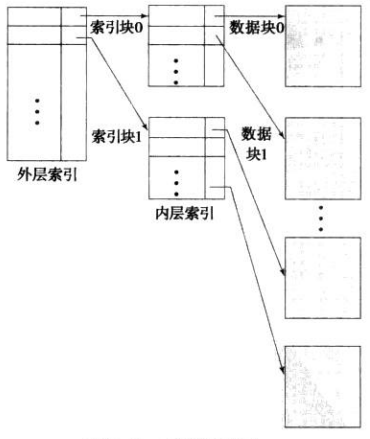

当索引过于庞大时，索引就被存放在磁盘上（按搜索码顺序以磁盘块的形式），我们可以针对这些存放索引的磁盘块构建索引。由于磁盘中的索引是按照搜索码的值顺序按块存储的。因此我们可以使用稀疏索引来索引每个磁盘块，这样就能够在主存中构建一个针对索引的索引，这样的索引叫做外层索引。这样索引的构建方式被称为**多级索引**。当然，如果二级索引方案中存放在主存中的外层索引依然占用空间过大的话可以按照上面的方法构建三级索引，四级索引等等。

### $B^{+}$树索引文件

如果使用线性数据结构存放索引项，则在查找时往往搜索路径往往很长，以最典型的二分查找为例，在一个长度为`N`的线性表中（前提是可以随机访问）查找某一个值，则其平均查找长度为：$ASL=log_{2}(N)$，然而$B^{+}$树的平均搜索路径长度为$ASL=\lceil log_{\lceil n/2 \rceil} N \rceil$

$B^{+}$树索引结构是在数据插入和删除情况下仍然能够保持其执行效率的几种最为广泛的索引结构之一。B+树索引采用平衡树的结构，其中树根到每个叶子的路经长度都相同。每个非叶子节点有$\lceil \frac{n}{2} \rceil \sim n$个子女，其中$n$是$B^{+}$树的最大度数，是一个常数。$B^{+}$树的所有值最后都要到叶子节点上，这也是其与传统的$B$树最大的不同。

$B^{+}$树索引是一种多级索引，其节点(无论是叶节点还是非叶节点)的结构如下图所示：

![](data:image\png;base64,iVBORw0KGgoAAAANSUhEUgAAAawAAAAyCAIAAACPsXh8AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAE4vSURBVHhe7d13tFbV1S7wOzJGkpEYE5MY4hhGhy1qiB1jA0FBARUVBKXYFSlKsWAXrBQVRJEiiA0bdrD3eq+mmZveezPFXpPc5Mv97f28Z7k5YK4n5Y/veuYfa8w915zPLGuuufcLmPyPv3fSu6O//e1vf60J8181/fnPf/7LX/7yf2rChLcbapn9d6O33nor2UnH2kqmLeVkqgg064z/Eqt/haD96U9/UkzgdYEr4vG1116zUkido9xJnfRvp84h+G7JCHAVXUhXNMPO1X3zzTerCbEi2UUts/9uJCkpZOSVXBBe4qlAHkMts3+BMvJgch2Ki9dff73pN/G0bDqpk/591LEhqBHTjvoyTYkwqKVR6+SxbBVq7rajyAu1pO+aWmaNkFobbWGEr1UqWlktctR8bKoVXu4uaioQubsawhfbQu0kNUwLMxIUSZPshspjOwbV+29TQW63FUnZbUlXRVFLIk2T8EUidzoem1YoEmsk1JqPYWqLFUJqN1WLDirfgITQPEZeqIapqPW8IgXtnXZXSZRZ8YXqcFoIoaKDbOUxFEn0iySUxxCFlK4QYYtb0bDJo3byJkWOmo8JplCEKApNYTJt2oZHeUSt54YEtXsMZtRCrY13rkwowia1NtpcxDxbhYrCv04dG4JCeeONN6zaUQSOs7RvS6Ot88KELwyhVdHDh4pCKI90ILsA+JbeSlQMMYVHCanq4tqR1WMxKZpNOYo8CuUxFAn9Ot3WT7amPHweEaa2qyjCpiTmkXssmHjCQjXS24arZKJTKCArb8WkdruCl9Z2rYBq05ZaqChHLbsRRhLyWFm2ycPQLPOLpJ1hMVmZig6qgmibpClUMQxjN/IIMSThKRQeVUCNR7vvRHaD2dRvUnTsJshQEVqLJJTHNDPY3B3kEYWpgmtzF++xioQO3hq1JtnNGp2oRRh5IfLoWIuJtXnLapW364+nKZgarEUVViOkPCJbNFsPbRSFYhjYeqeiIm8SE1T0rYXPVqhSbVMuFCH9uoQV4Vt7jbzaUYe/BOFyYw1uXCJMebTmsVBsUVEIICrCUB7hOxvtEsnKFMMqyxUnSJggZCuP7SjCyt+qKDqFKty2Pw5DgY1cGIVvUm23arKb4KPGHGZhgNdardii0ySSqmqrohqyPTGBE9tQkDEts7YjCIVPstHEJ6o8olqxPWyTas+tVglgEYZ/lxTXcRqmHULkKHw5nUiKMkmhSOpY2lO2UOt5pciDgE/R8oiaau0oW+jNN9/M+GMrPDwh2+gUHGuVT1v85XTKblEIv0qKbQgfau01cOy2SyQUfRTzdu7K1spE3lJqqK3cYIVaqg2PheKRTngUeSjyQjVYS8KKsk4I4Zu7glmZOjAEASVcPwbLY/yVNDChJk+TfhRQbDG2rGUXVJFEIZTHdtQEKVYJJvIiCWwo8kIt6T+kaILCFzSPAgjhC0U5VFu/7TGPORWPgWICoShkF5PHolBjV1Q7fEdqKa0URsHMYwjfMluRxIBaSjUxjwSzMlT4dpQw3mm3UBBQ67mmlqgW8psXYagdLD4x4yOMxJqYUYRReJdEuR0VR5gmn2qEWqo1Ra310EYJKVuY5BUEa5hoFlsMR5jKQYNqjBWIMCAIH/Mm1XYVUSiPDFeJHyIPeGEIi4uikFIUIkRRWCXFqqlZMCMJ1bpVhPgooGwRVgdQ+y270S8KIUVOnfHZjWE7+ueHIKZus+reZrfyXxO+qZBHa4i8iremKEdiRUUzjyW9JhHmj8+Be4wmijLb4rdWrygKrYc2KsIwXIfiPfLwkAuRE1KLvHiJYbasQWhS9MNYEySGMoYwhiTUik5hrHGKsaLKWVtDoGwVig7KI8zKX9sUDmUL4QMVnUhCAS8Upwhvt2mLT0FKmvgKos1RHstW0Or99o8IH8IzSfzp6aIQE5K33nrLVlMS/RKJ9f9J1Jij6Mc2mCGPdXla9ckWpmgWK8ImRSLC/GkyahdqrFDA46t0eAhC1Fi1o7hoUuW1jjBMk7KbrbjOY7GqAVpR1em23iUem5eOBCWLECGdmDcpykGuUd/OoimhEGo+wg/hCQtTb7YmjMdQhCjgokXkeUSBakcdHoJOUYhvvPFGHXmrfNmNexSJ7/8XXnjhj3/848svv/zqq69m1ayFiSbM119//aWXXnrxxRdfeeWV/GpIPkCs+JWJjuQFgA9OoIoQEwQBhy9U2dfEpCVqtFfJtGRnTaETT4jktddekyC5mPFqIi8SJCM6AQnhY5XxHavnn39e4oQSJ+cL2VWcmOALDqYEEM0QYYg8mvFV1MKTBzmYRR6KZnCyRVNUcsm5pIbZDeFJ4i6PkJMFJsIQNY+RJAxo+KA1EaKMMKF4iTlN5BFCQNQ87YTU0xYFWwH0aDdNlfiDg8CGohYhJh6t9FMr8ggxxV1BI8dQ43dlqBA+xCqG4VlhrGECRd6EzSO+iWkXkaQaTRchW019VIRVBdusUISFr4xrwlPjXSfrAV2qjJo8nUnZVphEkscgRBgKFKoc1C4kBYR+Uy1Ue67MY1IebVnzGLWSQnFaiDDksGrUFpEEtvXcoA4PQQmYa5dffvm8efMuueSS6dOnn3nmmZMnTz799NNPremMM87wiE477bTjjz9+3Lhxxx133AknnDBx4sRJkyZNmTIlCuecc84FF1xw0UUXzZw589xzzz3rrLPOPvtszNSpU6fVhDnvvPOorZJmzJjBNaJJralp69JLLz3//PMhzJ4925YIgduC75EcxUsQ7Ir85JNPloXwwp9yyiniFBjCeER2IYgZMYSMYU5BaqwmTJggU5qEdglDiYEacMysWbPEQPPYY48VsPXEE08ETg1RSxiEQlLJxEaOR/jIE5Vd1PI0ZYqAU0lFkCB3YhZts86qkbzgcBScxGY3lYFAIYc4fvz4k046iUlVu7ajCYKAIxGzkJgTptoUkK3qqKZPJ6FMTZB4cmtixgckcnwQEASrbnGaGkZS8JlQkLUaJgbxWxO5LYngtVwKC/PCCy9UdggIVNAcH+S0EysIfFHGpLxqwpwLjFKog362laoKhpfwcAKFMJDjqHZYObKCVXBhJHjm3NGfP3/+1VdffcUVV8ydO1f3Wl0uhJkzZw40Xqy23LtcvUQOk0LtoSLIhCk1F6IKVWdW93xh6PDLJFD0yWmSK5SwCUnU2eU9+uijx4wZo5IkTC6uSWyLFi1avHjxwoULFyxYYM1YkMtll11mFa14eEnwAOWrVirgTPEip8kK0feIWAEXFUd0EEMhYaz4FFzAGCt5suAampCgWW+44YbvfOc7+VzLzM2UbI2zBnXsL0ZAeDP85Cc/OeCAA/bff//DDz986NChe9bUt2/fPn367Lbbbv369dtjjz369++/zz774Hv27LlrTT169OjduzfhfvvtF31qgwYNgjBs2LAhQ4bYGjhwoN3Bgwdb8XvvvfdeqyLm8Pfdd1+2hxxyyGGHHXbwwQfjhRQrCDvuuGO3bt3ECdwjCn/ggQdSZiJ4dOSRR1ptCUbwViTaXXbZxSNfiQcseZICwhzx6BHtXtOAmugIQDqsZCfIEJ4k4Ez4Zb7NNttsscUWrJIXteHDh0M+9NBDA26LlRjwGEK89aCDDpKISKRMUhyJE8+7LZXhBRTJiBEjjjjiCI+JHC9rCtxRTtFCMVei0aNHH3XUUfx27dp17bXXVkwF4To4YGHyQgIEGljBsAWbAGwlpOIdQfZoJRk5cqQ1OADxQDBWW0Vf4gDJhYSowZQ1Q+GpGyEdldxpp50IXVeulQ4vHZqJ0E3OywaZZSY7CduEwSk1homEX05zBAmPGqKGBMYwL3gruUfvP7Bjx4495phjjGazw2ujfj2djPFIU18JkhUFJ2iqsqLgbhsibrKhIzwD19jNDXfh6YwaNYoJzbyxIAieL1sGPaG5nC2OhEFfFsKWuPDURFSUVUAYDGOb1wMESVFjUhwRciFTNenVq9cOO+ygFBmFwhYAHTM975u8qIxI3snB2rJKnMe8OfAM4astWBIKTAxK6TOvXuz1m54LiUTfGvAMPtHKlC0dTGqlaLZMW+XKy4xEOg888IAPT59u+dZG/+qXIDJNjdUf/vCHeksCDz744LJly5YuXXrnnXfeddddGOvy5csx119//XXXXYe56aabwlu9NIz5p556ipo5TfPWW29li2ga5NG/7bbbbr75Zsy999772GOP0fFmsLVkyRLr448/fuONN/KLJEly9913P/300+RPPPHEI488cscdd2gm99mkoAkcIGU4/D700EN06AuD/j333HP77bdT8B7m5corr/QoMCBey8K4paZEJWa+OHr00UcxTHgHa5cjPNv77rvPrrAffvhhK55TCkBE6wXlqKy2eBGhd4PTBaJEQuKFiVcZJk5FDlkkdDzef//9X/3qV/9XTckajhVREKEqiY0VZYDUrHbDP/nkk7L+nzURqkaOjDIXasVQLkr05S9/WZCOzCjceOONXY9rr72WMoRUjxcZebTShwZf1ski1daUYL2ftQorJkp0zTXXkFx11VV8kSg1Rl4JEiAC5Wg0AH1klyZA+B7FaSVJhek78e7du7vJ6uwIADpKeeWTSjAMgXzxi1/85je/yQuGFVv6dpMIeuaZZ6xKRJKCcGoVm2BUXhZ0EB0lIrECJPnWt771v2vCPPvss1H+0pe+9P3vf9+VsX7jG99QRlf3a1/7Gn2OvvKVr3z729/+0Y9+9Otf//p3v/vdr371qx//+MeUf/CDHxD+8pe//MUvfvGzn/2MC7Dkvj/Q17/+deFx6kvne9/7Hk1WcL773e+ScMQcb8sj4k78giERA00KCRgac8iqjZSdL1tMxI/ET2ISeSVoUbZ8yU4BEbX4ReRCTcoU4ihhpAIU8FJmZeWLXIKylj7mpz/9aXJBArOKM+YeKSBCUNRIuGNiDSlXiI7UzHptYGTlG9D4sxpfrVnWoI79HM5YFYR3oz72u1j0HkWJtJeYnJaqiennP/85XkGl8Zvf/Ebc6TyaeAWSBt7Kioluo6B8iqj6tuTMhWoSIgqg1AWyLS54V01beGmTv/TSS3/4wx/cDe9AVYDz+9///oUXXrA6D5hqxOrNN9/0u171GQoG2YUDH7KQbFmfe+45ATCHzC/z559/3iN9anByBnbVXbelRSSrodlSgMMjBWoYCukSciBem74cjTx88kXK6ILJmhWhFSBbCLYg0AEuI7yA1V/KItFVcMSZdBiqRsKLCTUrnlBer7zyym9/+9vUnyPpOy+wHl977TWf/NTMDu/YLbfc0tWlQE1SbF9++WVoSEEgwJQyE6tdtzSX1tx58cUXPeJVRlTCk5pQnZekpEYuYAVhy7sVLCuYCDjKcQhM/BDIxYbI8VYD2se4T4bcTOeuVqLVb+YFXxx5tCZILsTJXc5IoaT86quv2qKDxOykxBYFygJw9AzV7U/1fyyE8idlfnMhHQUHiF0rHj7D3BpEx+eYl30UmAuGMDfT/aKDrz9ZKsqNQ3Bo2oo7mCpGSIdJ8KMQcysXGCHRR+qGEnMizCOdmCsOgixH+aoDwpM4Yp91vt00ABOYyBYEOjFBtgRsCzjMdn9K6BElJLuUBWzXVvQxikAhVApiiwIoj9a60lXFbKFoWkmsAeFIf/oC9RqLIapA/y1DMJ40tN+PzlIJtIiOwbiQ+l7TaLhUU+1cUY8aWs626NB0JM5PK6u1weHC24Lp2wSCi4FHNCG7wJoPwxFl5+cx80gfUMazAoWhhgGu9f0U8nPDqx6OSGwxd4ty7euWeI5fK33gVnEKmz4djDrSt4WnBoRHF5iQF+3oFL2NRSIMBN/dy4X3yBA+E3fVI8blzL0tQj8cVNKk0EOJQZzM4bjbisY1TTzbDGiayQi4ey7mBEnCkDmJpkmh+LLl3spFtGLG03coOSaY1MqFRBSAOOXcE0n5ZOvdu/e0adOEbasq3HPPueF6ESC/SYpE8wlPANSEauQ5XHIxsM1USvqOjI5EELRYSV9NhMc2cgeB4IOSHTkoNaEvVMiUnTsdX5d+Zs6ZM8dL0aG4rtwlU30lTXHKFJRk2Yo8lWQbJrfLFjWRMPeuyhsoc0RBVKm+y62/E7AKm0numDuZ+4ynE0AmhLboOAVfgr5Mc3tJMBRyMwsIxiM+j1bRgkoz5Hyl46RiwpeV3/qaVhTvbCHjMeKnD6GqeH0H8ckiLtSWF8qGFBcUEpiYHYoh6Pe+LxXJEtIXAx0mSEnxCQAgBbsI0474ijwIXCRIK0OurXAKFDWECS+8Us9Q2S08Q4BC8r7x6xNUBdFG1KoCrUgdHoJQNLHfce5GfcpV32hHQvdft+k89dXrmkn5nFYq7lFLeXSvdB41A8Wt0K/6O19/Vnc7o9MWE18iBhm549esvGt6mswRLw7PgLACSZfoWh8ao2ryM42cJjk0ByZgfD6ORELokY5Vc1hlQegGum/wc28lwgSO22hLlxBiBOa2gHJtKFAGZUvDqUm6RFRCgsxWlUBJnwvMhAkTDj74YHKuZUfHlrJQQ3hbNB0kj3SYqA+0TIHMXFtMFJaals2ssatdhBEcu4hmzgsPTYRw6IgzQqHKGjlr5hKUlE7acccdp0+fzjt8OoRCtQtEMMkFuM4jgaNQYPlVGci2nJogVYmOFBwZL3ZRKukRZmDpVPeg/gTQ98IDCI13amoiQWpsy2+3Sy+9dMCAAX4Ci0R4JFbBAORaMNCsrKAhITkayipAUyfkFe7rzwx1iCjFF4wY1MoVkkvuG1u8YnKBz+2yljtitZssuLPa4stxX3TRRRQQCXmudO5XcMKQx8pW1FQPgnhq678KSUbCIKQmSCu/GGSgCCDKHvEQ7DqdWGWLI7tWpVBk8hI/p1JTQHXwth4+fLibyIqXQLFqEjnCMCyjKhIu4lHMMNlKipAELzaaJFqLPp5tCpII8RiwTFBcBzlM0cREmbsxY8Y0hyChXQyFdtSxIQgI6RVnaQg6Xc6ErreckPugL7WUKqupBiLJrg4mtLJFKqvn7r777gw+5KeuxlVu7ehiOw93Q72YGIhODhRM3u+77z6dxx2ioILkIkl/U7ML1i/NSZMm+ST0+ZmrZUvrgzIXrKrpSCgLDFEgtPIrKZrum5D8vHIxXKR86or5oYceqi/vLwBSJpQpnNx5RJgxIXfI4QWJMGCB02E+duzYwYMHi5YQQeBOeAk4N5+mwDAeAWruAJIYK26sIJE3h9JR5iWGAAWDoY9Rdry206DqlgqrYfyKkxeJR1+feYyOTtp8883POeccIBRcOXJjiKHdKuH6A42+la0gwSpIPqYEGReEphgE88WZRhlhIABUScokXNAUZK6cYxU8X4LkOjW0pYwpqYZZsGDBPvvs43uQI11EgRc4whCYogGxpapAVJ6VignPZ7g3JfIyVkbFd5pM2NIRs4B1naSsEHIDrfpHAFoo18xjddXqLZpWHvl1nyVCRyKYo4466rLLLqMQfWoIk/tVA7RudbYwQIQtKWmqQ3KnJjARZihY4wKPiYSCMtIkyUjiRcyEHhOArTBpYLdJRhR4VFs11FT6c+TIkQMHDnz88cfpUIgJd0mkPFpJ4i7BJy9EHtJ+KuxOpdTqDFOO0WGYRMrACTIXmZX4UEEOUYsmOQagIXjjjTdGaI0thkI76tgQDJaJ4Eecnx46UiaK5bwV1ypDKVFQO21tV0+TWPUcebrWL4KhQ4d27drVT5gtt9xy++2379Wrl7fNPffc421jyjAE7rwdpEZk4tp47VtvuOEGzep3lgHn0TkZT2Dx7pKy8mVLtx1++OFmq9ZB+brUSW6aA6CTK+SiaiyGdkOO3CSCv3jx4v79+2+zzTZu18yZM0mmTp36+c9/ftiwYUDcJWiCpI8Bkqz5IqEAU+Rc0NFhKREr1ZCXK43GjRvHxW233UbH8fspJ3E/3xyhW8dK4siuNCHz4n4qrArkD1sN5cMOO0wNN9544759+37hC1/o2bNn/vxOH9PnLr4gCAmUEolTjlYKKgAZT57hhcnFg89ceIpw4YUXMnc9SOTLKrCEYciBOAuMCBUhf76RE/GogAARoVVlbAkgIAzpm+mCESqCBoctHekghkrEVhapIUOakM8991y39OKLL9Yk7irbJKKe4sFTE7ZismKOf+yxxxzrHnvs8bnPfa5Hjx4777yzbuzXr991112nODQdlouXgeLmq4kTrK98NV9MtOh4dDVCUXZNMPkaQphMBCZee74eXKJc9ULlihUeCPKoE0zq4447zk9pCUpcVHKcO3euFChQI+Gotq4IvmgTSXxZPYo/rUgS8Oggg5XQIwVHr+xWruWopOPHj3flczF1YNJBnOZ1xdAjHMlyHY8oBVEuw44LjPrrKHeqe/fumt/nlHvq7nshFdiUIoFFAgSsx1IcwvChqBWevt/vS5cujdAqGGtBaFLHhmBC0U8unreu5JXAAdjSJXnlKpxRIiUdnBZXVrxOdXUdg9b0NeczbfXVV9d8J510kh/XG2644WabbZYmdg2cATVjRdEdhrsBU+969BoHy5dbxBd8baHEhCQMqWmOI488UtNwlFun6cWQOeVzw9GC0sFsxewsMczRgw8+ePPNN4tfgkOGDFlttdXMUw03bdq0Pn36bLHFFmeffbZE8mGoAuJkKyp+uYAvVC744sUjZbGZL26sUtBUwFz7o48+Wh94X6VKTBKnYkK2ykum8GH6jf/www+b4MbfsmXLKJsIt956q9+AXbp0+fSnP62SkydPFqTCeg1S4FRUYkjpPIpWicwFwRtMCCxeqLwoNY+C0Sv6VTCs1MGYmD17NkMFVyJyQ1AiCshE5ExgyhqU1JSUU0PN5PKI+JUCIY9OhKEEGXIHgTlYidvymCtqt0lABMApTToYHjEi5HTRokWG4MKFC3lUIvhM6CNqTBwBBAxfqmGsqKGPXENQE+afvHTr1m3NNdc89NBDvUTpiDlDHxkcCpKy5Cj5hUZNS+emIQq5/AjvvqAIJcVQT/po9QjQnY8VglBAUGYHQ0IlWrJkicZba621NKEjcO7Od9999/VBoNRSq2Zt/TchVoZWaplNRk8uJqjMJrxRRTmOas//RcfxKRpDW4iyMkrQoUyZMsW00n7UYCY75hhQQQNiC18wCSkgI0IYRciLK7/uuutqV68c72zfFqNGjVJnCmCt6iz+lMgjBk6cWsXGV5SbRBIhfaUGHhNC5tY8tqMODEEEArrmMLzdPcnoRffH6Qrao7ZArp8WkbY0JEaSFzt5bovrccYZZ3z4wx/2VWXqmVki/vjHP37MMcd4CZsOZlA+i3SbRmfi4jkD52REenSQoGw5Id5F5eDVmpDE7NMlxx57LGR+4ThaytCQ226+uB4OGJ+aZks/uaUCEKrJu99++3lfXXHFFQbBLrvs4jvr2muvZSLm+IUAR+LaJeaKI9+kKUgVwPOe1hFkxjd9d9V9MwSXL18Oh0dQzOEAtzK0snVh1Jk7+HzBpGlS33TTTS7z8ccf/4lPfMLXtMi9aTTTGmusockE6WiAxASOE4FPolDCgMlpJmCuCndmoiGrXZRUnHTM2a233tr1M6TEIHKVVAQgdDQ9W3KzQNiqbYuhSECpJOVMInLkleDRxU5ISqT4cHjModDRS2rFkPdUOLHhGRLmKDGUNYay3HLLLT4uTGoeCWVEiJesR1mTiEr/ZOiDkqYamoC777777bffbkabNb6pSTzmW5uh6vHl4DBaBR+hkAiB48Uv4GSBZIQwJM6dFU08zREjRnjT2zVeCaPfpFy08GxZUbv33nt79+6966676knkrez1qbczl+MCphPhQlVVSWBW5uTKRYinpuC5mB7jwuoQFdMhApRXnNYhVOTEXSXfPc43jlhRyFgpRAKBL/i2krWQgNMnwZAAV3zvHh3rnhJ6oTqCwYMHq20yoiMRUAkjtSXHKA4erETiBaVoKJEgHvNHdikOTZStlmqDOjwERSkHI8aUVTjNLfT0tGKptUfNZ5YZfHm3u8PajqZs2VLwMX/ggQd6FZx33nmaz4vXTNxoo43OPPNMPU3HCs1BIr1o8GUsamJtrdaqkIrnMut4V0XhNDpGo0+cONF0cIGhiQQFVqgMFRdjOBoc4tGRdpnjMUaDFNwrR+UdJVm/NPfee2+/uQTgngs4iTMXHhMIYLmWcoZFOk9DCImCGSEjJvJlBQTUyJEjNff8+fM1NLnUKCO8xMOzct7cAZGF2FxCjuA/8sgjl19+udKZet4fjz76KLlfFh/5yEe8VOC7+TzyJTXm4oGjXBwh1ZCjse5eKUXazmhWUgedIWV1A7fddlvfL5ISVaonLwgerSmXmB2Q1DgF5cjy5xVREwbDXFQtREhCzSM0ZFdszGVHzRaJ5sEIg9B5IQcNLTNRXwmDdwNLuw8YMGDWrFk8MhEDKD2DAYtSCltyxMCxax75CeKTyksOwumnn+6b1+8+ryUN7GSp0Wfr+NTW9XMWiSdpusMOyK5gDHF3TOlcPGpWjxTkSIEtzeHDh1966aVSII+yy+lmhUcYlNTCI6/hDTbYYNCgQV5FVndHbbngkTkGmhzBOq/g8K5cHlXbiauYqkauV8lZlblAzqO8rJnOGUYUaCqCi6mv1I2QvtiAU8uIwTAkF0DMMy5q7Gro0JE+tKx+bPno9tIyFkC5rXvuuaexrqR6MsoIA585E8EHCmEChRJA5IUokJvabgfNUKxWVkYdG4KARKMDxo8ff/fdd8tcsVSTXPLkbqnu138+QzSZNtLutjCuqMtGwcW+55573Ku11157+vTpcM466yyvXxI/Z3za+Mi/+uqrDUogbpf7qRHdYbDAFZpER5KkF0koOGnIaXSfIbptwoQJGHJTiZpdmmLWkXoCiKHs3orNZRMnQ/iUbdH3neW74DOf+YwD81PLJXHZAOaec8TEbRGke8iKRCPqGEPHI78c6SFBMpR4gtRqrrce8jl8yCGHGK8PPfQQEA2hA6jRAeXmuDOgUFKDpum5gBNYVnb32muvD37wg34PXnbZZarne8HvppkzZxqCgvH5rMm4Ey2TFAGIMMAacH4V0lFnSfEoDHXg3S41Hh2Qo5k3b14KztCJ590jTcNCdmw9CgZPKEFB8qi8ipPgoWG40EJOwa7wEFvhgSVRfydbpqSDSO5GGx4C5LwM8HpaHezyO3fuXHUwXwBy7YxkBMoRq6qU+bWKnxA5x9tuu+3EE09cffXVfe/7JHRhXEUv5qlTp7LiIhM8+txBkLVxI2BbQoUmAKkJko66yQvlEiLjQF50cgkZeq1edNFFJB5dyOa88BiKISYDFDnN9ddfP/+tka5+4IEHCI0Aahi2MefFoyCdGpD0uVUMKoyXBQVbcskhcuHRidDRJ0okNnL68AHaNad8rHjL6g278cvELsYj71IQgNOh3y6j5iPv/Lo1OmrIkCFOwdXzBvJ7y2s7l50LmqlYCJ+R3YTyyDXCR60QiTCaQzA6VhSQJnX4L0aQPhs7dqxxroL6VTkIha7EuQkup+7XIqqmjZy97wv3jVBnG46G4FZbbeUjSxeap35p4seNG+eDyNfNJZdcYugouiut41VWCbSy2mlNEr7KpULw41TvOl0SIH6wm4PaxSV0tBDo61TKLkm5pRrXMbi3moCtKy08ZMu98jPzfe9734c+9CEFFb8uMbnow3GFfGz6lPNOzseI1OLdiniEqQgZqQCFwdArgVPM0qVLfV327NnTuwGyWQyEazGQMDTFvAnIKbNliGTBkYA5Ug2n0KtXL59+p556quux0047bbLJJsOGDVNwvw39xPDh4Ee3aHP/M1kSjArkU0vHZypREKo7oFmj4AJIXI+asAzpS03x4Qggc1Dx2eIdDSvmrFwPOh4dChds7WKYU6DvEJWI3wByDVwF6Ohsu/noVlvIhJLlCyC/zz77LLnwtCJDCr6m/aQyLFIZ6WsYCrpCAcMjMYgKw5F2coIf/ehHDabTTjvNEUtz1KhRSso1EDFrYDHAF7A4S4MB4RqyFvUK9/PZRZCFukncDZRC1nSaO4IXqs/V/O2wK2Mlb14uKzXVU6J8iyGAPlG1olfdNttsc8EFFzijnBQXNGMYZeZKqlxIPKahw0Vy0bqqZHZrIY0kKdGKIbYyUiVyh5KDy41AcPzacKHki8/444gVW/oBIUeYkN1UII8xkQt9L9T11ltP54P1Q9tLyAT0KWBX8FxQZgstJupD4rFZKxJUwigSDCIXcHMIxnaV1OEhCFGf+b195513OmDFyhVyGIqLVNmV1qYOCW9VU+PPfSZ0eOa9O+kLy3eWYerXx0EHHXTKKafcV5OibL311h/+8Ie5MMu80p2WNtJ5poObwKOOJHFmelS/Io7A2tWmvPi08ZNBZUWi7wUsSCZOVDygTITcWJK0e8arRjGgffu4kCeccIIbovm6dOmy3XbbeYHreFkgv7KdnI+INddc88Ybb/Rd4LLB5Ih3/ceXIMEKzH1DgoQvF7VK8Ao4YsQIX4JGv0srUwri92juCICJuglMWwB36ygoprILW2pyAbLOOuv4TPBrxbAzEC+88EJOWeE33njj3XbbTal9RKg5v6BSB+cFhxfTBKYiIMcneLsaDi9aapLdeeedva6VS4LREU/ylZqYRULOEKY4aaa8jhsjHvli1IQXCvRtKYV7yEShQOU9itx/CkJFKgA/Fcv3oDeEVwUGlDSduxj8Wjdf/LyNIdfCE78OsUvHI+8kthAvukuP+fRzW7SfgXj++ec7YuG5/zQxQsILIIPemuqJVv29eBTZDxq/FumbIMpFP6NQFlYSJhjXkqFWX7JkiUvkkud6h3K5MNQ4VWFoeJrMNfOnPvUpfegox4wZoxSpMxDKdJyXVT1RHhF8kcARv99Yhs7mm29uxBOKlqZz9x2TCWXyelQWAcuUnLmVRNZ+q+pVKQtGeeUoAONMzAwRBPJAZUrYVQEIeERHqDIinDJlSteuXX39ePeo4axZs3wSMk+1uaAPBAJ90SoLiYzqUlW1QhTiyJrHyk3bI8Mjjzxy8eLFRRjbVVKHhyB0Z+Ajyy8IVdOLCip6tcPoS1PARNCd+k+/pqW0steIEeM+EMp8jTXW0HaaKd8+xtYtt9xioMyZM8ePROftSns5UODORTURIGgOjPdbLoYyqbIyqayT0+h8aTU1zX8xwm/CcDeEhITnSngUMMpdZcuL8wbrbphBPiF9GggSyL777rvaaqv5XM2P9AzcGTNmbL/99j4SCVmRiM3F5g4afJHrHrBcKItVeDRtcaRuLudRRx3Vv39/M1cRdBhlONL0mC43pKDpY2i2xC9adeaLmvp4qboYvXv3dnsla5iqDx1pajI/4R999FFeTEOtlmHHi2kCX62EwUpgrKw8JniFBeIR+XLJ3wgpO33B804NFJNYwWTlXrk5YKFRk7Kj4UvwXm9On1NvI+ZMDH1WgVJzpy87B02oneQIR9+rAEeukLIrvioBdHCZOEKyy0p4/fr18/ErDA1ArgKgdIK6QZO7LT0jMDHz5fPNp5/fZTfddJOTkpqwtS4rNfGd6HWIV+frr7+ea4yYna+YpcbEe+Wkk07yI8YbSLkUzU2WoKwFrxms8WjLVbTrI928donMrwwglMsVxhUjRyqpDhpbIj169PDLiRdfghtuuKGZKynRUpC77MSjIISqJHeOFCHxiEHXydEH7yc/+Um5pKMErKoJTMDOSH1URsCOiUQiCLha+cVmDsIHjiiop/o7IPgY0fIoL1lkHkGGn5bwiIFGyJEfwoq2aNEiR0lIgSGSjhh0srAx5rX0UxkIKlbPoYoiLLSyhLKPev2PFw+K4Sqpw38xIm1F8Qq94YYb9J9aOGwFTTd7dDb5Exntq5m0kXPCsCK0JfPMF2VVEcemUzWfLdOQpm+Zz372swY5iVZDDCGrFxd4/YpxTiqLEYYDoIAcj4ZwVUToBzU0QoNA74rTLsIwUWV1xwg+5kovWnPEdTXaTD0Nd9xxx+XPmz72sY/5qvIaFyR9YRC+//3vJ+FFjhpLPNC0kQjdGe1LzhGPrr3K+HATG1/USIwnXsxcfgUJR7LqJgUNZEqaxUC4y+BDDDMjRKtuLqGvUd8X+asVfQMWvgCMfgU0KH0R59+4aHHIFIBo3KAlciu5sxAqHC4yXPB+f/mC8MtC6cQmO4YZhXQ8gpWsaDkNjmoT5picu0h84O+5556mhhK5k35CDhw48NJLL4UvQS/FPn36TJs2TfxcyD0HRFlNoAUEr4YqL0j4fFHzyLUPVafja12C0pedQ+TIqzrnlWRzY2N1xRVXbLrppt26dbvjjjvEnMMSMBckXn6TJk3yFax6fgf4SDTHIbOtZsMLL+DlrjcyBJ2IsFVSU7kjmUTuvC61krjGdvfZZ5+pU6d6dDnJKed+1je39Qf/hPlOpA/TyZrU+sTL0in4Kt9iiy1MECnAMd18WCmszwi/ms855xyVUTeZmiDidGpiljU1r22FUg1p0knMHNFUH+mIucxfuyinDNk7lUcKMhIhRo4MBclEFlZoycJKp6SPT3Eg63MpbLbZZt5bIik6yPmK37BWdh2C0VeQS5VWSXXlWqVDcS0Y48Xd9MhW8Wutt9Wa1OEhKGId4xcEB0rpMqiUiii3JsNrDhReP7kJ+a2HIZGVL3OH6qXkWy8332oaKjdDHX/eeefpzpEjRzpXEh3Pi9uCyaV19typYI5EfSm4M1ZC18AFMF/81vaJ4VK5DA5SN0DjhYIWoZyT9oingMQpZp8ALq0Y1ltvPe9AR+K72i9K31yiuvLKK+UiYO9no9wHRX4Lg9JGggSIOPUoPJIMCAqQTS4h8QjBObn8dpVUzFITWEjHkBiaQhJnei4Nzdas5MJd3X///f1mHzdunBsC0NBMGJkUipn/lMJN5pdcBUSSA4KDV1g8RmVUDy8djuATcmQ2KYX5ImxbFCBnXuDF5iykjwdlinEqdxIeacrCKZgpfo7pe4noB29pN8HbDr7TF79bMXr0aB9cYhBYhiNM5nhZB1a3OGgVgy8dcSodOWTvpPz1PQl5JqaCQ5AIKEKzQH0Ez6nXm/PdYYcddDKJOQsnQ9B0Nvf9vnb6Attggw30JDWfq979VqeTQeOuUuBXhO4eoYLYlQJSGUFKWYuaa/rWD5Tp06e78C6kRybIzfLocuWWZou+ESOqmTNnbrTRRiaCmL0sjeP111/fG0XKYH0V+qXsNzLGONaT3rL8Oj4pIyDJWpE32WST/CmWOAXJtUi0qETkrs6qylARHJz49QlDq/dBbqtC6ROxSZNhPuKsmYOQAZo4ySKfbxQwupcXtn5YGOI+bA10RZOCXUTfffera91119VyroZPEJcrIywK1QxaiWyV0uUxQ9zUvu6668iDEGaVIB37OSwlSSqETw+fmuqlQJpS1ZRPa/odp1ndFkK7LrBT1IX5mabj8ZpPFQyUQYMGeaGlWVVc3dOIPj18Cbo2rJRVPirohudsdJXCKSjX5KKi4Pz4FYPYePHyZK4KLhVhboVTZ+IY4DDECJLcSZA4bCtzF8av8qFDh/oJKc4zzjhD3/ieOuWUU7p27eqjQLfJ9Mknn/T7a6211vIdJ35QwPWo6SMXfQ9WkGKDKTaR60hDCpQ2zUAxqXUzhQBKP8MdgvDAkotHH8taeEhVEXCR65Utt9zSTfabev78+TBBicGuMmJ8IOhdpfBhq4DiQcIoUNQ4JeROTfKVpJiqQR8aTDfc7ZozZ47UHKhI6OAFJk5nAUrNM5v0sbAZMs93pfMlNzuWLl0qJGfhLilpvtEEANOo8qGqZT0CdFJIHZCGyTQEqMIcESqdID2mZxyxI/Ml6Lu4/HmF5gk+PrZyFDzlTF7vM/PLu00ZFV9s4kwBfS4p7H777edDz7A2vk1AFXYzdb6Xa07Z4coLiBkB3yBQydxqW44yZKLl7riEpj9M46NMwNxPTCS5qJQRKOnkTzNMh2XLlqmD4P3E8U0nfrtOtkuXLn5auUpeA3pehRXHy48jzemwFFPicLSKQvHuoPmCj7GlE5RFJdNmUuNIDyO2HjW/RnKteKejIW3JUfDITHAoIpes8WoGUSgZ2cXQp+M4Jk+e7Ee9d4+PPsdHGYJkaXJ0wAEH2NIbdt0vF0c1DB/gqUwIIBchfLYypuA4CO4mTJgAh9wuFzXAv2MI8mfVJWL1IsrNVzV3BillLoBjUHo54/Ur0mTujDPDexXMmjVLLRySi0Gia102sPRV2e8Fp+7nsPsjGXm68PrYIeljp2KlzLXc0nmsgHAhBmq6WbdpVuPGmZEIEgNfzM6JoWJlMNkqCsKWgl9eshOG97/vPmE4DMPL1xCh6a/J3Ezzy5eg5pNdponvXNdDwPoszSRaLjgFrkSQ9aVPJF5cfjdKczPJpAALRAyU04geCT1KFpF4lAUdmG6gGl5yySUzZsyAQJkCNd3JxEeZ2zJkyBAx+yknNlZ2ZZ0ywhEGiUbMPRGDg7DLu4xUVeJ+RvkskjVNCKrn8vDuCLhzyuKHAxbBzCgJFASBSdzxZXYDEacrB4Hc5G1mZ0skroQ2c0B2IbAlVM8Ukxeu0wAwRYj3te6dqg78kqitvtIPbPmSjhbiiHmIiYzcNB99ikMT6VursOfNm7f11lv7kQ4WYxqap2aQcXn22WebhoLPgPMTwQcLHKEKz7kLW/AZDQrr4rk71kwEX4I6ylbGkO6VrC2G4XNdIVg9StbXkPeQU/Dhr2IOV4JiuPjii/0WFtWaa67pQi1fvtwnvxZlosFOOOEEY8uHqreI83Kmftz4pOXdCToITsUgBSeothjn6CrpXn6lQ46XlGT93j/44IPdJiUiEYMtdxMUZRRG8AgDn1Nq5FzjkWrgXZbra/JBwKmsmSiRCsjOBFR2x3rIIYf4+QIqpVAralbkMbAOlAlDOvWIqoia8grSl6/i2ArFyyqpY0MwWLpk2LBhxkQ+rxQOo7FUXw9hdKdiSVsptTVeD9lVRM3ndmlN9wSDdK3qY7S7xLTvxIkTfSe6veaOJBU0o42aqomBU5oZMVwLgLzu7SoG+tC89/y88kMMrMEhJCUTHoZVOpK+XAjFAM1tEaoO45SOFnH8hl1ulG8H8Ts5w0Xw+qxbt24f+MAHTjvtNMLMaL6Eqj8kni8Oq1A50lJCBaUJjEK5ANFYvXv3Fq0vaOaCz8o1q2SdIYhIILASla4VubkPWe7eLgorBSuPArCrmXwv7Ljjjg5LS7kzhMxVQMW0UYaIVdM4Vj0tDInYzcGpg2q4V74E/XiBLDZqKMUUCYYmnjJwLiAwp0mS4xakQ/FIWeSUDU2uSdLZWoWC7AQjTemTyMK1IefFoXsUMxPmbJ2UeLiGz6lvSV9D3gfKxakYrHylzgIAnp6BkNWWc2dOjQIvAJVUEUy6Pn36+DL1/lhnnXWGDx+uATgFIjb6wk6J/KyhkL/ig+ks3FsZuS+5ukjwuT62zFPfbsyVQjrQkHri84URTbZ0rMgl1zzytVLOXMgVEPPpp5/u94oGMFa23XZbY1qc5D6EXR8TUFSQlUUPCNWv6TSA+JHw4Ku2GnpNqoAtrhErJDb6fg8pAi/AKYvB0QjG6eANsmRnjaHYTEBy4GpC2S45dzKSY9SsRULT7wMp+DHhOLSuVzgcu9Qg0AwCZYyKIXWwxS8qpeNLt/hs9/7IFgJCYZXUsSEYB7pKQbWIAnGmytrCCclWe6mL/nN5MmucB6HGUkofBe6GdpEkhlVa3AHrp3StF5qPOD88fSK5eDo1zYeYwJQ5KPV1WmrEqbNUQVCBFZ5ZYwIefvjhXpUaHThztkKllmaFQFlI+oO++HUAX8KAXJrMENRJQJxNGWHeMAsXLvTi9VPIC0dbs+JdNYKsAzilz5wXTgXABTX3X4MClLVJvfvuu2MI6ec2opRUMGJzLfGCEZWCKyaolBoyW2QKszId4JMzvOuuu3Rt9+7d/ZTTWH7c+TSAo3QUoFmdEXxZq56T5dRVdxl4ET8v2gu4t53fL44brEcIucDikRc+2alYCojXJKlDDgVxxxAsubD5BUWePnaChIh3K+WUQmAYQr0HjS/4zheso8FoD6XTUX74my+GoDJKxK4tA05IlEmgCQAlfTipBn08EMo01dCp+ezyCvHrzxdWjx49fAc5fTGLX2rqo7HZ+jQzBAcMGGAIekEaCrIzI4Ra37tqLuT24l1C5OL4FiOUssTFKTYVg0zoFFA0wwfBSh9yxha5VRjMNbnp79x9k/qMErBySTb1BOsN56R80qqPH1iUvc6lKX27oDKMWOkir231iUdyt94BidAXpR9/DHMo0gFLU8WERBMOIUP6AssNAgsHhaEm7Cq3+pFyMSTHG4KTJk0CyAt311xzjQRpUohaVkRZAEErQoQPUTABZI0vW5ljK1PH/mIEFsfaV+n9mlAF56fPHH/yUQKdqjtVU4kpy0dRdBhlpU+GhoUzyFWkn46H49g0k9/IM2fO9Dvl/vvv16MKmoM0RJhTcyo86kK2amTXwUToVIBoax//XgW+BLlWyviKU1bcAYSg+90WPcScldQQPtcDmUGmnguQ37w+AM1NI8ZLxnRAJqAbYlDCBy5CNXEZxOly6i1Zc8cp4iJOvRU49YN9jz32oAO/jHs4UsgVNZXcSThVR9d/HipHLjgSW6YYBR/ahMpOrrb0hS1Ck2vJkiW+EfKjT1QZ7qpExyetWSy8wDIXs2CoqYDjc5mFIUc/hzMEkTAy5nhkaGXLqQaQJn3HbddKyJE603dANOlkrnEEijlHASRMVBiubUmfsi2V0XjuTPBRDgiIGioCJpd8zpw5dtmykgiSHU2PmkfiDLMrKl4wnGoPJ+J1FU2PzlrlVdixGi7lDzrzEaQsGluVdIK5YFfTwtGHmQLCzv30iPDiZ+WCeGUChEOuPjwqi0hYUSCET9/KnBVG0awU4ONryIocpSxuvvlmJ6tnVMkZOVDVACtTiTgF+OomSH5nz569aNGifO8rSALjiGsIcnQWmMSPuOOFa9+PxreLYDcdKIUcMQmeJijVg5BDVGdCMcdFAEPN7DKkpIMRtrmB8ehDwXllhpCgzB8MiZC4DkgoOiGPdEaOHOkbKI9RyBBbmf6ZIajzzOkFCxYot7OXtoAUQmSCViMlyAGopsQkw8RwyZGnZM7AI95p0VdKRwUqq/ZloqY5En7xGPi6kwvgrKAphHNiBT+XnFApvQcmTJjgAx6aIHmBQAGRUIaQm4Z3IaODCPGuROaUW2TEOBKzRpf4iSE2F48LOTLPkRPaTdbKIh4kTm2KEZV8UxbVsBpekL33Bg0axBeCUA+ZKhLK4hQMIXwREtoiUTHVxgAxlAmt4uTX4KPGqah4lIhrbFc8LjDv5GAZeoSpkra4oMYK8QtQAZXdQfOF10m+Jc16JjSZq6RrQ5maE4FpdaaZdx4FkwNlYpUyNGFrRKsgHYF4KCMKVrEJIMWnA1+OcGBKIXeeDk06OUHBu/k5JrNg4MCB8+fPJ+QaeFXK+t/JC1ioEhGYSJjDFIn7yRccB8EKJQD68BGJFQgFRDn9JheayRqjSq6G5gRLIaWgg8ptR5JC2tKXICZvbrYBpFkNtnoIRoKvMVq/Fj0WTSsXJHC4Uyhkt/bwupiFKpGUSzWUMennXAilw6TMIFvkWlrdMIqfy+5GSxCy6Tl+/Hhtr4DOK8gCoJMrDAqfo3EcGDVPjlxAaFIkSSQxRJ5kwSLyrCKxJV9bFKKWF0YMrVxbC3mk8x8cgrBcm2HDhnntyFMJ0g1KoxZqpIgYx6Br84ZBdtXdGdCXj+JSMAhkYku3WalpOCt871jd6QAAOldOoaUWXs7OIP0tAJTSk8B3NhiX3Jegn9W+8PmlkAEE0MFYy+W04l0zah6dGXdAgLvwtvhiyJymOeidr9dJxC8Xau6hmBmKWR1Ug7kKUEPJCyanQKB5tJtuO/3000eMGAGWL0GSJDBo4pQafcXhBWNLasCVQqhiIAELjSEravErMJFQMFuNZr6oJRFh04GgViT4TPM0mTLiReKAxJBWNl/8pnbc3PnQkC9Dch4RKOAeXTOxCQwmhhCaR96tqYDWVB8x2LLaEqdoc3XxQDAkuj8u6Iswt1dsHuHgxcBcQSTo+MzoffbZxwdv3NERrYI4Vpr05QKNUytelXJMKR2T+OIou2JIqSk4ArCE1lxCkTBJvqxyLSlLASlmLidyZVwcjFYH7ieUbzH5erQypFlf0revcXhyBEoprGytebTrkUdEh0dBkpCTiFNIJAroEKMJM7Yq7FF2OQ7mtghTKCEFExRlyBK0zpgx49RTT1VSOQJHyqVJgqAs9BFzpCyy484Wgg8qMyuliBzhk07CKwzY5pZHiUCIPBLm0OIlo6mQR7b/kSEIiEur3nJ1b7nlFlVOr6uOyWVVSt8jyFXRYRSyq5QkqqZ85IoOJC8W9x+v86gZXo5QW5s1+sypwGcif6vDkHDeM7qfQg7PGeDJ4WC0rMuf/z1BQxBmfCGupQCKTi6GXe7uvPNOHxRSAOh0jTOfkOR2XRvKgnfTPApSRgJzMw0vwmeeeYaJsMnhJxGZJkc/rFhJkzwFsdIkAeLt6ksQAiEvMDn1bmAIRC6ClCnvXNDH01QxjEcutLieoyl4LqhR5gVRyL8RIUQSgeloSGzhaTJEdq1C4loxgaszfcEoi8my1VZbmTJKLWWxJQUMiQPKdEg9BcOQAjTKcldManTsamWMXR5lIV9xQpCF+EkcovCAAISDB2tNcQTs0S6rKMARhiDnzZvXt29fv9ogyI4L+tK3xVx2vKPUAaVnBAMwOHYlpaTwhUSuRAI2FBSERBNSUBk3UKjU5MjQXMjltCImBkFuZiFyEr03duzYiy++GJpH7znumGPKFa0vbOuvF1iRIzNLwJBdAfGQ8J4ZodOySieG5NTSHnggVnI6MJVOcTCJASaeAiFM4GwzsOxKhBydW/9/XWKA0KHPnD5bJAWwoMTJkFUSgRCikwqE6NilE95qlw4+pSCBhknkiFPgsSIUBi+srAyrwjWIGmEZgpEAsaLoNKljQzAF1dlDhw694oorSiPqCU2sV/RN/pQqj7rErTN9qHlUXHXM/ddPVgg09SsQsPkmcmcIbelRtXaWOVTtru5c0Geua+1i0sFc2GKFN8KGDx8+ZsyYBx98kKGLAVlgvMMkcalykTh66qmnDHS3hRCUlcTw8skZK1uuH3CGFMQvJI9GraRc8sQsGOMVfiJ3ZprDlgrwgijHKYn5AvPEE0/s16+faO2a+wC5Uy4xUGPLo5hz80nySNkvWWh4YcC89957MWLAK44KYFhhgLgeKRcEOnhoKThlEpqgSCgrY2YNuZDMkSVLlmy99dbXXHMNcwOFo1RbkKJloiDMSawiJBTeo48+evvtt0vNx2NChQ9WMAypoZxdhili5X3gERR5qsREviRc0+HLBQgOHeRwHdCcOXN69erlg8XZQQCujIJPq1BmgsjDuDyywEjKKkLgeEfmHFXPXHaCubo0Vay2q34qup90RGKl5pGaC2JlgtyRXDY3sDCZLOPGjfNSkQJYXQQZiJtfLifGVvzSR+4zTIGB5ctql1+AlNnqOuHJmpwEyU4HZqCECBmCYugsbCFCkkwHJkDogI1EMNxRFuEll1wyderUdA5NOvAdSszTD2wRQ5IkEr9WcprQMkMTZ3QQ/aZtkVglzjvi11qrV7sGgqN3BDDhk5SKYfjiRal93MAhJEExr6q8Iv0zP4e1yyGHHGLKKkcuW64ZXlgYnUeiNEJ0SXRY3hUCUlN3QFvTJPHoUtEhNAIyVtTXUclZnvkAVLu0cu68iqQoNDFWQsq5bHi394ADDhg9erTrkfC0CBexIqGjCazCcH4ZHBwxdxP4IszlzMRhG19s5aLQHoXtUnEaF0yMFRNEJHblrlzihwAHQu6S1Dg1KcgnTpy46667GrUQ6IgNYahJGQ58K8NQ4icRITU48N12aoh39TG+KWgCcYqBHHhamXlSI3EDMaK1lbFiS2wMSawOl0SQN9xww5ZbbnnrrbeqD4QcB00mdlUpcaoDRkhW52gIPvTQQxhbrMhbOdQDWtgCAIJP81iNS28UlZGaUwAoQobi0cGcSsepYUiQSOTIlsn8+fP9HL722msdiiKoNjQ4tvAkogVlhQCHay44tUuIT1kcHImYRYhn4pEj1aAjEWGrpF369cRr/eex7oXjFmcus8uSyxkiT/CHHnqoL8HcWMIE4zG3N3JU+MgzEcAKgxUJK2dEgs9BCz4xIFuCFFXCILECEa0U0sBFGBeycDSYpIDiRb6Y2bNn+xJMyjSl7+B4pMYFueLAqWNvze46kLeJBA5KIohhvBR9vJjliCfhy+FqA74IKUcOQWCOBqUIkRcGyWLy5MmPPfaYCnssUWH4bUcd+xIUInStf/jhh/t6EpaaarXMC0VxATSNl7O66DCSfAdpWToepUTBrqw0We6PCqLS/XJTaOmFVwImNN12lxavWDkDBAQPxJYpEDl+1KhRRx99tE8JCCQ8KihAKzUgIsdnRpfrZx7h7dJ0c9hCxmSoOftc6bwJpeaS0yEBIsekHy8eNaJHXzfGKGRRkYvEpaJvQB922GFDhgzJb39RiRNCqieR3HMMIUyPVprI1Ba5UK3KIgy2hFz4/BEPEx4TjC1hC1hDA0nBxWZlLindJke8vOiITa84aHKnli9Bo5Bt7g+1TCJfZzyK1v3hkSEQJlYh+Sgr32KyEADXrFQMiQrPCuNRABLPD3A4YlMQK9tYcUEtN5CEXJrk8Hnxc3jYsGGXX345BDh20y3OVHi8mHpSFkPuidZ1PUDlzQEQGlKxVJg7+uRIrzp9DBw62RJbZkHeHMqFctmUCHHhsb6YrSvtIgwePNjnKn2VLFuFCV+YdgRNzMFs6pBwJxiXlBAvEoXCeMygoUMoBgE7PlaUbRHGxBYE8gq3piDH5Pzzz582bZr4VcbhWinbii9VpYOpolmR4NTDo0UkiTaEjyNbGI+hPALUjQolzuDYyggKgzDxEhCYaotsnXTSSW4WvuikFNTaUceGIDhYOuzYY4/1cnC9zdqnn34648Pvx2XLll111VVz5861ugNuqS9S4/LGG2+k73XtR/Qdd9xxzz33PPLIIzfffPN1113nR5PH++67z6PPjeuvv37x4sX077rrrqVLl1K7//77/aqlBkqXP/DAA6bP3XffzRcrHz5iWL58uVsKmQTjK/XAAw8cMGCAz3hQJG4yX1zAoQZTgdw3yFzkH5HQYYgg+4qxxREdqbnYcpQv4RNPPIE3NDml7OtDDO6e2wgqvwEz9dxDynTEIBferRSk6dJyN2LEiO22227RokVSEx41uxJnJSm58KiMSBjQEGQVoKOYFABedNFFJk78qiR3Ht1/UQmSoVzgw3QcDss3GvDbbrtN1ont6quvvvLKKzHUSNSfLS8PP/wwHb+DttpqK9eAU+YGH3xQknWyipn05etXuSz8cJapVYSqKjvIQpVFXhtSEBXCB02cfOXjUQwum/hVSQzOgl+wApYjEO7oSBwJT0ctWLDAa3/vvff25vOd5URAOfSFCxfqOgoSdFgOPf/YBfEoF+WSOBx+xa9ESEb8Uk5vi9PJGqxcm7YSFzCJLFQAUbArERK7GPgyRdRMVTNd/1ATRt++fcePHw9WrcxfjcTWu9+dMmGNV2Pdoylj4uNNXjM67ef0lQVfXrSZ4HjNLGAuxCA8AURZMIgLavTzKVC9guq/sCLkKG8jvODtIk6tFGzJQuX98jv44INVCRSnhJRFghKSI7NKISGJkISaYKysFIE8+okn7z8pI4GRoLxQUxOxCYMasgUzYXvMG4smSRQwBrFEWNHxKGATKa8i4ytDMLOyHXVsCGbiqtGkSZN8wuy///577rln//79e/Xq1aNHj53q/+u4rl27brrppu52z549yX1EbLPNNttvv/3mm2++ww470N9999332GMPLbvzzjv7MTho0KChQ4d6Q+62225aJGigmFt32WWXfv36YVgB5wXIXnvtRYKHwxAUNY/AhWR34MCBm2222dprr807NBIDEXKfPn3ACkZ4EPyAIqHMNv+lcLdu3bbddluBRRP+jjV1795dqBHCMWHNr+TOfL/99sMIQ6gUJMKjHz5aR2q9e/cWA7JFjuEFGi9q0qVLF+DMxcARIRA14Vqmpk/+D+RUhsTKkDm5OtvKf4YpTV7EwzUEIYnQlxFSH49J86CDDhIqfMWUPhNloQ+QhIItkQAZM2aMSrKlw/vqq6/OF9d2FS3JkiujmBVfXmwVViQkcmFIIiRhWzlCGJGoABO5eIRj5dpjAuPdmPCNTCgGynSQYmo5VZWFGGiiINAUkmIKEgNH2TFIauIRJ2VqMvIj5ogjjjjhhBN4USVJ0U8THnDAAfvuuy8erDDwGE5ZqZuMgEhHCqIVWJSFdMwxx8DMjfDIhWiBu4fkcnEQwGXtuNdff/0U9qijjiKnj/GrZcKECccff/zEiRM9qn94cubDhw8XnhUvfbDGPcJwRF8kYhOMOLOSqIxzQcrFnO3YsWN5wXhUDSdCGawwmJCMHDkSLDXr6NGj5XXkkUeKELh7IUFogpcL1wooPN4VM/8YQ8zCg68CLkjC4CIFxAhJSfkFJXLmbM844wzvMAyPhEkqDNeJGVHmQj1T3vQ2WELeTz75ZCBTpkyBdu65586aNevUU0/1EsrsM74KszJ1bAj6Gvct6lPTwM57xgvH2ObMm8qjV5z3p7ecLyaPhrc3Q16k3lF2vRbIKZv0GG8GIxXvG5saMsjx3jMomEwoMKeM907wevGe8W7xKvAp7j1AIe8KROgFEjR+mSA4ef9w5/3Dyi8ahPdzhgnwgEDL533eNoKRAltvV/FYweaNyiQ/3Hy0+3UAJF8TSYohJrkIuOQi8nzZKSCPvjvEDD/e7SI8oUfk5SYelG8E3oHDUajEL1S7eSsKA+XP2ggFluzg0LQlO8ii4jEpC0NshJKCmRe13yDywqR03qhxTZOQDoRUoypu/Y8B8D6vVICClGUBDWyqRxmxIufXlnQEo4AkwrOmPtTkRY4hzOcVcFZBgFY0gXMBjX4iF2e2mFCGbAsPyiMdDMAwJEitmkUTlYopl9NPhe3mTxI84jGE/OLpq9Ur9f/MDysI+QXn0RbCUMvpIEXmkUTM1LiIuZUhBuXUmrDOwhohF4WHDwEvMEJrGOFpklRepklWHcgpwGeY+lMOSLoLTwFyMMUpZlZwHC5MElskwkiEyO9iBASfoqUywMFCwJMkr1CqRGhl68e7lTzu7NpinuziBVEOUeAFbJCjA6QQNKdsUpl9ppbxhfFb2Jpp1qSODUGj1G9sDAIX8rVJyFP1K7/+ne/RrBSKlUJ8RzMrOYQ8wqQpXGrkhCRBsxs5SWCtKIM4MdjFk8QqcjyKAuEbbf+DZSiA5HZD0UFAigs6ViDRD9FE5FaPlDEBYW6NIRwe2UboEdWmFeED9Xr9Dymy5cxoYmwRVoi1ofMGQh4JwidUvLrVibb+ZAdDkvYqyrbIhRqnCb6stiKPPqKfAJpqkSQ1K6uy244oqFi2AhJlxFDkqWflqSZ8HpkEfJWwhClp+AgRQ2usIIeKR7sebaXUJMWWCXeRVHG0hUpTkHzZjZwwOs2DiHL4XA06UbMVtcKEeMxjM7ysQaCAMAhUUSCMicdo4vP4DwgCw2iGWhs12ZJgUkOqpEOSYGLAZCtqNUDrcPMYNfHga8jqb2MifCeiXChooBBMrhF3Ba1JhNTow09Uq1QDaw0a/ehYS1QM8QmgSR0YgghQKUrKUeSIA7vxauWS0K7q0IxClNla6YRoklvJw4ckUxIIZiRFh6SEEUCMR2HQyVortsgjoom3Uqig674kgaz7MSUk8mwVIidhgqcWcxQ1Epi1YmUrWgxJhEkh+oVPKexaSTxWxm0lLbytUJGLxCMcj2YfPsqIJFWK39qiFXDyakdRKGjILLCKn9DxsSqG5IS2kp1HWyUdEoyZTugxu1GjU9nXlK3C2xJqvJN4q7OCk8M11otmOQ48BRQ+j9bsUstj1kJysUbIBYrfFKoQv4R2oxx9+VojsXLBKpJoMrTaDQiqTVu+Kr3aKieOmJMnJMrW2NabrUQK2WKLmBQ+moiCtQQcPvjZjUKo8JE3iTDHhAkOgiN38oQXJlvRDBPCcxqihuijyBN/9AMSq0KEyStWHmukt5s2OOR5DAhJXESI8Lai1s5kZerYEOykTuqkTvr/jDqHYCd1Uie9p6lzCHZSJ3XSe5o6h2AndVInvaepcwh2Uid10nuaOodgJ3VSJ72nqXMIdlInddJ7mjqH4H+Q8o+VMPW/WFqByr9p+mvbv+0K85f6Xy9jUBQQnvDP9b/BjKTGaFE02/07qUIVUE2t5zZJy7jt3wa29jpOJWArNJL8m6zaSUW1k7fzjSSP4cu/4ar0airK5bFIMCThQ0Wn9VxTbVFReWxnhUhKzIWiiVZmED6PWaNfqDzWuq2MIg/lEZV/4kcYBkWnUIRM/vG/ceukf506h+B/kNLBKP9GFBlkZWrkSniMWi7kn+r/+gVTTJBHwvyLfI+siryg5Z/gthw3KI4QJpTHmFsTABAu7LbM3h0xF1UCzooSefGFzyM+oXrER8JK5CRJBGMlR0WCxyDKKMLIrXmElpAiRBVEg7fSiXI0MdAij3KIBGEql20BFyrCpEkt5mUXZqlAkVCIx+jn359TI4x5FAofW0zUQnjyKvRO+jfS3//+fwGFBQk24PY12QAAAABJRU5ErkJggg==)

叶子节点包含至多$n-1$个关键字值和至少$\lceil \frac{n-1}{2} \rceil$个关键字值。在非叶子节点中包含至多$n$个指针和至少$\lceil \frac{n}{2} \rceil$个指针。在每个节点中关键字的值都是按循序由小到大排列的。

* 对于**非叶子节点**来说，若有关键字$K_{i}$，则指针$P_{i}$指向小于$K_{i}$值的子树，而指针$P_{i+1}$指向不小于（$\geq$）$K_{i}$值的子树。通常情况下，$B^{+}$树的关键字的值就是搜索码的值，他们是不存在重复情况的，但是也不能排除有重复搜索码的出现，如果有重复搜索码出现则意味着兄弟节点之间可能会出现重复的键值，这些重复的键值一定是连续出现的，即使它们横跨了不同的兄弟节点。这种重复键值出现的情况通常会影响到键的查找，但也影响不大，只需要改动程序的一小部分就可以解决。

* 对于**叶子节点**来说，节点上的非末尾指针不再指向子树，而是指向关键字（也就是索引项）所代表的目标（可以使目标磁盘块，也可以是内存中的记录）。而节点末尾的指针$P_{n}$则指向下一个兄弟叶子节点。

![](data:image\png;base64,iVBORw0KGgoAAAANSUhEUgAAAnIAAAFCCAIAAAD63qfyAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7P153JZVuTf+773TzObRWUkFBZFJVAQZHFAccB7CkBxS07KczWqXZmWmVqblmPOYKAg4IIMyyuSEiogoojhlWllmarmf7/u+Pnfnc6fpvuj5/fC6dB1/nK91rnWsY1rr/HzWurmB//w//+f//Mf7TN544w3P//qv//rP//xPjf/5n//RIErx97//ffnll09N9BhqmfAf/6GHvlGdH/jABzS8pserRnSqfq80OSJel1tuOQ0KGp4xq//111/Xw0KLj5pUwbS+FylSpEiRppIWAngfSsVbYT4SqvMM7Xnq1PO3v/0NWeY1DKpHPwuvvvpqFEhmhSBffvllT/oU9NCsyPK1117TSTmCU3Vq6IwRs3Ct6UWKFClSpBnl/UirqDEk1/peu2iG0tKZ62bINYJZQ584T5uadkj0lVde8aoTZWbiX/7yF1M0cjc1FDGq54Mf/KCJL730UviVF0OV0+hoFClSpEiRZpT36W01gtUwIhoj+AzbaejRn7up9sKFC88666zbbrstvKhzhRVWwIXazzzzzLBhw44++ug//OEP+vHlH//4x/POO++LX/zirbfeai4dwhoOZplHatoTJkw44YQTfvKTnyxZsoRC5mpwSlkj4RUpUqRIkaaTQqstoo3tNPSgxqeeeuqxxx5DcjoffvjhCy64YNasWVELC+p3JR07duzkyZO9pscTO/7ud79Dt6a7jFJ2u8XBmBgr02Gfzssvv7xgwYIXX3yRThj62WefNYt9RlhuCa5IkSJFijShvK9pFaURVIfennjiif79+x944IHf+ta3vva1r1166aUvvfRSbrHkox/9KMLLn3oiSDT54Q9/+I477lh77bUHDBiwePFiF9ZQ49y5c59//nmNKVOmnHPOOePHj0eTKJkpFvgiDDKOeufMmTN16tTTTz99t912+8pXvnLnnXeKZ8UVV0x4RYoUKVKk6eT9fltNwz3yT3/609133+35oQ99aOLEifPnz8dwGPS3v/0tClx++eX1RzPsePnll99zzz377rsvTt1pp5169eq144477rzzzvPmzXPfPffcc4866qif//zn1B588EETa3zacjnWrrH5/7zyyiuLFi1C5+6vm2666cCBAzt27Eih/MpSkSJFijSvvB9pFaV5huTCc5hS49Of/nS/fv322muvT33qUyuttNInP/lJt9i//vWvb7zxxnPPPffCCy/g3XHjxmmg0ptuumnVVVft0aPHLbfcYnTw4MHunaR9+/Yrr7zy7rvvrv/++++/+OKLXYJdT5ElHmVKA3mj5/XXX3+fmhx66KFnnHHG4Ycf/rnPfU5srsK1MIsUKVKkSPPJ+/HvraIuJIrYsB1C1YM7Z86cOWTIkB/96EebbLLJFlts8dGPfrRPnz5PPvnkM88889RTT3384x9HuuiQJha8995758yZgyBXXHHFl19+mf7VV1/94Q9/mM3jjz9eGzcfcMABzz///C677MKFWy+PY8aMueSSSz7zmc8sWbLkrrvu6tSpExYXzPDhw9dYY40bbriBF0bEI7BapEWKFClSpMnkAyeddFJr830juadiO+xVtR977LGRI0f27t0bw51//vnt2rXbeeedXUbdL9HqZptttvXWWw8cOHCrrbbaddddN9hgA7y76aabLliwYL311sOIkyZNOuyww+644w49SNT99eabb549e7Yr74Ybbsg+PnZ/HTFixO9///vVVluNo9dee00wDz/88KOPPup+jMVdc5dffnnTQ/ZFihQpUqTp5P14WyXJGqG++uqrK6ywAu4cNWqUa+gJJ5zgBrnddtv17dvXzRLbXXDBBUfV5Fvf+lZ+mcgsfPzHP/4RjyLOH/zgBz179kSWuW5+7GMfe+GFFxDk448/jpsHDx685pprcsHjWWed9bOf/ez73/++i6yLLwZFny7Ee++9N7MCWH311RkXTP42TpEiRYoUaTp5n/6w8X/+8U895M9ZPfGiVyR39913a+h00XTFxKAupijwIx/5CMIjlP/85z+fcsop48ePx4LnnXce0nUT/cUvfjFv3jyayPjFF1+cOnWq10984hMs/O1vf8vd9JVXXnn66aefeOKJ559/fsmSJb/97W8xqOsps5xqeEazSJEiRYo0o7xPaRV7EY38uPX111/HfJ4PPfRQ/tD0wx/+MKrDedTo4FQKCDWct3jx4vnz5+Pdtddeu3v37ocffjhG1D99+vR77rnHECOeM2bMQNLsxAsL1IYPH37MMcecfPLJ3/3ud3/4wx+6BD/zzDNutBRQMp3yF2yKFClSpHnl/UirmNItM/fU/LjVhXLllVf+9Kc/veuuux544IHbbbfdxhtvTA0L4lHKtXn/scIKK+A8yh06dPjqV7+KEY844ogvfvGLNLEpU926dbvooot++ctfokx3XIJ3cSpmdU999dVX27Vrp/Nzn/scCwmgY8eOG2ywQW606DzX1rgrUqRIkSJNJ+/HX1nCZ5gSeyEzooH5UKZnz549N9100759+/bu3Run6nnqqaemTp2aTj30dS5cuPC+++5DpbNmzRo9evS999777LPP/vnPf/7sZz+LI5988sm5c+dOnDgRie6zzz4s48vJkyc/8sgj7PDumouMFy1a9Ic//GHIkCEbbbTR7NmzX3rppQ996ENrrLEGeq6IvEiRIkWKNJfUdVvFBLgnT+JGpbPq8cyPQPW/6bLVov3Pd6/0mBLNSOvYP6RtZ9qRtw5VIVWipxolGnrSmfC0M4Qg0xk110q3zy233HL55ZfPX1p1raTzl7/8xYUVldIhlE2ZMWMGNkWfn/nMZ3bYYYfLL7/ck+YDDzxw/vnn33rrrWPHjn355ZeVhTvTb7/99tNPP/25557baqutPvjBD15xxRWTJk1addVVce1111234YYbIuMzzjjjV7/6VX7IzEst6pZQK7/p5N1rRiNRaCvRzDOvVeKVftrpJOn0moKkpxolUYjol1r66ZN0Rj9Zpx1rmVWkSJEi7wep94fAwBFQph3ErAR0BklrANuCsJGMtuBrTfJKMlRppvNNUk2pFDT01Ga0SKVQiU7Ptv0aCaltg1puqLkRirx6zZ+kenW/jBpxg8S4n/70p82lo8fQXnvtdcopp5x33nlnnnnmcccdZxQNr7LKKt26ddtuu+169OixzTbbdO7ceZ111mFzyZIlN9xwgwtuhw4ddHbs2HGttdb6xCc+MXDgQGqiEsPRRx+9/vrr33333dpJJE+S4PP8W03ST5JO60tNvFY9Gm0VqgZpUXrLK2l9f4sdT6ZIGi2lrIWUdhqkpt5KpeJs2xmDRYoUKfKel7p+CIxO4GN4SMN9Lo3aYAsz6WlB0NoQtWi+SdrCK4XwUyXVlLYQXLPUKl4NVW1OvbpE5pXEoM5Ekn4Qrx+3QXmNXDozmqFqYp6ZlRj0EBSb30v61Kc+lQAM6fzsZz/7sY99jIIewtrKK6+85557otUuXbrgznbt2vXp06dTp05//vOf3UF79uw5YMCA9u3b42l027t3b0Ms619jjTVWXHFFRNu1a1eORJu8SIKJXyLyREV0VulERzv6Udb2zGtVqJpiqyYjLXq1/kgst+0hXk1J0dIm1BKMHsZTzMSjpxrVQ7k2759sFilSpMh7Ver6e6s4jHzwgx/Ufv311xGDWZAUdMJNjKWHQl7pBEw1KjD1SgLNGp4w15QKeaMWaTvLlLY9JG3ePU2v9bV2etI3RJATSVTUmPLUT4dov/zyyx/5yEf0CwDtORBEJ041Epgp6TdLwzP3xfRw4VWDdwZRo1cTiZ6YMioMr0zpz8REkphTUv1/+ctf8td4MkQqv0S/V52piR7WPLUr/Sh7piea2ploKD1pe1aakbajppBY0xPv2jGS6QlAZ+Uoaklfp3aebb0UKVKkyHtYWmnpnaUCTc/QD57wilQgpida0pmram1GK4JXEvDVT99TT03r//IihUhe3yqGMgtwe7ZwZo3SSIxEIfGIRINmzWRLv86K0iJphwDa0gDJq+kkmvJlR5tO7FDgOiER9l1eM4WCfmSZ0cSgM+cScymnP770s5xXU7RbLNZEpx7SYuIfFdDwTJCJJI30kCgTnYlZO7Glp9KJfsRr7BM6UauEcQptk/JUFjY941qnWXGXVxvjTXaKFClS5L0tLWje2nx7AZ2wct68eYsWLfL66quv6lmh9r95u2a99NJLgNUrbIWhOIMYakHxGrG1IHQNbYGy2xiopf/hD3/Y60c/+lEGDZFEAvdJi9d/MJCnUU6JVzY54o7+H//4R2qMYLh4MZTpXLBPLf/KbnqC/hRiir4LIuM6cZtc6BulGcokdGIqN/JXXnmFQZ2YmxFtOn/96181GKSQfI0ySEzUw29KkTYF9s3iNz2MU07/iy+++KlPfSo9DPLiKTCvzMYda9yppE7TSU4StZBb0mGKzoorrigANqNsKCF5ZdAUExmnIC9PE03Rby59z49//OMiZJlBE7lmgeiMI3GaaLTmufV6+slPfnLdddflgtn8lSSaRYoUKfJ+kLpoFVBSO/XUU2+//fbVVlsN4AJT4BtOuu+++z73uc+ttdZa4FUnTU/9XgGxBhAHxH/+85+B7KqrrqqBKnDhyy+/vPLKK8Nc8B1C4gvQ09fwqsGUJwXKpAJ0ahrsGKLAF2JjKrOgfHgi9LnGGmtQMwvQ6/z973//zDPPdOvWjZcXXniBToYYZ4RHYYvHaMiJX7PQAzXKXNP0NPqJT3zid7/73XPPPacs2lhHACxoJyNPkrkMapulwawI0xnS0sOmJx315EKR9aj2H2ridZVVVokR8ZgiCwp8GSKppKGYpfDpT3/aGnFETdnF41gjSMlqZIrX1MosanjUKKey1qMUIkl4CZVIkA7LqkGYIoxTS/FZPuKII9Zee21tNj3NLVKkSJH3g9RFq3AcOB555JELFy4cOnToxz72MVAOK2HunDlzTj/99J133nm77baj6ZoCjiGvUbOgM/u4Com6WYJgDAeO83c00RueqLgnZACXoTYL+tPDtWcQPJdCTMCLfpHgA5SjjYpMNMS16bzwfscddyxZsmSfffYRMOjHEIyMGDHCUeDrX//6SiutZDrhi4iHQTrxizkEyZHrY15512CQjleOPvOZz6CrZ599ln1XTAro509/+pM6yBebalAItRBtsZnOXQpFtJk1VxGEzU7+txxhaJil7GPGjKEzePBgjnQiQmFcf/31Tz755Be+8IUNNtiAL5qyM5TTzGc/+1mnFl6YMqRKLOgMQerhmpopIVqFTRgaOgWjU2r5XS1mMa7pjKuY6U8//fSsWbPuvPPOQYMGbbrppgKwykYfffRRx68zzjijU6dOLHCX9BkvUqRIkfe81EWrgd1jjjnmiSeeuOiii0I88Be83nLLLccdd9xRRx215557ojGdwXRISpAEnSAyI8C6Xbt20BzWM2IUrYZQzc2s+MIc8esZ4qHADgXYrcGsIbRnFjvhORyGQihjUCzC3bXXXnvXXXe5OXXo0IECOmfzggsuQAYnnnhi9+7dmUKNYoD+eAJpMcI4gxxRRoQyIlKjySOmoSAFylxIzXQKKBmVykgMpusRObLRQFQkJC0FbTGnH9+wxju/cmTTXOcDN2A9GnTmzp170kknobejjz6aO/1mLV68+Ic//OHdd999yimn9O7dm6/0i0HulPU4N4g2VdKvoWgSMURHI+F5TSTCk7V4ZKSG0lcxZo0awqniMaomAn788ccvv/xyB5QTTjghf9/XkCkCu/jii4899tjPf/7zcrEcLAuAa7l76slaa79VDNEn2Zka6Y/oFJuATa/saJBMqU39pyl0qn7S2vuPMIjI0yMpnTEYBfp8ZTRCR4+Vsp280rEHlPFNpghNPQm1teufhRFPdhiJa9M1iIKbqJ6xSVMkGnT0a9OJEca9UsszPZ7alEms6dSgY8jSWybLagMopiE2HYbsFrNyiuI6jtpas4X0O79m1OKmQRj39KozXkzhJVsuXowm2bxq0BQbBZtQD8lQctGWsiE22Sde9cc+NT1xpIe1dApDo0iRd1Hq+gs29rfNOnr0aFi/44475mPIF+JrvPHGGzfccMMePXrQfOaZZ+bPnw9YH3vsseeff/53v/udqx5lGI11fMlQ21et4VMBRoywjGN8fvk28JyvRb8vBKbr8S0ZMot9U2bPng3Wx48ff++997qN0dTJBV+moDQYxKa272369OkCwDo8+j5ZRo1jx44V4d577y0YNMa7J7oSIcsiv//+++V1zz33aLO86qqrUhCDLMTAUb5nbIdXoKrcjZoiVNDDDptIesqUKQoCpxxHQJiQIItiGqUvEgGQULtkPZVF8CKkoyE7U1xJp02bxvu2226bZJWLnUmTJhlyhTWRcTnqTElZE94jjzwyY8YMkWQVOPUUPGUHF7XNRVYMjGcJXnjhBfGrBkeWct68edZ3wIABAlNAWWQ/EBFOnTqVI1Gtt9564lR5uUjZqQXRgmkGaXJnljbhlHgVpGcl6cyz0kwPsZRBz/SYG4XkojNCp6beMvFNkrmC9DSLDiP0vbLgNW1qGlHT77WaKJFqln2SlTKq05lDDwV73gZw4FA0q6OMNk8svFX0x0K2U9yx5tUyJRc1Z8dB0LqstdZaWcTMSsBEbKSarm25L7nkEmF06dIlmmIzyyiqO+eccy699NL27dtbdDvWRKNHHnnkzJkzd9hhB6/W0ZM+STX4tVV+85vfmGgPrLnmmtJnjdDhInLNNdece+65q6++ug1pe/g0zjvvvAceeKBjx452F81MYdw+ue222+xem23RokWnn376hAkTOnfuTM3okiVLxKahsHqk85Of/MR+9qGlMobgwK9//WvVBgKZxX6+fZLKFCnyrkhdtGqb+mbse7t2q6228l0BYh8/gkE848aNc+3zAf/+979HdQDl+uuvt+khsi/n1ltvhTjrrLOOD9gH4BP1Ifk2fAn68zWCZtAfXvTZA3Sjvsn41eMb9upL8/2zwAVAR1pMde3aFdkL0reHV0SFV3x4EQTp8+7Vq1euv+xDujvuuEMizgee9IVNU0gPP/zw+eef7/TghscIUrnppptgDb8Ygh06YoMIPmaIIIabb75ZhPmXHP77v//blF122UXAaBvxwwvKDz300NVXX22i9BkRswKCSzlqKIuMRJL7pUwZyT/JpGjCpqM+7txqDlaEKgsC5qwIwt58881ZICyzppLcnX322XLXhq0ulJMnT37wwQddH0EzC0wpvthmzZp1xhln8Ogm6ugA8hSEZZUUkiJ85zvfuf322/v27WuufvEvXLiQsuApswkBMahR+pKyQAgAE2yzzTahVQZF27LMNbEKJlYNIp62zxZQ/AcsRq2S9NfMtAj9PKvOzNVIT8ucNvqkUojklU72lfVtO6qTxEs0ibZiqom9PXLkSMcdNfzlL39pJ9iQjnE2zMSaKL4Vx0BWMJG8SViTL79scq1HAfXYAzrtIvV3tvvZz37GmpX1iTGYKeaqqilPPfWUVy7sBPvEIuq0Oa+99locv9lmm7FGk34KxSCqcwTceuut82tlvNvPP/jBD5yHDjzwQPYTD7P0SaYzPmrUKHueTcdoy2qDmcKjvZTd8t3vfteJ8Oijj9ZpOlI84ogjBLPTTjvl4xVDcrSLrrjiCj2gIz/28Blut912XGP9iy66iKZ8ffUSF/Npp51myzlB2rSCEdUtt9xy2WWXicTXLUIB6BR2Nlst8CJF3h2p61hnp/oS7GZb3FfqqR0Cs8s1jPrq4KkhcACmfRKHHnroJptsgix9ANjXzcm5FS4z6BuAyJR9e4z75HwPsD7E4GukwCDI/u1vf6vN3ec+9zkTwb1v+IADDkAwYMuHjTOQ3z777DNixAiR0BQAs1gKkzHl1ZfsSwM9Rk0PUEIESIRBnax9sT5dyMLjQQcddNRRR+2888777bcfsyhEJBIUJGvggDWJQwTWtMGBCKHnKqus4qlTnDgVmnzhC1/Ya6+91l57bVcWdWMKkMmUQVkT3Ak4cCeyF56TgXoapWZUv4yEKmCaEsmBgzCiDbw4Devn35SAj64pUJ5Zl0g38v333//LX/4yXAtZhk1NFz87nHplWdjqKXKZEmXnmmWpWTIKf/jDH8xSgRxQhJTlIyrAnQZlaaqnwCh7jRp9WSQR4jXS9tWoGGStLQD9mUL0VENEYHylMqSyQNITae1q00nTLImzn2j1aFtExq1ppc+dp07pZGJeTaeMCZzJhg0b9rWvfQ0POWgiBhtp9913tzNtewesrML2229vZWP27YQLtWKfqJU2FzxaGscy7GjL2T+2q09GnSmYIkJL6eM69thj+T3uuOOc5w4++GB8r5+O5abDu2dS1iAOAYyccMIJNj9icwEV6oUXXmjFbT893/72t20bR09GEqHATLFPRMW488SZZ56J/FAdBnWeUBkufDviGThwIGUHPp002XRVFbAhR217SZ2lKR5te4lfZ3G7a7XVVnNclo6jrTr7wD0BAjVB+igcILhTczmKKouiSi1bsPbDZ890JuwiRd4tqYtW7Vcfia/dB2Oj28G+Iv1w2edB7Gadhtxa2rdvDwXQqg/D3ShYD7Jz9/IVmetw6iNkDUz7ULEj2gBz4IlZII6TMLGJqAhnOFzroc8OXy4EJtIE3743p3ITCegRKi+5jaF5sQnMt+djk4LRkIrpnj5muINseIFfwnD4RagdOnQw2q5dO1dhKQAjGOQGlhuJS63LKJo3K2ZFxZRb45AhQ8Cr1AQMBCXCu2B22GEHtEc5eTlhQDdPwCEpBgGogFF7fq77pS99adCgQUahElQFKK4pTEmWWlLmSDHlCKfQOTKzQCrjCiVH4NivXz+MDsIU0N2RYGsUyBoLYJdxE7/61a9iCHVAojIVz9y5c1lWDRW2alaZvlFJQcB58+ZJRGrwzuKGlYm5fHll1lKaKzCa1kubaKRNU38abUVn+qtNRSyZOrTM/4eFKOeVvvp7alOztYg6ZEplRzujUTPF+mYiU9qGMsVcq2kJ+I1Zoq2fjilydGKzz1VGeW2S/G48Iw6RBIvoX2+99dZff307xBRm3yoh9cRQxaxHwFyIykq5+dlylh5rdurU6dxzz73mmmvstNTEiliCGTNmKH6fPn2UXcMSW0qjxJZgiq+44HHOnDnOuLYWR6g09O8qbM8wpROxPfTQQ/ZGVp8R8aRutgE7jPso5C5rLP6jH/3IIUMWInTXtHPsdkcNm8pO/vWvfy0ku9ppw/ny+9///l133WX/XHDBBT43H4Lrpuvsr371K98XDpadPWP0xz/+8Q033MC1AHxNY8aMUfNu3bopi5JKX4QqZq9mHYVqyG7UFmpLfYsUefek9UD6zmLvevqobHTgXn2rIN5u9iX48PSgVV+Rve5kOmrUKGzhy/Ex+/BMccZ0hsVnPjyft/uTT/TOO++cPn06EMd8aMDdCzpMnjzZV8S+rxR74YP8U3/m+todqCEO4yyHUS699FKfmS/21ltvxYtADeIgS7DiIzQUWBGqDxJ8AAijQTRU4RUZ+M7FkN9oZRk3h565EB4au+qqqyACC+wDDqGyIC+zcOSCBQs8XcePP/545XIwp+n0YDqPknKnUR+YBT7iVKHQp/gBnDMB1xIXMGR0G4BcqBGpi00KFLAjyJCFJbAQgbmW5fmPln/gKWvBgrOFAw3cN1GFRWiWp+POddddR4E1ec2fPx/0y0WREYA7uvB0QljAjfLF7+rAkWpQs0wQ3CWGcQvKsgBUwAKpmJDAHE0nIbUyi/fUXJpKJAadxBSdCZvoz1D1rIAyAlg9dRrVMDdZ1+a1cqRObZ2GtKvpVX2IfqIhyKjZq3KUhbnZ0kQZR4wYgXtsHlt0wIABVsQiZpRIk3IsZ5bY1JO1++67T2WwoACi0DaAN0nSIeqjeuLRI574cvQ5++yzkRySRmDZnNydd955dsL++++fH+ZT5mujjTZyRzRquk/PZsNSdp3DgQW1HA5DviAW7DRDNpjPR8MF95BDDnEysG9tRZXxKYnZwmV3iYp9u8uecYBz4ODRodMJUrKC3Hjjje0Nmr50idi3vuLBgwfbhBDALnJIddSwQ3w+jAjPNhYJs+J31rT3Vl999fHjx2PNk08+mTWVdGz9xS9+se+++1oFuGH6Mcccw+/w4cORukVhyknURkW6IrE52bReDKaqRYq8i1IXrfpsfHLQR8MlCecR+BKI8Xno9NVBWK++AU93LEzjg6Tj8tq5c2efis87oO/rYs2H57P3XfnGkA1QAO7uWz4SX9cGG2wAOzAQDvYZuyZiBb6gP8qh7HMSj4lBAYDIo08UatABuGIWlW/PVRjw4Vr6+uEOvPBBekIKF2uxAQUeWeZCyr5SwOTTpYMh8iesDt1ciMRNFEvp54JfJA22sI50uMC+4iGAwNDUqVP1b7bZZow4mEtq77335gV8O2ewqUoilIhC4XKmQIk43cVVT2CpqtTgr36domJfkES00EdBNCRiFKcypcJiZpym9ULbyg6PUKN+dM6X0gFHRnjh9OKLLwZMffv2Fbl+dsTJF2gOSopceIhEcYgh+SIeTzm69wBryk4VrlZOHgKuVaKFukTomVdmeUzMRD9J2yhrGnaFZHkxJOAwN4/ZYCrPQphbPDSJIbmYTpPEI2USm1bNmUw1TFErCO58QE1ZVJsap/aVwwezyFUK4N7G6NmzpxU0kRGOWKPJhagSg43hFKJz2223depyChS5NLPrWhL7Z5Fm1RAkZXO1GUeHV155pb2BL13ynHtGjx591FFHHXbYYc6UvgI3OUei/MUqRRA8F+bKSNl9jMjPQiBg1oRnRexSn4BTrP0wbtw4Pb169fr6179uFkacNm2azawCeMvZ1L3TkLmUaWJEN065OLlydMoppygap74d++Eb3/iGmtPEl4hNxdSWAps22He/+13fo9OkyJVLNRx8fWU+FhuMCzW3FVnA9Oeccw6g8Mk4PYhHnHvuuacbrQ/2pJNOEp5dLS/4YOHsRknddNNNjtq+RwWxMx1BrEUKW6TIuyV10arPHor5JMC364jv32fzUu0fV7KzfW9O6La1T87342PTs+WWWzq52/pjx451FDUR3PhgkJyGrwVaMeXpU4Ffvi6OUA6M9v2zBptw8AUXXIByAJ/vECvrxIK+Rh+hT1EY22+/Pb9uitja0dhESKeHTiCVTSRNGRCECYRtyFw6PmOxBbXhEWCCC6bTFIm2dITt4Ax90AZHPnJ5scYOs1xAsTANHGFBjiBGZZKdHhBjlCk87cuHd8AdYEEWSITDQLnU3DkYdIwQm5JKXAye9AUMlYCgskMcr4oMy5hlnzXBO9agXtVjVoRciy2EISPKsF59cN5+++3nxgObxKOq4qeGVkVuaLfddtPDsvrr5xE4qs/Pf/5zefGLnlM964LJwhw5cJiiLCJULrd8yhTUnLL4LbHw5EhHPCjBRNupEq+iSj+PZglD2zkJpYnEPhQbUQGjhlSe/cySrxLxYohQ1qYsBmralk9UsmDQiU2cisaveLIB5CXlhGFUkHDciqgMMlBJZhMna7FJZOTOp0ro0C1z0qRJJ5xwAnKSrFFFiNqbhCNhSARdOVRZHddHa3fqqac6imGso48+Wjr2m9zFjAgddHxWeM4i8q4gWQJqikB23HFHl0VrcfDBByMwdz6OsgQc7bDDDjahO6WN+oMf/EAuP/zhD52ANSyiyiA2+5ZN36/pdj6OR2PmfuUrXzn++OMV06gN4FBo4/l25K7ycjSkYhoq6dMWm+VAkPmlyJzhxKl04uFRkGorHhTuo7A0vDjQGGKWd7m4rwvse9/73siRI9VKOmyKio7daFGGDRvmeJGositIVqdIkXdL6qJVEAMg3PxsWTDkQ4L1vp8APQWwDg58Tnp8wLa4Sw+SwAq+HB8M4Ojfv3+U8Z8DLKRw0nT0Nst0HyQA9UkDDl9FkAiKQRP042bJvg/VqBgMuTr42n3z3CE/SCeqfv36mZuPCuhAVV+ysIEjHU+fq4MtLxCNXwroh6akJKgTW+NpQBZA5EsDiIBLJ30Tfc8coWrKwtbDiHS80ocvIoQg7naSFaREKAsv92agAEe4VhkM57ZBAiWwRuR4Ucowi0EQLwCVRLESsQos0KGsH8rQBDEmGpKaIbcxfh944AGOoIzwZIctKOin72agXyN0EtJSGRL7VtDTQYTH/DyTr5xs1CrXIzq8i1ChzFIfS+NMgxUYdJByGALBW2+9tTBM54KoT2OKCC0iUXCpXXjhhW7eCiL9LbbYwhHQNUi+EqcZSghLpaHC6mxX5HdrqTlc2mZYwerfcccd7n+oC9NQzrpYC4VFGOomAL5cB53wGLTVbQ/M5/RpSN04IqbzIiT0ps5ZHb7wImsmsswgNqJson2b86IYRKiTd8vqpis2/MqaezAd2flUHcKs5tVXX22hDznkkOw9c2PZRNlxJE39vMvx7rvvxvEKQlnMtodzgIZTIF+u13aIYjppIU7731y5u1zqdBf3XXN98skn+yK0d911VxmZDi4c9TAoy0BDp6WhoxQXXXTRzJkzDzrooEGDBmVH0bE0GurJqeAbeacVeZ9IXbRq73rmaOwzA50uoF6BDkj1mdn6IUKMgsDynftUfM/UfOG5tPk2zEWoPlTtc889F1h861vfogy4qSEV36SP1ufn8wD96EcPTqUZXPPEE6Cfvm8VArImMAbd+TbaaCPogKRz6fSxwSzsC/3xoilukL5D+trrr78+HjUKXIDg8OHDXRpMRI3oxxfOAuNYasyYMbADwrI2evRowRDZqYx0xOAq46sO+YGP3DAkhfbYURkZwTjxQKJDDz1UiRwa+DILauh3F3FmN9ErbBWbLNyBwJ/wNPSz4x6jkipviiE0IDAe1dAoCheV2CAXL5aDglwUTeX1K6aYpa9t1Xi3cMFcEZLkRVzmkKh+3oG165GVcqFx7KAvNh7FIBH1TO4aPKKHjTfemFNG+KXQ4EiXrSt4SdkPNpuLZv5Q0PaThVEp2wlpyLplWu0U5Zk6ELvRUenEE09ctGiR/RA1G9IhxmfCi8rbDOx4mptvROn02yr2g3OYbalf0bIu2hToGxWhIhNFVlKBZW/MmzfvlFNOsQl5N9E28zRqYhW8J4N2uAOiWbfffrudILtx48aJzU5wILArsLu56PC0006z37J2trTwfF/2p7nBAd9gtoE0ddK04vn5sK3C14EHHij4m2++maOAgDoYvfjii6+//nqxqQMq5VePwGxpJMrXLbfcMmPGDEcHoyLE9Lwrl09JuRSWKXnxa7sKTwz5VOWYb61IkXdX6qJV0Ow7sZU9fdK+N2dGdzUHaohgx2v7xlACfPfZm+JM6iN/7LHHoLnvgaZvQL9PAkAwBXocY83ChTq58HmYpdP35kP1bcMRn2vAxUcL8k499dT8bMrxnwJM8SH5aKkxiwmgGE3W9GAIpoQEaKgtWLDAq+nip2A6TRZ4hxcuAXqmTJnimAxVu3btKh7kTXAJ44DAzVsMPnKWpalBxyyohLNFpRTSBK8KxZeGTFMEWQBNMUycOFHRkCiGxoLCM4txfGmukBzVYQSwAzG5x2No0wMZkmXQbUMnZDGRBf3yZbZDhw6HH3742WefDaeY7dixI4PiFKQ0WWDTLMpEgxdhMA6w4nrkyJFsbr755uFXyyF4VPq1r33tv//7v3/1q1/pdHHhFETKkWWLRUePiQBXzIJkPEjHuGfajSnClkh2eI8ePRwmxKzHkCxqRNbyz/0Y1UONmCIj+1NPErR2KqzHKjs5ZWkMWSad7du3Nz0224q6UVM6mjY5m+FUHnlhMxvMGllNOiSRaETHMtnMlh5pcaTytrdRpnSyRqx76u8pEtsbaTm3WVyfoR3+ne98p1OnTlzgxbvuussiUo4X4QnDd4EmxSkvQ0LiJXWjo1/MgslPQXgxpKFn3333lYLK+NDM9Y24aA4YMMCQvcSIXURfhEOHDt10003tT3vSNbpnz550fLnf/e53feyTJk1y2D399NOVwhldDD5Jo1Lm3StlkUi22nhFirxbUtc/BxGMcMK1p93qfEITJkzwRbmUYJq7774bCrt4+fzc/BAMOvEtoV7naDTmg+nSpYsvE3b7Yn0ka6+9NiqCv/SRse/Bt+RjgDLuCp6QAh45mfrm6fAI9DG6axxiAyVGPcXGPiBz6ObUNc4rjjRFAD48TlnzifqwxQMp2GQEJIXY6Li/ysXHiTw02HnooYecsuELNR+8If3iFJuwfcy+Xqfs/GqSpISh7cM26jtXEGFTA2FScwNQPcE7Z8AyQw7j+JU13nESjxS8ig3KXHXVVSrDL3yXJtcyvemmm+g4NHDkNkDT3OnTpwOmrbbayl2WPvo3HTiCLX6dUVTVVcBiWSYVyCLyqGEKsyyIP7cNs0wHtUBNkYGXkBx6RM7dlltuKR5D4peI1AQ2Z84clnv37r366qubK3dbRXmnTZsGPSGpyjQ+0tmTdgISquLMhhe5NbVn1FaPflXVY3Nq0PSkpiD5Td1hw4aFijJFwxRqdPRUxkOHOj19MsoYy3o8M4uLxIBmZs2aZRV8YlafnRihYCIFG9W+xT1WsE+fPs6vLNg/VtYaISrZCYYvDVRnt1g+qzxixAhnLytoI33ve99j3Iczfvx4hzAG+/Xrxzgvjqq+Jl+f6/vJJ59suq9JpnrUxy4iXNtmCcCsUaNGCf7QQw/1CbiDmqJETo02s+Ng/tKaPe8M59MjIvGtuW3bNtRsdfEHl3x09pVNLh1tWdiB9qEhn9Vtt90mbBa8pixyF0DaRYq8W1LXbdX34/O2X21rO973A4ihAyTyncPxp59+WkOP73bw4MG+Ljs7NySIjEuM9u3b1wdpulnEufXb3/42RnQIpeMj8e1BcHTIIAhAvV7hAk244Gv0zbDgu4L4UAY5UYYF4OO6667LL0aZxYVTMwti5qiKX/A+bDbF+eyzz+pHGyKkiX4khRWcAMAHZQqgwWkAV6EfEAZuoAw11mCo7NwL1cR5AkbAR3F6Miiqgw8+mH3BQATpi9wsrllwLZAsnf79+0tKMCrGF4BTDUa+/OUvYykuJCIkc1EX7KMDDeMLYOlRZK/UsIIwIJ2LLHcyUh/1BEaOPnrwPcsQynVWJLKwUkoHkmRqNcXjoABMd999d2VRN2hoyPTPfvaza9T+rQn2XX81RMK1yIlg9BDllax+gekUtmQtHHcte6iBxeKKuUpHdjrFH8JL21MilttO1q8tX8ka8jSFSF8dkrtRU+jXDLRayLMtNVJOJelrR1+P9dWjXwHtAZuK5YwyYn3TsEl+85vfWE02v/71r9uo2aJxwUICizvLivwcLq21Tin7TFj2ueFXu1FedAzZTuby4mQ2cuRIO9bOcbn0mdg/v/71r5HZ3nvv7fR56aWXsmarULY5f/nLX2JZ5+YcshGhzcmUUxqIsMF0qpIpDnOOX1xzJy/5DhkyBG743IQ6duxYicjOl266ti3qtKp99NFH28lyZ0p9ct3nnR3xVwUvUuRdlLp2oa/UfvVx+h7clh555JEAgW/Gt2GL29yowhNzOAujh4EDBzqoogdw4MDrEAoggLiDqi/TJ+0I/NJLL/mYfYFoDLPq95FDcF8mKPedYDJ8sM0226C3ePGZuTa5VyHjHj16uDpT8PEjOZ1ciwcoIBvfvDj1+yZ93r55oKOf8ItyiK/aEJ5+/PHHxbBo0SIZ+ex95N27d+/cuXO+Zz2+W5QMhsQf6DQqBuTECByhJlpD7AjVFB85jJC7V3Uj4qcMoUSO6rwaFaHCsq90IkeujEA3o2oOjETLOBiyCvx6VXxhc8cyL2xmIXTScbPhSwDy3WOPPfbff3/u2KScFATAsunJl01lR5kqY1bI1Vrgcr5MgWJcpIDBOAHrESQFIC5UdnBwKixUe4ZmNk/VaFhJUupji0oNZVoOrxnyGhK1IfXkVUOp9ehXNPVUVdtGp4lEf8iMpJFOkjYx3VJ6NYtrPSyLJPZp6tEfqtBJmSmdFt2qCdIqWFALZNSQhv6kYHpM8WKKTtMp9OrV60tf+tLPfvaza6655sQTT/SF2i2+oAsvvDD/IRI1e1tStsc555zje3c6tF05cm9mzafhuGb/7LLLLgI79thjbTkbjHEfoy/CFrKdBGBDurm6Cl922WWy8HkqEct33nmni6bgJSJI9OmrsflJS4Fqfyc79RE/BXZ8CI7Uxx9//K677irC1Ir3ZMeOGnrNkEaRIu+itHylrc23Fzr2/VFHHXXHHXf4qHy6PiSdeEU/JvAV+ZZscfdFQAxn85GY63vGCr4ch26fliHflW/PK03YTcGHDZV8P/R9UT4YMO3rMuSDoZ8gTfEp6tdDn2sfs1dtDZ3YmgvTUabP3jcM6ylsuOGGpgve0CabbILMFi9ejJ5FKBcePc0VmwYxBZx51Qjt+Wi582SfI1MEwxoi0SNyBINxzZKpILkTVVDDLD2UjeqBEfyqlZg51UkZAVNTPUcBAWQuthO/hlvCpEmTHDjyY1j1dK5314RuCrjTTjs5bYiWa8bpCyZLo4dfWCkFbWZ5TGVkIQVQKEH1p2wWBUM0kaioLJDwnDloMqiHMu9enXvENm3aNPbRtolGheTJnenf/e53cbNXuSuXALQbVmRBgtEWtLX3H4xYCR1kRiE70/bQow5nnnmmPXbAAQeYrjPKFtQroVzZSYMOyV71JDqjnBiITjp4YlxNrHIulJluVGFtlRaj/xD9wtNpe1977bXqj4QYNJQYKLAcp/odgA477DB7+Mc//rG10+P2iWJ/9KMfodtbb731Jz/5CU79zne+Y8Vdi2U6dOhQ36aLo7MXnnOXPffcc7/4xS8Kxg7Z/h9/280mGTRokM0PKK677jpPQ3vttRcdm23GjBk67cCDDjoIzf/85z8fM2bMtttu27FjR7EhXbuagmSlnzjdp83NL3Po5AVVy/Hwww937LbBkqOhfKS1ehQp8u5IXbTqa7RlR48e7ehq1yKtsWPH6nEfhbygPFgAgm1oCvR925Dal6MdHvI9mAKyHTzdUH1d7mdQwBdoOh0CnX2KjJDMMoUO9EdFDLKWH1vxIjBfEaBnh75RQxqJln2fqIao2GEWTGhvvPHGXlnz0XrSl4LY6AtD2IRZ6RhNLnBHDCRZpJG6sY/PxGNuOFIKIkdOjJibwKJpVI98KbBsik6jJsaFUXEqEftREIx+UzyZ0uMW7ljgcABl6OtnBOppJ1pqXPMoKgXhC1/S0Wm6wPiSuzjFQ+gDSi74lRQL4rHEYmDc9KRgImsmRlO50p9oNVTbqLYeNL/77ru731RVIhoNK7IWqiBTwPR41U4KkVoerYnoDz9Zsscee6xdu3YSz1AkmrEcm9V0nZZDubzGUfojeojVzBayXnjFJ+MriBqPFs5qps24tmDSQywHZrWOFiJ5ZSKdWNbWMHHixImGetf+DSaNF154weeMSinMr/3/Reuss46TtCk+B74cp+wrYqGJzT9z5swuXbrkx0ss2Es+KNMTpBQEP3v2bBzsXJhPkthFdFSAOEry27VrV9vYkK0FIlxtWfC5USOptgYvWREfAppn1k42K2tBaub/bzGLFFn2UhetRnyH2a8+sJNOOsluPvHEEzP0VqHMsmdEG0NUn/2ykQSg4QloTjjhhG7dug0ZMsTX6/PzwfuAjUKHAFxt0pvFXOwS2giUBMJqH2+LZJQvQ3JsnVa3sM8aIwk10MBURtsKBTFfeOGFN91001e+8pW+ffuCQnM5DX5pUzM9uOlVQ2DgCfzpAVI6RQugpaxtNB4piKHFzT8LpwEyjRYSrp0McG36vcaXuaBWD7N6iMpUFlKovBYpUqTIe1uW+qclEBZoYqacSd9OIDWQpQln4T7R0zq2rCRoToSBURzec0VLJOkk78CphLLgTTRdg2aoqJpiOiMYTiM9SyVMmYhHE8w7cHMS4Ugkiu/uSNmrTiEZZSqBeaUfOiTsJ/64CKfqp0nHFG2mrOlbxaw0WOBL9YSXm2teeSc69XgymACIGPIsUqRIkfeP/DtUBzdBKhhtff9nCaRGvAbrg7ZRWJbSGkeNCHGJMFyeSDr1kNCAztY5/yzRp4M8GMmr/liItLWTWXVKrBFzUyXPtytUfNEJOyae6OuvLGS6Hs8Y16iCNypUo9rRIdX0fyltLdMkXmMwc9OTIrQNgGjktUiRIkXeJ1IXrQYi68fH6KddA/YWqXqWpYiZxHVooAqGpJFnTf1fSzXKFCOe6TTxjdofVlUK72zn/yeCt1wKqzs3j3Ga2CKJsOqsXmkm5vz4t0qkrc47SIunNgma8qZZ7AjPM6+Vfj3GixQpUuS9IXXRaiQwSmDla6+99tfab+L8S4la60vDiAsWNmqL+23l7QLWX+mnTVSgbX+NPv4d/og1YmI1N6beKhSiKQW5aODI1rGaxEJbO5Xx9OS1asRCRPtfSia2vtQkExnPa6Ql/5pEv0iRIkXet7IUtAp8g5uer776an7f563SCrRvkdbhZSghjBratwg+wEYhpCgkMJJ2Ot8klUJlLU+dDIako1BT/NdG3llq0bWYjWi3DvyzxLiL5t9q/zJzZqU/UtNqkbwajbXKbPoFHNGmHCOebyeZWzPcWoRKPz2122/rrZ3ES1upTS1SpEiR94XURasBx+Bp5O9///u//MVRAlhboPcfIJvOWEh7mQmPFXnU/Lfc8/KaCGta/5cv8/omaZtFJYxkVtqedPL6/ygtUb59oXgJh2lEk+jPsyXQmtR0Wzsr8Zohz7Bg+v9XaWvHrBh5U6dn2xi0K6mpFClSpMj7RZbitlo/RDYInooh1zK4j0i8VlfV9EetbfvtpCWfmqSdKXmN1Ab/n1KOhUhr11vE0AorrPCxj33MUzsxkNbhNlKNph2phiLadHLU+F8lc6vbeVvjOtsaiWaRIkWKvD/l36fVtwPQGrS+WVrHlq3k5pS26zVyJblLYYW2xFC13yr6M5RGpO3rm9r/hrROrklr17+SpCNUHJaepJM2aTXRxkjre03avrbNPVJT/xfSdlTjrYWqOttK61iRIkWKvP9kKWj1TQje2mpgCY8iVNGmXf2rC80rViFZNHsiRYoUKfKelLpoFYJXnKqBpVxQ8trgItrQT+Jfqj9TbEBReYkkF22S/iJFihQp0iBSFzsGx9NI+60/DGx8EXmzcyqRRQ4HeSWtw0WKFClSpAHk3/yz1Q+8zd/+bDQRc0JdrvZP1+ZM0KSSYwFOrf6cONLUSRUpUqTIe0z+TVpt+7c/G1ZESHBqaPU9xkCNX/8iRYoUeR/Kv3njRFSND+sixKMEoQo4tNrUbCR4Uv2oIK8ZKlKkSJEijSB10Wr+VmI4KYD+2muvZaiRJTGHU0n+kxa56GzVaCqRjlw08pdW36j9N3Dvgd9tLlKkSJH3kizFbTXwjZNI9b97Nr6IFvf8tSb5j0JbB5pQsOlytf9rj+R846kzo0WKFClS5F2XpaDVShAVcmoWfgrrYFac2tR3O2X3dNt27c7/YCO1/CAhCkWKFClS5F2XpaBVCO7Z8uPUf/yrOulvZEm0Ine9a3b6afkpQe3n8HJxZ82r/mbPq0iRIkXeS7IUtBoQD5pH0t+w0hpl7b/+rv3ctPUHp00t0sGjEtFw8/ZsHShSpEiRIg0gS0Ez+fFpC001D5S3/Ki6xj14CK02+49MBZ90kkXaGSpSpEiRIo0gS317y1VpueWWy8+EG1kqBg33iDn/jXmTMquyk7a0WqRIkSJFGk3qpVVoXvGoNn7CUnltZAkVaYSHmv3nwAiVvFETr8lFT22wSJEiRYq8+7IUtJpGkH3FFVdsClp1FMA94dRQUVPf81L8v9dEIlVqRYoUKVKkQaReWoXmniFXXFX7BaDlayPNIRUJNTsPJQXS+l6kSJEiRRpJlo5W84TpTXRPquJM2Gk3tUikSqpIkSJFijSU1EUz2DT31AC61/zrChltWKnCzmkgPxCuXptRFF8KpFoIz9axIkWKFCnSALJ0t7fQEnn99ddfffXVtBtW3kSfYaPm5dSIFJJI63utp7VVpEiRIkXebamLVgF3sLviJI3m4ifRNjutJvKsBUlnkSJFihRpKKn3thocr34fGEVVf9+mkaUtib4HqEg6NUotnFqkSJEiDSr10upytf8GvPoh8F/+8pe///3vaTeshH6ErYGQ/vrXv4rZa/NeWN944w0pONDIqMqredMpUqRIkfee1EWrgLvC8bw2xX8FI9oEnGdTEypJFm1T0OO1qZMqUqRIkfeY1HtbrbC7Iqfq5trgIloxk7b/NESTiuATfwuX1iT9RYoUKVKkQeTfpMZm+bNVJBT6QatiDq2GmZpRErxc8lpotUiRIkUaTeqlVWiOk6p2/tn6vDayCNUT/fz973/3bCGlZr6t5liQn8BnOZo9oyJFihR5j0ldtBrsJlUbrTb+P17Y8pPff1zsUFF+xypZNKkI/o033nj11Velo53balNnVKRIkSLvMVmKHwIHvkNU2o2P5vnZb9p46D3ArDJ6/fXXX375ZU/tSOtYkSJFihRpAKmLVgPfoaiWC2CT/EptwtbAo2J2z2uWyN9OBO9k4Laan2knlzyLFClSpEgjyFLcVvPXJXPVe/TRRxv/Hy8UcGLWXnHFFT3Ram2kWeW//uu/VlhhhZVWWumTn/ykXPJHra1jRYoUKVKkAWQpaPVNt6KmAPQE6YmB2rJsk4olKDxapEiRIo0s9f7KUhptmTW/idrIItr81LeSdGa0SSVHhDSqdSlSpEiRIg0i9VJjRUuBcs/llluuNtK4kpgj+bNV0jrWnCIRnLr88surf3WsKeRapEiRIo0jS0Grra1/yAea4Z+DeI9J/mw4P8omb12UIkWKFCny7sq//4PcxqfV/HmqJwkP6Wy5ujYnGwkbrZKKULWbNJciRYoUea/KUtNqMN0TV7V2NbwImCChpv47NiL/29/+lhSSRaR1uEiRIkWKNIDURY1tsTttnNoU/3ghySU1bNTyh6tN/sermLX6tyC8JrsiRYoUKdIgUi+t5ueoedVYbrnl8jdBG1nESarIxazdNpHmEpEvv/zyjgWvvvqqFCyKjMqfcBcpUqRIQ8lS/CDXbc8znKTt2lTrbmjBPfl5KU5aoSZNzUOKnz8trk4GUiNpFylSpEiRd13qotWKSj1huqc7U/593QaXinVCSG/ipOYSYQv+TTfUwqlFihQp0lBSL61WVJQGNA/LNrJUhEq0nQOcBho/7HeQilazCkWKFClSpNGk3j9bDUWl7QnWc21tfKmxaiutNsUN++2kqjxJT5EiRYoUaTSpl1Y9w6O57bkwuTa1jDW2hITaSutAE4pVUPykkBUpUqRIkSKNJktx4wytVhTb+P+NecVARMAf/OAH88/+ZbTpRBY50ySjdBYpUqRIkYaSpaDVYHr1s9+q0fgSHqp+X6lJOUnwUrAKSUQWcvHapOkUKVKkyHtS6qLGtj94rG57zXjta8aYKxF8jjKeaTR1OkWKFCnynpSloNVIuRu96xJ+zaIUZi1SpEiRhpJ6f5D7JvhGroVfl7FUNcep+Tlw2oVZixQpUqRxpF5aJQW+33WpaLViU8+yLkWKFCnSOLIUtNpWgu9F3hWpfmWprEKRIkWKNJr8+7fVgunLWHIxRahtaZW0DhcpUqRIkQaQumi1gu80IhkqsswkNQ+zeqanLESRIkWKNJTURauvvfYa+Ibm+aurni+99FLj/3MQ7zGxBCqfVfj73/9ekWuRIkWKFGkcqYtWV1hhBQgeZiV6wHootsgyljfeeOP111/3rO6p5cJapEiRIo0jS/Fnq3i0uh4t1wz/jfl7UhxoXn31Vc/CpkWKFCnSgFLvn622vZ56/fCHP/yZz3wmr0WWjTjTkNxWLYee8nPgIkWKFGk0qfe2Wv34F6fi1+WXX36FFVbIUJFlIxi0WoL0kBrVFmYtUqRIkUaRumgVmn+gJgF0OP63v/3t5ZdfzmiRZSOKTxTfcoRK05PRIkWKFCnSCFIXrbqeBsHfeOMNgI5fX3vttd///vetw0WWiah//ni7LaeSjBYpUqRIkUaQumi1wu7gOFiH76+88ko6G1kScNVOo6lF8dv+NP69kVSRZSb2jMMxedPOyS/B5c/sI9lg2WN5EhO1YyGd+a2LtMnrr7+eZ3oyxJqnKXpiPK+elU419FYxlPAqfU+SIXYSQ5QraTH6z2aj7Jkhkn6Nv/3tb4bSrixr6yTpjNRmtIy2lUo/mpkSzfSQ6ETS+aakIlU7RoiemCLakaxU20Yt0tYpEZ21SS2SofR4Rqq50a8pto6mR6PqzGvVMFfR8hqp1Ko2p9TSU0llIQqeNQ//12/1WlNv1U8jWUSBaFd5pa0RNUIh/ekklY7Gm0Qn/YzmWfPQaiHt+qXeHwJ7AnT31PhYYYUVmujvrVY8lHtek0qCT/2TS7X2RYr8rwIssnkCInmtUEbDEKD01BOpNlumZG41JT1wM6ZIZSG02rafpOe1114zpa2FtKOsHUl/JRmiE6nZa03Ek+jMr/JVai3TahJk14iORl71Z4ipTCGVsk7PSM1bq1Q9aZCqHVNvasSsBqlp/d/wQkttpe306KchqkypFEjV9jSaBkl/RGcyivD46quvatDJFI3op51ZxGvlkXhNJwskPVFIv2el6Vn1x4tnlKOZdpRb9P5ZamZaQ4pIIUMmetVoq1O1jVad6U+7xfc/s2yeaehnv6qSV8+Mpr9Sq1+W7rZKtAH6iiuu+PGPf7y1qxmkpUg1aX1vQhG8DQ2VssZeLQTJaJEi7ywtmFHDC4dj2wa8wpqWT6KGR8sttxydD37wg1EODDmPVkItPeZqa7CWiXq8Bq8/9KEPUfvwhz/Mi9FqyL7NL2foJHQy0ZToGEp4xGgkrySHeJqelD0rZa+Zzmw6PbV18lhpahCdjMR1hoKn7gk6NRISMUWbBRJlorOSmtsW0c7ESlNnWyOZW4keChp5RqJZ9ZurEQtpyChtozQVJJFzmiH9GYqOfg39Ednp0TCLjoZZjGhQM0ShRa+WC6kspKoxBX9S2LhQNNbSZrOaSCjT1Em8VkZINGuuWqIylLZ+9j0DcZkuhljIXA2vGvQ9tYlZwjAUs1Hz9BoFDQrRSVIa0YlC2uYa5T3bw2sMahtdKmkNt06JA55IQmlwSagk65R261izicjtDHuoSqEplqBIg0gAxYeQV58DBPnTn/5kU2nbS7aWp3ZGAzf09eux6/IF6dfp2vfXv/612o06g4YZjTKPaRMNQhMWBytJ1ASgH8RnP1dD2nqqtmcmJqpYyygBhc76sRAKoZBcvOqPF+eG9HvlkbDgNZ3UKMeXZ9V402skRkil8ybRGYOkipMkBaNxXYmhFrs1iWYanjGiXSVFtGtaLZ1Z3LcGY4gXomGx5PvRj36UBZqZop9UUzTS+aZ2FTAL2m2jjQLRqU0n/V5tiVqF/i749EQz1vKa3UXM1ZPTXjorp1l3ynkS/dWzijbPN+kQ3pOsdmym30QiPJ1xkbkUhKFhonzp6NdZv7RaeWdJBHyzrvHyyy8fcsghX/ziF3feeedWjUYVK+Qp7N///vdnnXXWwIEDN9988yQShSYSlX/llVcuvfTS3/72t1/96lc/97nPZa+QZkynyDKW+fPnT5s2zRcRNtWjbVN95jOf0fjIRz5id2EmgIJ7/vznP7t3ahjS4/YJ6Qgq1U8oB6PTj2UJIzrZD55+7GMfszM1UCmBGz49UMUpy2aJQTtIqp0tTd+QHrBjOjEr7nSybG7a1OgzSGLBKwUNPQFKbaLhlUiQgoa5ohWzRqZrVB6TOzXtDInKqEjSb6KQ4is6mZvUWNampm2KuTQN0Yk18UdZT7wQmqwZMotONOnoT6caUjBF51/+8hej6dGWAjX9epjy6kkhFjxZ4Cj29QiJvgXS4IiyTqOmU9OZReGUaHi19LFAU31iR0M82tGJBdYqs3o0vGozRV871G6P6WH24x//uAiTl37Ba9MXoTYL2vp5MVcl9esRjDonAMuhn52XXnpJ2yqbKB5tNul/+tOfNoUOC3qY8qpBTQApo1kMrrHGGiY+/vjjLCcAjU6dOtGnU6fURatENFl++r7JYcOGDRkyBLO2DjeqKJynsF988cXQar9+/dJTG28mUXlf8iWXXCIXtGqjWBEJyqUZ0ymyjOXaa689++yzAQQedTKzeXzIAC7sAmFtMDgCmECYJzVDIAYdfupTn4I+wSkTg02rrrqqxu9+9zt4ZFSPV9sSeHllSj9l0zUQM6cMfuITn6AJ15CBqKjR/+Mf/2hKhw4d4KxNbkinMGxsyk8//fTzzz/fo0cPERoyN3AsngRJU2BMwUcxGDLxk5/8JEzk3ShkZNZomF48zNLnlxGjnmbFcvQFTI0FkTBCkjsL+rWVyCw9dFjT40nZxFVWWUU/ockLy8Qo8khbfxZFj6jkpfHss89qgHX0wI4eMZsuGDpi007FyAsvvKAmfKkATZGkn1OagjRFJ+oS2B/+8Ace2RGDhhJJh8JnP/vZRJ5qmy599dHDpmCYIglPrXjP0q+88sp2jna8qIApGqazH78U9IfyE4BRQ8Lu3LkzI646QuLUlpApv4ZCjdlF9KllyQTMjqdI9EvTXC6YpdOyPC+/LFRZeDXKrDZ3ntRWWmml1NOoRjKlr8Gp85xEbBj1tAmZWrRoUVbHFP3HHXecZ8uC1Sf/Dq0q2YEHHjh06NDddtutdbhRpcrOLkSr22yzTf/+/dPTjKLyaBUaolV70YrYNBbF5mjVKFLkbeSyyy676KKL9ttvv6233jooD+wgjs0DR6AM4AAi0NMGA2qo1H575plnfES9evWy2fQ/9dRTCxcuDEF+/vOfB0bBrCeeeAL50WecPptQ75577nHqh4Ysd+nShXLwznSbFqZDMT0i4ZfxNddcM8grPAHAHKa0b7755iVLlhx//PFGwTQEN90oXCZOmebSFEa7du1QWgtx/fWvMY71uWMNhq6++upIi192FIQFvmKNnQULFsBoiB+qoCNHsyhwKsLEEyg3Beb6+mRHpGAKLyKRuAOHNCkHuOOFRwpKpFNsrDHCMnemK+D111/P8rbbbou0zKJmCh3TqzRZSKfY2MSp6623XlZKymZJmbDjaSmlrz+VN13AJuItwXfs2BGH6WeHC2ZNr1XurzKKBe6Ifq9mWfpHH33U3NVWW61bt27Wy0Rm2ZesWbl3Pvjgg7ZW+/bttVXD0wbgRZpz586dPn364MGDVcBcwVgOrk0E0Xw999xz0tFjNUUrGBYUnxFcaxvkGKezevJuA+tXQxvAEoucL9NVQGV4t2p6KHs++eSTctGpzsKwbyViSMG505nETVTz++67z3HHt8O7qOqUemlViIprOenbCkcccQRm3XzzzVuHG1KEqohpO5L84he/sGXRqqpJJP3NJXbDxRdfbJOh1XwS1kUulqZVo0iRt5GrrrrKhfWggw7acccdbRg45etAHj6TXNpgJTTUAFJAf968eXfeeefdd9+NPr/5zW+uu+66PqLbbrtt1qxZrAF6FrbaaitH1YceemjKlCkQ08XizDPPBHbsQ4kf/OAHDn+ssb/XXnv59BYvXszm7NmzARmC32CDDRIbd/Z20F9UEXtbbJBu5MiR0M2ZgCa14D7gu+OOO2699Vb4uPbaa+N730WfPn222GILSB2YAuXAety4cZMmTeJLAM4HkNeoCLnw5FoDYbjKY4ijjjpqo402ErBOOOvj0vCsYuO6LYDEDl+i4k54ABqtRsczLnj0SoFlPVBedkyZBdmNzp8/H0Ap4P77748sTbE0Ydb7779/4sSJzjcuVYQvTGAictpss83Qj1lisBwJSSPeaSq+Hr6YsrJEIlZZnGuttRYMsVhGucuqKaPCqmeUBeyVcDd58mQLR41gmh49eiRUwUiZWGt5PfbYY5dffjk7++67L6eIU6cn49K0ZNddd51NaI1EaJadYC+xwx0vfCkLkb7AGLf0jzzyiEPAdtttJ4AbbrhB/OZKRJx9+/Zdf/31nd5uv/12RRDwhhtuCOc5tVHtXocq2XXv3r1r1658oV57WPzicTJwCjRqvRhUDbUSg6jkiFPtqPHjx99yyy1ill2tunVJvXAs4jTELQJbgeP0NLIIlWhYJMVq+z00o1Tp2BMkjabOqMgyE5sf1vgK7BkncV90OJXo1KaTy1YO7AjJDQDfuMZpQD0gdeONN4KzQYMGderUSad7iSdQA+XwFPwxAspB0mmnncbL3nvvvfvuu3MxatQol1cWPFGIBuQVA+SFpBTcBrjWIxggIwANQ7a3VwDnWcuj9ddWeQG4bh5YEJXCXNAMlySCZjwZDKkgAFdYowjYZUuc0uSRL5CaJ5E1NTFUdI4Cc08SBgVDctdjlOhUSdMJd2rrmgWgEYbwDInTLJwhhhpTtEgyUlvtmtuWPyxkk/ArZUZYIFmpBx544De/+c1dd92FLfCok8E+++wzYMAAfJMfF+NO6QhSbGIIMjOlx3QKYst1LcZzZUfPeqwdNdN5R7ToyqIILPSGexykKOh5+OGHJ0yYIBGnK/fjnj17qqTpqmrULGHIi6m4VhOu1ZMjgXGtx1DASoN3yxReFxWhKTCrpm1IzAIYMWLE6NGj9ayzzjousiTb0tayOihTjoKkw76obKfzzz/fQUp91M2GRL2cjh07Vgqm43Urgow50um8wpcYTGQqO0dsesSmmHpMZ1zY9csHTjrppNbmOwq7vHJgH9hSgsP/9lDrcENKljBPYfuenbudVavOphPI4k5g1zql2qx6JNKkuRRZxoICESTogVA2EhzRCU99Gho2lR44BVMAitcAiksScNxhhx3sNzAEsFgA7nDfB2XUNWLTTTft3LnznDlz2HFHcX8CiNANBGM7mu5bM2fOdF/ccsst3Ynz88x+/fp16NCBU8HAMkBmulcwzS/QBNkwFLzOmDFDYLvttpsYABH8EbN03GLF6fLNspg94S8dyq7aNK+//npG3FGYRa6A2wmAa8BKZ+rUqXDWRHQCZCGD2OiwKZd7771XcQTmlTVtICtydILkWBAw2hY8kqDsFs6maPXrcYMXoX4GVXLJkiU6XbYY9AkLg6aoUK9M2XF8cUpQATHoJEalcNlll02fPn2PPfbYaqutMIQY3DLdnAwpJu/cUeAL06hMFSTBlHjFyUO55Eisi3QcILRxpyGE58AkWkuJn5i1XsLQZs3SU2BHrdRkk002caJCBBaOGhaUhcrwoqqmIFeLbgVNJHQsBx09xNZyplETe0aaWWtiuflVH2XJCUZszhO//vWv5bXxxhvLXRlFpYykS5cuffr0sdx2sqsqHeE5vdlR0nezNF1SLpqurXvttZcA7ECrozKusCLcZpttbBXLqg7WXSQmEtGqvJQVVkie6HnRokVf+MIXxCmAOqVe1Qq7WZc/l4qbniJFijSFwCyoCrYAB/jQ47v2IfuoobMn4IP7OjWwEUzxpZsSfR8+JHVZ+chHPgLRnKpdOkEzooWSOuEX4xpIAiPqhK3wumvXrjiDCwpAjQsQFvphvIVDaj9G0g8NxQMWoR6kxnZcAzux0TQK6/WIigJrriAuNMJAOb179wa+Y8aMQf/AV6gIzM0YcUJzJ1EKU6ZMcbbgXYLgmEcIK35BGgKve+65J0Jy+xGSw0T79u2R96233ooJDj74YI5wPE6VtRPDEUccgQl4nDZtmiAF5k6JeCTrGgTH4bKb5eGHH463zj33XMqbb745XpHa1ltvvfPOOyN7swRjetbCbVJqJsoUX06aNIkCIhGqSyE+UzTXg5122ok+JnN8QQ8yUh/9CIBxFcCgqmcVcAnusRZq5ZXHAw44wMpecsklrn3u+rzTZw3BMNupUydltAQq4FDCHeIUmM2jYlZNhMKzAXASO9IXAMtqaEXUc/LkydLhXeWRvSOXhVMNG4NNBk3XkJcd6JVx20bWUkD5zhkaDm3SFzl3LSeCP/xBMPpxPEcMiiSMaHEttyClI2yHGDQvADq2H7PSEYw9mc3s2OcpX8KsAERCdIpHQ79OEaqqmPWw1vL91C31UqPM0+DMUxX4Tk+RZSM+M8/aZmj5E+5KMlqkyDsLZsrHC1yyiwjggBogG7YaxZRwhA4MpQahfPgm0tEAYQARcukxMXcRIGWuUShmFmhjFrzamXDKq7lAihoIM8UrO3yZwppZ3AVeTISV/CYYT0Z06gE4jBNqIUWXFQQGLsH6hRde+OMf//ioo44aNWqUFNxBFy9eDNORHLoF6/hMJFAYswoGNOenqYJBmThSIsA6F7tcqfExluIa6WIvFCt4Cp4uT8gJ3V5xxRUuoBdffLFgeMd5rmtQHp1TGzJkiH726aikuU888YRSc42ShYp95aKYhjgi6qYCAXHkjeDRkrkqKXccT0dN2Ml55Re/+AUj2H3YsGGy42v48OGs4RXxy8UZSAEnTJiAVBxu+BI2usKCiuNG6J5nFfr27esS7NW5wawQpEqqszKiJTVUSYeDq6+++swzz/zpT3+qIZILLrjgqquusrjomS89rGE48cuCF2a9suNV5bPKniS7SL9ZykKU3dOrkwHJ0l977bUnn3zyNddcY1mtl/AMScdR4PrrrxewA4TdQlkFuEDM/OqkqYbWnRG7WhiKSVNG/OrhOjvKXMrVVvRqKDqCND2R1y910Sq7qYVGetQuPUWWsSh7Km/zkXQWKfK/CryAETZPMMgnXH3Xntq2E8LzNPTyyy/DdxinDXHoaEOZHPMBk6c2myDVlOiALf3ExUIPm0ZdF/ABKPzEJz6BWfUzDqf4IvArnK2HQdDmsmKiIA1RNoW+Ia8IRlQ0sZcGLvnRj3504IEH7r777oxD2Pw2CkoT9t57733aaacdd9xx7sdiYwcx8CVI8bhEujhqyAs3A3Rxok/G6biKmcWvfjdRDGRUSBgXd7o14mnY7a5GWb633HKLy58YevXq5Za81157bbzxxvr1gHUkh5nc/qWAq1wWvUJ57CtxoRqyNKphCj7j191OYJBdBRhRFqHKghrvZuEDNUGQQkX8UiPsY1N2tNXHBd3RYYstttDvDtqvXz+Mrp9rnYQ100U7dOhQT3XArKhIeJbYQuB1VKqkrsvf+973vvSlL4kfbwnPaSa/v8adM4ejBgsuu5wqneJYRCk4ZEiBBSnQFDOnWUQpZE86qEkcl1tWsVGTuLUwxf7ZfvvtlfT+++93aGDN4WDffffdf//9eWTBomcVxMwmg4xoMGsTyi5VZdAudZwyqowUJCsRaxo2NUqNsJkPwRBr2kaXVpbiB7nKRDSUSSj/nr8i/y9i1a000WjtKlKkPgFegDIQll2kswVI/nFKq4ZgSs7pMI7AoHAwxAmjgDzKpmAdNAC1WfCkA63wFmiGX3QAKEJlCvABR6/6sSPApUyBBFX41QZ8hl588UX6XjGKpx4hETooB1HhSDc24I7Gjj322EMOOcTTDXLRokWAONdckOqqBFvRpyChJPwVpDY7+gExm0JlU77S5EiEbl0gW2ruSSNGjMAQRx55ZPfu3XHMTTfd5NrEuIw8pYbtDjroIBZuvPFG17g77rgDPaBY17gpU6YIlV/xKAtGUX9Q7hKMCBXB7Uo8CFsY/LJpVOJ6sBd9CqLlN7UCvOojVKMMuqeqgFJYo5xdXGEZoZALmbY0iXylqf7UQDcj+IlBfjG6Q4Mg2TRK0xK77wqVO+Hlj0jz44E999zzvPPOc445+OCD1QrV4UuzBMmdC+u2224rtfXXX1/A6mm6FMTDvtQ0bCF7jDJHNpUcPUOEYVxLxuDqq6/Ou8gtBKc77rijNh2hOpT07t3bKcHSsyl9/Z7Cti0tOvt4XUjKIkfVs534VRPCBY80lyxZog72gIVmRzrEPjTLyhLx2MmMq5L4DdUvddEqH3nmA+Apn1ltsMgykhb8K7Ra5N8VOAVlQEmgDb5kI+Xrhh3VptKAgD5wQIMDIK9Os8AfUEYh5pqlDQG95gZgFuNmgWDMBIvdnHASTdc1/XAKnooBZFNmMMCnX4MCOwx6BXYoENPAGda4M5r4ASiUpAMZL774YsiOYIAsqHVFg6rUWDYX4nOH2NAPqtOQDuzihQ4jomWZSBZ/4zkwyhGdTTfddOuttzZ95MiRKmNIwIDbrdQ1d9ddd3Uny0QBw+XLL7/8lFNOwUy33377lVdeec899+CYo48+Wg+1xYsXO4uoJHR2ZVQ3ZWFWOg8//LA4JSU8ZXEseO6556SmaAq4ySabIBLcid3nzZuHxYXHiDulkiI8TBkiYUcKAQcrwo5cmJImd2IwKn1ko54caXhqC8wyIS3VWLhwoemSomm64jNFUHL+LhNrTLmId+zYUUP8Flok8W4h5OX+KmBLYKIs3CYRGD5TVaus8tZOClw7QOj0yil3etSZWZKa63FIshmsrKgsorOUWvGrXOrGhYW2+iogNu64ZgqXm8gX+/lZhdJZpvypsHVkTYQqwDgvFMySNTvi8arOtdRbUhCefp31y9LRahrZ4p61wSaQhP3ekLZrnMZ7Kbsi//8TJIED7B9fLkzxBDE+5Jz3q10EX3RCLvQDvNAbWpozZw4FVwesAM5mz5598803w+tddtmlf//+bhjAFIhzoRMwQSiIT3P8+PGjR492N3KPGThwILN8wbUAFiwGf+CVL1wShEUnCQk3wF/BCCOMwizMpWZUnNDc9XHChAlobPjw4SgW4eWXeiA4wGWWfa9supEAdxgqBvYDoIwTuA+OgSxNnblBunLxe9ddd8kIgQmPpmrMnTt34sSJiI0LCSJaASCnXK24I7HpsuuqJHJozuyMGTNYFqfI2RcGuoX1ioaQ3DVhPQVLE1IRj+XYd999RTJ27Nirr76aO64V7cEHH0Ry+W1YC4HLkYdqyBfH6GRWrayLNIMS5gqYTTqKrEd98CVHciG33XabGPbYYw81d+0+/fTTFyxYoGKmm4XP7AFTRDhz5kzxmPjzn/+cXwbFYEtYL8kqGrG4eBqnXnHFFdddd53qsSNBi6ievLfcHGt/814/UywLWN3URA8d66WG8hU5y4Yc79jhyOZhgQs9PXr0cD82JUswffp01UOrlkzYtoc15VS1nQY233xzm+2hhx4ynWullg59nbyrj2u6j4JlBk2sGjRNqV/q+gs2UhIE4caScGMNfGBCb9VobBG2YlljB8ZstdaBZhOrKwtbxGnaRmzt/Qe/FinyDoJ1Jk+e7BbVvXt3UOKLQFGeBKzAfTvKl6LTlw76gaMpvncY7avBFhhLw/aDsMAUTrlOeYV6gBVCAUrgAOzAK7BjAcyBKu3999+ffeiMaLEa4BMDnOVObGA0lIljeBSMqPCHeKAzC/hshx12CHRCYUDpdsLOnXfeiWAAJUzccccdXSXBrtgYB76gmXE3TvyBnKSDKjgFXELNLccdyI2QWfBtSI9RoXqaJd8DDzxQ7q41uNkJQ7LUUJdM3fno65w2bRrjUthtt926deumJkIyS7VlJBGhOkxQYARymsUOm+IMf0hTVRlUVT2CF4NSCEw9ETNGcQ+mJl+mLJkbs6uq4ji4TJo0SXH69u3r+OIQg5yUyHRpOjE48UjHK1OiVUCdInEJtlJOBl5pKiCqZkck1kLYNMVvPyiF6/LFF1+MI0GQUScYd1bnA8Goqnz51XblFZLiiJCEy5VCypLKjbNXr14yEqFXmMa1lLVzphEnjzqVyCFGMDaSvTdkyBDWpD916lSObFEwSKA6I/xK7d5771WEr3/96/hebU23H8SjVvrFIwzXa4vlju4YYS3yA2fKklUTrgUmQTbFo+zM7r333ibWPqO6pK5/ZYlXqbIbZdU54ogjjjrqqK5du0ahYSUBK5OYzz33XEVs8H8Z6p3FTrr00kvlcvjhh9sE1dot1ZIXeX8K5rvmmmv22muvrbfeGmnZPLYQNMmhmYJdpN8ec3ny6qtBD9SwiFdDL7zwAuWoBbLhFBw0HVbiDA09+uGgfmANlPUzopNll0WAay7OQH7ASwBegTsdnZT55SVmOWL5nHPOAetnnHGGnS82dsRj1HR0JSo2zYWPMtLDpsiNQkkG8YQpOIyOfvAtBcpC5Yu+zpiVKX3W0Dw+c/8TCeDmyygRD5IQG57AVZLSECGOZ0qy7uhydAgwUTCswWVPAM1I6oDb2IH1+kWokwXMdP311yOPY445RhgCEL8SpQhEMV3KDbHsueWWW8pC5LLDZ7LA9HiOI5aFaiJeFI/SsS8qRxlTDCVNdIV+HEQwsSwQpCLIncGQriNFEldP/UgOFYkEl6P//EmthWYf2bPMhcpoID9q+fmqyuhUbblYNRQ1ZsyYI488kke8xb5ItOWbbWCJ85NqaXKHJmUkYMcCTGntsLuSrr322vm7N4ybiFNZczBSXspWlmg47piCpwhl7sSDa133jSoXZpUpC5ZPJHaIdHjMkiXg8847z3lCAF7rlLpuqyrFK99xr8QOR3abcrRqNLbYuJbZsSW31dbeJhRZWGZPxbefWnsLrRapQ+x/IOXY7pYGdPJR6w+zQkY7KjwHfXzjwJFoeDVq19GH1MTcNEwBl5gGowBlUAXdGDERUMI4bSjJpumcMhUvkIQRDTY1eDFqLjXKdGga8uVquB7Z9rvvvjukA4voiqYG7BMDKOQIyiNCdtCASNx+GOQF6QJrQYZixWk6TVP4SlRAnL5gmFUQDX7FwI7g2dfJQgJbtfYfDMSjfKNGmNVJU5D8Coy+OhiiwzIa4IVHeQky04XklbhCWSA9LrhSTmXEpiE81jzhLSOrrbaauSy74/KIvYRkCLhRFqci6AF0prNvoqz1eCIkGYlBJFbt6quvZmqnnXbiUQ9hQSIaSEjkpisFg4zgFUaUrnPnzhpeJSU19eHaqyGxGTKXdyHxJULHCDo00bDlQGluq2KToHydDHhMbemnVvyqISMi0bBj2aRmEfObWaFVZmVhOUwkwhAzTXypYvTF079/f3wsDOtCM5l269ZNJ2v6bT9DgtGwfOKRsjrQ1HDCQOSu5qpntE6p689Ws+/TFhlnquCZnoaVKkLxa1eSziJF3lcCKXy22A7y+orDQABFowXX/+d/IFRAGez6TAAcKIFxkEU/CANDprjNwHQ6niSAYC7EdNKn73ODwjQhFAU9bm8UcDPj1BjUCbZoBrwSgyuXC4dRxvVkLgVhw1nxeEb0oBPhSUcAASj6XsE6BZ0uUolBMBDW5dLFBRmzSRlYpz/K5gZJiVdtwehEyeJRJbM8Ba8UbLpUMSJyofIueK9MmcgyI+Ya1Ygv/KGHRJMR9gmzYk61EYMiM2JW7m2BeFNMxIie+ukbkp0iGKJsXdwgNQwxgikVh1OLLmaSmBcvXiw1kaiby/HUqVMzakgd6DP71FNPqZKVsl6qx2YIyatQcRVfnGZiKi9CWauDdExUYRXzZM0QqeXd8n8OUqYgGN7pC0+/dZGLvFwilZdHdmI2C5HCsiY7IZmFFDGoAMzypEzN3hO8XFhgPNXT4ELpePG0uwgvUlBwBWRcXoSvRJvl86RgNHHmWb+0/lz3fxWO5SaBBPGd73zn4IMPbvAfAic1MSuiBTj77LMHDBiQP9iIQtOJXVV+CFzk35Nrrrnm3HPPdRnKz5kAB4gBdrASgthLoMdnAnMJfIeA0IpoABo9dPKngKbrQUs2HmyyLVkD6LzoockOFHM78em5xOQDzI4l0Ao6A0T9+TxtaQ3QppEpogpwQ7QbbrjBjeF73/seI0idXxY8MSjQpOZVAEF5scFf5CEYeWF0nRV8ia1WjP8w3ahO7iQuHVnHQoJhWUYsq4BgQLZZ1MxCDLKWDjU9RAW4SAWCyyayzL5yMcg4lPfUwyAFc2kKw6i83OFGjRqFLYYOHRpl1qSWWQJDNgwSSxbjpstUrRikUGWtwobELySaHBFXNOyln758Fy5ceOedd06ZMmWDDTbYbLPNevToITAZiSSnK94RqjRZs5QsS5xTy0GT6OeRDi/U8KhQLasKUxOGTqP0xSARQTJ777333nfffV26dNl44411siMv+4R9Wyv1EYCVFbOyI0srmIVQK68st2vXjlnuKOtXTJ3UPKVA+Erd7HBt1kQlTjGLyhTFMYvTRBvWZE2nIVWiZlQkjz76qCr96le/EgydOqUuWqWTVdQg9tCxxx4L2bt3796q0ZCSaIUteJsbrfaviZ5WjWaTQqtF/m2B2qeddhq40YYjUAOCgJV8I7aTbwQ6Q23wpwH1AqYQ0wYDUpmoB/pQ8Aqh8qSgE16zo0HNR8dywAtIMWuKTk5DM7GjhzvilQ5NBrlmwVNgBHzDxNVrv09Lx2VI2DyyAwpN4Ugj4GgIGgJTkQhMmyYvIaf41eCajiFzjSY1kqgM8fvpT3/aEKGGWrhOEZgVDyNpJFoT0UNCpR8RM33gDpQxFsssmOU1ExnXb7q2vOgjDxOzCuaKhD7RyCxPdTZFj1eUE1MxmwB4URB2IAanFl2VvJolKY6EqocL5RKA26114VqnbUA02BeeSAwppgZrhhIhRzyuueaaXCsFyyrGL3dZaIUl2pS9ahCzWMCL2B1H0jeRL7PYV2S+NKiZ5dotck5N51Q8Vpy7rBE1RvSoEss0pZaySCqbNvmmehliWUNgprMjgKjpYVMKqseXIQV0EGHZkIOdV47qlLpolWkuuZeSyJwvwPoxxxzTs2fPVo2GFKkRlbIqvq7cVgutFnl/yogRI6688squXbu6EgEvcJP9A3RAEijxGpaCJvp96bDJxw6JoIzrDhDwKRFToJJdF8iD5gxSe+SRR9Zff/0M0fHRASn9rgsuLqZrcwHWfYPUPDllhATHAWUwEfjSpAPyXHFcGoYMGcJX4gREyAC7JHKzpOO7SC5GGeHxiSee4FEPBBMYm2AUo/BLRz+PptdyamFWJwAW2KHPNZGIMLyGWjz1SMpcNdHWSOSmpyAhOW1x0sENuTPpZwejaGskceGxKR41nzlzJnrLn3zzpXrUEC01DCQwE8XWsWNHrxhROgqLVs3Vn4CZUhnBaEvW8imgTtZEZQlWW221HGK4YFCc5nJhVPopPgsaXgWpjF6NMqJKDNoJ9C06m3TURwrZOdKhpu3JsviJhh7KZnH9zDPP9OnTh32lUxNzrYhQTbegXq0ITeExLsL8ZJgIRgAMmpWai03wipb+iEJJWU24ELY4BSNmYfCe/Swe/Zxq5BNgn4K2KRzRUUB19kquu+46dTNap9RLqymTcFOgQw455IQTTmh8WlVuYWvYgueccw5O7d27twpKp1WpqcQeuuSSS+y5r3/96/acnmyFPIsUeQdxWx03btw+++zTq1cvnzDwgjv5QAJGQS6vMAXsLlq0aN68eQsWLMBY3bp1wwc2nteHH34Y9kHz7t27r7vuumaBMPL0008jv2222WaV2n8kjksefPBByhzR7NevHxCEUIxjX0jCLHDUSUEA+sUA7HS6tfhC11prLZ3Egfihhx66/PLL4Tv8oUyBzJgxQ5AQk/ENN9zQ1yFgKay33nqJauzYsWC0R48eHTp0cJ4QPxc+HFkLQKbaAV9OpSwSkeMV0C9BwMpdrjt0tFsgtsbHhF/6jPDFNYQRmMqEdCmzrEc1VDu4bxWwpjBEFTIQrUiI0uUnjUceeSS4D2suWbJEyoJhwXSif+DAge6IyCZ/mWSTTTahINmVVlqJUxkZwk8ssyZy8WizwykCyy8Q6bR21kgMpiijyDOFL/3WRYJWwSjjOgUpZgbtBD1Gw4KcCgDJIR46gkf2imnh5MuRIZ2UH3vsMVvirrvu2m233RJtGH2dddZx+MBh+XtBKq/Iait9rybya4GIeJhNPYkDopgdmPh98skn+VI0rsWsh2UG0bN4rL4YvOrkiJp1sRayYNAKCjWfA4Oyc/IToexs+ClTpvzsZz+zhVq+ovqkrt8ElgxnNhCvIhCxT3SLLbYQWatGA4uYsxhz5861ftbeq1xah5tKfFf33Xef3ZPDgZ7mzaXIMpbHH388t0l0Zc8Au3zLPhCABXOBkR64SeDa+PHjAffo0aNhn+sFRPYFnXfeedOnT0eWU6dOxQRwDYpNnjwZsN5www301157bXgNxH/yk59MmjQJMlK7//77XShZmD9/vs6RI0dCWGEAUGAH2uAmDuPda9AG/IF44emfOHEi0Nxll12ECovlQgF5iPC2227zabvAwXpYedZZZ82aNQvFuuT5TPjKf2EpTtZy3cRMniogJInnF1gSSQ26W/gV8opWp5CIGIiyeCYkOogno+Lhy7dJP9BMh4J+RjxZ5kvBGTfKjudnP/tZr9EP0aqSUjgixBebQnUSuv766xUcVcv0qdp/M44a5TVhwgRpdu7c2WJZO76slPowRTRUUkiOBWITJ1+cKh1NbbMopM6m01cTZKZKCR576THEo4bYTPeaA5Z0eGfHdPblCFq5o0DTaOrgySahyR3Gsg9tQq8ccaoyaE8wXuUr2tixQ/K/6NPHrGrFHYOIGQY6B+TElj+kt+ju+k4DnjIVgHJRMJdHpgTssCU2NInXPUkqKVn9LCuL4ghA8HrwqLbtYQPvvvvufKlJnVLXpY2zNBQ3TwUi6WxkEaoaCdXCZ40tT1NE/i/FQlTS2lWkSH0CWdzwIJc2KPFd2EWQhegBRj4WPb6RNAh8x5fAGmiawoLG3nvvPWzYMHiEZREem/RhK/QxF8xBIhMBn2vxV77yFTddZADFsIJLALBmkzL7gIxZAXDhFVElNtYAbm6EQBPIipbNiiF0cuRkz4J++jq5wL75dwl0OkMzAkyxrFmYnohBkJT1oGHBo1htN1TCo1wgfn64SsQjtuiHZvQIVSSMa6dcYhZ8ShpeMdcsxnlRczqhKyikM6xmLvoMiCsC7/pDb5QdUNyxPClgMpfU/Iu7LjMIpkuXLvIi0IxTlj2FilDZYdBKSZYvT8ap5RfNrItEVExgnqm/Hn7FLE1TVC8hsanHLFSXI5SYE3my1sZbRsUZmOUXxorEbvGqrUrshzLlJUfx52/gcJp8+eLdEUEnTRtmbO0/Hpe4FbQ0DnOeCxcudJ4Q3mabbaZ0N910k3wfeOCB6667TpBqwt3tt99uoVmYMWOG45orqc6bb745/xCYI6CYN9poI8G7hjodCpVHVVJnMYvEGolcOnQId4KURf2ydAQjf0/+IulsWLEnLH9EmdTLU1t/q0YTiuCbOv4i75ZAW0jqK9CGIL5fGymfA8kXTQwR4Dh48OBNN91Uw1fvw4E1MG7PPfdEq0OGDHGpAk8YFErCOIgPW+EXWMRtwK5v374HHnigmyIjTvqmr7HGGgMGDNhpp52QAXhlmZjOOCh3QcwXqg3d0DbQ5wJECiDEBt0SiUToYy/8l5/pAdnZs2dDQNm5ND/xxBOLFy+GwqC2ffv2dNx7cDk1OeJd8Pr0009jZcjLJm4IDQBZ9nGkclFWH4CrPmFcjUQi01rZWgrIo04SfUHiDxaUQuLc0ScAmj4ED3/rN5G+rD2TlBg8ZR00d5NDNvwql/KGjZSRGhebbLIJBRNzIXPEmT9/vpucV+GZxZQc582bpxp8scmvAFz4XAQRDwaiwEKCl+mSJUsYwWGuzrliKqMFfeSRR7CX6ey4FIoK7zok2SrJhTshqSdhMNvM+sqCWNMUkBdPkTgVSUqt5MKpWXR4VAoNLng0vU+fPvkvx8UgtXvuuYcFFI4XnTkkSM3tk0c99ufmm29Oc9q0aZbezrH0diC2pqAO7rJidt7q37//xhtvjOwdDe2NVKDizixrnhbOqGeG6pR/kxpTx9aXBhZBqk4aiTmvTSqCz6erIZekQ1qHixR5R7Fh4KAPwZ6xkfTATa9wHA7qtLXgiwYQpEkfeoI/bZ3uDVtuuWVwE9DoB1u5t9GHnjiJPiaDj71790YDAJQLU+gAdDRglrkMEp3p94TUcNB0wfCLUwEup7AeegrVMxNFyFdiRopgEamgUnjaoUMHQ9BTj7sOyyhfbHjiiiuucF+Jcn6C6tLMHb+JRMzmqgCz+lMi/ShKJyMawjCkYnqIienUVpNEbtQsiXsKVSJcMJ7OZGQK8qMsI2magkJUKfZVjEFzGTTEC++YBuFhEaOPP/74rbfe6gZGnA9++ctfnnnmmeedd55L22WXXXbllVeiEJaxKbWRI0fqPP3008eNG8cpQr3qqqtGjx597rnnXn755WeddZan45FquCCqjOu+a9xtt93Gi8ucTvUcNWrU1Vdf7f6nOIJJjsplNfMHnJJCh1IQs8hTGToyErAK4FE9+m0SSylrm0GnKejNXORqaUy3Rl6xPkeEBQbZt6Cu2jwqEQU2FdARIT9Vttn0O80IhgXpmOVkk2XS0EPZLKwc1jdEWQwOZxZIp1WQmk6jjGsEb7X11C//Jq0moNaXRhUFiihKVtqzdaxpRdkVv/Wl9traKlLkHcX+B+ugzRdhCxHfhR79IJjQsZ2CILAPyug0Cll8ODAr4GgKdAPQbgaO/GjVEPKAdLDJXBZgJT7TAyWRAbTKrxGFaaoG4zCXvoaJ2vlDQa9AUJzwN3SlE0d6NUsK2FQk/AJEyPv888+7eNF3D8asroNAWZBGe/ToUXP4gTlz5iAMlxUuwiJYPD8AZJwpYagJI9wZkrsGNK8uK161qXmaRZQoyEsBTxANU4REmTVto+qgXDrN5cilil/tuFYcRlQ11dbOGtHxSthxYhA8ekOi9F3lzXWSkA6n6NOJgUc1kakbmFdTjEoE36Aid00lwls4DLPiXdc7131VctvjGuXceOON4S1ryo77/S233MICj0LKZVF4hoStkWQlYt2FIUGFTUFMqbK2Otkk6uZVJSnYS1YzjNupUyc9qZ7VUQouhIForZqs0aSJ6oDIkTFeZJACTV7yE+xUknEGibrlnCQeDRvSrqApEVXijjX91LLuXHOhIFzrIUzpFDPlvNYvS0erQvQURCSdDSuirUSBbDvP1rHmlNZkarK0K13kfS6Q2p4JoGh4TSc8AiXgxmv2FazxpcAyysQo+AOLFPTDJqhNc7fdduvYsaNR7XxZTIFCcMka4NMzadIkSN2vX7+BAweuttpq7FAOUVH2SocEnWEfa4BSf5zSMZSGAHCJeEwXIWXwCpGN6ofdG2ywQd++ffv06UMZFrvc6DEqR7dq07GgIayGbrXBaIiTa1HJS8pJRCd9yobk4rXya5SyV0/9XqPDkSdfbBrVHxeMQH81N1RDzZa/QWuUOwbpxIL+NOjrlxH7TBENcN+1a9eePXs6T1AQm/JGGUk4TLilKfI+++zTu3dvXILPhKo4EueOF3aYFYn0TXHFHDx48F577aWG4TOMSE1/586d9W+77bYYztoZyuXS6MKFC62O6YyLCsPhficY0VovBKwzGamAaujkV7SpHjus6VQKolMKwkOQxIXSXBGa6Gy03XbbWWLHiGnTpjkf6OeOsulyt5eQorYKcGGiNbUc+rWtIyNxypG2wERljcQvZhN5TKnpW6YsQTaDKRTyKjU65i6V1EWrPKWR4DxbdkfD0yoRaoJXGrWzqFUuTSoyImk3ey5FlqX4YCEIWAE3AQ77R6enNujRyAdi1B6DpL4az6CSWYzAWTcYVz2XUWgOp9hcvHgx4INWgFgPa/T1A0S3Dcg+bNgwqAeh4FRcU2ZZMAQlcER0BgSFAfIIsnQPps/1KqusAqBDbMKOI1CLcty0EEmXLl20Bw0ahBtmz56NVtdaay13FMrQlk2O1qj9w36IRzp6WONFQw9HnhFYkXjgOBbRFhhfPEqBvhj0yMhTW9ESj1F5mS4vFTAxX2vlK8hO343KEAX9ImTHqwabJmIRYQiS6Hc97datG6qTHVJBJILxZFZZ6Cha/vBVghJhRxgIL7/ARZPwpV8wGvJSK6KkjHCX5bZMiqaA6FZgWQtJcbfxxhu7+mMjmvT1Oxl4FSezUhZnquFVKVgTmOpJWb7PPffc008/zRQ1c83SiB350mTWcptumSSF2nfddVcpJxIVkDgdlOlJjS/htaxW7V+TtgE82cfuGJdxaqkDF+yHktXB5V6/V6VmRyMBiNNrlGNf2EQ/HT31S723VdY9UzVPeZLaSKOLGhExq2myaGrxZXrasu+BXIosS7FzfAVBWKBj/2BBYBT4A4v64ZQnJMIo0A0AwU2zwBBlr1deeeWYMWN8+9Tuu+++u+++mwW44xVIma7NFGi7/fbbr7nmGpbXXXfdRx55ZMaMGUCTXxDGo0aoi2VzuXBbMsurUD3RoVHekQQjogVtXnXCYjqxo60T2SMVCA5VWXPXYVA7dxoNRrgjiETAT9b+9xhGKINRT2FjDmpJAeexHNzwGndMCYxTc1GjiepARy46RSgS06kZ0mOWmHmno8GLWflRJP7D7vQN6WSBcqjIqyncabCvx0SjImFkwIABHAlVLmax4EpnlB0FJGITpKe2qx5mxZEOHFKzQAIjRi3xvHnzlixZwg77omLfout0QlIiRjiijHddlNHbjjvuuPnmm3ONxkxPqOZSkJEwVEytVEDYYtMmGjlt0GTQLD3MmiIeFuh4FR6nYrDrJEWf2lZbbcWvZTVR4o5xqTyRL37Vr3OdddZxjX722Wfxrl2qSrZcli/V44sLxwVsrWG6pxQ0KHMqBabESSSebaCqjBhlR8Nr/VLX31uVoSfHGinNbbfdll/QikLDimjztE733nuvg7Piek1/04ktMnfuXBvCyTFbIYk0aTpFlqXMnz/f3aVnz55YB3bAC9smwAFNAA2IAYgAPeACaqdOnbpgwQKA5VXnnXfeefnll7v9QN5HH30UarsmwlmwhWvvueceDdZwBjT/yU9+wqMenMqOJziGpKNHj54wYUJ+cshdsJh3exto0qeWv6coZiFRs+eRxNZbb40DQL9ZppgoJFgkHqFuscUWm266qcuW6cJzW9XzpS99yUSzZJq/ROv1rrvuevzxxwWAO93t6MNNvqC5p/jDCvrZ505s0g/P6aHj06MmWmYpe4YtpEC8MgWaQypmmc6X15TX96toid8QoYYkZs2aZWL//v2p6RSAxNXKtZtCu3btnBKQMQvONzNnzrQETgniueOOO/Lnl6Zzp+xceJUvQfPPPPOMlIXdsWNHPQyKB9dSy59cemXWWqu21Bw7TAlLaQsm7CsAm0dqCs6jIYlTM2S92BcMXvTK2ku1PxfXI/hUlYK9ZL1wZCIXrTrQRyXqJlRVEgzvll6ac+bMsXO6d++e/wNf8I5Q2JFN68iCXeEpchZE4vSGnrfffnsB5BeUBGaKRPKXauTOKTrQ4GvLLbdECtS402lNdebY4WnpRSuMIUOGCI+jOqVeWmWU2H/aqmCxnSOyERtcErlSolWnGLSazow2l9imwMuS9+rVq6JV0jpcpMjbC6ZxuQQuTvdewRycQmMABfQAPk97CYZCHw03APwEJXGVzbb++uv79o0CNcC65ppr0kcPgEkDamtTM7dHjx6wCbj73PiCEobor7feeqAKn3nCMhjqIoUtuBYPj2YJKSgM3w0F5TGiSPr27YvkgDWYg86wiD7X9AXJaTgSOCIPcW622WbsCxXNO0+IDQ08/fTTzMIunxIxBVVgCI7YETyDggHK4UvuGGRWG/3wCGopiDMWTKFJ8qrfKKemiIEdPebyrsdcjqgJniMfMmVqvEhw2rRp1Hr37s2LTm1LNn369HCSVVip9h9x8igd5WUwN2PFNyWituLkRWrueeiEaOcIIh7MRIG1tddeu1+/frYEBSXCTzjbELZmkFMXp5yQFFyJBKye4b8cNWjqzD9yJH6xodv88q1+a6SkSoEvxCwkDQwneLQqNqMpO192iLmM25C2jaI5Wk2ZMkVlunXrNnjwYJnSlLIIMaKQhNG5c2c0r5MaJtaJU4VNGGRKhOwIz7YntiIjixcvpinInXfe2f1b0QRmC9ldvFhu+qFV/b4CynvuuacgJVin1PUXTkQgBw3+LA+KOuqoo04++WRFj0JjirBlJ3Jijc8//3zl9rFJIek0nVj4iy66yBY/4ogj7Es9yS6jRYq8g1x55ZU33njjgQceiJ/AKxwBjiBVA8rrCfRDtD/V/oNSUOhupx9CeUIfXxOo8vn7smjCHcrOqXqYwliEqQ022EAn9DTLpcQdAuqxFmBiGWaBXQZz7dBm1jYWANBE8xS0GYFr0BbUwMczzjiDDn1mWeOUMC4YuIQ5JOLTJmb53hE5lJQgfXFygVYhsn5wjF24QC0MBtB9UG4tEhEDR8wKWCN3Ca+McME4F9rC1sif1MoLHEtNSIZQiyzY0cmgUbUi2nQwjbnVZ6tfbPjmrLPOksWhhx6qaCaygCrc1UTlw0cJJCnrxHyUTZejXISqyOoJk6UsMEwscakxrp6iamHdD30op4QNN9zQMsnFnc9cIam2GLC1TmadNpxOxMCRK6MgFU252FEQ1eBdPT3pqDaP7LAsWi4Eo9OQqorQdJtKJE4JI0aM+MY3voEOc80Vp4kMJmz1lI4pU6dOVSWVZMFKWWJRCUYFaPKS451X/SLB65mOPvlimbv77rtPJwv5d3bVQafDirJIZ6utthJh9pKVpcCjNbLc0jTkOWrUqIkTJ/p27BAKdUpdt1UibfuAS1UQ8ejRo52qfG+tww0pqpOGsFXTBrKWPiqJVHu6uUTl3VZ9LQ5ZdnAWpUlzKbKMZebMmQsWLLBz3BSBuw/ZFgrkaQNcDRhEoImdZihXE+AFPaEP6NEG+hDNq06ACPFN91nph0Rsur4Y9dGBZkAM6VjWzzILgBKeupHQ94oqwLQGrARqAFSozGoIgzuHyHnz5tnqe+21FzVxgp0aQXxIAKFDPTxCXqLHB4JdRM6OLKC8dB577LFOnTqJnGt2BMw4X+byBVhZQAaCCYCGvIUqeOUSgOw8DdFPcQwJg1N4zYInXzCdXx7lm6zNIqrEgnzpCwANMG4WI0adYFzOmO3SpYvI2REAFxE6ZgE0RgTAiKqiCgbVUx0gm06lMEu0LqMCM9S1a1d1thZyxyLrrbeeRVlnnXXUR2x05BIyNpe+VwG4IIpQCvxyxDLBZKbo0UBLCmVpVIym4CnYCaZLX1JW03Qxi8c6augnDgTOW3ZICsigjAh9/e6RThLiYbB79+4cSQR0uzFLQVlMMSqL/NAxLMgdy4asqfu0fBVK2MprBVVGp9goc6chBTpi8Mq4mK0Rj0w5CuRsxBcjghew++4uu+yiVjzWKXVdbPmoGhERKFY6G1bEaX97alcUqyeN5hUp2AfyklSVV5Ei7ywgBo7k7gVZbKFsHtuJAB09vmuADuVBEoGVcM1EEKkfJPnqjXolsAyqMmKiBujUoExwhrsaZQYhl7lwUz+bfAEy0w0xJQBRATIBgFd4ZwhPQDeh8sjyE088wRTSMpcRXFLz3/L3WCgIgykiKRBPh02zALQYAKUe+CgRnSCSLwq5VIkTbooQ6wjedGGY4nIsYJospGEuLiG/+93v0IknINbgxVN4RPyMsMyOTD31pLZyFLmY+eKdmu83KQsj01VDj+KINg0p436rgPNYYwG4x4JR6TMuazpGEQnXjAgVPzFInyZHeMioRHSiH6VgUz8LHOU0YNRSsiByEylUKXjq5yVTFFzW7pTaElF5Zt0jLVP+5JLNUHUs2BjsK5eq5veSJEhN8S1HSmpN3Z7djwU8a9YsFOvqbHHFpicLoaEO4nS1cNIKBToV6VQWsVFQYZFQVgRxykJ9VEwMloCXrJEYhCRyr7yYLhdeKCugUZEjfnWgsFSEGqnrh8AkS5g4JHPwwQd/61vfchRqHW5IqVITvPPOxRdfPGjQoD59+ujJGjSdqPwFF1xgxxxzzDFWPUBmRVqHixR5e/n5z3/+ox/9qF27dq5rEAdQ2kJwxNdhFDaBFdgXyIOhwM4GA8GhsWC9byr7LVBAP8gLsyBg1LQhplnhGE8TbV1POMUmNRa84gaoYj9DLpZN1GkIDortySefdCmB1E8//TSg3GKLLegQCqyJkOX0mCVmpoKYMDEEltS8mg5hxQxMxSDroBkdtzdhUHCJ18OOCGG3gpjCjuwkpQdopMd0Ovo9xcwFXtGph0dqYpM+FwLTSUEn17zwiOHEAM0xHI8aOlVs8uTJ8t16661lJ30W8ueCbPKSxBWKnXCqNhfU9GuInDuvyVpIVhBJZCHY9GTWU6d4qAVDHAvkRXTykqdR68Ivyzzm5wHqYFSPIjBrxUWibTsxqwLSceX1TIkoU8uWEEwOMVazb9++1ITBUWKwT9ChayXqVRad4udIjnhX8MJTVSFl1filZmKWUrT0OcpVVUn1q4Z++qyJXyfhVNgWxb5lwSsjVkQKojWdR43wt/WaMGGCwM4//3wRqmqdUhet0iGcZT0Ed9hhh5144okOQa0aDSnZXtZbw1pedNFF2267ba9evSwDiU5zie113nnn2VVHH320bWHHyI5YlFaNIkXeRkDDT37yExyz5pprOunbPIASWvm0gyyACZTAUEAGcaCY/tCVV+gJfykDRNZCVMDIKNgyagiu6Qd5+T3bEBjLbFLGwfT1+B7hbDatHvqM0AkBCAzq2eQCgIAaYoA8QXYT4Y/ANMTJGjv06QBESEpfJ4mmHiGFjUwXKk2mZOo1yGs6fT1GCYNJ2ZBZ7Ijc5Ux4wjBLavKVrP5kIfcY94WaKwVPucQgOxJhiqZ+U9BDrnGudKYE7pWCspAoM6hHYCI3XVuE2mJI8T2TnaFUjIJZGqYLnjLLOqlxKlqawQqFpYbktBlUEK9qIgCvCYYpfim04EttUXSy6SmRLJksEKGGhaBjoozomJtIiE5P05WRwSylTchyNo86pPJGVZVlCtQSCbNMsWlIOwWsYtDPLDtZR5p0LESqTY2+jacIXhlMbWkyolNNtCmYInKdVla06iYeUXkVyRprrDFmzBhzWatT6qJV8akCSVsa+++//7XXXiurKDSmJLWE/cwzz7jnbbPNNk19W7XGDgd28xFHHGFXVVk0aTpFlqWcffbZo0eP/uY3vzlw4ECvAMUz+AV0XA3dYsMWthO0Qr1wDQw5rffv33+VVVZBq9rgxtz1118fOoNmAAQZ2bEtH3zwQRgENFk2F5iCOSjBeEC/S5culF3CtMPo1PjSEAbXAA5nhLlxs7uy13POOWfatGmnnnoqmIN9hkAQ41z7rk2hphMyCpI+BDQqHhHOmDHDfRRQyk6a0nEj5I4yNQq+IzGYJWyvnGrQZMEs6Yh/4cKF/CrLvHnzxN+hQwckpBShRlGJJAaFQXLToi9O9x4NpaNsyKUNlSoXHV4Y9ySTJk0aO3Zsz549hw4dKhhFlovUzLUo7nCAVzFpClj9u3XrptoMKqlMFZPNxYsXO8SwKQsT9QiMjjC4U2GcoWKbbLIJIuzYsePDDz9sXahZAg1zs7gcWSMWKi5UCnb0MMK+wNRHLvyyScGofkGqAx2ibUGJgJ0/RELyX/XttttuCssCUT2j1khITElQm0ErxR3veiwQj66SomKNmlnsz58/X3n18KL4NFUAwstRCuaqjBNG9gNrJtLMb6t5ZVPDSllxq5McvTqZ0YyXe+65Z86cOdddd112dZ2yFLSatoaE991332uuuUbt0tmY0ja10KrbarP/EPjiiy+26kceeWR2hhw9mzSdIstS7P+bbrrJztlyyy1bu2q/mANPARDcR07ZSDaVTx6touHZs2ejEMdomIhIbr311vvuu88+hDIgdY899thoo41YuPHGG+fOnYsADjjggM6dO/vccOEDDzyAqALN29WEZRQ7fPhwaLjLLrugT0PaQDDxQEDIbpZIcDZMfPrpp3/5y18iNgZ5hNq1/f6fjzzyiHQmT54ssGHDhvXq1SuYDtzJiBEjbrvtNgCFqL72ta+xKQtgTUQua6QlwSeeaPn3LngHoOIkOVjkTiMMFsQM1jFTBcFoIIxioldoTo2OACiDY4lkIr+yUx/TAbewAT3LXHAE66NG8I2LCo489NBDwb1vnBclBesY0Zlg5513Fp4YUAvy6Nq1qwQXLFggJGF84xvfkLVaMSUAHoVHvBrFWObi2nbt2olW/VHLrrvu6oRhCeSibmIWj/qrJwuJUL+2TvFT0Cl4tCcRo7wrEYJUrmgSQ7yboofw65WCMFTAko0cOdK2WWeddXLyEIBFyU9QWHOkoKlfOlwolzUijjLxqzIP1f7pKFXq0aNHfvcKv8ou5L399tsLQy62q376rtSdOnXSyZH09dtafKk2C6bYz5yKWXm1LaW26mnkf2WwNFy3bND6ZCl+Zam2+i2Strhrg00gCZu0vjezvDeyKLLsJZ9AJXp817Aph2YYp9NHDTphGeC+6qqrxo0bd8sttyxatAhyhT/uuusurzTRMDg2l/JFF100a9YsJ/rx48eDRaMgCZQjFfDtpqXHPW/q1KlXX331JZdccvPNN8+cORNmgU6avGMOfj0ZFIknmMOpgUJEokeoYm4hxto/S+RqBQTZdx9164KDOCPXXJaFDRCdAKjBdD2mEynQhO+hNGiOXwErp6GEXFlwoVGasoPL4tRJh0emGFGQu+++G6mzqTKZLuagc3iFNWGjFtHqYcErs4x4Jh46+imkwazYQkUqg/b4mjJlCkfqSYEaZcZd33/84x9fccUVKMc1TlQ5jsiIWZosoEDeMaK22jLLCEJy3LFSiqbHKUc9WTBXTRw+VEOcKE0kmEwY3KmSHE236ALgQtZqm99+ciiRES+e2nooKFriYUQi2oJPPx10qJ8LvhgUJ/tCFQxNdmrr/Irs5OjQZiHMstw2m7OdRXdyuvPOO21Uh49LL710+vTpjiA42wZj06I7FLpoSlPPZZddxoKCSNz2U1LPUaNGMSgGHi2KwHj0lBdf9oAyqonaCk+7fllqWk2DM3WvDTa6JOxKWnubWapE3hvpFFlmkp1TSUAfUEIcrOYVKwT1wGX//v0HDx4MFhEGNSAAc9dee+2hQ4eeUZOTTjrJTYWy6+nAgQOBEYTChcCBLzjlpgjvyC9+8YtvfetbrlysuR9ssMEGbEJhCA6CIQlKwB+AlQjAUzBAn1NQGE3gLuYMEVC4/vrr4wNQiKTxOqbXZvn+++93l6XfsWPHvn376oSMLkMUxOYmDazdV3ID49qQVwjrTMC+ZDOqLDyyoyE8cRoN9APr73//+66YLklKJ84qHfF7TfwK4lVVw6DJRY/XKlMxMF6liVHMNUVtLYFyUZg9ezY+QBVOGGwauvfee+VCTVX3228/LMW+UTc5atqubgIWPH2capXFo2hOHtttt90hhxyy3nrryV0/+w4TEnGAEJhg1EGaobrk4mkuKkU2Xg0Rodb2UUuJkiZ9TwY1+JWOIBmnHC+UKdAnVe4MUqOsh6YYLKIe4cnaSc5Eau7imNLiuqlLeeONN9ZDzWK5gKrVcccdZ0vgYHdirOn0sPXWW5944olbbbWV9VIZZzvTTTz++OO7deumhm78brTqlthEwrs0BSM2YdhgdrhovdYvddEqUdY04ptopKfxpbmifTuRQqT1vUiRpRGfcAV8wcpAXmAuaFj7slv6veIk9z8ogylRJlAGqXgRarsZEECsDbu32WYbUAVGXUrWWWcd+AvHMRmicl90Y4B0jCODPrX/lTpXIgbBFoHIXoVU0Yy5LLCMwPANTf16grlehSdI+hDQKwB1N3XxoiOk66+/Xie2o4arhI1KUe+pp57qunz77bc/+OCDLl6Y+MILLxw7diyodQcSZGjG629+8xtGLr/8crciZOPCjaeh8MSJE13KFyxYwLs4xePuDvGFF74kilmhpTC8+maTl1zS75WoWERSpogc8aNDDZYVAb1ZDkRIQfyyM8slL37zFzEoYAXRuqAjGAXhxb1N8VGj2Nxr5eiGN3XqVIUSOQvWHSmygzOooW3i8ifH1M35wKhgWMvRxzlJJPkdJSIpy82dGCwiaxZREcw1Kuvk5USigNYxdZACEQMRufowaz+YQtNO48sFVB2oKbsTD+OyYEHbkIBRnduzBsa1u6wR1/mfgJ3YBIxlrZeGGIRHX75Sw6B6bELs2759e+Hl8JGw6XtKX2w6PfXwzoJXz/qlXlolMk/DDhCHmPLasCJOknYLHdUIqW1nU0vSKVKkToERgBKW2Tm+5RZCq/3cMlgG4LwajRoY0tYD0QCNBlwDcxhl8uTJV1111ZlnnnnyyScvrP1PYUCHMliMI+1c+1wKzz33XFfVSy655IYbbkA5WBmIQ3+YJQyaGr5HAWhU00FqLoU64bVgcAzCQ3t8megpThM9XazBkesIpgRKc+fOhZ69e/eG1xRQDpDFmphSSHSGDx8ufjTsromrZIRoR4wYod9cZ4UxY8bkfxGgpi0vKH/OOecceOCBP/3pT6+44goTUZSrEsZi1h0oECxyTyILvngPZmZI2JXUEm39SwrmSoem4NU5R5xws4aJTipOLY899tiECRMcHaQzcuRIITn3SJwdZDlu3LhrrrkGm6oDdrzsssuUXXhk1KhRDhBq/utf/1qOkj322GPPPvtsDRzD5mmnnSZ9KWNft0PL5GAkHlFZemthD4jTrrAKorUuVkSngG0bcSaFJEWNeM3GkBEdNmXNWpbVq9Wx6FhZmwW8iOGsdX46QgRspzGIvKXJnc1mD9Cx4gh+7bXXZtmBCdeiScGwiW5VzPZjLa71Ox0yi5Upy0sugpGj8mooNftmCU8bW5uYI4LwMpp1rF/q0m7ZCLWf/rOep3Cl1zrc2JLgI61dTS7vmUSKLEvx5ZJ8CASOEBBTiU4g4uv2hFCBbIgJJUMbUMad4Atf+MJhhx220047gUgXO8qQkTKQ8gyYAodddtll3333PeaYY770pS8B0JtuuskFiw5lmEXNdGYJjOYIpHiKgWvQxoJIRMgmmAOOQTftoJCGkCj07NmzR48eLmeIEKFyhIdcqjgCpg4NSAi7rL766ieddNLBBx/s5i1s/Nq3b9899tjD/QZYUx4wYID7H6YxXfCbbrqp2BAVLmEtx4v8YHyTTTYRjKS23nrrL37xi+utt54UjKaGiS2lTj0FKTUNWWiQEKcGs8qbHhaUjtOWC13tSseOuQoiVB5vvvlmFIJE0aQglYgXV1tDSMKQCruaG+IILTkGKQgapiBrRjbffHNhU1Z8T0Tl8s3FAQcc8OUvf3m77bazCnJJSIwbkpSoiFcpGGJNqMqihghMGNSikMQzV2pWWfBsmuLVdG2Je2WWKT2mEKM6caG1MEX6DitcWJGE4WlpDDHuoMOvp1kSoew+6lUkqWrCiGWdJtpRltj06PAlEqOUs731GLJbjOYYl6VBxuyLk2b9Upe2rEh2jNc00m5wEaqnotgHadS6m1iyw0i1KMmxSJF3ltAeKMlXYNtADd8F1MiP6aKmE6BAPdCsTR8Qe8JNtLr77rsfcsghu+22G0JyRQDcAIiFfF8a1Hj5zGc+s+OOO2JfXDV06NDOnTsHwkjII95JYERIsE+E2dUQMN+swIhIvMI7TEBZbJniqbNLly4DBw7UyKUTi3h1r6XGqX7UyB2ygcUi7NatmyEKJuJULOXCipi33357NMwpgJ4xYwY70FYpxJOfu8Lc/fbbb9ddd+3Xr1+vXr28uki5M4mcQUnRl47A+JVLy5dZ+zaTlAaFPI2CdcoyhebKhQ5zdNDPMjHkVfxcKyCaB/HCdm1FEsOGDWNKOny5ornA0WQkPzFmhGtmEYmVveuuu9zOTWeQ5dwRvcrxodp/QuDcoNMpoU+fPoiKF5oEZ4tWRlkyAasP+3zpjHdtolB01CFFIBREbnt4ikG/TAVGhzLWz51Sm0H1cafkl6an/tmzZ6M3yTow6XESskw2AwuWg7LstHlh8LnnnjNF5IlNVKLNhhcwm55C0mlUlaQvHk69Wj47XGxMyZeymHn01JajOpvrWb/URTOiIWl4SkPCylEbbHRRLFUWsIYqt/Y2oWRbKL5EAkBZjiJF6pFAQ7YQ8QpTAAo0DHkAkYBj8J0OTCGwLAra+eq1AROSW2ONNVw9fVxgSw9CyhTXIHQF/QPNhkIzhgAW/cAxO6xxxyk1xinAO5EYEkBgkSbQNBGMGjWXJGxCIf9wPI/uc+437mRi49R1ykT2uWY/HvEHp6YzeOutt44fP97cbbfdVoSA+5Zbbhk+fDgvmAb+IiEu1CoVkyBA188gC6wZ1ebLq7zSmVL7TlOZJEj06BeJNL3yIqNUWwO9aWtYlBCGZ+Aehey5556Smjx5Msp3P0bn0WdQuSRVReIZMYr4kaVDAx1njosuukhsDHoSAQgDb+FX091oHT5MTJxM8U6EZym5s9Yqr4dlr1KjmbMRmsRDiE0ZvSoC454y9WTBFPXPKF+Kj8+0BcYIHZEwxbh4nnrqqQcffPCRRx5xVKJpHWfOnOmVGn1eFJYRynag4jzxxBMabrpZAsEbTfFNkZEnd/TFwzgjWSAhSUpUegQsBWSfeDLRqEwpL5XURavZx9zklbMEndfGFwFHWt+bVqrFJnZkJa3DRYq8vdgngcvcHiBIgB5hBNzBfTgMyvjAEZK7gs/8+eefh3Gec+fOzV8VdXWYM2eOrYjDcAycuvfeewEWU/n5qunUXDjmz58/depUbLTJJpsAPkPI7+mnn+YLenIHWIQByzgK3zCrLUixQTRhB/3FTEEnjPZkigU9zzzzjJh79uyJdfhFJE8++aQUAlAs8ytBlDl9+nTeZQErUYgU8q/noFWRSO2aa66ZOHGiAFxb5YsquHaqMFdq0FxNuKYsTiC+aNGi3NeNmsUdvzISs1dzxWAWC4I3hdAxHVWI3CyvUqNGvBIpUDOdHUVwD6MvIzzav39/dabvGMEFI4JHFfgvNzCnGRdT0aqJWVxbDk/njMGDB6Ne1gRjltgUwRMnWY5Zs2ZJJ/wqBlN4VDp1o6wUVlAwyU54ohUAF6aYmN/I1akU9JMUNVO0ZaSRV/00rZ12jAhbVfWb6BBDzYXb/Xv33Xffddddt9lmGzGsvPLKAwYM2GKLLdxTZW1b8ihHKXTp0mX11VcXhtTEJgAFcXfPDxik4OlezleHDh2YpaA+pmNisbFsVvKSuBiEJBhRiYSCZdJDtOuXpfgfbEgcqKaDj9OTBFqHG1uQkMr6wjt27GgNWnubTWTh44QFlr93797ZAZW0KhUp8jZy991344BevXq5b7Xgd+36ZVMZQlRgBZQQPWAFsM6bN++2226Dp3At0AZAXQftQLhGh6l1110XP+XXfZErxDTRPQ8yjhs3bsKECYiHBXAGE3EVKJw0aRL0Nwuge8L6bGwxZBvzBcs8AQ6EwW2uLIb23ntv3A+j4Y/gwSIyAJEmur0FcDly7wSy6Gfx4sWoyGcCT8GrkwHOkKYIO3fuTB+D6uFCLsDhoYceEhLWRDwyDdOLR9gPP/wwShYnvFYiHvWPHj0alLPPO/o30ZBXQzQFDJfFqS2d5BLKTIW90teA+0T17rzzTvbF5lWcnu5ngpSOVy7ctxCS8m655ZYOB/TV0xBfQlIKRhRceXmUJtahT1Oba51CdRXGtSZau/z5sUpyJBdCE7exJn3Bc2oWg0phosglmCxSBNNzgrE9NBTB4UZSeihI0JKZmFXTz7WTTfv27WURazYAcFZ5bU61VUbkjkemY1x52QyOTW7S9olVFphNJWyWHYm4QJM8UragwnBBF7ldqjJsOmpIaqeddhIwBRmZzhEusC3zAwnRiodYKRZMFy19AduBO++8czZnnVIXrfLEnwbThD9f19ChQ7mPQoOL4G0j30anTp2amlZtHfilAdHsgyyHoTyLFHkHwTTwsVu3bmg1eEfgIMwKGYASXzSgtMEgF3bBjnaaCwGMwy5Iy0S4CZHdUyEd+AvJ4QOWu3fv7hOD3UCWJsvaPXr08HRlhBvsM0554403ZsQdizXwwqk9DN1cJmxsjAJb00YMmFiou+yyCwoRsCcJoDMCoxn0XQuvb9++QmUKwbgf4yHxiEqQ+iUIQyEpuqVjVJxikyaAhtooWbKq8clPftLJVUYiFCqnAqDJmsAYkbgzAZs4mzWsEDAUleDDpp78csqXLxd/qAkgShG4CP3Ql2lu/MJQWC4krhpyZ5A7sVGzBFhEtIKE9XTEr7CCcX+NfQFjLEZEq8cSeNJUZIkMGjRI6RgUvKL169ePTUsgHk416Huywy8OE7m5uFaEOrX1cyds1cNwCS9ZcEHTQmAyr3FKjR1qEhczEEZsymWUcTY93Yaz96SsDqptivDYMSVREZHLzkJQszk1bE5LwKOQnITCjl/84hfNVSWJ8yUGOg4inkLlEQc7QIjBEmdxLZw4aYawRWIPKIi8fDJCcnUWZ8tXVJ+0HlffWehELaY5Pvjgg4cPH14bbGhJ2OrlwDJq1KjddtvNx5ahphNZOI5dcMEFkjriiCPsJA0rkm1RpMg7yznnnOM0/LWvfQ3EgCTABztsKluIAD6QZEfpIfCRApQhNhiIgUeM6AR5uXLlRG+iUWpGTYRWRunANU9YwSxQBoumoA2A6LpAzQY2RT90Rj+8QDHiHsksMHWfAHZPPvnkr371K6OnnHIKUxpi8CGwhpn4Df0gGN7ZFI9LufjlCIg5Wn/99WfPnq0N2QGrVxdZUxwvzBWkuQJQhNyHGGdKbBIRKtYUoRRMR7QCpillBqsyKgVNRiCyzlAsI0Y1zKUjFw2zONWPDDRkypoc77nnnuuvv15s3/jGN/CBMFijYKJMNdy9sAW/IteQJsqxKFkFVIpX6KiwKpkuTvFTDj0IQ7k6duxoIn11wy5OCSwbRTPplIX4aQZVrIIAWGbQNVokydEo+0mZR6ssDCsrZecMGTErDK+8s2x6rsITJkwYP368yx8+C1VbbndlKauzHsZpmssgv4mcIz3SiVMiQhTrcMCmJRYzj26W2o4UIhEDv/Pnz09BnL3CxDIKtWvIyCpISr80BenJu2CE7elCfMstt0yfPv03v/mNMOqXuhBZiOpINLwqlhxIRhtfFC7S+t6ckuJnLdKwEM2eVJFlJsHNnMTtHNikB8qHM7Szl7K7gK8NFsqEfYZoapir3/WC4AZzgRHAogC86LBjFiOeFHAJa7AC/oYCuQaO+uEdtXCwpyHT8SL7BFKzIEhDXgGficQrgbYcEWarE4AAzDKUAGCumxx0puCS59UTmLLmigaUTYHOOFUnNVExyAWolTVSl53DgR5Fw7g0KaiViVLmmi8xe+VXv8C0a+G3lM6QTt4FIxEkwZROozpTCkNKmhLJQhgqideBOxdIUT+bXlXJ7c2r2JhVf2riEbxiGqJAk009xBBlx4hc0XhRH0kJAJNRkJEgxRxuQ9VWJOlkPygOX8JmXGCU9ZNYY0EiIhenLHC8NVJDtcoCeZoiqlTDkJqzI1qRqIC11pavguvBYe6FyVEWrCl+7p3I0nT1t3B6PJ0/NNSHd3PFyc5mm22G1Lmgybg4TcSdkpJ4tqjI8S7Nnj17ylpsRmWROE3hVzp6rK8V0S94c/XUL/XeVtVaQ8k87bYvfOELV199tZ1aG29cSXaCz23VXb55b6vEFr/wwgst/+GHH56DuR2QRSlS5J3lZz/72cUXX+yqut566/kuAL3zOPSEHQSWASMQA6dAD1yDjMHiwBYLyMMscGPjmWgHmmgKMPKkRscsDT2GTGeWF1hsis+Qmn47FibGRTBXwyiDMNF0r2AXkooTf7jJ6Rk2bBhrYE4/IwFErwJmUPDBdOikMXfuXJyKUbhGD6IVm3jED8rN0gNAEYl0eAnzMSgAQxT0c7fKKqvQwRCy4IhTnZ4csUaZkVQvcBzAiZgibA2mGBdVKqPHbcnFkbIhE8W8cOHC0aNHu7HtueeeDEpfMPwKni9qeqittdZaRnW6axqVC07iN9GiGTXEXmKjbIqFE6R0zJKIyBUqcZouI6McCc8UC6FHeClOMmKWsoktKf3Hf7CPq1SVay4sYjoX1/79I2q8WEoWwspSZh/pmsLO1KlTp0yZsv3229sAVscQF0QYwE0WzOJXBilgboGJnPCldEqhJ+THLy9sxi8+bteunb3tyq7UzzzzTDxaQUmhW6EyojgalOnwxZEI5ciaaK0Xm6IyJAu+RowYYWmuu+66qgL1SL20mvLxpPq+rn322Yc/kUWhYSVhkxkzZgwfPnzvvffuVfv/VpeqRg0icskPgQV/5JFHKr6ebMpWjSJF3l7OPvvsU045BY4QWwh8AKkKOinAF1+3TQXFvOqk4+gcpoHCUAZUmQsQKQBByiFLeATd4Jc2hXQyDtChFTWWTc9e1YaMdGhSEAbjhnRyxxfLTGV72+dA0FyMQs2QOOOCPmjKXGo8xpQGAG2hhdqvNyMSH442falR9kQhAtNDnxET5csmzpAL+/T5Cuswzk7mUha/Z/A3QRpiwSxtRqIJmqnRkaNOs/hiiqaM1FBbPaVDQTx4xSynAe2sCKGjUxhsUlNk5wwrGM5gilk6LIskwRCEZC6gTlQMUpasIf3UOA3lY0FDKQI7Ohnky6zskEwUj4aJRhnRz6YwWNCjLTYKppjIuKw9s8R0KLDpienFv+6665rLaYIXp7Uwl4JZll7xDYlNPNyxLAA26bBpiqdgKGQFlcWF3ixHGa/ssJnl8DTRBVcNsw0Y4cJQaFV4WS9mVVXpYpB9STkQUMu/vlm/1EWrhA/xcS9tO2zIkCHOVsJtHW5UEbanyPPzcWG7/qfWUWgisZPsyPPOO0/wxx57rI2oU7sZcymy7MVt9Zprrhk8ePCGG27oKyYBO9gRAIU7QMc280ofrtlvUEYPUPPV0AGLkC6gbyIddtwAgrNQqWvXrmZRAHmBJGjlKgP+YNlqq61m32rQ54tHdoxyodPFAuAG4xhxIXPnoOZ+w9GgQYM4glc0xWAKTORItG42UJVx7nAhSDVdAKIVpFGMxZG5rAnARF5MJD4fYSQkQdLJN+VVGJLimjJT1FRDA+4BFqYyN4cMWTz77LMsyAIom0v0B6xhJjsmOjcIZsmSJSwIg44COgSYfv/993/+85/feOONmZVFxSJiEIw2NQZTc3ESgfGokx0KeaWgnSl5KkUCljtq8dTWYEe0SmeiWYKkr80jv8IQIS8iUXBPQ+bqiQu1pZMU9OtBSNp6NCwNNQrmMqvt+fDDD/PbqVMnpwdq2urpjs5jLKghNVEJwJ1eACLn0ageZdFmM8oSzzkjU7IKko1llReDQxXjOcSYokcZWTDRMymrhuySsi0kYPb5pfniiy8qaf7pTfbrlHpplcusXKq/xx573HTTTaJpHW5UURpPxUKrLvJf+MIXmppW4dS5555ryY4//ngbThbNmEiRd0VOPfXU8ePHH3nkkd27d/cJONf7lnOrs4vcn/LDQ6APQaDPQw89dMstt0C9du3abb311qBQe9KkSXPnzqUPhjBoaPKpp56aM2cOAFpppZUY79mzp1EGx44di+FQEUQDozAR2j7xxBPQmS+dXbp0AanoE/aJELe5LPpm2RSAV8Bqt//qV78S2EknnbT66quDSJzkQxDn/PnztQ2BVKAUQHdo4HHmzJmMrLPOOu64cJZrar4g7RwjvMJTceYLEqe5gdRkpyxmCUOcplCWwmOPPbZo0SIRSnyDDTYwRI1fFhSBmtd0MkKNHfDNTqDcK1pVGUWgJkIeZaQCAMqVCKc6+vOVy2jc0a9iY6pjx46+/VmzZimjAm6++eb69Xgl+MN0K8U+IyhHMPJVOkXj0TlAwKwZeuSRR5w5KiKRgtKJzRSFoiYj3inIItsD7Skjg4xTE4/Y1J9fygKgnKXUb4o2v8qoGjK1A+2fYcOG2U42jBw5EjxrYlZV66if2U022QQHC4YFagJjRGoi4UWnV2pebVcuuJOF8uZkpqQKlX+uWdgKRU1NvMracU1srrBcs6zTBrCjvLIjQblzqmf27NliuPLKKyXLaZ2yFH9vlT8NT8lcddVVQ4cOFW5GG1aUxtOGtmN8hD45pfRKotBEImY76a677tLo06dPlrkZEynyrgiAQEJ9+/aFO8FWIOVzDg0ANcgI9yGmnkcffRQy3HvvvQ/UBL4YBXPnn38+uoX1rEEu2IQpR4wYMXr0aJ9Y9Lt162Zb4u9x48bpnDhxImBCn4gcc4wcORLYzZgxQydihne80xeMBgloeoVx8A7s3n333T7k/DNDwoakOmUBfxE/lMyt4sEHH6QJTFHpbbfdxkXv3r0xqxjcXULJLHMBuPB3/nhPsryLTT9MRzY4nnel4NR0OQJrLmJHsjziP6eNcLC56smOJ2xUQBTFsjh1ahORe+WdTQ1wKgWfs3ToOI6YqHRc9+vXLxcj6cN65xiJCMwCPfnkkz5/mcpdqadNm8bItttuy6YG77wI22JZFEUQIeOGcoSSoHR41EON97POOgvJ5R8sRJ88WiaRo0nWvMrdYULpTCH4RmyI05A62zw5tSgmfUUzaooeIakDv0RUjCTrhQsX2kU4NbPoWxTuiJS5xs309autnZO/Dy1ljjp06OCccf3110+dOlX6CxYsCIuzoyw6bQAlEkaPHj3wuvrYBvfff7/DWRKRo+2npPfcc48pprdv33799deXiPqIhOssFn1mVc8n4zbvGqliIqxT6v1jOWXyDLMqrgLVuptDErwPQPye6WxSEX9bae0tUuR/E58t4ICqMBFe6PEVg1pAplEdkX0scBkY6fz617/+gx/8wLVs8uTJkAgRwqy99957r732ArUuTMh18eLF9uGPf/xjd0rgCKaduZEEPDJ9q622GjRoEB3QxixfBx100De/+U13EQjIgnsDTBdYcJz9iu8FA0/NgrAwWvzYxbUG5lKAibAPT4jcZVqc11133YABA7yC7M022wy2brTRRmyK3x3aIQA+MgiIheGQzbVOPMomjuHi9ttv/+EPf+hGxTsJk0lEOviGWdcpd3FHc67FCakxrlF4LX4KjKsMNa9qG26WnYAF5qktC/UPl4RCMsSjJyMmUvMqO3YY526LLbY47rjjdthhB0cHhwmpZeH4Eg9CYiemkDSzyY6CQjFFGcNxTYFfRj5f+1c7PNUHYwlVHZTFSsnaK6emsKk4iq+HL/U0BS9inc6dO1Pwyj4ip6AmIrdwEhS5uXq0cZVNop7azOJIwi9hJ0HK2hSvKmClLrzwQilYWbHZeHfccYcUqDnfUBMJNWYVHE9Lp3///gcffDB311xzjVeHvzFjxji37bPPPk4nV199tR6XWmwqWodLy33rrbeiWCdIbQXMmlpN+XJk4Ug2nim1j6NeWTrt4LgqeNoBtb6GlpRGQ+RK09Q8pOzWWDqyIFVqRYrUIzAICMI1GwkIAgv7x1O/TwNI2V2GKmh2QsdSW265Zf5FWUinc6eddoJ0mBJgQTcYZDqQys9+d9llFzsTGnJ3wAEHDB06dNdddx0yZAjMQk4wCyscdthhBx54YDqDVvo9YR/6DFUIzJBQDfGCJKAnwKEgYKjn1qh/vfXWo2Z0ww03BPEa3O28886UXUEGDhwIu5999lls4X4pTnO12TGXF9DJqSuOqw+wNks69PW4IMqXGhoWuUsPj66SXDgoqIk2U0YxUP5UFSFBfy6k4IKFQhSZiypBSSlOmEDYscyLdGgqPh39xFpwJEIT3eatmlk6nUW4psBOimOik41DD8EuDLreeaIoFnhknCZiFj9eoXbDDTfIbvPNNxcAqnbtNkX8qbCCiFzYjAsJDZMEyY4el05O8ZM0k691TGpoyQ5JssRE9dSPbs1VsW7duolKpykaSqeGziWLFi1K/dkUlcS1sR2z7u677bZbfr9XgmJzhtCDLJ3tUKmYMSUu79Wrl0LhYLkgS4soWhXr3bv3/vvvL/0pU6bIlEe7JUcf28naSU1tVTXHArzecjyp/XvIKXWOR0mqTlnqHwITyQ8fPvzLX/4yl+lpWLEwnuJ0cLPv8/d/01MbbyaRi+3+wAMPWGZ7pTrWNGMuRZa9ANOFCxeCUWSDOCGFLxqcQUajITP9dpcbSbt27ajBKdADtsCoLUfQJwWA6FbqHgnasCnwgoP2IZwdN24c1Nt0000BIoTihSZEQ8OIVn9I0VxmgbtbFyyD5vmD1UAYlCQaIBK3uXwIA4Z6wu7cJ7iDiQDUXBZMHDFihCcI5s6l01AuOm4qZ599Nph2ycvPAMNYCCn/6+rEiRPdWdkxkRovwBfuI6E777zTxd1EeQmJtTPPPNPF3T115syZruPXX3/9hAkTzj33XF4WLFiQe6rsFFNhCUbxqfJIQle4QfBQmxilryCoXRjaDgT0TcSFCAyXoEOVd8V0XhEw1kSuXt2qLR9OGjVqlLm5MUvqyiuvvO+++6wdoL7qqquuvfZaZVQZt7fp06fzNXbsWGWUkQQtpZhxm2LOmjVLNVzZXVhZnjp1KsuudBJUEOkjKilITZuOXLziJDbFzKMdxakFoqNtyI5STxSrvJ7ONzzm6i999VRwyyQeNVEikUiQX7xoX7nOKoKtolNlmBWnxTLLHjDLKE1kLwtbkRfxY3cnG3779OmjULaW6eybKE4HL3vbWQGWatiTIhebtRCVXWeBlEubNWsqO1P05zuqR5butiqrNAQnyrSbRZou4DeJbWqxfe3W24a2FnZhtSJFiryzADjAYQv5eL1CRvAHj2AlHMnx3DcCjCAOlNFDGX5BfBy53377UbbfoAwsg6ft27d3TnV7YM3mNOuCCy6AfUDfLsXEsAyGwjKk68qLbOA7TZ0333wz8nZr4QJgUQC1jMPKWrAtNC+8OGLNhheep81PB+uAb/qIBM7eeOONp5xyyhVXXCEGuWy22WZoTwC4gSnuWJOv+7cLtKiwDhLCQIwge7fnz3/+83Jn1lNg8Q7cxeZ27gqBSvFo8BdME/GYroEJ9txzT8VxqUVCAqYmWRa0cyvFiDBaDCybFfwMCal/nKqkerImr+QuXwma5VaA3dnHQ67LmIA+BaVAG2orTYxlaTBKjiMCY181MKLaCt5CDBo0aPfdd6cwbdo0FnCGkwT24u7CCy+UY6dOnXbcccfc8nm0OlbTUczmsdxGra9o1ZZ9TlkWP0dE9eQboZNrHwsqoyDKxYgGQYf50bENkF+go6ktDBmZKABG8LqVcrBQc0VIUkrhmOVAcOmll15++eUKYtEpu4NmY2uzo7CrrrqqYnJnCUy3DewHPUrqQ1BqwYuN8ayOapvlKRElstNsPNM9Y7l+qZdWZd7a+sc/zN360sBid7asdu2vPXlaaQ3SOtxsku/QApNkoZGkolCkyDsIyAArWBPu2DM2jw8ZyqM0QKaTjie+gYBgiI57gOuRxnbbbQc91113XagNZVxrbLyjjz4aKkEfV1tI5N5Gc99993VFcJUxF1QBwRtuuOErX/kKaGaWUxAWnuvbty9rJrKsn1nWkIQw9IAzNIBCYDE7oTqAyCC4BIgr1/79B2HAx0MPPfRHP/rRN77xDWAtHv1G2TTXFJBtLkYZPHgwp7IWAC9cu5yhZJVxaQbliE0Y0kSlgBsn8QvK8SImwEy5x0jT9RHHiMQlaf/995e1mzdH9AnsVlXVZlmDDk0Zce0TFiSdhQsXipNZHCDrCFylliuvSDyVgkdk06VLF8eFnXbayREHw6Ft/e5nvXr1ciyQGvoUHiOKwy82UkDUKzCd6AeJWjiHpBNOOEFhJetmr1wyPe+88zAlzfyZtPQzRafiKyNH3CE5RnKzdMWUBfs2jFKrSbaWcoktRx91dpmWIH09+M/ymWJItPk9JqGyT9hXEMpC2mKLLcTgxnnqqaf+9Kc/xaM0bTPLdMQRR5x22mnf+c53nAYYYU2JULLAtEWiaJT1aIvQQlcgKYZcu62CLZG9h1atl1H9eqQgMEvpjKLH3OxPCvXL0t1Wm07ULgUlSumpcFVPk4r4LXbSafZciiwzgVmQC0D4KAiwgINA0F5ynKcAcWCoV4ACmFAjwAWs7mrmQiiwiCyvvvpqattss80GG2xAzSzA5PaJew4++GDQbDplAA0WXSm+9KUvDRw4ELswgjCMzp8/f9tttx02bJgbhunIBq4BVqRiP2uvvvrqGCK/xMuFIaHa8KbjZqgtqpwSuDYdDsJ9QNytWzeadCCsWS5wgjQLSmIpOVJmUJvA5Y4dO6KKs84669hjj33ssccomM47vlcoCIta5MUaMvvv//5v1uC1IJFT/gA1wC01UxgXmyn4DDczjiHUSiXzM0mcwZSYtWUHi1RDbKZYCKugn1OpecoCQ0B2Flh2TXTRdJV0vXv00UedXVI0pwoGEQbLTGFfYn31qBKSlg4GRUgSR6tW5JhjjnFawscsC0kY/HKE+1G+BNVTG+laKTfC22+/3c0+u8KVkXfRmoJ6BakhDEOSFaeFdkCJHa4FIBcFsd8shEjoCFiEPKqkPakU7KiSp+l6uBak84ohO0ol2Xf4k5rEnZkshJONkJzSWJa4iRKxJdTBVlE6QbLvlYI14lEk8lUZr4b0i8cphF9TTNewCQVglFpFqyaaUr+8x2lVUfJUNZLXJhUrbeEtdnZJkSJLJYEbuwi+eJKKYsGTV0hkgwEvaOieMWHChPvvv98tE/SY6NoBpseMGQNhASgUQ7HYAjQPHz7cnQ8kYTVYpp8FCH7KKacgToBu04Y5fv3rX4N11x2a3EFY8C0AjIJLiCBBGP7GUuDbqFmoF9iBTmEEQD3ZRGaizU2CGpqZO3fuddddhwjp+0yAL8T32vLx134HCgIQQ6ATIe26666OApA6cIwDWBYPFyYKDxO4lu29995HHnkkHjKLERGyL3FtMK10XqWMqk1EAEohqmpIJ44xVz+zkuWCMh0WuOaoZT1qFz5UzbJoKciLERZAv3KZuHjxYqaERFMWLCMeMWvLCw3QoSA1xPmb3/yG0661f3rekh100EH77befIQXBjshSdklZzJaemnjY5DHHiG9/+9t77rmnYCwx1zgM4yJFN3VT6KeS5lojBTTdKrBgik5nDmvtlQ6xWNk5cjEkWhVgQQWIykjWVqRpCDcfdthhtpBZNoal1KNQYlOZNAxJxyaxOSWSH7RwwbgaxqAgVVslWbAbtVlj3/6JiJwISf2pJUITbUIGJZJVM1S/1PsrS1xaNg1PLlXZYTNDjSyiVRfB2xBOXnaDtUkiTSeysPwzZ84Uv6uAZ5VI1ShS5O0Ezz3wwAPO+A77XgETcPF1aOfegy0CNHD27rvvPv300yELwMKvI0aMAKb4UgNO0WFq6tSp+WWiX/7yl+6FOm+77bYpU6a4sdmQp556qk6z0PCtt97qLvLwww+PHz8epvsY58yZ44JrM4Nd+AgH4Rr8YlxgEEZUbjxwzejEiRMZdD82xIuYRS5gVC02LhhxAiBccNe3b1+Moh/sgkg9NH37uRy7aMJcbCROXhwajLK/6aabAlw58oic0AY1YTPC41133UXZN4iNPNu3b+9V/GLGNAJz2eUI4g8YMMBVVQ/CMCoA2UFzufAoQScGT/3MypSOfoGxDNPz56Y5c/B+5513KqM22uBIMKgIKeZ3i9wXnVqU4qGa8Lv99tuzqcji4cINXmp6xo4dq3SWvkePHqbrPPDAA88++2ydW221lRjuueceq5mfciuv1KTcrl07t2TbAFU7YHnlCxkruHXPMjHlaYqnUcWRrCDTRq7oVr5KijKde1QbF4qEa0lxrQ5qrlxYWcpqKHj69piSWlZHFlXNXvJUpaefftr2k6D7K792qXOApbRVzB00aBC/wmaKsvOZlLfcckvx8K5H3WQnHvdg6ehRcAGIxFp4FZWQROgwYe5OO+1kiKM65b1Mq2JO2J6O1fPmzXNgsUJJpOlEFray3WC9gWOVRZOmU2QZy4wZM9wJNtlkE+gDQWwbYA19YBnUA4XwFKESiIY+cQww1Q8WXQjMAv2YBuiAGBMJ6MQWnjrzB6XgFWKaiAzQAHhyx+WIAraAWcxyxBQER+c9e/YUG6wUT+4uAI4RE4GaVx5xsJ0/cOBAVGeiaIXE5sKFC3GJV1gMTHGqyLt37+5jJyAVbjILc1ljHJhS5ku/FJyzEcl9992nE5nlp4ss68de7tMAl0EK7LODA5Cctoppg0GAS19UbpNqy46oUI5S0KGQpIiPVy4SJ8hAykZlmiH5il8w2NrpQa30KCyORyoCJibywvLzzz+fqHTKS1KWTGFVI5wneFHJ2kkCl+Bd68IUBSJ3ZXdHnzZtGs4QAOIMzz355JOy85QIU1aQkdRKNTAQ74K3BDqz1imsCsgFLsmXyD3LR0GmAeGcDOJCYExRsCUom2ixstPElhs5zfwCsCvE0KFDXYfQpCv49OnTBSYAWTs0WDWxIU7nOVuFvoMFeFQuDGqKylgaHvv37y8eG4OyrWJbmkvTLlVw+uLxFIDUnPxYk4W57HBkqOUrqk/q/YUXnhQ3BfI97LXXXuPGjWsda1SxTiRhWyFIsccee4AVQ7KITnOJz+mCCy6wEY888kivFkUiEsxokSLvIL/4xS/c7Y466ij3Fd8FRMtXAEDBKGTJjx9hHLwOevpwkIG2LWezQSKaUJuCWQAIwIFjCqyBbA2jQBYy2qvawEg/poFQXqEeOyYiFTHQNAVyMagtHvoaIgGaMF2bC5Hr/9nPfgZ8RSgqCgy6XjNoriBpIhjGRQKR2TSFEZHTCYLjD5r8Ik7TtXG8IWoODYxThv7O3w7f2EKbI2wnckWjCaa5MMSaTllAbUyGBhSHso9RJHo8OVJeUC4S/QpCX/wYhT5r3HmlICMX+ssuu8yd7PDDD1eH/KCSO0XIN045DEqZa1WVOPvYTpzhYJYthyOIG/nIkSPxzY477og2kJCkRMgUBlX/z3/+86gFeYhfsh06dGDEDZVHDa/it4hIiEeUxqyGTWKu6jHo5ipCZcwWyoJaTcnqsYuIBhFPVRyBocZ99tkHpdGnzB07KSCnrrO8YzKrs2DBAmwtfr7Y12PUFVZD53rrree0l+VwKJE+X+7rjibEUUwNHYPUTdjbbbedyKnZTuIXDC9OMHYma1ITOVJXHwaFJCNtxcEazqNXXnmlFU869ch7mVZFm+zE7NA3ZsyYHXbYwVbzKpfoNJHIxW6+8ML/j737/NarutJE3/0f9LhV5YSQkFBAOeecA0pISKBACxDGUCa1wW6XQ9HgwtimKMCYJBAyQgmhhALKOeeEMgJEMNh1b9cY9/vtcX/nfQ7bxxJQr9z3qnTEOz/ssfZac835zLnWfuZaR0fSy7by/fffr8e+rKWxVOTSy69+9SsneqyN0RQkXIM7MJon+rCpcBwGREP4SE3FaPnkw4+G7Dev9PEODtJGBfT1IB2b0zP0yiyKV4NdUFQ4r6awgL/0sM8dUWlYgISvkFqMs6zq8M4C+dGPfmTWk08+CSH7vKgo4VM2TQGPPjsokgILAmSTDqY2lIsgNUj0gKRTHeXIFG2dsWaWV0IzvK+GJSeQ0EmnK5d6BokoeIGHAmpmEACOGEzZi0cgTRe+MFmLX4mFBN0rrs79zz33nJvZrbfeql/sLHsyy4iI6MiP8qmfCwatGgCsAcBLZtFXjdQYOB0jOnfuDJXVNJ0yTeBVKdWaBTqEcU8ZE748ix1UmsotkJZVW9mjH1OUXdNpygYFZg0FpyqVtBNDUNFJTpiFcPXq1atWrbrtttvatGlDXywsC4QF+jTh5CU12FxoZSwG6TBILDS0dPQADwDLx48fdzbK6jPl3ECBNRbkLbtOti2BuUKQt1RT/RTA9gQyP6IwV48VnD9//oHS/zAPD8BlysX9cxDCjm/ObrnlFu3q4ctSAg9mT5vDl+CEYhPrv8yRf6EIxDJbYxvF15K4amksFbn0snXrVuf0pk2b4h1EFpZB04gSPbnS5XrqSyHvvvvun/70J/sN1dLRDtvSMVEnwiIYSk90MJoerEfNk3HT9fOlH9OFp9gxJX4N2b3Yk3L0mXJr0Y/vQEJ8Li6Q02nZsiV3TIEXd/Q5QrvuWD4K4OE0BXivOukAowZ4ZSFfCvyZC5J2ygnxmkQxgu4oG8XmzNLhUSfRicTVA2zOjn4YBGUiTWDSU/VZlq4+2vRjQX2lQ8QIXqoCI2y6FyqHioFqbRaDCdPE1BWAqSFh7YgpXDAiOl40FEsnJ9dBc91Ku3btyjVTfMmnuFSLFBL6LMuJdAnKXOF70s9KAWmIKHvsUzYRBg2uKbAgCnlI8i2fQBIyO6Yzy53OEtgqAd6UDz/8sEOHDkY58mQhZoVpFVgWF+MywywLTEFlugzrV1OhirWcMLhWI8Vi27i/ig4MplgwhUFevNL0aih1V1tmHK3YDBgA2OSLph42Pd1u3enHjh1ryJQypdzbKt9wc8O6nTp+/Hi3VRCrhy9LERqBWdttFeChQ4fabUK4qBxdPmIHv/rqqzb6XXfdlZ7LfAkqcvnIo48+OmPGjPbt2zu5I45UGgyIoewo5UoDlYTK6RtVOXxB+n3+KAz1YCJbTsN0gq0ooDlPfITRtCkbwpWs+dBMMYoNSSouYZwgTZrU6JhOaMZ+rkqYDlfu2rULwk6lf6EJYE+OYtwUT+F8q/SXPtk3pU6dOp988gk7wAiHJl/UHKnZV3JwglEwlAqR4uVUAj3s8GuKuSkb+WM/FcuhnGtVwRBqlhy+kgpP3lnjSNuTKe5SCIH3qlq4JrLJER0A3IOTHGgh37NnT7NmzZQcQyZCnurFXXC6RX3zm990NoLEmYMRwPTQZ8QyCe3QoUO47tprr23VqlX9+vXhtLKisKZwOspARTOro8ybzjv7kNBhE2D4WTaXjhgDWIooWI5vfOMb4DECobYhRj744AMJ8UotmQGYO65N5w4MAPiymgMHDkxQhiRB6qLPPoqTcBN1ggpMaqf8mELBM0tmurb8mMsyv/o1UssNAQmJuHiHEE5xiYgRswRIx/WaZQk03UQ7ByTCjicYx44ds+KvvPJK7JcpV3JZhba69Z/+0+HDh1evXq2s2rjZN9UDtUoqZbUif7U88cQTL774IqrFNfa/ryC1wWEcvyAp37VOmhjQK26ipnB6YglfUzgXn2rHguk4y6t9GAvYMGoaLGgwbrpNiwrxFPvmGjUF5cUOJkWCJub2gK+xWOoZ+0qaTrdV0ynnthEjZjGCK9Vs9hk3GsbnMeRGM/TFYyjVRK8padoha20NdrjQKEqaWSRZIvB4gse1KTFLtPVzrc0C5BKCqcP+0ujSDFIOIslYYACsXvLoKZDvfOc7/DJOlD2maGqYwnjKRp5CY0qSsyLUoAokz4RJWKCgR31SFAWokzuv7KgrgNGBM1c6uaWcEDR4MaR06QGJKSB550sRzah1p5zyJhx2NIge+jQlTUNKTXRpdnZRMoExJDmQg2GIO3PB02MufaPsyIzF0u8VQqF5hZ8vPWZRYMHTbZV9pVqbKSdICAULswaDksNy0pWcENgCm4IGJODxa0dxJMDZs2fzzkKZciWX1Uh2yd69e1etWnXDDTe0adMG7FqB/EKplNWK/NXy/PPP+2bHjBnjIugr1oOJ8DV2U67CqvhFvwZ6ch86deqU25VK7BTv80eOJByHgBo2bOjLsgM9z5w540PDXw0aNHAzSOVObWANkWFSlhEWqkJ8yP3qq6/mjhpeMxSy41cbw3AUqnUDs+fpT506FYeGnfkCGzaanCrACNorBTfCs6X/phQMkTZp0gQAVZaOBtfwmwW27+iaa66pW7euURGZS4DBp3pSVJAsHmc8pc4Qy5TljXHwuKODc6mZoocRr0QSXM48RSRMOD0hZ0qwbLIvLrMUtqNHj27fvt2hf+TIkRCabo1EBLNZOWGYYpnYd2GtorD//J9h0MOgrCbbgqIvQKhYoKyhh0FqqWTwS6PYwTCa8C0HI/BQcK5KONSAVD49GU8VEI4oNCwEs4acOfh1q1O9bAB2TDREx2hRn9h899137avmzZuL1K6jAKHMCOT90n9a7lV/8sMaDJyayIIkCJZZChDaGPSpCVP5lCvKFCyx2zyQXNOUTIul0LIjLdlm/Dq+iJ0Cj4QpbcsnKDqyAbaIoBVL5bb6Z4E20Wns2bNHWR01alT+CUoSndollbJakb9ann766W3btn3/+99XSLyiJ3TpaQshFKQZtRAiEpwzZ47D6Mcff4zyBg0aNGDAAOVq+fLlnngQf40ePVqxRDcHDx7csGEDysZEXbp0mTx5spslbiK7du06cOAAWpwwYQIu1qaJhTFm165dhw4dmp9JYnZPNhn0tWIbZRUVIlPy61//2tB/+2//Demz6QkAp+vXr1fOIU9hhtlz+PDhCHdj6d9cvO2224BErKxhXgpz587dt28fFyCx2alTpyFDhijAqpe57GBVCWET8tOlf6RJnUAXPjpT2Mn/JqZa//CHP4RNcUpZzakiSZATT4TJtQA1COQAaNBE37jeLO4YocbmokWL4LFA7MCA6GV79+7dFEDlUSVo3LgxCwsWLMD48EigKe+8845FwWycqhACMZ1xE3mRarmFX6fE6kcjADgVwSNwohR5VavsDfoxTl9CuLYQhqwR5Gqb4w53RqWUR0YA5siywqYgOSXQ1/BqFZjiTo+nHeVMMG7cuBYtWpgLj1wxKw9GIfeaXMm52C0lC9qs5R9zgM1pjwtq+a1mSADQaa/C5hRoxzLO4OHDhxXy9u3bt2rVii9h6jx37hz7MmlxxcujVMMAp37WWJYEDSHbSE4806ZNu6iSUSurS5liPYjs2EkypceqeOopjVekIl8jwf4YBMOiDCSLH30XvgV0g1Yo4Caikxo+2rp1a+gYrcyfP1+ZIVu2bMFrqgt+nDlzJt5BcOvWrUM6jKCwFGMM5fCNfFevXo2SzPIBpiorhOxrs6ke5K6Qnwr6PFG8kuazxbOe7HhlnAQqEtepoRaaovKdPHmScSyJT90OBYIr9TBullcMqzZgTGVYCNoq0LXXXothUTyqxd1IX7CM60wbR6N1xlmQE2BEipFVGg2XGHgUeC7kkzteiLYn8NSE4ykt1DQCxhMA+lJtRRI+YY1IrJqXWUYFIiE7d+4EQ91SxiAJwqVLl4o91WjFihXuDAJUVPgKYN4jjhHS7pItKJYZEbtc2QCm6JF8+hr6+WUwywfPt7/9bf3aAPPFsnaOBdok6yJkqbMidgsFmOnAL2kUWEtmhKDhlTVDwWO6fhHBoAekLMSxY8cWLlzoHHbo0CHB7tixw0qJwo6ysh988IEzovu9ki+TFOxYfm1ao9ZOxnQyYos6hTiyOPHYS/kVJA2aboZgZHUAti3VY2AcN2EgMmPIoTPBli9Xclm1osTGknd5JNp6LGS1RkUq8rURm9/Ox+CIFaViPQSXLwLNYRND1PQjFHWrQ4cOU6dOfeihh3r06KGQuB3ivl69ev30pz/92c9+lkuSaxblRo0auc4++OCD+ddtKKuveMptSUlGdizTRFudO3c2ndx8880IixqCzifJI32v1EhuQqwpM/yyoIjqRILQEiSu6njV6N27t0uqe2ffvn3VBjdIbMump0IlIvqCffPNN3ErNTJw4ECXGHcgOoqlyqpsKHjIPXlQet10W7duDSeW14NGEC77KgSqZVlDAquSW/oxL0fSKLepbQAIRERiNzfE7ckX3ne8+GPpXzZmn76hLJAnHU9VRPFzV2bZs2XLlkhfrlgGVWZcXl3gFMKOHTuCChg7wMskj4KST9lTPNTdXNEI5IzIrYpCmYIF4l35kZwcKfTrMaQIKWD6UyD5EogegWubIglCUEpFJMPZPGCkvhqVOtYIzIRfdnjUT1+8pvCl4VVolpgLHjdv3gy/DdOu9H/R235kw4YN8iYPPXv2NPHIkSO8KK5y1a1bt8mTJ3Pt8OTQo6zany6p9nCdOnXWrl3rtGc3mmK72tI8qqxOTpA7jcGTSg9h1fYq/TYfF/YDwIaq1rhsucJvq56SIkey4ymVGapIRb5ugm1zKQn3hTh8HZ7oD/Gl3CImOqqmQqVcIXSlQvlp3ry5ojVy5EiVtVnp3683UQVFoFOmTMF0KF5Z0q8AICnMiMjCv1xzysKNN97Yr1+/6667jq9oahhVaTxxOsIFCfUHqlETmfVkk04I2hDvVeRXuvb50nNoVinrlf6BvXz7bhtKFAwCpAaqeoOdwRap4jp06ND8weH+/fufe+65l156ya1IteNIBYKHTe7Aw9F0Nm3a5O4ICeOpf9CSkC+/ciVeDdONaoMKAJxmRS1/BgyAVXD1V5xSXRA6BW1QeZSKZIOaJ8wKj1mOEYzzbjRFzqgQcglTOVzjlBb3PCVHZTLx/fff9/SqxjvKGHXCcIfbWPrfW9lXltQYsbv1utq64ApWBTLdKBcCZ5l9O8H5xiYBQFxilArhAA+MZ44mApcKauKCWY8MJMDkh8i8uV7lmTIFsVPgMX+0zx0F5x7CF5Agsd+2bVv7U8WVB2FaGrNUSuvrGOQA4ZIqFqP5ybljFpsnTpyQbZoOK40bN9bp3OCOKy058xEpBcP2g0RW9cNgSrZT+fLXlNXaUpzgTHbkJT3atQX8F4pNTIoQLLbNnXZFKvLVYvOjeAxo/9g26CN8QQxRwICYCKfYY3/7t3+rZ8uWLS+//DLCdd5HWI75mMtorjVqXn5yy5Rrzfz58xE6QjSKoVAz2uratStO5BGvcUf0//a3v3WFYgfh8p7qlUrmqfxAApIqAgwa1YmRlTeviM8rbKbHtbLkEqNOzJgxQwEwi3I+E6bopLqw6e6C+hcvXvz000+/+uqr4nJTOXXqFG49fvy4erNo0aInn3xSP5DUFJ733nuPC4wMM+PQomY1TxqZCu+DGhEj0c872HKlGMh5CklGZUNu3SylVNURlIiEwAsLQOYMofQCLxCFkDVXtHXr1q1cuRIqIHft2iWT8iBYUF9//fW33npLvXcnmzNnjnMDhDADT7SdKtRFoy52r7zyirJqolcnCRVIuTI6c+bM1157bfbs2cuWLVu9erUGL5YGZo1c9EUtHJhFBC1goMoA8LKdXSF8wAhN+Kllv0kdTUGJVz9TekzP4cDSG01hk42cuqzOrFmzAGOtS5cukLAvq/aYUSc51g4dOgR/zkYsMAiVfocMLryaRRNmNZLoTL8pVscS8OWkIp/ZTp7SxZSJsqTBu+dFSbllVWpqPiOlkdohWddgzgLURrHAmMViC6e6qyIVKU9QBu4IzYUHiwYGVCGQEUJBjqEVNc8QAkJJ7p0YmTImQnx4GWuPGDGiXbt2Tv0UkB0iQ3buE647LhBYHluxbBY21EPNa6qFtjK2dOlS7nQya28rOfoxLHp1u1LGXDcBSKHChvCzRsH+Z4SaV+IVCaofPg3wVCavwOfmLRBRmztgwIA777zTLceQaoSy586dq+i6uzRt2rRNmzbw42i0zoIPzSWPnU8++USZ0VaVWXBlVxc5ZZwgk/jiIni0CdgQhmqAjwhEp/t0LmciwvhiVKXC9QqGfuwvIY4s1FJ12LEoav/u3bulhSM9ci66Bg0aiFoaTVHy3TKZ6tChA7QCVzO4cMV0JGLQucehoWPHjj179hw7dqxsO9+o2XVL/+KukHv37t2rVy/KJsqMVWATHr5c8gRu+WwVUYhaaLBlawlB1F71J+1pZ8mydl7Btlh6NBKauCw9JBJoyETbxt6AVtuxwI4isOkROCPOHCQ0aNHhlDqvvCT50FLWyYtNJTpD3DGSNdJvObI0emCTKw1z9QCjhxGa8sAjbJTLlyv5h8BE+iLV77W5pkKeXUjsoSKQ2htRRS6lYAcFCS3m9G3baKQgYRO3InSJyAzp1MbFLlXdu3cfP348ZWXSnc8OdHfB78OHD9ePsFAtOxpomnChgroSvf32225ObpBnz55Fze5Y+e9H8N2ECRMefPDB6667bvPmzW6KzGI9dnjnWnlAZ/BgNIQOHkioU49+r4o0O6YQrtG9UnfTTTf9wz/8Q/v27TFgfvxI8+jRo74UBQO3Ik3Pm2+++Qc/+MEjjzzi2bx58/y0EGvDrHDi6BjnEbGagmGBpwC20gth27ZtdQIZ+gaAR1ycT1J6ZUD2mNKGgYJRnVKX/IuRMh1DOr1SSL+I9MAgBFVBGdCp4eyiFjoQqHmDBg3q168fX4aISixR6hwxHSpZde8UO2CKK5BgtGzZ0llBvFyrmqITiCsgnBZIaafDUbNmzayLNHrKW+kPNA/C2alTp4YNGzLOi+RAy4LzB7RyYu5HH30EM1TwCNOQWZSVW/AoG1LYRK0h3mRDgNp6WGATNjpS7XDjqurEcNddd1lcmk51yr94mbJVmNW2H0wnJlosdvji12mAoyjQlxYNS6aHKXsDyFy4rTW/IhKa6WYBpkGnlNGqv3rLcqWs/llkJ880IjXbtUsgz3dI7MLaG0hF/kMk1IA+NHANoiHa2Uie6APXYB88tWHDhnXr1mErtIJ3jHpScFVSHRUkNTU/W3PdUXhwLup322PfFKTMFLO5ItixnmzietUa0evh2hWBjpsHCwqnV/3Y3yzTqRUFBgAK9r8abBRrK4Squ37fAk1gupb+zzv3OcUYcthMpGlUpGqqomJI7EZx9ze+8Q0YdC5btoxfd1akbApKlQSUapbSIuSUN/AAUN3D6RSQMgsEDFHLG2wU6HNkrkukuqUHbE+RutPn564SxVdyqzKBJxUMetU2iuLZAZVZSGTYFdMpR+VTBSnAo36oGex4hUeuxo0b16RJE1FbJqLBhVEwUro86Z87d04UfDGe05JXSyP5whFFqrUoiGxYer6oCdOrHDKYcp4o6tSpoy3VAOuhyTjRmZ5wl0CEmYKnky+xE5rZfnQELjRF1Da75ZZbpk6dqvxbfVdY3k03l0ewxevkZyklCvKUT0bA4y65lQEraE2pAUxBRNaCHdhMlBzKnDIIGBG+p4mmW0FTNOiXL1f4bbUQuZOd6pdaK6Kw+WzHKyCWilxiQQ3oA1+EI9Crth0VDrKvcBzaMoprVq9e7XqqRwHILcFdzaXt9ddfP3DggILh9vnqq6+qqdu2bfNE0+rZli1bkFrr1q1HjRpl9JlnntFQa3G0CxbmcpFyNyoobOjQoS5G6h+mw2WQqK88GnIjUTWVOvSdOmcUPJA0oEWp+vVQxpJC8F0oJCzwgmENsewaTZOwpt/dlCPKPKrZCkm8+6A09ONi8HB0kRC3YVe9EydOCFAt379/v/A5VSOhImZJI5E6/WZBknqjYAApFhngC7MrmfXq1WPTqyHVQqGVPVGbjsTVFUuTWxRgDGb5GJRbVZB3U/TT6dChg06BwExfNXJrlOopU6Y45VhHAgMkzCpvOWHIg9UMbFNcXjXkkEEAtJVtlq2jK6OVUrrAhopxfpMidTTpTT5zwsixgI7s6eTU8ukUiB6BAwMAFwnHMjEih1IECQummyItgrJzKPPOi7aGpRe+LSRj8g+VQ4bj0SeffAKSV/3W2qaiz6/wwbaB2ZQQHjUSuCmSaYolBgBUix5qBUlN9Uwn5SxB+XKF/3+r1a3/9J/sj/fee6846CWW2iXCscUPHjxoCzqY24KJQiMKFanIV8j27dsd2+0cZ3Y7p+YXjSixibZPG3Npq0+zZs3Kb4qiJ/ckPHvq1KklS5bgdKXr8OHD60v/GgP2ye/CqK+HDh1SR3/5y1+yaZfOnTsXg1NGqQgdD7qwLl26lKYqgua6deuGWFEtSCFrOxwAczEdhHgNwyrk+K5///6oVimC05STJ0+6Zbr5waNkwvDyyy+rfKajbFdtpszCpJRRJ0j8Cmrr1q1mmaJTUFyzIBBPLMGF4qfGKMB6TO/UqRM7AhH+rl27cLpRdcL9WL/qAqRvUOrwNdEWlJDZF4IaA4B+ARL4cb0pgjXdLOUEYHmWc/VbwTML4wtEFefXNZFO/ggWPJ2JTmHAadIr7Woby9YXQtMZ13Pddde541b9yeSRIxKufFosjfyJqSQcPXq0VatWitDevXvpgK3YU1OTLIEYnZM0Bg0alF/z5sJmUKhgE6YymYouJwCzabqIxCtGMGjyqCfFWNQAq3xOS9/85jelSKd1kSiu7ToJt0mUSU93U0a4s/rvv/++RenYsSOdlENL4KCjs0ePHl6zmoYKwCwzwq+5QqMzYsQIe0n2pNGobEcz93KdAmTEothgHOmBMCXZ+e+iaPZKLqs1JWXVlq3tZXXfvn0YKmU1i1IbY6nIpReVD+8okPnhJ8rwtHkwPtLBJojYE+Moae4HuK9BgwZOomPGjLHfkJqNp7N79+4qjYKkBhht27at+wH7Xu+66y79yNelJ7sU/w4fPpzTzp07jx8/HgkiUISFp5hF3GiOUyQLieKhVpmCTxEivlNsIFm4cKHOPn36eMKGrI0iQYH4nNu1a+depbwpIfkVKq6B4cJdZNy4cW4eRrGWV0QscO4gx7NDhgxhxKjrox44VXpRJwNNmjQRmmevXr2oIV+d119/Pc386aMKhJqlUcGASiZ9kl7h5EVc7MiMqqn2SCwMDKLsfLNKjsxLl+lqEgaXzObNm+shKgphCmZVDWbJUfC4UDAshAyI1yuBxGXOqMLAEbMU+vbta9VErZTKubhyjVO95IQR91pLZuj06dMqohjjWnpZsB8QDteMcCGrMIsIWoHIvKeSo7JaKcHCY+GsLx25yrFGic21j5oehyGbUD1O3uh7ciRdjFNTdIEESZaUf/VSfRWa/WNlrVR+GqyscmFdZMCieHXfYJmCdbf6gSSlNpi4BgwYoBMS8Hbu3OkgAoANybJRAIC3G60LJFB5lfwoS6lEwQNhmVLuP15o0xT0zd+NN964pjb8DzbFU3acZx2lnc7CJiWV2iSWwC55/vnnba/7779fFHr0F19pRSryFfLwww+7+vz85z9XDxAfykD3mBHjpwbkcoZhUaFCZQi3Il+CtZGOLYeg8bInVsJHuEwn6keXShTKw0csY3bchBZxMYLTj7loGuXCJ4m7MbIrrxKVK5SainbpaKimTsCulepcfvWJkZ/+9KdcY2fGo88IhjULY4bQAVaEXNoUiYST0oVw6YsI7SJugStReEx1UQt9PuFrBKoIgWpIgNSYZUGbX75kBhJndGoYWVZDL2BrmJ4v0VM+82Eyy45zBupnzcfLPqhyLhuAGZWK/fv3L1q0SDYUAOAZUVEoy60FouOurFP51+Oiptj7/EnWUXRQSTiFzz77jF84BQ6VV3mwWMCLV8mkI8My4KmSwSYcrywIlk1Qzcp1Vj3r37+/WGgaZYoCSKqa/GMkQzptD/AgIZzSZIQvxwjJ0aBgpZztdu/eLUa1kwV2KEiIfWJdHB1cInlkkz7AMmO5wWOcGtdgWFmrnDONtWZHYjG8Q5sw6YtIbm0So8q/fLpPU8tuZ4pZfp0z7Ch5lvbYsWqQQ2u5vQph6dKl1v3ZZ5/NypYp5V5sxenJtMA8LVj6L3/JjofZPtYmF5Wgy0fAFoglz1pYCK8ZqkhF/l1BgngEQ6kZKmX2j72kxOaLwGJqqjaWxHFGUSRWQtA43USEhWs0MJo2lnRBREOsuWYhJrSF9XLMV7zd/NhHZDYtHmTW12cWy5zCoxx6KjyqGgbHpIglNX7VqlUDBw7Ehm3atNGZmsQFC6oXsxzhfVSbMi8cCkKgCRJaDP96ZU0gJorFU63S4Atac7kmnKpMgCk8GoRlUCFnmRFRwGy6iSkV77//vrLEEYUIL2oeBcUScZuu4RVaQ8kMU5KTbzmpVtf1kOBXWvgy12IpNjHrLpsGC7C5n7EsTHWFDptyIsPA0OROUaHPsqdXT6kQr9gtNCQWEUIApEInm8KRRrni16JwxJoqBQ99cRmy6PplJj/1VW/kQVkKcgo8OmDZRfCwKagsVvaSUWutLatKOFTAsMm4/QaGwB2neDSkFlodu0jNE45Z1sgSgKd82ng8qsEmKqKqu0tqAOiXHxvVDcqBQIDmuh8L3ygv7vGDBw92YnO8YFMVt0YUPCGBVvLl1qyATyW+KCn3tkrkwjJAxtnIkSM3btzotXrsshShEQvv6Yi0YcOG4cOH+5Ivc9hfJqKwX5977jlb6p577kmnWGppOBW5xPLYY4+tWLHCl4tS8RTyQkMY0wfiaXfRyaHNjvKZe2IZbIsBERkCyt0OYSEyyowgoPfeew+R4SwMiNmRaf74P4WEEfzLjqeJGvq1U6JwPXf4RL10W2LfFZBNt64YxO9uIa+99prSPnHiRBSJqQ3hYhORr9qgrogIDJYhUSMRPTsKjFkYnzI7ghWCqgBDbiQcGVU8jOqBR1BAetUJpJ6UVcnx1I4dT+WQMuQ4FxI2ZUa8dDSATE4osKM8cMQdkSJmeTExaddDbfPmzW6rrnHOInyZS9iBWQ4lxCpIeIsWLaTOKUdJSIUmzALDmh6ZF28AA8kRwIcOHQLAa84oRCZVR9kDxqunKDSAtwpbS/+qHwutW7fu2rUrv5QlVvaQj+RIOHeiViYdqlgDUux6jGo4eeiBxFMqYlndWrJkiXVR7dxWzaKQMwFfNkDa0uUpySAJVic1RmJcvF4F5UwjcAsHiYXWqWSqslJkVBSSALAEcm00OyGXeK4ZlBACDxd0BOUY4axgevDLueu1M8Tzzz8PiSSXKVd+WQ3IlNXrr7/eEeYyh/0V4lCmrKKMe++9t7qrIhUpTx599NFf/vKX2ASFETSBofTjmnzXnjpTDFJRUBtWQkOeOil7UsM7OM7HRU2PeqbNGt70ZCFzWQ7V0tfJSDiEHdVXg0LAsAMANRRJDc2hS9yngdCRI/sqBB09qDC1WZsy+4wHZG5sONEUNs1ClIL67LPPzDWRfZaVtPgN2mimTqTiKiSG4NGmTEfeYDaaa6h+pJ9YzE3ZEI42GJTzpKPHRMaNBrAes5hl3yzwjBpyWBGyU4JZegQiTDCSND362TQdTj1KiLkMEkNZNQqe7JubM4SnHLKjU+FhTTaygkROTCnCyTlDxVIvTaEPkkTFqess45S1pUinuYzrkQH24SH69XgVnSdlDROlUaGSB7UNiQGWVeDaLBuGAu/CgUSqaYrCXLHDCY9RjnQSymZ5lTcr7rV58+YOEDnbWSNGKIhUUGyyQCfXZf3sM8gF/F61kwenBAcIaKEyJGSaWJc1sZQpV3hZzRPyXbt2ATxixAjnr8sc9peJQPJnqw0aNKhZVmtpOBW5xPJP//RP06ZN69y5c/78CcUgDvSBoVA5BUTvS8E7qApPIXp0ZncpliiJJkE0erwigXxfKAmFseawjyJR2NVXX409cZM2NabYxMJeMaxZlHGohon6ecGwevAawZJoEc8AwCNeO136r1rcQkykTJNfILnTYAd1UtZgx1xqbrq5yOoXl+lGwYDBfQ4q9oUPW0yFQzV4xMuU9TMr2ETBgrruVeqMSlqywb6kFZWDHaPUKOjR0ElK5eP/oW86AKawKXWgUpNhr0Q2jKJ4gdBkNtgg8RQIHcmXAQWGQhB6chck5sY7d2qJKMySNK/UNIBhNr4SrwA90zbdkFkp1QySpEKDEU+wBSIbMDBVr149SwZwdgtsJrLJQuYKkOjUjpo1Ulkth/BZC1oAWDMqLsr69UgmVOwkqyQ49bBpUZJ5/WB7Zcd0PXyRwGbfdJtBKgDTr5OmEDyDExLTbT/Tv/nNb0qmvcGXGJ0A5syZk2SWKVdyWSWiIzDv2LFj06ZN+S8pLn/YXygCOe+HwHrEYpNFoSIV+Qp5/PHHt23b9vOf/7xjx47YjSBoooFQfCNoDsv4urWRyLvvvotTfPXaV111Fd5J4XFJMkVnh9JfmnSboWYr6sk/7z5gwAAUZq8eOXJEA/F98sknbdu2Vc5xLhfsKJY0lV6bOQq2cX5tBJ/C40bVqFEjV4f/+T//50MPPUTz/vvv513Nw30h008//ZRfwFRxGDAmhTA1DMiRtTApwKEvmmzmb1l07do1vxyEdp0JYDh48KDRIUOGsAAnL+zjWTZFp+Rw6olwxQWwEPLDRpryBhg1vsDgOpWecdO5DnfDqXCqK4CxRpPChx9+iKC2b9/epUuXgQMHskPNKEjUciJRunRSVsZYszqcSlGrVq10qkOy6pjifkkNBvBSaVLLRQQMgwJPWnjJH7ialR+NMiu9IuIaWvYzy5BXMDjyKkWSllHCuDxwZ4hIOzVOKcghm1kXCOmsWbMGcqtjP/BCjVnGGcwZSwLtDU/TlVhtUVgdmDWcP5IZfimYZS7LwpRtjurXr8+7vWeUu9g0ykI2OWV7gLKKa/VtSGZZgzDnPz3mcmS78m5dvP7+978XCHdlSrl/wYZIWTYHcHPnzr311lsvytOlF4CLhlSiA2dYLHCZw/4Ksdh79+61wzp16pToxFJ7w6nIpRSs7QLXu3dvJQHfYVVEg3pSpXzXqNYrikFnZ8+enTVr1vLly99++23nUZtNMcanCxcuVJvzTwTTz++VMI6Ddu7c+Ytf/AI5ON2jRbVwwYIF+/fv37Jly3vvvYfXmjRpgtTUQtyaP7pTrRG6DYzNMSxeY4coPDDAmYsyAJ6Q4z52oPUJGFV6IVm1ahWQCgl+/+ijj5RMVQrgpk2bokg2PRFuQAoTpNWrV0tF+9J/DAdSYjcR4HXr1mEJxcksjKyIch1IXsPRiBspgy1MrwGjM6OlL7LqLwuZqF+ZYUqAkHjSSQjmMks/bUR/5syZ/C1SvmSVprInVytWrDh58iTA4kViGuBt3rxZYrFZ9+7dgWSHcY6AkVgGddatW1eAvHAhz8GsByprJCfyJi0tW7ZU5JiirywBTBmAxo0bw6MfHj3wezoGsSC3HOmxeYSZxdVplGWFnyYx13kIANa8alh9a9qvXz9OOdJvSoMGDfiyGRgBgDX9OYKIV2m0RrCJwrlHycy5QSzKnu1qvXTaP9Jl+7k48SUV6THXvuVOouBRRE+cOMGmrS4Qc5s1a2ZKjx49ZFUsUQNGv+hSg93H6Fd9ReXJlXzR8WkR6ZBZm95WsxLVYxWpyNdMfAueSoiKFSL2OWhjYUO+EV+KVw3VS2XCa+PHj584caJRxQbpoxhXmeuvv37cuHE4EcdlogKgDCt+qhqqVVFQJ30UOWzYsP79+2MlBI2k3EfnzZvnBoBGcatKAJJyqKrBA4C5bgwAYEa+8CwyVQYwHR5HwfgOYzIlEJz75ptvsjlixIg77rjjkUceeeCBB7773e+KAhXmbscaSaESkdKC9AGDnBeuCWpmtlu3buwjXLSLtVPtQPIEgAhTdJSFDLYh9iHxCkxqbcobd15ZIEZlm7BDGXht3g0xyFryr185ISzErwohS3pcMdnsUxKW1cL8vRcBUuNaoc09DABPlsFTIZgVslEZEJdOrlPstaVIWSJyS002JD+BmJjlkAfVF0JmjaqL2owkdspMwcaCp1GvgeRpFZjVts0CzNyMJjlGPal56uQRKkGpfLA5vW3YsCFBObGJ+siRI4cOHVKYjbryOlUcOHCAsns8BTHKoePayy+/DLNdsXbtWqMMnjp1aunSpYqrPbl48WLbxqI7FzojHi/9+5fwwGYTioJHqWDK0njadTDrhK18KbesCtsTAjlKptJ/+UuQ51nbRdptQctc/V75g9WKlC22CnYgvgW0gjtClz5q7XAcKkExyNGdY+zYsaNGjerVq1f+2iIFpW7ChAm33HLLmDFjnOVpKgBMoTkUpqayjNFooshGjRq5X7oNtGvXrlOnTm4kyiQq3LVrl8vBTTfdpIYVnGUIXWYzKzaoFiQNxpEdHg/npoYB7CKikLtMuwczDmqbNm3wrwsTYJMmTQJVdJgUb77//vvYVrHEp6a3aNEihUQpgp8XJQdB41wsDINO7pQf7sCLu1IKq35jS1uMUJmuR9I04FeBwJYB+maxb5Q1MPRoJ8+eKYdSTTmjJGbFm9hjTTgCoay+uk4NHz588ODBJioh+bUartUMxxTZgMG5Z9++fSoKC7LBuOORDPBOmX0KLr5uvUqRHqsgG8phgEFLX8Uy6hVOyjIcwAxSgypRy2TKf0IwlE1FvBrKanraJ5EchiiYK8N6omYig15Z82qUGr/C7Nmzp11kIuTM2jNDhgyZPHnylClTXOvtTMvteOe4IzM/+MEPbAP3eBnYv3+/6TJmxzoIClmiZEnnyJEjddqZ9gMvjh1ZRH4tumC9CtaTX3tPg2uxlC8XUVYFzDrfnjxVD1zGknWF1sL7HopNn9HaKHahhfesfq9IRcqWsJWvgGBYX4TvApv4IvSjNjoYFmurdrisS5cuSAcpqzotW7ZEWJ4uSX/4wx9cXl2h2rZt6/LEiCujm0SHDh3MtTnxIzJyYVXMDC1ZsmTlypWYDmVr4zVDbg/oD4Xhr3ybpqhwvlnCjldDCjaqgY2OVyF49WTEjY3UrVsXsaJjZE0tNDW0JIDt3bt3/vz5K1as4NclZtWqVcoV49yFxCBRbt2KXFzeeOMN+oZcZ2UgjuSEQczLsrZ0CRBO9xhhGmInX6WefJgqLtcgIWW+KMSOiBg3hZpR0/VrU6DmNetCuHY1/OY3v0mBfqazKWo55N3NWxE18Z133nGgWbZs2axZs2TbMWLr1q2LFi1asGCB+mrtXPI2btxosRSVOXPm6J85c+ZTTz3FC2vW12qSmJKruXPnvvDCCxJ1+PBhV8D169ezr9+owi972ULyIDow4LQHVDUgdSYumKkFdjImdvppKKiGUoPBkLrkilkxSiMdyw0eYM5hFsUZRb+Luz3WpEkTh4zUP51mqf1XXXUVJNJo4Rg35JB09dVXU7aa9Bm0aUVEzaHKYcXBkVPKzPKbZSIAu7PCr2EhmNKmIJby5Ur+IXDEGlu2pEy7urcWCvDZndo2AUl/0ahIRb5CQlsaPgd7BkV6tanQh4qFrHV61amYoRLVVLF0uURbWOnYsWOGKOvB4Hqi6ZKqvDVv3hyF+cR4QXb6cROaw6EI/dVXX33ttddQs0sDLyrZK6+88vzzz6Nv9GcKXs55kU1sywskpjMFmx6cbvNDpa3H0J/+9CcIzfJFpKBSxoMYM6EpPPyqNLjY/dhEhdOt1FVMEiiYot68/vrrhw4dwq3wS4IQGGeQgAFSpJTCqn9SI9csjrzm0zNFPxiAyS2cXt34zQrhKLQgqRMappirX9RcgEFNp3wqHqbjfS6YoqYHrbMPiTv39tK/6iwcFzWdprt+GVJL1E6BqFIsKx5OEmoSU9aOjiTk6OP6q1o7JVggRfeJJ56wlNrq6+zZs1VieQDYMjlqTJ8+/fTp05ZGJs31zBbKPskuklXp0s+mMwrAhtKfVBiVrhxEzIXWqHYW15M+BWHKgFksaEiUA5OMOe4sXryYa5dLF2vXU9f0nB4Yb9SokacEKqsm5nDDr8zwwniOfclnNoy85WcPzgSGRCdLHAGg0zIxIpzk3KwsmaGLkiv8z1bTkGhim3rW7K9dArYQrDQ60C6kergiFflKsfltHmSBTTTCjMgIg2hjFmRELZ+Jp8KAwkaMGOGeisWUQJ2UcdmYMWMUqvwLBlhPccKM2JwFnOVGZe4999zzi1/84vvf//73vvc9VKWeHTx4kDu3B9OnTJmCQ12DFF2shw0xr+lVl7XSj5FxKzAYE1obHnvSR9x01EUkTiGx0FEMTOfaHeutt95SIbaV/t1/JwDG0XGfPn3yTxC7sghWIASHqvTKFQbv1q1bz549GzZsmG8qnxgA/MoV4Sg9phONvHpKl7SAl6qT3CaKmCL6UzYo8ysKfE3HUAoDPBom6jFEgR3gM1ePuQqAmiqQ/PvMpig2EydOnDx58jXXXPPxxx9LSK9evVzOKMOWStO3b185L5Km/NMBtXPnzvKWG5u0nDt3rlOnTm75t9566+DBg5VqW8IskFzs2LRGIGUXsW8WF5BDmMKpjGnHdaIwRd3S5lqwOXkIB/LYYQQSLnSC6pWaHmZVRBjyh50pe/LjTCAJ9pLjQrt27YTABWu8m1U0hEk5qYtTLoh+lt1iodJpdajRoWmu0UQk+YmOglmGiNfy5cq/rUakiVjL6vdaKNmyRCOfNLHqaVSkIl8tNr/dkusCNilITb8ebIKAEIrdpcfRnrILnGuomkTfnUY9QJ1dunRBZ8gaN7nCql44zq1i3rx5GEqZXL9+PWuqVKtWrVjA0S1L/7QZbkKC3bt3V6qHDx+OqdElMmWHvoZRT2QKiR6Y8TWbBCRFwubX7xUepeIb3/iG+wfKNit86loDwIIFCxR712gBAqzcsoM0hcYjL8KUBwadAASlurjjKlSGChrlkT4LSUhyCEA+PZ00QynarGmbpV36RqtKbHRizRQTKSfPagNfliD9iTEWTNHWT5O+NrSUXTRlcvz48bIaTRNVHUWCQUmjTFO8eoTmEKNYMqL0CtC54Vvf+pY765o1a5yHFNH69esrXY5EcihpbMqniQ0aNHC8cBZp27atUctK3/01BwW+IFTvAYNB4CKFViySDIMeQsca8Z4olFiinU7IiQanyRLRpsOs1WTQvRyMv//7v58wYQKcSumnn35qsSyrw5N483tnpgCg/JsufHbM5cWQth4G86OOwPMEVY9wDFkpDUkjlM3KPikhqvrP8lJ92bwoufLLqqSQpIlU99ZOsYdsggRii6RBqocrUpEvFySC79AEjg672Tn4MaOIHmOiLR+L4uTOt2XLFswV6ldykB2mPl36514RGZ51gXCdHTly5N13361MKrfUrrrqKlyP0N0X7VXWUB6PKDK/fZMdi8K4RveoOXSm4EGIHBEcpxicX6yXougJMJA0TeTCHTp/52f16tX79++HWVDu0C40PhNzheMJg1dXUhTplWWvAKBOVcTNm2X3PEM6Uw8oAyNG2aDsCaFX4Hkn1ADzBJgwRYwSr5Anzzo1YtmQp1F2NEQknwRmIiLRGaIcFzQhV0i0DYnFFGoyYEiWkhYwvGYKd1491VGXV4u1Z88ec2FgSo+q7DBkgZQo5wmZF2aSz7KGV2BgMMvSuNS6ufbu3dstf8WKFWfOnOFLGnmhCQPLnvQTHfwcERnwykj4Sn/W0YYxhQv9TAEgSyxQ1q+Hmh764FlZBwhHBPtKgQePBZaBZ7NHjx4qq4bdwqBTgtIrOSYCI1i7FEhmwWBWAp0qCLRMOYTxTlPsPGpTYwESr7JBn1kTbWlDZl2UXMllVY48S1uuas+lJ521USC3V2xrm6AIJHFVpCLliN0SdsYdWMMW8iw4EetRQHP2mAuBm40739tvv7137153l2HDhimQ+VPSRYsW7dixwx3URfaGG2649957NRROrIcc1SpFbu7cuc8888zs2bMpc4qdXYOuvfbad955BzO647oQd+rUqW7dusiLa3tbAePaUxtjBjNgoT/sxo4hbVNQpHsMvww+9dRTgKnl0Ob3YI26KKsNO3fudNlSd5UZCN2z3czUCZY55Z2miS+88ML06dN3797NuCsaBhcI9hdR6gSbshQKliKjRA9sXj2RNeTUUkWMJgpeYi15Zp+R1BJPMFC/TmZRuaWhptNCyKGbmemG2JEueFLJWHPFVFEEwrgCo05wR0cCBaUOmciFO64aw+DGjRvNUqg6dOggjewIU1xcm0Jfj+W2rDJ24sSJ48eP885Uz549WaAGHmyiU/CSEJsn+EGyOjDDQEGAsOnX4xVs/bxTThpZkC6vJhKdptOnKdj/8l/+i7aiKDqORGrud77zHf0CtDM1bEhPXiyfIbHYnE4hjkQqcb169Tyd/PJbzbaEkJs3b+6YyMJ7773Hu/QqmYwA4JU4/HEkKE6zWFBpiAJCaMuXcv85CKY5kFzOIPDJ3XLLLdrVw5exQA62A6ld0rhxY+dcnbUC+YUiBJveXvd5eM1y5DusSEW+WuwcX0H+trttg7+QHUGCthCWURWwDCrBbvQRq7spWtTpcqCIorljx45hLg1XTzfU9u3buyKYsmvXrpCXG5ivzC1Wj/sNj2hLSTYd+6tzaE4nX0rswIEDXRmzjc31qeJTokchoQzG2bNnV61axWDXrl314z4G81EbxfX0Me/Ro0eVf9gAdmEdPXq0u6wYcSiPSqlI+/fv369fP5axrQIGD6ieSBkji0IqCL/t2rVjBJlCpW5xpMFXEOpJBYVE6jzhJxrEUNiZAmVPUBUAFnQyAlW4lDVo0Skeh9P5oFmzZuoBdzpdvMBWRf7whz8waIqLJrSmqw1r1651RZM9Bwt2JJ+a4pqbltUUo2OEUYxnipsr0S98LqTiyJEjjhEWV7GxJZQ61VS2TaSjquWPMDWElv9wNxlgLQVJdJAIUELsGUMAcGdUdP9n6denmWJZ8i2c6flZrnuh1acsKMYlQcjyb4oeZZJls9AdwBaXfechx7Lt27eD5M7tQCalvADDONhgOD9JlJ0mcO5sP4mVJdtYYs2CR5Kl2oqb4jAxdOhQG9iiWziuIbGBIYQtG0yW7HYbmILXMqXcf7xQnOyCxbdEjx8/fk1t+P9WI3Bu3brVV3f99df7kLKW1Uq1SuyJadOm2Te33367EBKacKqHK1KRL5d//ud/tn8eeughFGPbuM2gQuyDiJER7rCRcJOi4vqC4FQjjOYM56vHNSwoh3hKbaDv1Z3AFLSAJVGVKegJG1533XWmMKI24C8kqwYrCTiLDqcaZiF3nfYw0uQ3zJs2/kU4CNoTk/7617+253/xi1+waQhTo1RIXEcgMVGbXxHxpdLAplTAgPRhFgXKUpjz+8Da+NpTYWjTpg1lJVm/OxlrGibqNwqMAEVBR1HkVN48wYABWjoUhCAcMIQGsCEpTSdgGjiaACM/LHAhySbKQ9JuCjpduHDhyJEjFTDpUi1SjVQ+DYkSkbUwEUhZVXGFoBwqNg4T/FojQ1ybyxq6cxgiZqm4QjYFGAQIPy9e1Qx3elE4CtDJz5yVGTkUr4IkdcK00Kn3MsO+DaDBl1gg0RYm7xpiyQHCMskba3zRkQowgJwxY4Zs5+8Z8yIhZkkvC9ZONuior8Co7vKvNOpXU03n16uyCowU0ZRV9qVR4bQDJUQ//Go2bPAToVl65yTIGfQJsAyPlHbp0qVRo0YCkQEwLB/ANrNcCUcI5r722msK8PPPP28KnGXKlXxbBS+AiZ1nde2h/ACdVCvVKrHLnV59Wh06dLAcCYRUD1ekIl8u6pM61Kr03/ijJD0pFRr5tDUQK/pAdogG6xEMhV+MKnI61R4Eh7lcKczC+3YjIzgL/+o0hOgRnH5XK7yPjnXiSvyokw5G89RGlPoZ5xGrqC4w4FavGNMrF+4rGzduhMHHm0qj3iM+sSAlrjEgU1Axaxa+hoRfJZxxwFAtTcQKPw6lA5hZyhvXUOk31/UU/wqQNQAMJS2+L0+MDJjpkIRhWYA/Xx/7rBHlQQ8AXFPG1ABr0FEqPNUAxuVfigRoVAhiP378uE87GKSaR5raoNJnTafloBxISawTDDCKBzBWVqSU5Sf5d780hQuvlCEXqafkW3oZE6wYdaaQM9K0adPmzZvLCUeoMn9Ma/lAhZlxROopt5YAKv2eDjTu1iAxi6PAs2qyIS3giU59kkCdLsQU0BfjDBqSMemiCRibolbGpFpuLQqDsMFAmY5syIM1BdVErqXUdJpM9erVy66wAehkNwokYbKTU5c8OFjYoraTk4pkMsupNVKhGZQuyPWzL7pU90GDBkkUX2XK1+KiI3GyJlPa+QwqUpGvmyAmxEFCczgOX3hFYRohOOxDLZUA13jFLEYxL5rD0RhWI2SkgeBYUDw8ESguw2Jo1ygaMsqLBgu+O2q84GsuUmk09HOE8tQGo8g9RYU1oswrDxFTqCmKMPCChQPSLHb0Y0xMit+5cHdB3FwDGfBmmc6+tici5sh0UeuBWaT0ITeaCy774BH2BcKyipUCYyjZkytxyaEG2J76k1vuvAahBuMss2aIEf2MmJKnfq6pSYsng3RgU0jcqFIYrBoAcqJCmx4jrHny6CbnArpgwYLf/e53H3zwgVTIP9eUaSoVjMibRXRrN0RULPXJqskeMZSileqVQ0ZKO++AcSS3kuPmrYBBYhXA5k5O+NKmEEh6xGsiF6ITkZQKjZoGPNpSp63HEgApFSwwbgoFS9aw9I8My+THH3+sn1loAz7lnJHU7GyJtm3byrMeaHm0bfTDbyIkdhRIgiLakkmkTkRMZZRmtjTMjIDhacizfLmSfwhMAE5j06ZN+/btGzFihONYemqj+Gxefvllp63vfve7kp+1u/xXoSKXgzz22GMvvfQSnsJW6ANx+JZtHp+2wuNpO+mnieaQl1d0gyXp++TdRTAOFjOFAtrN0T5GshVTnNwJPvnkk1QLjGaUoDwEEn4P+ep06cGnJnrFa/pxKPbUiVhRHlrEeuvWrXOxqFevnrZ+pjgCGDxeAIBEJyPanCqoEPIlHKYUgIQsCtdBmgi3ODEwaBZrolNXTIeQ2QSOvvXgWUaSBOVKIIg7riGh4FWD0NGfIUXRkzDCKV9sSrv86AEASDFSlkafdn686VYNDGX5AT5liRFo9YDEiykgEasgCQknherIkSOnT5/u3LkzU7InMyYyyIjYXfchEQXAEgKAXMEMBk32JYEyd/RZI6Lj1CinUNkYlNXgbBVq2RW8ONYIOfm3iCBRM8Uq0zEdwv379zs/geduLRDbw5RsNqINA1OOAtBCYki2BciCpNFnh33es53Y54g7t89Dhw65sKL6JFxcQU7BU65M0cmI6Q5JtpMeQ568w8O75AiHss0gtzNnznSHnjZtmlHxlilXeFktotu6dauyOmzYMNn3evkj/0KplNWK/NXy8MMPP/nkky4fyM63jJR1+pwRVoqf79oHjqewEk7Bhr56lETo52eq4QENExENXssUpcIQmkZJCJFxm5NgUgRHlBMUySMvdJCjWq4RMCkJbGpjasTNMpupHxCaqz+szSNHmDFkbYpOFYiOIROVE4SI5VV34BnXAx52psYLwOKFnz6hICIUbJQaC2ZR89SpgX9VfUMkl2DhmAUAO5BoCw0SCJmCCiRpZJA1+tR08mgij5SjFgteRcS4GBE6eGaxYIiFgOSFazoSotOrcNRpyqazzIIpDHpaUE8uCFPgWQJG4i4ZM8tT/pVYQxSoEaNxp02B8ELZXAkBQBvyTOdX2tlU2KjRMZFNGTMkA5ZVyJQlIVO8yipThijwYropwrFzjDJSZIaYlSehJsNV6fhf/4uyNkf8CsESWyPe5QEkUUsmpzIgYzx6Ncv2o2OKNl9Gsy5ezWLQrksnPGwC7JOZPn168JcpX4uyCmdRVhs1alS1VrWzFFXKakX+annkkUe2b9/+gx/8oGnTphgtZRKZGgrv5waDp7SxHmYJ8eEppHlV6XeOkPg111yDlc6cOYPXMJFZCCFMTVCEifSx2LdL/wsNUvM0C2EZ1U9NJy808V04ztMFAsGF5T/++GNPXyvMq1ev5uumm25ix2XCVwA2ytPJUf7AlX1HgQ8++AAJ+thHjBixe/duyFFtz549eWTWjRN+TlOrBA42U8JXsfgKfl7oYDyv8uDJCFP50DiVk8TLppxIAtgsm4uXDXmVW6JmvP/++6wZMktVYEGx51Hl44KCURaOHTuWX3ju0aMHNRGlqlkmBs3SA4BqYZYbM+NssqM2cKrTMUWGGTeRBUtpSDtVRJgsMMUXm4q3swtIzh/Q0hGIpeHCKE3GTWGQR2JUwsVrFgvUeDSxXr16Gi6X+dPNRMRvjmX8ZrktkxzC7EL56aefuqoKIRaYZRAMsbhnOwzxwj6ohALXcIIkTJCSFj0pzEatJnfyDKdAWNPwpGYIKpYp5/yhEzw9xN7jy9MW8lFkN+awYmJ2NbNS8dxzzxkyvUy5wssqwJ4w54fA+bddwL78kX+hVMpqRf5qefrpp+2fe++9F3f7IpCU/YPpUBUqoaATxykqPvD89inOQvebN29u3759586dP/roo+XLlx89ehRXEtSmBrRt23bBggW7du2ijMLQ5aBBg7p3784y/mLnlVdeQUmm27cHDx7cv38/7gud9e/fXz9TKC+MDIOSAJge1IYNYZs6dSq1n/zkJ+gSTj2+6/fee08dOn78OM3rrrtu3Lhx11577bZt2+bMmYMWH3zwQZ1CQ4sdO3Y8cuQIL+AhMagocIH3FSHVCBJlVcFmvOBfDU/EDVUaCoOnAFVE1lhwODCaVDCurYeaHlHwpfPcuXPsKw+I3pMpOoLVqZaoN0SkO3fuXLp0aZ8+fSZMmNCgQQMBsiZRJ06c4PTs2bMbN25U0vQwoopAK/leRSHzGnrUJN6VLkus4HFtCjCOAsDIucXNslrQ/F63fmAcaLizQHreffddU8CDynIwaKKkKYfON/BbBbnt1KmT1LFmbgqttkV/5513RASM5TBLYtmxZFybuHbtWvpDhw5t3bo1UxZR5Xb8om+lpJH3+vXr23Xigk2qAZNqNS93R2cjqMySFu6aN2+uk6m9e/cKVk4snBQxqEjzaNN6BYYpgcu5PWmKvcFgmzZteJQu7jwBtnD2v1FgwLadBG4PyzAvZcoV/vdWASbA25c+ofwmsP5aWoqsPVYSgq8iIYjOs5aGU5FLKaqjTyB/fwPRYBwkghm1UZ6vG3MR/XjQjjJEP//ELgJCWJgLy6A8/agT+7gjYr0ZM2bs2bMHO+M1ZQAxdevWjakNGzY888wzDOJr1dcoa8oD5kV2SN8F0RAe5N10IBUA3KcHs+PcVDhcDEzv3r3hZBxg2x7lnTx5Up3myO0H0UM1d+5c7OyqqkeF8KXwTpN9pUh5QJEAmMgF6kTNQqOGoFU7U2iKnX0eVQs9AGBk/RhZwz3PU2HGswROeIDHwsRcmHWmHpirNghTXJAjIgYxPmZPmeGCGALMnc93Xbdu3SyNiSzLlaMMvqXv2s2UAEUN+ZAhQ4AUlBojjTxyJy7xMmgRuaMgP1ABIAQVi45aolM4XKg3CqfUSYJSyq9YzKIpOrF4mgjG4sWLMT8vFJyitCVZKYUWL4nd+jpzeH3ppZe0eRGUrILBcn64bU0FouTzq4drR4GWLVtKSMOGDZ1+7BNPeF544YWtW7e6vHmuXLnSWYFfT2c4O3n9+vWHDx+WYV4YfP3117dv327UXk1FP3DgAIU33nhDp9OkPS918Di7rFixYnfpPwqUN8nPOcMz+0SA0iKNkibJZ86cAds5QB6krky5wssqhARye9FSKas2nFdSrVGrBJe5cyMIn59XoWVFSBQqUpEvEzc5lcw9EvfhIzyIQXzLeBCN4g7fuOqCSnAKlsF0+S/GvOY/qFFHiaL185//fMCAAWg9Vxaa48ePv/vuu2+77Tb3LZ30p0+fPm3aNAT64osv6rRp7VLf4OjRo3/84x+PHDnS/dK9NlUEvQJgMyt1uYgQtwdcr2xgG94JaqNjiJrChmfdVlm+6aabMCN3hh555BGWxagNG8YXpmrBuymo87nnnnOPadeunRjNFZ1UpI6yT/QgVg3BKj/qU5Kjhx2ONJgypEbSBEY+ZVL2QALYq05taVdiGVdmAADGXIEhVA8AAMU5SURBVJgVOagUGwESLtwdnVdatGihnrEMPzwKrTSqKy7cEydOdLlXRcx1FOAXCSghipO6ArNZOjlKoQVVsLyzT4cCPM4TggUVDPbh1wZV/fbUo0E5JEmTHRMtkM3jVjd48ODbb7+9c+fOfCmHCpWQe/XqJUCogGGEd66tnQMcg/pFJyEM8iV21vJvP3kVAlRcyAbkvEuC3FLmzt6wkVREaFlWfVmGWRI6dOjAAi8wKLHg2QNSZ+L8+fNNUVOVz6lTp+pXWZ0IZfuDDz5wqLKB7RD13uHAyYBZQ5ZV1JDYElzkKEB27txpI40aNSofUZlyJf8FG4tNNGwCqZFHq2uFam8Rgty+qb34K/IfKJjCh0AQn/MZHtfAcdhTucXISMq5XgnBcQjIlYhCgwYNfDtG8Y6jPeqkhq9p+qDceNwAsCH7mItNFwWV++zZs4ocVr311ltdUOxYpuggWZ+kiWFSna6t6IxlNIqjsWfqq7lKgg+WTaOo2RQfL+HOK0gM+hwUdbeZ1157TZlEf4q6Io2smcWbjgUvv/zyunXrRJrf5oWZfRlQ4+E05DaMPbGwG4wsmai08E64BokXvgCIazpcIF89BNeLiIAqkxqSLF1mabDAIKHPaSquiqIhXsE68UsCI8wSQ7yYLjnwu7pZIFVEQpiipqj07du3W7du1NTpDz/88OjRoy5w8u9OKcMsa+hndtOmTa5xqqnj+I4dO/SzzyDXarYaIwMLFy50t9Ow6AxKFNgqipBBlQpTpE4/ALyIS4FX1SQcfvtEXV+1ahUXPNK54YYbevTowYVwmFImCWteYVM+LRlfeiwHFxYrgdsnDgH6zerSpcuECRPGjBkjdvVSieVRDrX79evnWPbAAw8YcpsUheooLW66dJgSplLKFGUL5LDChU4L5JynElsOAdrYMmPR8y3YUXCKiBdIbBIw7DcWQLoouZJvq9B6gg283Pm881OLyxz2l4lw7Mj9+/fb6M7aerL2nrU0oopcSsGq9g++Qze2DRLBF+gbj6RWpVBhQw0lB1OH9VBtz549neKx4YYNG15//fW33norP4JzmcDjy5cv14Nw586di7zYdylZvXq1sqT6umyxhhbxxhtvvDF79uylS5eicnTvMtS6dWuusbY2F/gOwYEX6kdzhlC2cm7P+5Bhw3oUIGcWlYOnJLigDBs2DE7WfPKKn2KZnwnv3r1bLKzRUWbgdCzApA4EMBgVprI6Z84cASpXChjjvimFhEcNr3LFAl+AyYk2kS7ZQ76OCDolBH1TEAXknnpMZMFEcanoDRs25F1nEs6yCu0JjEKIoICEXydU8+bNg1YNyz/MCw8vsipX8inVziIyqbTIkjyr6Ib27NnjkLFlyxaroK02G3ULtEwWBSQHIxN/9atfLVmyBPhly5bJj3TxKKgUeFtCnkunhf9bAeZLIYQQAOFYYjdONUkR/f3vf+++CKfc8mJjWF9QmzRpwlTOHyISrw3gBCAPtk2uocAQLmhKgiwRa+cGKV4JlCiule3rrrtOkgUCAzzsWH2WTRegwqlMsozkbTk3aesr1Qq8heAdVMqme2VKCDSVXnXXKVAywbOalkZEbGZlgReXFLmmm6KzTLmSb6uySdKwXWyUi0rN5SaoxHa3xhqkurciFSlPiv3jK0BY+fmeTwOJaKMz/KVGohjVFyPjSsRnCOuhMFMwl8vr5MmTb7vtNhyHRtVIHKeQuD2MHj0akWHzWbNmubShJBOVGQ33xZkzZ+IpZWPo0KF33HGH6k5H2eNIsXHYdc0NvZYKVhW5ewUbD6LjULP+VCOx6MS22vBzgVLBQPdAKg+qlPZ3vvMdtdaNhyklShQywI660qdPn2bNmrn3jB8/XtESDvA6NeiwBkBcsMYd13zJj6chwi9KkR9lgL7oeNFJWcPFVFz6WSOiIFyrNwkqyQ9mTxNZ4NGoAmNKKq5+rnlxtYLNq7ZFJLC9+OKLEjJu3LghQ4bIYW7eqdlQubjLtkLoMKRn+PDh6g0dOXd06Ny5M3gKiZphReQqt3aObAAJZAEG4RtS2tVR8NTgn/3sZ0899ZS1M92yqk8DBgy466673C//pvQfuLqzqq+MQEtHHjSgSq5sJM+cXSwrsSElH35PqFLktB2zXIecDJwkGLf33CjgUR2V1WnTpolLsbcWLFCWHztWXaSfIwvv1oIRu9SKgGTIhdURTThWQZ6tF02hmZKfkVgOKyv5NkzWi45n+XIll1UiHRIn6dYp+zh5rB6ubeJbgp9Uv1d+WakiZQtqQx+2EAZBFvgUL3tFc6hKA5toICmc+Nxzz5mS8qA0OrMfOHAAc91///333HOPUnTvvfeqBwgLR0+ZMkWtRXx33323qoZnQ53UfvzjH//0pz/Fp0eOHAHA7eHpp59GwWPHjlVHUSqmI5yqshyF2jCj6QQqNEd8vylFQHKBQI1SBpIyIgZDOXevVRUUjxQ85dONZP/+/TR99fo1mKI/atSoQYMGdejQQVCuO6dPn+7du7fiAaTM8Ms+dzImV4D56DRQrfMHtIzkPsedb1Dlo2CKnMAGoSgYCWUnz3ACgILUnhzxVSAiBEZo6mEwQUlgpntNZaJpIrR6CDAWi2WFhC/nFQK5QMBIechBQbkysWPHjm3bthW4NeUowETRvn37W2+9tW9J9NsbwBeVW1yEqcaNG1vlBx54YNKkSWqSy59su/KuXLkSJBdTpkaMGEGHF2VYGpkSrEAAYFAO5RMw4Ll2m4REj2KpwgnQTiMaFDgVNft0rLtAdDrTtG7d+vvf//5DDz0Es8UVrBLLC3cOJTaSVeCXfZ163FzZVIwlP6kWOCTMSjXL+mHQYwmyNEwxImRQbTazKEiFueXLFV5WJUhGPK2KrOnxKrMZrXUiBFufVL9f/DGqIl9bsW0QBCrRUBhSQb3iFx8F4lMScuVCLogSIboNbNu2LYR18OBBh3fsg/LsQ4JJlcbcaHFZ/fr1kZQPjUGXA5aReNeuXRs1auQuZaLpRnlXVBQYtJV7iU7Arin9dVh1gpw9e/b9998HTxljjX6+YpSnwTUM5jIiLhNVazdOtf/ZZ59dvXr1hyV55ZVX3JJZcwESEb9YkiNzedRGpnDu27fPRBc7lzmB4FNRcMFdMkZ4oexbI15TeDSAwf5QBSF9CuFlYhYv+iVQv1G58jSdDoMheoWE6FEMUopYlhww3KeVBAcOJwPlQQmxEIcPH3ZFY9YUFdSsP/7xj9JoChgabOrkEQY9RA6DQewA6LHWskcBJCvuRujJGu+SoxMGqRMdnOzzy74Kqnb+6le/chzR7yjDlH1C2ZM1aXEXjF8YTBdRKhP79oBZ1hRCBiGBR8KTNxaIW3Iqrk4hb968WZGWBPpOZiqr0xsX6mvLli054oUR2SDwy4lg7RwWtJPM5NYoJNRgMGqDpYRzlPWFVr8nnLbit771LfGKyEQKFyVXeFmtKVbOU6LzWusEcpvVHtIg2Q0VqUiZYvPg3HwF6D7ErYE1NGynMBS1Nm3a/OxnP3PLvO2223r06IH4lMbrrrvuzJkzmzZtchnFjO4ryM4Naf369e6IO3fudI1TnzDjLbfcQpkpOqaokaa4lHhu377dq1uIeqbU5bdR1EXeTTcFthSGgHQnC1ESOtn2ehAf6jRKTVuJdU8aPHiwSjBt2jRHARUIIwtNvRQy46JTawXCPmsUlCv31HXr1gnEpQ2JiwU2DI5keTHR1VMF4lcPqnXxyoHAkE6ZMerpNYeDINfQk3wCjM2lBU5DLpRhfAqqglE60YcqbZbN5XrMmDHwS6O0b926VWlkRFAAnDhxQnmWgfy4W7Vg03RDpitmspczE+TWFDxDzMKgk45TDl+qC1NyAhWQzklyKC0Wi0F2HL+4yB9wgsSjTmun6sDG49GjR0GSGZr5kSwvwoFWPT5w4IAzgaj1AMmLp7lyDonw1TaW5dDTRHZsP64XL1785ptvSp0Lt7uyOioKG88i8gKSKBw7FF391tcecCOXE9iUXsDgkQQ9ptBhhF+rbO8ZkknGIdcQUXYXNTmBEBJ54yIZM+pZvpT1K0syUt0qOQBi3rx59vHFOvsPEckido/kNm3aVGa9Vo/VKrEK9oQ96gyVX1nKuliFWrEQFfmPFWUGzdk5eAd3YBzUg9m10Qcqwao+jVy/NIx+VBIM66tRF1HqoZL4lKgpiogMo61Zs8b3ZXMSVHvfffepPToRpSnuNFhs1KhROMutyJ2DQZylwg0cOFABxvjU1AD7Gc25H+hJyUf9ipyigm379++vE9pQnmKjlvOLjlAqMFxDrgCAQQ3zEqwtdkbYzBEBHnkI6bNgSC3x6haIcFGEVzBUGlM0PFOHki4uQA2HGPLUCQ/wAtTjadQUFnC6fgr6weZdXdHQKTogNXy8FBQeWe3WrVvz5s25wPWmqD2GtOXBRNc4FUXNE7vqJWoBOqYw6Al/nTp1evfuLRZrBKRXy5p4HV9UJuceayHzYszvBvNulEfPtm3bSrLVWbZsGfv5r8I1rDXN5MexI78m5kTl/MSviZYAqpR863vw4EGhNWzY0FwrbhuAatdZZUZEBKSzVDIpq1LBhUwKxBSrLFhEp967HFtZ+dRpWZ17eOQIDAejzp072z+UdVKQDZlxo504caJ9C5hOTgG2EMqzlIouO826O45IOAt2vqWBhJpRBoEEhkfHArP69u2bFS9Tyi2rjOZpGfibNWvW7bffXj18GQvMnjD7/GzNJk2aSLrXjNY6sa13796N45CjKKy950Wtd0W+trJx40bcrfYoUdgWidg5tpAy4FUNwCx60BBOpEMBIaI8LIxD82dg7OBQbKUHTznh4W4lxCyNXr16TZ48mSmlkT4L6o3XAQMG9OzZU63F6UQ/QsSY3y79l23mIko72deKfEM1CF0PX+qi4uezVRR558sUTId/kTsArixYG0hloF69eijSXFeTli1bGuULiSsqvhqjMFDgxRRFS1tQioEw4aTm2qohIVwkGzC41rCjYQrOBSMg9dCUQIKO2dFAjwmH6NFvetLLZsqttHjVYIE1r9KiIKmpqpH85yLFi1G8r4eCeqlyeHKqU1aBT6mwspbspptuErjqC63YhZnyAEPWVMJZ1s+jxKp5SovyxheD1sgoSIqc/ADjLmitdco2AKpX7rj8qsHyKYqU5BxflCUKOlXN/DkCU4yr4jJj6PTp05JjOjD05VDmPeUZSKGxwJ2GJ/DWVEIsqFEuVGUY2JQZFTGF32aDLT8hF5pNaO9xLfBTn/+vtI4LdghN9125YkoULDAOnoXgy8rqlBkReUosYO7i1tFWz1qUKVVbubr55RIdjpnmA7Jhw4Zt3749o5ezwOwJs2OOj3PkyJE+totK0OUjVsGueumll2zoO+64Q1C+LrHU0nAqconlF7/4hbP83Xff7dbi1bbBHT4QvInrtRGZTaWU2ldYDCs58qfWhpoxo4lIDePQREboj4I2xkTBuBK1UWaKYDp0ictYoGmuPawfsWJDhB5iwSd6wmhYFSSvZnHHAsyO/ij+oYceAoxTRAwAZlRWgeedcd4hMVEBwJuY9Ny5c/BgfDUGJOzJF1E2vCoJvNNnUMhGwcDF/NLRH7alzBdUzDKl2ABp9P8o/Vs8ggUyd0rW0DE1wgKnhhjUoAm5vAUJBZjlk8g88KZv3brVXWXMmDEKADUZ08kXAJQ93WWlTslkXPFg2SEAQhhC/U4eihmdVA79KeHsyJh0ce3QkB+/u/W6Dv7mN7/5+c9/Dr+yxyNgzHIqUgWYmqBYYFzJscT6jdLXr9Msr4o6+3IodabkVWiW2IqYaIhZDVHgYZtq0qRJXbt25VFmZAlO+TFKGBQC+6aAKqVS7ZVNQYmUNZYFa/9IhemMuDUJUD9lyHkXPiQswJm/zCN8XnLNpWDDWE2rLD9MMWKv2oTAMGKxsjdmz56t/9FHH+WIuzLlIhhZbHmSbKP0X/4SqPJrIdNTkYp83QRx4OtQNvLCoZiOYGEneqzkGcbHbigMrShaYVViCqZzB8JoLISkdJrOsisjZR+aftyqVGjgLBSMpDTY1INncR9NMExnh2WzcBbRpobFwCBIhhqmo4YHtRFuVQClv2bDtSFTMK9RASJEkqLLGl8A43oNHj1NN0RSsehQYET1hRnPwskaBTCYYhM2SGRDokzB6RJlIjXpopnTgFchG6IMnk7RRQwRyZQoOpSFE7NcUBaCHkPUpIjrTKHJfnLFoJKpjKlGTgzQeqpzMMiwS5ujkos4d8wyKMn6RWe66Aw5RriZMWv5hOlSCw+/GrnKE2lMnk2UIpgZlAThA6wIde7cuVOnTu6C1pQ+Ten1qlozCy3LbqIMmigW1nj3Cr/8E3aSVQrsZ1dYF6+EWX416IOqXxTUJMora8Ls0KFDq1atXIUlgYiUQQF2796dIymCJLvXXnXLJFZWTmBjnwLNfv36uZ1LTracVNDnGpgA4C5QrQuhpl2+lHVbjWSZ6QMxZMiQHTt2eK0eu1ylWMWNGzfu2bNn1KhRVl3PxabpchBRVG6rFfmr5bHHHtu2bdvAgQORC56yf5QHm0cbm9hdJVKt/g+zfOzabmlO/TTpmKVipSogGjdF05U3rMQ4CqPvVT/2dNg31yuCQ2caZtmujGc64tbPKdeUKXilwJQeNhErxtTjfvbCCy/g9AceeMBtCRL2KathoVrWKAMJHkhsKjZ0Eho12MJdZmkwIsDUe+5MCZ9GR5spkCiHstlnx5Aq4on90LQqi4gxeDJmulnwJD8hRp0g5VV/XpliwShrKc+C1XngwIHNmzf37du3TZs21OIrOeErCRGavJ04cUI50WZTCDTF61lcuSgD46nNheLBi+naqqAVUa4sk6xu2bJlypQp3bp1E4WEUDAlgZieKGQv9S9JBp4vrmXYqFvgn/70Jy7sE5CCR855kRylF37WWDCd5vz587kePXq00phyRZ8R7Vxq3SZ5rFOnjinAmEVfDolVs0884bQEyZ5X+ZExOfGaVXPgkG392qIQrwZNXiCnrJN9gCFnH2yLSEdPJMAE8uKLL1L+53/+52SjTPkaldX9+/ePGDHCMUfKSBRqkYiiUlYr8lfLo48+On36dJxi29g8tpNnuAmnUNDOB+7Vk6DOcLQ2wsL+1MKqZmX7eaItPSiPJn0cnX5TMCN9DT2YTicX2E3R5Y6yiTozl3BNdGqnTmOb/OTTnQwzUjbEJiM66UDCZixooEt4jBa0y1fqWdQUIRMpUxMX4ubOLPC04aSmrQE2oWOUDoPaMONiPUGYpPFCXw8F+GM/mfHUo18n+6YTo7EWR3pYwO8KjMonukw3ZBbXYHjVJkITTjwKJ8a11SRIJJy+fk+a7GjrZ1M2GFdsTFEwTp8+nYVwgaNTxGIKa4DxJUzB6ucucennjo69ARLAyiH9QphinLJg2aQp8+m3lJwyZSlNzHWfQdWXZausNH722WfKG+PUDJllOlNJsjzo1FB66YjFq05eQHWw0MMXYCZKhUSZS0H4YJPsW8KjfsrZGLKX/QC5UcZ1srB7924X+scff5xBU8qUiy6rGimrO3fuFEyGLltJdJ7KqvOgstqoUSOpvPyRXyiiqJTVivzV8pvf/Obtt992GUIZ+BSJYwrsholQUvZSOEU/MsJ6OAsxYR+fPP7FMuE1W5GyYoCJzEVMGjhUG0WYjryouVLgSj14GXuYxbU2j64yIOHQWMN6hGuv9An9ED2dgwcP8t6zZ0+QNOjAzzs77hmUAeBUvxqg3zM/BmQBEj1I0yjwlJEy1+wLgetY0wMAsg4zMGhII9hMZIfBEHF+01jI5opIj/wY0mkiVIwoYKlqJoqCEbkFEhh1KOTOAmAaNF2wXJFlDHimKCeZRFtPER0jLtwJhGuBGPXknTvKaXOa1QQpBSk9hJqe1Et+USL8+tlMvNo5D5nOozwEFTVTGNeT+t2wYUPxUrM0nqbbUcIRIGvU6IsLTj1eWSPyLD/5kYAabDMIChIFlVltlpP8QDJXpx6vvMiMth45scRmWW5m5VN/YHgVBe8UaApZQyr0MwIzSNYuRoxqi5Fl7ejDYLNZ665du/7Lv/wLU4yXKWWV1eiACxB/RVnN6OUsQS6/mzZt8nEqq/aBhIoiCrVIxFIpqxX5q0VZPXHixHe/+13Eh1ywRs7yaAXLeCIOOwqFoRhDlHWiPxvvX//1XxUw/GWWeowKvZqLibABtrIJ69evT1/NMBcx6U9VM0qTAjtc4F8E2qxZs6uuugqLMYji4wg5QmIW0Y8l4Tl+/PiTTz7Zp0+f8ePHI2I3G8+QuE8AL4uFU6jEyDVgscYvBQ2sxRGu5z2/NOtWdM0118DDXUJD9PSpOQdwLQN0GGTW9AYNGrADp0C4OHv2LMLll4IMMCIz7KcA845wWNBgitkUMGoU9PDICO90xOjcoL1q1SrY8md++lUX7pjNNx7w2p6CcudDAmBIFJuM8MgmSEwRU2SeL22dQoactU8//dTqM6JHCCl15v7hD38AUsjKvCEKVtCQ2OGHhBdtpuRKlkwBw1MnNZHKmw0QTXPNgiFFK8pxtHLlSr7at2+f35uTLhOV1RgXSGotTdhsoaymjIEHmynM2n6qHeN0TLF2dpQAeXEuoZ9lpc8m/auvvjo7ikKWWIZ5ZMEF1xCn7GvIMDUArLsQZGzNmjWW/tlnn+W6fLmIsioGKfOEbNSoUWvXrvUahctWIJcpjQ0bNpw5c8ZpwOck0VnmmkIzuyTBXqhQpsSORjbchdbO6/EagjgPlf5oEkPp2bVr1/PPP9+7d+/bb7+dsg1kyCoUmiRG9MRsOiOBBJ7RtPPqWWieN4VQ5sgWpMmd1zyJUe0YNDE4+dXwaquEC/iK2WJWJPp6giGzSiNfIHQymgVlubCmv4iCkShwGmDapDBezIr3SM3OzPpqMIQXmtQ4oq+dBolCTfsFkppmWQjgvBZCk34xpB3NpNFrMeoZBVwgIXpK/quEsiETtWPnl7/8Ja558MEH0RDCwixGLatRrI0QTUFSXi0c7vv1r39NDcX43pHOsGHD1MJt27ZhJfqUW7Zs2aJFCwpLly7dv38/U/jxww8/zD9Ru2jRIiSO/jAXjwMGDIBh/fr169atU0jckG644Ya+fftiLpzICDy4DDkSNIfUFABxbd++/ZFHHjH91ltvpQMMgdy291RaHJffffddDf3m0sHv/fv3r1evnljCUZJD9uzZAxX8w4cP553f3bt3A9C9e3cVRVVbtmyZT6xp06YwE9cUGVB+BNu8eXOljkeaqniSzLjke548eVLBoDN48ODQvX7e6at2+Bq/p/rKSVYq2Ra4bFBeuHBh/qSzU6dOFMQCZ/6KajAot4bYgVPIlsCiSCyPBw4cEPigQYOyWAB4UrA9CJxcO47olFh4qGkI0OmEayLbMKthbEIIWDBowGxdjDJLIBEUYZ8Ctew9OaEpUp0aRpnliyP5IVbB0O9//3txKR+dO3eGWUpFxwv7XumYBR77lAn89PMLvZbJ6Llz58RrVn5XS8mk777x0UcfCfPa0n9XXrduXVHrsRtpOhXZb/oZcWiwo8AzPRtY7EQUKdvxLmS+xDVnzhxDjz32WD6oMuX8T/oLBZrqVkm88m1nVL9frlJa/WrmkhpPudawhOoEiYIeYqh62udEpiejXi+UmvrnSZEuOjRLTqooOI3zJKZI9XvJo6cedmLKK8wBqWG3eRqy6kZZKHn7s8SaeCOxo5HRKh8lv3FUuCukgBqPnpnIgtcM0SEl9fMlyoRTT7NqTklbP01RpF2F8i+3U6FJatok5ynHSynEKinamZV29KvAffmqXSgwiD0gtTXSLiz70jyjrEEnjUhCqNmpUdjUIFXhlaTYkFW2PpcCcDE9beHkNRY08s2zwLIpGplrNJRBk4INU3Jb9X+fYZZSIqv43edMjHqlZoP98Y9/fOedd44dO+YZwqK2b98+RdFoq1atkO/MmTORPmbU6f5kVH1FgjzisuXLlxvNL60sWLBgx44d77///ubNm1GkHiVk+vTpjGvjU7TLdfazEDxVR/3Bk5CVEMwIuTaB5+jRo7Nnz1bPFBtnzRtvvFHtN0vVMV39UyQUD09e9LjKeHW2wK3CNx0eTyVZrXJPgLBJkyZt2rRB03v37hUFI6o7X9q50zh/YGQHCE9J0yPbPJouXo6yFhoSZRRgkBQY0VkIAPKTXiFkUcRuiI6nAkOHpJ6pYZCwLNtKhWtTLs1elyxZsnXrVqm2RrNmzVqxYoVOK85IqhHjQpZMhwmxmMVjair7kqkNDNHPu3DMoq/HXKaApKnAVKW7JNBabg1D7IhR7GptZsFsljUCAE7KhnTGrCc8CYF3+hKrLZNSxKCSnGIsgeyY60wmrrlz5zo28SX/Nozro3A++OCDnTt3So4M2J/a8qDc/u53v3ODYs2ZKYckm/O1116zT5wh7GoGTT9y5Ii9+uabb27atMnKClOqxSJ7npADJhCvkBSxly8XoS0veQLB38V6uvQCajIiNTBnwfIBE+00IlEuJhINE4vX88QQgxdKZmViTTEljvg9z7VkXthpip0U2F6jQNPHYKeKwhYksUxKTqraaRBbOdMjrBGN6HgWjqrmfy7Fa5WJkrDDXToTdSYGMIWinajjhZiobZtWaX+e4VIcVdUo7fSX/PyFVDn7XNLDYBo1pejU4CsAqrJfkur5n0s0qUlLQNLxzNx0kswlptQEWQJe1U5W9dDRiDKJC8+aoidDxNwIO14Lg8TKEp0MmqLHswpZ6TX62uBllFRZLEnUCAv6EShKKvymXno1F62oatZFHcJiqotYDFHwiltj0HLbY3Xq1Jk4ceI999zz+OOP33vvvS5/2O146T8/UVbdCFlTbrlzY7jrrrteeOGFl19++emnn77mmmvUURdBV4cRI0a0a9eODvrDnu5z991336OPPpp/aBBlc4cENVza0K4o/q30/6ECAJiJ2viUsGAKHQIhlnT3VZ4xoIJ655133nTTTW5s7Hfr1o0dE6mxgMERPeQAKE42pFSobS5MJlJWUU6dOoVhue7Tp49L6s033zx27FhnAtnTaQoAkqZ0+ehYA0b4MAMJf79+/UxhnF9OQ83EclDmLksAc/KcEMRuyBNUE7UttBUp7Yuqu2z79u2l3dzGjRtrMCtR6pDpLHM3depUt1iX/rZt2+Y2ZhZTlpgFTzjVITU4P3lm3JM7cQVqlls73yl4yTyROvr5ilNHaQLj1ZC46ND3KoE0JYqOhrOIjaFNTDRLJzVPOeQIKg2WDVkUyAlTjJuSEORq9erVixcvpmO/WRTuHN2cgeyiXr16sSa0bdu2UVNfraNLMDsbN2609xTUQ4cO2ZlDhgzxObih6nEQscogsabTKy8atpAGg5ZGcvTY5CSZ0SNLpZSUK+X+f6vsciDvsqO8q/njxo2zctXDl6skKWB/+OGHSMTWtIpehZOncKxuXqXVMxOTR89IOs+T6rEaopNHduI0nUUjo4aKuTXbGhFte87TJvM03SwbEU5nNDxir/iKrD3wloBO7BA92plViNeY1S7gkXwhma5fo5BCX8NnYLeZlYOqL8oHkClRY0S7sGDIM3Or6KHGlS5Cn00GtTMxUzQMxZqhAnk6z7OTdrwUojP95zXYL41XiVezMjGjhaQ/DU8KJgYbKXDWnEizymhJjCYEz0h6qkyUAKQzysInXsWVnohVphzjmVUTTJ5pEMqme6WgwfX+/fuff/553GHUbcDCSXVWEIkoA506dUI9mEt5MAVxkOTWHss2I2jRDUwtcQPwiscd58+dO4fCuKPmesfd0KFDbQYXPvc8m1Ol4atp06Y+N5SHZ9UDdpQ0BU8ZM9SgQQMEkl9D1aP0CpAjZrkI23IHcGCoBy4cmNpcGcOAoGq4o7hw+KiHDx/OuIjg8XUbVciZZR9a1xTP/KUU9V5ddFnRUGvRLhghcUQsCpyOTIUAs6uS0quGuX+7JOlxbZJA+u46rrmKOrPagtUQlKOGbAAspfD7QoWgXzi+HUnWqWGUR2i5S9qpuWy57LoowykVEpKfEEDrNNO/f/+rSv8skQyrCs5G/CokInVRk0DfMqhcu5vu2LHDNkgd1S98GFAfLyoxBcuRX+HkIttArZINyXTJ485SMkLNEKhil23WLBDM3Ml/yqoeDYkSLGvOPfCbIg/m0syTpqCklBcw7AppVMmyYSREHoSc4s2UfoXw7bffBtges2cMSbJNBcawYcMEDi3Y1ssiyuodd9xBjS+1CUdZaFE7vaFKCO1POvIGCYMdOnQQuJw7EEgstOyACgYLoKb805EugB1cZNLcMqUsVTuAMy61+c5XelFu/mMFcitn98+fPx9yq64nYn9kf+frokZfWsWb/HrVKJk5X0yvbtUQnxCbhpiqOVHS9FuhjBqSwJw69VDIogJDHMdsUDvDEwZkYdXp+8ZsONvLbQA1AJw/lwKeHS7sBqbsEj1BoidHy/hljX7W7hulP2PT9mEbkhkYvHoSCjo1YM4rfrEFnZftdQbhjA7LSSlraTOVPPsGqMGTfsalRdsWJywb8mWCGg6ChBqzFwq0XLBGzSv9Ir2CKuyD6pWap54kXKMqpBKvmUhNrhICPHqizCCd2OSLWozrj2uvybNZNFkmFAhljC/bhEJ6COM0vUJCNGIZEqZIyVuVGOICqiiQpCIbSadnwvfUphCDMFhTmhq8YxBFwim+YUly0bFkEs4ITbOsFBJkAZdZgiwKEqEQLmYWA+JBK4J92Lnhhhvo4G58h7VNceSnzAIi9nEFrY1KevTo0bNnT+Xwhz/8oQKmWrhwcM0anlq7dq1rh6rPXTImHB5tbNikkXHWshkkkFNHATrc+SKMmqjUEUOKmf0jIqmTeXFheVBVQQq84FlL4FbnSQdIdlQOKXJIRdAuhUqIQwARSKxZIOdX7hYuXOijcxwxd/r06c4WALCsQVOneg+PC9PAgQPvvvvu1D/B6iQgASMuafFq7eRZziWZHdPFSCEbD3h58MFCooeYrl/FFT41bdiSbZlR3cFT7H1ErFkLuXXJBt4QNe5UHSX20Ucfveuuu8Tr9CDDis1LL73Elys+/bfeeosLaeFO1JJm7Vq3bq1h2zhA4KLvfe97iMhiCY0mbOoij7INkraCCjmc2r5WobEvTFF7ZkFZEwWogKUMW0E7hDWv4T0TeVH1GWcT5jNnzkgyrpM6PUqseIGRJZvT6qiO7Kv9sLFvcdmRcGaNBq3vAgzAhC8/RmHAZtbRK8I0l2ua+lkD21MIekyU+fKlLG3WJSvt7AwgNNJz2QqEyRGRd7vHyhGptMAUjEZTOMR6SJ88ildnIrVRrGXUaorvpLr1l2KXhOyyEix4arNmy9ounlkzKSWchj6AiY5XJGKWV/0s0CGUfT++Zw0h2Jp09NsN7Ou0J+xa+j7aFCqjPMLvqU2fcQr0PevUqWPzUdNp1N6CgVmjGgwC4IMMKqP2pU9IAk2UloRGgpBaotaOEXmwob1qsEATsOx7HwxUmUUz+dcoQgbJlBiEkPgMki791PQASYHZTCGUiU5q6WGH6AHJFHgSplwJhCn9SSAd9tPIAgV5+r2yxpc2C2bpMZpOOoEkKKFJjrlMxWlwBpK2HhY8TfRKxyiQUXAG591oFAxpUNNmkIKl5BcME01JgDaMcHRiHDUPr2E6pctciUX0bm+nTp3yZEenu6ZCq2pqM8Ijm8QCscCybTxhwgRzuVZ+kCwycsZv1KgRd4nR3lBLlG13KYUT1DfeeMMNY9asWQ899JDcwkMHr0nLrl27VHcglVUM7t5gO/FlR/kws09gFqDl0JDPpBp76uQdn1Iz0d4GmE0uWBAsbhUIzJliut3SokUL1d10PS+88IJ6o4L6cIA3Pb+rosYIluVmzZr5uLCEK6BLz7x581zRbBKEnp8lYnwYpAL4iRMnGlJpFKf8JhE7AoRHuqwFhPLDl7Kk7SszV3qtnVFDYoQfDHZER2QvT4CzHGALh2hLI/sClBarxnXWUZHo06fPzJkzhazGON94qu4WxRGcKckXoMx37tzZdPcK+J977jlbwk575plnnCeMWmgWLATAOeYKRH6kEQzt3O+BsUxcWEeNgIQNEpDMFaZgbVSLy7v1MkWkjAuNsgwIP23AjGozxQU1o5KGxOirkXrQHZyWzMHOMvHFhUuqPNir2ozIGzu2tOkCMWQhiCTDbKJADPFiijYFCD1tHiFbbp38MpKowU4GBGiB2DEk4eXLRRRhOKTAk6fqrstbJAVgDZgddnzAYTr9UqxT25NEn3KW2bb2qm3BtAuFmmL0C/sJC8SqeOZTyYIZYi0STZ3xSLwyCBihYAhaT51eKTDlFjJjxoy+fftOnjxZv0AKy5lrM9HUky2r32vJ4Z8PCoGkx67KJtPWQz+iJ2JKJqbBuO/HdE/66SfapJiSIW3GfTxmCSQKMV5SrwrHKx0fD31716ZPLEaFRjTM5a7KdI1l8jQ3jRgEj0HTCwtVqqUfEpDCjtHYoc91MCTPdLRj1mjJYVVmKJ/Xzqin6RqZ6zVby9cRy5RZ1jBKh+X0iFRacEeA6TdX2ygp4a1iZ9nwasiUzI0jBi20V50oLHs4jJNkvvrqq24wRjlyoXQVw/42v/58uUBiQKYwDs5CPTJjKDck/RqIbPjw4RgWgRrFbtgcBWO0oUOHIqNNmzapqdhWQcXjwaDAuCTRUYZR/Pjx41Uy/L5z585Fixa5sIJx22233X777YqrUoeL5YEXfjEpIuZOCGLnVODMCgQeamBDC15yJfDEoqFIKDCokIL8mG4ig3PmzHFjA1KniGx4pYUvFdSr7GWx9CNo/aqIECTH0YQpRtx7gGTQ3Q7zKoqpB1kU0U2aNImFjRs3Co2aTvCglXxQISQUTGFQgws98KguaoB2ik32SSxQFj5lT2pitIIQ9u7dO8cUyXez1zYRWvrmQqsBsCu1Yu/sK+GWWCzsyI/lU1MVUU4hvPPOO2fPnu0umH/2j00nLYvOJteOUNbRBVHGRN2vXz+mwLMhQZI6YXq1ZJA4i8gbPNu3b5cTRx+zKEgCfe5KrFb1j1RY6+DMh6DBWn7kZt2BB0yiiP1G2RaSH5vHZhOCLDniWFD6EuU1eBRC8ZrujJU0xrVVNt3GgIF+Kj0FMXo1kY5YOnbsyKOlsVv0Z4HgNKTfdLGwo79MKauscuAJTdbe1gcIMtCjcHlKYHtKivXLhgY7JxrtZDAKGsRie2aPEg0StQuFQnWrhtDPTgpDpVPeiB6SngjNOMqrRjGlkCoEn3diQIH4zGwOmG1TQ2xmYpYj1rz6NoRTRFQ1/3Nr8SsuqQjaC2PUT5Nx7hjxVdhengAUo2ZRiIVg8BSpfmJznxcvBaMaUdAw10erHdjFqGd6IiZyDUbNTnMJPJ4melKIR23PKJvoVX+8MOVVG5lWWSmJTk+jUSheS4NVkv7ql88DicegvVBKZv6caj2ZAgmJd6/R9Aw8OhZO22rGgqFCKJC0aeIXAHyM9NGrp6uVC1br1q2vv/56dzVXmbj2zfKI7xQJ5PLxxx9jScWSEXzt6bsI8cHGqbbvxSsY1hEkUNEfUh4yZIidoBPjqDQHDhxwE1JoOUI9iAybnz59Wi3E1y55OlOzz507x1oIF1p7WOVzydBm0HQu9NiTvERNCeECJJzLgrYLN3hCht+dzD3VpRyVMxKWVN0Rvbvdb3/7W4B/9atfuTmpGcIEGO3yxYXo2BcFGLZQThJwqriChYo1TrV5HzZsmPyoPeDJuSGZEbI7ruWQWGXMUYYRwbryMkVHnsPyIRym+JJ/2eY3pZcY4sg6sqNfOZF8pnjkIgg9BSs6PZloTfWbRZnTuLv55pu5W716tfApG23ZsmXoAgaFHzbKkEiv67uLmuWTFpoi4hEYagqkKYqK9Lo1msK45DCVVQY1qwC51Zd8Wwsqyy2ZUpSfl/Aie8DLtumgmq5hN0q+qsmLWbzz6GwEA+8WnXEu9IegpFdaWDZX+GAIQSY9bRX4pUtNteedfpi1SZzq5IoFq2/prZ3tx6/Vl395AMlWkUaHCSD1a7OmU1DAwyBqr+IFzGj58sWMcJ4Ax4eMcM+BZMk+Z9XDl6uAbSWyNhrwE209AiGiIDQFFYmOIU9DaUftQomX80R/yXYVuUeN8ChdntXvnwu1OIrUnFJIMETsRQthm9JMRJ76o+NJilnUjBavEWpgiDQTDXmmcZ7oDOCkxVOPKGLHUCxAkh6aeRrS0H9hvPrNKlyTeMlEop3XoifiNTCq30tiLlMBoAFb8KSnUM5Q4cWzaBdSpV3qMbfmayHpL8Ro4bG66wKhE4RFRAWSao3Pk68nOno0QqPaeqJQSHQiNBnUiL42ArK9n3zyyfXr1//jP/6jSyT9fLmxzwJCQWR4yixtxIqnGEGR0USIyhJ6WrJkiRqjQO7evRsr9e3b14ePeREWzVA8SqW2YcMGRmAwHan179/flUKkOpFdyrYTIR53kUKCqab0b7zxRhUREjowsI9VzeWUo7AnLhYUzDgRzdkG1kJDmRk5ciRCX7FixcyZM92JoeVi1qxZ8+bNc7lx8xg0aBCzzhA+HLPEm4w5yTELP7Op1lwb5VEe5CqpHjBggAOKhiudThc45NukSRPZYETVcflD1rKdPwhE+thfdIwgfa/UmIp38Uoa1xx5YnNRKB4SZVRK6UMiV2Zxakj2VAVtwNzVWHBsUrroEyHIlTxQkBa52rp1q6CcJKZOnepwo8dEQ2K0LhwpGO6glkAZE7sCJhaWs6DKof2gwabAIXTBlUZRq3nqEGw0mYJcQgjjYCu9niwLnEfY5NlSAhbw+vmyryTHFEisLx1DkmPUqzMQ5YMHDzJLzaILMAnMIQNUy5RNTkeqQXJJBU+2hbZ582aajFBTWSl45ULJN92VVHQaVs0Gc/q01dlnylM2klJLIBadgEm4XLEv6lLKy5VyfxNYMJ6sA83TunXrxo0bB01GK3JpBEGgD9sLGVkL+Y9UD1fkayZozvdoJ6AD7IML8LXzNY7Qb2OEDjSQixsMTnGDzJ+p69HPAtFAPXgE0zGlgSg3btyo+BEcp1K2b98e4+ikjJQRE6rt0qULm4sWLVLSlBazRowY8b3vfc9GRREmAsMys/zy6NZIxy0ZD7Zo0ULhx1mQ40SAkTUBODyjooTsli1bpu4qzFiSMK7eqBmuYogVm+PTPXv2IEpTVq1apdThdP16uMOeGFaVYu3IkSPIXe0xXelVpXA044oHfQpKC1bdvn27PKh/iDWXNpA8RS05Cvy2bdvQoMIjCULYv38/C8AjbjgtRO5zcqWtkKT8mJuGfnFx4eSRaofr1RX1jD5sUDltKEWyqp8LPZRNl70dO3bAIKtOFRYIJzBo6YUJoTIp1ZSFqS0uq0OfR6hyKiKW4OjRo05LKqhUmCjnjRo1smTayTbLTmAu6/YMtLCpqURaSjFV/TBDJ/yg0rGUXLADvOkQ6rHBkgr9whE++mJEPx0KlGXGTZEdgK1X1TL/27/Jg0OMoKy4PDvDsZONatRSKp833HBD2jSdbGSGQduVjm0gJ6A6FfGlU07sQC5EJ42QC83TEtAHQ9s6ZjcmEOvi2atXL0MSWKaUW1bFkwYfvi7fzE033ZTNUZFLJraXD1hZbdu2bVbEElRW4WsrWXqfJBpFHAhFD7LTsD30F2pGVURM6hSPo0+dOoXdMI6nYuDQrHh4VaVQIULRDnmh5q5duyI1Cubae3pY0KNSaqOb+FJjXKTyW0LYFm9Col/RGjNmjKueKsVmbj9s6mnYsCFg2FM/zGAQNYB3Oryjcnte1XQts+d1VhXe0t+RU2zwICO4VcnhEWma26ZNG7Vt7NixTZs2RZfqK6aiaa4iBCpgrEGlrR/zEtNp8otwWaOMfJMKszw5RfcCRN8Ukj3Kaok65JzBminOCsoD2HosCgDiMj3LJFhz1WNhevWkw7WGAwHwYjSdWZ1yoidmYXOskUDBWgjXO3isph6Ly50nX+Yayj0M1J49e5qLrtU8R5zevXurZ9bLjZCC+nTzzTermiClMMuJ1JnILDVoJb84KAjEglKGVuGRAQitnT0jOscRMGDgS48EitoTfmqeIpLtXEmbNWtmiDXhE9YsgYrohq3804dELMJHd/kphZrqzMGOqFV94PkSoD0JkuickLIVb7zxRksGtsCVZP3g2Q+dOnViRycL+iVKNhwp7AeQxGi/ASkPNpLYhSlLDmHaQ4cO1V/1LZUnf/EnRl8hfHhShkAB/8lPfpJfi8hoRS6NuHC89NJLPo8pU6ZUd5Xkopa8IleM+CotPfHlEw1fKMEvhsIyRL/XRx991CXPmR3fKYr4CG2hRcSK2vAdalMh6CNQd1AEhOuRGirXw11GsY9ZSI19hJgraS4uBCMrGzxSw2L0Q8RKlFmIlR02TcntxxAizrXGELJTd/EyVIy4ae3bt+/pp592qZo4cWKceiotbl18qev4HQauucNIzHJtiDs9jGN8kXKBqdGxuFQLxI00BY5VIaSPTEVtOk1xYV5UC15KsvuQfrXNwUKAXLgMiU7x5lpEJloCeFjOWrBvCmFcD9jsUzZLpFxDaJaQGVxbktGjRzsWWAilhT6/oJrlSuoemVnsm+JmBrAaX7Xwpd9IYE0sUkF4J4wHvHWXLhlWniUBAHY08IkoVCyrL7GwBTwFc1WUFStWOAC1bNlSeTbKlM0DDwBSbQplBwgJtAoUHDWUNMAoMKKTglWQSa9W4Xe/+520jBs3TqK40LZzLDe/FAQOj3ukKZJmlrb1shz8wiAclrMDeRGOwK2vtol0TAEMHtaI46Mhe0nBpgAeSAqtIU650yNRMMADKlN8UZBJOubOnj2bjh14UcWuXFVGI9r8pac0UpFLJ3aAb6PIvNc0KvL1FMRURR6lwy5qCIlr5wsttke2DRLER/gaN+EL1Qtf4G71Qxt5YT38i8E/+ugjnbm/ZpaywYhnCgMS1I++MREiw7aEU6PmIj4T0ZNXT7UZe4ZngUGIOJ0pc4FJ3YKZAqHPvuIHhujos8wX7wgRbBNZ0G+WHlXTkLbwOdXPpirlQgOentQDU3gXI0gUTGFTaSemIHFVSurEgl5hUCoY9KpIAACk6S6mLGNqyFnGvEYxuFc6XpmFULCs0YRfpDzyHr/CTE5E6s5EzXRLAyGK14AhwZpolJrks8mdiTqti4naemhaOMqpAXpYszQpcnIoOUJmhIIK5AmqhNStW1d0llvDrFx/2ZQKxcaWMNGN1q3X7dmN0LlKCDLPbJZMINQIwCLlXQ7ByxpRkHwHAuviFMKmTsi5gFlbDhU5alAZZZMwBVLDhg2VQGpexc6ChnoJG/AsgCpGZwLLwbhCKBY2nW8cevRTk2Gd8t+iRYuOHTtaJtjYgUqw8mCi2KUdYKvMrFkp87Yr4U6MFKyC6IzqKV/Kuq1Gx/ppEKeYn/70p4sXL9YThYpcApH5vXv3Tp8+3UafNGmSHvm3NT0rC/H1lNB92tkDnnoQhAZuoqATQaAtt9VVq1Z16dLFq7KhX1HBhggovKYfs0ef4C+kg3YZxEoEARmN/UzRyYiniTwypZ1LgIsmNtTQrxO14SbCLK5HbbkYEWpoEYeyjMgMnSz90wQqXHjQnQnbosjQnxrmyTt39LlAo7zgWU8FVV0JRXbq1Ek9wPvywJq2iepNwuROvyyxI1J4IKGgqHAqLqP4V48yoKgoSNpmoW8JZFakEsiXoIQABvDqhB4KLLBMANYDJ79CAM8TPKagounVbXjPnj35bS9GDLEJMDVmlYQkR4CIHlSjvEua2paEMw6kHkmj5tUiCpOLVERTGFeVO3ToYAnYVNssDcvUApuyIfvEEsjGwIEDr732WtN5SSDWhTL7wMgPm1x7siMDCrBRrwGZjZS5onAnXrlyJWvt2rWzlwAwlz4FlpVY2NjkQkWXJcl3yRaOWNhnkF9LYIgRDbtCtWbBemX5FEuZtBMU9eBMZ8K0Z8RI2XSujarKAs+5x/ryFZz5e9hcvPbaa82aNfvJT36SZJYpZZVVoXoCQZkcP35cWV2yZMlFearI/6bIvLI6Y8aMHj16TJw4UY8VsTSeJDoV+VqJLZFnISUeq/pDu2yJYnugkl/+8pdvvvmm4zwFDIjpcI0hr0oLQShIB8dhE/1YD6en0hilzBqFXIYY159XjeLVLDylMunHhsiXWURpOiKDEOfyyAtrOjGahlk6UZt+bVdeHMeLV7yJo81lNnMp8KXBmrme4LEDg6A4BYNfs9SnmMWnGoJSBeFh1tNcE1nzypd2AkzeULMoMLI2jjaXo+TNEONSStkrBfC4oAOh6V7BUCoMgc01TcHCI6XUTOc3cbGgB5WznyJtiDJTIJFYsxCeDEoIGDAn4WzSp+xJAQzxJiiW1Y8Y4dcq0DdLSZMf5VwP4668MaIke1Vacv7gUQgyQ9moubzrh1ZP1hdODa9mCVxWcxzRNpEmPF6BISy4j+rJgcN0tZAaBZp8OfH83d/9Hajc2QNSZ1YW2pOjrBp3YvRkJ0c0YSZvjGhkmTTYjzWxsCBLppsrCp2EfTm3EAGTBHLHpidR14cMGaKsUhZUmXJxZTWN/fv3/9M//VOlrF5isVLOs05Pbqs333xz0WldSF4r8rWSfLxZfe3zNoOvFbPkI0Vnjz/+uFvX+PHjQx/6sYmLDqpCpnhH8cApiIYdRGwWnnX/wEFIijLy0oPd6PBCx9ySq6q/UIHj0BkLrGEudRElNW7c2EQK+DdMF9o1naZOxtUJLEZMR+gImperrroq4N95551169Y5DXTr1o1ZJIg645omIiZ8MYiFXT4MKYegilH9Q7tcsAMVF1yLjh0utFPqxJjoUrHkRL1xb8PIfNFPLYGHPrMIXQ6VVa65Y5kFeFigmTKjUyxmscaRfq98wQyMp6H8IJQjLvbt28dg06ZNTZcuyfFkRNURF1TalDUomJ5qR3QSDcA0PK2OUVCDQY9XAbIDBtEQF2V5oOCO6PRAQRtaSTBkOpugihpUs4C0STx5V5jBiBFRS5ecS7XVcekEwHRQTWdTAwY7BAxXSRlr2bIlU3Roxqa9x132CdheDXHKe8BIOC98wRxUDNpR2rLqUAKMqkkzRxOmCF/i8jQagxJrCkjZqFzTDzzW9NAXL+XkjeVBgwb9+Mc/ZiQ2y5GyymohYHG5adOm3/72t8pqdW9FLpXs3Lnz9ddf79Onz4033mgh9ORZkYpcKPgoH6y2q4my6l7y4IMPXn311Xjn/yr9b94+f2yCWbDG+6V/jhybqFJhLiyGXzy//e1voxhVBKUazUTEymAsuGRgNxzKDlEh0BPmwlYqK7LzSk0PGsW/2iayhu/ST5NT3hUzTj3zU8HDhw9D3rlz53/4h3+gJpZ4x+MnTpzARcePH08l69Chw9ChQ+m8/fbbYm/SpEmLFi2omcILXlZORC0hqNmT5K7DNX3lZMuWLdy1bdt25MiRpvAOCQWagEkmCzmFSIJcvffee5CoqZTFLkWiw/46KVOQlrA5CzplxnS+tB10COSm64F57dq1EyZMsDqyR9/EDz74QLllmU1GGFc5GjRo4MyxdetW1rp06cK1BWIHTtUujlJ+tOU2CvIQX0YbNWokZAo6+QKJU2shdbKUmq0za5TarEcGUjLBzk+Gk3Ygc4RikIVOnTrByb4t5wkDTVDht39eeeUVNseOHdu8eXNBMaui8wWGUgoqfSBdVSXfYjn9GOUUZtFZL+7sDXkwEWweTaGs0/7hsVWrVpbJZtZjlHdnhfr168NAk83sTK8MEmGaaIpGVjk/3rdtRDp37lxnnX/8x3+ko6dMKfcv2ERkBDKB7d69u7gwVeSSiZ136NAhJ3eb0qu1IBmqSEUK8Z16Zm+EDhS2HTt2IKnrSv8QBDpDHzgILapSoU5PPThRJ050l8KwnijPdFWWpgLsGTLFPvRRIRKkwyBi1c8vwtXDNST6Mb7KkeKNf48ePapfWycwYWENAEDVr8cUFE8BCaqdWBVfIz4M66lTSVizZk0+B5dUtwpFDqUiU0dPtKgGOA0oQrHGLKdcsOlJAbxYI0mICi1LNPPruPTpGNWTFKkfmaIdCtafusuveiBGIXhSMDdkrUeAdEyRRmZNMRdCCoakS1qkrl27dqqF6WI3XfKV223btiX/0qtamOvzf+utt1TcXr16CVD9jrDvyV0aHLGjAlkvczlSRZRkqTZELT8HNgoApyxbXFP0CBMAIAUlvbyLHVr9FBwXQDKqwQKJcX4FRUFapJQdQ9p6NOhbetsGBnd0nckGNXVOjaQAQ9bi5MmT+ZvQp0+fduKxiDIjRc49cmX1TYFZv5xQlivhULBw0ujIdezYMRPVckPM2qiqLwBEQ7UGzOcAiTWiAKGQgxakrIvrtf7+/ftLV/lSKau1RiTfJjt48KBd7ruyEJHq4YpUpIbkU00bWaSsqih9+/bFj3gEm+BBlKFm0EnVRFLqAcZZXBJFa8+ePZgFE+GsZs2aIbJswr1795qVq9Xs2bM3bNiA79z2COMufJ78OgjOnz+fX5vWVWP58uVLly5dtWoVrkRbKBuFcYrLMDIkYBCkRlgQAjCMc+QyqprmmqhI6HSTaNiw4aRJk3r37s0ILu7Ro4chQbmq4lZlVbUTpiuL6FhjnEeOJESK4k4IwFAAWLBIP39HVoBQCRkSNlmmrGGuIezPqUoDvH7TTdFmFkIeuaOQVWBZP2HERMVJtaOvH2x4Tp06dfbsWeXcvSoljWUlSp4VhsmTJw8ePNjZgmuZFJ1VkKL27dsLh4VUYpYtE8upTyDxKGmik0Ze1AmxUFOTLLSGiUbh128WoWaKwMEmGsV101NK6XMBpCHi1VzFUjiqrB6jssSF2AGIcXP1CMezY8eOFiXLISGCTTV1CXY8cpgTsk0iWAFSUzihZWRd6X/RlyXWrBTXderU2blzpylywmn+Qo6jxooVKyxry5Ytrabtqr7abPazJNvGNr/tylcuwewAYLGY1RYIpxoyDLD+Pn36JBtlSuUPR2uTlD7Mi/ihfUW+zhJCV9LsGcyFlYpLCSrxitT0o5JoOsLTxL+qApZ3IcBQ2p999hkO8ooBsVLqYkqXm4HpaieuRIXui1xgQ/cDBk1RcZctW4YNjSI1ZMd+48aN2VG2KWAuToEkpuBuYDy1iVGA1SqYuWDcqE7KwCuZCgB4+BEjq6+UMayJAlSTNm/evHLlSre9jRs3vvzyy/PmzROXKaI2yzlj+/btIK1evVqDEdMZF6ahtWvX5l9uAo9T1cKQJ7/woFpFSw9f4tXITc5cGaNTZFUjRYUdIVDghR0WUqhSXM3VQOWGvJqoQVMPa5Tj0XlaWVVTnTPkX7GRWKVUJv/t3/7NFU1izXX4oCxLFkL52b9/f4qNjLmRiyv3YPVGxYIqOOFx7du0aZOMuRHKOQsyoG65R/HCHREXhDYAMRGw1GybwRSAKbCpoVNckiMDpsgAUdJatGihAOs0hVhWmky5sKl/AmRZjKYoe1aWgvaHH37oNGa6U9TAgQP5Bd6qid3p6vrrrx8+fLiqL0D3VDddvhytXOjzMwzbm6Zl6tKlS6dOnQCQsRwgsu5gE41sP6uc8xNH2ZzlS+W2WpsEfyE459nKbbUi/67YG+gg3yxqVmOc3/OfpCIp/OiJRAxRxlzIMWUJrWAlrD1mzBgUpj5RyI3Q1VN17Ny5c8+ePV0UMCN9ZNevXz+WEdaAAQPsT5TEqZO+O2XuBAgOr6Fdxc+NGcGpwewYquLa0s+KeQEYwxIggx/Pqnz16tVzccHRqgVNmMXiasI4USzBoKNfgVywYIHoWHCdXb9+vU8Ge6oWbtIuXiquyudwoHgworQQ1YhZFxpFCDZFF2WLVKESPjwi4p2wjIg1wraKh7YqgrhlQ9V0b5NVjKxdkLXQckck9L2yScEUlsFTDGBQAGCQDcbhZ2rNmjUqnIoIOQUBKpkAK4oyo8YIyilHpdQpUhVFIA4uYrTiCqqiuGvXLkFJnco0Z84c/TK2devWffv2idE1V+rEK3UsZAq0Lp2WzxRz5cH2EA7YsKmFKTkplmLXbwsJxEQ5ISKVH7nyzH4TAhc088MMgaegEiliUENOYsdJyCqIwvqy1rp1a1VQKvJvOyifVt+rZFLo3r1706ZNraxwhMa+QCStf//+vEAuLQAIxOVVnYafcScGOg4otiXX8gYGfRgEJf8yLLH2OYMCEW+ZUrmt1hopfZ5V58Q0qnsrUpEvEryQRnZLmM5RHYdiNAyCIjEIBTuKaKBLTwqI29l/5MiRKhlywUeOcUStRcSqJibCZUjfkKOeWW4/uRqqnQgO3aup7ny5VSBo3nGT+4Q6imfdzJo1a4bjzEVYIHmCATaCC2UTmigbU6dE4VBPYnrLli0nTpyIYXnEfW6iTzzxBPbkjrIqpb9u3bpKkXsPJp08ebICqZQiXOTurswssgY1t23sKViZgaRjx46OEdLlxOCelxzqFwio2kkdtHjflKrKULpvseBowlryD79C6En0KBhqGyPpZCTWWNaD/T2peUpsWN4rwe/KmyOCmscsOzA7l6gucujCKv/wyzYAaqHwVSbYFOkOHTowpYhKDqeKk0XkcejQoRKigiqZ3L311ltvvPGGxLreWUFR56JvrsslDA4iKjfwRIDS62l11KrcOLmzgqKgIDTCi6WUZ8JO1k4nDHTEnjzQMdGQhIuCHZYduYTsxAAhfVGzTC3pEqbNwIi1ziv7QqamQeAhDOqhIEDblbJ9qIcvmJnSQzKFCBMeo3S0KUCi3+tFSaWs1jKxsYiGJU9PRSryZWKTRDALwRQITgFASVgvPGI7GUIfaA7FYCLc6vbpxuN64exPHOqpuck54CO7JUuWvPTSSzNmzMDsOeyruIgb8z711FPr1q1TzHA3v4oTGH/3d3+nVCMyjaNHj7788stqcFgvwGhWMe7nf0sEPyLchIA6gdQAAGaaJjLl1jJq1Kh77rnnJz/5yUMPPaRAgrd69WrHAtElKBxtIvANGzZ0k27Tpo0YcbQkhC5Fqs6pTIbEaxZfik1+K1DRkhBOXYMMKSFcM5gSmKx6hdYsfktHl6rfc5FhRK/AQ5IQZDJBAWBUpNoUYlbIOs3NKojOq0pAIf3y1qNHD5A0nAMAi2vHBScAOvpvuOGGIUOGOKyISwlh2XQG3cgBIABLCEgQMqUGd+3alfGMKq7S4rDi9DNmzBjnFQsNs4ruCqjK5scYImVcOKqpV1MEoi6Kl1lOhZacZI/p1wMh70Y99QBvLjExi8W4XQSGmgowfX6tSN++fcULm8WlLBzPf/3Xf3XXhISa1LHJiLxpe7KWQwlrHFlBGXbWMUTNOUN6k2fbj9NsKphN9BSaQATFiCGNfDKGypeyyiqIYvDkvgimeqwil1AsgV1iY1XyX5Evk3yq4Yi8hnp0EjRqiOjXxjv5qDWIT9vuoob7cJA7kOvRNddco3Zq50/XcI3ri7kuTwR5udr+6Ec/+h//43+MHj363XffdXHMPzbbp08fr7zbtNiqoLx437Jly8KFC9El2uIUVP2e9JU6dYtONE0JbG1FEUsadQfFv+of5h07dizX6BIJpuTEEQWFk0Eh6MGtkIgLfmUYQhgUCa+DBg1ShJA75ZQH/K4HHq7NYjM0LXyOKKgcdGSMfuq0dpFMOQRGJ7TRYRnm1GA9yQM1xgXl9sk70WOWAOWEaxjYFJSyrYKqdl4TIE21TZvwxazbubJh+ieffHLy5EmXcumlpn7wCDl9C8F1yoxABMgXkIooCzzqZ8QUYEyBXA7dHR944AEL6tUUiWWBPhjJcOIKGL5CUxqssalBTPTknUcT80ozE+mDwb4FgvODDz5wSlDg3Z7r168vP0kIZZtTm8ApP2IHlQWHDOVfjyGmPPmSLo6MCtZEChKSFQSDO1U/gQMTJJZD4Nos67e4QVu+XIQ2N9k0AVqRSy+SbwdrXOwyV+RrJb7QfKo1X/GFNlrBJhjEFkq/Bs1wilekjCJRCarasWMHZhk8eLBLjPsQilHGXHF69uyplKK/06X/TczFUY/C1q5dO/ruGdOmTduzZ49L7e9//3sktWHDBldbRM++C9NNN91055134ji8n7sjpjMLCWoTOAOefvZ8rkee7Ov0PHjw4Jo1a3QKR8HDwvRd6TwJVKgzNUkbVC48mdLj9qkCqRxqVX407TKdhGB5Qo2+p7Q4TMgJGMLH1IxTS+ULWkPm5sMM2rSpKSrSngKMwb1qxFEVylLNhtMxwrUJPA1zjXqVDTnhJX7NBdUJAHiv1PQwFSRelTpiojqn8+zZs45Esq0WKhLCUZmAMYujgAdAgOAJmY6GWdpCpgmMcHgcMWKE5VbeXOs50klUI5rs8GU5lLGsDkiGBMsypxSqElqqnYZ4TDItTcB4cm132ZmMWxSmrKY1/U7pr8k2aNBACdeviFLWLyFpuMiCJBBTPOGnqV9KWZbA7ORPP/3Uq9osM0aBBFVu5comDH4Ik3nIweZCG04T9Wfdy5ey2LnYBIQPwnH1e0UuoVgI+8l+zZKT6oGKVKSGhL+IHWKrEG1M4YlH7B/kgnRQPEIpKVYJtXCcYuP1nXfe2bZtGxJHXvSZQj0+fBUI0zVu3Bjt0j916tRnn33GjunqKzVX25EjRyrGaMt0PSww6OZ0+PBhlIcK0T2ixK3AqN8sp9hQRi+oEJHx5RWv4UqQ6KNFHvEg5Kh/6dKlDz/8sIvyQw89tGjRIkWd2rp161xA8TJgii5NBKoTayNTLO/KqMCfOHHi/fffX758+cyZM5955pmnnnpq06ZNjhGmGFXsOcWwYjx69KgpQIbWwZM62BQPkOQTcp1Q0WEfcu0sgYg0UmYEYggMxiEhsgqqV5IVMZEL4ROm1q5de+zYMblVIGFgLclxz7aaaslbb721fv162aMjZIVTxoRglgJJWZgW0Sioqst7771nsfiiA0/SLg/vvvuuCz2PTj/PPvuswxBT1hFa9mfNmiVL+SUpgVg7eyAVy/IxngzoSTh5igVCbY0gpObJi34JpKNfTjztOmcCdZRfodkYEuvQBqqs6ncThbBRo0YmulgLilnnjPbt29tOXkW6ePFiLm6//XZ3ekNRE/WZM2esHQuSwLVXYv80adJEvxDsq2x+0wXFhaflsIJg5ASgXb6U9ZvAlio7nlcuLbBj5oQJE3RWa1TkkoiNgpjyz47bx0X+KwtRkUJsBpL65NU3q40jcDRSGzBggE7FBn8pe7hJG4mE70zRQIWffPLJc88950t3s8Q+OgmaU2NcWBHNihUrjh8/3rFjR9UL99mQ6gRSRoJjx451ee3SpYsqqwBv3rwZ9w0ZMkTRYlblU7HyO6g33HCD6utGgmHZxK3QGoUQMB4N4cEFCxawz6ZX/eE7gpFROQUFgCmM9O3S/0rm6qMH+6NjNjEscvTV5ObRvHlzTKpQsUZHEv7whz+oK+KirMfVnB2XG09crF9DDumDJ1jA8Gys6WFNYZBzePRrwCYcQ9CidQ20CRhRM6SIgjaWp2CK6SnenTt3NlEnNahUR36bNWuWG22OIACoCizkTsaplJpFrU2bNrJBIX81U73hHR5rIVFyYqGTCp3yTEdNlSUIO3XqZAMot+oxm27zls+pyD6BhDslTbmCB2BzmZJnrk1xboCZTsIn2kJIiaLsqdPzwIEDNHmUVV6EkMJMnyPJt8egEqztZI0cxQRrRdyY+SLA7N27V66aNm0KJI/SaCsKBBJ2Jk2axAL7zoXYUvmEfNy4cTkOMqsA0+S3a9eu1teiExjA85RSr8yK1LrYpcDQZLl8qfr8qptfLmFwXjmTlJ07d/7mN79x0LMY1RoVuSTi8OUgiYnskuxUoj/PilSEFF90Gj5S/IXEf/vb3yLc+++/HzfhmrAGygshYhMNx3Z0g7nwjrLqfqBWoS2ahvbs2aMT9eQPJpGXort69Wr3PGUPV+LB/v37T5w4kREXI5zoCjV79uxu3bqNGjWK2ZUrV/LFIO/K5NChQxGrnYzrUTN6ARUdc0E4VfMw5q233jps2LA77rhDYasKrLTh8SMipsOU6UqIJ5BCU0vYIZhUqWBfJUbZao+aoccNbN68eb169VJv5MfJYNWqVf369ePIhQx4d3HcyoVqBIM2VJ7qhDMHR/IGrSIHkja1ELHLHHhc03H90s4Nj01PQUmyKRpAKlrWRZvNNWvWODTfcsst0shU6opVYEq6PPONh3LN8nTTwsy8iBoAGaAp4QKUTENBxS9rDi4qloSkrltBakAqWqaoly6mLLgvUWDQFPa527VrF1Paiqgi5LJrqzhnwK+HfRY0oJVncwOS2GZZHQkE0qhI/+Vf/kXh79u3r32SRRGXITkRvlkQQiKl9o+06PF0DoCHNV6czLgGQK3lnU3rYgXJyJEjObUrKJtoW5orJzaque3atQMj+ZEZsTg3SA6EBPI8+TVFjCxA8tJLL9G877779AitTPlrbqtwy75DQYXNL6XIPy7DXLmtZlH0e1YWoiI1JefgQlJXsIz+Dh066PEho2a0jpU8kQvewVY0Ua1RzOKE7oqJ71QCNETNdQc3uRKphXgNM7oxYGRD6pBLoXuqIaSsB+XhOwUV2bkl5Od19LXVM3M9aabGcGE/I1y8aRa0ICUQtxD3bNcv16nQKGX9qW3uK4QmzEwxEsAqBAuioKMT7ytR+J0ojbt37z558qRLDLN4XOUjii60FIA3RXlmUydSzq0rt0xtCMO8qh1IuFh+KJgVhPAbEgtlYLigTMEQCxr0NRjnDmCOXJfdopQZZZWCWUYVCYslUhh0skbZSkGYA4TyKUAK7BN3OLPgMaQQGpIHLgRryNKnEOrnXb+2Bh2zpDTB6rcQXo0SkJQfy5qzAuOKlgyo02BTgMGr7QShHklwhgBG/hnR49UQ5HocX8RuCyExmtmK+lVr1c4OBBt41iQNGJbtOi5oKqim2HgWDh49LEs146KwD6XXZjAllq0Xy3JoWZmyASSNfdmrX7++qEVkCiOe9LPKDh8JnDLjThWS1rlzZz28lCkXXVY9hefCmv+brCKXUlJWEZOTmleLkmcaFalIJJ9q2vaGV40dO3bYPyjSEyeiPKRjFH1gap1Hjx5VXbCbD9w5PV+9OwS6QXPYENsiF4xmIoZFry6gCgCeymHf5QCfcq1u5WetZiFrZKeTRz341Fxkh+kQHwXGc8Hyqk3HrQI5egIGwNatW/GgEggJTWTHlAZ4kMCsyKlG4EGumGFn0wEjLuiEZkAiUKydKxpxnz5w4IALCvuqjugASwHjxau57AMJsxxywWZiZBMvp/yATT85D9EbCunLiQanaN2opKXcSjs8TEErjYcPH4bNDV66lD1x6TSaFZQcK2LViAYYbFKQQ/oskCQZYE9oVUdt1RQSBoXAmlfLZFSpYEEOgddjiHeoJJy+2kPoCIQCNdsDBgqSBoMeIRvVgMdKuWuxICL6wMMAZDS5ljSjnrLNDvoCSer0cGcWTXismuRALm/UxK4YM6iyUuCFkWCmLIqsuCQwxQg88mwFhSlpEDKiR6JY1s55Qoz0+ZUfpvR4QiI6s7iQUq/0gdm4caNUOGJmccuUsn4IDC6jSbGnAv6b3/xm6dKl1cMVuSRipTZv3jxt2jR3iEmTJmWZddoKUYh4zZoWjfPkwv6aPYW1C+eeN/HLNNN/ocHz5Avte35ZP6lp80I1cqEmqQkg/TWnXzgaqdlfyIUKNXtIMeu8/ppynuVofqG7yIWmaip/hSNDhDLx2T788MOzZ8/GL6oXfkE6RpFRSDAFQO1BIrk64H2iHw2FdikzqxH7+rEb9lHVcBzmZYpZyogJbaFC1KyQAMC4uoJA6ONK02FgnE20i9EMmWUuDEppqoUSzogLKyQOBJBnunBC1voVVGjRqymsaWNDUbDJWqITkcBN9ARMpQzjA8AChMDQFwWqBYAXzMugKfqNmnX27FnKsSkiOjKA2b3KZMCE3D1NZwrFaxgVi1H2hWDUkxf9FAxx4UIpJz169FAkUqR5DAz6GtS0GWeHvsyLKznUUNtc7wROwZC6BY+KIjQTWTZXWVJ6JcoFlGvg9atYUbCssWkhmJUikXItCsoAGNUQrFGOzNJpgQQVX2KxEwDQz4iJ2WMsMwWAhG/btk1KnZDMItLINZuwmUvfq7mEHdgYMWS65RapFTFF+NbXkIn6AXOFpaZhyr59+1w8jh07JoHyIF6LTtMUIXNhijClK2jzY20RgU3HRjXqtV69ejDPnDlz6NChP/rRjwK1TPliejpPosMHf3KUsrps2bKMVuTSiFXYtGmTsjp48OBbbrnFWqTTensSrzrzarvYmqV55zMvnZJ6dSd9YnGLdvoLHT0aF/bHfvFaqEUzBtOfnvOEMp0M1XzqLAzW7CcZ8lqEoKcIs6ZEM9mo7irZiUeSuToLnZK9KolmOoshz0h0CoVIoVCzk0Sz+qWGXDhXT2GEnKdQBB6pHiiJhcYvYShtkqJFXxstahBMpKy++eabrVq10o9tc6JHPViSBW0N9zaFUCcdmWGHa0Rj1B3Cq89f21BGEZOrAM4i7jEhu7CeypGapE6Ah/XQormozZIhslhAc9zp10iFw2hm4Ti+aIbBWcgvuQSbfvb5Yoeww7gpJuJQpjAsCmYBh1511VUquiSwb5YwuTaXKZ004WSTBQoqBF861UuVj3EAPCmYop9xEZnLsonCMZFTNjUg0dDJiLa08JhEmc5Iaiodvpjyqk1ZjEZT+2GIJnjJoae2tQAgE2PNXNiEqZ8XPdQ0GExKPfUwlbx5ZUqbjrYewETKiE5ouWaNvljyZbHMgs5MzBfkVbbjFIYsk0KlROXVk3GjLDOVb02PifKvzZcEetUmYDjoaLCpMxa88gWMDGgY0q/tyZSndAHMhSE9WSAK9mpyyEI2EvDscMEs0WOucBwLwKMMT0Ay66nnmmuukRkg//7v/15ZDZ4y5S8+5i+T6PDKNCg7d+584oknlFWhRqEil0bWrVv3zDPPDBs2bOrUqRYlW+0LV8FoFLT/umUyPU/TSV5J0dbw1CYllT970daZbXre0P/nUhjnMY1I+mt26gkpEP356kpfWdUHoydS0q2GTTJUdHpmYjEaydz01OwneY2RPGsqFKMZihQKNecWUihjEHQAv7j0YIQM5VOF0/bIK3Z47LHHVL4777zT9Q5rsGwUR7tnaCMar4722pioSZMmaMiQcpjjPOMKG2vadPL3N/Qow4bUY3RJv3Hjxqbv3bu3RYsWaN3omTNndJoIg3oDFX3GQ/3pPHXqlOJtCprDd+isUaNGH3/8MZ3Dhw8/8sgjPXv2vPXWWxMIzKAePHgQMPWbMoN8AaY4aQuwTZs2mIoyOyw0b9786NGjdIxyKmmY19PZQuC8uEi58Elaw4YNlWHXZRyd6giPMEXBYJTdm/miII1qZNiZWaEZpckRUmbfGrlqi939iQIXUqTep4SYqEJzLWOrV68W0YgRI3jX4+aXG5hyJTO5sckwj+a2bdvWbVL4/CoYkiDSFIbA0KYpCsqWID8QTuB09Mh/gLFJR79gKSQcCE33pMA7qBBKHWXZEIIpEAqWsrmWw+mKZVNoCh+G6PDFAuNGhe9iQEcCYTaRR/2MsJw1lX8uwPDKjujk3LrQNNGGF5RUZP8AlpotS3roW/qsMiPA6+faxITMlEzCwzWPzHpScyCQwHPnzplF2SizpkjR1q1bLcp//+//HR7uypSLKKv5HqRbWf31r3+9fPlyr1GoyCUQu2fDhg0vvvjiyJEj3Va92mqWhmR30sn+SyfR1lk8SfVASaqMft5PtKsHagwxa5WZ1RkXXot2SbdaudgMwUDBhsloejJaU4rOwkjkC/u1ixhjUA/RjkJm6cmzeE2jsBmpmlnS1F9zqOgs2jXlwv5i7nnKX9afV09Cp5D0kKjpqflM4IWkn6AJafeKmLwiDhZ8oRo6jXpGAas+/vjjJ0+e/OEPf+hmEDVMgUSQlCcFmiFxo1eX/se3kBp+DNWaGF9yTt9E1IMrFadcoVq2bLlnzx7tOnXq6FcYsK1i6QkedwHMYEoja6AyqCqzj1J14kGVUnWhxoUK/eCDDw4ZMuRnP/uZHYXvdKooKrGnCuSjSOUGHufKlRrcv3//Zs2a8YIxcTRHivT8+fPBvu++++rWrcsvU8rwu+++y6DnwoUL6dx7773Dhw9nSrBShHbNRdbbtm1LG5urFrAhYhMVNsjpi4Jr0Wl4VS8NCQc1AykVPPJuIjV2gJcuERk9ceLE7t27ReG4fO2118okHQl8++23t2/fDn9+TA2e0V69eg0aNGjXrl35Yz+HbKsgXVZNwZNnq2aBTp8+vWrVqv3793ft2nXs2LE64cwSa8BmM2hDxZ3lBlU46pa0wMmak4EY2fRMYRY7ZT1NmzYVpqMVU84cnDqxcQoP5KCKmgIvKqiJpkimbM+YMUP2rM7f/u3fyon9kDU1ERgByowj0Zo1a/IbAGAYNZfrzp07c2SDyQzL7du3ty6WWH5kA3JqVpZkMzhI5WDhaMWjnQCGhMg2p9T69etno9JUTQWYH4rAL5+cCk0On332WXiUVcB4L1PK+pUlFgl/EgeQr8hiT5w4sWC0ilwCsU0ts6O3mwSqsiLyr9PT1+JJslIkr5Hqrs85mlQPfC7pJFHQUxjU0GNzG0pPzTbxNUa5ZKBKjBINnYbOG/13JfYLC+kk8eWZzih4Rj/t4tUzUjXz86HzRH9MUavu+ksp+r/Qwr87K+KrSc95RrzW7MlrIUVnnixcaEQbfhuAC+Soh04iwlY114UCNnTuxiAdOnRAlzodyfGR4oH18KYp+M4rfmHqUOk/cdOPmNatW+cWiwcxF3fKrVeUigqQmvL2zjvvHDhwAJOisGPHjpmOwnCr6sgRuuCIcZaVTI64xoD84noUBioWYw23hiWDCq/xqPwgTeyMVemIVCebIuL6jTfeoHD99dffeOONEyZMcI0z8Y9//KO2Io18FSS+uOCUMu8qtKODzDClE1QXLG1VTWi9e/cWaZImEHhoms6diIQvyfSZxcjomCmd7JgiXTJsCvyUTTdRP/2alzPcHY/KGCOe9E1ULZQrBVKuIGfHCu7bt8+hRJ2AU6TKv06mxLho0SIpcpcqVll0/JrIr+RnacxVQrzCTMHqA0YNeFNYEJGlyUWNHZLqYrFEpLwp/DJvLjXrpSEbYKs32RX64bFGFhQ21dGJwdzUS6OhKUbsK4HD4wkPFzrNEprSLrrWrVuzr3YuW7YM3dlprNlsPFLesWOHDcaX0miKnEiUFG3evBkemhQgb9WqlT2zevVqdZQFhzbRUdiyZYs7oYk6WdApORICg9ilBRLTAfY0ComziyG7An4KZUq5vwmcZ1JTKav/ISLbPjBl1eHLvrHwVqSgTgpeI9p60qjZf578u0Oe7FhxUnTmVTujpOjPK2DBRqJWvJ4nmRup7vp8SqTma4xrRC1y4VDhPf1Fcmr2F6MZqtmT10hNOxmKkWx7Q3nViOj3TCdJZ5WhksQIKdqxE6nZT4qeolHqrhLtwjjRxhdpG8JfiF4PzXSStDdt2vSnP/1p4MCBzvhJC0LUwLBGcQcyRb6qGiZ9/vnnsbaCataRI0d87+prgwYN8DWydg3yRDpMvfDCC9OnT3eZO1j638oMqRCoiln3oZUrV7oj4kEMCJsKp61gU0aI9evXZ1CnSkAf1QqHmjKD4NQe29sdwt1FvUG4XuFUOIkSCCEuGjNmjEueKRgcQqbQIroUlEIlG9iZvn4eUb9KYEipMCpSJAuSbAjTyaBv375uhByJFzDcCqHEwmMWO3pUDqmTK1BZgxmhyx4MwjTLt2A0FVc+JdmQTh65kzdGvBrlSLqI71pKmzdv7vJnNN81U2vXrlWfHAUUKtl2d5eW0aNHc6r6duvWTXFS6iBUdYSj/ChmXu0B7hQqOZE69Vt1ETUA5ipUJsqhwJ0niBD065EN4CVWTQKemnUBicE8xQIkazRF4Z7arPT/2wtHWiRH1TTRSiVSLgxJo05lXiYdHZilJkb6kmYnwG/hbNEkUCCjRo2yHKKWDTtKmDqF3KdPHwshBJ3sq6mWZvz48UOHDlViAbMoixcvlqhJkybJW2KBh3cenc/cTFJZIeFdWsQiTI4kwUSOYIB/w4YN/PJooqyWKWWV1UIkiFeAKn9v9dKLzPvsfVe2oO8km9Vi2wraWQvby1NneojXms80SKFTc0hnpOjh1Gs+cq/6tX0hVTP/8hZVKKSdKelM40IxVEwh6ax+qSFRixSvGlEGIJ2eROd5oyX1vwgtkv5CgaSzGKKc3NKRhziKFArR8UxnRmv2p1PDU5uRSNX8v/RY9Nd8GiJp57Vk+8+Sft+/IR4xKSJG0JgaLyCIFF185yCPcHv06JGJFlGl0W+66LCbTqSGUnEWNjEXVSEgZMdsr1692rVrp3yGxbSHDRvGgppHE3l17NjRBRGz25xTpkxZuHCh+7H7a9eSsBOzr776qkqpTrRv3x5BY3M0CgwMCFdbFOwXVQcncsoyF6n9hlQs1w7WlMDbbrsNMzKuXwVSbPA1AjVq4vHjx9evX++Kw5dvR3SqL37XUMkcGghCc1Xy5MsNTDiuNSYqFSzDRnAueHIFkoRoS1cqjSRoyyTAMOgEErNbFGr0PVng0ai5QCYKE0XNJjyWLLdS3lO8AWbByUa61A+ZlCuB9+vXTyrcxuQq10EuhOawsn//fg2BwCMP6MLxRUFVBZUNpxwhKzBCdmiAhC/KlkmwDh9WP6WUKE4EBjlXm5UrO0SFg5xfovBImikpmaCCwa/oDFkCxk0RnXCylAK0CbUlh6TuepUE0ckwhW9961sg5ajnkCEKe0+xz9+w8nTAcq/gV8aAcUpwHrKX3DQou+bagV6lwhGqben/SYXWKzyU1UhLzD6bEtu9e3eHrRRUxmkGNu/ZhJIjlp49e/q+xFKmXMQfw0aqvvLP//nE6q6KXBKRduvto/V5oDZbwSawCvZ0FOzOfKVZHW07I522ry2SHqNMFcuXTptbO/SRofRjZ6QQauZOf15ZYJNklil6GKEWSMSQ1yr3f/lHgxFDxKxC4pfNmv3p1GBcG/jS7Op9yDJUOklgmGuUEfGWPFThERSh49UUQ7HgNWmhE4nZ0rzqak2Ba0+v0SlC8/TKbKYkG+kvIao+7hA9GeKLmicj+qMTSMkenJ5Ef4zXdBG0eUZN+KmIppuLEDHXrFmzcITKhzVQKv5C06F1+nkCgEFwq4kWFCr0p9MTWePi//pf/6tKiWeVJVNQlVqlWH77299OBYUBhbGA5Tt06KBwGsXOCrDj/5IlS2CeOHEiVkLHGM2+db9UGPJ/oQQt8IRHl5UEog0GhqXAAn0ViyQhoqCJuJE+qFgYNiGYgmShpU9NaAgRmWJbwYLK2vLly3GoQFh44403FAC0a7p7j3rGBSNKiOKKsuUtlvVjYcoilUaJ8mQTEnnjyCrEPgCGUjJlwKjMJ70sc6of9SvV2uyIyCyLq3rR0aCfq6dRhRAwjgBQRAFgylwiOcJ88803ZX7AgAHCnDdvnuwpJMqqMuMGef3117MARlaczttvv62iMHLgwAEKKpkzlpyoqexYoPzA0+KKgr70yqSoZcOrtkOMz1+/CqcsWSkVLisFsxDEJcP5PSx42AGePhGRAHU6TKipdLxKLGwQmgWPOg2etn5C2SKKyP5xVnOzZEfSsqDy7EjBPmB2u4TolF4YKBBQ9cAvvdYITmzGLySQA2wizMDAqQ2JTi4sFmxR06mt/6Kk3LIKnydwotLguGhX5NKIhNtwNrRD6+rVq62IJSfFKujJMtkH2SVebS8cZPNpsKA/o3nqoWYDGTXRsuY7j02jfPkMbDs6NpxOu5nQsefM4iLWiA3t1U6lj270+0joxPiFYgqP1EpxVAWih6O0I9TA8GTcd0K0eTGkba7QYqdATihDa4g1eACGJwog6TQxdvhi3xSv6fGaZzqjH4+mm8iX/qAqXGujEs8INUOkCs1fLhCPnlHwJOnkiE2v2kSbQozjF08wZDJpDyphMouIBYiVzEIiJ06cMFd5w4b2CRZWIVx3FEX0xKBU8Jgfc3Hhyal+T7wmXQqG2yQKZseN59ChQ0iNBdyqmGE31eutt95SStHxjTfeyIICadQFEbO7m6qgZqmvioGSgLlYBkCdUJVdlRYsWGAzI+UGDRpA4oIiQBKCgzCBM5t1hESnYCkLnJrVz75SCTy9UhMpBdlAr2qAgiH8CRMmgMGvqwwjbj9SBNXNJZElQ04JKo3cugQz6HbiUgih3MLjaYgLxnMUyMqyJnbp4lonTZiTz+w97axp9gAjppubTjipWQt3L4xvTYl+PUDqsb6mSIXkU1YmRbRs2bIpU6a4tLHv21QOV61aZegHP/gB2DIwc+ZM+c9vYgPApnjzw2Q12EnL4ebhhx+2N5yEDInCIgrfIUkUDiL2ie2kPCcDEuLYkZ+fgweSGsY1APxKC4WcZiBXw8QoXq49gc/SCP9v/uZvRKFTloRG1E6jEFplOTGdu7ANO2zKrTzYSHadUWqMOPeAShMZ2pAMxrXEQhXXejSEJiKvPPo8iTZNn4nQQGJfj41ETX7YVH31+ApMocAIhJ7a5UtZZZVRMQMNkAavkpUwqjUq8v+/yLaP/7777gvR2IvW5SvW20p52jG+LvvJTrVRGDHFntPwpKCfKY28nif2tK1pIjWfgUXPqyHbwET9HMWmUQ2WKdgh2kYjsVZTzDIlWxbIGLebA8Mo4cJcoxrE1uddv06ztPkyMQb1kLSZkiKft9GUVZB0sgBzHFFmkzUNBuOukMRCYrCm6KRMQRtaGASrjW5K438h1ChXv9SQWDaU0ZKrqh6ugWEqSQObyBIvNIONMEvCVoakQqfFEqD7lrlYCXeoW0TZYEH9oCyZZkkLepIKr6bbUZR1GuIOr6mjKpNqt337dtHl2orLeHFNwcX4XR2dOnXq8OHDeVeliIR/73vfk21D0LLvWOa2IZxOnTqhYFtRmBhcAda+4447XDh4l8bEqwE5GO64pmNJNRhUkOxh2BAfKsSJ2H/btm1IkDUeGdHJprqiJqHI+FL4FZhcl5VYLuQNKgY5EpqKlYMjd2YJwU29tBpVy0Eh2ZZAEX366acy5sZj/8iYUZCqlrD0Ly8KU4MpUQDDWraoTrPSaRQSlqXXFGZZkASvOlkQu0UkpnNtuilu1Q4xvD/xxBNHjx6VSTlJ0sC2HNrUpIiLHFzy1YgCeAsnUVKhkzvVVCGUJWcvE1UvFZRrvjCMWgWPOqrTWjMlw3KoU3IUwlyXWbbfANCjwbJsiNTJCXhgpEgnmyzzwq88ixdgadHJmgxAK3b6zhbWjrtchWWDKRisHeTiZcHTiWHTpk326siRIwVCx0JQZtmdlbssCmDAyECgZl2SWAowA0MZSKbox7hR1szNdCBZ0M5C8FKmlHtbzSbjiVR90CW5KE8V+d8UmbcKNodNmTaxX7WrNf5SbN8oaFctW41Tc15LBqpfPdO+UPRHIZLX9OSpJ5ZtiaIz/cRrGukspMpEDbPntWOQsFlS/LOjKBCvnumpKeknPgbi1UYtDOox5NOiGTWdnsXc9Ked1y+UAItCzefFSuErr0RPjGvrj6StM/1EQyzoQMOXn4aCgQQd7fFg/iAKPyIRHI3NHfPxiFRgENYkQWZwBxZDbYygNjbVGzow4GuzcDq2NWQK0nFrUSPdMhcvXnzw4MEuXbooM9RcT/W3a9dOXVeDMZRZ+YuY8+bNcwu0dXGfcjh69OgzZ87MmDFDzW7fvj1N4cSjKOxbAkxgAEzseUMUwnTa2Fb9cwPOz6gFm8xQkATVhQUiLvbxvkiZpYBGZYMp5URpyf0m+0Gi8ueFqr62u50pagNl4F3g4NHDnU6QmBVRdhd9babYL5CYpQ2/wq/mKZlc09fjSef/be9eg7+srnuB582Z07edc04nzWlFQZSrgNwE5aYgdxW8EFCrjcRo1DZmSDombe2kRhLHOLUaq0ZIMEoEogRQQEBFQO53uangNTQ15pz29LzpTF+c8/k93x87P/+A+dk06RSf9eKZ/ay99lrftfbz+669EdWTDf888Mm4kXz1TyLZ0BunT+hAlPyzT60stwQqNow5Z6NXsWGfpFgqgldrzbLxakpbTQ+2uc8+++xLL73keGHv7KYrqUTc9X05O3fudLQSSKujF4VPTnwwPiH9lRMV9lRMPh1uAIDN6QcqsZKIipnykVgLEgBC2xf4VUZnlUVOOWmoWriT2fLly22lqyo8pjwVXKPlZPz48T42rlh6MgPGrMsrM2VMtYG0UDi7A5LiU8IjinZrSixowbOWHwIzvU20KsZssqHtywkuKMcLp/GbwKJmnzJby29Hyi7Y7/zAvPoIouwglW1TomHvAyJ5Ja2zJ5NEyTi7b1A0ZiN5NZtx5bgpmTqZMAgkGZWkIjHgk94nR4yjb+A49tduK9uGxD4SjYUhgmgyZSF9xsJ5NYh9Bp6V+2YuHy1ZWNX1l4VtlRicUJoWLULpF+4pekm5FUYAtwplnr4Ea9HHxIkT77jjjlmzZv3RH/2RpoW2YGMja57RX8ilQd7/+q9pdWZDfJg3vK/Z4NMVK1ZoHkOGDEGdGipL3OeKQNxf9Ut0poNiqJdffpkHXRwzuCaKaODKi5r1UZYamDaTrkw5dOhQAzAERWGcYFihsRvKozHgMBcaZmAgYgDY588GvcoOq7olw6m5rl69esGCBfnvKjAAQ76o3BKh36r+/VHOudWSVcxld9WqVevWrXN60ErNgg3tRRddBM+SJUvWr19Pj/358VQrQZ0h7AIkPi16Dj3lhcEVzdhG8GPAQGHlBb+M6JOjpGjyqkqMwaNhTwmYQJ6WePoGJGIJ0VGUUYdzq5MX59kslzk57t+/P7G0KHh0QTgly8xZAWwVUCsenHuUV6YjR46MjUAq3LNnTzuldASG0047zXXW7dARSucz5TOAVkQ+AZOvQNqVhgotvSqprVduGfDp81MrU0IQy6UjOgMLufVFWSU7r+JKTUndy7ds2SKjrl279u3b13ZYRel8tn37dkvEdWtnwyf8Bw4cUEmbRXxd9oKNQ6QvHAZfMuQ+FWBUTK3gAVgntqE8SIelLctXypWNgDAHI4kU/G1KW221iPApqMAGTW0tvxVR8HzQbVbeHrH3cRCDjDMVV0Xj1cBXdULJEuInQWgaHispC33ZPkTCoOiby46dBzsIZXP6WDshcV6AeW2EbJGibLWM0ERiBkOkSrR5W00IknCVy4arYhOz2JAGuOMkUzEmVfCGNKc/LDE+mTSNKjle0yrFP5vAJjB7YgR7HQzoZsSIEZgXmyCFOMySRhc99uec+NeYPSpHQGgIbaEkY1yJmhGfSwxeu+CCC/Q/HBRvFuakgtZFd1/06trqbjFmzBjtViBKRMySE2ZYFW9ieRdKC0XnB7UxcCXC3bg1PQnHeXLoiQEhZ5YUoAUAYAjxryf+nTJlyrXXXuuahVUXLVo0d+7c+fPnL126FJ+Kgtx5di1Gx/YaBfs+IYEKw6qSKE4DzzzzjKl3q/+ORKLrUi5DlmjPADAGVd0YAAMYJGbTNtRNG3j//fdjYCMQMb3ihI4Fzc3J2O6gcgVx+uFKFmyIgwLAPNMAIJxVshYIYD41QhXevXu37cj/FNK1TCAGPF988cU64saNGx9//HFPC91BFRweRQDMV+oaKjuZPvbYY/m3m6ZNmyacTsbewWjPnj2OJk8//bTmbbuB1ImVGmBlzC6I6ymuV4CB1K6OHDliAGQw8yzTnAmYwRDxavukZiv5MUgZWfpILHe4kTszUzS+PaHzX2xQIs5p3KolrrPOmzdvzpw5a9as4cTXLkcXa+ckH5ISOS449in7woULLdGVfST20fGC5aZNm1RSTVQpvZbIlwAMpHABD6qn0Em8fWn3X7DhHY6U6Z133rE9U6dOhaA5XctvXvJ1Rrwqvh3xBduUGLQKJYNMZe8Msl+eGZxw3EFa9ceb5TX6SPQk49bn8VL0EAZqXiNeo8mARE9aXzMmeS1Co1DcNt+P/Rm1QTFuLKsklgYVkMaS6FttinRwW6Q5/WFh2RwdJ81llXTQdHitQDXFa5n1a7eznvkMPBGBKQNPOLGVQabwjiWunsgUrefnrAFgMXTGQIfQq3jDmHrPAw88gIz0LRo2XOkffvscskfNlkyYMMHsk08+yWH+qao2QCjxe3qbG+1rr72G7Nw8XJgExWU4FJXrxMGD0VjiRM6lwDMzApK7F7rXkrGnuHoD5GFnS1yhuD3zzDPdUYAfMGDAueeeiy7dmXgbNmyYBk+CmVJGYlmlzViibWgDBjRQuW0PGjRIW8W/NLn3SA0e3Kpb6wFQAeBVR5GmIgPjKWv9RpSQsimMb6Fn+g1RbbOM6bN9caJ5u0dif8j1Epb8EDZeQZW+2oI6ceJEZxE10YnlMnbs2D59+jjNyFHPFggGRVBYVQVMyvJSGccXroCRgoGFdkRHdFmXoMbJUmr6DQP2EELruEDvCCI0nBKnhMoJDDz199SYfRvAm9XJYPDxSEFq2Uo2suYcZq2Rhn/pcGU3QQLDwLVY2X0V6mM5Y9sKmFeB2HMrELdEdvZOamwUTVBR7KxCDR8+3KxX9gRsSl8FJXvhfFR8WugeLC91E50SSFHiSum8Si1/0S9/4NzYwvakyby/UlJTT4DWr1//0EMPuY/nR1vLb0fsVMTYl50nyVd4vJhqLjjGxdF4lk8ka2lINB2EQWYtbDX2GoNIlD6PDEgj6jGoJGatUmYNLPQ09pNrLDvmvCyMWcaEvSelREimWg2I2QBmED8M/GbCeqa8ZsqAZEksM47yeOlQtDxPZvzRkrWReChI8mxVRlqD4ggUYNYrasbsEiyzIQiz+dl+97vfpZ8+fTo6Myt3VIJQ2BDGKFUXQYV+19j5Bz/4AeIeN24cruTErQiZ5r8LoeXYKbMY3BVBi0Vb7kxYzEK87E6watUq3dQtCm394he/GDx4sCj5uzO2QAgch60wLGw41EJKCzGacIzhlOCrr7566623Xn/99V/84hctlIvuzl4uaBRsgGVhzE/4kcZygPkEXlkUR4+H2VogoeKHmUA0DELcDATl01r+jeOEsSd9moeMxHKL4twrPWAAGANsCY2xRNLqLJeaQbYpr7meZsucPFwi3bml6ZwRJEKAly3mSlVFZ+xVXzla/c/7+vfvL7RZnhnAA7OFDMDQfc1yIpy4eqSUnWx0YsIMh7v2XXLJJeeffz4ndtbdnf0111yjab399tu6IMvcdH0zeYLkNqlLcWuVxMW1TWqoS3lSgmF/QbIkBVR2Z6m5c+eynzRpko/H8qQvL8AsoZG4byD4+QFGJXngNhkRrxbmO8+ZwA1bpoQH8Dxtq6A/+9nPfGAu7sxgVtj8YwuxbJ8UOHcpBzJu7Zcl/MDDCePvfe970r/tttuEa1/ava3aAwgydmpzDb/yyiuLppbfgvjCPH1Jyk4MaKI8mcSM5LWM88zvNkpSmXSU+I+ZQevzZNLwdeyvGmXcnDiJJEQr1AxINX+CcJm1JONWZcaR+DQQIlGg8rstmoyzkBT7GJRxB6lsP+T2oyX2HaRMZRAp3qLPM8rGmhZpGFVTMGMfRJDUQgcZxzJJoaS1a9cimoEDB2LY2OAR/IKmMZEpvcorrsEyPDvOox6D8FQ6BONzzjkHE7kBmOXBrEuhrik0sgMGLXKu0SJWFyl+2OfaZOByiVLdCN0+sbBVPMjFk/+ESHsQVF7Y5rnnnnOxIOkcJEvMStMSxqiTQC40SqWRNQKNRnaWsCf6LjAKwoMQLCnRLjA0cUiP/dkwpjTQBfmBlis2MvWa/gEwYPQWxlKFRU9ES1im4MYuQOkWZoWwlrHl2pK6uUGqKj8MLLF3OoElnItoCdJ39JGUuGC4d4rILQ/2QnkVQWglEs7Ybto4fnhg5lVQpyIihD7qq7DQXvCg7Smd4nC+bds2PVVPcheUBQ37pCxuRGioxIIHWn5gM4BTUlaxSf1THwMnMHo+9UI4aTzBU2SueCCyiCvFtzBlVCivSiQdr7psPlTppBqSVSvwkjglDyopNZfgIGdsl00JwU9Zy4xPr2Dn9yIL4FXMHVIRfN4Qti8nPZJ3ELCIkOxF+s53vrN06VLhm9O1/OaldadS+V+5d2WDYum1DIqyvJ5QTha0g4dWKVPkIzwTs8XDR1tG2jdutSxj0grJOL/nDtJq/xGBWs0i7aRQJMtbl5wwblGe0LmfJIOQe8YIAjsYm8ULuIxIEzfNnj17zZo1uh2qyn2IhNyxCQ8aGNLxik1MeZpN/0BDnLse8Y/yHO0FNcW5J8rzpMGwVnGOcCmNhU4g/glalAhjgrnEpQE1Y9TGoacoglqFPcX68Y9/rIu7xqFCUTgnPHMSkMgRKk/OeWj82d8//zMYnMuIpZSRMm+o1o2ZZxnBw7nlVvGTfsDeqyXyNUglBWVpCefW8syVZE2JCy09e01OFkJbKH3+xS1OaMA2LlEIPaX2v3PnTu1z3LhxWaXNu7EFkkA0ohBKZmyMRVQQoW0ZP54K4mwEgykZccJSFB5EYQAbpYGu5tqqJitXrlQQJx72cuzSpUvnzp2BMasbafO6rHw5tC+STVmgcnoQWgNTnFz7OOeZDQw8m/IKADM2EjeYP38+S2naCKgYEwtV1awsOJeFp5RZ2kELhTYmQPIpOrckYNirrRCcuJIaw2Mh2DKylmW+EyFMqU+A0Zx22mk0mYVEUF8RYHwCY/n999/vNj9t2jR+aNqUdtsqEZtrSWqr3/72t5cvXy6l5lwttdTyW5dQiQHG8cxv2dgAg2TKD9YrmvvGN76xYMGCNEgkizj8nHEQQjGLr39e/a1XfGQtvsb1OdFjcF0EjVrIG58WIiADSjSEGTQArMQSW6GtUC1XMJhKOzRLE2NmFvIGCSeUQnCbWSnwj16MGQDGHhFDKyi0EHKIN1l6tRC22IsICfCmaAIjqLQ9/QzzSpmlWVEItylaKM6rpxCUvKWAzIwZCGrWcnEZqI+phE6VAE7llVTDCDZOYIDEKyd6m7Xo21NZYAOJjULRsDE2yCxXHAphwAlv7Fv1CWEMOVQ0QKqPQGwAM2CvFKLIizFLTlhCq3lEKVxOG0oEG5CW0NPwYMAVYJ6ce6YvstHpuTIFg4LwGZyEPqmZ8vp+9Z+PkCY9GxFVDzaADTwVkIFwlmRfzNIEAydeDUzBAKEEaYTwOeUTNasg7BPaWkrPLGEvkHwhZ+B7sDyhs1/ixtir8e7du2+55Zarr75aaGvblLbaamzAzQ6tW7funnvuccyRcwxqqaWW375gB9RA8AV2wCblJ0lj7AcbOkDo3/rWt/bv33/55Zc7of/v6l8LMeuagkHyx79aER7BLLgGvR45csQUMyyJaHAowVyiYBxr3XgszBK3SVOY2kJm6EzQvXv3urIwRmGY939UwoYlLuacZ0+v/OhJyYXGUzqepg4dOrRw4cL+/fuPHj06gUxJXAjsbxWOfvvttyXYrVs3rz/72c8cDtCUHCHEmD/96U/B0FMhAePo0aP5g9Z0L05kB6GG5EnDYaYkIiKHinD66aezPOecc9iAbZYHFYZQ3djjZagsMZCd+iB6ltkUr/LiTVmgVW34YZNjdif/1NlNUQGFYJ+ttNyYW3XzhH/AgAE8l39GCC142WU+oWKp31ByCxIwPgbGbGRKXEBNMTPLIUuxwKO09UrHXlAwICQWwql6SqQHG/CmpHYtbSnbnXMSS8cgqHiQvrWebJTFeM+ePSIqpo9QIBHFTTUYiJvv0HeSWICBB7O1kPzP6r9fmP8ahlimLHGrttfCccIny3wekPge4sGs4huYlRc9VDFWYXpPKdhNg0RXJYFs1jXXXHPDDTdkp9qUf3tbff755z9WpFpqqeXfV/wwMUi4DH2U36MBZQwyi0Tuvffed999d9asWUgN6WAZ/IIWUVv4FENZgtTCUJs2bdq5cyeNLqWdYHNTzzzzDGYUCy1ee+21CMiqffv2aX4aA/obPnz4uHHj0BzLAwcOiNKzZ89BgwbpZHgKvTIm/fr169Onj7j4EcehWn5wCw9QGcjLGK+98sor2OZP/uRPJk6cGPLVfiB8/fXXV61aZaExP6bkJXSXLl0wo+PCa6+9dtZZZx0+fJhn7ImvKfGmNtmrVy/+RbEqBMoJvmYjX1OeZq3dvn37ihUrwL7rrrvUQeKmNC2WUtMCaXQRIWjAsFZHyZ8EmLIwG2EWhjC7VzaaND+eMpILOlWum266SRe0Nv9UO+3kF7/4xZo1a8zyJoSzQqdOnc4880xbYK22xGGMLZSRc4PQFmZDxYLBBwCVzmQJS0q1ZaNtqD8knL/xxhs82zsVtrP0aqIy1lIq9caNG63SVrt27TpmzBgGwkmNgSVy59/2Aen044vyCp6nYooLzPe//32aUaNGSdB28O98YMqhBwCAaQiEVjkFZptElFHa9ptvviko5wqlAjCw3Lp1K7dsoPW9qcarr75qITO9X61ILuW2QD39IlRAP1YBC1kapGhAKqM99SE5F/74xz8eMWLEzJkz6duXj/F/sElI4sfpJ6eH57WWWmr5D5G0T3QQwQ64idLAEzvEJhqnYRSjO+IRtIX+/KLZh2cxEd7hzSoGrqqbN29GcHgKnyI47Ll27dply5bpQ7hVH7VWQ9K9li9f7iKFtfnXBd1jKPVC/nVQbdgSHe69996bN2/eggULnnvuOXx3/vnnW8Kt0PgU5bHHktjTGPLc+ZCgoK5xejNOTOeQDqirV69++eWXKXkDdcuWLTycd955VukTnEscSOSbVm0tpYUEJHQscfxuFcmrMlrlaQkw9PDv3r37wgsvRMT66LPPPstS2/BUOrHgZ8wzcZ0CBnhKy40ZqGdc8WwsuleAFUoHsgqJ66ygYnD9TFVhhoGxSmL2Xbt2OQ1QKo4yrly5UhGGDBnClUBqq4zAS9BRQHRj5xXdCADdSz0VBFoaHvRIHYV/yy0BxhQDUB1NuOJQU5GslIGxO/bROemtt96CWSfWgPMfauCBvdQk7tNSh23btr344osGF1xwgR1kL2iii6WYogwePFj/hpMZnBJ3VlAHximpanDi2OQzU3x1E0vr9eW88MILO3bsAIA3nikVRFAt/6WXXlIWsIH30WpSLPVX5wwIYTDwK9As8w+Pbb1M1couqJKFqRvPhL2nX4GWLDq07UtbbdWu2IM8fZ3OC348zqrN6VpqqeU/SDAOwW5YHj2F4wilHywx8IoZNSGkM3r06BzS00JiH+rHoTjXazqZZnnjjTdedtllZnEc3mGDKKdMmYIWdQI3rXPPPRedmb3uuuvcJi1cunQpUkOa+tZXvvIVvVCHRsT5NzKBwVY6BJ6CRDg+9UVdGRizeBaXuf3IhWVm8984xIBajj4BoYXaCdLURa688sqbb74ZPHQJ0vjx49mIjjThkSCmtoSr/AmtNJVFFGZ6hjooiyNFYrGnUUxHBMIhZncVk+DZZ5/tTvmNb3xDMUUBD1qwLQw9iqJFeSVmhRNFInZHz5AdzwDYNVFMeWXJiQpLRLfr1q2bHM2mX+qprndLliwZPny4LnX55Ze74hvrGfofTU4McLqFywJ+GfEgiuWUGkaOLLq4VpTrdb4cAy2EmVqpCcCg0iQR2KBKNeygwxDnf/qnf3r77bfDoAWk/VslL6EBzsIPqn+qbbM0WjnSJFmzeseGDRsAVknONdGAlDWQzIC0sz4PvdDnx4PNpbGzNsh1TlfWgJ2x3nnnHdd3X7I6LF68WNChQ4f68LR/ZkI8/fTTBpTav7OXfcxfxeIh35IxZffu3dUEDEsgVBY7Aq0CyhdIa7VVZhJJ3dqRtv7haErmaaz0xGtA1FJLLf9Rgowy8GNE3Gk2Gp5X1IYd8ALWo/TjRRyoEA+iUUTptI5WYsnG01g/wyZ5xfK4HhejKq9uBhMmTNBTcZlxmDeUqn/ocJofY6yHg3r27Dl58mTkNWzYMCzGLX6nnz59+siRI0GFmX+UChhXWExDirecDxgEhixcjjUYNvK1VgoyQsEMKDlPf+JKV8Dd3K5fvx4Xb9++3Q3G1YeHNZU4W2BthdJIcLdDgKbFBslKVjgCKidal66MrwPDyUAd5CiQ9OFURnjMOmrwRm8Mg4V6AAyeSUQKPKRLGfNvVposUxkLOZRLais1gOHUMFzO9M4xY8a4Lqut3Hv06OFKo+VwqGgiupZJVhEg4cedDFT7awADMzsrFzvLpyOCVQYueSogEEuNWaZQWQ6MVQQM4PmXmkx9P0Kw100dtjRX6SiCLHLbVhyxLrrooi996Ut23x7ZWZXkxEKvPNsgSxRT+uUTcnARAjBBnee0TK5s9KhRo/S8/A1wPZI95zNnzuT/0ksvFV13t3f6q2PcwEo4OXjwIOfu9wwc5jRFBQTbN89eL3cW1GsN7LjQvl6wk4gfiCrBbJvAJl5NZR/bl7b+0nBiyMoTAkKj3KSa/82KutuS5stHCssMYl9eTyatbn+l8ckkn0sZlHE1+fGk1U80v1HpEKVgLvpoTpgRZTs5tq7tEO4jpBVJ+x5a8bA8/vWjl//bpBXex5VWkB0Atyl+kskry1HAo48+6mKhmSEgtxn9g5lZv1kG6WQ4wt0O6SAUZIou2WBz1OZ3zcbTK46+++673QBw37Rp00aMGMGPKyAK3r17N+rB9RgWZ2HAOXPm6Ar8uFENGDDA2D3VQrE0ABTmagiAV4I90TRyF1ospE8ZQjcOEetDKQgl//gOHgnqQ1KQTloU/Dpo/lgSZiAN9ODHH39cdpZg/Ntuuw2NPvPMM4wxqZbvDoSI/+7v/k770cnwJjNs5iqmbuqwaNEiLZnGyUNDYgCJpHRfBO0mBKQL67hx49IddSC5qLaUJQI5PT9wpiyySF7RgCoXA5BoQLXEa+7irvXqAJtmqdq33HKLvsKGkh9tQ2fVXy388z//c/1MXA1SxdTcRXBd9f9gT88Txdq+ffsqi5YDwNSpU7/whS/oxL4TsG3Wli1bWGpg2thnP/tZnQ8SGnnZJlvjCVj+VBYemQpt1seg8u5/DlU2BTZ9C2z2vg1RYLDXtskUJfzOEJyrud0HOBnZCycAGkl55p+28iwXyBVBROEogWTArbW+BBUGT8V8z74xO2WJTunQoJ4+PJUhjoMLFy6kt5sTJ04844wzDOjtEVfqIx2V8Q0QeqhM+eqA93Mwzm+kfWmrrcpBURJbjWDybTmwyMe2AZHDiAzVSPJeKX1GxMAU4YQHT0re+JGPHGJGY3lsFIsfSk8GvElMEc3yE0gdBBLCpycbrghX9oAHet+6byg+QcoqyvwG8gOgUcosEYu97PLFx75VGMDPwH5b4hfIuc/FxssFYEJT1hoEf84iICUiTdDCwA+95ejALIk9zPSM+aSBv0jcKlG+9ShZqoOFlJ5S8GQmWb8Wg3yaDr+e8Mva5+4bslbuflcc0vtM+QHGk4HoQhibZWaWQxrhLOQ2QeUCFcC+BL8TGByHhVAuT2ZskoXlUrMqa4lXy/3+FRa2Xr16WaKMPneomDHwVKtsGVcySuLStGWWewXPgKUQBmB4ZpvMwpboSg28dNCc6PETn4JaIgr8xCx7H6Ei+A0zSyAG2UQa4Ti03MByGp7FspABS3p+2IOqOPEplinY2PBJE4T8kNTHM1E8WwdElGKATRTKTj3yyCMYEK24L2quzvuKqTioR6aeObZDq12J7tVyU6IruDQvueQSNzmvSFwxMbUaoqeXX37Zhc/VwV0Hz0J43nnnYVJ6qOyavfbUjLk1u3//fjeP0aNHa1dq4lsCmEN4zAoqRD6wXJUkbpYenaWkxCtUPPtxWajrYGHLQVJhU5qTXChd7/7qr/4qfzipAbisnH766VhbRp07d541axac999/v9zHjh0rrqCg3nDDDdbKV0ZaBcxazowZM+i3bdv2xBNPbNy4MR+eD1KtFMdtiUPA4JF4XIkCla9F7oApuLx4ZmAvpM/Gj84ANmnqHOrPTOL5g2t63wYbCPmhT6F4o+EtXzIPbO69997nn38eGN3djth0Jwyb6NPiR9ZyFNF9bvPmzWy0k4cfflhDBb5///7z58/XafjXTYVwa5ep79BlTjFznPKa/br44oslrg4i+gk4S2nPPlTHKfX3gRnn5ueTc4Jxl0129ADjFp+lKhHYKGVHz3kMlN0lVZHtMhsF5Gr58uU+A/dOH6H6uHc6BGi6NsinriBWFdZSZ0rb7VBlX9Tc4UOVbIrPg5myKLVXEen9ivmRI406w6OqSIYfHxilKcBUwDeZ31f70lZbLT9jgWG68MILfWFgqb5tE9urJ3C2x96zN/AsC8GiYWagCoSZHZUMG35sleWcMGYmimSM5WZgltCrCz+Vy18KTWb59OSQf0qx+FFxTphRegYDG7n4jm22CnqlJyxV3xL7qg3YSwZooorzIbGEZVYZ8MaPsa9BaK8MmB2/H9GUJ2Ep8Yi1/PjCZF0qycYrsSSaIl6ZSRNyAxppsg8SWfBpoMKmVEkBTdFz5fO1JA2MWWrLld+JWIwtZKwanmbZ0BtbZaAysafhjdJuehpHzBII/TaC0Cqv2Qgl4t+gqsEvhUZoT279hplZlcqYpfTKlRQIZTJioG4k6TOgobecxgZ5lRe3AW+hmlDSgGRsFZAB7FO0ijLhBEoI3lJJThjTG5iyJIkAYEzJmAcGRWmc6DQSxzjG2RGu0lbpQzopFOG8vHIIQBEwoo8fNIq78xc06NET0RVcvBzhNVesJwr/7PUnqCCxXCeWlIMyh8SPAkfrnT6MW2+91Z661bml9e7dmyXSxGXCfe9730PE2syaNWsQ6B133MEzHtywYYObAdqF0NXwoYceEogZVHZBEXwM0jSbgkjKAU4RQIKHZ1M0niz9ACEUMW3GJweDmuRni3wUx8Vo8uTJot93330uXk57ausDcMb9+te/Lii3K1euRMqarrud4liLQLt3764mGgYPGHbr1q1soDLWvTC4mhj4mYiiiSqObrFixYrc0WFTN4DVM9QHmApTsgebKxoA8s3ISGiWGkO6CJ8SAc/Xouw0ai4EeDqBuEDK2lgUa33AUsZL7B1rZMqt+5y7uHztsr4IvNaS12nTpgnKrafTD8Z2U3cL541nm2JK6Xw2dgRIn4reOXz4cNXWovLDBwMGnC+6z0mHc+qVgpOH+5VL8HXXXXfOOecApuDKBbwDir2z+zYFNn40e2l6VVIVYGPH1YeS83zGzKSj93NlU3xU8IgiF/Cko7a+TDA0ztw7ybJly4zhlIVSO0BwKBxjIMUyJRxgsrbWq7px6NvjWSyz9gsShYWEko1X28pJejzjjyVttVUihqftNPBVOe+oAo1CEGgy9oTJ86NFEeFuvlRCE1fGpoqTjP32hDYgHRZGTqgMtSlZwBNRPCmLn2iIVx+WAeNWe/pYdpDgMWXn7IRXH4rNi7GFEWOajDOoVjeqRMprZokxGF5hiAG0lK2oImqV5UJbaAs8GdMbxDgOi5glvpKsNSsE/IxViUEcZqpa0ViSjz5TBbOnKWaZrWyby1uD+j3Hg4X0DLLFhCaD45cX8RpCgdBsB4PGmmPilec4z6zQRWmDwJCjWnFVCht7rwHDvuGrkoSrPH0oECXK4DA/0ZgZMEssAyE4JwYkGxqqrfw1/sOwjjJZXupvDDOebf1iKweNcwBjDuFnz8wgIejZowa/R93IdQTLeNVlXTj0hoEDB6Ikmm9+85uQiM6bhZ5qS3gTAuXxg21R0oEDB1544QU9Bm2xB0l3REAE9eAvRI+79Qbkjv6QtSgyEk4n3rNnD5Acuj/huCuvvBK3omndznIXBWwlNTjhoUzvVJO0ds6Vlz3YSg2hqwZjSzAPPDqQ9PVXyNmrgNDSEdQAnqFDh/ImKT0GJOlomW5a+mh6oZ8AutTp0avWwmHYjL21/JBshILwA4MzinoGBlQSYaAJOQ3QZN854Up2osMDHmymRLTQq2qoofYmtJ4qBYyhUPIN0TPWDKTJA29K7XKpmelb6gaJliYQV1qI9pD68AaPc4/0hUgz0KE5UUZuAYDf7U103+3u3buVAlTwnJOkcOTIERthrXwt4VnoxsfxL/8iR0pVtd0s1Ue4xx57TEbAAKAH26l9+/YJxF7RlFdevgog5WX7gtkt0NdFYzbfv3zZ+xoVXL4+J2uVThRTO3bs8ElnICnp+06c8BQEpNGjR+vBXEWSu0DCSVPuvEEFs7EKMIAWbD4VRxaCcs6VcqkG8HYkTVQgYonCQkjzseRXt0ACqxgGAsCnHPkKlcOrTxw4NtIm1YoGLMpI49d/7I+CoynjTBlYYq2UiChC0BRLr/TKbSBQB4kliTeSVw59r5bESaRpUdlEY9BAXB1eRGFvVlJFMttBLMwAKk+Yfa8BQwz4qerRuJ0YB3w0GTNL9AKA0HAFRlnolRg0sLYIYwakUbIKNo1VjPmn99EAn2TZ02Q2axPUM6+Ryl8jhUaAY/qMO4CMtwQ1JVAMTCUiMRbOt558SQBEoiGUEWbEIH4ivmxK3krE4xES4xiQGKiJKPYUAKuMKc3GOOMKSANJAEckkiebuGoVGg7zXXmNMcksyRLPAlUgKbS6orEwa5uqY+KX5UMSIpJv0lqYOTRmgAVwAR7EfdjWwEUBYSEX3e6iiy668847HfPdXW666ab+/ftjlgDGa/qKkuqyNKiKZ0rcwW26lIEoABvrcwZY3ipU++KLL7oNMwMbVYk+ePBgIGlwmegY2Vcn4rx589wUYcatuog7DXYWSysyRm0G/AeAjwc2GmOuKI09mYmCu0OLAMOA+DCgFNIgLXSD0Rr37t2LTO0m9mevJpQSx8iw/eQnP4HziiuucMtUOk4QKw+YFGzpCO1VDVVGvpgXI5tyMXI/U2R6HmhEVJP0QlGspTGmlIjSscyWSdCGSoRnBtYqNeSWGOtkHKqwj8ET4wvKg3IpAp/ATJgwQS9UOldkvVDHNcXSwKVT/YWAU7k0iVzEfRu+HyEUBxJOgCE0SiE6fRqwWemrkinV0IQkbvcVR3YbNmywSgg5OicReice+wswt74Z+8t+7dq19HIk6g8ekHYKKsZEssQS+0IptJrouNAKrVD8SARyWRsIyviyyy674447fMxSs2Vu2/w7HKxfv16J8t/gtDUKy4OTk11WXnFhMFB5/VtEqUlHLnq/J6X68KAOKQ5IxoQfrzDYBZDUJ0rj6qf5MaTdf29VAFVQUGOBowxfELG9Ck8y9sygSOsrD15VkHDiNZrmdCVJplWZJYnSKqYsj0GRODSbJcfPRtMIfCwdlhkUPUnKx0tmDRgXTQYdJNFbBxGvJZABCdrAyGs0GWRJkcpHQ7I24+jzal+K8zJVDEiJW2wiRcM4+gxKKaKMmYHZGESKW8rMNtZ8WKoVJ06N0toUgRhnNq+EpoSIUBZXBunxGWeJATPPaCw3myl6r+UjJNFkEBvSOva7ZR8PzLI2U8xi6Vk8sKzUzXpmUHbHIIWlN4jeOJosLxIlyVqsJFlLYoamsfDkyZMd9hEZMxpMYQp34CNLLrjgAnrKLPREc3iQpXaFStK9FMrVzSvP69at41azzF+sxelYDKlhuiFDhnCFczU/5HX48GGcdfHFFyPl/FsNhw4dWr58+a5du4TW8q3VIZCjVSwLF0scNWNwfMcSeCTuGoQEDQDo1q1b/tkT8gUJWjQqiiaNmjyh5UfiEtSxRKHXYnv16iUdV9X0A5Yw8I/ZjZ0D8LvLNM+bN2/G4O6FGoZWrUvBz5Wx1OB0sQPmlVdekbubq6uSLJSLwJN9JFx5ehWxGKgneCk74VMgSDQAAMRyCQMYfgnaIIzPj4KIxVhn1R7UTdYyVX/nAz3DwhwmxKJ3jBg1ahSlXsuD9FUVYJ7hN2usecu9X79+aqJVK6amrhQ8S1DvsWWLFi0CQ5eVRXrhqlWrYADV8vTRSZMmDRgwADZrGagkqD5IBy9HHJAc9XwPjzzyiNyVSzpgOJmxkXu+T85TOhutLJ5OMOz51+YhFFfEMWPGAKxcCxcupLdB9tSdVUHYu0mL7suRi+9z0KBBI0aMsJUq1rlzZ1+mNH0GMPjChcinDpt99w1DQgO8r90G+bEAAEx+Dps2bVI3mXLevnyM/9+qKmRA1Cj6SJRFomTPrEirxjhm8RnpMI5lq5JE79kq9ImrHBnE2CBfeZYUPRKJZV6L0EfpyeCENkUSmo0xsyLRd1CSommdalVm7AlzXglXBf9HSIwtb30N/jwjQcubZ4ni1ZRBDOKBePUDiLHXYMg4xg2jY5rMWk7iLVPxGSetSp49/ZxMZW0GxJTXTPm4PS3xjE3lpunWk0QTA1J2nERPkgjjvGZJ7DMmZvk08Iy+ct+QWDZfjv0QkoJB6xRpXUjKq7iWeDXwGicdJJZFWnMs9tFEJOtpqmDmPCSudMIxyJhs2bLFGOkgR3qMFpbBgDiFBg159StQfBca5MvGlP4xbNgwtMUJZmSgE2M6NwmXFVwsKDP8jsXGjh3LEi1qGKiZH8SHoM8//3zw3I1QmP5KyaBTp05eufU0Czk/nm48noDprFra6tWrdYgzzzwTfaNU8NgLwZsxSyIEPFOnTs0/F+ST8zRvaD15Q9Djxo2j12NyJTUFv+tRdpPe2AFC04KEAT5F6LwBIDt9Tg1VRl6yE0gI9VR8RchGgMSbQdqqV3pFUzo2isybahOsbS0bTUI3AgDLswHVrASNFQoqTpRXJxBRe1MreHRQUxqb7qKL0Fx11VXW6qnCWcg5e0cBnUO+2oPC8iw7ufgedESl05bkxVvfvn0ht4RIEBgeoIKTxsXdEu2fRvv3IamDItgUfoLKvgDDiV3wGZjS1cSyd1wZa8lq7pAEkqTS5JKyFFQGbEcZH55eaN9th1OaDg2nfu8Ap7BK4dN1GmAPpFgOQOqgnYPtim+5hY4XCiuoxB0CJO5z9TnJl7Ei8Ny9e3ffhg2y3YSNLITwtFM0jpI+1N/I/8FGmWQuGIGAeKXMwDNOMiDMoifxEAMSDQOajDMV+4ZFi3EHOZmelLUGHcxaI0Yjlmdey2z0ZblnycLrCYVNh1k18a0YlFgkNh008V+e+e0ZewoaPB2k1UOrWEJaxyezJGYTsUTxJWVgqjLpCLWDvrySVo1xXiNlXDn45RLjWJJsRAfBCCm7p9+zn1PKEg2D4M/Ta4yL0Hgmo8JfCM7vNsoixT4Sn7wVYHkmSpGypFVfkLS+FsvE9UofZZ4x88wgiRR9WU5i06ohXimVy0Cm4WKazFYrmv7p0dBdd91lPHPmTDTEHptTEnynyOgGGRlgf0yHEw0wDgoDjMYSFxpc45UHtGh36IVA1tFjefwLj+U8U1qO4GjwrxB+IF5tB9gc6pFCcAK8G5jo2SY4EaJOwB6T3n777VOmTJk2bRoDFCkdQfUY1xfEBzY/iLu0TyQb/4CFQEH1qnlYLnqjQNW+wMwnJ1ZZwjNlbopaAj8I3SA1VDGvHELFXgUQNL1Tgt8vjRAAiGWselz9t+o/2ZMNUgoDsYzZiCJHyCldvJYtW6av3HrrrYjeWsLG8myBqh48eFCs/Lmluxfn2RQgTaF+F01tw1FDQWC2BVIDVfvRveTLlf7HUlfTvb74xS/qW3/913+tzqoHhmMEtNYKp5gaJ//WwkwjcYAZ5CLrOMKnJqqeZlWMhnM1oVExGw2tiJDodsqrzz388MM8jx8/3k3RVySiHK2Viyx8ikBqhNL3/fhgYPAVWeswZDcdPuiVl+d8cgMHDmSsB9NL/MILLxQ3f7TupuuLFQUw9jmE0UAIuZOBjQNGaB7UU7lEl7KiqUba9pw5c3r27HnbbbeJ1fho2pO2bqu8cyqS2JCVAFFmTMqYvsNUkSgV3YDEkkRfhIFnUVa2JxUGxb71NRKNZzNSFYtBq02UBmU5yZJq/sSiGmyK0JRBqxRNIsYmIfhXz5Q0Zpn12r5kSZHihDSiVpLQhDJjg+A/3kMFrblBJAsj0Tdfjkk0pjx5M+C54aKSKItB5bIhrXHpi0RfauuVtK6Nxs8mpTOIxlQ8GLDPa/S8ZVAZ/lJoSFkV+zIuU4lOGtYt9hmb5d8ga4sUy5JLaxaZikQTaapalhMLs7ZIjCmlH4kyliISA/WhNIWY1q1bhz7QEF42i5uwGAbBxZbjMkq0Ui1t/qtZPEiKJTOsmiWWIyNT3LJBdjwgR02OgTEbT1NoDou5rCBxZI220DEbMLSTXKdwCz+8MeA5ePC4EJabxYYuSVojZtRppCMpev55QNkGjLniGVqzkvUUgsbYNU4nQI7sYeBE++fHEmm6clEmUyF4pqSx1iqeJYipaYwBo2ScCuS4lvpzmOiyQPFypEyypoCEhPBjjOsD22u64NatW9XBnd5ySpaJIkRy8aq1KE4wc64nKZfKaA8Kq81baLm8lEWOLBmIlcJ68nPGGWdIE6oVK1Zo5K5xsqMXUQcV0TcgR7nw42nfhebQlBAZEPgdU9gICoPaehqbcvjgQRRfBRtKdZOITPVFSLp06SKiQFIGMrmITqMUPGtpAjGDyqmCE5aWUArkVGFPoYLHcjbCjRw50sGCK8Vnb9fMgtSnTx/10aHppQMb6dGjh4rBY2us5ZwT9fHkwSvM8NBs3rxZJfOnCPRtSlttVSThSQY0nsJknNeMMyDRF2lqP2xP8tpBmnMt0pw4iTSNKunwSmLTQejhTwqtkilywtkOUgyKzw7jyAk1nlme2Ug12ZDme3vSXFNJU3VMmtoWiTKhGxme6FspBqSpquSjNWXsablPJVJcRWLcQZpzLWJheZIG0BNB6iDFIIMs8Vr8tEq1oiHN92P2HQJlXCTKIlE2wLVUMsrmy7HWTsog+oxbpVWfccRrWVsk+jKIQXlmQCoHjb8bsXHjxjfffBMr6StY7MiRIy4ZBJXoqeTnP/85DtVXkBq2ojHlMoShPvjgA08EZ6EBQWqoyo3BrdEAB1klHFpUbW5FdJVxv9EDLGRgyivxiuPA4N9YXLE0YMvTKtjAzwkuRv07duzAsG48oWY2hENLrKXMaUBcr7DxLDqNe0l6rVUaAM/icksjTRIklsBmFQN8KjXLxaUMt/Ic/ERBRPTKT5bwRg+Mp1JrIWx45kcIUHkDgBMLwWApilOI5UpnCeMNGzYwGz58eO7T2T7O1RBCNsYMFEqX5U10bUYPEw4Yuym6KeFoePZKD4BXdRDOBulzXnlzP165cqXE04PdMqXJORvYUigewAhar7zRSwo8S4QgkEsBVAN9FABmttXTCYCSjQ+AE58Ks7179wLgukzJFTwxhkQUxmDYOCGApGGcnZU7oeckrfTQoUMQwm+JNEWv2n3j/yoPtuUpuOWUlqQsFgqt71pCnxMGe09V9Uw4oVWSE4dR55Jhw4aJ67VNaZ6ga6mlllND8ov2RIKaijGmwH2zZ8/Of2eVBssgEQbIAv2FDfEOrsE4GBCVeDWFmLAMb+xDasjI0xGeQdjHFH7UC7GzWJzQC63JIawwnYhIzRIar5Tc4kRKoUNnyBrr0SPx8tSiXnvtNXcs103kyy208HBllauGV0TpNfSqMXAuiuy88uCVDcAM+OREBaRABGXJJg0jt59UDCrYjF1rLNRyeGNmLCgnoBK8LAu5W2JtihmOFlfQFM1aY3o29gJgOOUCtqdY+hxL9K3+QhBTBGA+gbQpHOpP1mpXQruxOU+wsQXMdFm7JlA2nT0MUmOv/dgLwKAVC/59+/ZpGFK2Ze553bt3l9E71f/gHUI4eVANSzjkmSbbBxi3bLjS2hkYCyGcA4FX/qFlw8BTWeg5sRbsF198EWbXSkpmvkbI4echZVQrhQKYvcTNCq0mkuJEFOGIjcgJA344eQCSXn18iuJayDhglMWU6Png5ZgPz1Nc22GLGeQPh/kUjhkwdgRgmzJr1ix+zLYpdVutpZZTSvyi86NGIsjI2ACrfutb31q/fv2ZZ56Jp3AHPcqL6IKezBA3DtLJEJO1ISCWGMqsVwYIHcGhM8SHaxCQAQ09P4zRnOVuxunNbOjNGptCZOkuFmJDPjMVfeyThSlusRsCRXxnnXUWewuBZ2nKEzkieq7YG4NnwIY3gCWFZw1kkew82bOxPLDZIHpBE5EBMmWZQMbIHTvDQKMmXDFzfbcKd9PoUmF/azlMvhaa0iGUIjjTVjPFgzbGGHIi39znVExhdQg10Voae1Ndtnim4UEPUMPcI0u4AOaEsSdgRDoStIrGAAALGdhcxxcLaSwUTkG0HDBSVQ5pzEqcPT8SMasIBhzKSGhdkzI7CxgPFhpLzauCcCWRNEj26kZz9OhRMFQMQsAUQZE5sV8C5bggFwNRmFlCb8CYZxFVgI1VPNAzppQUbABYBZhKyoWBV84B+P3f/31mwHDii7LcbrIHBjaZKoUlKaP6eMrX01HjmmuuqdtqLbV8osUvGlNgAZyIRMKMGtLdd9+Nu2fOnIlTkCa6CQ9iLmzCDJdZjgpDQDpx/r37/LNJxMcG++RPfcP+Wh3nr7/+OoeoDXX26NGjW7duAh08eNBdJH/8eNppp7HXmXIvAY9DAolGgvvYh2eBIQJRmgXpjTfeWLRo0YgRIy655BKArfI0i+/cYnEfAJy4y3Kbv1bDT/4aEbQgIVB9gjI1wb/KAnAKxRUDbnErm9ArDUsapfDKBnj2/LjK8BPO1TyMlYgNe9lhcEuEUFLLJcXGlHqmVwnED5tkjdb1AAu3bNmiVi5GXbt2DRh1UFKNRyzGgNkyF0TFdDZy3aT/wz/8Qzc/s2lybLLjxoBBxbMo4mp1WgswovDv9g/q3r17nVeEeO+99/QSA0tsqz1SPeC5Ak8ulOz5tJs2xSsnPgyh1RAwgeQlcasIP/JN6UAypVxely9fzrh3794S5EFV7R3/8ItuObS+LpbC2TtmNGxMcWhffJbONIqT9swA1Jwz0lyBVxn50kjWk0Hnzp05hJyHt956S31EBEkITsBTAZ8rY2MeQOLTr2PVqlUzZsy46aabTLFvU+q2Wkstp5T4RWO6Qq95Yrc777wT7X7ta1/DiYXsPMM7CBcrWYh30EqamX7JAA/269dv4sSJ2Gr79u2HDh3KZQKnf/azn0WCy5Yt89TnrL366qtvvPFGQb1auGLFisWLFw8fPvyqq67SBZ944gnsaVbETp06TZ8+XRv2Cgki84QQBm2AEo2iwv37999zzz16KmPZ8SkdNjt27PjhD38oioVTp06dMGGChvrUU0/pN1rF0KFDBdq6deuYMWPOP//8dD6W0jFIcdI8JC4ojlYWcdMp0wIdBYRD68KxAQZCbdUqHhjQ8IaXsbzclYUBkKawNsbnypgxS04UMDchIpCiefXE6fPnz3e/d+hxUrFQaMabNm1asmSJ3oD9OeFcV2Nw3XXXzZ079/333x89erTCSjwNJp61FhKEwKsDePnrTnoSkBLv3r27cBbu2rXL4Ul7+/SnP23KKok4GNmytHxR9GONTXSQoLVKQ9Xd1ZNnTTQfj1IIoZ/xYI9gYMwgO6tFqbmt9HR6gMc2sVFM1WavWYpoQ3Voe2FArOJcG+7Tp49N1BE3btzoQ7JEF3R46tWrl5TlIhEVVjfbLRxXa9euPXLkiCL4ein5gVwBfcCgqjylA4otljUPKsBVkEtK7j5yh1Gf1vXXXy9iVd225GN04FpqqeU/haAGzIK/Mo5gN3xHQ++VQfoEyvaKMelxJXLBPgsXLty8ebNWqi2hthdeeEFDfbESBqNGjUKgrq1uhziOvdvAwIEDtYcnn3wSw4qCmBD6008/Xf77RzqTy5YouE/XwVNsNB6kZhAYZuGk1CcoPWH26okoc41AxASzQ3L06FFIcCtSfu6553Auz0OGDOnbt6/+B1g6IiX/GJ8HgkkRN4eYWggDGj4BAAYwPkWXhdDs2cBMdAKa0G58WsUMPKL3sIl/ZrxxFdgCEQY8s+QBy5tVWwaAcUiZLUt0r/qZRuhwY6EcXWRtkIyEVnDVdvoBgB+xgpbQ2Fb+CScKxVg1+LQWNgNpMlMlgFXpwIEDNHqtiLbPtsKsRCULwKz1yr5Lly5yyT+AtAViyUiHcwOWCLfMkqNAim9rWJoSOpsrawMhnMzYaJAMzIpCJGusp2qiGht4a9as2bNnDz96p6OSTmnWduuFFq5fv9736WPzKbpcOm/5mA3y/yzyyTnbsXE+0GWdVAx8Nr7kV199VSDZwQyeAkrZGCQhDMpWErPtS91Wa6nlVBMsUNqqMeoxpsF02BM/4jUDs47tpjxRMCrBI1oF3kFDGHzSpEkjR44877zzaNatW4faMJc24C6Yf9ORT0x0xRVXfO5zn3ObRN+YC0ejLfKjH/2ITzY4FHlxjnknT57ssvX5z3/+hhtu0K7AgNAFJTcbPjlEyjoHeHCiSyzJAL1mDLBVyBcp8xzAYu3evRuSW265Zfz48dhfk3As0GItJOF3KWhFSFm+lFoIwd0CiQ6J0JjUgQO3wpxeYq2TgW4nnKm0MUp4ZId/Qf2/1b/eyg+EXHl1UzQAlbGB4rM0YMaeZyA5F46NWYXNMYKZWWa4PngGDRrkKOMG6Z6nk+lqbvlJAap0LEtI2XFj2wqkAVdyVChbkDYPZy7K9pE3eY0YMWLatGlXX331pZdeagoSW6DIwlkYwAbyUhn+DdznXHOFMwunJQQSswFgDJ6niuV7ozfW6VOECJxKISjPwmnbCrt//37RZ8yYIXd7tG/fPv3ylVdeMXvzzTdffvnlsrCP9M5SKjZlypSxY8eq+YIFC5xFFi9eLEdJuWsqgptr7qmijxs3zmFR3JUrV4piv1TSVxeQ0KbFykhqUuYH7Appu1K31VpqOaWk4rQGC2QQwebYQUMyNsAgmCitC+Fi1fQMtMKGsebhOpJX7IZ6WCIybfL555/HXG+//TY6drnBXBdccAF+10fZI0EdwvINGza4GfTs2VNEq4jlIrr1PvHEE8uXL3eNwFyU+FfTIgYMYMNrnsZ4Fhjsln7GVdg5idB7zRVZv9dHsW2fPn24BWbRokWrV68+ePDg2WefvXTp0r/4i7+4//7777333gceeOCRRx5xlXn00Ue//OUv33XXXdu2bVMNCPkUyHJxU42E0NTTQZUOKpq0dpae9JADTOSep4X0EYD59ywOLVdeDK7JsWcjXHpSAFAiepXPQo1HofQeldFX2Kg8G97UzUBrmTdv3kMPPTRnzpz85xXtCKXEH3zwwdmzZ7uc0bgX6l4cCiFoerkGKXEDGo0WNicq9XQdVCUL58+fb8tefvllHiBk7Nb4gx/8QLjHH3/8Jz/5icui9iYvgNXHlnHCG3gCycsSQYWTjrxopJPTjFW6GsCS8hHK0ULd2unHNd191BRvWqOmqAvy4MPr16+fOvgI91b/S1r3eHkNGDDA7mehI5STB41z4bnnnmv7KCXFzKvDhEDSYQakuPTZcSChlaZAtjWJEPjbl7qt1lLLKSioIWKMGvBy2mqm0AfBI0gEZXjiEQyIYREQY4f0zZs3a34vvfSSJwZEu9on/nIpRKna1TnnnIPa+NGQNNGHH34Yx2FkPQkb6r4ui+61XOH9z3zmM0K7yxJsuGzZsr/5m7956623rBUdHbMBwFo0RwOtV3yHpmHDwtB6gkHJJ2WEw61btw4cOPDGG2+UGjOBsLArLDxCSEdSmoSM3Kf1IWNN1/VFCEwtQb3ZQm55AAAYlAqbinnVAglI3IpIaRbInEWE00hSUkJPmBnnNGMVG0LPmxD8i4W4I5llzAAkmhhwwr9N0bcee+yx73//+w4KOoruqGL6DW9uZk899ZQUjAFbtWrVwoULJe6soK06u6iYpzpoIWn/ysjYE0JNzqXfsUlNhHj66ad37twpWVVasmSJJq1oKum25yyiYcOjv4rIJ8D2/W//9m/V0Pfw7rvvUrrC8pzsGEtBlVjmC/SUKRhsGBh4ZeMDk47+SmmtT0vrta133323MxwPzkw+VJZc5eZNbJAG7FXRpKk1uq2mvGI5eXCipCzZ+E5shCg88O/A52OLT32aDUjsAaDkkJ5kL/istqhdqdtqLbWcUoIUiEG4wBjbohJCQ5CFZygefSAXr2gFWWMQ9yHH+enTp+O4b3/72z/60Y+wqt6G2rAS8ho+fPhZZ52lJ61cuXL9+vU0luimulqvXr2effZZFKwNoHuv+hkiw56c8DBp0qSbbrrpz/7sz0aPHn348GGXIXcIzPXpT3+aHzACtWSBl5E+nMQrUsaP2kz+fJUSJIJD9Wm9hMbNkpPTq/9vnbahj4qrqctasrfccovrtXCWjxkz5vrrrwfSJeadd96xFhIYRM9YiSBnGdbOhTXYUl7lMmWA3wkY9JQiImhlCS8TDk3B4ykFtQVSZazln55GIhbmYBERPXjoOWHpgqUR6pHGYHAFef5ak0Quuugi5dI/XDHtgj0dN27cpZde6illmyiEQJoo55AzoDHgSlXpRYQqLUqboXGQuvzyy6+66iq9RxTbanNdHDUtd8Ggcvnr3bt3Gif8+YtOLA3ysQmUIigpexml4/LPxiowHBQoc0GXV/4ykd08Wv3/yf/hH/6BJVfQWp64oLK00c4Bqb9KKrtZZp5gMLaKf3qzqaq4cHqF2awtsx3CGRAg5a4IniARq/hpX+q2Wkstp5ogDs8wMgmdYRlijDgy5YlKaMI7WOZ/Vf9lYGwyYcKE++67b9asWWPHjtUytSV8nf+z2MyZM++88048i9z37duH6C3Ua91lJ0+erPe4p+qXrhG33367KykDvfmBBx7gduTIkYMHDz7jjDOmTp3arVs3rCc6NkSRWA+1iY4fAzjIIbSQhChBDfUnRwZC4332d911l8scV8aMPZGmWxQzdx3OpSD3QYMGYeGzzz7bVdtyPk3BIK61EmTv1dMUJ9gcC7MxG063SsqQVCTcaKI5FrDXn9K6NH6Nih84kyD/yqsaXvlhIzVjHiw0Fkt0nsXiBHgaBjq0al9zzTXDhg1zzeJKI4FBrxJF13HE0cM017lz5wLAXvEtZMASNrtprRYFKkv9VUSlZiA1W6ZVX3zxxTNmzLjiiivso96ma+aY5VbnmMUJMDICm2dFgNOqbJZiGvfo0UMztjXcyjrVg0dlUjFjqaVuphSBnoYT35jKaHUJ4WTg2wDJWc0XCOSuXbvUhDHnqgSDQPlLUvloZUp+7/d+z+ZKkyUzDq2SDniWCO1wAKSBVwZqZQpUSIKH0qwnhDCbikbK7UvdVmup5RSUQgQGBEGgCRKCI5n1ijgMkAv6QFIGxH1Uuxo/frwl7ihDhw51a2GJGTFs3759XfX69Omj5ezfv18DQIsaWFiJwec+9zm30lGjRvXv3x8Psufwjeq/8+4WYpxO6brDmAG31iJBIRCiV5i5xae5mHrFxZxjTDRNgNQeJMJYq9ZvXGhmz569cOFCA10KY2oMBuhy586dnLC3SiBPrIptORcCEmzLD0L3lDKazq039Ul03sKwhD4DALQQ3M0he8YQ8kyMzXqmcVoLNgzCCQGDVQaAMeAE1KRjO/QMtTUAXqdhyd4uaDOvvvrq/6n+k4H0OoTWAozCaj9//Md//LWvfe1LX/pSv379Dh8+HIdQyU7NXWf5UXCXP+HSRXgAGCQeiEunLdNoczXUohpfyac+ZQC8/qe2XEn2u9/97pNPPmnvbr31VtnxppIKKKKBiDRSg8HTdyV9Y/kyttFSlhEw+rdXWbN58803IZGdfRFdj5fRZZddZnNz6OFZZWC2udqwLIAHz0A12PDvtOdUwSc/3PqK1Eqmpig9OaeUoCwkRWM5J2zSjI1Fb6RdeWaQcftSt9VaajnVJKTgiVYwRQRrEMqMM0tQFcks3kGLprAJ3nnqqacOHDgwceJE1InL0BC3rhG4FXPpHAMHDly1atVDDz2kb+k6H3zwgV47ffr0r371q9dee+3NN9+s3XLYqVMnZL1gwQLXVk36tdde27p1K6Z2E0L0YgVMmNcgSgsJtMgaD9IzA5ISDOTID5AaFXbWTkRkc88992zcuBHbWqV/vPvuuwwstAR+mVqCoAkD9xtBc4k0kD4boS1PP7AK0dOLi175N+tJX/DQ5woFGCUPPIsCc1X4xh/26tOEhr2GzTNsxrLgKgnK2pMIYcxMYwAYEv41Ia6EePHFF8XVRfQteo1BZxWORmey6vTTT1dtV3Nb49CjA9kXOT7xxBMu9MY2Dhih05shSWj+xWLvACS0iDbawG1YIEH1XfurZyup5jpp0iSdz9moW7du/AD2w+rfJE5E2UnNcpg5h1ZVVTLHI7MGGaeYr7/+uvsuwGyCR+62WJuUlNTM2mgL7em+ffuUXVxdWcHdbu2gWJY7PbjmCupwYImBCzq0n//8531vcAZYCihfzZglJ9k7aWbfPW2EZ7aVpn1p9/+3WksttfxnkXSRSNgfSW3ZsgWhaISemIKSYNKwG41xmgqicddBkW4PCPrKK690+XDJwP6476WXXlq9ejUenzJlypAhQ3bt2qVfPvPMM4wx9YMPPpgQjJcvX75mzRqsjTq1FhQ2b968OXPmvPDCC/Do1ueeey54aVoAEIBRKqVweJNeF9+wYcOwYcPQZbqXWd5eeeUVXV93R/qUeFNc3UInAGnbtm1Hjx7FszoBotdR6OUFw4oVK4zfe+89+XKIuyHs3LkzDzpoyiIuSwN4jA2gCsOqTzRgGDDgh5jNQsitBckzKSQXRfZkj9CNLeFNRH6U3TlDiOHDh6sGvSWUbNauXbt37949e/YsW7Ysf5+IRm9TWGP56qm6i3ayePFiW5N/u4mme/fuu3fvXrp06XPPPac5yf3QoUNy79Kli06cs0Ia56JFi5SIwfr16931+VE3AJ599lm9iquRI0dqbPzYXxWj3L59uyiCgi2oNiyctuozcLM8++yznbFSGYEkInE+Jb5p0yZ63Y4fSm4pJa50NHDmMg2Yz1W304nTmEeMGGGDpJD/B46aOBNceumlOqjlFgLsO1GQ/BmJz8a3YaEebNWgQYOcNhzpHLl0YmZmKaXmkGEL7FfKDomPMxvkM5OUCvg8stdtSuPjaA5rqaWW//xSftEGOCJjTe6+++5D/bfddhs6w/gYhGAobEJvnP6H0azCaDgIE7mXoC0U5mhvFlshbl02f8rnXkKzefNmIdxaGOBTfGTAc64sBq4LmiICPXjwoIaNK7Fw/jgUczHmilnaknA8wIPaAFu3bp2jf/5tVGbA40TwNHgsj+8sdJNmz1jKXuGRIIRshg4dqovkL6niR0HlgqnF5b93797OB1LQfd2H4l8uNEDyCUx6Lc+weWZQFbUhoJJMeWaQKfB4I5bnWa3+f8oCGxju69bSK7XjiMFXvvIVyDlRWN1Iy4fcLDw86HxstKKrrrpKC+RB+poEP25v2q066xP6CuTanoUanrX6XP4JpVudXbBcDYXWwyiffPJJxRHUmH/lctOVuMYjC90OGIE0ad23a9euuqmDkUrK4jOf+Yw+50L5zW9+U8PW+wcPHux8Y0p5pSAdOyKWsaCzZ88WZcaMGRzyoKmb9cmpvI2gzCUVHldtbgFQMR+PFih9CerieqqUXZSBAc++Ozb5LG0is0suuSRbv2TJEoD51+lFNFAlbvVgS7Relhq8wooIQNq/n4Mfi90X2mf29a9//bLLLhs9erSpxqa2J3VbraWWU0paf9HozBOh4KPvfOc7qOHLX/6yNkaJj5CvKXzqFdEgFKzaWFb9eSlazJiYxXeUbBAQgtOW9BukGa7nBBmxxJVeY5AjP5sMOEHW4IERDAlnyoDkGmehKOE1ftyH7rnnnuuuu05bhRk1h/X40R09hebQQulYYiCKfKWm5bDMlYh/yDF4rlxeDRhnIRvZ4WV3OPzOJ7TprCyNNQCJmCWChv2ZUQoqlowCwNjTlIUGJLtAKK3lH2AiKKWm5bTxyCOPeNVW88fmQsuCJSccwpa6lRBB5RAji1RVNXREBoniCZIpXRxIKSusTmyhNE1x3qlTJ54VmUNiAIOnmtjcfCHA8yao6G+++aZW/Zd/+Zc9e/b8whe+ALnX1atXL1++/Ktf/ar2o+yQO+WoMz+59gEGqujkscce84Xo6wzyjxVMga28erwoUIkCTBozhzBoogBzyFjZzToDSYqxJXYkJy2pccUYeDbiuljDIF9Ks74c1ZCRL8FyDpVaoHycQsiUyNRCq3h44IEHdOWJEyem8m1K/YfAtdRyqkmoELG2Sv70DEfglPRIgo9MsUd5WAYLsyHhr7xyFbfGNCwt92qhKWurFY3/po9X7JMxD5lFZxkQLIYrBUKIAcChpyk2BKPFMzGwVifYtm2bS9gZZ5zBkgaNcm4hG6/x6cmJuJTGDbhVJwgYYzRKD17I1MIgzGnAq6n0SAb0BtzSc+tJo25yN/BqlojFhgFg9ITPRlbVn6Wneo1MKmHPkoYZPyzB0ISA9OqyReMKBYZOCTNL7QHXJx1BAyMhOPTKAAA2nuzTLdTHKwOuDLzm7guPZqaLBLlOI5APgEMYrCVaqc5kCQN6UqXVEEcT9rZjw4YNEnH11wjVas+ePYwvvPBChxiJ8MBYLGtBYgm/AWCibNy4UXRdGXLhpGAtAziNLffVpTHHwMAqaymBZ8YteLJI3XhjRk80QjZeUy4DOfIAknrCrwj80BskKOHc0ytRMXjiM2Dcv88666zu3btTti/1bbWWWk41qWiw0VYzIDjlwQcf3LFjx8CBA/979S8Ihkqc8b3iIPyoweARjMODtQTLoDA8i3qwjMO7hTiavSmWaZ9WxYlxomPVUB7644GYpUTinuLywz9lmNcgpIb1+OTBmJKHQ4cOuWdPnTq1R48eXoHJTQiY9EuWxHLRQYIEI8eAH0pmDBCliKZgiDEbRTCb1mUWUwvKCVQ07lXMwKNXHJqgDREby8UU50k8gIm4nticpdmkmZp4ZhAnKgOYO9/ixYv//u//3jXuD/7gDyyhF84UkOwt54S9cHDC4FopqEaSOtPIN2BskKdVlJxEnGMknl7FJycufO5k1vLMIG4Fkj6fbLyKyN6sWMSsKE899ZQPScdysebTvshl7Nix9k6VuGXGOHUwAEZ0T+NHH30UyHHjxgEJvFhsoLIFIkrKdsjdLovOAzOfrlzSDvlhwz5XTGCAV2eWbDxJUvAEPp6TV8puLFNmKaaBp3GgGuQGDADAzhBuq6NGjZo8eXJWtSl1W62lllNN8qMOm4fg8N3cuXOXLl1aeBnFoEskRWOAREiWEAbRYMy0QHyH+EJYluQGkDE9G8Zihc1FZElQpClsRcMMjHQUywu8hGPArLRVr56cuyEh1txUoheCDUgickLDScQY+SJTDjG+14iIwLBH015ZYk9+YpnogcFtiNgT7wvEzEIwopRFbDgMBZu1NsvhMQunsa4DDDNOiEHMVEBeCc2bJfA431goIg1jY/aezPg3kIJikrz+9Kc/dZrhR0l5sINwGvDpYCEun/ykYoKWQrE0G/+aEz0bestpDAgMlAKxTDW4Sj3tgvFbb73F3vUUvKCCXJOj1JB4SDhx8yxpHj582FZ27dqVEwNTolhui0VkJp0oI042ntkCrpKsrC2RCMDKQngjPh5mDFQYWrBNyZRD+w65KD54ess5IamPhdkL6VCyFMj5wKao85gxY6644gpLWLYpdVutpZZTTfyo0QTeMSDhUESD18J0+gHKwBThLEyESnBoIVzEhLXp44Q3Euc8UGJbREaJudizCfGFUtMCWTLLgKWnKf6ZeTUmZiuvDTFOuzJuxKvaGILLPxGk1IwhpMd9XgGgT2o4kR4wTUVeXhGoiAYkgSDkkA29CtDg0wKPcAie5XI3wPsNtq7+R3I0LF3RUhZ+ZGqcoJ5ePU15jc/ceOgzBbBZ4o5Y9YLG3+WJW2NR4Mx2yA4GesaeGZii9+Tfq+2TdRL0mqBENVRJ/UVMXpTxaS1jr5qHJXoMpTRpgp99GccnAbvKoNGPgQRYXhwKpD6MvTL2qq3yJgonBmmQCmUVA8I4SCjtThpVMioLs5UGVfDGn9MqjoVZLnowM449A2bcBnzSNOYHpMQFnhk9D8DQi8sJzwaMfVTWcmJAyYnigKeSTh6DBg3q3bs3y/albqu11HKqiR81BkE3nsaYJUoDJIJQCHJhQJlnFlYs1OCE0GiUXsNrVrVaGhODxGqd7TBo2B3TkLjybL5XEhv6xCIQIjhI6HFiBqHCkhfJq7yMk3KcIFAsaTZTBp5xbsw5M/75yRShTCzjWGY2Dj298kZTbGjoaYofT5KpjFuVnik4KXoeuDUbPAbFuUExyyBPU4nrteGrpbwkgWIZ8JW6MfaMPfFanEcoPeMzr8YRXceTqzhRAQPHLx0rs4zTugwkYiAp+5WKsWl9arrZndbPj8SAJuLVk0YsAxvEW3qkV2PL2fg2aDxLRo3FFZ4MKImBJZ5WxaYYF4O88qOF53wGZ2ZNtSlNR7XUUsspI37USA13IBESrika49AKCS2yDw+wjHE80JQpQm+511AMzuIHl3m1iiZTFmZtvEWf5QYdABDKSPxwaNa4cCUbg7g18JqxQUIwjp+i9ExXNhDRkw1h4Mk/4yzJILN5zVifSFCz7DVpd6y8xiZxjWmi9KTJmHQwIMY8RF/yqmwbxp400JrymkwTqLG4Ba1nimOcXFLVyqoZxYCmLM/ChM4mWhizCD1lJGAIvTEx8KlYkoNOQvNDk1fGPFC2DjL2TNbRkNTTh8dDGjD7PBPOOAvzDNTy6kmspQwSe81bShqbDMyyIcZxy8asoPHgSSjNMo4HBsY+AGZZBQAzU21KE0EttXxCxAef30nG+f79eKrJU0SSVxjBACMYox6DMGBsGozSwkFRlvHxEm9ceRobEOzjWdyWtcVhjI2ZUZJY5hlN6yuyi6VVeWZtSNAglgatqzxZhhaB8TROW2XDQPr08Wn3KbM2DjMmZokBe2aJQtIGMi72ZgOvrDpeijGJjURSLkLDg0HJi6YEhcE43yqJZczoi1mUeY1NApUBMSjjVqmWNh2WMcsMOugjdjx/ZqAmBq11JgAEiadMaSSbfQkGYhwzBh06VquTGBjzz4MBY2JgSZ4Rs61+eMggmvisDJuhM7YqUbLXNAVPbCSY0GXr25S6rdbyCRK/E78iAz+e/NLy+4myllpqqeXXl5pNavkEiSbqmZ6aE7SGWp8sa6mlln9HqdtqLZ8gyR8P5k+WDDTUSDVZSy211PLvIHVbreUTKvnnWwYur9HUUksttfz6Uv+z1Vo+QZK/+JA76z/+4z/+0z/90+/8zu/87u/+bv4VulpqqaWWX1/q22otnyBpPUT+l+rfHP+v1X8qtqmqpZZaavm1pb6t1vIJkvwj1fK3f/M37P0Ecn+tpZZaavl15VOf+v+YVMMUijCLKwAAAABJRU5ErkJggg==)

####  $B^{+}$树的查询

$B^{+}$树是一种平衡的多叉树，这样的特性保证了其良好的插入性能，其平均搜索路径长度为$ASL=\lceil log_{\lceil n/2 \rceil} N \rceil$，其中$n$是树的最大度数而$N$是所有的搜索码值的个数。对于$B^{+}$树而言，查找一个搜索码的值必须一直检索到其叶子节点，如果针对一个查找关键字$V$，遵循以下的查找程序：

* 若目前位于非叶子节点，则顺序检索当前节点。若找到一个节点满足$V \leq K_{i}$则搜索节点变换为$P_{i}$所指向的节点，如果一直搜索到节点的末尾都没有满足前述条件的关键字，则搜索节点变为$P_{i}$所指向的子节点。

* 若目前的搜索节点已经位于叶子节点，则依然顺序检索该节点，若找到了一个关键字满足$V=K_{i}$则要找的索引指针就是$P_{i}$，如果遍历完该节点依然没有满足条件的值则返回空。

#### $B^{+}$树的插入

$B^{+}$树的插入是在叶子节点上的插入，由于$B^{+}$树的节点有容量大小的限制，因此就会出现插入新的关键字后节点容量大于限定值的情况。这种情况下就需要对目标节点进行分裂。但是叶子节点分裂后就会连带需要调整其父节点，这种连带影响是需要重点考虑的。考虑现在有如下$B^{+}$树：

![](data:image\png;base64,iVBORw0KGgoAAAANSUhEUgAAAsoAAAF8CAIAAABZjwriAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7N13oJfVkT/+3e8WCyqK2ECRIr2D2AXErogmiiWxRI3GJKaoiTHJxsT0xKjpZqOmGo29I0oTBARRkQ7SpEhHpJvs9/vb3+vzeV+e3GB2N5tIuz7zx3GeOTNz5szMmTPncoV//M///M9/KKGEEkoooYQSSnj34P/U/LeEEkoooYQSSijhXYKyvSihhBJKKKGEEt5lKNuLEkoooYQSSijhXYayvSihhG0Pb7/99n/+539u2LCh5vsf/sEn+H//7//93//7f4P8x3/8h9HU/1cFODAVhkjVhkiBP/7xjzWkf/iHUAokPLQVGkK0lhF948aNIUZJdeX/D1IIFkQQJcYgDCOVT3ixHDxsREL3GcgeM2Koof45VNT9+RTmgj+zIHQIG4JUuWocaIkw/OEPfzCFkqkS6jaIu7MGqeZCDSQ3kjPGICCnIHigyNgAik+QWfwATz4LkGM1WBXojGydh/JXO0soYduDqvTP//zPLsJ//dd/Nfr8x3/8RziiEwrHk0vxn/7pn/7P//k/KCEC/NjyiRkbPIJhSL0rPs1SkpoICRGgI2L+l3/5FyV45513JoLCDAiwrlmVESccpZCKhpjhM1N4AAochazlYh6IHlPG1N+ddtopn5iLqUI2SMYgUR48Gyk+A3CUmBe6rRm50Yq77rorDTQbzYLa3iih7kGRvRK1dkZJgOp8JX/CgC5JZIvkcb523313/HIGJVnnExT5Y0SMnmoqVdQa0R2f8KSRtTTIWpUl6zSU7UUJJWxjUH02btyYuqMMqWhKT8DxzG2NrrRBQFHRlMIQfcLdjhGhM2xhCLMpdCNiddkKTkQZjQZl1AWPCNLoWDqlMDojAjfmE6QToj+r05OlTcHzGZ4wRAqDJczmRscAtyIGOGI0BMIDCjMC0baZPcGJA4K5EkKJAfTbVG6RYiF4oKKihDoK8hnIBzngM/kmfxCTY5CcQXgSI9kCiqw2JlWALPKZBEve4oRU8n5T/00n3JSWHWf4jVmxbkPZXpRQwjaGVC7VCr569eoFCxY0aNAg9cgdXK9evfr160PefPNNo/qFLSUSQ0rkzjvvvOeeexJZv379qlWrTHma77bbbqbw7LLLLpZIOYPgUe+IVGvg/8GATm2UpyDQ4MXGmH322WfdunWYs9wee+xBLSlF0829Zs0aOAQRG2MUXBRrGRlpaWN0ZoOpyEYdVXCm4onxlkC0fRTMkaIqspgZqQeiMFWbwRD02vzGrAhiT/B4IxcAw1AIwi1tKo4toQ6DcEsM+VAkZFLCKHXDAMcgK5IPZuVb8rz4cReQhxFJ8vg0EvEpseEAGx75CZefEfGJx9R7Id/K9qKEErYxpJa5pBcvXnzzzTcPGDBg7733RkyZc0EqcMrTsmXLUqrQXecq1IYNG3zmonXxK3+0rV27loimxGdxDefaVteCp8bRSVzVg2C2loXo1KDst99+bFBVGzVqNGfOHAiFrn/rpsjGckCKKgj9WcVG8NhRSvNee+1FPzY9Ck7mwVHYoH0hyAZTupnly5cTR7GKQsx4e6ysUW0XSEF0WpiJ4Iwr0BV0DETopxaYghsBqTBn4wcddNCFF17Yt29fNtCfAhiRXBgl1FVIrI3JVUHXZQq6z2RIToSMkhhSF66nl8DJQzzGoi0wa0xmwpNvEjLMcFMFj+UgUleu5pxmqm5D2V6UUMI2BhVH3YG4bj/5yU+6zvv376/6KFsq4IsvvrhixYojjjhCA6GE6QaUMPxmc5E7wujufgzqo0KmwGFAzw8z8CujFGoRlMh169alICqgeKxOHD/NPmfOnDl69Og+ffoccMABxImMGjWKAT179kzBpdwqam5ebJZToDUNLGG/WRRNAGYLsR+ndsESbDAbnljy1ltvLV261AZ1M507d057sWDBgilTppx22ml77rkn/dZKQY83qE0bgYIZhbbYX7BxS8oahVOnTnVD9OjRo3nz5pDZs2e/9tprV1111Q033EAP2YiHv3bbVELdA9kiPaQKRMQljBQS9NpxlzzJuqS6JMc2bdq0Jk2a5DcwCBqdGodCC+7QRYksojYIPcRxzps3jyo9uq49RxXPe6eLLduLEkrYxqDiKEnqmuv24osvdjffdtttapbOwG06YMAAd/Bll12G7r7H5m5OG0EQMUcY0bhs2bI33ngD4sJ2PeOfOHGi+uhypcpNrw9YuXKl+95lHxE8RjwQlXfw4ME//elPr7nmmpYtWyqjTPr9738/d+7cq6++WpVUNNPT0K+SKtZWsSKFNDdo0IDN7m964EbM2HQq++yzDwba1Fl0FTbNx5IlS37961+7/i+44ILFixer2iNHjvz5z39+yy23NG3a1DatlT/IUOj5hM32ay/xWIz3aZWUfp/UmgLE77jjjoULF375y1/mASu+8sortnbOOeeg2AtOwBiCNKAQL6GugihLoenTp//qV7+STmeffbZRnhx66KHSVSbo7GWvVGnfvr0piUpKQn7iE5/o16/fRz/6UZmcQ3H33Xc/++yzTiUldMptWYRfCgFpbJw8efLtt9/eqlWr6667ztI5s9jSf7wXoOzWSyhhG4NKlOrjmnTNq3T7779/HvRuZeUMjzbCRduwYUMMbmijXgFRTXz99deff/55z3RdiMrlRUXWNYxNmWvWrBmFmgDKlTajRxhVcDymVMxA48aNUdzBM2bMsCj9+gkUS6R6EqSHDaZY6z7ed999IWTVaMzUsrxbt27t2rXTnbRt2xYDG4gzmCxtXnuIOIlTqC9RrHmAJVTpJOjHo8QTV5o1GbYD0PFwiA1SFWOAT0SzcIZRftBBB9kLCiU02zKKXbCEQq7WlNhgHqZmc8ckFmYDtfHNYDPOAkIvoCAGAaGDmu9NUEP9b1eswf5b+K/YCvpfZEAMFJ9B3gmbTdX+fKfUX6QUxNp4Ae+kgP+GrTZSQCj/Fci6dJnz58+Xb4MGDdI0XH755Z/+9Kevv/76j3/849dee+3AgQOlSpoAIs4XSDesk0CRPHr0KVOmUCKX0vVK3cySykGDvPzyy+PHj9eFo8vzV199dcWKFcRBxda6DmV7UUIJ2xjybgbKkE+FTKOgVClnqpI7NbUJXVXywLrxxhv/7d/+bdq0aZjdrArZV7/61Y985CNqpWK3bNkyN65r3q3vjnfdtm7dOj/FVTQ9sPC73YFPzymahw8fvmjRoiVLlliCMfjdxwceeKDlSOkbrOJiRtQNEDcSd5czjELKmzRpguKCzzVPxPVPOc4WLVpgsJd0GMSJwNME+FSajfm5izZCV6R2e0TygO0ox7YMoV87xTyy1mWbCwCFeLynvpvKH47k02h3bhGOym1BD/22Awf0AJcBtWuqoNVgKuXoQTKih7lACvGEKSJ/EaKk5qMKYc5tVHuKTlPoxkDsMVWb6NMuMIsXPGkTNrgpzARxFkZGKkiIxmIvAVORAvQECZ1LATz2xHIAKfAYkDGCQTCQCltUUQ5nACJKYSQoPo3wQhuprBuRwoaMKMYAzmiIW8Bmq6d1kAljxozRlEtU7cU3v/nNb33rW/369cMgc3AmK6TfT3/60/POO+8DH/jAk08+effdd7/44otPP/20vgHP7Nmzf/GLX1x55ZXEp0+fLv2kHDr9LLSEVJe3v/nNb26++eZbb731k5/85Oc+97lKsr43fk5WthcllLCNIdU2FVBRU4/yU1bVDdGlC1S9XO3e9O5yDcFvf/vbVatWuYm1GgsXLuzfv3+HDh3ctWTnzZu3ePHimTNnahrUVvikSZPUO7fRjBkzIC5dHcysWbNeeuklqr7zne/88Ic/HDFihI7Buq7zLl26aF/yw4kYRg+cDUBFtooaitkshRCWG+1F+QaIePRGOgD0UCC55gEEqMVr167V2diaRfPTi6ZNm7Zp04Y4bUq2FRmgWOfmCFDFP8Q1MQUdhZEsoYcrQsQJQgQU2j5BRA7R1vDDvffe647Roo0dO5YGyzEYg90lCoj50yh6TBGPcpwYjJgRA9iIMB6eu82iufWZitmWaYNEP/5AFEYzcRSCcMyhGLNrSQK3R3h4CDKMflN4EE0hGokbERmDswB7MbIhnMRjp73YrylIlbHyfyphoByCOcS4SBCjnywkgiyn1oie7RO3uiCaRTSFEhwSX0WwoBOkHMUqMdWUXbAQP2OAKURqMVvdKJEibgygxEUYNAd33nnn5MmT9Qf6hpEjR8r2X/3qV9dee+3Xv/513Qb7db1yLwpvv/12Tec555xzxx133HDDDT5/8IMfDBs2zJmStPjljySXV4kL27iFLD0EHU/E5s2bH3rooaeddtqvf/1r7UWxxzoPZXtRQgnbGFQiVVIFVNRcGO544FM5djfnjwaUsNWrVytbeA488EAVc+LEia+88srcuXP3339/1UoppOqqq64aPHjwwIEDf/7zn6ubt9122zPPPHPjjTd6ZulRFNNvf/vbquSAAQO81W666SaPqocffljzoVB27dqVBh3J3nvvPWTIkEMOOUQLEttU8zyUc0m77xkAZ4yqmlqpjDKYkam2Sr/yanRDYMPPQsyQ3EnE7REDQRQjNjxGtwU9FgWm1GuPSMTcUhWXbbr5fNKALUT6aTbCMavjcAjlKLlmiOicXnvttVdffdU98bOf/eySSy65+uqrPUm1HVTZqb6NJUaLvvnmm5ZwbcSk+IRJWgREs/jdIjgrP/1YswaFLGZSEDaIGjoDKLQ6BmbwFSVGn9S6q+yIKkCKJRRSGwrAls2ahVia2uXLl+MhS1U2a4+Y2cZjltN30kMKsAEPwBBr4UafxCHxvN0RzDUZ+4G12O8zWzCLE7GYpZ+F4k4bHIVh9mUj+BETHeltCoUUJRmxGcWITmwA3Vp2wT9WhJDCFrOJ42GtWZycIOimCkvgmCUYTogRcC+3S10bJKJHP/HEE1u1aqUb4zTaiHOadWMAkRwlTfYLL7wwbty47t2760Luueeez3/+8926ddME9+3b9+Mf//j111//0Y9+1HmxNFWs4nb9x/z5822qY8eOzZo1M+vTRuCMBNWN1nH4p6985Ss1aAkllLAtQCFLuVFk77///t133/2EE05QmNRBxXT06NHuql69eqmhSqR+QvFSJWfOnLnHHnsQ6dy5s5uydevWw4cPV9S8tJRXz/E999zzgAMOcI8q9B06dCDuAtCRaDXQXZOUHH300eqs3uLYY49t27atIuvqVUy9sTC3aNFCrXzppZdef/31ww8/XB/DANaqoQyGsJmduemDq7CuJYhP2lwn1kVUr0EeeYCI6m9csGDB2LFjVWr1mkIwb948t37+1xWrY7OWi4GsdamNeHXBiuusZRabT/RiCti4poE475HlFrfdXXfdhUet95TkbZ0Wf+I56KCDjjvuOKONz5gxw6t01KhRXMQ5nOzWee655zR2pDhq1qxZrkxLjxkzBo83sY6QY0VqwoQJRgyWEw7ayI4fP94t9eSTT3JI/jCeczSIQjxixIiGDRvCMdi7dUkxiSBObEJmd3DMomZTPqdPn27dJ554QjPHTj4xZaGsxTYpkeSxNWppI8Iw4WAbWT1lo0aN3KAcy3Kz++yzj+3oaK2Ik4uMFnUppuEQRzt1H3v6y1J6eJJ+nyL4+9//XioyRgIQZIDoUIXfWjbOKqtPmTIFgwteJjNbyyuvREGy0YMBJw/YI1V8gsg/AsceRspPZvASw+D4swTDGMmx+mMM9p4fm8m69JTsJILTwaHZcscffzyTWHLhhRd+4AMfcOg0aqw68sgj27Vrh5lVmGkbNGgQU/WgJ5100uTJk63LbMxxnYjzp3Qlwp4HHnjglltuwWOn9IugELP8xz/+sZNlFcc26VrnoWwvSihh24PypzApuw899NDee+992mmnKYuuCverkqTAuf5R8qsG6JoJFVw/4eI/5phjnnnmGa8iJVUh7tmzp6o3dOhQFArdOqeeeir+Z599Vk1Ul5W8xo0be6gdddRR/fv3dwuqg0pty5YtlWN13J30vve9z4XBKhq821T2I444Yr/99sPATmU0Nrtfc7sjhq5uElGLA6YiArELxhd0RBVfjVZ8XdvaF6owqNcq+FlnnaXvwWAvardWiWbeIEU8q4OoAlapOvJPP88HduoiYZVmhRL8bFD9NVWf+tSnbMdl41bQGVgasyuH5w8++GBXQps2bbQaLmAubd68uas3v87ibuBY9rj5iCOymf0ocGP4BZF+UjSQ0gSYAqbsiHL20CCgrCLObMuZAqTw234WZRULUejRJLnXffKGhUilKWQzQZYAPPktXaZyFwPYiRkl9ljUFGPQOZBCCHtMMcaK1LINBZup+Dx3Jwfal1SkCjMl1g1R38NUaZnrU7A4wX2PU0owgBKmyjc6RYe4pU3Zl85AvuljyJqCYJaiZF3/iHIe0UKkWMIAIwoNZDG88cYb1pIJGHiAGWyDoFRzobKcURt3xx13yGd9LRySH/PIeQajaKaFQ7Zzgpzs2rWrzsyp0X/oQoYMGfKTn/zEWlbkImmjx2KbYPEek0g99dRTujQHSreqHTn55JMZKbjaPpv68Ic/bPuMwRnD6jCU7UUJJWx7UG6UHtXz4YcfVlJPPPFEOFAx3f36Bo8ePCqg6uxh5DpRszysXXXaAk+3Tp06qYkaDnS1T0/QpUsXLYVa1qFDB7esJ6yFXNj0KJouA9dMq1atNCjEVX/1XfVXTAcOHHj66aczw0Ks8gwlq79RTxXQlGx0ELNz/aRcQqwIEIsailjZ5KY/7DcVOgaPxeeee84d2bFjR9tk/Jw5c1B4wB2JjUlhNmYVI8GI+8zqxSfILOAuW2OzlotJ2NwEjzzyCOXaCCtqvDRSLgC3I36qOJZP7JSpduru5Mys6C7BkGuVTk4wMi/7xY9CxBYQCcIhsdnVzvM+8XA1nDYMFLrO8ZCKOFVkXe2kIMAqGFyWGNDxMABidKVRxXhEFPohGhEIO1HcamatqCOxkFWojcdoM4Yfpy37NPID5rQgRgYwKZuyR/eoveS3E7DFHvpJ5f/KcTej48ejvfAZnDbMlsZMre0wHkW/Ra0ctjpmFCum9ZGQZG2BrF1Qon1p3769dgSRHsHCySQL0UAVSgxgpFWSDFwNsV8d5IABAxwxNlsUUT7YCA8sXrxYt237Y8eOdTR0Bois1f5+5zvfsbql6dF8b9iwoVevXs6aY8UkBkgkstxrLaBB0fdcfPHFiEzC4Gwy5rHHHrPW5ZdfHjb7reRonYa6v8MSStjOQa3RSQRxIwJVb/r06UOHDvXGUqrUNbeIiqneecxBFEf17qqrrurbty/KYYcdptoec8wx/fv3z4PsjDPOUNo6d+6s9imIRLp16+bKUX+93VXw1q1bu7fy4vRKU0zd7uo42Vxjuoo777zTw07D4bFoaeapyJauVMfqFY7O2rQsoTAVMZRcY0Q0SaZcGNkjyI4y61O5x8yqMNgyxBTlVfaaH5NEoakAHGSqhlQVZ4AV6bcROo0xgDbNmecybxPBhqjiu6s+9KEP/eAHP7juuuu4CzEKc69HJ1n3RPTEG9VlK0oyxkj0TBnZD2gwoogpD2CjAZEN8DgKAzvh4ccQEZbDsyiKMcToxJ9tAnSAyJJEBNiauOO3EVNZyOjTLDpm9zdtYspgn4CehDiWRHPhT5Tw4K8uUlnaiqYgmSILogQbEbPwMEQExVQxa4yRkHCaiipmxODMQhBBocpC6EY+xJxVdBisgpiKHvisWbNGjx6treEWgb7iiivatGlDsF27dlqWmTNnLlu2zLnQDdAc+/UWzoilx4wZM3HixEmTJj3++OM//OEPH3zwQU0w/J577hkyZIhTk1Uy6kIcHyIAm6Z/2LBhEo+3zdKWjdd5KH96UUIJ2xhUHGUxFdzb2lPM40kdvOOOO9x8yqLi1aVLF5eTOuutBlRPo/eTsqg/OP7445VI7yf8Prt3765uNmvWzPtJGcXpseV55xHfo0ePY4891mzXrl3NepZ5scExE1dSX3vtNeXyzDPPHDVq1N13340zvwfgiW9RN4FLKzaztvIDluo1qWLaQi6AVNgUd0RACkDQw1xo8GocOXKkiq/FwYP+yiuveP/pk9ijMcLMKqo8PXUhlOAJRE8guDFLFLV+WvV/39V4GenXXjz00EO6rvz0O3eYKY515Wi/jOhWMcU8ePEJYYB9CUSIxtCNAaqsixIoBKmK39jg03bchZb2aczNmq0FyZSNy4qImKIKHR6ElNmoRbQuutFapjBEIYCgAwhOgMFnbMty8IjnWgWmohlEGymWR8oUzswGiUnhLADdWLWiYkaWCIJSeBheIBU7NnnVZ0wNnXJ4mlFuiZ6MpqIkZmCTmabC5lPgXn/9db24bH/jjTe0ER/+8IchS5YsueCCC8w+/fTT8k2j+bGPfezAAw/MElOnTpUtjsORRx6pNdeg6BhatWp19tlnH3LIITpyDNLGyZKuVicieydMmECVWcv5tMrs2bOXLl3qkJ544onsjBMgdRvq/g5LKGE7B6VNVVIN4SqjIqX6QIB3vBvR6F2V4mt0o6hN+JWw3CUo+QG1DkBD0KBBA32G1gGCU+vgRqxfv37jxo21Iy4Dryg3OpHo0dDgp1nhXrVqFWYvNn0Gym677UYnqP1nBOjWjcGILjm3jqmYV9wBAG53mAHELIB4yhNXf+2OBq2DPebHJHopDKbIsgQDtV5+XoTRA0yB4NYCEGyhW4JPuDSf9mItDLlpWMVgzCCyiHDXCYBnROEoOG1wlCBMMgZQ0AM1pConyFREAHt8FtpyH4doRKmtCs5UzOgiiwGghI4BPZ96FGMMRgk9j3giFV1VQMcTEZ/GcIKYBEEpEDyQqmgNMJhCU5BIIYYTFAqjwZjZIAX4BNmL2YiEnhEFkimAEicgBsEfMyqKakllqthLiFKXtZlNVuiwL7vssj59+shnccwu0CE6Bvy8bUoS4jdKQswadOk6dOjQ+++//9VXX6WtafX/GTnllFN06g4RqQQUODUSFd2ZInjVVVe1b9++U6dO11xzzfnnn49hypQpFpV1MaxuQ/nTixJK2Mbg8lM0lR7X6uOPP+6uVfsmTZrkDeQx7X515at9OgzPoIULF06fPn3mzJnzqzBv3jzExYsXI3ohoXiieWPBTcEBwTlz5ixYsACnTxrgkcWJAsFP56JFizy2fLKHAW56Lzb8Hl7KqKcYnCDxuXPnksVPudloRjRrLWwAm5FteKgKEMFMxKsRs0XHjx+v9bFTHYYlJk+ebONdunRRgvEA/UFElPssZ8QJojOfuhOj5QAiZo4dMGBAflXFEuyxtUGDBunAjj76aPdQtf2o+eGB5Yw1ISlhB4fc3wlrEdl0D9Lg2Weflc/dunUbM2aMPE9/LA2kmWyUOXpQDOPGjbvzzjtHjRolCYlrF2Tp2LFjzeonpk6d+sILL0ycOLFFixa9e/fec889V69e/ctf/lIan3HGGS+//DLODh06kL399ts1Gccdd9zgwYPp1/fvs88+0q9iaJ2Givdr0BJKKGFbgNLm/aTGKU833njjjBkzPEDd1q7Jdu3awV2cBx54IDbvHnVNF+JSzCst73LiEFVPAXWiMVCLM29fgl7/9OMHBIkgwnO/Yjbmfa+50Tc0adKEEpb06NGDVZgPOeQQGqyCc/fdd8/PAFJniXveWYIGFvpkj3WNFGKIYcYN1f/D07r5owFNgKeedkQpb9SoUbagHKN07dpVvY5hdkQzPH0AoNlCAB4eiIUg9LMW7ibAMHLkSN475phjGjdurLNBHDFihKfkpZdeSlv8EKfRE20l1AFIQDe73YRbhmgavva1r3Xq1OmCCy74/ve/P3To0GOPPfb444/XJeg8dAD6g379+p1//vkaiOeee27fffdt2bLl/vvvDxkyZMinPvWpVq1aHXnkkbLltddemzJlyqmnnvqJT3xC4ull77777rPOOuuKK6647bbbHnrooc997nOYP/OZz2gvbrrppldfffXb3/62o/TNb35Tk1FjVt2Fsr0ooYRtD+7yXKIKkPvV+2n69OkDBw5UqnQY69evT/+RaxsbHD9QLl2ibnF3szsV0ObKNBVmRVDhQ8RJ0Cd+n/DwoOCPHhRTyqvrf/jw4Yz5whe+wBi3MlWMtG7uY59ErEsDqUyhEPdJVQEYAjEMQAhiTisAoQ3DypUrLRRLMLAQMfaj2FpshmcXxiwH4JgheKIhBgPE3XbbjX8g9evXtzt3Q+fOnYngBBGMhSXUDRBQUPOx6Q9TxFp6aF6HDRt28MEHa2FfeuklTbxWo3Xr1ppm2TK7+hfQNW3aVLchJST/HtV/E1Wi0qDhuPfeew8//PD8DbPz58+fPHmyXlxGzZs374477qDtox/9KIYJEyZoXE488cS2bduOHTtW166DcUZuvvlm+fylL32pQYMGNcbVXSjbixJK2Pag7rgRgQroSCpnypMnzg033KBUIapuZl26EAy5dyMbfp8YKkV00w+EMwuIuJs3o2chekgRR4m4Chtt6qAq7DHHNmyIVo+FhSqfQVBANBcI+mYjDUYasnq0GXO1K7tpO2hIexGTUtljAwRgDkRtAZkFlGBmuU6IWqP2wkhVlt6p+r934iQVSmwroW6AgIKaj02JAZEAGzdu3FD9Z3vzazRyDCRbchzw6E3T1EIyC6FQt7Fo0aL999+frIRB0fqbok0DMWXKFBr0E9Qirq7+DbbEsdHgDNKpd7GQ3iUvgboNf/o9mhJKKGGbgBtdVQI135uuYaMXFURlNKtOuSPVPgiiIuXTqHihYDamhkbEaApiyg2avgEx4sBU2AoEDyTGeJPhtxzxgiEKcx/jCRFU5ysANxuoPRXbWGuJyIJoM2Wh9Bb4Yx6KKUogkY3xkEJngQR81gZSURj7VXPaID7hLAFZBSeIVAl1AyoJ8ecg2SQz2K36l3w4WYJeM1ftqknJSelhlBtGdGMyEIXsHnvs0aZNm72q/wsVhego0om4hrV7FXQe6BisQoOs84kHP2LTpk1bt24NiZ11G8pDVUIJ2xiUMKMqlkoUSFHbZdNfBWEq5QmxWg8rhc+nEfg0W1VWAThAhKdQQnxGliqflTXe0WfgxO/hZcxlHOWBqMUWJERKwlPVVIGCXoyIESyY7Q4UU5BsDa6IRwoUSCCfeNgGIogYgIcO4BbKWiq7ByuGuAIUltAQIMIe9BLqDAh9AYkyojQTaDlmRJEGkCSGPPGpUZAMPrULDgIRs+gQIxGywbGFOXqSVwA/VT5lnaV9Gq2C2erwiIS5bkPZXpRQwrsMakft8qGaFAUltcxngRvVppShVK5UQ8Sdq/9oU1VZ5RMdpEIFUf7ymdnIGn2GosZhCAUSYqDK8iepAH6jsggBGJhaWMVUEDYUdLOhwxmJGEo0AxQQCojafEIy5jPm+bQpCCikIAVOW21K9AdCyVQoBUPuCWOmjBU7qpDPCFZYS6ijUARdrEGQECFpCPIpFUGygqApI0rBUGhLrgYppIIHiWb8kKQfBEAQ6zyU7UUJJWwRcN3m3jWmvcifZagsKS65qsGGDRt8pirpJ96u/pOYkHnz5q1cubKqrOYKLMBn6IGqmgrUxgNFNQRV3j/DNwPWqoaAqbNnz/ZJPLWyKKbpKhDhETGajdoQa0PogYJS2cOmVgCEDhALVQClBqtC8VlbvCpXgXfSCySVPa4o6KBgjmBmS6h7kCgHBFomJOLFJySc8OKzwl2roQ8Ff5XxT5zRg1LRWEtbsi7ioSMGBxUVdR3KE1VCCe8+uIABJGUlFUe5cXOjaB3c36HrJPJrhgCP/kNX8dRTTw0ZMuSAAw7YtfoXRAKqjHiq6rcUVOtepSYwaf/991cZ16xZw6T169frgdJtAAy2AOwxIlql/PSlsLaEEkp4j0PZXpRQwrsMmoDi3nXXZkR5u/r/YWJwQ1dv4QpgzoWNQUtx/fXXX3zxxTfeeOPUqVOvvPLKQw45pNJ3VLsKIx5QWWPLwLp166zCTr1CkyZNIA888IBxl1122bn6z3GZLX56AYhkF3C7sNPoKaGEEkrY4u+hEkp4r0E6AHdtcRmnjUBxDUNAbuX169cvXLgw/0jBjBkz6tWrd1gVGjVq5EZv0KAB/vwZSlqQQrC6zrsPhan5c5xnn332qaee8snO9u3bH3XUUV27dm1Y/dvHA3+s/lGOzmOn6t//TSR/gFIzXUIJJbyHoWwvSijhXYacKfe03gK4bl26KG5id7DLGAV96tSpjz766MCBA+HHHXfc2Wef3bp1a7Lu7N2q/yx1fmlDh4EfArb0Twjy0wurb9y4ce3atfXr119T/au1R48eff/9948ZM+aQQw655JJL8s+15zdA/7X6N2qwGQ5BZHmaoRJKKOG9DGV7UUIJ7zLoAxwrfYD+wGfuWvcuyurVq4cNG6armDhx4h577HF8FTp37uxGzy+CVRVUgJLc2WlNogoDJbXZ3l1gtmZCxwBZtmzZ/vvvD7E0S/7jP/5jypQpgwYNmjRpkn5o991379SpE+PbVP9Jaww7Vf8dS8wsBDUaSyihhPcqlO1FCSX8GdQ+EbnI/3vKZlD77s/d7GJ2Vc+cOXPAgAGvvPKKO7hLly6nnXZa9+7dXdJmXcyY9RPG2vrTl9Dw9ttvw/P/qWJIw7ElwEKMWbly5d57762HsBBLQNqFWMWAhQsXDhkyZPLkyTh32WWXXr169ezZs379+kT+4o8uiEQ2UPtzsymAUoOVUEIJOzKU7UUJJfwJHIdA7T+J0AG481B85u6EFxTMRjercePGjbvtths6Ea3AW2+9NXr06N/85jdTp05t2bLl6aef3rVr12bNmu23335e/PmBBKkd90KdO3fu8OHDx40bp3my38MPP7x///4tWrSwI31Gfh7DPxmBLf9z9f/Tg/AYZ+aXUXwauaLwRsYSSihhx4WyvSihhD+BzgDkzvOZMVcduhsR4i70xHcR/uEPf8isexTRZen1D5YsWfLCCy+89NJLc+bMwamxOKoK+SdA8/+mRqGxuFB3OIj9YN26ddOnT3/++edffPHFxYsXN23atFu3boceemiTJk0aNGigz+A3zPkhjcYrfZtdw3k4DQfAltn8uglK9JdQQgk7IpTtRQkl/BnkRKSZSNPgtstVCjG6AnP/bdy40ZVp6q233oKvXbt26dKlTz311Msvv+xO7d279/HHH9+6dev83RW0GWs3FjSj1O5gdizQXTG7cI6trVmzZsWKFQMGDJg0adIrr7yy9957X3jhhccccwweDtm5+o9IxRVp0eBkAUr8TE+IZXtRQgk7OpTtRQkl/Akch1x47jY3HAiluOrg7sJ//dd/Na5cudLD/c033xw8eLCWwsO9a9eu7du379Kli+e765PsH6v/VNK/VP/BcXcqcURqfUY5oLzQvwMBy42aLa0VpF69emk10PlkzJgxs2bN0nJNnToVD4ccccQRjRs33m+//fLPu9syH2ImFVWAi9B5puqSsr0ooYQdGMr2ooQS/gSOQ5oJAA+4BdMK5OcN69ev90afPXv29OnTdRUbNmzwatdV9O7d+6STTnJx4qcKJylAYZRHc+0fWuQyDiU8OxBUXFMFe/SZvRhtf+edd0ZJOzVkyBCtBuKqVasaNGhw8MEHt2jR4sADD9xrr7322GOP/MSi8AxVlGBG3xF9UkIJJRRQthcllPAnKI4DJLeje86d5/3tdly5cuXq1aunTJmiq1i+fDn64Ycf3rlz544dO+Yvm8rtWGgIQtaY+zLg02wYiISyIwL/pDOA26Yd2Wa6Jd7Th+VPQ/D84Q9/mDZtGtdNnDhx4cKF6Bqy7t27N23aVJ+R/y8XG6mIB7JKCSWUsCNC2V6UUMKfoHrp1/wAwz3nUlyxYsWiRYvciBMmTFiwYIF78V//9V+9znUVRx999AEHHEAKcx7cbkftAnHEjNFjLD6zSvB8Bg+yA4Ed2Yj91nxXIdsERaeFYnf56zQg2rJRo0ZpMjZs2MBju+yyyz777KPJOPDAA7VoPnmYVLq6qqYSSihhh4SyvSihjkBxZ+cz4L435qoDZsEf//hHV11mEb2bjT6NaQ70CmvXrl28ePGcOXNchACna69ly5Ynn3yyxkJ7gSd9Q5CIw2mGFKoI4sGQW7a4dOERAfB87liQToLltXdUNFjxiU8QnyBmyghWrVrFsePHj581axZ89913b9++fbdu3Ti5Xr16+gw8NICqk/4UoGLczKUZAWKCUmgoYbuFJIyQJZoAUSiL85WwlqHcEaFsL0qoIyCTk8zqFERhUpIUr1By24W4ceNG/YH3dG79nXbaKTXuP/7jP9asWaOrAFOq8Pbbb++7776e1x06dOjYseMBBxyQX9iMqqwCfJbwtwGf8/akSZM0GStXruTehg0bikvz5s2bNm3aqFGjwuEJ6z9Xf3tUsIyilrBSkqsI5FpKQDGX0dluweGaO3fu/vvvL2SOZP369WfPnq13RzcrfOIogvCc3zKUOxyU7UUJdQcks3tFMYIrRipU5cL5x3/UNHgN5w3tKlKzjIqaJgM/eOutt5YsWaK6ueTeeOMNs6Q0E1qKdBVU/cu//AvB8Ct2ueGyRFYv4W+Awp/GN998UwheeeWV8ePHi9RBVdDeaTXArrvuGoenZCXKIiKOaS/QjegiEs6EqbpOCdsdLFy48PHHH+/Tp8+qVasWLVrUtm3bhx566BOf+MSYMWPat2+/YcMG5y4n1Ii/PGg7HJTtRQl1BNwokjk1KJeKT7XJ9WP0CHbZwIE+I+Pq1auXLl2qpRg7dqyLbY899mjcuPHuu+/eokWLQw45xNO5Xr16FBKnKjrhKG614p4rq97fA/wJOJMbEy+9oD5j6tSpQrN48WK4KW/c1lVo165dwV90G0Fq0+HCXbYX2zOsXLlyypQpztq6deucRCEW9COPPFJ7ceihh77++uumli1bpvPo1atXcQBL2IGgbC9KqCPgRnGv5P8Lze2iHnkDzZs3T+Xy9tUT5A774x//6H08YcKE/F1YqhvxAw88sGvXri1btsy/VkqcHnRScO9jOIUpc/QADKYgleVL+JsgrUBxeRhBfnqUW+eNN954+eWX9X+IYuTK2XvvvTUZEI9abGQpCWIEib4oSwZIFiphOwQnSLiNopYfDUJ8wpcvX96gQYP8TLF+/foHVKFGrIQdBMr2ooQ6Au4Yyew6SZ+hbHn3jBw5Uidx7rnnHnLIIW+//fbMKmgpRowY8Yc//MGryEWln9B/HHzwwWlNctWBXFcUFpp9WggOIBZKy1Jdv4S/BfgWQIo+gD91BvF/fK7JmDt37tKlS9esWfNaFRAFtG3btm3atNFz7FT9O9o1InPmzNEgNmrUSFzS/KFHbQnbIeRkiSZIqwFBd0LFTljFcf369Q5yw4YNdRuRKmFHgbK9KKFOQfLZ/TR//vynnnrqgQceUML69OmjmfAS2rhxo9tIV4Fnr732cjlpLIjgUc6MeT/lTlLvfMJNAZRchKmAxRikhL8NuDT3Cg8XNw0iCCU/ycjvzWgQPWq1GguqIKDYXEL77LPPscce6xL6zW9+o1/s37+/UbNILahZqYTtDMROTEVfDyHWesd69eqJ17p163wKutGnoOsvJYAo10iWsINA2V6UUEdAJieZV61aNXbs2IceemjEiBFuoJ133nnvvffuWgXv3WbNmrVo0SIVTfGKiFoWcRBiAaZQQPXKq/l/50B1zQrUxkv43wIPF1510/gUmtATCLPhBHE1Os4VK1YIribj1VdffeGFF3AK6IQJE/C3b9/+2muv1UTusssuESlhOwQhE0cB0kAYxV1kBVFDia6fQETZsGGDnnL33XfP31xXwg4E//SVr3ylBi1hu4RUWOCweUyn7GbKwXMUvdKMPs0aMaA7pV7qqdR5gucw40REyaMQEUM0WwJuxOYTMbKQMBhJFavjjE5rFeIoeKIWEDEqH2FDRzGGOWbDo7OgRyoQnj/+8Y8RNAaxYjYVMxCxIc6YMeOuu+76+c9/PmrUqGXLlhHnDV3FFVdcceaZZ3bq1Ck/rmAPP9Re2ohID0p1kcrjCeTTLAheMIRYICX8DcB7hT8D+RSafEKKSIEC8dJt1KjRQQcd1KpVK/3ETjvtNGXKlNmzZ7/11lvz58+fOnWq++mQQw4pIpgQJ5GixBjEVGYzhkEyFLgx+Z8RBWc0JD+N6GEIP/Gq1pq8KnBg1ugznPncDIhQxXhnB2dtHnhhhhEnS0KvLlLDHCPDAIm1th88PPSEB0AiEocUeGXJLQNZ1xLATtUxn+gJWWoXyh/+8AdO0CnmV22qov8zZF92QZa2/HEbii0DS2DAFh4ughfeWL9+PYYoKejEIbTFMBSCmQqEAUIDUHZQgNwwEin+T3iUKAn4RAxk3ToDZXuxXYOEk9DFT4aBrF27dq2Lc82aNfLVS90nusxOHcHw5ptvJq3zL3mGjid5TG3qNfF169Y5S1FrxEwWA5FQli5dipN4znyhKj95doqqZlYgms1CwuwzpxqgFEeOqQDCHlvDj05z6guEYYgYohYRf3RaGhGFqQXRp3VXr149bty43/3udw888MDrr79OG+V2ioEZ9Oy33356C58EzRKBGLMoOoBnBBaqDSGCmu9NlJqPEv5u4MzazpceiUuRb+HJaAqD+O62227169cX8WHDhq1YsSKv3kWLFo0fP/7ll192BDQZbqaEu0gY+eCTKhQjbSjBAQaAEx0SQSdFEyPxLFGbjWazRvb4RA8FwvJQYjw6qArV7KIY0RlgueQkfiBvQZHDxqpozXPfMUkaRzaAhwZ6ENmALUsAlIrSap8ROorRjsKZTwzFVPAtB1W7avr44IiMLzzMDDGdNGkSYn61Mzz/IxBUVbgIImp8Mn369HvuuUfFa968eXwF4igeFjubVTpeeumlvfbaS/OKaC3OSV3CTEliQWTOnDlPPvkkbQceeGDEzUq5F198kfG77747EZtSlOQeM6KNrAJ77733yqXGjRuLIwrIVJCaDdQJqEmpErZPEB1prYG4++67R4wYIf9UGUmJIkHl4q677oqotccp1+WxUosBSGuyjpYpZyCJTsQUHojjZ4m0ERCnAmfUpnIVB0MFd8zgbmg8ziS1pJwoz0eyDhIGZ4x52HIUHVHMxM2aoh99zz33ZDyE2W+88QY9xHNurZhDiBNeWILTNtmQFSGaHji2/C8epCi0tKPrhBPZY489aMCTWU2YhQ499NCWLVtSywCGkWXhypUrIZbwCD7vvPOaNGlCLZNK2OYgoMInNLfffrtMEDJpIMQiu88++5gSaKno+sn/XeJiEDuc8hYIuvjuvffeRxxxhBuFiBTdd999JQANtOEhbpVEXGrRD5erOH1aGh0RP07nK5cNwRwrqYUCGjRoEAYrEpFgeW1jcGSScnBE2iIrOdlvlM+krEVPjjBV6ZlsgXmxLftCtJFsAVvDhg3RIT6JUwvJiUZ3KMhCKKfHrIvTzef4GG0zp5JgfsyDOfw4I1sQtxpY2mata+QKW3ZCX3311aZNmzq8Zmv4qsDUYtwMbM2u8QM45w8dOvTf/u3fTj755JtuuonHzBK0EIb4k9QNN9wwePDgM88888Mf/rCMUhMeffRRZvCz7GLDCSec0LNnT7bpLW677bZevXpdeumlHi2pY1/72teGDx9O/9FHH00z/eIuuHpcnrcowalTp1555ZWnnHLK5z73OTxSApEsAxK1qKobULYX2zsIkOopZefPny/v1QU1SK+g20CXpnLU8XAOZSdQzuTowoULUcgqr2vWrHEwFB0UqeywUZJLl6A6kuOn8DlycJUIXYGzOn5skNGjR8+ePfv888+nEHH58uUzZsywdL9+/aziCBGkCh4zGOnUYUjVM1rCp1OU9oIeStAVOGcvImaZgX/u3LmjRo3SEDRq1AiPhwv99913X5s2bZRCuEOoh8BJigZbQ+QWW1AL0JctW2YXiGazrkVjg3P+wgsvLFiw4KKLLrI7Uy4t/vniF7+oXuCpOr6EbQkCJ1IyWWJ06tRJGijEckakRNyVI5p6BYknXcVdkuBM8sClKEToxdfdTxDnkiVLDj74YOlHrdk04k6H44DTLZKeAINVMMClkzSDoEgMGWvRJK2E0dlgtijzrIgi69JDYIAQd45I2Y5PC/k0JQOta3WW0I9oO/YFmAHHyQBHXjse2+ik3Enp1q2bLaNgZhJmDDS4w6KQc0wl4U3hYQYRn7bMtzK/a9euiAoIS0i5Mm+99dZ43roBDLSFuNXAuoxP8WGwcdGiRQMHDuzSpYtqYDY8RrbFvL9oZBoIFSAZAn/mmWd0D/379//MZz6TPDErx/hNLRVfgVDl7r//fiVUQNU3i6pCLVq08Op4/vnnWXXVVVddd911qtPXv/716dOnX3/99X369BEs+jVtX/7yl3UhmhgZq1qqVN51AsEYkBqF4aMf/ai6ffnll1No3VdeeUVY7c66LKcqW6gDULYX2zWIjrOhytx4442q5De+8Q3FwqlQyO69995x48bJURR1052q8Elf9U5CS2UXMEGNhez34nEIlSSC0hcbtZSTleLqi+IYeuoy8TxxXnvtNadLGXrggQcc8h//+MdODsOmTJkyaNAgSzixPvGrBdXzXskoShwblZFCyh0eytHVeiVSjWOGA0zc2QZpL5xAxlhUfXz88cfvvPPO008/3TlE1Kko5R4KTvWRRx7JAwqEek2EuBrh09K2ExviIp+2mSmWZO9wt9H3vvc9m7KKKo9n2rRpP//5z3Ub73//++2l6vsStiUkFd2OEuOoo44SL49XERdZb1nJL7h9+/aV9mIqV/XT0kmuoixevNgVpbKLrFMjeUg5FxSalUi6VSN+sojuFUcDs9zTOkgJBriWZKxUhJjFSYlrRsrJNytOnDjxiSeecFXruZs3b07cRXjHHXe0b9/eqbRE7jDMZFlOJx7iEHQAYV6Sk8H0I9oyEdY+9thjDrjnslaAFA0//elPnZ0PfehDuiVsmGnGTBxFVstwRFvjNLuj2dbwALjVHVJsTrGycPjhh7s+Kfzd7343cuTIAQMG4KltGynjVoaszhJxsa+AKqSpsqPM1rBuaiwybgbEVT/hICWsHKgbePTRR/kTCKhLfebMmSrMhRdeKHmefvpplI4dOwq3RuTll1/WN3CyKHzwgx884ogjvvSlL11zzTVXX321cvTss89+7WtfO/744w877DA1RNzZQCeFStxxxx3Xrl073Ym3kF5EoooCtxtZNXz48I985CNiqpCKmpDhlNuSGb9o1mygTkD5uxfbOzjk6o5CJu/79evn8lO2nBlHzlWtQOiRvcnUTc1v3isYJK7CIend3EqYA5aGw6xP/YcpRDxOi5LqbKAAVQxRlrv+dS3qNdyp00wo66eddprCRL/6pcPAf9ZZZ9FMoVNktESaGweJ5WRpy+pwh1yNa926NTNsLfaw2aJwG8TjENLvwDvhvXr1sqLdYSPoUnEyqbJTZmMjSMoeLarusEGZth3KiVCl5TKLR6/DEm0WzxgHDx5s3csuuwxbLPc6cTHwp01VHV/CtgTJIy6uFn3q7bff/ulPf1q7IDRiqoKPHz++WbNm5513nk+nQ/IrzXLVWRBfsXbfy3Ofrnk8ckO2HHTQQTRICTzJDZwQYzIkFOkh+eUYDaEb5ZtVtBdmqZKolIwdO9Zd7jHau3dv9rBk2LBhcB2AT22N3AMQsrQZfRothGgJqqRlpkJksNUt57ZzAN1/7jmHzinQbVj9jDPOgBNhQJKfhuo6e9EAaMDPXXBmWIVaOi1BrYM5ZsyYHj16uM/MknLDTZo0SW3h8CQ/d0GCb31wMMXdkZQDLNHtzZ492zkVCLMxrDZEajOgxGV//fXXp+/UakDytlEf7BdoOOhUjjp06GAtPdaIESPc9O573cAPf/hD7lXlGKCbVHZ0GFxK8Je//CXDTjrppBdeeGHIkCGdO3c++eST+ZxCSyiJ5557rgZCAycWahQjbYdO4VagHnnkkUMPPfSLX/wiHrI9e/Y85phjxIhOwJKaPez4UHd2UlfBOUl2AkXNwXPRylRPNE8cn3gUiOJf4Uo1NKVYNG7cGKfj4Y3lhHjoY5a+GBwzaouEVqqUTofHlIUgGgip7/VGicNJCYXEnXMnDT9jIosOSDnGKJZWc5m0fPlyZwkRD/PUSk0MNqeXPSzPJzOcScupdPQw2CroxuxU1XajQJRUS9Pmkz2alXgGRdH0qY9xnhVWNivEmbJxq5u1IsOsBeEKpjLAKtEJoY0eSAnbHARCSohgElKNlm+5142IwufCmDZtmrvHheH6FHGRxaxjkDnSBnN6TVeslCCiITA1b948sRZ3zGalgay2hLNGJPSkFkEHiqwVLSGr0a3inkYxEscm8VzeBIFMk10Ojiy1VvpXCAhzKFKOPRLSeSnWZYOp7B3R2XEo7Bcg0ukUMIAsfpwMwEMhVegFkT3MY3mWMxLBQD+FcFLYSDFJ12UtTmC5zwBms2HYyhDPADawU6nROPIet3NC6AAns31G6p1gihtPOeWUH//4x7fddhtEu/mBD3zgRz/60Z133nnmmWdaSBvatm1byLHHHqvcUfj666+rTlpGuHIqxzhNyfr4xz+utqgev/rVrx577DGvu+9+97v33HOPLu3GG28855xzLrjgAo8TXUK3bt1atWrVqVMnYyyRCXTqkh999FENqHAojF5rHjm//e1vBw4cqEbF4OyrzkDZXmzXINuUjJQGhx8iNVMsctKMTzzxhNeSZ71W/Stf+Yrsv/vuu73F1QtsrmFvHaDWOKiOq1SW606Ox5DDI/UpsRb6U0899dWvfnXixIkKmaqk8Ok5lGkdPSRmqHSpj45uajcigFPrwPzsZz/79re/rcF3jJ0ozT7LnVXiqaos/N3vfpfmw/Xg83Of+5xdUKIm5u5ntlLOMGXF8dYM6U5Yyzbbh7CKNqvTHPtxLlq0iOU40wyp1+gM5ig2qKfaJvxM5VX3gS2Yhae/wR+dJWxzEJTklbCKnWTOZ25BkZIDv//976XZgAEDlHvF2qwMF9CHH374y1/+siwiK8dc4aSk05tvvvnrX//6pz/9qUtaDpiVjbIC5JSh4JGZadylisyRbzTrXazr2jbmBx6M1HxITpplI05Z6gZyOrClU8csOa1OiaOXE5QN4vepZcGc/ARWxJC9+2QGk+Qkcbi9+MQTcTx2AcGAmcFwU+gWBeiYTcHJOhRm2axNz5ZxYmCGFi2rVyzbdKKDb2XI0kyCx0W2PHXq1BHVv2YXHjtN/TcQVRopIeA6FAFSHLQOs2bN0lxSK09kEf9Pnjz5C1/4wiWXXGIJnEOHDuWrkSNHnn/++XfccYfoSAmL3nfffYmsRuSMM8444ogjsOkndC1y7/Of//xFF130zDPPKKc333xzv379LrzwQnkY9/I2tbocJVHSev/Yi8ZC0bvrrrvkpDKIjanZeJ2Bsr3YAUCOplIARUQ5mzt37htvvOEqzbtcsh5++OFXXnmlVvrkk0+W9E6Cs6RQOkI6Cb22vHfG1Fy11UkbM2aMRKdK8TWl9LhfnUbdt8OgHjnJenaIojlnzhxnCQPAmVk4Y5w9Zvh0XK147733Wqt///4O21VXXXXuueeq+GF2eDQHTFXXaLYvdUSl83ii09ZMUYXIjFRMC2Ezi46BYco6m5s1a0YQxSxOZ1KVV9mBmqJvwKZSpE6xkGaq8KMoKLFHS0EVCg2YzSIWtamEbQui7z6GyDHhk8lCkwwB8+fPl0IuxXbt2t10002nnnqqxJ4wYYLc0zS3bt36mGOOwY+NEhoknvjKivbt2+uVHQRJqA11i7i6yBJ86aWXrCL3AM3aYjnv/k76SRUp5HJyzTtQToTMQaE8eQhxjpwmdKfP6tIJToNZSGVXm65PIDMBCiU+o8TZtBzzckwCpiiRpRIbj9noMUr7KPFppyEmhws6QWBTuiJGastss7p45YmCh80OqcPlhPqMVJBtBdkCnxs5U8jatGkzfvz4Rx55xOg6V/34iiuMIiJARri0IQv4za7JRptYP/fcc9z17LPPXn311aNHj8YsvkJms15feLp163bBBRd4qp133nlcfdlll/Xq1csSHTp0+MxnPiPf9KxicfbZZ3sOUa5Ru/jii0kldo0bNz7nnHOuu+462agFueKKK44++mhsWR3CvariCy+84BWX19cnPvEJ4t27d+/duzczGB9VdQbK373YrkFqSjgnR+/s/J900kmpXEBB1IYfeeSRqph6p846MC5d5eOee+5Je/Gd73wHz8svv6yGYvj5z3/uWCqR6qluetSoUY6lVmPBggVKs+Y9P7dQhZ988skHHniAZiIadte2I/3KK684BmZdz06+rt+UPt1JZqGy6ABPnz7d0bKWW1yJdKhUNEfaoioyDSjW0vQ4e9r5+++/Xx3XAThmLVq0UPhSU+hxDq2r3bEKKas8/fTTlmvSpInjSm1KZ8pofIXiE2coAJtDC7Fi3jFKqn15NzBPpUj5tuvhw4d37NjR9VMoLGEbgriIpmC5/NRidV/jKIguUUmS3BNNDQS2fffdF6fW9gc/+MHzzz8v850CnF6fivjjjz/uWSnrpPoPf/hDR2PYsGHf//73pYFkc7LcMfLh9ttvl//yVs/hBDkCGmun7JZbbtHB0O+8XH/99VT97ne/k8/y0OGSig5F06ZNZZcMl7Rwp5JVSVFttxX/YlJVjnH1gGNzpnJYfLoFiThxS5cuPfTQQ+3O+WIk5aYo1ytgJsV+Ipam3ydt7JTwiJCiXQBmaQZ4nH0ntFWrVticAmdt8ODBbtP4vODfDNmakE0BBtuaIqAU2JFPDn/xxRc1kQ8++KCNPPzww5LhrrvuEguh4S67AJR4eompquL+Ft+xY8e6+z29BFcrKbJ8ftZZZykpXOG5xb0cK+jwmTNn9uzZ07rSSat6zTXXCK62QKOjAN59992SCjPnyCsFVhHTvWlH6FdjFTrdhnWZwWapS6cC6/mncdEsiqbYqdiibIOdO3eW25gT1ooL6gSUlXS7BrXAtS3nVD2VRV4C6ShlcwKluLYDUU7LS7VM+ppyckCK4EEHHaTrV2odMKVEHieDHSol2MHTfODUBGBwdK2oghN3MjE4YK5/AHe0LMESxZ0GbYrT7tinICqClm7evDn9zrymxwn3UHAaHUutj9PuKDpsjqKFtCNdu3Z1JvE77R4KpixhvzZud3TuUwX7RbRZC7lv4CpISjZZiE8iLox4hkk+TfmkBIISZmpVDc81NtDMdXgsSjOIzhK2OQifuAir9JbSck+yyRB3p/tbLgnf+973PmF1taj+rnzF2jNUBdcjSkWCLlHXkg6jWbNmAwcO1Ph6sNJ2+umni7hkcHP36dOnU6dOtBlpmzt3rtbEugdW/5dCx8oJOvnkkx0TqmQLnZdeeql+VLM7bdo0Vsm35J5FaWCkkXIGpA/IdrKvzaDIUpoLPXC3fjLTMXQPScv8MD+tdpIZxCHYiodvFNaGcEJsihupojPKMcMzFbZtDkximJMI5wQbNNqdoGgghEngXNteIz169DjqqKO8uLR3J5xwghAfcsghnOO8p8FSx/ifiARQAC+55BKBE8rzzjtPXQIWkg+cCYnzuVdloEQuCT09zDCqfioVXJOhVHqK8Fsykw2K8+zZs1XRIUOGyEOtj25Dr6NScXg2RadUYcZPfvKTb37zm6qxvNXo6I9t1rqSTRQSxDoDZTHdrsHJdzzkXFpdJQbuvMlU6ajSqbNOkbrjyKmejpMz5sAofM4hWTfofvvt5/BIdMiMGTM88tz9Wgdl2pl0BjBT61VEQ46Wk+z85KRpz6m1NLWWxu9MoufsEcRpdISsyJjx48enz9Ds33DDDQ899JCDp5w5is4hKQdbM+FAWgiRZgAh5RgTdN5YmxpBs81aGjPlVnGFeGFoRFJqUQI4iaRYgDgQXb32VqCE8ek/sEHMKrV0ptRaK/xVuRK2MYhjgiW7fMoHsXZzSHWZ8Prrr8tDfbM7Q28hdfFg1jF7CEpsqStpQS5ODYeE8UmcQofiiCOOkOQSwxHAoEtetmwZZifOunLey/iBBx5wH1hLWko571Gzug0PfWs5gEZ2yplkHSOduBgvnULM7H+TV5LQLKtyoDDD2eCUoZhiFcuddNt3NGwhdprCgCix5TA8jQIKS4zRjxjEFJv5wb0YJTZFraMHCc/2AEXrYxdMZbNa4eZ239sp/3fs2PG000678MILzz33XAmgw7jiiiv69+8PT19CRLZoTURBXzhy5MiLLrroU5/6FFerHh/96Ec//vGPH3300XZtiRQZ3lZPaPjIRz7i+WEhzyRuN/Xkk09+8pOffPDBBxUouafP+MIXvvDlL3/5G9/4Rv63eQbTfMYZZ3z729/+wQ9+cPXVV0sqEeRhu2CMJfC0adNGjomvWZ+mtLASBpItY4PHCXUDyvZiewcJJyPdji5CF7MuXr1zipwfNRE9p8joRbVgwQIUFcSFLb8JKi5qrtKDB/+JJ56YZ5mTo2hSqOfwLNP+n3322RBTjpDDZl3dgEoHcdgcLVN06h5efPHFpUuXOiqORH7ekPJ36qmnOvkKgaLMcuXYqdPHuAYU64kTJ+JU2ekB7GfblClT8ofczPPpsOXAW9FnONljI8uXL6fTpynNlqVTNyEgpZlbMCiswNIoeChE5xBECErOMBGC6iwGzAW/sYRtDtJDXCDCBNIoQySkW0HpN+XakHUi62Lo1KmT7JUboixb9A1OhEDLTOO+1f/jdO7cuT4pcUVpzZM5joMkdLg6dOhAFUHX7VlnneX6kRLOVDIzq9DpJsBjdCIYYzmzuS0Y7EaxBEEUxmCwBOJfk1e2LBtdV9aiimZEagElzAC2RhtAtBFIDAjgL9I4n0FAcPwOSHiIUwKh3PYh2wMwMiHjuoRbcVCmFJPzzz//sMMO83xSsvghxza7APbFb3xoyo7Qp0+f7rwT/OxnP/uxj33MFDZLqEiePUJMg+WKqMFffvlllUqd5FXaqILQsGjRojlz5hx//PFqqbLp0wPp+9///o033vjoo49aSNWVKoieaoqwAiWOZGNM/hBNH0wVA/RGLVu2tKiqq0EhO3bsWBUVhZFVN9QRKNuL7R0kqFNhdACktav97rvv1sg7Tqk4MhW8UgU3sTxWKF3z0l0Zzd1/zjnneNXlf+92RHv37k3EQU1PoKN3KubPn4+/e/fuljOr13aqZf+hhx6qqlouluC0UJ5WzHMm0WMncS1827ZtHbBhw4Y52xbyTOzZs6dajJ9VFNKsf2/durWpNA0QFF2IWu+0U5565xmhl/JusCkXjM3qruBOr9qdyuJM2lTqb8bQ4cbUaMA8FCPIT5uxQTgHD86i+pSwPYB7JbegLBIXYZVCo0aNkg+mUCS2C0CmiaMU1S7IZ0klCWWvlJNFcgadHqmlsZYqeuhu3bop99JerjoUuhb3jSepS8vR0KNk0eOOO+7iiy/+xCc+gXjssccefvjhjgBxKeox7XKC5P6gTbY7FFoKV4XMRLQocDqYiiL3qtv6C5CsYxugUBOjySAIT8ZisGVgp3kz0IwI8kMII2BetAE8OQXVFf4MuAVgoCrMNFBeM719AI8ZeSA9hDqgRECkAc9kaxX/Vv9U1OjTjrjLKY7fiKsh+Pv27es6T6vHRUaFbsSIETNnzgwzTkqkk7WUl/xphYQx8ipinz59vvrVr37hC1/4xje+cdJJJ02dOvW+++4jrnhecsklehdVTgmdNWvWz372Mz3HoEGDZILcY5gl9CW33norVZoJnw899NDw4cPJ6kueffbZo446SsZS+OSTTzLYLir7rytQ/mrndg3OktRXsySi8ueMvfTSSwMHDvQa8xRDVxbbt2/v2tZWK7KeXB52AMWZ7NWrVwpojx491FBnwy0OkdzKqLoJJ6jtSF32BMTZpUsXJ2rv6v/F6tgo1vlx9MSJE51VDf6KFSuOOeYYfYYzc/rppzszDnwMtpbuIarwKO7AQoyhmXnWtRydDjA6k1R5tZsZjRo10se4ReiZMWPGuHHj7MLLYMCAAXaB38k8+eST7T0nX02xbrXI1LQX3KWOoKsaPp1V3lNT3ENpI5hKOfro0aMdZv5BJKKmeAozLLdRdSslbEsoOlpw1113nXvuuS6G2267TR5KMH1G/fr1L7/8crhMk/ASWPi8DqWHKWkmjeWPIyONzXp6Shtthy5ELrnF9cES1SoaBYcIv4R0QOBHHnmklJP8dEK8RDUl1LohfMolXbhUnzBhgv5YMjuVOn4Uz1CjPJdXci/nV3Ia/6u8MitjXfYsgeCUkI72+PHjnXHrMhIbVVLUyDZXVzjlc9T6NFXVVwE6s2htIh4jg5944gn226lDhMFaTz/99Ic+9KHa/O9EtiYIOttyhBmsGvCqDoCL7Jed9mLK8WceitGnWbJxBfC+UrLylMIj+nzCz/qA3/zmN6qKOKonaqAMsUrTpk2lmTwRaIl05plnrlq1SqbJsY997GOyggE8bxbneeedh1lesfO1114T96SchBF6LpV70okx//7v//7444+ff/758k37Imfkm0TSprCqX79+qtMLL7yg55OZDRs2tLs4oQ5AWUl3AHBsVEOHbdmyZZ5KECkoiT2+HSGpDJeXyX6zCrEpUnvttdebb77pwvbI0yI4jeqRWcfMqUg10Wg7RSjOmBQnmIPt7JHKn9TSbIqshRwYuHUhllbuLbG0+nd2BaziBDrMDHBy1EqfDpuehiqcFoUb8+NHF0n2yEI48YzMc+ZZQpzNVrQ7GhhMOXFEnLoEIzZn1S4QMWQjwFRwChlsIbj94o8Sn2xmZGoTJRWPl7CtITdfwiETIChLqr8hIeKJplH+YMPg2sAjr+ASRmeAP6niqpAV9Ohx86ckUl0mk01KCL3bCyc2OZk/WzQrN2QgolY7R0YbKoHloVmr51Dgl5xaAUmVM0In3Oo0WAKFbRBS6CD2szyQPYZuoaQxZoah0wkJJ1XUyup8Ri3x2iMgS4nPjChVrRWc5viNHp8Agmg2UtEQMFuDbV1IdDgELlhC5uDDY4+RT3gGm9EnV2ArvOETou+87rrr8j/a5HSTEjuUK6+88rLLLtNReU4IK0HvnEsvvVTfSeHZZ5+dP8gA2HQMPGYt9vCPVNGCSDC4hfBrXz74wQ9ee+21n/70py+++OKLLrro4x//uJcYmwlaWi9CCc5TTz0VW8RvuOGG97///TJN20GEVdIsdtYZqPlz6BK2TxAdoKh94hOfWLRokUTUyHsnaaWVNtVWZqtujpa8lM1SX+nBqa45SyhGGpwElVcBTWfg6CrBTl3eSc6AU6eDgbjjSTlvuYNlvLOtpE6ePFmHfsYZZ2jVsTm6s2fPtkqvXr1UbcW9Uu2qvxZHp4PEHuDo5vQSQVfFFi9erBNiME5WObTYGAmhDRtr9UP5I5jit7WtwlqvLl2/jTCJCMBvL5BUEIUSIFqRQnTiHEIhEeviSZv18MMPo6sFppgB99C56qqr3ve+95Gt+r6EbQliJItkoHT1Crz66qvV+m9+85sS8phjjpGKgnvOOefgFFmJJ3mMSTmhjwbBlWkSW0xFOdeDKWzFbWQVo7SRA+gSqbjYEGW+WczYYlIYnCOJ5NHvbLqZXn75ZWbooR977LEePXowDCcN2KQrA9wizJP/uchNsR8FEjOsGP3o9GvZH3roIb27hHQKktt33nmnh6/neHomJwiROJOihGBU2QvNDrJPCs0W+vnzlltu8Wr38nZyTSkpt99++7PPPmvWQrEckAUY8rl1IIvyjL1wFGN42EO/S5cutlzD9PcBtVyRVeKcmol3AKcJBE5Zl7ggMgmlkIo2wHUgxNqgwBJJiU7EiScH4mp4NNMJwlM3oGwvtmtIIq5YseLXv/51foCmjLpu82sTiosEVbDUEczu7/An+00lfX2qI3BT6g6QzUowHqcCnhGnzA6bs0SKflNVNZWfc+C3ltPuk8IU6BwG5xCRFAaqHCRKIoIYGwIUqoZm8watfZZIFQpNYfa5cOFC51PtVlhRLOpB6QqB47Ro5UxXGxTMlo4B8LQXeHym4yGLwlS91IIFC9iAjSr2YGjSpIknS6tWrRBjTwnbEMRRsGQgcBcmajpON+t+1X/i3J2tmU7iORSiJg3gZJM5Qh8l4g4XYqrww50XgI6ZiGRL06kJwO/aplDa0ENKhqCHDb9VEJ1E+aN9gWCwEG1SzulwMBs1agRH16PjZ2daHDoZACDRzxicsYR+gEizT8dc5nvmej9YnWG6jX333VeikqVTo0A/fp6JBoYB+m3BJ80xmDgKOiUo+gkWMo+gndqdM6VVYiFOJgFqcRq38nHI9i3KpT5ZwsMeVAcddJAiEJ6/B+jPEkbKkyegZvodwAyccW8Ewxypiq5Nv/aRGFWF/gzEFGcWCiVSkPiWLMhnVet/acwOB2V7sV2D6MhOyadsKanLli177rnnvDMuv/xy7TyGVD0XZDgVC8TiZgWJ7wEHHGBWiXFaIDkPETfCs4r8Lk5IiiBi9ATRE3hUKUz5l0UxKF6WyCzZ4qRFrakYQDOoKq6827Cp9abCGR50PKTMxkg2vFr9m/n79u3buXNnDLaA7o4xkrJ6qmc0GIuNoBtZFU5IPnmAf9QsUtyVa8ZC9evX11uYKuwsYRuCa1IEc1k+/vjjIiX/Ie6YXr16iZ30E2jhxiymKNJDfJM/ggjIogM8iMkNOE5BN8IjIq8kiej7xEYQoFCCUjvHgCn8NBBEdyrHjh1L6vjjj6fBLBF0OPvxSFeUAHF6QNISUF5YXgBxCvHgjw14MNs1teh0soFPqhZV/gQh+80BpwGz0VRSGhFYK6poABoLPYp2Tfdz4YUXRlUgptZGtg4wm9Nsn/GxUwulCOT3Y2qY/laouHtTEGuDPf7FbbIh9AhyY1wKCbHCtAn+KyUg4sHDFkrBH7WZAiHWASjbi+0aREfJcNiUVwUFfvfdd99zzz233nprx44dzab0QDCkxJDKGEi+YgDOaj7RfYYhCBGrQCQ6wImeG7oiuena1hP86Ec/0s18+tOfpgfRomarmipr4fEJKQRBpgDEZxCckIItFKOaEgMoxzBr1qxvf/vbn/3sZzt16qR0orCTVJghKNEACnoxBclCBT+EHqvAgVVsSnlF517luypdwjaGZCBEuNMRrlixQiZ4dl933XVJD0HEgC2BzlhNhJqUgwhxbXrwgM/kRnjyaSwSLOcllHcK4pEwxiVLltxxxx3on/vc59hpFnOuRrNhM4sYJRkBziAguCn88CxtXT2EEUQbHhv3GZxmh5QxoRAMmEKMeUn10CGIKDlcEPoxS/uCx2cAA6j52FrAgLQXLORMoWfwjBkz9t1334MPPriG6W+FbDCbMsJDrG70L+y08HlVruK94IVs4L8SD1BSg23iBLXFNwOzNdiOD3+6h0rYPiHpqIgoBI6cJmP/6j+vLNdTOJKOGJxJFGMokTUmleFmAQQl1TNHJUrgIJwAJzoKTp+OuhoUOhxiyqKpU4HIFiYFZw8IMZQgIcY8S0CCs4pOuOWAB1bjxo0tZMrSEOUmJtGADW4KErV0BuDRHDo8bKaM8UOk4JBA7VpQwraF/CiugIRVPsCrIa0JXwBehLig4A8SCF6drECBVydr8CgBZJOixmJKOgHMyb2cEVOa7PwKVFXTn6C2KvBOewLvxAvOINEQPEBt7Vl5m9SFF0TnFBSCRgxstoUcJQfNESvOwnYC3MhmJql4sZmR9d/Vv/gr+/0fd12wgfgwSGb/SogUiAYU/k/4qtnxZxlbx+B/56kStj5IO4VDLVAp5KWaa3TFyktT8JQVZxISuk+pnGz2iUcdMZu0riRyNdcrBW9TR+LTVGZ9Ws4YERQKaQAFbsRsRIlaIwjFmM/wBAoeakExhR+EYtHg2ExZaOHChZEqZlMNQW3xAJ4a7M/PKvHsl0I8xvwgJIsqXrnJaPYZkRK2LYiOhE9aymqfcEm+5557bqz+FYdStBLmTclmNlIJNIhsAZkC2IpkA+hhQA+FNhmCBwVU1qiukrFg9llowx8pKQRCpyrM0YkNQEDEo9BYXbYC8EIkOAQPEToLQTifGK2FAgkzvCpdgajNFMEaapWHnUYaQGyOIM7NAH3rAy9l9RQ9W/Cmckhrpv8+iOaaj3d8bgaW5hbeCw8kEYxUbai69i+XDkoC4USpzVxbqmCoM1C2F9s7yOaUGJntsDlyioLbESVlQuIapWmRxD4B/jCghI4HERRESLQhogBI/sDYFAZIDoCpUIwAMcpBpgLoOYTw2vRAZYFN4BMngFCbeurTmG1C0Nm2cuXKWALoL8q3VVAqeqvr+qxNCWQhdCOeNGdF82TWZo3FXRVXl7DNQZg0E4mmqyX5tnv1f8/OdQipMlZCLB+KMcRAKAGftCVDkj8QQK3Rpym4qaRioMgriM8IBiIoPyH5/48w5OxAiEBiACJ+eAE+o9ZsgQOr+KxNjDE+Qy9wU7WRqK3Nacy+ohMghke2Q9BzeZtioU9gtoBIbX1ghjEn0Rb4VgUowv33QLGvbBbUJv5FqAahxtWgYA4SKFT9V2DWRgJwInF7nYf3xCZ3aEgiyshUVaUh1WEzwOBABgERzKcxU5tBOE2B4AA99/dmOB64s6GYwhGZ4TOzm0FtYmUPVaj5rs6CghIEJWp9Fgi6O8ZCWbr2OQcVLZtOaTSAKAzAA8UGPYPwqKpZAri60FGMPo01wiVsUxALY8IhWKKfIPqUDJCU6QrrJvAZ2OwzEEo15hUIEUJbNBd0Y5EwIYJCZzIHbnRbEDcGR4xtkFwk6FU1FYAXUHxCoqrK8idAtFDMyIqQjFkir/nMBgGQAgf4C0rtJaI2x6rAjWHeapCbm5dqvjddwxAjwwCckbvuuisLqyxbGwozKo7bBJmqDX+RWBsiWBtCLGJUJ6Eu760OgPxLcstCxyzEolIEQclnIDwAXjAUn4EK3ybwaQlj2PKJXnyCfDr8wHPN4a+K1vywIZyhBAqR/wbCGSgo7xRUWfK/9VdOedUV+htmVOX+DCqG/hfrhg7yXMtnxsKr1fn/weYSthrkmkmMXEI+RSrB8tRGh8sE8FcGLmyB2p+VbNiUD6A2c5DM5rOYYtLq1atzUsA+m/4lHQze2fIzU/lfYdELzQFT1dUqxKqCP5kBwhNKwVAgYbP92p+BgqeAzSi1tdUWLDaCvtUgIeYfznzrrbfe3vRvJMUY9PxMZd26dXPnzs3Pa98tqO61AjXf/zVUYvCOrNgMQgc13++AmulasBkxbHUP/izpSyjhv4EcAwe++NzSB4N+7cVO1b+3IKAAgZrpEuouiLXWIUhua6P7xrUKyZQxFxKoCm09YM9u1b+0ClL8lXSMcSnmJ2Fws/k5WY1MCX8O8UzG/HwCrpnwmb9lmBuXLFnidhf3d7e9KGHrQNlelPBXQbWG/6mI5xPUfG8ZUKwVl7xTfVpO1c4TtoS6DeKeoINE3AXz5ptvbty4Mfc3igsJ7hGcd/DWBAZYXQMhRfP3lLsa2cmeYhYFgqdsiP8iCPH69evFbtGiRbw0bdq0CRMmPPLIIyNGjHj22Wd9bqj+hf0NGzY87LDD3pW/U6uErQxle1HCXwWpksBLQkn1uRXKulVSqXPB+DTmaimhbkMu5uBJMzf3XnvtlX+t16xUdD8lLcO2NcG62h0HQXI2btx4p512uu222770pS+tWLHCVH6SUfTE7IxUCbVhypQpI0eOnDFjxsSJE19//fXZs2fzVZMmTTp37nzuued269ZNS9GqVSseFvfyUbEjQpn3Jfy1kHu9KPoglC0HKoslQFGgIaHks4S6Cq7nRDkdrXHXXXc98sgjp06d+uqrr4YHQ3rcbZIP2p2dq//4HwNOPfXU8847z5v7ggsuuOaaax599FF9hhsxhhm3iYXbOeSfsW3Tpk2vXr0OPvjgnj17tmvX7uijj+bP3XbbbZfqP3CarsJnRErYsaBsL0r4X0M6DBVzSz/LLLG++g+SKTShKDfw2i1OCXUVkl3/d9PfDCv0rqL27duPHTtWVmRWhuQP77c+aHrWrFmjA/bIbtq06U033fTEE098+tOflp+33XbbOeec88UvfnH8+PH5vYEigUsoQOB4TyjFV69Wv379/HHSXnvttbH6T7UB3RuK6ENqxErYcaBsL7Y2OCqg5mPTZ22omfhzqJmr/pGEsYa61UGtB56SsWFLF02rrF69+s0331RcrJtFIZnKZxBQESihrkBuGohkc83oLcTdxXPuuee+/vrrS5cuRQybcZtc3m5Er+r8pd3M23nnnffbb79+/frdcsstP/rRj04//XRt0Mc+9rFrrrnmySefzN/cUBzeIl2rmVuB2nhgM0qVvU6B+AqirkKTIcoAkSfR+Zav1q1bp/OA5F+Gi9SOCDUhfEfQwWaftaE2c/BAKKDAQwf5BLXxAsKzNaFsL7YN1AS81m8wOF0+MwsyC/KZfxrAOH/+/A0bNhT0rQbOPGCkhwUz2BxKzfSWAcupLPl3m9JeGBUgn4p1PAYg7IFUhUqoI+COkWC7Vv8pc+CCcdkcfPDBLvWHHnpIxCVD/p60tBpbE9hjUY3FLrvs4jMNUKbgHTt2vOGGG5544okvf/nLkvPWW2+96qqrbr/99lmzZq1duzaZXAAGQDC4MTiwtcwmvUF1hToIggu4LrEWer7NXwQu6A0bNgzbjgtFBEE+pYFaWkOq/l9RxU9oakccG0pwEIYCwfbH6r/pGn4a6KnNthmEvtWgbC+2DcgGUKRRiM6VMXlgSmIVuZWfD0sdPN5JoW9NqBpV+WuClFHAjFBqprcM5G1qtPH8PULOUryUYsQPsQpl6/ukhK0MQr/PPvv07NlT0zlt2jSf9erVk40OUQ3H9gHskY06jxNPPFFvMWDAgH79+k2dOvULX/jCd7/73dGjRy9btkxjJKsdc/wyPHWgOFYgmzIlvbGFs4QdERJNwU1iQMQUJHVTuOAo4ccg3JoPswodCgTFSFUYjHAiGFRF6WSkxE2R2WIVEGbjVoZ/+spXvlKDlrBVoEi1hD/lA92IYgoeBhTpgl/eaEvnzZs3ZsyYQYMGyaSjjz66UaNGVX1bFd5++23FcY899jjmmGMYBtIBbCGgf8aMGaNGjXK03CtOjrcsPEtj4KIcPO7iK2MES6iTIOiKqUZz4sSJa9euPeSQQ+CpuVs0D/96YEmOrTtDWqbcs7lLly69e/c+8MADZ86c+cQTT7zwwgsuj/xghuXY8nglS4PzHtkUhNq5XWb4jggi+6/V/2NZWI2JcsKa7IWkrCW+SSE4JOJGn5ktELJJD2zSLMy19RTgM8TN6FsayvZia4OEMMoeo5AHkhMg4XeL55mOvnjx4lmzZqmnjzzyyPjx4816Eh1//PHJ160MEl1l1F4cddRR2cgWLeu278wsX75cTzNhwoQ1a9Z4ESLWr18/Z4kNkKLBD7GEOgzOiLOzfv36SZMmHXTQQQ0bNnRMkgDbCeQUS0UA8ZlfVJSfTZo0yeGVw2PHjh08eLBuY926dXbkOOs2IpU/GiCYlE5NyHELXsKOBXpNARVBIFcTWXTBLcZcAfDkDwg/BDGArbZgEIJ6U4gpsskcYLZAosRYFdp6UMn+GrSErQJFvKUFCB6i/EjeqDirVq1avXr1woULhw4dunLlyr333rtly5Z9+/Zt1KgRqfxJwdaESp7+53+64L/1rW/tu+++1157LTNQtmhl90LVlXPLc88998orr7zxxhsKsd7roosuYsN+++3HdY6TcswS+HZ1zZSwJUCgJd5rr73205/+tEePHh/4wAekhySpmd7WUDkktX48GUrugGLK6Pxu2LDBs0HfPGPGDNdP27Zt27Rpc0AVdt99d/z5YYbcTk0gRWHwEnYsULKkqBej8KlXgpvnJUhYZQUcIhNQzIYNMQkDSXELAxwzxGwaF8woBKPKQoUgegC+laH86cXWhoQcpOJICACRJYhvvfWWZ/pjjz12//33Dxo0aPLkyfvvv/+ZZ5552WWXHXHEEXvuuSfOMG/9dLGic/L888/Xq1fvqKOOCnGL1rtcGzbr2dezZ8+OHTvq06dOnfr444+PGzdO+7XHHnvstttuOYdbv+UqYZuA/Fdk3c1Lly7t1q2bUrtNjsNfhJjBQgiQmaq8MwKk7sbqXznKWp/MbtiwYefOnY899liPh1dffVUPPWfOHEdMY6Em1K9fX/7bKYVEcn8QrK5Two4EGgvhlhXCt2zZsnnz5imhMqHoADLlSSkBRF8pE/GEHvPcuXNlAsAjB0gl4SF4IMuXL3dTyByNaXXBCqCDiIAsBMns1oGyvdjakDADkU6hUXQWL168YMGC8ePHP/LIIw8++KBc8To//fTTPdP79+/fvHnzQgQUGRPi1oEsx1RFcNdddz3mmGNCZ0yQLQROplMEsZDuqlOnTqeddhpk0aJFzzzzzIsvvqjJcBqBipwGv4S6DVIx1613v1Rs2rRpTkTN9HYAhT2QnHE4ihtFluaP0tN2ZC/NmjU7/PDDDzroIHfPlClTXnvtNYiXBjaJnZvJfnOpIJawA4FAr1+/XhyFe82aNZ6OTz/9tN5R3potAiorRowY8ZOf/EQbevDBB+f3csT9t7/9LeKhhx6adhOxyC4AIThy5Mgf/vCHa9eubdWqVf75G2WTrNkAzuIzglsHyvbiXYB0DCIHkUyJYoiZDW4KkloTRGZoTmXVoEGDHn30US8YadGyZcsLL7zwwx/+sJTaa6+91BT8FCpMUQtC3JpgUaMGeezYsVrvI444gjEoGbccZOMqbLxn42p0u3btjjrqqDZt2ugtOG3cuHEa/HXr1jlaqeBhjruixBhiMRV6KAVPCTsESAP19/XXX581a1br1q21m4j5IZY4OlaJbD4rAlsRrJjVQfCAoi/TksCm4BJVETD6RNdkHHbYYXIb8/Tp0z027E6GO3QoDl1OPRx/EGNlmVo5nKngQUrYmpDcAzNnzvRKXLlyZRCB1h+I5v333z906NCOHTt26dIlwUpFWrhwoSnMvXv3bt++PQ356cWTTz750ksvHXnkkXvvvfeSJUvo32OPPdDN0kkQ8sorr3iXNmjQoFu3brvsssvs2bNffvllHapz4ZMq/DirdlXURjA/DwNmtxCU7cW7APJDqBI/o+AhFsEzm8oCRzerXoj9nDlz5M2AAQOef/55n/vtt98ZZ5zx0Y9+9MQTT9S96nYjHohOUBvfymBrktt1rrJrfVLsAJOCbAmw2eiHFDiAtGjR4thjj/Xs0+87wM6Y+0YLb1YF15HgZzPIrz6h5yRDcsaiDdHoEwLCWcJ2Dg7Ixo0bdZYQF3PChy6mghueIsRbH6yb1QsDtBEgn6aC59OY04ToknC7dO3a9YADDnDc3DeqhO45L2DvV5z4U1IqeqsHE46Y1IWn08pnCVsH4nMh43bRuffee3/xi1+sWrXq2Wefffjhh13znmRmhw0btnz58osuuijxxZzwjR49+vHHH+/cubPnpaBPmjTJBTFt2rSnn3566dKlyfbHHntMKWvevLniZjnZQlbcpcfw4cPzJ8WLFi3SW1iFVKtWrTQllCdbkmNF6UvOgKr5WwTK9uJdADEGkCJXQpQ9MgCeQBp1r67AkSNHDho0aMyYMbqKhg0bSrvTTz/9nHPO6dSpU34Qilkq4IdvVzXij3/84wsvvKDGudRjWKzN7FYDZrAh51lb5ky2adNGq+6tMHbs2PyJiQ7DmTQyTyD4M9GBABqMNHAyJOfNLNiuHF7CO0GMjE4WEHEN5UEHHaSwVgNbOTXoIpuwRmSHA3WgcePGHqNuCPt1f7hvlI7Fixfnb9EG2JK3thwERBzAy0zemiDl+FzucbsH5ODBg/W+ffr0gbvvDzvssJ49e65bt063YfSGVPmlrkBLVBeB3mLhwoXqqpfSPffco4LpSLQUZN9666299tpLVyHQjRo10pfIdqtkReITJ07UeUgVjSlLaFYP3SZNmzalhBSQRTj1FkqiHiV2ZmrL5UnZXrwLIEKVk/2On0yKpewxu2HDBm/rIUOGaEVdfq+99hq6VJB8QB7IGPUCJymBlwf5wzOB33Kx/19BNigvddm7Vv9xqZqJTZvdmpDGwrqOSvB99923Q4cOXbp0cfBWrFjhiCrHS5YsUYvx5MeJogDnW90G/xNPvOJhRCPnG0vYbkHIRDznQumUkFOnTt1nn310mY6PsCaOZnFWUnarJ+ffD0np7LF+/fqtqyDD3UbTp0+X2Jqq+EE+qxsQWU1EwQG2THAH3fuOC3weJIn36quvzpgx42Mf+5hGYdSoUSo8uth5Wy5dulS83njjjQkTJugXMSM+8MADEli9eumll7QF559//mmnndajRw965syZc9JJJ3mFaqMPPfRQ1Yy4rmXRokXPP/+8ZkW508poTYBDYQqP+yU9t3VZlX4CbrRQEiZTheXvOpTtxbsAwilCIOdZIIuDvWDBAu3qoEGDdJeyRC3o2LGjJJAubmitaJgFOyJFNiQPCp3bHNiTPslJ0F5oxhHVtdgZnq0G8RJ7QPwTG+rVq6eF79y584EHHuiAKce6uqFDhzqHe+65p8PG/66fODxFHBJZqoymorCE7RByNERK1BIvx8ebXiibNWsmuMXxEdNk5g4aTV2CBwbEjowS+5BDDmnbtq0LpkGDBnaqw8gvgbqf8htaeclgTg4HKrpK2CrA2ykpQFqqPF6Sl1xyyZtvvvnoo4/qDpXNWbNmjRkzRl3SbfhMikrdhQsXLlu2DK5XJn7llVc2btxYY0HDxIkTSTVs2FAvYtYLav/99xfojRs3WuK73/3uW2+9JVtUZgbANaCPP/64u6Zdu3akJEaRBpZjGE4tiE/W+kz120JQthfvDgihe0vUU9Fmz57tGr7zzjtTAsS4TZs2ffv2TVfRvHlzt13qoKJg1iMs1x5ANyJSpcTIgCyxzYFhGikZv/vuu+uQQmTqFk3QvwiOlnebpfNZ4Jxm3HnnnVXhDh06tGjRYu+9986R0+a//PLLTlTOOYcnUtX3XuUvvQFRUqgtYTsE0UngnDUgFb3e8gMMFdl5MQuKkwhqJHcckJASVULags8UBIhbwbWkz/C6ldiINv7cc89J7OXLl+endJIfJ3GzES9hq0EiBeCjR48WlwsvvFD/N3DgwD59+sDVpRUrVmgQ+/fvf+qpp7Zv315v4S2kKB188MFr1qxRl84///yePXsK6IwZM4wifswxx0gG8dUuKLzKl08hnjx5suh7r1KOR+chN2T+pEmT8FCiEcmJSHELyC6XDgvdOMVJqZr/7kPZXrwLIGZB3GRu34er4D5zCx5xxBFaiqOPPlpa6DC8M8KZeEtHWRKKGAfQix/wGnFW57cxVBKzapgzo4odeuihoQRqmLYWOBJxXfFnHCg1c1VA5Dd2KsTcrp/zOBg3btyCBQs8BebPn+885zczCn7ejp64vYTtECqpVk22Ikw5R+PHj1+/fr1Ah0FHrqqa2nFDaRcxPqluRyjFVeHT/eFacl3J8N12281Ld8iQIW4jbYfbK0rKTN7KwOHClFqk2ugP+vXrpwl44YUXunfv7nmpIr3xxhsC6lLw+BFEgBnFQ3TAgAHaCw2HrnHhwoWyGj82twa1b775JuSUU07BrPRZ6/XXXx8xYkReraRkAqDwlVde2WmnnbQXkiFWrdr0T87qxTHIE61qrA2Y2hJQthfvAoi3ruLuu+9+4IEHxowZIw/atm17+umnyy3thZB7YxVpZBTX2qGFKxmgqqwmR4E201jQty2wHMh+O61Xr163bt2YhxJra5i2FsQnWbewYTNABI66g+Rd265dOye8SZMmS5YscW4dZieTuAYfQ0SqW9wGf9ZTwl8JoiOgQJub1lCdlY1q8Wuvvea6zV/kim4Ux+A7HFQztyYJgwO79mm0ZfmfDe65554erC1btlRkZPLSpUufffZZL9rVq1drMlxOUVLCVgBxkZ/GhEZLMXTo0IYNG+ozdBiel3369NEgio7nDdyUaOaH07L3N7/5jbZgn3328fLRRsybN0+/uGLFirVr1xq9i4YPH67kaibyJ7yWmDNnzuOPP05JZrOi8aWXXpIMvXr1kgNSxaKDBw9W9xYvXjxhwoRWrVo99dRTVq9fvz6DWQuyhXcdyvaiJi3iYmHzCfGZRIGLX4EIFebEDCJgv/rVr773ve8Jql5SWlx00UUaTF2F+8ytlp9VEpcNBVLcjiCVwmcgRDxBQAS3B7B9/vFO0hR36tTJZ1zByBqOrQhxESQuqnhqE4ShwBmJQYfnyKnC3rjefIx/+umnHXvH2Al3pI04A0KfGEFAtG32GUoJWx94XkCLoOszPN8nTpwoOVu3bp2HfsIX5iA7FlR3VpPYGRFz1qpb/9OPu4MfcMABzZs3P/jgg2W4dnnUqFH33Xdf/toxTQafYKPB8yAi+cNBRYyss5BZmR88SPRXrCnhrwYe41U+nD17tpw899xzXeQbN248+eSTO3TowO3uflPHH398fhkZJDpKkIvjfe97n4sDZdq0acTbt29/6aWX9u7dW8nVOugmP/jBD4oOftmuHdFVSH5xX79+/Zo1a5wFyMqVK11ARx11VB5O+CHM0G2ogS4p3aceJT/biLYY/65D2V5U7gxdoYjCOTq+lgf5wXsaDrNGkXAaMUA84n/5y18+9NBDI0eOdKTProKkce/qCvE72FFVOaPVUxoEbIbX/gyEUrVlSwX+bwDGcMvo0aNt0DZZyA/x21aGwkWBEAuooW7iKQolxPFjfKMq6O6dtPHjx+szxowZ43A6vQCnfWEWehoScRuXAJB8btj0zx9jrq5ZwtaAahgrkHMRxKh3nDt3rl5fnYWbCj08FckdEFgeqP1pX7W3BoekQMFz0+gzmjVrJrfdNM8///yjjz7q5ZPXquxV61LuogekxMnn4o8afcp/muFZooT/ETjNGA9zmlIjFU899VRdhSfNYYcd5qmpz1BwZs6cedJJJwkQnpQanl+7dq2WYty4cWPHjvVYnTRpkoioUeecc05+zjFs2DB3yoUXXihG1sLw8ssv61GspSM59thjHQH4mWee6fm0bNkyIgQ1FkxS1kQ/kJhaUbYwGE5hdQfvPrzX24ukggBwsTsjXUU8ntvFORQPbCjpPe+5555HHnkkfwjSuXPnyy+//LTTTuvYsWP+b4VcP7l0IdVF6gIkBRUsTbS87Nq1K0oyNVPbLTCShSAVEyI69erVc+Tatm2bvzvPgXe2p0yZMn/+fD2+1t7Jj7iAOsyR8ikrgoPtf+/vERAjQZw+fbpq634Vl4SsLh3A/wZq52F+IMEPrVq1crEpSs6se+ipp55ysXGL96tbCo9+Wq1zKGqXrLfffjvNR4jUFppL+O+hqDMB5SW/Ws7JfK7gCA1vi4Vqc9ZZZ6kzXM3Peo7Bgwf/9Kc/NYXngAMO0FJoC8Rr9erVq1atmjVrlinVSVjf9773iY5e5MEHH9RP9O/fX9p78ok1PU888YT8F3r3FOI+++yj1VDKLESzgAKIDoZaU1QxCbFmD+82lD+9+NMjQKSlgixxxoxwxPQfwjlixIhf/OIXzz77LGK3bt3e//73F79aIZPIOrqYRYsgnT4RKwvUIch7yMHIr3amNkFqprdvEEem5q3GbEcrLwwns0+fPj169Fi6dKkq7LUn3E6msKbm2iYR4iB6iANJ4nNH2X4dBjGVk6qwCqumK82Jl9C8F6IjD1OmsmXpiiK3XWnuKk8gT2dv5Tlz5owcOXLIkCHr1q1TtWQ+fpwymRQfEtRYJ+dTyoKX8NdAMi21JY71DIPISQmZZ4lZV7s3jBepzoOTiey8884YRMSFcsoppxx99NFyWG8BmjVr1rt3b7JAU6J1OPPMM4XvjjvucBlhO//88xcuXDho0CCBdis999xzy5cvz/8z4h1oyjswP8BgiVFMreiGyk+z4Ik+ZEtA2V7UgPjliDpRAU7XZ4waNeq2226766675s2bJwP69u2rf+zevbvrR/bIDCI4QWSLY7lFw7b1wWmxrz/84Q+Oh9TkgdBtM8h2Cym+kETKCEIPrhALpYAqxI6oV924ceOeeeYZ15Vz6N7CIKA4JUkOKoUgIa5LUd5BQQhESu8rauKotgoNyFR46jbkeFbTuVKF7N2ndLV92esma926tfR22UjvGTNmPPnkkw7yW2+91aRJEy2Fc20kW6OuCtEZN5bwP0IyLT8k4DSdBAo8r02ehHDphg0b9t133169enE4NjEypchoHaSuLtCtL2SuG4+cD33oQ16wipIn0B577OEJ1KpVK1HzyqXqnHPOadeuHSWCqwtp2bJl/k+Tww8/HEVbQ7OIU4gHuM7YwKSXXnpJj9K8eXNKGIyYLbzrUPn5dg36noRcEsG5AgiJDBg9enT+n3KjMFx00UUnnHCCS8jR1QyGP4BfwEQOLmOMyTOUzTh3aIhn1KZbb72VQy699FKfiIX3tluI5SCnPdEBzlX10FV+COGQA8fMp8CByZMn33333cOHD3c+r776asfVay8BLV7GeakUCkvYViCCiumqVau+//3vq7/nnnuuc1o8xOs82L5RhsthOZlWWFpKTvTcc3AMcl7FM86ZM2fKlCkPPPCATy9pGc6Bu+66Kx7Jn5vPlM/UtBL+R9CicRrPF2UhhSKzYgTneS7VB2sj4Og6idDFDk4KZ6Z0ADoD/kc0SxCnu6levXorV670qSnBZt3KAtUESIFKuPNn/RoOasUURWKIqdEnNsz5xF9V8O7De729sH0gDDmTKtSYMWP0FoMHDz7ggAP69Olz4oknNm3aVITiKGyiKCr5TGdaOzxmk2fJlRrqjg/Zr8b55ptv1l5cdtllPm2WQ6rz2y/EcuC0C5ygCHRGRBSIeIUH2FREJIMmY8SIESNHjhTNU0455fTTT2/cuDGG4swnASJYwrYC8RJHiEi98MILZ5xxhke5y3LLPcu2H8je/6tjKEVdM9K7+E3zENUon9OmTXvyySeHDh2ah7KncKdOnbytZTiQ2ATL9P4rgceM3KXOCEpxU6DA40ZuV0kQTaVvwxlBrtZVCIpZuNRNd5J/fAQFjoJOBBTRBOiUJNu1DpkyWtenER7D6DEl7oga8awOr2jZAlB32ovNNsKbBaU2XkDizePCuXDhwmeeeWbQoEG6QvcHv5955pkqVH5l12kUngQvqVA7tIVmgaQzF08odQlsE2gvvvnNbzZr1uyKK66QlEn3Go7tFXLAcoSET3QSIIfZUYdka5A8EUIU4hBVhEWLFj3xxBMPPvgg5Pjjj7/00kvbt2+/88472/v/Ktb/K+YS/nqQh0YhW7JkyXe+8x2f1157rSxNBDeDuhcF21TE7FrxCZ7rBJ60BxI79xY2s5A0x06HhNdJ33PPPTppImeddZZnVX6intdw3Bi/FfhmyGZ4bYjgewG0AsqCKPBtGoLQuYWfTUF4QyxMCQREgOI0/EEymkUhRRscG0Fd4O677y6O4c8qiWDqsFYSm1YSvnHjRlLoiXjCbTQl3Nj2rP5fchHcQvCXE2KHgHdajpLIcWJinCuElxOSxBIPMCsw+W2+e++9l8dPPvnkiy++uHv37kT4PTpLCPAbH65bt+5b3/qWy5WjUID8ruGo02CnL7300sCBA0ePHj158mRX15VXXqnVkCp7Vf8m1tR0519dTnaZIoVodMK39El+LwMPG3Ouf//73w8YMEB7kV8PQjHyP+cLQap2ebo3Aw7M6ea9wYMH89K+++57UhXy62V4ctKT58DtpcYiomjBNSLxKlk+V2mD43yPlIjtH0QZqFH5NzW9ogVX1LbccdiB2wtJXBi/mYPyWcyq9ZjT2jsJTtG0adMGDRo0fPjw9evXN2/evFevXr1793ZrRlBTgjmyJRTAe5qwr3/96xyVPxwBWy41tytQKJVRhVK51I/ed999CxYskDwXXHDBmWeemV//zM+feQkQkXKkIp4Ka3yPuGsrg9AYOd+4ePHiW265RYr27du3YcOGIWIQjnQYohNiCQUkaTmHo7yAhw0b9rOf/WzRokXHHHOMRxdnejTzXn75LD5UVIODaCDrFEQhSP5zddlebCfgXkvbN2nSJJFq06aNGInalrvs6sJPLyBpmYtP/kLhTbj85ko3wVtvvbVmzZoJEyZ4g06ZMuWggw7SUpxzzjkHHHAAnpwZUvkJR1mANgM+AStWrLjxxhs7dOjg7R6nZaxhqrtQJJiqmox644037r///rFjx65evfqUU04544wzTDVr1swUTiXVCJJOBI1xV1VfCe8m8K0ABeHhBx544KWXXrr88stbtGiRlg68venPyBKdCJYQ4DcVsl69epyTxxV3eeOOHz9+8uTJymb9+vW7d+/euXPn/B9zWg0+lPD5uUWR1fwcJCAoKKW3txMQXM2EiCjjDsLee+8tQKKz5YrSDtxeJHeDFwgPSvr8oIIrZb/qv3bt2mXLlr3wwgtjxozBeeyxxx5//PEtW7ZMF5KSxN2m4Cg05A8dSyiAZ/iWG7UXHTt2/OhHPxqfp3yHpw5Dtg+RKupv3sHyxFtZkzF//vy5c+ciXnrppXovT729qv8KEWbpJA9lV87wljvJ73EQFA5PuXzzzTevv/76I4444oILLsiVqedLQRCjnPcasRI2QUofRM3kn5133pnfgOKpbD733HOLFi3ac88927Vrp8nYd9999RnynBSReJ5vowHQULss1MZL2FagXomLk/Liiy+6+/SLPsufXvx3wDu2IH2Twc6DUs6PLkLdN5g2bdrKlSudloYNG7Zt2/bII49s2rRpHjEpNKC2E6InYwkFcBHgyZtuuqlTp05XXnllnPYecZRsyQ/DXFQ+5YwxV5r7zGvg7rvvnj179tKlS5Xgnj17Hn744R55Ui5lGrOcxBzxEt5d4GHAvXG10/35z3/es/vWW2/1ivAQFwX0/L+XVYkSNgeui6NU1GS1bEc08puEX7Vq1bBhw55++uklS5YopL1791YHvID32GMP91M4ed6YJiMPD58g56WEbQtiJDRi4cltrF+/vlgL05aLzg7812oloZO7fORz/fr1zsC8efNUlvwBub5buT/zzDMvvvjifv36denSRcXHzK00QIw0VPVVILgYZKqE2sDDLtTnn39+//3379q1a+E3RSRIHQZ7N9opSPW0fcVU5ZUqnnH6CV2FZEOZNWtWXnuaCfxFihpBVV8J7ybkOAOu5mc+10Z4WjRu3PjAAw8UJlOI3uVp7+BV9hJqIGc5P36QwLKd03iVx7QOIEnerl27jh07ailU2jfeeEOZnTFjxrp16wjWq1ePLMcmyQGFhZ9Lh28PkN7CO2fixIlr1qzJv1ci1lvustuBf3pRtAhpLBYsWDB+/Hjprrg7Fc5Aq1atOnfu3KFDh3322SfbTKEB0h0gguCI9OST5vKVuRnwjOzU9n7jG9/Ir3YW1STeq9sgN5RdJ9O9JYvsPUnCLTJQ14UHEQXP9OnTdbc6XXVZ5XXJdevWrXnz5rvttluZV1sCRMfI//kE4iIEo0eP/vjHP37QQQeZEghh4n94UQdKCHCXfE4tzZUTL6GDHHAjyNSGDRvyD2HoMNSEli1bHnnkkXrrgw8+2JhzgTMi8HQbJWxbEBGgQC1cuFBw1aVU7y3XXmybn17YpFGaguytmsYVsNsqSw3gLOhw/IjwHAae0lWMGzdu0KBBzz777MiRI+fOnauUH3/88RdffPEpp5zSrFmz/LYzZpBcjzYQ/cUFmbV8ltUnwBvGOMfIM/q2sWPH7r///m3btuXPVI0w1G2QeIrmLrvsEp8U6ZQE5hZTkHwecMABPXr0yO/b63eHDRs2c+ZMGStd8xbkN5zEpVzhvfzuYSU7q0sUSIGHP0joJQQ4hFt4lfO5CIUn99hjj9/97ncNGjTQ2PlMBEUBJ7YIlhDgwJxlXoobjamNXGes5F8V8KBosiV51yp4yOkwXn311aFDhxJfvHixsyDzN3N1YhQkaQzwAxRgKgzG4hPkjITyngV+yAi4Ip/xCf+AIFU/VYi8GooxzPkUDgzeP4he3T4hCf2WgBpDtzLIPFsy2rBqC5GytX3BBRBQdVcF4FxmTKVYs2bNokWLuElOv/LKKxL68MMPzz9betxxx1UXKeHvBd42xvmhLF++/Gtf+5oGrn///nwuEKk+mS0hIJPjMciSJUtU3gkTJii73nyuOlnaqVMnjzz3Hx7eSy3YuHGjVpgI8NQ2FkpyOhII/KXD/yvYLGOvv/769evXf/WrX3UFagF5NaWmbC/+TuDeSppWM5O3V6xYMWXKlKlTp86bN897T3ofdthh0ls15nnMucbkOQQQTIBQgLhI6VAgZjOGEmIxvjchrjCCOBOgcD4HBjcm8+Nh7jIFD1v86dMRGD58uN6idevW+Z0ks8YtAdvsdy9sUlbFOz5t29suWeUzboKjI+YzXnj99deHVOHpp5/2NJTfbrtzzjnHhafDaNKkyXs5C98V4GojbwcSiPh/7dq1AwcOlJpe5wKHXv60/53ALUlviCasTZs23bt3P+iggxC1Gs8999zcuXPffPNNzcRee+3FsfFt2jU8PilJXfCZEEB8yu0ch8oyJWyCeIxbAj6TsULw5JNPtmjRQllYt26dYsqrRc0t4e+EVFqZKXWbNWvWtWvXli1bNmjQ4I9//OPkyZNHjRolz7mdtzXT3J7oQIQGwGvrAYhuAVELA05T6a3f41HjDU7gDQgX8UmIGfOZWY4CFZk//1kU3Cyf+5w/f77mb99990XHVgTiXYdt017Yj5ecNILbc2oBPL6AS1kIBohkBYsWLcofgjzwwANDhw5ds2ZN+/btTzjhhHPPPbdv374asXr16sV31RVK+NshsQBJO59SU06rFwsXLnz55Zd33XVX9cJz3JWJJ2wlFBCPyWq4kw+Xlvvtt59XnVZD/dWlqb8vvvgiH/rkzyL/+bn4/YC4PW1KZgs2Ywm1IZ4pMjYX0v777z969OgJEyZ07Njx97//vSZDS2e2rBJ/JxTeBlxtROFwZaFdFfTNUnf27NmSXEu9YMGC5cuX7179RwFxFoKUSGapnpDBQ0QJT5Hz4L0cNU4A8Y+Obafq/6qzsfoXp/Kz+7GoEhB+Cz/gNHSUuDQX66xZs1yXxQ+WssSWgIodNejWhberf5t6/lco3mFG7apaIEuXLh0zZowEzYPvkEMO0SZru7xI8mfbPI4tbuK+Gu0l/B2QNOXM+NOnpBSpT33qU/PmzRMItUM/d/jhh3/yk5/c0gm6g0KcxoFpkaUoIkdJV9m+YsWK6dOnDxw4UP2Vxuj8efbZZ+eXA7gaBa58GHkYqMs68iCUZJUSAnFR7YytVJD/9/8GDx48ZMiQRx999Jhjjhk7duxdd9115JFH4ikz9u8EHi58LhuNcTgc/KH6b3gizpkzRxs9fvx4bxIHoUePHp07d27evHl+JY4SzNGDP6P8R4QYc2WGjTaA/t6E+EHerlq1SnPA1WrI6tWrDzvssGXLlrkQ+dwrBad7c5999on34jRTygiEbznZ1LPPPnvAAQeoPPh9Eqku8u7Dtmkvkog2zEHaqPyFLRBTPKgdQ9FSgPnz58+YMQMzP3qCHHrooQcffHAcxymML1QR9MmDZrNKCX8byGMjl4J8crIc/dKXvvTjH//YJ8+rETfffPMpp5wSz1flSqgB7gLJw6Ro6Dlr8Rji4sWLVYqpU6fqM7xItGuefb17986vXOHkanXBcSCI4lOqo1SVlfAn4B9QTdg/Zazxs5/97EsvveR688mBjz322IknnoheZuzfD9wYtye9uRTEzxpoFPkfBvefSr5w4cLly5cr7CpJmzZtpLpiLtXDk9jRqYDnYQnx/gxR2oPqsu9R4ATAtwqFusE/+ow1a9Z4lvBqo0aNdBvcbjYlwqPdC9yVyrcEi1goJlz63HPPaS9atWqFmbeprVnm3YZt017YpOzhAsioUaMeeOCBD33oQ7JN5ul2tbpA2eWU1NwmTZrIyPwLAnETHyXh+A5CDySVd8s56z0CSQkeLj75VkI/+OCDV1111dq1a7XJZ555plbDE0SMCs4SAnEXtxiLl4EsRV+/fj2PqZvxqlx98803X3vttQULFrzyyiv4lQzZ3r179yOOOOLtt9/WedSvX79v377Eo4GqQmcJgb+YsZAxY8bcdddd8pYn+fa+++57//vfrwrnN9pK+JtB9S4SEnB4Pjk5npfYPhOXMHC7VJ82bdq4ceNef/11D0s3XIcOHZT9tm3bOhFmddvek6effnp+DykBpSca3stpH08ac9NJ4LiUi+S2NsK4ceNG5QWbHo7/DzrooL322sudiJ/rCBLBz59KjY5k//33j2M5v7rIuw/b5ncvbCnJN2LEiB/+8Id226tXL++Mn//8588888zcuXP322+/E0444Zxzzjn11FPV2fwwjcsimAZC/vnkOBReqw1ZpYS/DQofcm/xycl77LHHjBkzZs+e3aBBgw9/+MM6P/TEooTa4NCCeCauAyqyjEXUXqgCqZU8rFIoBF4hSq0eWhVwKCZMmOBq1Go///zzo0eP5nCQ3xuIwuo6JdRAJUHfkbGAY11d3Dhv3jx+7tSpk6QVgtKB7wrIZyN/xqVSF1IQqyyVWGR0z0lgEfFc9G5W0lWSoUOHekkvWbJES7377ruPHDnytttuMyvb8/L24MwDJhCd70FIPxcPpHSgxO0+4xzu5UOgq5Dt+cstfBa9IB4uJfXGG2+g77nnnvRkqrLGFoAt216kA4Cothmli83Y4bp16x5//HHJNGrUKNV2ypQpSqqH2imnnNKvXz+9RY8ePaRg/ue9FGvaOCi+QIFwHA8GNxu/A2yIZq2edDeiQFAwF1ZBggcSgFAKOiLxtI0+YwCwl2IJPCgJJIqpwhhAkDi2nLpoJhLx2gp9YkYxm+OKAgkDolmACLBpYKMWgoFCYxRiqMhU1RJExFn7j/NBzA7QUEPdZJ6FMqIQ33XXXTds2DBkyJC99977iiuu8PiIeeGhHBDM6sBnZoFPtkFQwozis1AOAZGNYAwGVQUVX2GAmIqsKZmT9jyCeEBSpbZazIUTsNkpJKoABiMiQXiUGwF6PqtqKn9paaSMURiIuDErRjmAFJZATKVW+kSMnUZLoDjtDRs2lPP5u5a98PQZkyZNcjVOnDhx1apVjRs3RqcEP0GjaEZbsitq4RCzsQSdT7KEWcBUEB5glhLMFYur+2KSMQmMHoXRRhwRG7XwQgnwiccYPfkNkgQoDGazFoVZLiOI2kCIoVgFXhCN8MLgWBWkIrkJLI0HEXBpx44d58yZ42WcnwMJAYZidzgTdytaDkJ5sTum+sxyhZGQdy5aGyIO4eeIw428SkrUjBhQjDEgOkMpVkcB4QRV3RWbUaLQCAfhjEnFZ6QsGjwiUV6dqVFYVVBZtBAHRODh8VngVcUVbcwmwnJ4KIAGHuPhaDBLJLIBbldGpPEhhxyin/aAdhFOnz7dq1Kr4fUyfPhwmU9WtqefJkIQUlgeM+Agyo1wxMpiVUo+jXEja9HhlNTGI2KEk4oqUOR8ZumpPbsZYCg4jZgtgdlISSjREAQExx8cVBRVoarsTxsJghKD8XOIkXJItpBVAny+00477bLLLm5Yt2d+VQvRaFNxpjKO4jhEf23xdxe2bHtRcVvVjzZmzD5t22m/+eab//3f/11XwUFOO498+tOfPvvssw877LBGjRrxC2ZpGiXZf2IGgiQwFNKAAY7HeUYxBQ8xdGOUCEaIES8EQUIVBqMpPBSiJyrRbCr6I15ANBTaMOMkjhmODgrBYiSIjQd8YouqCus//iPZgsEY2dpLhOiTe/mEOEBX08nmJvNZ8NMTtQSTaogUwqMWPb6FFLJZIrtAv/fee/fbb7/PfOYz+QFdbU44iMJ8WhFuRbJhK8AsCggPBoJWN4IwFzygWCs79emQuLpyHXJgihopn8ZCyhid6PGAWfwoPmkr/JAoBzcVJcZIWR0w1SdVcFOuCrjZMBitiCFj2EI35pM3LATgtAVhD364Hcn/5s2b697mzp3rgJhauXKl29Gbg6z70unIFWXLdCagMSPOCRJjspyRfgajY0bB5hOgowC4jRszheKzmKIKYgT5DA9xOkGhh21xJpwN6TBQ4EQA/aaiAQQpZrMdnyA6Q/eJM5pDiRI8MTsIIv1ZglWk3GHGRYsWLV++XHvhbWcKFAbXNsAYQA8SzcVUbR54IGYEQqnhqOoxW5yIAPN81maDYwtixFPgIBqyij0a4fkEhTY8AAKiIXHnMXgEIaYwRKQ2oNQmZokwA1OhAKugJ8TUgjgcGzyVB1sSA5t1iaDEkkp4/umfBCJ/DUy3bt26du06c+bMgQMHaqPl+ezZs4lotevVq0eEkmyztjGBrA4oryFVoTabqeBGOD2Q2AOPxyAYFBMeg2Q5dIAt28wYbQFsAFJZZhNgMMbU4FXeGgMAkWK2gKiCmKpoqTIXIuEPPeIxGJIpghlDz59D8R4nI+a3whMX969Hy+rVq/fZZx8HkzhiZY0tAFu8vRCwbCzbWLt27XPPPWfRp59+es2aNamqcUrPnj31FjpWFNuOmwBBDDLMWPFl1ZtBAIZcM5CsiFhdvKb6QIxBCh6fOSGgNtHSOQCWiwYjIkropHyyTZ7hKWJsDJitaq0kItkwIFJe7AidrDzG4xMdIAJEI2YMxSmNIMQUkXyGObOWYx48tsFBzGAwHD+FocMDOWAo2KKkAFHDkL3gMWZpiEeGl8f5558fD4TNGE44zmirrFGlx2BINASP/aYiFTrEZ0Ws1q/uWiU2hB5IV5G4k4oezJFCjMFRSJYzIVIFghkgFghmIhAiRWIg1rYnRuKHF16NeH6KAOwoUQMRZLwkh9PsM/xG2gL0GBEhVsSs1cagyN59990LFy40S9zB0ZQrGZAmTZpoMhCjKsbA6SfOJ6YQY0l4AvEJIn4INsrRUUwRgaOb1RMwI3RsEHSzcEjwTGVdnxCAaPQJ0EF+WSd4DIgUz8AZgO4TYjabrSiqqsJDT6RQfLINAwQREnF4PiOFQkpQMMPty0VldsyYMV26dNl3332zfcxZFE9kISAUDKIZ/QVkKgiRfBqD0IAIrJ7dIVrdaMWEKetGCk+Bk4IEfFoXhIgnFAjNxkDBXF2zYoxDkaDnZGU2zGGLVPAsAa9oqRJDDwLCYwwxPMZoox89C2UtGzSFaJsRt1lZhJiFsn1QWa8KeBR8zxVsjz322Lhx42QvzmXLlkl17SD6wQcfTJCSKK9a/SdAtHpmQdSi4yw+KYTHJGPyvMpeI4ueWPi0ljEaIPhpYLNZYyhwY6bg1UUqJz0i+bRKGNARs7TPqgNqXjKAeDQUegKYq/urAec6+YMNLsqIMpzynNNCCeXWQsTToEGD+D+bigEQstoO7YVPOAZTWwJqLq0tB3lmSRoF6/nnn5dDgwYNWrFihaJj5zxlhxzBKS1atGjXrh2PxFNugpRaHvQJaPNipopHiOhOUDjdErvvvnvBwH00xO/OGyIRdLhVCGKAEIfkj6ZMJYRU4UQ0shCz7Ge5VXbZ9E+0x4ZkktNFFVlIMiZ12ZT+0StT/2hKq0hD/fr1E3v6TWEjYlEiQAm2nEUTEVLYaLYuzugnbgkMPiFWwWkjfLVn9a/6t5fevXsfe+yxpkjhiQg99jhx4sQRI0ZYGo7hrbfewgMopCFux2lkbTTgZADAo+1l5/3333/ggQf26dMHPx78UQIYE28wlQb8dkQQhcHxJCNDNIuZ5gQLwgPoFRdXC6WRiCnERIQbibhZyYoUVSh77703V/OtTyM2+7I6sJG4NHbCW7duTZXm3SPJ6cJv1ioSEoOF8PAPOnvYzC3ZIA0WhVvd0p7CiAwWX3YygBk049d7JT1YTpvdwVmyZMkSRdNaLKQBpyXiam4hG2MYRq19vfzyy6+++qr90sMSbPnFe1IXX3zxySefnGBFv4X4nHIa6MHPgUwiS9vKlStZCzeLLTFlJFka2EO5DWJghnRCsSP+CREUUkFIWdEImJEcswRLeAkbuvbIWY5yazHJrvfff3/6rcs2GmiW/xxIBJ1ybERM0YmNCA9DuIsxZn3aBeSAAw5gCTyBiCdxGq1OIRyR8hj5yiuv/PjHPz7vvPOOOOII4nZnigEWsiIc0Zh9RTb7QjQGUEAo4Qmg2Hsg9FQ2G4ckOoWT4UZEzIiQKDQGYUCBGAPw0CnxWeWtVD+q4l5+wJAlGOnTGHvCaaq27N8AtdeNKisaQfI5s4gWtXRmi83GCYiFk5kNZ6dL4fvf//7UqVNlYGx2ELjOafrgBz/Yt2/f/DPXpjKbhQJUgeBmjWyLW3xaEX9WtBB7QjGLUrW9simWkKqqrxR2Ix5K8PjMmI3gN4tirK5ZAUT8gM2mZBSFloiSWJ7lIgUptKEHmGeVzIIorKqv7NGYT5ozC4+2CNqXheiEKGiTJ0/mNE8RRCcFf4qAaqO2wLt3785CgrRRsiVgi7cXtsp6O5R/X/nKV371q19Z0QUQB3lJqJjKok/7VDsEhivheDiF47C5O2lQgEyl3KDnzraEjIxPEc3yYNaFQ1QoJS8XldjTA6HHYcAAwSBgdDKMBnTM2DAzQADEgx7tHiMBcZwqmuo5b948FCK5LNEhRNgDsRfMcBa6WiCkGIZOFr9ZbKQo4Z9ogFvdikzC4LYjaLMMYA+cPeh48OdU2EU+gdPIz7losymqgAsD/b777qOQOEFm2ztt2CxKMz3ohQi3WxcbV9iUJVRzS4iaWNgLWYKAJ+0RYjuAHj6kAT3/xxSdLmY4nuL+s6Ixa7EhiR4P0BAcYhYnY5hBOTY2ePG4NRNl2lDQASNtimASCUM0AArpsRAKfjyMtAWaOYcgStjgjp/RJwvpR4wItTau9nEjb2BgAG/QbF9UffnLXz7uuON8RhUp4gsWLLjjjjueeuopn+jxp5ElON210oPxVCFm40lvOB5TEJag+2SDoDAPnXIK0TEQhyMyzDYlDHcl0yxHHB2nKRpsHG6KAXGjLUOAq3fx4sU+w4mBoPxEoYcB1oqrIUkhCLfgh9OQ1EIUJk62KXaSRaHHulHOb/gtjccS0hLgMWUVI5vtAjM2n5RIMxqokoRchCFx4fk2bdpceeWVhx12GCcQj6uj5Je//OXvfve7KVOmWMhrGEWwWGV3MSxWial9sZwgS7Jl5lHCKjoDsdAe40CclNAW4+OWhAwbJUqZKLCQixBtQT4YrWLXiBBOZgbX0e+TWpwUJknoBEQSAkA/HqbaSzVo/yGLaLMWccy2RhyS6AD87GEJy2NeFsJmtBfMUYsSJawiwgAUC9mm2UxxixONGFXwa6+9NpuKPVYx2qmao06y3BKs4gc8TlB+OJG0YbmLwCnAwEKfaoWO3Io09+jRo3Hjxg6pheydZoJs84kBJCgBCsWRYdSa4kAItSwPEe5c+KQ5yckeQKdtWjoO1wpjtpyzALcRHhZNmUPW1uIxACFoaUrIMq9Dhw5ym6CR5WGOlFUiwg9Wt4QAWZQZZhlvXziNZpMbCRApS0BomDt3rq2xX/cQP8hqU9QKh5Gd2gtEXXisMloLYlbrT8rZhKPYo9ktAVu8vbBn3rFncM011zzyyCM33XQT17Rr104+zZw584c//OGHPvShiy66CPP8+fP5FL/NL126FM48GiQEcdGSH8oNp4eovvCjdESX7pg5mhPNosCpGjVq1NChQ/v37/++972PEoveddddL7744kknnXTkkUeKUFKQl5Pr8TVOKUU/HAOFUjZBwiw7aWYAg/P//zgqiJbGwHhKGMPgb3zjGyz86le/2r59+4ScB/C8//3v15inVlIlsYhYRWqynAapnD0m+3mjefPm7MnWmOdyvf/++4cMGXLssceeeeaZLVu2pOfWW29lDA8nq1CYQZstOK7XXXedPFYFKAFOuG7Pke7Tp8+hhx7KgQ4DIj8QJ0iVFYk7WmaZxE4IwMa2WbNmOTws52psRvXOonALOQ/aZy6iFjN49NFHn3766csuu4zbucvSgwcPtuUzzjgjJy0ho5Bn4FZnDFN5nioGcClXWKVLly78wLC2bdtSxY00ODCmAOP57fnnn7cizzjtXbt2Fak777zziSeeuOSSS5gtbQDP2I7R6gy2uuUYYAucTE8OJLpVGKDkqS+ewrbzi1/8gpFXXHEFnJRktrsvfOEL55xzDlkgBBiM0uM73/mO/Xbs2JFya/HPQw89pGIyhm3U8m1S195ZkljbPttMJeUkoYMD4VVW0WyKVeoFO4GaRUp0eJW2adOmvfTSS9KDQrN0Pvfcc3ANEAYW0s94njRLG+A3CplqLRow2EI8DCGLSDZLk7IcPJYrlAAzl1LiUrc1FZBV1LLZs4kHAD3WNTI1ZhCX0oj54ZPdWY5+bYTIWt0SRsE1y3u8DZe36PTgZ/Oll1566qmn0sYkak1VtvQP/3DBBRcMGzbMoeMBzII7Y8YMNRqzTx6m0Nlnc1zNIQymP1umvNgm2ag1hk4k/PRYlHNkCKn8ZQ/ykyfx45k4caK9nHzyyQ6jNMjZF24a8Nt7dodoyi7op5MNdCZM9CRkxDnHoviZRDChl2lEHBNLOzLKjimORTEyxtFjOTupjX5qKaGZDcWmzFJrzMaZlLWyccpZyPkxjMfE8Z577lGjGEaEWnRSau/HP/5xDE6fT+syWxE2yxWW9klE7FCsSFB6yAEnQt0QfSvGJOKQZAuA+ES0QVLYWAuoVbiYimjKEoixCmTjwm0tspbI8bd6Cj5LZAIiJZhZjs1mKaQNm3jZtU+rUwIopJksiil+lkhk8WAW/fHjx5tKn8HJjKcQp5DFGMBOC7Ez2iAEmeGTFJ+zhxKr+FQDjdKMfmP+hsP8QA5kyzZiihlUWRR/towyffp0lFwZEMwRfNeh5pekthBwR1IZkgDYSadOnZR1LhZF7dWvf/1rccXsU5dqw3wtqOm8uFi0zHJNUo2XcdIpPLxMp3zC06xZM6XNhSePOZp+SWNWhYXwOFyATfl0GCSxIivAksZpF2/BcD9Zgh4GQ7DRJoQoOUhWtBbltmO0EdUTPW8p2YAZkkR0IOkneMwxxxh9Otsq7Ouvv24hu4sTgN1ZEcOBBx4YYyhUKbDxGICw3JSTCXcq3ExcJEVUq379+tEvgehkHu8xj+cdXZptRA7xAPOwaapotkRSFvMRRxxxwgknsJna7MvqZDkKg9Vz2bBTdNBRqOUTBtgRhHKrCApxs1ahP9vhHwtR5VNXR8Pxxx+v6llLaMaNG4fn4osvJqumcBoGo/PJSJ5MabZoo0aN8NggnM0QcVeDMLCczTmfZK2YiEsGR0sfedpppzFYfOXe8OHDtSYOJAs5hME8bxZClmafEB7LZu3FErydoLjdhZgGn3q7qVOn0pk9irX2ghRjYrOIAA5hDy+1atVKpIhjlgPaC0p0h7xhRe61X25hJ34+p5aFNOCnkB7mGVnYrVs3CrGxXBTsVCBcmW4Ueqi1cZnAaTowvbVExSl5fBLs27evtz5Tk58USnUBYhsDODaHhRNMMcDq/IOfV0UBGzPik1hu1icp/AKKB8NTTz3lVF544YUOONnRo0eL1ymnnKKdFTJbI4jNcjZIVcJtU5gpzKICnXTyyRLM8kSn4pHAG9dff70laNO4Dxw40DajE+CPCCW23Lp161tuucUncbseMGDAs88+qxGHJ9bA7kTNJ3u4C0QVIqto49XEojbYcmJNA0tw8g/kRz/6kbfN5z//+V69emHTzVx11VXy51vf+hb/UBV3YbYRDLZGirW0qYE2gsfq7OEBxoiRJXxKMFOUZGlAAzoNVmfJfffd97Of/UyUP/zhD+OUS675kSNHanyddNowJ0ZkrVgAhejWinKqKAxbPBnP/Pu//7tksx3OZ8wLL7zwmc98Rs/t00bwyApSOBlsIx424k6Jfel3WcInhx12mJTD41jNmzcPm5RgKhG5J2SWUOuUIFlBlj38k1JDyioophjGkyEaWW6DVpczpmIwOqAfvyXogfPJAw884CJwAKUZzscee0wiKVBS1IGiRMaqRcxTfkWQYfYrZxjJM6zCw5mAOHDovv3tb9umsnzUUUcpDqSkmSg7CGRt2U4ZAGeDLWRHZOlkPPBpjFr6gU/8jrmCw2xttCeTbXpXcGaihs1+4VQ56cLRuXNnEQk9agMo2EDwELcEbNn2Qjqyno/gfGc/4qEMJfmEyoHhCF6WAWa9NZ0TNRGD1hhFbFwzSgMKNkclHufB3PTRn+SbPXv273//ex205JAxAmlRU4qOEoxTYskJ0VXvEHO9qaeILJQKkl42w8Vy0KBB3tann366ICnKRJxeVWnChAkSjn6VwsFQrXwmUVwMBO1IjiLaCG1KoS0w0hRmCUGPEixHw8kh/MADRLzj2Slv7Je19ksquSUjsTlyzgNO2c8qqckV+K3uOOHxSZaITcFpQ7S6c2Vdh9azj9k0sE13YnXJJ3Glo3i5AmMnzUx1NxOhnB6eZACdvEobOk7xQodQnk+bFRcOhzuczpWFnDdKQhQXfRKTnFjamGfKWphxJqDqhYMUf/rkHJvleQYIh3vXBq3CjGeeeYYzbVYlEiNOYIDngrBq0tGtyDarMLhFixbWklS9e/eOb33aPiON2BCJ4CTFjQwwhWgJnFLOipaQQh5wXAQwIBrz1+RVinT1JqYckPVJ1r5EnJGyy1pM1bkykghmCCVialFL250YEfQCNmV1vmKMWZ4BLKSEZ1jLORbiSflvOc5B8YmHHvrN0oxIs1X4HxFwqb3QaeO0sVCYiIQH0GaWKpZQgicJhsfIQoit2RHNGJxoC2WD+idFmTEyyir4pRzmdAByhjdwUigZ2IafATbr1KDbGhGeYQAcP7BZ/LbPHnmb1wU2PEyNMcyGANpM0QxPFOjBKVJxGnF5ji4oOUFEiFvdWnA8iJTgt6Pg4cRDbTh9Avw+KSeF35aBEPCz/cpJPIsXL+YQW7AvfuABBpCiHBRGQjiTFMSKgHILWbHihU3/ez9BdPYYRZBOlESKIP+g08YAraRTzyq7wxCDaTMbswEKw2IGnaFYKwuhmwWIpKoSlc3GmOhReC2NITqJWAswjELZi5gjprJRC+cNNZBz1DQ8ioBDJIWkBHEF9pBDDuEie+FVHYA041WWY45zGGDWiIHC+ArEEj5kpKBbGhGliIgk539KpHHbtm1lqamHH36YNiIqlU1RywY5qeFgJ2NQUqMg/GnKSEl0Wl1YidusO0ivj9MFL0sZ7E1ClghmbkFhD4QGxlsOjmJ3pBjMb5zg0ywcAw8oBWPGjHFPuRPxo3ivqoQ4yWabONUWiA2yEzE68cOBvYfZCEzlE2TpfAb/e2DzTvzdBbvi8eoWKsBNIsFot5pZvpZnMkz227nO8Sc/+QnfufK/973vuTakhTC7yDlXVuXQCrO6oDNAFCcZj64kuSB52QtGfsgzSnyKq1kjXODVdDVOHpDC9v3vf1/5Rjn11FPTUyviOS0S3Vpm3Xne3A8++KDy96tf/er55583C580aZJEETzGKKPyPocNguHGG29koT2m7DLV9mmmLUcUZeLEiV4Y1uUQbtHKOFrolPOGq1EXrFHFzGC74ysinrxwC/Gtai6P1aw5c+bYDv1cagtmGU9t8hXC83CIKX4QFGfJlE8XNufY6W9+8xu38pQpU3784x9bxeojRozgbQY7//arT6KWuEUZzCrGixptfGh1rlC/KPGylPSCYlFLW8Va9FiUOPvZyS2WhiBSPmTIEC35b3/7W3ekxk4a0Pzcc8/JASeK5ltvvdX2mfqFL3zBfmkTViFQGjRGTz75JPM4XDrZpnezVpVh7LR0NssSIsw+9thjTXE1zsSLnRQCs4iMlELKHLZ4kjge23SMrWKzqkOuIkCVcBglGw1wu0OPw9EtwRL7FSYrghhPJ36nnW00o4s+xAbt13GwNVv2GP3lL38pAWhmD22SbdiwYdJM7lmFJdodz/HHH3/cis4FA/if2dYlxRjiVkl/wyRbU/6knEqEn5/5XOC4WtsxfPhwnbrKbjnRdxzE2hISkh5qgXXZD7KiSpfjg25TOR2uHLvGYzl7R2EMnG8RmW2D3/jGN8SLBntx6uWz1W+//Xb9JSWY6SRr19wL4vnsRUTiZ4gtp8hapbDNrBWdOxRKUGI8On5bcwZlvr6KFLeMHj36O9/5jjKSnIlyy1k02nzG59ZiDG8QlDlGFnJU/uCArGPCSIgI0gDBQBBis9zCS7bA87bMhnvuucfqToeCI3vTEFglhlk6OcnPtNGgRHzxi18UIwqBbRqzzXwSST7zIeO5UTlVNDKFSA+Axy2cgN9aSUV04NN2MMRywB6fMpBCO6JHNyBS7tG4KJBAG5lN1l4ot2vidkGnI3/bbbfde++9kjY/Y7auo8f+p59+WkXCIxtpSLlQi1QkuSFqFPKbsLI/+l2lvC0QEt4nVVLCySII2GN3CQez2SCIbLaoFd0LeCzHYOKUZNeOmJqjpAiQ8sIAmh0TmRkb6LEpUvTEOQDRWjRwkVkBYtvhhx8eHwocMxgfZrJSyx5JweNPhsW3iKZIESGOEhF0n5FCQafEHrGZtbTyq4Y7yFGFh4X0ELEvwTWFGFdAwsBpwSlHr4bx74It+9MLwEq7AlzAp0D87N8odYDICRu6gmtXwiyiGJxSJ58GuajB5AhBtfPu3bs70rxGoRgfeeSR6uOvf/1rj1rZgN9h1g2AY4455owzzuB3yiVQvCxTIZLy3/7t3xzUr33ta0cddRRV5513HqIa6tCyilo5IdEdcmxyQjwUHRbKWqdU/4jBrDSVQ9ROnjyZoLXYwxjvY1G0HXuxfQg2J8FamBEdKsXokksu0bnzkhW9qtWXDh06aGJUahkJp8RlY19W5yKCsn/UqFGKl2xwsE1RKIlp5hbZg8JXjOnUqZMVzdo4G2yQN9TNeEkiJmUZRtBCpth5wgknaPgYQARR1yUpaXBaTjzxxPy4hSxwK6gL6IdV/2WdPEMZYPvs1I25+2Mqj7lpxNq6Sqr9SgCIKVblSFuanz0Xct0yAN1acA5RVt7//vczqWfPngzWxFgIQsSrwtmwEadadU59j+fN2jKcqpw9G8FM0KasTooxbKBZ7HgmU3xLxIhCBA9ZCnmMHl61RFKLBjgGs5hthH6uoESqGPGgyDpLEKct+imkx9Jk8SBSxSQukvkK8bXXXtujRw+CiNybq8vqgsU5Vidrg6QsR5sUhRN0Xlii+FrF0jSbNcWZOInEOTQYGR+T6HeCzFpLzfX8wuaIEWGSy8Ps3XfffeWVVzKYZnGnXBAhPiUne1jLgY6MONKvWbSEpYlYAj82LkJhEoqNO0FmLTR27FidH3Hrhv+1116D2LLtOB0xPoDNBiFmLcEz9OS3AeiXaekObQ1gYJjVUQBrnZdIaWE9RaSQOiA62h1m+CRl13LA0mSZMWPGDEebwdzLWhsRF0ayimPJKgjOL/Hzzz+/a9euvJG9sBBYl6ylieA0RSfljhgblJ1+/fphc6DY7/DqDuWPDdJsO/ZFg2C57VhldeL8A1hrLwl6EgknCm1JOfajkyLOALPxCX54XI1iLanl9KHITJSoMuI00kYV82wteUVn+iSr64rUB2qZapWsaBQIGYJOULYYmUFcr8CBliNOiY3QL8rCyiG272HpRPMP9+KMCH/qiXXhDJOlSpZcskcHX4paiPIJEybkFwtIUcgPcJZwmiXotDuL2oU48m12amsQ1ZJ+zBYdMGAA5RzuwaPh87BBtE3K7ZFPhJ5m2Z4Nxu2MYSrDKCRuFSYZ8ZuFcK+F4lgjOquMwBSc8vgcW4hGak0ZY23OFG0oZqPBFIROB8HjQXr7xMyHLIyvbI2jkuH8QAk7eTWp7hPENp9/J2zx9oKh8RHP8rLQirHksFuhRbcZU9LOWZJYTpeYSQgHzJFzi7Rq1cp1xRGqnhNOmwOsClx44YUOswueBvccnXwHeEq/gplaDhUAx8bIXzidH4hs5lMlAEWhYcbZZ59NSscn2yS6dc8555wkGTtfeOEF1dbSAubksNAuxNWiMlhmOwy6Wsr1BFoZ78guXbroG5JkQDZbV7ApoTB9jHXtlCu4RU6rj+iaeo7SG915550oUtm1oa5p57ULNmj7FEp6yq1ICSNxIto1hTQPHjz4F7/4hRv9+OOPv/TSS62bcuBsy13ecKrlHLo98jw9FnUU4X379mWt7gePCvvjH//YWoqvTVlRCKi1dwESL/cHur0LdBIdD3v4wZubJ3Ue9nvEEUd885vfdHStLrO5nR+M3AhEitls0MoQJ6Iv4Wc2h5MIY/InX1oflnvZC6tsYa0tcBrPaGUEkSrecITsFyeFplKmmUctiiSp5Er1xwASwNISzAFjiSkjWcyW5qLiADPGiI2gKSNtEkD45CHPYKNKcbzlllvY6cIQOJbzQLydPHS7hMJUnzxgCxA6aRBuEVSphZ6pwBFo3bp1fphEif5bj5VbzTNF7bML/tcfcBQzZIJ0shYeNlvILGvZaS85ksC6MQlFvwKx1jPPPHPSSSddddVVpuSDxk7ioZ9yyimqtrbV7qSKxBB6yl2lRx99NPfaAoUoWYIb7QXd9uNeSSUBXAk8hkFwE2KWOEGW0JELPZ9IAweN9/SU0kZOMt4tRTMl/fv3J2Vr9NuRYKHzp0+ro3hacIUTxBv4yeIxMsm6FnX8OdkuzGp8bZOIC9LZR7e1mOQi4RZnXPaiU/Lwww9PmTLlpptuouS3v/2tFe3I9nmJkxs3bszsoUOHum+olSfYZBcQKavwD8vp8WlpuKD7tHeOtXcirHJq7A6DY4VCEBv/c50QSAbVT4iPO+44s066qsWln/rUp1LoaLOuzSbZ+BMFPy9lOV6ytFnbRBG4XJbogG1cYQqFCP7YTCdVopmYZko9IQ63R7tjjPQ77bTT1EAa8HMLB6oVMcam2MyYPMzsSGHhQKoee+wxNgu9xpSgVSSYZGMMkxz8/F/lEklwRUrJpVAo7R2FJar0Bz7wAcfBWlZklSJAoUUZqaRwLPdKbHrE1OoixVQ7JRKf2IVPWUS5bYosKReNBNNhnHrqqT7VdmwOKSNFSsIwj/HcyEsyjf12ZJuWzupmnXp0ymlmA/NkI4Sj4ATjZ5z4Q6cKkm0mW6zLpZiJCJYljPSAhCyCGJjn5JI68MADrWtHedexVtLiJCsWsRadQrJZ0SwlQf4e2LJ/OBKjIbGb90XUbqWIpAEOpBBi41NhcJgV5fPOO8+nKJJSYV38/JKfcEgOHhFLOYHTdcvXEtqsHFXppAu/yB7FRX+Ah9/xIFqOFHdbTsGiXGYk5HQKhmPskKDLVAdSHREJBjv2+Jlk1BVSS49y4x2vBjkkMk8BJSXbGJ8WHsVCwkyh/TKJ/RZKqtksOpPwEFQ60dUL+8Xs2fq+971PEphV7u1aSb3oootwcos7lQb7tVkOpFP2u24///nPu4HA17/+dTXOrt096CeccMJXvvKV3/3udwTtSDiI2AKvQuzU6bUQ4xGZlGQVOFtzCAXF6pbTDs+ZM4cxiqySIQpWVws0H6oe71FiUwkBX7lZbeeGG27AxldaHwnA/8CizOAlOM8kByyKiAKxqDyRM5bD5p4Q3F69etnUI488omR88pOfpJ9CSzMAYheKEacpxNYlRRsNEHsR5ehnGzdmCm5dKzppLIej8AnOjOHHYIQDC1Hl03E1chdZdedrX/uadsrt8uSTT/K5Rkd3eMUVV1x88cXi4vYyRU9SS/h4m7YsCpEnShtTgVrpUymRe5JBodQ8DRs27IknnpCTNotHxPnTZnV43liaOTWdG5mnCrvbguOkCogOzmKzMhaFBtu0BCIeZqhiDsKkSZNkEVnedsPJE7511zJJsLwpuTc+J0iKQtmu4uN3guxR1GSIWVvgfIISXu6ZwozOCblvrM7P7sv80RuzLeHCcKLdLuiI7gxWMb5Dhw4aDibRQJZmyzHsrrvuevrppyWnxBg4cKAQ/OhHPzrjjDOuueaa73//+1yHk8/jYTidgshy+0oy0MnJtuBCskEMv/zlLx0id5g8+da3vqWsKxfMsC9R4B/2+HT9WFcdHzdunJRQFujnDd62Rx62hHX5kMccBGtRlZ3STCcDVBhTzL755pvdjq7enBcLWYLHLCd/vve978l2iJogc6xla1bnqN/85jdSgnI5SWeSzWZZYuQrgbYcxNLClDw0Yitym04Us/FSjgNHyVXVKcmDjsiZogb4X5HhE+KKIY954nv43XrrrVoNfTBLiMgrEIdYhX7J41CzXCOuRNig9CZrU3bk+PgUUyAxuNcREyBvHgmgFRNoIbMEd/GVvQMPKu9MLzSj96E05mp57j1GEN1DCKA7qrSxx6ZsmcdSw7NBuYooaqx1LrxqREHOyzSy2hRJKz0sTcpajOcTwLc0cE6qfYh8zjnoEJ9WpJPrODbHH2AwVTmo1b4hsTAKWabYU0CMJJUwUZXI4gyzkXI34NVXX21Tuk/158tf/rL6z7EcImS8ykVwiLS3LimLBqqa3gXYsu0FiLn2zCm8nxMuAGqNY8NZNobICwAiKo4iIOWTmxwMDYSbQyo7hGJPULKqrW4y/qWZg5xnPOjOrWuSrExlAH7epwenkyNjGMMAl5PkcB5c2DJPhgEXp7ynOfbAaVA15JMLz7o5GLoBdLkrQU25fbUUbl/nUEOjQtmURQEz4JZLtskJZtg1V6i8LhL5yhUMgzsGcoUSB89yyR4abFx+24ibQxox2ydB9vhkD3e57N30bru0aGqZGo2eDkC7jUgDaymklsecfIAI+NB2NFuSkudtORWQfnvE36NHjzA4XVQ5aU4+CiMxs4RDLG3W0hSKmm3ygAqSiDtytKHbLMQqGOw9rhYgDtHNXHrppcymEydBIxwbw7761a+qRHQ6J24UN5C9YBAvDOo4UwUdQpvlAA2A/ZxvRUYSN4KkpW0KiujQgwi3F2pJMY9CwP+CiB/QjIe7gGCxXMrRaQl2UpjTjgczCj20JeI5xpyDjXgiKwQSjyeNltaWtaj+/XJKKtBbyGqXpWss2cjJMoRXTbEtytnAfrLALA9biJNNQRQRdpJNpKwObIQlrMVgCrPcsIQeTt0RXKu7MulXgEjhFH163CX2osoz4OSTT1Z2aXCsfFJIg40zzI4EPWnGIY6nT0qo4hwrsgEucFzRs2dPgiq+RfPzSMRq6CpP7X79+tmXvJLe1sLJCbThcYHxDHCEXUsQldR+WWgJn5pRd4kLiSsIMoydLKQWj+0InK7F4XVPCIFcYhUGBhPhSY5ipBJk4w7dmWee2b17d7IYktKOngOrAngSqCp6OwySOVlEGw3Wpc0nD7CcJQmcQ8pOnfR3vvOdT3/600LPY5RT6/TRdtJJJ33kIx9R6JQpbMTd4rzhPMpzFGt5ZWGmx14A4+UzDTzv6pUq7Bd6/DZIeVJXwgiB0EgYCHFSrGKbXVMS5xPEbxbYi0+zLM8P0mi+99573fQS4IEHHnDrUyUo3/3udz/xiU9cfvnl+h5s1rJu0pI2PKJpa+eee673GFk3tHU5n3uVUylHKv9Xc7du3fr06cNRzONbWarn40N7kQa9e/c2hUItY9RGZ4FtohM3cp3rwDYlJy/hPPLIIykXTfaQsiNssYoNYsqMpIeHilk+kZ/5Y0rlhfOJMwA/Np7kKOKIAG6PFKYGhgcdQ6ID4thAHAKhhxQDZAspbOg4rQ7PLKDKiMeYoIRizCfATyElZB1PfbZs5EnZK0BU6bF0GE6Kl4kbUIZYi05TpGq0vBuwZdsL5gIIo+Mp51mWi5xyIFqpesJgb+5svpBDMsM1I6V4hLsxyw8gEtxEXFrg5FN3p6sIokDkl/scSBTXsExSp5xVvs4RspyT6RZnEj1XXXWV/JbWWgpdsGbZUaTWlGJBoUdM8pLxkkmBoFOBs1yubTkHGKk2yUiJCyyHnwY8yjHBBJ4UVZY2ApoVzUMPPdRmUwT1lQ6MtCBIA1zhsH1pzW8yQ/WU6yyU9M4Am6VFMknGv//977/uuusctmOPPdYd7GB77jvhXtW6789+9rNugvQ9dIoFr1olGcw828mP0z0CPL7ZY6fsd0k40nYnUjbFA5CzzjqL8V7MXCR29ghx1J18rkCxZefcRpxtRPXXKBYOJwPotK4qj0jKQthotpzS4IIRCM8yDzW2KWR45s2b51X6/7P33+FWVtf+8P17rvd9z0lTk9g7ooiACIogCmJvqFGjsZcYFWOLGluMMWqMnhhbrCii2LsUARGwISoKIlYERbDXWKLG5JzfH8/7Wfd3cWdlgxxNWHvtjXv8Ma8xxxxztDnnGOPewEYQ9FV9+vRRfd0fXY6NSTQiwEh0WjwhRib1E+tA2cPZPGbmgVxOFLeCBHtN8TgaI7AXjylmDFZzsoiuH1wYTW0Hu+222xlnnOGjTYSVGR2SJy1viv/ll19+3XXXORq2lZmRm+558hTjXVoBNLql5Au42DprX2zqItWMEQpb8IsANneDzXjgYi7Fu8DsES5BdqmkbFv4i2IjIcIrFOQTwnjpj1i3mi8Mc/SeBn8xi7DwujaCqVQn4SZizkLQdDzo7rDMjpglctItCYjTz9N20AR63ego1LHKLr6zgVLSWEKjG0vLjTfeOGnSJJdT2AnERoiPeEJs9Pb5yEhEWoxe3xFHHPH73/9+//3314B61GeddZai5Y1IIAqzz+iLL75Y2F0hZtCVvofBgsMAQXA022+/PeNzJ1HYny8ZSvF45tQ5Dg+WFhJcRZZwgShLzBNewXHVUbjJBeYJHTY+wrmv7OHkFLHOCN1dwiwDCD7zXGmmio9jdXAkCyAh7pVT00ykxenWrRseElxvksVK8iRNfIxO2WrojKExRpIgdGymiHx7mUG+LWwwCjiiyIgAZtsRMcQMEL94JHR5Ah6g4OgDCExOkKBcTinCp7Nr7zlwRAzFJ1Eykp/Why7trPizFs73NYv/LpVwzyHxZ7zUxCN7aRR8dKuyvfNyCTG7M0Znp8OQT5yRaMv2OksfQoJMPua8O3vxcCpec8fFo8UY+WxjsFDIpZg1dltuuaWjFzcyhYUQG0lwBNmYnIYBXYhs5w5OYeQ+26wi0sgjFIBCNSCHtYCdVm2Hu42sBSTjIYdAI/kgAm3kVyjhMQU5PndYKhgxYoQ66ArJSLzYddddHdY+++zjsE4++eSDDz5YmnJpOU4I7cZSV6T9O1D3v3vBbSNb3Yk8G6Z7Ifqmo48+Oj44IVdqo4028n4SJsfvAOQO5+FpcV6VFVPnCnfS8PydDDUvnPKpT2cHTD7igAEDHAAc5J3oqaVy78GBeYfSh3BD5B2cJHjbDlVKjTQ9CquSbtjjZeo5eCGbu3OOFtH1cmvVBlc/1cLrIv+nP/2ppttrcfup4CMbnDFgCZynMgKBNJLsuZJmyct0twSBlh122AGPp+WW8JoltDObTFfQG9Bw4FRjFGNT+RSPyGDeYost8kezuWokozOD2ZzlnXTGPPxOhFWMlxFIiyN5hPoDu/iCwh79ivCi2JhVj9nVZJIjgNPlTRpZ4tTYSVHXrl2Z7RRsdNAYKE0TYIkjdCHKCF4p84TCXkTbGezOcJAue1muDnkYIkYmsxVyKvirPLDQE/LlzQDSHKISaOoQUbwcwpMcbRcQwgGEPcxzat4/HKdpMgUzxJBqnAmg7W4R23BKBxhefPFF9tMuDnjs5dcll1zCcorwozhT2gFrXRg+iiFjeOSuEmuJXo6IJOGqo4vqjKQzT2C77bZzmuxxhzG7WiqZSuMU8uUtA5Lp8ggLNqs0unhUk+kCJFWh0CKeDot5Asg7RooPA9xJV46zbh3touFECCdEkbBdTJwsZ230HgVW0HiE3xJmiqij2haKIIhuuBChk0AL80TJKoPppU6+I1BlchXHjh2rBrPfY2SnQxRMcjxVu9gMcUVzkbw+EricY8IPcQqqgm6b5VwTYcw6NodlKpjkC7IwstnosnEcs17QW2NVr169jL5wRJVMxngaPvikaS4njKxysrZjcM0oZQ/KOuusw1/eiTDVbOY4BgLFhHlGNrAWJV5gY88TTzwhA/BaAsmPHDgrIJhppI4oYeQ7Ihd8TVEnvHYBKYJSx+HgcgcEjXyBpdQ0pSuOg0QMBZDDixyZvRQBW3I62PDjQQmz0dUFTlNm8PRcxauvvlqTLbG7kEKX+JCp673hhhtcDFOREXO4g2BejGEzIb70PFWIXCpcMrz3JQ6uFh4hMmUA38WTAdyU/90cOZ8l7gmxiCz3vjyutCwCZYtpXgFcVFnlvIwEkuw5A0LYxkjXXsClNZxwluChyGPcb7/9LCk6oiQjTZ06VdgdgaOkiwraIcwzAhot8dRICMihcxyCnwpKaQH20m6XJYbBc2QYBCFLRmwYRJ7B5JjiAbZQB4IYfSGQ7526UQ7RTUAXYXKEiyi4kXyW4I/xeEgzOn3TfxPq216w0sgHAEksRMfXj+fq28K1FiYnDWRVDmNwAJhFXES8ZC/QUiq6MDkkt0Q4BEVoPHjHEPkOUpqw3aoLZKro2oLNSbj6U6ZMkSlwJu9b0kN0797dEn5Te90nb9iUFl/8ngR+CV2z7E3mcrjTebQuvfeAE521QfBL07ISgynKyRn5yBIUHuGkhQtSG68lI8SkEvXGk7NdXylWVMQpzKYMFgGivJ+hQ4faQqAiNGbMGBsF3NU35sYwACd74OiEUIroYTz66KPaBdGTyPB4mZx1HbGR71AwCwjDLNHLPBWOI1zgKYo4kMa26BJPFCMeKYYNTs3DcE25EFE2clBB0l74FrRqi+1cIIdH9Dp3/IjMNmWtLU7fuSDSzlrHesghh7gqOnQMvGCeoGEghEZL2GQNonhEVB4PO1nOSEiIEDLhDCbKudhLLzpK7gmcNNNyFzyXikZBsIV3EcXrsktGNwKSXXVBUKJkW2IPP/xwdlpySwkkStgJT3Hijq86FPZz3ynzkSMSN0UuvEjyVGojSj4VB7VWTicBxTnSSA62RMz3sbALY1zDQxoEG+0sIf8nP/kJCgM8E/bzgmsEyuNqsOxPnUYHEX9ihY0Ku9iPyGByKGJ2GSXSHn/8cbWHdiduOxscjb3xyL0iTSRJkPhSg+31BDTQXqIl/Rbc2WHGxllByFuDMACRLhEm04eK7Qm+acKLx9XyinV+pJmi6yd0TpSSkyzMKghOwukSKESc+++/v5JDhUojKWkjSHZMjhUznNk0usaKPYPhRPHUqJP23Lwv9tDrxIVOiHIlvC9dcpoeB8df6YVM8UfBgFl7pIR7qt6445hewPHHH7/pppumvUjHL7YsJLYMjpuDgs5ClqiRvqYIZK2IGTko2pYY7Pgwo3hKOXog5k4ncSAkt5TjTHXWwKqACJGlAw44gKhsRIETjtlG9mvXuMYkQRAo8WRnrpO05izsskVG/e1vf0ujIPhMUsjxi0auBCLVePr168ckbPm6Y4MlolxglkiqVmObyDADSOMM9kKJJc3Dsd0W+VPjziRX132mJfyenggzzOm4/HogF8/1IF//ymbni5kEJ85yMeepaYIgAkYU5gkCnkyNTE0kaYkXAC7+9vI3F5h80uABe8mxCxAe+eg2YrPL1HaA6Eq4Wl4cXVTjwU9LtuAxpa4iqwASIgRgrlL/PajvH44APjA3/oh+Clg8KeJQ/bNqSdNh51rYlefhVETHeQs03BtzlvDkJvw4ScNJgri7H/KskNGIjQpXE6f3Jq0oacQi5vFDvCKh935c+py98/DsbTd6Bp43sblAEGNWczAsR8STVsOqMZfGjXEzsNFuyn2rcCNFplEnGrZIN/DITJKiEQXONaLc7NC5mftHC9Uik0sJ8LONL4RHLzzMVmMbZ6PCK+IdNpGxlFdhuyWvkeUQFoKyUgqdMUohgGEk4ySHLgZYZWp4KJIoc5qKE4OJMjKDI14p1RhSIAsPKr8n26rt9JKfgKDLCBIoI4F8kVIBYRJOuqgwNcYwOAZiWY4Hf+KGmZuIKHRBBCSq7U2sOGI0pd0u3llFIdaISLJT4wJfrEJ4h1/ipgsDTtPINLLZFiNmFDZQykKWQMgMg13iL52xLfmXJY6GBGaIkkjCKTUKiF0cNwXSn5KjpUOx5FxIADlKuiTcF154YWbxD1uIVV0gNjIYW7xjOdsIZ6doW1WHUgjdxkQPm1W2AfZQx2ZbcrcZ7/XRZaoV4AiEisSKJRiYhO79ugAolsSBCgAvtbgDvM4RY4ATpUhEHc5EhljuMAaPmsEG08TfmAPNkeUcabRFpVenU354SmwumAxjCyLtVnkt+aCAmNSnT5908OoKaTQSi03ScEC582xmpCUSnFGs1VP6EGcbwwB3lCt76TJFx+l1qFuksdBelypByLmID5kunpSFn0Zmy4cSF8uZlH9bB7E9AccmqVIkT+YJ0MU8mdAqCjaKQheiXBtT1xLFquiVIyJLhD1AERBPYw6FtRCccFsIFA1yMJg6ev3Q2LFjfdikD2D2hhtuqN5r1xRC3mkXeB2N7rOmwZe3bz85HMNaxd8n843Rt29fXjsaGsWQMUT16NFDm+ijDr+uRSRtF64NNthAIyhWvXr1cmobb7yxE2QYBpy2ixI2o/7bGQkvgUIRv6gQZI47IGyMpFoMgRMnDbCftexxi1whJyWGJOTKGV0McoglJ/FJrHCKDyLAj8G55GPDFA+/iMXpXBAxw90Q8kFim/DCUfAIe+ieYeXiFk+ADYjhyZbwREhw2gGcebSXS/8mLBwpCwAnZ2S0UUCFYNKkSTpZgXDbnBNPdI7CCsmbTzRt8TyyHZuTE1w8bqpDgrjczhtiFVvOUtmQ2sTLUeF0j11rwiUUNdWqp+7J2eujysNjktebY7DLNRJlCFHSK9ylkbycFiIenFIeI01JMwLu5D3bzh44+2MhFdi4TC/7ydTlEP7iiy+6KBxhG7H24s8B224jomi4mtQRiy5iGNBtgQuIuEnTzzzzjLTu0ZKpyHkAiTYgMwgjmUSsvQ899JD8TuwTTzwhLChqj8dDuIgR6OWICRUJKSFORAQgKQYQq4w3Es4knPGdFr5YolGUIJQy9Y3ir9m++eabOMWfzY6Gwd4znqeeeopGewmJdkLETSioEDd0kSczp2/08EwdfYKG3xgzSstTIKkTc2azJMVPhuW7/CII8iwtAmg7pFTNFxLsIsoWU5zigI1SnMxAxOmbjM2MJzZXDs7a2JM7I7wJqUuY68oq2xnApDlz5jCbLvS4zGxypBi7KGWAXThdJ16rLoxJrEiw5PMLkhxHL9wRcz8viHwCSSbK6FyYSovEzUfM0UhgbohTRqTdVMYXf3L4W5rBzeQ+bByEEyuG+JMQyWe5JU9D38NrzzChwJOXaMoXzGRylgROWU3kaeGISNKLmYV4wgC3ShTgXQKbmHMBv7Cjk0OCJQgiU/G4b1bRxYd2RDHBk1ttiQT2MCbmQegFYkJ+7gO6hwmPfKvU4c89sUoRRAAjDQMDMDA1ZjgmcY5GJnHKoeCngsY8CqccdwCZQDHLn4dqKCUHkkUmTZ6AQPiC2REoeKbUBcQNc1IoFcKb0DEenTpj7jZLKKLClG02kuP2xk0O2gtPcNzGNCiCSXJM5YiNvDACnJny1xZ7aUHMS0kE0MPPX9bGPGxixQBKWZ67Rws2XjMexaFQx1RACBzFR0s2YibKJbeFYcKeOEcUjYxJtFFig3PJC9WRWAVUM9XRiEMuG8lxk/GAWO5QBIk06qxi5qClAAstYeAjw0hDxEOX0ZYYY6QCA5N4QREh/E1AxFmeh5OfE+QRiu0QvpPJJKMpZgcHUIhlXtwkp9mg2vvUD4TMKBZO5cILL7zzzjs9G7WW87179xZKNSZ/Mppkl1MRCJGVsIQDMZdemBx2giXiDkx6NRVcWoBTMdor+jkVMcVGjv7X/VZm9LYsAaq77USFnxAAj9kMw2zKcncOPx4mUUcgeq5jtiDmvoYOxwkB+atAXjvtHLHk+roH+QM85tHFTtFgCQZ6QxEQqnlkO6DISZFvZEDkq9mMTFpRAIRRDPfYY4/99ttPoGKteNpFpgR00UUX3XvvvYqB2sYMiI1sYJ6ExUd0U3mTRoiwU8ckI3sY7G0wMkcQly2ZMhWdIkRyqMYZw3DKdzKREyFfftTvK8kemy8JDYddvjCMpBHF8hRaBud9olBNPi3CiGJEFBNeJ8vjpI5enPbmvAjXbymQWi6SRZUZGgsGUOf7RuIgjanCyE2m2pvRFJCGgXzRZjB34OgiwxiiXK3tt9+eNELgM2fOPPPMM3/84x9TV7lPc/9CqKWzzjpLF+Xyp7XyLaWrs7r11lvTyHgXEieveYHCBWJ5TRdpGFCkElHypYshN5NVEJ0EuiSIYgv5QuTI3CuVvl27dq4K490QnpLm643BzgUzGxJ8fiVKLsbDDz8ssB6IZM13u5wsfvaTI7A6e7oE0HaIXXxkiYjhZ48Y5p8DiLZv1q5du9LCDB+pbjV+zNThJyEuQwDD5ERxiG2cwsNxo+NGIUco9CumKi4GIXK1uHz88cfnT0+4Q754wh3ZdtttN23atH322Yfl99xzj+9m3ok/uszANeFlDGZ0cQNMcoWYgU6dl0VaLqQgoIsSmwHtGLBxmV8ovGYn92fMmOGlS3eeW//+/V0Ycdtxxx0J4Z1AuSEUmbKWOgjL81gYJhQs4TjhDpp5AA+6Y3U0XDMVASM22nNbuDZixAh3jKdWCZdmJ0+enD9bWWuttVDYyUhicwSMKbyp/ChIQBiGksvgOFBy1lxDHzdunAj07dvX42Kws7jvvvsuueQSKZ2FrBKKxH/UqFEnnHCCOwB3+q4B88TBndxggw3g7piDE15iGS8siNmbO4zusaOYIpoyhhZsIobuklsSE7bFWVPmWUXEzClEGzHwTmzZbEmU7rjjDnlABywxeh3utsDuv//+QscLQvRPpBmzkYTSBgyiJDjoLgAiRZD8XRNpwT2xkQtXXXUVN1Hguc+0Y05+AHyBC1oizHIWCj4tRAFhSfJxN4YPH37EEUdogKxq3x202/v73/+eZDITf1+JPh15xIYEM1qIstpsUN/2oghd9Udq4pW/skTjo8X/YnrUUUdJqUk04m7MRQeikKOCoIu7KQmibCpMcKeO36mg2OJqijKl5CNigADMVh3Y2LFjPbAddtjB1UEnkLTYiR9UjnHuz5oiwUaGeWCFpEqz6Vo4ZqvZi58cY24GBDHWwqk2tQV/yoCpsdyOjWFuSWQCu8SKLtrJMZXvUDAjhgFdSgIQ4NlPnDjRPVOoevbs6YVLIjjtwswquL3io9eR8mzJn8Tjz7OJzR4JfvbYEpvldIa57inhiTaI5Sy0BR5mG3PKFPEIs4dnuyDYzn2nyff02tITg5VhSzbiIdAudooMCoRwAmOMjUYyCWSkN6ZEQZQ0tQ0/+50+4Z4x+e6GVTITbcyEu2kksMQ7tFHOYipFtiuHTpkubAzgBZPs5bvtgCj2RALAJv4olhQMwYRE41577eWCmYoMIXEKXf568sknXacHi9+MqZ8jf5VVVqGU8WSyinxl0l5e8B2dEAYTklBAcNLIwrSkgMGI2CBizlmhtopiCy2mHEShVLqJNBJ4lytqO9WIJIgJ+XOK32LCDNLI4ZpdpGEAcC0Og+VfQRAKJ8LNuECC2FoiH6cj01dts802BLKEAThpN3KQUgbAAfl4mESFXegOxVHKpCq0CuR8E1Jy7IWowXCA3rlz5wMOOED5jChhxEAUFYMGDbr77ruZxDyt7XrrrUdmOmwMDsXliSWuGXcI5HXulQuGwZGxOe6o63gEFoXBRmymlJIPF0901rLEVOR1Qn369CFWxrPKEgLZbFWU2IBTJAEhCY7Ik+l1M4x59prmJtviAtsFTO3ykInCyTy9IONN7cJAGqeIJUGD6CidL/mOCY5olcAoMrWLd+y3KviOkhAqyIxVuWxWSRMcirhj/N3vfufmQ9hpu/gbH3vssV/96lcYEH1aaPRtFw0bqaOIfFuIwswkMUlCIJ/l7GG5vXEBgy0QBuMHlpwOziQNN5D92MIjOOSgA/ZQZGrVLvxcloV4xBiNoLsU+a4HfzG4D/gjxMsigViWMA8D7Xiogwu7KfmWvDXHobSjsIFAQWCYnt4zwU8sUdynOncADwTESBoBYiTYQm9yHQulcZecPXHHcesXf/GLX1jlJopdDkiQmcFaxxfLybdKe7NBfdsLfsbh3AkB5SFEpT///PNvv/12t8oSOmbBEgUAzy4AKXF3yCqZLoepm+d0TXOxxN1pRSlRxtzI7EXXQuppHIOO3uGhYKC6VIFSAgoJgFgHaUoUYD8i5tgMshGxxDFXFgqopcR4lJJIIGKmWQ1DGQRjAA6KrRXgICJjIOJwzjnnDBs27Nxzz/XpVj68hCX8pomzp+gxDB061AeEhleyCwNLkmgAZpxsyGOjJXGGEBh7gC1WITjRbXEuELHNayeqdJBwzDILAyDXXnvtyJEjXQDWkpBgUmHEHPejkSirxBIOmGTJaCMiad4tBjJpNKUiYbFKFDwusMQuq7YDz8+rs0QLOz1dpRSPXeTYbi82GhOKLEki9CLaJWOSho4ipFbx2+hKY0hIiWI/OkSxYQAJv/3tbz37/fbbT710teyNCqMoSei2SyimtADxjPyYxGxAeEoIZl4wnmQMlnIBhCIpj+8+2X3xSEMDBgzwuZngkIA5Z0cIO8OcSJpSygyrSmaOiSV4eG0XCjYUgIdr9hJIKUpyLk6472bV/bTTTlNIbLer9IUuiI2ZWg0FJCwOlwTvOtFmFdVGgcqWEPliKqoqRBlMIzqEOqlWUhZb5US1++Uvf+mlRAKg1B3ADxiDwpL0W6YM5hRFiICnHCGTcKoh+I3YUBKNSIYLLP787zn5z10JpIv9RIkS1bQAU9tNsx0wBp0ZkNwxI9y5uzY4baElZghRRqbipJo9hGBz3OTQm9F2eiGWMBASegJebmQGIJMLCQigK/ZjiNdOHI7OTf2TnomE3EDyWSvyUo3VZ5999r777ttqq63yl68JwUNILLGRHHuNdhkB+YXaShGxBfAFM7CLUkvMg5CDn7XoeR0oVBAYa1GsCrvVsJVyEL3NO+64Q/nv0aOH2IoAolMmHEJUYu4OCC8JKIxhVWFmNRsbuWkviBDMfAG2E4Xy7rvvyg+MsYsEFKumgATAHgcB8GNAxxC9jMzPq2hxK0hgf45SJmE5w5gUUVpnr75du3YsIQod4LSr0NNMUN/2gv/GnKWrIFJCBlFarrjiiltvvdXZAxQBdcMg8Z9VEBDz0DPaHnpONJKFD56bFAlW6bKajSiQu+66a8qUKbvttpvmNNIw5JZEcojhBznaLMWMnFxsQEcEptjQAyEGxxaKMfwRZUxAIopYOC/CD0oiBA9KrcysotALMfXdcOedd1500UUbb7xxqcKqSymqpuWLQhQoH9A+pu2SvkshAC50OCG0UwdBjwSPITY0Aasg2402xnLqiAoPFVZZ5aAx6/Muvvjie+65J5wREpujLrsgsQcxYGq0FDdthyRWiDiDkGM1nKFgg0RLkDDAMUsi3jA2xPDnTWIgHNgFIJgBhjLRmJa7IDbC+Q7PhYSAiMJz1FFHwU844YT8YFlUMQNIbAsnTyM/U3SrcJSYEclcNk2IQsmWQKG58u8FLrzwQi2UmEs3GKizmnBlF4HkxOtUCDFJnYiR+MNsO7ZIgKMwDGJjVBuDWCL2lVde0VFdcsklyn8hoNqnhj++xLWSWNIBOtxIo42WwkkOHEMQIzqAINoSenTFYPSpU6fKAOecc86PfvQjp4MhGm3MWEIctAVDVJviERzRIJ/N6KXvCSbc6OzK+wPyKTV48OAuxX/jnCepSKR7wx/bIqoES1FBglUyjfAwQ8JvO9wZmaIzjGrMkNgMiALZpdQZ2YDf3giJFrhdOBM0eLYU5vwj1CghuiHZTqOCxx1b8IhPnMoql+3NbxjaaaeddCEYQOTgLE2FGzEX9lbOBW7MNNpRYi3ciI4CuJxVxJJOckmEJ3SWMoW7A8xTuU8++eTevXv/5Cc/kRL5wiO9WlzArFk3stleW4zEsoeEIFaNQfhCuBMhBIQ5Gj8u/tIYJJHBX5qHDd1IqZGu3Ch+RbhVRAIhIo8HPXIikJxYC957773Zs2evvvrq+YC03SrA3JxQX31xifPG3KcESxRkriC5fIkaiuDamKgJiiCCQlhFmpEEdAzl4zFFNzXanlVQigobFW4GMyLH1AhK+cASTkiEZGMMy2r2omSKJ9MIKYytXqZsMSUKXiLhh4MwGKMLPd4hmpJvDBSaq7cwDEHsRbfdY8iNNLUUTiOGpB64VQh6qikkMkszpM4IRDQC01z3SA5EeAADmZHMHhJ4EbaEBZSqicp7U2kYgA7CHAstxTtiQVaDl9KiDoWuIADRGB5IKQpOAr2WwgNMMVhFKZRXL2d4ALFWTY3oYYMb4yBQ+y2BwqhqjgPlDScEm6WSp5Bd+ftoPyh+jQ86BvaEbm/MwwnP/YwLOAvZVQZIVOB0lKas8o7ChiG7rJLPWbp0FfImmcwD0WiX1WyxN8GERLWYuDmmtuOJ+6Vw24OU78iUOvwQI+3BGeZDMKIATmMMI5DSUiywK5DooSvD2UVjEGxGPDbiMY2cbASRjxiAx+U5c+b4SMXpK7Bs3coxGyGYRbXUBSHEyAUU20uKMVbZG3cAHkRKZ86cefPNN5955pljxowRJRstRa9ViBFui6VsLMyvmgHiRegkRJdzyQVGZ2oYYgw6noxRZ2NWC8GV++D65baDRDIQnkgDlqI9YNU0Qizl5sQkNiBypzwInFYh6ILm/mDT0EBMZX4bIzAG4MwUHqsKPdU4BAcVswqGeAdBNAJbEgpLJSeBplYzhcSSRCZL7GGMmBhVYlnUqml6CxLIxMM7YAs29Kio2FQglQAVIbIXghgcpA+oqC/YiDWN1wAbQEkoyAdOh53oFOFJkCGsimrMYogtR8mw0i8qcOJBkWTsTTBLurE5oXqZ6gS8CghWpqIQXIxcCP4DbgtT2EoGIyh2V3YF4IKIHrxE8EOMCXG5ZEQEKAKdCwdHKYNuzF7MIHszhhg8SPAggUxxBgrGKmQaHip4milgZ1wOHlPhpc1ZAoXUf4DVWsBgVDkI4ZHtIIqAW2iLaRk0Y9S5lHZBSKicQXGJmVQeREX3XMshxhgQyFKgSipsK30BufSZlqIA3EHkByflapASIg0QmL1GRNNCVQXYHMQSiOpA+EEho1Iv4eE0Rma2h5nXRnQjSmVnYVITJKKMINNAVgMRaMyuMDTBE23nRWPuYcLOHgwREkUhhlLsroBpAE82kgNwhhkEx2zEpsA7DszYQix3BTGWKkyNpkEizZil0rDsCl67hFkeDD0+eunG2EMspNbBbC8hlPAYczQg0+DAFJuRZFoSxoxWjbEnRGzvvPPOwIEDR48e3atXr65du7JQQghziUc+BLiimWaMELglOCTJBA4QSfARPHHixMsvv/yss8469thjTznlFBofeuihlVZa6bjjjluu+DVxtpDGNmAKTBFJgABIiJCSWAtWc+jwSAPxlEwjIkAJUpFSLGVqbyqlXaUNpngiKkum5WkGisWqVbWKUgtDAeEpp6VhOpK0wrYkaJCC5R+Og1pFxlK1aaGtegS1FAhItkHPGGLJHCSiMJTmZbuzQ1GP3YRUJWwAYoulQJgzRk6QADwAt5QzKk8qUMaKWFCwV1eDGO2N5FpKLDEmbnBCmG1qRDF1IdmP36inz7/9LsRUHG8INIfiInrVVyoQxqWK365THp5RmGoZgouLsQlgqI1XE56shhgET5YqN3quFlAiJVTEFVBOjU2EBFCMBe8/6E3wcprthZh/yMk0eCA8sT/Tkl5CKIFyO7pImsY7UC4FIRMRUq7mqZSJGyWAbgxbIKthq5LmcaFKncd+eMFYgZLB6D14wyXdNEgoJVQ21BAjthRuzM2pXQqEocRBrAoxU2O5WkJ4ApmGDkIBCVHtUqB2V3CQacYgAL28h6SFUo5hg9dOA6EEwmDV0ZuSE1GBchcE3Uij/C7skNwW2y3VhgKl2FSB4FkNHh4jIgqAg3I1ACeWlmxEkVJTiUvO2r0llEIggWgv/QoPCI8RpdhRlYM/HoXuXvnuZAkD3njjjT/84Q/Tp08/9dRTTz75ZF/SgoAzd6/EAX54KIW2qhehmyaJh2gqqjNmzBg0aNBBBx2088476ypuuummZ599Vn7bd999zzvvvIsuuuiMM87YaqutfLkW8ioQm4NDSjwym0CItWyxxBQSYnhCj3AACT3EJmMYKmtzKQF4liI8EDoIj6XglnJA5bSyXCOkPD5xM5blNqvFSgWaTAOIoDr5Zwh/toQnimr5v0wgyP3kBcSh4zQqxh5IIbXSXFoF2EhGKQRUoMRriWRmaizpiKX7cGPJU9Cq9pSUTANNiOxhm/vs7iFmNRais7zcoofDs+SSSy5f/P5WxEjIpW1mqF7EZobFin+TXTznZvrRTa6RQ8rFClTXWiFUHSggFH6B4C0cPIm82ExLZJGHnJd3zuXgJVLlWNgQFZCM7r9XUFeNoFQaPBWF3lDqAZEv+XJQeI0uGEg79fDDDx966KFvvvnm0Ucfvd1226299tqW8Py1+I/L7WVkzAsOIMBeMjUQ0jcEA/5XX331gQceuPHGG0877bQBAwbsvffexx133KhRo6TyPffc83e/+93555//+9///sgjj9x+++033HDDTp06rVj84lHXnuTimVagMPwbAWVI3YQEIVBdbl5wgvnb5ewpbchfttCGOkR3w6pDR2+UkfNCcZ0rf6nWWASvAm4RU4X0W3P/oBYnR8T5gw8+yG9/yMXGia2Q1KzQmMyeNMdnIyhDUz+gq1RqWnu3WiM0Q8TqB2kvYn+rduRfgNQ/16+8jYHq8sIGkikSbZ/OvqdlT8Gvq8ZAzpQWSDO0F7REfiUHz/1pqEIiHT/00ENnnHHGsssue/bZZ2+22Wbi8EnxX8Y7he8W/ygamz7D9mw0zY954MzOjzHgc+bMueyyy3bZZZf+/fsfe+yxV1xxxQsvvNC1a9df//rXl1566Z/+9Kff/va3+++//1ZbbdW7d28txdLFL5ZO9icEkF+GBUC+ITefs8LL2WRd0zIOYWhOcAoO3XFoKdwElngg+kVdo5MCuQnawRZ1OkKX6IH8TC5/q8OUwcx2Y9Neo5i6fv369Vt11VXdQAz2Ymj+gDemvRAIUXCKAgEJsUTqBwItxDmVQHWhNUO8aBW+iLwjCFLW14xhWOQhnuZrI5RmALrKv/8l0TRbtB2xkXZQb6Vck09oyY8Zkk9vu+22QYMGbbLJJmedddaaa66prlhdovivvUUDsxzt+ukz7C2t/fvf/z579uxhw4adcsopu+2224ABA44++uhTTz01/63PBRdcMHTo0CFDhlx55ZU/+9nPunXr1q5dO/T8FiytiYQel8lUxlhCMl0hFsZWocl00QbO5uM7eIjNDLmEDgXiDiy22GLvvvvuddddN23atI4dOy6//PIOq7w/LSovuUJpeUFSKKjcpyKSXxS/yYNHbrhV03feeSf/IV+ae05haP6wN6a9+LD4b5kgtQ43j/O5NJVjadAVXyjAhdqrH3dAdd7iwY03xoVWZPa/D5z14POP0TOtt/tJlEqmspdrU2+NTYC6HHddQXvBQfkUroYpG7fccsvVV1+91157HXHEEcsttxwbpJ3yDylMId8pfn+i3O1D9q233nryyScvu+yyAw44YOeddz7xxBN91FpaZ511Dj30UG0KgWefffZ2222nU1lppZXyz3/oIkfqp1qc8+8j2CDO9qYSRGPFym8wCJTgu/zwRkXDDdFQ5lw8wFdeeUWPOGLECA3o8ccfv1rxv96n9a8t5y0BXFcBZJh7pYVlf356wUhLIb7wwguPPPLIlClTJk+e/L3vfa979+5LLrlk/gSQs9iaP+yNaS8+LX7bqyOEC02IdQWRzdnUQnWtFUIT+7mW2wOqpJYKMdJ1T84NVNe+AcBZvvtsSlKoUusGia2smq9qeDMopYJ3kGg3moZSV1C6Fi/+m4/nn3/+iiuuGDJkiLZgo402kmSlZlZBsEk7ko+ptPviiy/+7ne/23LLLbfZZpsDDzzwwgsv/Pjjj/fff/8777zz8ccff/DBB++4446DDjqoW7du3y/+O4KkLL5oI/jlo1AqS62S0I0oQo0HM3uipWLc3MjbVULo3xDgr5jkGghFIEvNBg7Iwck8vu8d7sCBA994441jjz02v8AbvfaNpBNqIcAk98r1Y6EuWW+hG37ppZfuvfdeXcU777zzXvGL5HFqfDt27MhNF8+uXMvc2+aHxrQXnM8xw8u8k6OtH+Q953siF8gYpDVCE8sr+bv+Gfzfh1x0YyBHALL6TQDHJM9CeO3O19t38sXZtc/1aM6qlgdOIyT4QoHKdZkL5VQk5VPfahMmTLjoootmzpx58skn77DDDksttRR6uqsUfiD5SMe33XbbZZddpsD4eNVDnHbaaaa/+tWvdt555y5duuhFfMhKzfn323b5+NYXcieZyviduf9BtggnvPj1N9El5jY6awiItYAEEHy+EI9AdT4XqtQar0sIQy1UFwqYdzpfyrxQXa6RMC89UJ3PhSp1LsT9hDEMIEt1glJFkICpy+DEx4wZc+WVV2oNjzjiiM033xydhTksR+Mo4cYFH1NzAmO0O6wCbq875iquuuqqW2yxRefOnVdfffXllltu7bXX1kxrL7RKri42G/W7HHctG+JLYwpSHnzOOyNIzq0TRIsoOx5IYp3yVllubZAHwIs4kr+blgTXwoHZYu7z0VmYxgWQ1UUbOB5PXf582uZ7rt7uV4pb8RfWfN8k3VQX6gPc8bKC00Wps/5h8V+5/vtAIOBO+XiNVJiCYcOG/eY3v/nss8+M/fv3l4KVEFcu0c4WexGnT58+cuTIDTbY4KqrrjrjjDN+/vOf9+vX7/vF/6/B/kgOwJ1R+bhIS6aS4sNmKbc6G8mPRvQwoMOz2gQqEr8yVE5x7p+72wuvlVDIq0B1PpdSndQwBFAEJEIyzgvo6aWq83+GJnTMkTMvP/eXWGKJpZdeOj8SwIYC4PUDn/hG2vMHBBD35Lnnnjv33HN1lprICy+8UEnmYOoCcEbZ2wJBuJjHSJ2EMLZr105364bnprmN+YM/EE5b4Oj1jvMCoDGKcxFB8BAdf5A6QWJdPntQHkNrh7gDqvMWDI6bneqrBy+7lZSsfhOgOKh/pOAQ6weCrNz+pfg/viWgFMXy0dUJ4lcU0eusF4rGCCTNWzbNJ4opXC0ZMmSIjmGnnXY6//zzy/+2UFXDnH6O+wrMO++8c80114waNcqX63777Sc+LMQMkohLmwPoskQgbHjgRmCKOZD7nKwShiBlficZRAhmwkP/ikBORNkesQASSi0U7FXtWS2ncDZkmj5JcBTg0gVQ2hkeiCWNqTHb0UtLAijiDGrpkWMKfFGI/EcffeQISoYs1Ql0ilHh3Hnhhjz55JODBw9WlU899dRdd93VanyptyXfWKje+2aGXLvmPNTcfpfMWN6n8nG2duBOcwbz34fkqerkGwM5piaXP8Tg9QAXfvHFF1dl1deorhSBhfdHFf8r5JUtFB8JcXM4EmnEqnkQzdONN9746KOP+iQ9+OCDl1pqKUqVSasZvyj+a1xsCswFF1zw7LPPbr311htvvLECj4GEtBERa69E4Ys2UBpvpD2cpgGrmAOJau3hAnhJIRnYYsRsS3iaAIZAdV5AJBgr9X/uXxqtpVeO9p9Vm+JkcyC7iKXdaraYKsPfK34ZdlwAhZnVU8MTaVmq3R56CSjhzxLOckuWtLbf//73FXurtS7UA/ibH9QBR/b++++PGzcu//36Mcccs8466+DJH3thiEdtsNBh4Tz7rwt33nnn9ddff+211+b3sHrDMcNFDMNCB/KHDh06bdq0PfbYY+21165SC6if0npDGbRzzjnHd9vZZ58tY87XnfKUIV7dvffeKxSnn356M/seM7z2sWPH3nXXXb4kvizDLpKQfHrSSSettdZaP/nJT6T1uO8U6nQQAg4++eST22677c9//vPJJ5+MmGRa15TqjnnUwT/88MM/FpDpvwMC6PKU5Y0K38TPP/+8p81HvcVGG2202GKL+RYX23QhLBFbccZ53XXXTZgwQYXbb7/9NtlkExXOKk4CfVL7sPYdD89Z0CU1GTGkRprm5yUkAxR4LCGqrJe1Z2opPJaKUvuPWksRQLHaBMKAM9MSya5sITDqQg9SQkmpCJqLVwwqmgMWxkjB5BSGUkVkZktGnNoCDKWP6CI/X8vzzxmCR5GNKBRp/vR2P/rRj3r06FF6Uepd6MBUWnjnZF977bX77rvPPezXr1+fPn3yAzwMbMADT1iqO9tg4UFj2othw4ZpL4YMGeKjyn2d701duMBNPY37veeee3br1i2XKVewfle83pCzY7/24u6779ZeeD/zdac8ZUhj2wvHLezjx48fPnz4lVdeGQNa7xF8LeA+OPHEEzt16qS9yM9sUbhfpwgQLsNqLG6++ebPPvvstNNOoygVtyz/9YC8rLim8P/hD3/4r//6r38/gxPIeDVeD+Ei6Rhmzpx5zz33vPfee9613gKP1bgmq+A34nzjjTfuv/9+H6/t27c/4YQTVl11VRZiy2384osvJk+ePGnSJKUoCUHQKDIlbdlll3VSJZHMVNycHVA7lVVCjNR9p/ivd/GDMMQYQuyKhZTqWlCMKE2AQGC7XezJCFhLAvmWog4zuhHFGHcYaYSjQEAYcBLli+6HP/yhD3dTAfz444+J4hoeptqVMcC8pZZa6rvF/2X9l7/8BT9pNi633HL5u/lwkq1GkUIef6NRiPCgkP/uu+9yfPfdd+/evXsswQDCvNCBSeKjZdTWOHqFZtddd+3Zs2cuv+4QwgYWBqnrc/jGQmNatlwvIzw3zBUs72U9IPIrL2Zuyw/qqrHZIK4FCaUlQ+LvMef7z1RWytIiD/VLpgsAr0wlUFEEPDWgfHr1g8jPWbuWC+uUIydfnyqHsqFJVf+OPfZYX6X8wpOmQahxQsCcOXOuuuqq2267be+9977wwgtXWWWVShSKVWxK5pgxY6677jpNmCWdR7t27VZfffUOHTp07NhRI2i6UgFWVysAz4orrqjErlDAyiuvjKJxWWONNaziRAG1iL1GzMsvv7yNWpall146hzIvcIFhKX55KQEU9MQzDOIMLGELpy3AKrAEL7ZWGOAoqumnn37K2ffff98Hff7aI4F6qbRTAWzoKLqKDz74ALNRp6gXsfTOO+/MLkBsgwSyMaJUd7Gly0lRpCNcZ511lllmmRhJY13zFfnTp0+/4YYbRo8eLdTamh49evBIoyMU7MQjgKZFCBtTBxd5aMxPL0aNGnX99dcPHjzYnWOA0zUGqXIsbHDb7rzzTp/svnK6du0aYjR6h5m2OmB/kPKnF5tsssl83Sk5Id5/A396ke+kxx57bMSIEeeff36yjHQThkUeOOvrOT+98BkqwaFUSkF9DoJwEZZMJdlXX3316KOPpijRrpPGgOLtZTlruvLTi7POOuvfP2W+uL2KFtBbPPnkk+uvv/7222+vTvNU2cjPD5JGqMu/EHHbX3/99e22226XXXZBVGNUOKKA4jpu3LiJEydqC7beeuvOnTvPNyyEG2uXcmrVyVyGjPOmFHS6SiI8278s+RSmVfhLhkiGQ7I3IM6m8de0snnuTywQBSSUJhAhAB451EVIoBRV8kCiS3izVOz7J+MrEueGpclSTKq97e6GaSltocNLL700cuTImTNnSok77LDDt4r//t5IL4Sz7kD6KleCGU0MboOFAo3p2pJ3ch2rpLlXuX7gSuUmUeRWGVvvlaoEriZcnPJaahPEl0F2FQ+8Mb5HtcqaHxTHDMdRLC7ikOCnckAyNgPQqMOQVd1/Jae4O/V9a7UQXVRn+hUhLxQEYbykAdFeaBpuu+22SZMmbbjhhpqG5Yr/6Dyc+TMLgYVrNZ5++unLL7/8s88+O+aYY9JbYCt7i48//ljncc899+j2DjrooC5dunhBORRsgeAVg+ZBajkz9Qy/7A2WkgG2/CwBJdubAHoYsgslGwOmjA+OAQQPG34bxeHLeosSbCwNbqJiXohYMiHRDslSE5ivKET8yb2AUqdgWl3+CkCpOwApb0IgSxB0I/zDDz986qmnhg0b9tZbbzn0vffe+3vf+54lOcfIjPwpFZxHGg7GwAslbbCQoTHthY+G8lD/1/u6UKBWOL2011Vd8wAXAt7JAp5rGedMw5+00vwQY3L6yQulYYs8cDZex+UcAbzeEYiKJOUqqc4Q16KOv3//+9/zxr86JFAZM1U/yHniiSfuuuuu2bNn/6iA/NYs3qV0YTbNz+eHDx8+ZMiQ3r17H3/88RqILOHRacEVIQxTpkzZfPPN9SjKjKWoJo39gVocVOI4lzIvZyhBaiFEUMsZeijzQhgCVdJcYzxeECFNJJSSFwzZVTJDIrCE0EGTKTDFbHt1XgOWCivmY4YtaXfSNoX4dSHnmzbC1H12oEbEcmn69Om33nrr9ddfv+yyy+677779+vXDyR56McDLrium1iJtsNChMWH1YZGnnqkrYqz3Gede5g0s4CW0CmB2LOcR4JqUuoD6Ub7JbGy471J8vqfh5SdUG9QDnLKjTwqukuoPxS2r3i6qQc76q0O53d1wVYyffPLJ6NGjb7/9dp2Br1JtgZbatecXwB+EIs3HqFGjdA9du3ZVY1QacnywhlnmmTVr1nXXXffMM89stdVWP/7xj1dZZRWXkJHR2AYtFhyfm2BMyQjFwTlTl+Shhx665pprnnrqqV69eu29997rrruurjGFJrvajriZoTFp3WNOC5wk4uBDrx9Q5J5JPaXSRQw4tQC/RDhBzrhg5rqC+Btph7gGkH+h9rTBVwcRduhNItz8p/91NboeILUBzJkz56677rr55pt79OihY9h0002TQPKnAJB8xf7973/3/arGqDRakIMOOug73/kOIRoRS0ZsTz/99GWXXTZt2rTtt99+4403Jof8XMiq7jZokeCYjI6puBGVP9pwqx2uc3c9bixAK7n//vv/5Cc/CU82gpxv2xE3MzQm3Pmt6Ul8pspM6HUF7a3kUioF7mXtFWyNwJ0mUF34Eqi8uaLYNKqRLy301NNexKQQ22DhQqLd/A1czjTay2+JLH1F+Pzzz5kdCe+9997gwYMfeOABDcEee+zRoUOH/FFgCkw+ZE2/+OKL8ePHX3XVVR988MF222234447frv4DU5UK0JEGe+///5zzjnnk08+Ofzww/OvuCs1Z+6PMyuK26BFQk7HCRo1lM4rFwzoFAcNGvTggw9uttlmBx54oAY0iQVA8sciLkl5Idug2aAxL8oxp/FMasjzzlL9QHuR2+mehVIirRe8nIBI8g5SXfhnKCPMZTyCD76Mua7ADDb8rfg9ATkOlLbMXj8Q7Rx3bruxGd5agKIcriz/dY/YFpdEA+HD9E9/+tNrr73mq3TvvffOfyGWv8xBODZTTr3xxhsjRoy477772rdvf9hhh22xxRZ6C0o5nsuvX7npppsGDhzo2+aYY47p27evHoV8YHvbDWzh4BylOMfksOQNI/if//mfSZMm3XHHHZ999tnOO++8yy67fOc738lxuxj5KziYK7ewrbFoBDTmUSktDr425YVeV0j1XSTvWfHWKlCdzwNNHliVu9m7q9jgFLx84AKYSgegWG+DuoCAg9rjrr0MzQD/wk3THCgnOoYLLrhAqdAQbLfddijyhu9RPYE7kynmGTNm5A/dN9544/3222+99dZTZricgmT7Bx98kN/jt84665xyyikYYpJPDuAeGgu1bdBCwY117gDiQI0vvfSSA3Wsq6666uGHH7711ls7dAxW1ZdsAbkARifuPkRaGzQPNCat+y7xpPPpYJr0l6X6QVnMcu3gGVs1xBfvJ2+Pd9WFf4bS0/BjSxxCbGagNwY7fbhzaXv29QNZ1eP6Fwr8vw+URvu/YMBHH3106623XnXVVf/5n/956KGH9ujRQweQv2nhwuQOk/kf//EfL7744k033fTaa6/pLfr377/MMsu4Vy4YgPio+PTTT88999zRo0efcMIJhxxySH7tTeyxnSjm5R4WmtugJYLjNqYX9GUyZcqUW265ZfLkyZtsssnuu+++1lprLbHEEs46WSWZMIiTRQcQVyLS2qB5oDHtRbKDw86lCSVIncClTG9bVrLklOCtFIq8XUncHIk7X+ZRmdwFHKdoQL6MuRkgp5/XDgeht8FCh4TXieeeVKl1hty3qKPduyvITQFbCQpAjETXK1x88cUDBw5cd911jzjiiHbt2hGlWugGrObmEOstT58+/a677nr33Xd32WWXTTfdNH8ggjPPHP72229ffvnls2fP9oG74447LrnkktFrpC4VyEhgiMbiVVUAAznVSQFWw2ApzJBAGAD6vwlRUYJp6E2mAJ6psTQjSwDRNHTQZO+8UJFVQHU+F6rUf1YUxKjYl3j4A6agYvH89JbE+a4CxEJPNc4l+DS977777rzzzh/84AfO9Mc//vHyyy+fv4uTZgKSrrEEFEfsMkAivA2aBxqT1r/1rW+5Crkupk7dJchSncDd0l7kl6hEV651vfXWCVjO/iBGSVBfb8x0XoizGbHV/slUo6CMPMShBG+DhQ4Jb25LYt5sd56iwHzPN9dPV+FCAmz5k/L777//yCOPfPbZZ0888cTDDjusffv2YVYzsKVCEKjMTJ069eabb+bagAED+vbt+73vfU9WcbEVvPirtzj33HNfffXV008/fauttrJFEog0eJoVYEv+cCQtTogxGxQeVKFcArE/PCBElLgTIK0EJs0LhHwZlIoqKosnHIrRavYWK1WIDRB6RcAIR4l5IKtVa2qgiZxasBpRkCpprsuQCAwOYlWglIknbCjkiDCIbZC0JgVjBWykyJhpqQiE+Pnnn48dO/bhhx/u2LHjzjvv3LNnz8UWWww9FUQPEV2BQnPFfaulnDZoTmhM0P/zP//TebtkuWe1d6JOkMvtNoPy+rZqKB8P3JvkXe2rni9gsMWYXgReXWiDbwws+IbUFah290qIJfnJgRGu3o8fP/6aa65xP/fbb7/81iy31OoXX3yR256/bPHxxx+PGzfOJ+zKK6980EEHrb/++ksuuSQ2rxubJkOGUYROOeUU/UT+QETzASeBXoXt29/+dsxAYUAqUBASQPmmAI0oNqIAiCkhQUJnM7CLBPzZQmYJpvNCOJsAevir87mnVuyoQPDQmScmsaRcAihxoYRUbkuxB8Dxl1DsqwA8kiE5IIBSaQ2K5iDCw0YOxBjhgVppgfBEFEAJku32EhXO6AUoAbr4OG3atAsvvPCxxx7bYIMNdthhh1VWWSX2hLkNWiBUe/BmBt8cY8aMcVcWX3zx/Bgjl6x+4BZKWzNmzNh///27dOlCaZPH0LqgeHSVoMWLs88+e+jQoX/84x8322yzeSOJM4i8IFl8+umnd9111yuvvHLWWWeF3pzAGGcxceLEESNGXHTRRa0x+P8yJG/+8pe/7Nat26677poPL1C/IOToFeMbb7zxo48+Ou2001Cirq6Rz7U0qh/l/5iKTntMAhgCqrLRvb3tttuGDx++xhpr7LbbbmuttRai7fkZgwJjo6v7/e9/X6XROrjDnTp12meffZZeemmcf/3rX40aCCO9vnEHDx6sAuktCCSBfJc/hQrPE0888cgjj6CbxlqtiRYEm2eim/GhzDBKV1xxxYi1N8WMSRII/uSuvxX/DMoUnr8dko3UwfNInbWpvbWAx1J1UgN0Wap0K8UvGCUhGrVEkODYaKSatabfKv4DeszcYaTtrMUASpt5wTzAkrhpFVsigw1CNWbbI0H8SY7vfATh/+EPf2gkisYf/OAH2WvVmL3o5QhIiGpmwNHJgcRmN4QjVllIOzfZYxcLsUHY+frrr2ssNJHuxsYbb4yZbSQASu1qgxYIjWkvhgwZ4uNj4MCBXp3LkRdSXasPcFOGfemll/baa6+OHTtS6uKCvP8qU+sBEeORR8gFU+lbe3Huueduvvnm3lt4mkCeK3/TXsyaNautvWhmkEmNzdxeAOm7tr1Ar2TlBrUXYQCxQQUN/uCDD15++eVrrrnmgAEDVltttezNO82IzfY333wzzfGOO+7Yu3dvDQF6LrbnAMH80EMPudvrr7/+4YcfrsNQnFQj41/+8pdllllGAabrsssu05cstdRSiBR5FPYmHbmfnxXANhrx2M5CNlhCSZkkENEuZVVzA2EJOgZL7GeSaYzXFc2b4nDGr3nBEjsBBubRCFT6IMTiYR7VdGHmOwr+dEW00xseNkPsUrxVbjYnsAyOfDjbsgVEO3oABX+ER5fpEkssgcIeu5R8dAaI2HvvvYcBoAeCE0K1w7LFRvxlJK1++OGHzGbed7/7XUT9StoLPAzAgJ8jPgsdaIcOHewiMLYBAtugZULD2ovx48dfccUVybBujwfj3me1TnDTTTepqXvuuaevmdxOF9c9bo0XlPFGluf4NBaqtQye3xRUsPwDwpPn6mXKAr4RdVpnnnlmGJoTYkZbe9HM7YXLr7347W9/GyKNdY08T8k3KkVle4FCdZWjgATk7bffHjNmzKOPPtq/f/8tt9xy8cUX9yotud5sVmzwuPC2T5s2zaVVy4888sgddtghbIWkCtCl3F566aUTJkzYaaedtt12Wwx6CHUUm/KWUGjEReNHP/rRzjvvvOyyyyJiID9F1EiRK4oYa1PMCg3Vp1QbOhR701uUyQQFHR6ZwSvcXwfsCkRdolc7cqqyXPytlGxBiS8YqAZWswQQszG4ET9gW6YZA9iyCo8XxJaSTSkKko4KogMIBdRqCW7JNJQQBVnEUGJzoocO4EHCbBXuBLVBsZa0v/3tb5A0cGFrg5YGjTkYFyU/c8u0ROoHLmgeUvkAIC5rM6iuB3Akj4r9gC/gq/giDjbmoZavtw0WYcgNcehBAtW1ZgSXLbWqNMBVVFf0Frfccot636dPn+222+6HP/xhfpCQT3DT8NuuBdFVIF588cXbb789BBBilXcQG0eOHPnggw/27NlT87Hyyisvv/zyVklz4Wn0ba2jveaaa7p27fqLX/xilVVW8QqSBHyOa2uAL2zf0N///veXWmoprQkwtd23dRNAB3pEezEDu0xDgRszjdjgXwUwh9/G0rBMM9KLwZLeC3BBlWWkVVM2MwaCoRasMruUAxDDlmmUBvBwQfxBsXsJCLGZWqKlWPxhuWvJJZcMJyDWkjEIQMTJSJC4JVwUWSUNZ/aiI4JMAYb83Zq/F3/zxlnrLXit83N2KG3QMqEx7YVb7mZAJAiJw72B17Xapaa6zeWNdEdpz2qrA7ECXPif4k9PJVAIWEAMeZ1vBY2I5534NxziSHXSBgsbctUT4fSjDYx2VFfOu2g13Fvfr7fddtuTTz558skn77PPPp4niurCVJ8fbjXOv/71r1988cWwYcN0FXvvvffw4cM7d+7sJqctyE893fyPP/540KBB11577WGHHXbSSScts8wy9uaNq2r0fvLJJ1dfffW4ceN+9atfXXjhhZ999pmHYNVeBSzBKUMUyMtCpK5o4Ct/BRWgAHoDwfEz3hZ4mNFJCyBWsa8GpLEtAEchIVN4rXz0/KFJaRhiyQkqnhSAMzwxJsTwgCZE05ISaRCUbOemKX+NGkFsAoUew0CpJQDPahG/SjAxxBiiwlDLGdwSyDQHoecw2i6ZQxhQutkGLRD+8QCaEz788MP0oYHyPtUPPAMJyF2Uj3IjF4F76YElyXpm/PJcqwvzAPerWAE2LoC5GYDNcgSkiWFtsNBBXv6ogPKVNSTmtAOqQaqCGygP+Azdfffdt9lmGze59nnicUOs4td8aAgOPfTQo446yhKKqiOB4IRDJk+e/Otf/1oLstNOO/Xt21e5Te0xRuCsWbN+97vfjRkz5pBDDtlxxx2p9q3MHpx6GjJxgtgZHGBjFQS9FgpXqlAlFRLoynuskmo4q/OvBvhJ434AHgmZ1kqriJ5HOEo4g9seqOUs6ZDgJQXAa9kiLfRQEhb+GvNz6CaOBwr2ClTncynVSTEV5FCKlSqUSyA4+QAee4IwIHgbtExoTHtRXKF/XDI5oorVDaJOVjK6l8YorTWjFUHMljeBB+aF5wdCca2FA5vVPCO8cg9a5xG0FnAl5OXau9HAmHuAqQopG59++ukHH3zw17/+1WVgpCWvMtcDw+eff45BW/Duu+/efPPN+QMRlufl5seQeB599NHLL7/89ddfP+WUUwYMGOC7VmOBThoG39ZPP/300Ucf/eKLLw4ePPiAAw7QshS2tEEbtEF9oTHVSO5o5gSXrCSz5JummbUvdGB/cnFSbaDJtMWCIuEU8mPP1n4QLR9EWCXWgGpDW8L1yC3NuWsjQC1uKT/n/+KLL954440jjzzypZdeOv/889u1a4fu5qAbPeT8E4nJkyffdNNNiy+++B//+Metttrq73//u3dhuxHbZ5999sADD2g7OnXqdOONN+ZfkXz3u98tDGmDNmiD+kJj2guZLjnFCOSU0OsHVKhnH3/8sU+lZlBXb+ACKKMnz/JrwX/3ouWAvO8sjNV5G9QTFNri58qVn12LeXFxGnNJGJCeOG2EJFD5G5Lf+Y5uIAmhMK3yTt9///0HH3zwpJNOWmGFFc4888yVVlpJ3+B660rxZ7Tlsccee+SRR7p06TJgwIBu3boRS75VzwHDBx98MH78+BtuuGGDDTb4xS9+oQVBpAVb1aA2aIM2qCe0iJ9eyClVrJ4gbanBvnuSZGNA86he6MAFIJkCiHwKqmutAZhdXoBKSWn9DV/LhMRWqBXjcpql5odSO3uC5/am25AT/mPur3N4/vnnL7jggt69e//+97/v0KEDovbo008/1R/Ygu3zzz/XOtxxxx3t2rU79NBDO3bsqKvIn8TjwRwGvUWvXr2OPfbYVVdd1XYZgJbav/XVBm3QBvWDBrcXtTUmSP2g/IDLp7M81QxK6wdNjE8J4VR13oKBkS4AgPOiVZ9CywfhzStLnGvx5ocYk17HM1Tptft5jwF34z//8z+xLbXUUocccsh3v/tdq2FG0YgArcPdBWgdtt9++28X/2rU67bdRvDZZ5+NHj164sSJGpS99tpr8cUXt32xxRbLj0DyD0naoA3aoN7QmGrUkCoobclWPnGSg9jQEDMWCsjRjJc0AUS+Rkl6rXK0YGCwYqC9yEEEqmttUE9wSQLVeSOg6CIqf0MTuL3/XfxayXkIDXUAAP/0SURBVFxdU6Pr4W506dLFg9VMuNuIRjyYX3vttZEjR06aNGm33Xbbc889NQ1hwJnn/MEHHzz88MOjRo3q0aPHoYceisFq/sREY0GmDiOWtEEbtEFdoWHthQIDKVJN9c/gZYEg9QC5jPzyz18BGwCkytGqoLQ8o7wsjBz8KjEMW/irpOYFNjM4n7CZBvmGQBn/TOt9EGV4KYJHeyj1g9K7qAuYlsZkqo0IxWUAbnWx+H8+++yzjz/+2CXxMfCtb30Loj8wTp069YYbbrj//vt32WWXzTffPH9flYQIwZNfADphwgQMe++9t97i28Wvwca5xBJLQKjQiERLG7RBG9QVGtNeyD7lH1WASnooEl91uQ5A+N/+9jfpzOeLlBQK1XVVWldguVyZP2KQMQUwqTar84Wkb2nal1xDkiybASNVgvSXpsayrrTBwoXchzwu5x4ELPie/PvgZVWxuYcOoTQ9BAjR1HtMKjA1BlyPXAl4JLjneo7rr79+zpw5+ga9hb20cCpg+s477wwbNuyZZ57ZcMMNN9lkE98SeRFERQ6A+8AI3gZt0AZ1hcak9fyZaxJKUgCiaVbrAclQn3zyyeeffw6Xj4ytvb0IwMUQhD5fEGEuJ+lrLGTq//mf/0kGb2ZIScjHKByUXizyIOBlzHPna+9/PSCBFeQ0oKDWhuaB6AXVeQFVUvGBwba8R/TiLlQeZv4ZFEAUIjZLGp9++ukhhxyy0UYbxYuSR7v8wgsvDB8+/O23395uu+369++vt4iWirI2aIM2aAQ0pr34ogBJxPtPpqgu1A2SaOQjuazUaGztCUgMjTqn/1jgf+2TLBzmJPTgzQ8C7hQ++ugjLQ6T0hWpLlld5EHYORvIiRira3UAwikS8PyDqUBdNdZC+bggJV4LjNFozmsSm/EXz7Tycw5jeU86duwIL/yoZA/X3mWeOnXq9ddf/9Zbb2277bZ9+vTJPyGx2myetkEbtMG80Jj2Qr7zwSFBVOcFzDcBLSwg3NePPJWfyYNor6vSugLLS+MX3F6EU8JNzsW52GKLfav4n5GbGWhPwchPL+CgsK61nsLXhXjanI6756Ktvci0eSpu/MrIgCgtnS2RLJmW0TBFdDcAHOge2I/Z7cXm/RpNc+f/8pe/jBs37tZbb7W64447rr/++v9Z/PYtPPYWStqgDdqgMdCY9iIJIu/fKB2UxPqBPPWd73xHWaVRIovS1gtcEDEjHCLbltMmwF+Q1WReccAvg1c5mguYwQAFYMkll1x88cXLU2BSGBZ5EAEjf9PqhVhXoItSFTpBprR59AZy4jnlEgdZBYxJ31BrGE6vNXjsh6BAdMa2QzRMnxb/Rer111/vOu2xxx49evSwitPdrpXWBm3QBg2BxqR1nx1SQHVSfMQ0QzrQWHz7299O6pGzglTXWiEUAavYL9UGgheLTaFI6ZWPQgzSdH4BwJcx1xUoFXwdhvjHKpRWfRBfHTirzKdwcjlnkaU6AS2KN70UpaEJVJfrDByk2q3LKYcIN5ZmBAHw8GTK2uDuSX7iGFG6ivwA44MPPrjhhhvGjBnTpUuX3Xff3eiBu9U4rQax3dgGbdAGDYFGthfl46/NPvWD7373u7T893//tySVtG5Msmt1kMRtBKbJvAvwRcI1CjjEli+++ILvITYzUOoI3n///Q8//DA2sKqVnsLXhRwWf1M7gwepKwhvrnr6yyq1nlD6RR2l5eXMDQy9diljLU9aivwTp0hDlDeAqe7hhRdemDRpUp8+fQ4++OC11loLg+2yCqS8V/A2aIM2aBQ0pr3wneH9yylSjGkyTl1B6pF05CbfzZRKPSDfc1WO1glJo1yTcMt4NgEMYQOmqTQhhqE5gWpG5jiMMay6tqgDT9U/Ln/7299Oh1H2GfUDQaYlPy5KtOd7SRYiuIfl1aLOtLadAsEDMaYkBmFzprE5P4ogJN8kKNqOt99+e8UVV9xtt91WWmkl79pSAFvJGSFt0AZt0BBoTHsh4wCZJWnIKKGgZLUeINekmCX7RC9iK81BMbusE/ErTs0XcIIywjgb5TjVisFiiy32neJ/papSvxkg5tx3DyvXroi/MUcThnpAVGjmnH6htu7nXt4uI9wp//+K32wRSpASrwXERKPsgHOrgSWUvxZgVXvxxRdf+EpZYokl0K2W9z/8kdYGbdAGDYQvLUh1BekmHxzVef1BupGV/va3vxkrmWyR+IE8F+JF4inD8itL8wJOiRuSLzxIps0JzEv29zGd7+nqwjcDintXuXjp8+BGF7JYrBfQQl3+tg3VhQn1Lb1RkdsFcTkXcDML3vkspclgOcSFQcmYC59dgQp3G7RBG7Q8aEx78f3vf99nh+oig8gXxqLo1NEYWmTYzz//XJKVsEqoLrdaSHqNI18l22IQ9tT15nefRgXj//7f/+vT05hSAf5XsxclcM/T3gXqeu0Dwls8r+Z77HnUZStg/LLLFk6AAWdAfL5T/C9lGHJnQtdD57MEaE+DN6dfbdAGbfDVoTEvMxnECC9zUKb1A3mKri9Lc60L4kUZND3Tf8/ze0SaQDizBYTYENDn/fWvf2VweRaLxqH8r+CAgKKoNDoCXoPaVqMeEBXf/va36S2VVteaBb76ZavcywLg3/rWtyBaB2NsFrp8GxQsFcCWpWJ3G7RBG7QsaEx78eGHH37++ecQ6UPuA3JEfmJcJ5CMJKzvfe97SbJVaquFZNUix1Z+2C7t5vuvujw/wCnOEGy2hNj8wAxfpQGn31hjmhlyQLnzOTjTyhHW80LmniTakAVfkoUFFMVH+II1Yott8HAa3WcpIs0Eyv937g/b/m/xH5+66qaA/DiVaRu0QRu0KGhMe+Hj9W/F/zkCT46AZFo/kMXy66SiaNFITEoUdziyYF/CADDLzhJ3/lS7utyMwAbf7j/4wQ/ya7ViAySr3wTgcq3X5bR+QH5znni0lN2M+7aADnLeZ4iZqT4/pIiyAzPi9IThmepLyj8ZaR6/2qAN2uBrQWPaC2kCQFIdkx3ybV0niJbksrIkhx6G1gVFjq3kbr5A5Nl8LM7XHcTQw5Df7JTE3fxAr1P43ve+p9X7MoMXVcj1E3zAcXim1eX6AKVUfPHFF777TWk01jXs+TEkFYEF/2gtj7E6KXYx2GVeYoklXJLcahKwpT1KDMNJbIgg2+eFrAaqpH8mgip1Lr1EaqGWOF/OL2Mo8XjaBMrVeaFcWgACFiBhAfBlomqngflSSqiS5gfl6oLZwHwZ/lfhger834OvLqfkLJRXINN/B0oh80pDme+1AU2YTVsgNCa/Dx06dNy4ceedd17++YAIShkyRXqOOsHVV1/90Ucf7bfffsstt5ypnJVElmzVuqC8UoyHnHbaaVOmTDnjjDN69uzJqfCUEGZ0o+lnn302atSot9566/jjj29m3xngrMHEiRMnTZr061//Gh7D5jV7UYWDDz54++2333zzzVM+RcAp1PUgXn/9dZd/scUW++Uvf0mRaNdbI+CXkZZPPvnkwgsvdDkzpR0ULP/n+eefv+iiizbccMOf/exnLoDGNwG59dZbn3jiiVNPPXWppZayRRshM7z77rvHHHPMFVdcoTH9/PPPR4wY8eqrr55++ukRG4HzgmduL43EEg7JfSOTOhv/o+Y/6/nLX/6iDwtbjMlGEnBaimqRRMePaDXNkzwmg8Htwp/0gogtqv/85z9/u4DsskQF7fBMjeQQ8ve//x1bKLbXPo2EIi4EQtc7xkgyrWYL3EgOepTizxQDLXAUpuaPjLMxkSGQsxAjk+zNKoGFsErAjX/9618xEGKJnKhLz8eeBESSjyNGW4QCEX/pHaLYfve73yUBs72JAAaAGY4I4GRSAexCiRBgi71WjaZWMWMrhcQMdGO2QBgTZhvhjIlMlETASAg6BFGgcIJEDERaxuzNAQldIoASYvhzIdExRztmRJRvFf8PVOi2Q3B+/PHH3//+923EEHeswi3B8VjiXa5xRkJaCDSmvbjrrrvGjx9/7rnnulIJnKAIlvBVORY2cFOG/fDDD9NeUFpdKO5WFWs9wJ0cHOMhv/3tbydPniyDb7DBBvNerzCjG00b214YvZzHCjj55JNDB63xFL4uxP0BAwbsuOOOm222mcvvUHL56+p+M7cXcbME+THtRZRaLRm0F5dffnmfPn28SlMZAIOA3HLLLa6HW73MMsskM0ip2otjjz32uuuuk1j1AcOGDXvttdfSXiwAJO6UIrgKRFTKYSgloEfvwIEDPQ0MNlKav7D1t7/9zSo5SlRcyKpd9rJQ6yDFQ/DQggcnXE3CrDpSioc7uhMyQySTL59++ikV+L0Lqz/84Q8JtzHyvVarygZFVvNv7iyZUqS62/6DH/wA3a4Ue4riKRU4Gc8wIPstueSS7dq1IzO+vP322x988IEtiEJqC1Hcx8aA0iPWsspUp0hvwmJp8cUXD8IRPA46waE94TINJFyEY+ZmGBiAzjwMyy+/fDa6pSieRn7exjY4paaYxcHIVHotMRiF1yJDCAo6U0NHIcEnJctpJ4fG8As7SxhMGuGAyyi0C46NVCy99NLYSGAwChWRiZm0qHA0drE8ccZslQ3ojEF///33Hfo777yD3xkZOUIsOYAEq++9916cIoQBjGQqaU6HnM6dOws7aQkaq+CcIpw0l4EcMuldccUV+/Xrt8IKK8ARjQ2Hym2oos0InvEDDzxwwQUX5DtA1EQW4qiqHAsb3LBBgwalvXCVXX0UI40t5CS+FtSemktWthe9e/eeN4aYE9vsamx74azBww8//Pjjj59yyikobDC6AFWmRRecFE8PO+ywnXfeefPNN0+2Qqz3JWzm9oJHpXy6pMI//elPX9ZeXHHFFdqLvffeOxTgYd5888356UWT9oL9lkzTXvDrtNNOy66oawJRlLBHjilOKsqYV2wqQG3QW0yaNGnNNddUouR3dchdVRQLkys/z5D39TQbb7yxkQ0ocj0gB+fLL7+sTqgu5DtcRF8yUr8pIfoABtiizCgVhFPBL7DyyivPmjUrW/CQkOYDnrJqyxtvvDFjxgwPXP1AtMQF5YcQDKYqmcoUIl2kkaCSkanhSHVk/2qrreZEGI8ZUQ5UseSEGMMXcSCNzcSmtIu8gOBEESirxOYnCpEPYVJqMwfDmaoMN5JDLJeFCN6+fXt2qu5xn3lLLbWUIrrssssyniMaF3ScHGdkujdOGdFR2Ml+esnhi3jGcuVWqFlFO/fJTKCEFFv8TasUL3gNQbSdZHKINSbm6OQQC1DYZqrqC4iTpYtYppKTpoSiqIvXDGChvUKE09R2ihCFAoOehhY4O1mCjoEZ+NFNdR6stZdJgiNiwg4XCgg2qvlrF5MwHHfccfkBNgOsNhwa015cf/312otLLrnEgZmKezOEY8iQIdqLffbZJz+9cA+MoLrcqiCnZowjrau98LYfeugh7QWzUdhgzKNatMFJ8fTwww/fddddtRdcRkF3NHU9iGZuL1IDIp8uj+6iiy76svZCRd9www29SkvuhlAYb7/99qlTp+o+5V9syQ9pL2666Sbb5dkRI0akvYjA+d6fJGvb5W5pPXGOeVWOuU8phvnsMfbv319hS+GU+lVlFcJ2PEn3Ks0rr7xiyfei2swYDM8++6zCQ4X8rnyqiLNnz5bfOnToQBR+NnBBMejUqRP5nqFaa7rKKqsoGDyl2n1grSUjI5UuhYfvbH7kkUduvPHG/fff3xdqHMGMgVKSH3vsMbq0KWoMUSlv2Nim8GNgpyqlvlplv0NhA+Fq+aqrropZsYzLH3zwgdqGztquXbvSksoajUyFJG6mwuLTnCIUFwwbU/UKRvER/1RrW0yffvrp4cOHd+zYcffdd0cXNPYQDiFB/8QdTUAaFzEUaghRABEnk9LoUMcpdAyEixUGRTc+4hFD5uFhDPk4dYTs4SPfUcgXeYiIEcJIxpOAzTQ1QkxEac6cOVxzWAJllLhGjhzpCa+77rpWydEECxq9rEoMqbadMZo5mVY/R4IrwU6eGp0LC4WXL0LtXglImmkbGcAwbCBXhSVWuR8jbXGOcLs4iyKwwusdsao0o+FQr58WLBg8HgARx1DqDc67uKWVP7oD9KIYm82AhQ6l5a5jCaG0ZPBg2Mn4GJznlPT0DQH+CkIczzT0RQ9yRT0045e5WXmBxWUo7wBcXlYtEiIQOYCo5A0BlJdzl7I0X8hGciR3zFK2aTIAKFdBcAUMyBLGLGFTeOylGqLqKBVqg2+Vk08++Q9/+AMe/FddddWVV145bdo0TQ8YN24chtNPP/2aa6554YUXCH/xxRevu+467dQJJ5yAk7T77rtv8ODBF1xwgfKvSKi+QLXmOPdRVAh6aVR0lUClUZnhNWm2W8KGZ9asWfowJZMKvdfYsWM1B4DLvNDW3HDDDY8++qjiR0I+uFUsceOaLVoWVq2++uqqFAob7LVKaffu3cnHDOwF9tLLAHTA2vxEhC786PmRCfOEJSdoiyqIBwM2u0yVfB61a9dOgTfa9WABKvczzzxz991333nnnQo2zsi0kSjHZzs5gIW0pMMw1TyJWJbEU4+S82KM7anNa621lnbwpZdeevLJJydOnKjlvfzyyzVnPAKxnFhn9+qrr1KNmUwx1FXQbjseZjsCTq200kqaA90DPGZwCk+XLl3S4a2wwgoi4MjYnIMjhDRdVFzjuKnmTNNAdcLFEgzsdxwMcBxOlnwUzTQh6JQyCcI8WxIBkSTTFA9we1sCNCat818cIS6B0aG6RqBYrAs4P7fThXMYeQD11tickHsJRLJKaqkg+MApgBwByDX4JkAOyHmVJwUp8UUDSne+yuHm6tqCM2ExysihBLAFyZ2xZEsZw0gohDUF9cCqXXBmyOa2ywOREGKyQfRaNeabFa6gsoSQgEKCWamT9NVjuLxvVKJ8ffbu3XvPPfdUY6ZPn65mSHHEqt/akRkzZlx77bUdOnTw1d65c+dnn31WhVt55ZXVFRvVHi0C4eo6aZTaqHKgUMpICGMAR8KQcs42VUcxZsa+++575JFHKnjqqJZi9uzZb775plJtaY011lD2MLNT4dTuAKoJV9LUpB/84Ac+2fPTF9bayAVRUonZD5c2FTMhsgsnIJaF+CdPnpwo2YioibE6c+ZMfokwHnGgJdFAgZMjgHzBbyPk5ptvvuOOO5TbAw888KSTTjr44IMdgbJqCbP4kObTX1dnC7rpW2+95TQxwDklDmIujLTjfPnll3F+8sknrGIkC2OG6aRJkxzxgAEDdt55Zzz4STCK1Zw5c6gQbW0Tf8kXIjaLNkr+zIUcB0EdUZYcGR4UYY+pTNLfIOJnwEMPPXTrrbeyTTynTJly2WWX6eeuvvrq0aNHf/rpp08//fTUqVP5cv/99zPMVI/lIO655x7tKb+eeuopbajucNiwYXovt4sv9Go6c1vYwwuIUKdBgVeufsuAxrQXAiEc1UmRIIwOKdN6ABVOwqkHnBCKC1Fdbm1QSTZFnoVzBPAItHyPYrlcAyAlMciiDTkdo/MKZZGEuOlMZTqw4MPNvc19MLUXIkdLxyURgxERlMLhqcQLkF+rHb8iIacPHTr0kUceUYEUA/RojMAwF2orf0nCKFPRnqKi3igwPj19ua6//vqqTn6ETo6Ksuaaa6Kn+YDrJPQTmgAClQ1FTkeilqsQSjJRVn3p2o7YsWNHu7hMab65KZWmguBR81IgEbFhVrr4YkoUfPjw4Qpknz59fMePGjVKGVOQjLfffrsKN23atEyvu+66K6644rzzzsOjQPIFqKmq+4knnqgHIsqXPWlCpM4NHjz4/PPPv/POO5U6LRG22267TYEUvYcffnjkyJHkAB7paUhWSi+++OJLLrlkwoQJIsb4BDbfdUaWG1me2g90A4qo3mKnnXZafvnlFUuf5ttuu63g0DJixIgbbrhBPR4/fjwVdF155ZWmqi+Pxo0bx7brr79e5WYDolX2K88KNi2+6Z1I6q5YxQbnRakC1K1bN22EZsgW8pV8PjoCAWcGy20UeSdIiL2E2O5WwDHgxIOIH2hJnREir+1yJQTBZUNxH1A46ya4hNgI4Y6WQkBcAGenz7Cqn3Op2ObIAH8p6tSpk6ZKe0G7487lpFcTZszNRLFaWsXmlgAN++mFh+pIBCJnU12oJzgVUJ0U05ZzDP8C/GtBi8sNdNzb8yQ8AzgX8jiNWW2DhQsOOqBQ5fLDs1Q/KG9mELmvPN9Se2FUBaSCFCGQJbukSDckBrO8FJjaECIedIkeXu6F2FVSqIZQgUILUNXk9N/85jdnn332Lbfckm9HYoki2aribZe9UrySkPtpSkK80B/g9O1ItfyuNgOfsz7cbWnfvj2NCptags4L5eT999+H26uW+8xVq4iKIhLsAojqH8nqDXrKGINpN5raHqeUMRSIJZVpgw02sFffcMYZZ5x77rnKqhKl9D7wwAPM8F2uyHFTMfMdrGOwUa9g9Y033lDAtAj4yVHb8uN3dfHdd99lKv78DQwlXMPhw9pntKnajK4kP/fcc9omLcWYMWPee+89NiiB4jl79mw9DQmpo4JAJmvhXIBwX/R4nXZNcMQtzDiNSy65JPrAgQOff/55Aec+7U888QRfuKaTMNXo6IEw8IWDDLCqsbCRkVoNzUf0Jtp06f+UarX8nHPOUfhxvvTSS9j0MWI+Y8YMjY4+w4guzs6Ug7ZzWdycslCzE8VhxWC4JT6S4PiYAaf0hRdecNNQll122dxbTsFdAJ1T586dxVA3Q4Ie1HWyS6PDJAwrrrgijTmszTff3N1zixyT0yQZkTuIDKAUAmynBZI7g6clQGPSelIDRDhCySUIXifI5Q4OoQ60nJP4WhDjg/MFxDsQYhOY102U5vedxpgtjzO4CXGRh/J05NacF9+LQ5v/qS0sIN9DM+bEjUHqClQ41pRGiGnMyJKx4nbxp/gydRjCA5cfcEJA2KRRCVRWVecUmLFjx6ptCiTEBy6iT091QqVRFCEKnkqTqU9Aq+FUfclUBX2IK8a/+93vVJpLL7307rvvltyVE0cTG1jIhrQvsVk2N1VgTNkDefPNN63ykW0cwQB8EKdaZK8Kx0GlVAnXrxDum1jh50uKBM7oJdP2BAFYKkJSgVQRCMNUGhvL+7PDDjucdtpp++2339prr61FUNWUaqWxX79+xx9//M4776ym2tKxY0efxT6jDz744B/96EekLb300muttRYv2EZI9+7dlepZs2axx1QJVA6pY5JSlyprzJ/7cMpILKJabgtpq6222tZbb3344YeriLoZhRabbikvPdaKkqm9QsFlo1QQHk6haMsgxIrtY489pvT27dt3vfXWo1rJZ9Lyyy+/xRZb9OrVi4/rrLPORhttlB6Fdo0IvGvXrlouRVrT4IYIO+H5qYnqzvfdd99dHFh4ww036K6mTJnC+C233HKXXXYxipLrl3vLYCbpfoQIkdnMc3boDhFgE8l4hIgNvy4kP2xwFrTr4a688kpHk6pn+vDDD9911116NfEhAZ3ZxNrlqgBNJ845c+a4GEJBCDaSuUmdXXzPnXR8+OGOwJIg4zSitARoTFpP+oAIkFE4miEi4u4UnZbbQF1Ut1JIxErgUaC63AYtEtw9o4uX8tAM59XkfZmGUlcotUSpl57HHgoIg2gYwxMKMMWsmqYSW/Jss1Hu3mabbaxOnz7dB6hR/dBA+IyWr5UiH50Suo88nYea4dtRivcZraXwmQvBJrmroGSS41vQ0u23365fkf1lbYpS8llSWit9syeW+Aa1pHtQFBEVHnYqeCqN+qc8vP7669iUhyR9VYfZPkZVYqUOjqhaKN6WcBrVDIjLoJZIjHjIJ1CyUlEQVQ5m4DGixMLCtP/XXl74Iv/xj3+scFJEgsASssIKK6i+bMMM2EMguvKp9JLDBS5b0j384Ac/2H777TUKujFVPB2MKbZVVlmFap4SrnKTL5j6uQkTJqjZtHCWtQo/4eo0Yyhlg10+0NVaqrnJC3tBYsJfqkVMpbTLd7zmJoVcCcej22ODcBFFAmcjAb/+qV27dtxhJwPEUyugq+MXCskEwo0Oy6ooEUKd4+OR9uK4447TCdnFR0ppUadXX331NdZYI2dhFzNS3cWHJULkXJjHhpyFC0BCOj9Tu5iUPw7TWunDaLdLT+M2amfZI8j5xUtTp051VfjCNVdIDO0lBM4F2gmhlATmQaw6LzLTJ6EDHQk22qmGCBo2CDnGlgANay8csyiIUSjwugaFokTfdYkiiLGuSpsZWpcvxQOpfqiBKnVRB7mA1y5/0iuKe4iS1YUOAhtFXlySYHOGOrroBcmAcTZmAHFQM6RLDMWOyq3IC833GbBkKu36Cj/wwAPV0UMOOeQnP/mJL9R11113jz32QPzpT3+611577bbbbj7WMUDQ99xzT8iuu+66zz777L333qYHHHAAxC6pQKnYbLPNDjrooKOOOuqkk07C4/teWpfcZfwkByPO2tNRaeR3VVltUDsx+AhWG1QO3cwTTzyh2Ky11lqs1UyoT8KOWTlRuoYOHaqbmTFjhk9kKvhlSVOiK7KLaruA0iVN0Uud4CghqWFwuyyRSW8KiQ9cxV6HpJHScgla7969jWwW8JgKWMLaSHvrrbdIEFKqESlSt/BrHTbccEMdm+JNOMkaONHgGqswK/+Ket++fXUPmgYRePPNNxVgokxfffVVPIJAOGlUW8ohpqhzgdmMSYHkPk+ZpPpusskmOoDrr79+yJAh+j/9oq5RQDRhwqjzo0hzo/YTQhcvyEzvQhdwLjoVlRhoHxlje48ePTDoHW03Zefs2bPvueceRmpDmdGhQ4eePXtacgTaUw7qcvAIly35F0C5A8SSL6S6KPw5GjagCI5zyfviF4pGR1eh5RI6EWMGisC6A/rj9ddfnyOY7RJ5/DobLjAPTqyRbdqmpYrfBQJ3IiQLlCAIae4k/oSUHEAdgLCt5cD/53/9tXf1gPRu2267bW29L+5JHfOsO6QN1NF7M7W66qe0flDan9GXmbctXbp/ocwLJd2l9IHi8W+00UahNBvkoD1FqdDL32KLLUIHX2b2ogRJQGPGjFlttdWkNtGQYRH5Xlf3JUd507XfeOONo6iu6kqQKClSBiRul9NLj95cAyCJK8ku7dprr10aBlwP2Vy1k0zFBz+ixysRw3UG8oYPRNHTQEji6rdREvftCDBIzShAmiYfAwpcClY/JH3dBujfv3+/fv1UVnuVQDUAwhiWU+eiSveOzDcr45nn1aguTFJaUOR9kErAMFatueaa6gezeU0gyb169WKPj2nb02dojDC4/z5G05rkDyn4qDyk9aTUO2UDsQ7OmJ/Z5NdqsQeF+/iNWoGUOnI8anLUvPzxgUrMBVYB5mnRXDzFjxYMOAWEv927d+cO20j2hR1r6SUh3/QJHXXqK1H2irM6RxREPElWCK2622kmiBX5mMoMFE49++yzeDp37pwfA4RTWIQR8tprr9HruupCtt56awVVmWAkRVR06tQJPy2xn490iRtmEhgwfvx4B8RULmtZ+vTpQ6NOQvwZr1SL+YsvvqgXAcTKP1o9cdPcmLInbYRGUwRsFH9ecBAPLa6rkQT3ZL311mMP11wGxtguOGkO3BDH6lB0OfTiga+yyiocdGkxCwLJYq6PwWwXN1deeWV+sUF8qBAfbRwJHITrsVZdddWtttpKfPCQSRpRtAN3IN1efnTEGICz4dCY9kKLqi3VXrg3ebegROoEMqzr5VCdaA4gUF1uzdBa2gvgYXgVEqWMk/YCxbhoHMSCQSIQ/NGjRyfdu/Ag2aFO7hMrvLLY5MmTVQulFKVOuuYFqZautBebb7557UEXVvw/vqSnTJmicmj6Qyn2/R9fAjK+D2U2Jy0YSVMggRjKzj5S5XotCLG1AYwWgAIPFLIrQI4GgmTlR8aX/e1FxEOavK8wyNFV7oJf9lfJIPQSK3vQbqNvayWN8bZA1GCIIqG8MVJJUMgVJzWDcA8Tp8rhW5Y05TDSFAzthe0yoSfpaWgUXAmqEz1FCz+Nzz33XH5rJ34U1mJQ/nU2QKFlAMtJTulSI7Exhp3dunWj3ZXT7tiuAilapvQqk5oSTqnE9poy0ka+qMo20qjDsAUbL2xxWPwin4NwulQ+waQID/kiDFehyRE97vOCwe+++66bQJTt/AWUyslkEsVU9tPFMEh6MvG0xDtTJkGs2q4dQbeROkR+ibn2wuiSE4JCuwASAghPuHgXdYjM5pEmhvHcQTdSzSP87LQKbGRnboijUft1HgLFxxyTem90JXhkdFUg/HLzPT3MpO24446PP/74I488kp+CaPR5wULHrdfJcRj1E5pOe02ZJ276BrXSLdWVOg7dlUfBDIF1f6imjtc6M3v1bQ4xl9/YcGhMe6EXk1m22WYbccnbFo66RoTwSZMmOch1113XTTWlNPQwtF7gyAMPPCCem266qcfwZR6V9Ma2FyD9u/ZCyamSFomD+F+Bj0B7IQtIH3KQqfsfepVpoYK7IZe59lKbxCfzogBLddJYC1TTolGQYZ11poABvAZS59SpU9XFtBcxDOTPC7QOijS65F7GKmJdITJlWI0CoqVshJSQqTENnFF5kJoVJNWULsmHKHSIqVVNmPSdv22QJdtZQrs8TikgASfJypJaFQutqqnKgyDrJ4w+eU1jdhClQoGE2KKuQKhQ54z42eDzmi5O8dfzpMUSA4ys8sWsKRcrUxKMJONnJF1KI6cIMTJGHpDlooth+RkDg+klMCWQI6m7OBU55qVzwoM5HZvVBApixEkUBg2NvdwRAUtEIZrSRQ69KCwkMG6SBny7+8YjUK9jiY+WbOSCkTqGKfC06x5cG6uEU5HP+uh1fJxNxNBNMegbZs+erXjb66NFGeasIi0+LMFsC2kgx8RUo6ksxGVRdRDkQJw+IQTawjBAtbNgsF0OQkNMl+bAEyYcYBBAQB2rIHykiJuATM2EqYip/Y5m/fXX152YIrKNLl0U4cJb+WlY+/aKFBcwsIH8PBA9E5s//vhjIXUPRcNGqgXWmTJJe6Gp4rhpXkrD4R9Pujnh2muvle/OO+88MRIdRygc9Y7IBRdcMGfOnKOOOspp0RWl7nR1uRWC55Gx/KXgMvK8YcwR8xQCvOqRI0fqkY8//vgwNBvEANnzhhtu0JL//ve/N2U/2+p9+i0EOPuzn/1sl1128dnq8ofIfRB84ULCqzJddtllEvGpp55aXZhbeusKnhgt06dPv/XWW88880yW5JRz4pBHH3100KBB22677V577cXUYlPFsKuvvtr1OOaYYyRfUVIAUlDxWJXEwbBhw3wNu8OIcnr2RkiEw2XhpBcUYKr4GZOgQ8QG8KD86U9/mjVr1tZbby3Ru6VqCU42A6tsUI2EEV0JUerwMM+SLE8jOkuoyBRdr6AyIdrlQ9YWGgnXSeDBaUkVVDYQucOSBMdeSG4I20ieMGGCwrbvvvuqSb5rxSQ+qjF8xKDWCgvEdrXKdmLJAZi5wH6rpHGKVfZiICR+GVMa1bO4jAcdgp9ARZc9hNuCiNmHOAZyqLBEuyXGUA3sApYiEzJz5szx48frGDbZZBMSEBVLRd0W0sghzYmjE0WgKXokCw5r4XqUdC20Y06bwi9fLGPHjsWz0047qdAYeCpWjkC4BJk058V+WwSfOksQxLRKpnwUKzyige68XnnlFfxEUY1Zpz5u3Dj39sc//vFmm22Gk4VcsyT+zoLxvvTshThTFDzMe+211+C2kxa/GCBK2N4v/hKPVfwswS8gXGMPUaZsY4k7A3EouQ8o9uLBAHw8T5s27cADD8wvBSfB2HBoTHsxePBgHyhnnXWWeJmKslGM6hoUuUOePfLIIzXINFLnUI3V5dYGLpmz4wL8V7/6lc+C//qv/8qfp4ahhByxByC8HipEeyF9n3TSSc3sPkuAdKN+vP3223/4wx9iQKs+iK8F3D/ggAN22223bbbZRgbkdRyvn/uuuhSpvZDHTznlFJRSaZ2Aj8Y8Mcla3h8yZMjAgQMRUazmvUOkaamgf//+e+65Z5kEAGvffPPN4447Tsp2aS0Z8QOrqVhjxoxRcrQgViVrY1ZBRLlUKC68VcS0AhAPJ/fNaswIP1PPPffcW265Zfnif+/UDTggj0U9SB63i15lQD2zHVGu1yLYTostJNiCLVM8xLIWA2ZExSMSFBiUVH2uUYEfJwqNZMZfU0IA7aqp0SeskiltqpdqDDYqOGhXrCUQGzpEiYqDJHM/OOHomI3MULR8UkOsRqkokQAxihU7bTGl15So3Fu6ElslGRFwDRE/mbbEyPhYJiv9BFyzZaRRZKjDHI0JKZkxPvJZTmxsQyFQ7WeAKcCJaJVkYIlwMt0crQYtBFolgYW0GNNDoNCbo6cLDuFaQmG7C7DyyitLU3E/BnONmx988IGWxVmQzBLSIID9DtdJYWYVA+IIUaaI1FFBDiGMZK2R2bkhJPAXkTpG2hLjySREHOCJMBUYiCKfNHFG0Z1I6eussw4KTmPDoTHthery9NNP/+53vxORyh0pAD2hrxNcdNFF2osjjjgi7YWDqTzcVlvVXFZBixcnnnii9uKPf/xjz549q8v/DDhdVuF1OyHai9dff11T0vzus8RjUG+823POOSeUFvIY6g255NqLPfbYQ3sh+MkOoH4HQakv8ksvvdTnTjO3F7yTeb30K6+88pprrgmd6iDgscceu+qqq/LTC/c5S8YLL7zQJ93xxx+fz/2IKrebqgGjR4/WXhx77LHo7k8pMwyRA9z2lCt1BR2DV4AOScGA5xRUjiuuuGL69OlbbbWV3O1zU11R+I2yPDZdhal6oLowAI/6oca/8847eFJXiFKZVAI1g0A89NKoJNiCmSISyNE/qU8o9lpN/WNSqqlyoszEZjJp1yM+//zzffr0SU1SvEmglMDINAoafgLp0k2SZi+KMAqIkmZKOHsYSQJHGGk1RBIIxAbxnW1ER7HEEnrZxhLxjKlkquUopj5XREmngg0FJ/nMcDTswUyU85o6dSrVa665pnMBeEQVc6y1xCTBwUwIBogpjQmdqDKGTFv4IkpGWvjIEdWELlaRQxpRxCb4b731FkcItFGTgVg2NHDyIxZCDh6iRGC11VajVHNAPkvwM0PiSnvRvn176kSeDfYKAvmuBDbGM8Dlt2o7O6NU6iNco0aLMQg2WiwZbQcECiNp5NOLTmaEiADviAKRaYkEhqFL6T169MDPAGPDoTHthU+WadOmnXnmmSJSJRVQ16BcfPHF2ovDDz9cexFFLeQM/jXI83YReXHCCSdoL3x7LaC9cK2TsLznO++887333qv9UXnzADOAl3DDDTd48GeddVYovKhyLNIgSTmsAw88UDXdcsst4YD7QapMCxsode3TXjjxKKqfuhLcNDmX9mefffbyyy8fNGgQHN1ZQ3LiTzzxhM5DOd97773FAcUS5LzzzpOU3eom7QWEWBR3eNSoUbL8McccU/oSTgABHojkiw5JIk4NDoVteDIFKGqzvKTA/PSnP5X3VVlbPBllRmaH41fj11prrZkzZ9KiAqU45Z8D5BxNVbv8JBwoupbWW2+9VBGr5FNNvuns2bPVj+WXXx4nRZwyKtIqje9mnKyCKzPow4YNu+mmm37961/jp9fqlClTSLbKO8avu+66M2bMUPO4oySz30PT8fCaqVSkjAEq9D2copGcFVZYgUl6l2WL/6+LcAxG/Iknol0Q9FhlO70onCU/VV+G0UB07dqVUg2E01EayREE27nw0ksvDR06dOONN+7du7dVJjlW2rW/soGCrbIq3qussopdOTWtG190IXAeiQazaRRVuOvhnrATpBWghTRf8DzSyrAzf1GDSSx0QIxks8OyXVh4RGn+OiRj6BITh0WOkAoIynPPPcfTMDiv++67j+T+/ftvsMEG2JQwPJHMDM6SQGCHDh14MWnSJB3Yiy++aGOnTp1IjhdWWc7rFVdckRd4eJo+RoQZRjIjCc+F1/Vi40KOwC4M7GG8yODxyl544QWJpVu3bvgBgxsOjfmrnR6Ga7Tppps6AAEVpnpHxFFNnjzZ+SnAzikaES3VVW/9oDQejBs3zk3deuutXbuszguuoNtpl9svrbuU4t/8vjOAJV6CZ5a/2hkXsrpoQ45MXZQCZMPS67pGgFLX3onL5vkz7/rpqgXlgS6I2kP7jjvuCI9qJkGsurQytYqoJlX2zA3R448/Lo36UpcfcIY/q0DlIPzVV19VvXr16hU6hpKTZIAtuQXIyGWNVAbSZ8BJAJGpXiokKtkaa6xBCB7asYmb+pSqZpTWle0JEyZcf/31crrCwMG77757yJAhw4cPV0iUSeerWl922WWyHGnLLLOMfnrgwIEPPPCAzyoFVfeAYfz48SpN/gWBQqIC0cVOb5MWz0QQjGxDf6b4TWL5hyfKT8p8u3bt7r33XtrVQmJ1HpRaVb0wX3fddZxVzjnFETXPLrhyKFFocWjku/4p0mixJCx4Kh/Rxd9Ipd0YBpG0JAgomNnGNfwkk2OJX9gI50I6GAxcy09x3nzzTe7jAcQqxjoJPZY46Ng4qwkQQ59/koMIi3/37t2l62iXuAhcsgDx4REXeOo4xFxkOE6m/o+doqSWu1oiQ7tTJod8p0w7BlrUexFjrdARhcGrdKCCQAVdplSTTxcKOQyeM2eOPsnl3HDDDfUfdtFri5HB+Xc6pnBalBs9n72M1+iIElPtAkR17tzZEvnMYw8ttHsLlsQNzgtCGEm1MFKRnw+x2UaOYGAhItdef/11dwkzOS6wseHQmK9GEQFuWHVef3CugMbE3ZMwNWa1tUPcqU6+BFxEvouAhyrpwBOK5gd6GexFyThV0jcJ5AvQzMFvTqXFU6s8rtzJqIZXLtw/G1BLDD8cs7IXYhNATJfg5sjXuT/us5phJAFAyAFB1Bu3PTaoN7Z7CCg2egsUmRqtEoKuKgAbK2YV/y4U2EUyUbK8z1OSNRaPPPKIeinLo6vQ5PgsHj16tB5izJgxI0aMUOBfe+01JUE1mjhxopqhADz00EN6aw3fyJEjtQWEMINqQthgpIgBzENUeGhXyE0R1Sd1SxXHqdgovUbbCcmPNB588MGnn35aV0E1OUwlBIMpG9577z2Wk6mQW5WB1VR1zkZiCecdZg+zNqqKGSLvmEEdf+ky1QEYtUcKoXCRgw0/abo0oRPtDz744OWXX6ZXjVf/KFUXMVQOo/ghloBozt59911BI0d1TKV85ZVXREz3mYCQj5/jjHFGjoMNDDYln1U8ElX2qO4YrNqlTnNQi8BIzEThZIAT4QWTnIISLsL8JSqgq+Bpuiu7SNYgipVazikq4LbwIk2YS+jcCU/3k1tEhVAIkbbSJdFD6yqIcm2efPLJRx99lCjaTSdNmvTUU0/xlz3MRhw7duz9998vaIwkU8Pqw1gE0oXwK6FwZMxgDxvoZQAGxkBygi0BGtNe5ELnXAVa7EQNZLUekHxRaWqKv2ROF0qWWi/wKNGrhepaDSC66zir8yLje6K1lGaDwuTKD669Q6eQaXXtmwFxGdT1wpdAkbP21nLiX3ZJFiKU8oNQqvBUHK6BrFbefHEHapmB+xliEwjRzZF2VXSjTMovSdaYW+2Bhy1TBYPk9LKqi72yOf6KmgJcRRkZ3RacSpFRgmKY8oAua8NJE0OjGqwE+nj16emrV31Sw7baaquzzz77nHPO6dWrl+riu3avvfZq166dLWqPyuFD+YQTTrj88svxqxyy3zbbbKOaEq4UsTkv1EiFMgOUW4ogvo/jIy8Q1UsWpgRCdtllF2ZoIFCmTJkya9asdwpQs4XdXhQ20Ev4tGnT4Ay2RLUAAkaWxVIJNPIapRLx4odPpgqY6Amm2s9+q+qlVcwqokLIQtYy0rn07duXNFXZlBmYe/ToYcp+ewF/hVHY27dvj1N4cRo7dOjQv3//TTfdVHj3339/McSjR2H522+/bWQAN52Rvo0ljGcAR8Rzzpw5qvKdd94J11dp5vjCGOVZYAXEKeDku6ZBzEXyb8X/9sJCS5itcpZ5PEK3quoLjg6mZ8+e+jMtFGnOl6mVwH3+OfNM+cV+J4ViiZEOURuhzyNEzE3x6BKeeOIJUy3geeedh+HhAsjUXWlBhg8ffttttz322GO33377LbfcMmHCBB7pP3Sr1157rV6EAfxNt+dExF9MAOGMpwWR9tS4lgCNaS+cdxUrwCOpYvUEpyL6yT7R6Dyy1KqBL8C1jlPzBVfQqgzrIkoE7mjec3W5GSHBj7W5Bplm9RsCcX/BR7ZQgHyQfOTcMwXV5XoCpUa6nHIeWulvee4lNCHmupo2AURs8cVlVhKk7yy52BK9jXCjVUgqQV49CvyZZ57Zb7/9VOjddttt8ODBahLb0nupgoox4ZjlaBQu0Gi78qOQKDMkq0+ej2IJwaxMduvWTa+gxit7KauMtMsqRNHViJx55plKHYFKNSHqn4/7FPW8R0CUmhcKZn0A27jAEUuqZqblEttIw6ywqYgKDBt69+6Nx3e/Mqx4Y1OZTj311KuuumrkyJFnnXUWrwVBzbadp2LC/RRII+1KrF2vvvoqhCJGAjwY2M9sxDQZiMJCEVwrJpjMYKdKzObni/9DRJmngj1CQXiqOxAfPYQTFB/MqeuKq8/9ESNGMPiMM8646667lOEBAwYcccQRRx999EEHHTRw4EAVetCgQccff/wBBxyADQWPM73gggtOOeUUOH+dNboKrZ+76KKLfvvb35577rlDhgwZNWrUscceazu9gtaxY0dth2PliObJEYhJbpHI5Bowm52IGkfeaRPhucmiwVklX9gdnF3uD9Bk8FffgEfDtMkmm+geBEdL5KroKZ2gHlf3gEcnygzdIdv0HzSuu+66VNvCfa2hq3XUUUfpgRyZHlG0nY4LyXIRYwNgT643G4zi2UKgMfW1bPocQBkOUQtSD3BLHINjq9WCCKqT1gkCWMUKaDItwfsx5lUIQlJk8/teamSGgwAQ0KKeRLMBx43NcApUlMUySusK1NFCXc4XhXaIUy4POl6bSojhCSVs8kOIAXgAjj+gwr3wwguPPPLIgw8+KBcbfeo9+uijPgofL8DX3uuvv+5jUUGC+DqU0FXHNddcU/YfOnTokUceufPOOytdN910kw9KnLI8ycxWqjUuXg1gT3oO1VHRZYOkv+KKK7755pt41EWWqLi0+HSW07p06aIeKzO22E6jjaxCueeeew455BClDsM+++yjJADFhgqcImDMSdEIUWyUtPxAhS4jfnK6du2qsci/HGGwhka/ohqtuuqqe+yxB8777rtPcHRRO+ywQ79+/fKzepVMo8Mqb191p1QhVKjYTCy/6BV58k0ZgLJk8Sut6MKmmPHFLgUVD5nFmVT+6gbLmappsJE0SLZzXDRUX2UYbhfHcUr+VL/99ttcQOEp8BHvw52i7bbbrm/fviuvvPJ6xW8UpUJJdkzcscp+jhx++OE9e/acOXMmY6hzZKr4CSecoJuZOHGi4j18+HAyd9xxRy7wXWlXxbUIqrJrIKRMZYO2gBwSEhM2JxpCYbtRSAmH2OJWcF8QCESpXI7i/8JloWuAQQ/hpjGSBAcHZx4GlOeee86qu8f4Hj16MGPGjBl8AbYbGaNFgzsjR2ajXbbQ6FBWX311HYYr+sorr7AntkEoshqbwwnhRQuBxrQXDsMbSCMvUslH1bW6QaJPI8TZRGkz6K0TlOnY6HbqGESyWGkKOMOMDY/OXZY0NuQixhiqvQ1TD8M0+DcEUkKCGOt6AxNbQc7PTukygupyfYBSTywIXZ55qiDcuyt5GGOJbaG4EigYgPJTGxY4gcbyqqheao907Fv8tNNO+81vfnP66aeff/75vlMPLcDHrm++44477le/+hV8l1128b170kkn/fSnP7333nsZQwhRvghVZR/K9vp2ZAOTjMqhqgChV6ZipNSh/KhVbJDrFTZCVFY8rNXK3H333ZDdd99deXC+XFY4JTpmK6KKytixYzUiaiSlipl2BwMz1F1CSKPaq0SJRq+VLvWPUlMyXRgq1C3FCb/vfo2OIHTv3l1xYhIjtRpaiueff37SpEm8sCt5T37QKIgtr6lLBl68+MsW6qKRQJeEj2wzhSfagBx7xRxFiyAyucPYAAYVlxD2Y2BqeV4c5BGDqVNNmc13pqq7hCC2b99e1cSMU0tx4IEH5m84ipJuRockjPoYtZaPWgcq7B05cuT48ePpZRX5HAFwV4KbbCBQw7fRRhs5KR1Ghw4dmMcANZ6cbbfdVnfIKV4IMhW2K9uCyVR+QYw85bIlnMSyljRi7WUhBnvLg4u/nMKfg9Me6VkvvfRSV9ReYSEWs3O3nVOEU8EL/EsvvbSTJUSjo/eFOxotYxSh24iN6mhnuXO3ZDu9AMUYqyB4WgI0Jq2LhXssvm5nKPWOiBNywLkExhKqy60QyscP5xRAyVITKFebMHwZf/OAo2dA7G+sJc0Mbp2slEMJVBcWFWjiUU4ZlKdceh0EwEsGmTRvE1S4a64HJCAvb7/99tdee+1tt92m2PhUNY4oYPTo0WPGjDGiWB03btzDDz9sfOihh3zTn3jiiYqEcuWrVMk/+OCDb7jhBrVKDdh3333VZnlfgqZaqWASxKjiSlYyvjqtOiq9Coa6aOoTUyGcPXv2Sy+9JK0pfsqYpWeeeUatwkyCb9ZzzjlHsfEd7zOaYS6/OgTnu5FG8tUG/OocaSSo2cpMCoYKZ4tVtdCWFKcUPI5oaEzRfesrpZjTjijSEMYD38EioMArS+QkyKmLRhTyqdMwcYeDpFlKcwDs4mxOyl4XmP0AzmvyGSZiVGMgx8gARZ0j3Hnqqaf0WMRqI8hp164dCaKRBkLNBnbZrgWklJ1OmXz2W6JdlDRniNOnT9clYM5JqcfOhfvOlOX4ge3kjxo1yud+mgO2adT69OnTq1evddZZR0vHOxYSSLhQ57jzoxp9DJdjLZeJpZp8R2yLDok6josV23QD+fkTe5yFng8P+VtsscXGG29MjiU+kqkzIIfBaQ4EnBAusIEuXiPSzh3eiZtdFBHLAGDJ6NCFBYMCmidTVtL4znEaK6+lBUBj2gsBcskEQnxzZUUqS3UC8oE75GidBAjF8VQ5WhUkaIwHcGF0pTINQxOwWsYZj9HUmNVmhliSdxV7QJa+CeAs3HwATygWMSizW3nl8txKYiB4bmamJbgPWSqnQRBddYlY9KT+5Zdf3i2SXmVkhUGRk9Z9CErxigFcorfLk8fs7WOWo0nbc889r7zyyrvvvvv000/fcsstfWgmWctLCq3UJH3TlS3qk9XSzhTC/E1D35ePPfaYfuKaa65RQR988ME//vGPN910k/r3yCOPKHJE6TNuvfVWLc6UKVOGDRvmc/b2229/+eWXJ0+ebLu9OiE9iqJlVGCYx+AS6FJU1GlLeeaI4glRfnit0+KpZmvJJZdUQfFvttlmPXr0WHvttXVLDOaXLc8++ywbFEJ9BqsUOTVJNMQKTpqQUo05uI2iZxRtQKzSZWrVdojIEEuI2CZErIKr5RD8qXnKoSPQ9Ci91Jkiku/IuKM94jiBpOnMuKnzoELQxPn+++8XXrVfZBwNexBNWaIv0a4p3kOHDsXj1HhnVSiUajHRaU2dOtVZ3HHHHTobFmJz6E5BjacIM71ctiSM7BFPFM6ynGRajHojgWUn7do4enMolliFn1PArjji4jkFNwfzIYccctxxx1GnrWEPoiYJp1PgprDzRSgo4rIQMYBY2lGs8gWzdlOgRNVpJtq5jU6KCxxPt2HMqYlkrn1LgMb83gtvTxz1dyKevJMMkrEeQLL3L/rrr7++E0KB11tpXYH9Rsa7avfee68rK54S7nzdwYOeULuRvgAgLn1DfPd4nnzySSZtsskmoTTEjOaHHJly0qlTJ/lFnkUx1tt9b02qlUA32GADuuqtzskaXbb4S7si6qyjFxEEV+oY5uM+v8m4NOzRRx+VMd1Pqb+JtfYmaSRuybPJp6VkFABBN0q7EBSIDC4IRx55pGSNojAYrcrg3oWKpTuRIuToSCAwb0flwKYsYdPH+LhUchyi1iQlrUuXLiqEk/XN6jtVHVUG1HiVXn1Kx0OpKisUVOgtqFh33XW92fyFQUJoUSdYpZCwgbXopkSpvr6eBap9+/aICo8y5imJA/mECyPhiKzq3r27+qRqWnLuRPkIFs+uxf+YilMBTlWzRIKQ0i4IFLGKcLFSR9GNwEFwHz/mbBFw04CN+LOlbC+kWdoFEG4vUGhV+o4dO4oDToowqLhy12rFL8XaZpttmC10EpQlpooDp4RItFklPkKKh2HiADiywgorCK9dtmOjEZEWHtnOGP727NmTAZQq8wq/aJjSKAj48ejeRNtBW4JrH5ltiePoCjm/pk2b5qTyd3ogbLbKTaL44hoIBTNsFwrW5o+oBGennXZiw/jx40kgDYMIoOhIcNLFAJbDcwG8C1dovfXWgwuay8YwXrOBOl44JqdAhTi4HkydOXMmNpctJQDwruHQmPZCdXH2tf+rk4M01jUolBq9Z0dCkVM3LQ6iRZzEvwxClz/WXUB7AUpPXUofT66ydJOlZgZP2jcEY/r27ct44HFW1xZpyBHcc889EpwawOtQQJWjPtCo9iKIT7QXX3xR0S0W/6m9UFpUdJk6v1YLMauSsqTpfibjZ8lIoEwKd4Xk9BQ2U7rswhDOBDb8IYbBFllbWrc9bHI0xJL8rm944oknVDWnk73oyfhW7cWpeEhc6hnD3F7JhEBJbLPNNuvXr1+vXr023HBDRVGNt4QYBtVOUdxoo4123313FKeAok4oBiqic9EcUITCnpR5MmM8HMJUVc2nMxVKKWbWsgc/RL0RLjhR4gPIV4rSnBGlEEq24glXaNlPoCaJRqeDX5Ok5lGUokspacQmdCAqVDs8ZAogG8QnIYqpAC69YMOgBAIMZAogIXKUvkEZZkO2U0ryLrvswjZhScHG6Up069ZNVdYnbb755lo3XlvVXUlxCaZjcgQCqGMQdqPIK9t4nE6CnDOypFQTuOWWW8LT9DDJyFTu68OcsikfjXogpgpmAihQeJwLU996663Zs2djcBAM4DiiLXyPm7akP8gPY1hy3HHHWUJnDwpFjluuZqqOAYWE3r17W4VQ57Vqm7SqfGQGaei6JRnD8VGBhzpnJNQobBZthuHUtgoChvA0HBrTXjz88MMeqhCLu7NJOAJVjjqAkkad++q03GB6K++mlRe2ROz+++8XT+9wvu1FEdcKMaP7/corr7iLzd9e5B16DJMnTxZ57wfFE/VmwrBoQ9wfM2aMdCmD5DgCtfhCh2ZuL7iZJCgDms7bXhidPgYp+JlnnpHxFQx0lBQqZd5e10N9QsxSdnm8EFcoCHqWjJGZEQWoYaGQAHLNqJAHjChZogubF6GEY5Cy848a3nnnHYgUzwXp29fhe8W/wMSpKqCbSvFwRKJMPS4UI/noOJlqFU4gBkKs6u8Jp4tkcrQI6EZs+aG9YgYxhaOT6QR9IClpphEueiofOWyLHIpM33jjDZ/FEBLUxffff58X7oAtGOxFZK2RSa+++ipmwaQR8uc//zkNBzaUTAFRVomiPZzptDJlJOAsG5y1JRIsYaM3ERYHXnNBjtL6MIZYPAkIXNipw//SSy/xC7ONvDAyhmRBwJY/yEBxiHGZAXjIzC9yZQbt6rq661gJt/r94r/AhRhRLCWGDMgtpZq1kMSfMeWPWPAgQhLD5557ToR1LRhcMNsTB7toB6wifNVVV9UQrL766qKhV8NJmjZCl6NP0i0xRnuh1ZMKtFOcokJXITnotkXAdWW29tSz1V6kqSXE5zHfreoOURhAHdsgqhs5vCifQGOh8nSraDPC2Wef7Wb/4Q9/ECDTPHuWiG+xvvDBAVx66aVOZd9996UU4jCSeqocrQ2Eq4zYSSedNHPmzDPOOMPdzWoTKJmNXsjo0aO9W211M99C2h2E9+8sPLlf/vKXph6eB1PlWKQhV+6oo476yU9+kj8sQEF3LnU9iFmzZl155ZXyFNX11gWcKRVAqjWV9O+6667yv+e16hrkyU+cOPGqq67abrvt9thjD8QwGC+77DJJmbXSa+5M+U7hRuVB5xEcgzB60RWVRS9SMFYAPf6CMAN75eiSrZSvzg0cOFBto1SlsRcd+Np2V9M02MhySxAVRbXzKez2elPSuimBvlNTTrjPKtulfjgJapsqqCQoSCoWIQyjDkK4vJSIkc9IFY5VcBTCtT4zZszQpZG5yiqr2EgsacQqsZhpZBLhJAsOCflJAGKix3JsbCOTVZ5hug2IameJKNEgOZzYGAzHY1fKJ2fhEDLhRtPEk0Z7fbqwlpF2UcoquCVyxMdVXHnllXUYJGDAbzuDc9DMxiMOzNPK0I7Htz4tEPboz4y2kIaNAbEKZzpRVVlYIDzCSTLVpCnzeiyeYo53Ru4bmeeLn534l1lmGXq1GqaiZ5ctmgm28ZFt+F944YXZs2drFLQXsYQNACexHLGXYbbn3OMdIhc0HCIAZycGhlmyEYUEqtHJZLMbxWuBCjOPEmpTGtnDWtvRcdLilVk69NBDNSI4geA3HBrTXvzxj39U3k477bQ8ADGKGfULisO45JJLHMx+++1HKSSXu4Ucw9eF8tSCnHjiiZr9tBecylItYAOcNbru9957r/ZOdZ8vc/2AdmH3qlU7R6C/MfUqvMYqxyINLqHxF7/4hfZCnchxgDyB8Cx0IF/GV8WlKgU7ioz108jNeCTrGeXiO+6449e//jXccYPy0U2aNMlN2Gabbfbcc0/ThAJoLxSSY445xqcqOjkSaxhsd3PgpbQgJdFoWjKQxh44gKglKOjw7DIlFv9bb72lvWCtr0mFlkZbsqSSQXyVJr/booqj6IGU0lRl5SHyWUsyxEY1Sf3gC4as2k6Ikm+VdlMSlBMyFaewAcUSG8RrJVCB8f2gw/Ahiz+l1KuhKJ/Ouhxm0JWSbNWYok6y0TQ9kLqrnumlCFdWabSRnSyBk4yfLyTYTjWrjCKAgTE4UfDwBT9R5KTSm9JCsqaH8cJlSwzA49WTo8bjVJjhlhIlLtjo69xoI3tox6/MizOe+EJIfEExUh0hwBIezAkvIy2h4LcRstRSSzGerhgZvYAvRvaThi6AfGcAUejYxJYEUwzpxlQu3acOb6Xil4PRTqawJ9oEJiC2sJ+zvEscEmdCaLEFZ07ZXsTEHLDZrgjBFjNwYtBP0EJOXMZgmoNzFWk89dRTe/bsabXiWwuAxrQXF154oVt4wgknuO7iiyKsWaoTuBYSmSPZf//9tRch5jiDty5wasBFdLe4cPTRR+tef//736+zzjqIVaYayCnjhKS9EH+7stqcwAAv4ZZbbvEpcPLJJ5eGzdfsRQxcQv6qmtoLXz+yBq8RK7ewPvcw4Z0zZ86QIUPUkiOPPBKFRgmofgFPMuURhBaN76233upbwpIHiCh7Jic++eSTXuXWW2+tvcApgcYwnx9yKGvlUxlZDhUrAm0pQvWPrBUEJVOQkIbTaKow2C7PKDmRw4xsNC2ZNQGDBg2iMV8glhhjSVVW3bGpEyTYi05mykmWUnu8LDWDF0Jtu+qiKqhDPn/pcu01Ad5pfmBORTaSQLKNLCQcJ6Wm5McwI2n33HPP4MGDDzvssC5dulCBUz0WyWnTpqnZ6623HsvJZyFpGCjyxFT6lVdemQpiEQVTQOCcUo3w46mNHo+SkAEeW9RCdpLgRHyT0EgRIXZZ5YhRGicNBdCOGY94OmV0G0nzaT516tQHH3ywQ4cOW221VZKwkSP5Pzj69+/PTQEh0EatJ70+92lkkhgynjT22GgXTmYIDgZmiP8yyywDwcMeNdtSQiqY/MJAfnCFWaCy3YiojSAQ3RZ60dmQYKKEn3DMd999N4P1xJtssoklVhmFkcs5U9fAyAYCaeSajoRtL730Ett0zAIr8pgJZzzJWltO6fyYwTy7GEByWiK7CCeETKbaJQg2uiFUYEN57rnnXIOf//znPXr0oNGulgCN+bsXYiE0ffv2FSyxEMp6R4T8p556yqn7vq9VCqocrQoYXxu0sWPHejxbbrnlsssuuwCPCncrHyU+Z91IX0LVhWaH119/3WvZbLPNeFE+8uraIg3iP2bMmLXXXlvS57JpzhFUORY2kC9JeXGSlC8bFLqksKzWA7yyuCazQz766CPaN91006yWXsNlVUu+ZTsWv0wp18D2Z555RgLNPycpK2IlRv8cpQiphTCEDi/NIKRc9ekpA6BkySibo6uCjJG1u3fvrpygeylhUD/IDJJKo6iPHz9eGOV9dWjChAmjRo2aMmXK9OnTEdXXGTNmaJ5SEuzi0ezZsycXQJR3qv5hUBIcCjvVVJJTjdigL0ktBKbA9vwVFhVXcdJbCBH5VI8bN47S/K0yQqQCjtxxxx1KMh66UpJVONIYA7Qd6hx+t4J2uGoHpxTCflvQsRGohsUGntpCO6/xABtZAlDs1Veh2GIvMMXDX6ssdBN0uuznMqscNLqW5YEHHhAu16DT3F+5rVqL2AsvvCAOMjYzbF9ppZV0Zssvv3xUE84STkGefvppkbSd2exPfHBaoij/ugesuuqqSy21FAstGbOKgr7iiivCATZLJDg4I04CcZJMDtdYJex9+vTR0iFShC50JGgl7WUtOohMXSYi4/ForazyVBCAkNJOPl0YmCFW2OyikWuY2YCHGQxDFIE111yTRvwYQGLiVoO11lrLUu6qE284NCanuytACASiSqozSBOSgjeclFHqbTYD6goiWUKV9OXwFdnqCgyQREpcJgq+aEPCnivH5eY8BbqirkTqBzlN5xtPjSVi9PCDYMNjCglF2YMDWdWoXMm/6B4stiBhCFSSSAFwqxU1hZwS8ANy4HRh83V43333jR492sc9YkKRqygzyA/Km0QRORoOFTHyQbSn3usMrrvuOnVd5fBd/sQTTzz//PPyO35sL7/88uOPP67hoMsnL7/004iaEoWTPfSa3nnnnSqr4q2cqDFUKy0EYiBELQelU8ZoV3EBRKVXZZU3wol67bXXsHGBO/lF6RxRz9Q5e3mBH0N6BTz8hQi1kuljAw91TDVlpC9sPBjYqVPJ73swJYfxrE0NVvMQ7VIgfXyz0Kopw1jIC7sw00U+nOWKLqV0EYVT0HQG2ot7771X9CwhYhbPRx99VPTy85UUVNu5QLhAQVRuPpKAOT8sUYljhpAKhSlOPJXmovg7NJTaGDshOQsbmWqagNOCmRZOAaKwMYwjACeB5MDJF14RE4qEN3R7bREZxj/22GP6e2JRNKAPPfSQ28JyrqFrjFA0gmS+9NJLbgiv3U8NIgb9t/iTgEivmJMTO2O2aYyJakSnFp6WAA1L66IQgDdDOKjIizWW6lrOMXxdcI0CcUEY+VXr2gKggV5TzVQJTh7xwhmMiMKRMCzyULnxc38ab9oMZ0GROKerDoXSuuotczfEGJchlMYGq5YCiPIjoreZIoRZXdcHQGTkcheIHBA2dLu+7FHTUmuGYmPJKImfccYZp59++sUXX6wDUDjTE1hiiZKAWbmFR4vtcJdW1dEBKAls8x1plcHKsG9Zmd03JVh33XXbt2/vaxJgTtht95Xpa7VrAT5eVS8MKh8e3QnhKat0GWN8cEUr5ZYoxPz4gcDPin+NwqS1i//EnAsjR4589913RWP27NmqFH71uHPnztjS2dx///3G/LTg4YcfVpJ1PwobG1R3BUzPpFQL/uTJk5U0PGSOHTt2+PDh4VRHOcIwWoRLHOwVIuZxgSKU4kAqf51TxVV6ITGbI0LBeDajQ1RujrAfYmNpHkWM0S7Y5XNclX3qqae4xuVZs2bxzhHk3xy9+OKLCra+apVVVhF8p8B4G53pI488Qm96qXRstFAa4ALAwHiQS1LGXHOQFoF5wohoOza3ggtwiniR/oN8S0zlNWai0lHZxRKdhOgJr71M0o+y/O6779ZLsXzYsGFOYerUqSNGjDCdMGECfvcTJ+L06dMdwcyZM52LhkOrIW7EsoFGZjCVJaXSmARvOdCYPxxxM4S7d+/eOWm301hdqxu4u8b11lvPMbhJIUJKvHVBLHfPjC6rR7jZZptptE2rHPOAJaGWF6Qbb1X8qwvNCAxw9B4MY/oUv9crL7a6vKgDZ5U0NUaxCSXntYBT+3cgJ+5TSdpSzJx4KEZQZaobRJfqK4duvvnmKK5r7XtXFBUS5cHtxSMLKwzGe+6559lnn1Uq3BNJFsUqgMu2PuwkEM9Z1QH5F5uyM4CjQFAwACl70qRJvhHHjBnjMxFl4sSJjz/+uMqEE5tVIxXMUNhWX3317t27p0CmikjcLInZcN2AWuIRsbxLly7qHwqcZBLgq666qiTjoBVp29cpfgW1VVbRyEEVeqONNlLz1Awyd91113QzVOAXouAMUM7pEihVnGuK65ZbbqkvEdhUa2aooDxyuDoDzY0tPBUlVcdU/dMi2MgF6l555RXNjRKuQqthd911lynfmSohiNWHH36oc1L/7HJnxI1YBc9qfn5AL3uoZhLVEFHihSkv2IyBeRyBs8FGbHhwahEoEh/dgC1aCuZxQRH1lU+R6qjbYOTQoUPhbF5ttdWclM7DibgkLsarr75qFx7XQP12u/iCh+UaO8XbJaFUBBQXFLuoYBILHQRmOHvEOSN3Yio2VgF0PKZsJoQ0dd3dYLAaLyaUbrzxxoRzGZvzivtOzUYjCexxY3PuvCBWV8c7d2bOnDnigOKSe5K0pCB6p7pMDLx4++23xUQE+vXrp1lxc3jtQEk2tYXNOQijmOu6WJXf4RYz0BsOjfnphRiBHEMojlm4g9cD6HJRvFWn0nKi/+9Ak3Dx6Cs6JdQupRFUSc0FLBR8/b7ckdbbNO/kGwJiLlEm8qJR1ztfAi1N9IIs1Q+ihWqZVwqOaiceY4xAoe3YsaMmQ/1IE6DmSceSuBRsqsLJ0UqFqgy0xYoHBFF1yZglSCi1oBSRoxQZ5V91VJGgXaZWEhQnFAVAeyG/Y1Y/pAilUQaXsoEpL9xYLrCfL9J3fLGqdCnnvps33XRT9UZ/ryQolqqCjRy0y/b8WF7Z7tSpkyXfrOxhgBMphZOGJ38kQbslBQ+EzYOFUEomxEivLWGgSwEjRBg1r7oBU8yW8nMIRUvHg59tSpoWSuQFTTPEWXqVJcyinb9Qgp+FlrjGX/aor+xnKjb02JP3yyNmo3jUPMWs1/GoMThZVsEZjIjBKgqzbcSsoNJuVbOl51BEURRaBogMznQnPHIlLEEcGducl56JZB9UThPFxVDR2c8Y7qjEtPCReYQ4OMY7L0FgA+2UYrCFkc6d0nhEL+ZYSD4GG6leaqml0NkssHjE30nRBexlJLEswUwyy/VwQg0nBAMbcLrtDBZ8rQBnqeO4CFDnbjMPs4BrXBy6C8wwYfEZJiB6Dr5QRKaNcPaUF4NJgHZmQ1BaAjSmvXAwAFIbCFGrYnUD6kQfEl2VA2mdfQb7A7GfUy4c+DJ3CkerS3Yl/pBQmg1o9BhYK9F4J0yKDd5SGBZ5EHbOGqvzAsqjqROQL+ZRnTtTV41SXo6VRrhU69DhgBmWggMpe4899jj55JOPPvroQw899IADDhgwYIDRx/3WW2/9s5/97JhjjjnooIP23nvv/QuA7LXXXvvssw/8wAMPPPjgg4v/HvXQww477PAaOKKAn//850QdeeSRv/jFL3CecMIJv/nNbw455BDCmaQS9OzZk7pzzjnnggsuOOmkk3bZZRfVVJFgcx4UFxIrWVtZkvohMr4eQiQld2zoUv/2229PHQndu3fXwbxW/C9lllQUiC10Wd11112VPYUH3ce6qiMI6gTJmAlMrUWnWsnxqa0siZ4GQtXBBqddYwRUPltiZ9euXVdYYYX77rtPT5ZCTjI3fQQzxq411lgDD05beKGT0CXsuOOO/GWALoQu7mBWyG0nzapod+jQgXZ+KY0MYCGxjMQsMrEckToGs5w9VCifHrjaqS9J9DAb4YSrzbSznxx7wUorrUSd0GmG1N399tuPzVbF1i5mG+2iFDMH2azP4K+mMNIYANcpLr/88lRvuOGGTtN2DjLDKiIhia0jZrldkWYV3Zky0pJQODLaeWrJSSHyjjR78QiIjaRBULDBScNDi9EuQTDqOIldccUVdQ8OHY6Ts9hotMWxxkh0oRMc8k2Zh0e4MuKEUOr0XQkuw0WD8fgpSogQmUqLaUuAxrQX/M+rcIQAIkagWKwL0OK8XdngxrqqqzckXBwxJsfBXTLTKsc/g1XXLlBsrbwQG6vLzQjOnV5PywsJhTENsaT5QfDdfMeUg0hSqCvkhgDqBBnAQw9DPWDe04y6aDdKnRVTinvbrl0735qqr7q79tprr7POOkY1Sflfq/hdzp07d1bY4EY1Us2AdOrUqUsBmAHExuytJWK2Eay88spW1dflllvO5+Cxxx572WWXXX755XqO3XbbrV+/fpbwSO6sUh4cE1DDckzAdWU2+z0cbEoO4zHwSynSMahhyowkQ6/abItcTwjf1ct3i/82ggrfyvxVMF4sfrslXXmbUhMGMm00TVFMuaIFkSJ6TRU/39AU+TgmRwOhxqy22mrCovawJL8CMiVw6aWXNir2dClv+Va+6aabmMRrXRGNDzzwwLhx43r16kUO1RRBWM5liojCQ50liPfLTnR1kTSI6qhNBHD2KH54GMx4WxIiPhLId/arlGwztVHERI9AGt0B8bnrrruwOTKiyFGYtQtsJsReMhHFir++6Zdddlmf+On2KEKnUYfEBqay0GnaS76EQ1fyPx5C8COymTGWEmrGZBQuDLYbMTsOI8vjCLDXlmWKf7eCTkt2Md7dEF79hLMYMWIECQ8++CA67ZwiwWUwuk5iC/huymZAIx4CESHJ0tQxG2dOkBwyASI3eYfigHCSKfIolloCNCatO87c40DzhINGpxhdxkCWWh2wnC/xyAjcdbfQtMoxD5TOZkvhfQPc9waMrE3KiBkhLvLATV7LCLKAbBXfq2t1hqhOgay30lIFpdxUpWRJSE7ZEiRjyVw+zID7KWNmKVBdKKBKKqCWErGhBMoXwfGsqoJbbLHFQQcd9OMf/1jvonpJ5bFEfNjpZspOdknl+FMwFLD333/fkg9uzKZpFxAff/xxhWTYsGEDBw5UpBVIfZIUj/jnP/8Z87Rp05577rmLL7745ptv1tBop3zR8g7xvffee+mllyZMmKBFYKruIfXbLrrwKJ/KmCljgK9z3/dKmhrDVM0WGxBtmTNnzkYbbZQuavXVV2dzipYl/DNnzrz22mtnzZq16qqrWnrkkUcUJ8Yz+LHHHnNACiFH6BL5p4t/ywB/5ZVXlEzFUumaPXs2j5ReAhOW119/HVEcWM7sHDHzIOKDx17hElhuprmBq9Po1JFpF9fIQeGF4vqjH/2IwPXXX19YiMXzzDPPOA67MIikQJE2adIkxii33FlppZWwATwc0TvyKP9Yl6fcYTNfSIsWjrPTWaPQyFShc1KinZgLGoDbSKxdhJAgXNOnT3/rrbdstIpiJMr9cXBUsweu29Acs0rjogdyClHXrVs3qw5C08AGFIfIHTEkXydki2gQK4Bi5WZqee0llnC7OGs0TQ+BmSU4hRqDEREktwh1S4DG/NXORx99VIi1n7X5zqEGqRM88cQT5MspjjaUuqqrK7hGwgVxyeD33HOP27/VVlvlr32Fp4Tivfwjtp6N7x5voyF/tRN4wzKFR5W/aYjSeg/iawE3HcSYMWPkGqkn03IpyMIFYoEsP3nyZPmuDHiWgtQD+OV8XU64+iQvu5xZagJub5DC0mpA1D/3s2/fvsmbtbe3RL4KlMwSLkVkSvHikJ/YZwlgAyqNdyHRd+7c2VTixuyuwm1UJ3gkuas3yomat+aaa3bo0EEzYRo23YAIr7322phR2rdvv+GGGyr2K6ywglynMu2yyy46gB49eqSQdOzYUTfQr18/3/G2GHnKTgUmJURVVoTeeecdKctnuuLdq1cvDYpyqCpjo1GIlDTGULfJJpvoOVwtRm6//fZynd6CipTeDTbYQGvFThpZpdMyquUSQqdOnbbeemvCEZdbbjkIztQzsSIETixFnEUUGQbzQmABCUxy0KxVrVVKlU+I1G9eI+ok2KBf0S4Ib8+ePQmxnXAbOZufS3GBU6nNzkUfJnR8tISHDd27d2cDNjIpVYM333xzq+QLLH833XRTMWQeN/GTL3Rsxg9hEjlC4XQ+Lf5vd80KA2y3aguEOw4akEOFU2CnC6DV4KBTe634K8CUSrb4AZvxJ1ZwbpLvqgD9hFbJyXryzlHeo10LZS/zxMdJiZhwuUu0pGsRNI67S2oW/lQuV4jjzMPMqtwQFgKxcj1Io0WcMefpNRwa015Idk5LvHJBhSP0EqkHUEqddLAItBfJwrlGLpmKpYRIEC5lGOYFzPHXLZRG3VG5L5RmBu/nqeJXnDEglIaY0RCQhkaPHi3jSy6m5TnWKQLkA2nxySeflPvKX6RWP40l0BsVPhkVlS233HK+KQ9bFZt7DYzaC/fT57jcalrywEHwrwLZK+ZJMmQCOFAALDGpEFkBlBkzZihFEj22qHZLfQipHOkqlApi7VJxlUCw1lprSWU48+sW5BZFhWRLjrhLly5aBHTB13YoG4qr+0+s8iwXqetW2ZM6QS/5hMB9MCgV+ehXmZygZ6sbiF5KVSndgDJJNaXkKKLaI0bqDxRpUwUVnWqf9aZqs0JOrMYC0fcxXFVOryMC7AEEAnuFwi7MajylZUkTDQbAecodG4VIEVVZFU41m0ep0OyRcNRgzAqzy8AAkRFVchiPDSVWqfQbb7zxm2++KQL0ckHcqGa8LYKsqAspUzUQeLhPEWPw4BcoclgusVBKsjEnEpydIiyk/BUWo6fhoFleuQFzf90cj4AtzLaEYmPiia5jYKeDcJT28otMp8wdON9JFihK9Q2zZs0SN3JYJTlrCh2rWHkOpnqR2bNnW81fDcbjoFHIcTd4rQHSyrz99ttc1pUmjOyk0f3hmlPgBfO0FwxmFSPjC7MbDo1pL7wTEZHsRMFhJBZFTOoYlPSAi0Z7EWC/6LlV99xzT9oLb7u6Ng+UznpdTz/9tGuqvWvmCESdJzp16tTSgGa2obHgsNJe5B+mlu7XNQhyn35OosxPL5pBI4h8eVCGlfv69+/vrmapFlSgKjY3GmDixImuh/Yin6HV5a9vc4QXIivg4afspYqoAYgQFKPSeP/99+eH0pZYiyLdK8nqgWqRqqn4eWU2qjHMUyGksvyIG4PH9dFHHykhptoR5VN9tdcWPGU5FBbV7rnnntOmqKChqC7qR8zzRtigutBO4Msvv6yZAAonTkWRGWy2ly5FTq3SDQgaIr0UsZD95KiLKnciyVQ8KpMWxC6AQc1TAtV7xnOKHFaRwwwF0kXFxgXmMcZeFhLCVHQjCamsDE7cEMmxHb8lklVBCEUauETb1KhwupZCxB1m22skVpfAZaqZTT7vWE6IkSVsEAScNiq66HjyIxbC3XYxIUqU0ttx3NHwRTyFmm2sFbpUa0JoiVMujJFwiF2YRUNX5BpQqpATMmXKFPLVEZ0lNkHLkXEHwhFG6gnIZKGmQZnbdttt27dv37NnT+VfGPmldeBj3759u3XrpmESN4o0T1o9bZ/8kJ/TQBxfv379rDojBriK4kOFi8c1FsZBKR1OlHjGmJYA//gyaE649tprlcPDDz9cILx50aku1BMuvvhiJ/Gzn/3Mwef2NI/eeoA3AOKCm3f00UfLF+eff77HVuWoAc6W/trlE+rmm29GP+mkk8LQnMASifWqq67yFE888cQq9RsDUuFhhx22//77+15xHFVqPcGJ+94aNGiQBHfEEUegeAVZqhOU9w0u70+YMGH48OGXXXbZfP1lXhUrDLMRcvbZZ0vxv/jFL9SALAFLX9dyNUw6ptde902qifxASY/kZ555RpRsUZtVRJ0BIgOwEaJgqBayVuqrLa6xj2aJPoXZKL+rVY5YOQcQnPl4lXOUOhQbV1ttNfwKXkqpHEimOIiV2uA5Q2Ibvfbmc9az9emvQbTFlGSFilU4VVbqCMwuYtnGGLgiRDjtNMZl5dmUFg4qkOp9lKptukDuKNJqJMcVMxHLAdnis9gqF0gmFiWlLqWRzTipVnrhzLMLvyVEldJUo+kbT6dFL79QRJsoWgRHoOwiXEE1CguN6MRiY7nVfKnjdD10XRgcFo3ch7NHEKwyCZtdLGEAX1DEhExCQE5WKIQI0YgzuCUaISwk1i5dnSVW0WjqnuTnQ86RWMan49EqMdIWzJQ6FAiD4RpWb5BM4XJkjHdbWM5gYbSXWKJoRCGB+zohOEvEhxw2MxgDM8TT2SE6C7ciPDpyjg8YMEB/zAyxbQlQuY5VtBlhyJAhHqpkJ6YgrwJ83fTxtWDe9iL0lnMYXx3Y71Ylbh7GMccc48afd955820vQCW4hcvGtBeQX/3qV9XlZgR6vY20Fw3pbxoISZTztheuZZ0uoWhT+uKLLwr46quv7sUJe3Jo/a49pbSQT4tMqr0YNmzYpZdeOl+NmDNmNVPthSlrJe6SDlgO/+pAezxlD9x22SYqEEUGQAA2hfa//uu/8qfd+LFZVbpkc4leKlcqfEYbJRBfxgoYacRC1JJ8GduSIkGFwqOKqKwpdUaK9ATGV155BZ0ouOpCuNVUTdoZo97YSwIVHjg2whUqX70MYxIenM8++6x6Q6NVDQT+FGCrgL/AXqLsUrdIwEyjvZYkYQaTlgqKSJftlNqOjUz80cg2U0tABIoAV9oODLYwmHDAQc5CEMWBTDgtGDAn4Ikta0E0atQYKTOkcbEr3cOfi78eGyFAoKhDgTCDHDaYkgbgtmC2S8+EQjIfSwmEO1lI7idFYgLP1HYj3EbCGe9Y9TcA0d5Eg50JDn72oxNIkeODMAnFRjcETiBHTPU9LrPI2M42wXRk7gAJjgydhfRadcRiRUguA9WMscRlHQaryATuGwZmUEqyi9qnT5/f/OY34k8mO5nXcGhMe3H11Vc79SOPPFIUxA6FGYljGOoBF110kWtx0EEHObkcPGKOKgytEVw7cdNevPzyy3/4wx/WXXfd+bqT8EookHfeeeemm26ClD88sMU0iLEWL6eBJsRa/kxLeu0uUFKMaS9YPq8BwY212xcgFtTyB/8ymHfvvDBfXU3wIIFambVstVBLl0xVzX333XeTTTaJqCZb5tX1ZSqyOl+o3SLOWs/Bgwe3b9/+5z//OYqNTfaaZktJL6e1osD/yhCQ+Oj1uiEPPvhg2guvr7o8D9QKgWsvpILDDz9c9qciWgh0gatM/wwYqtg/g11A6q+U2bl7k2eyBCIf0bf7oEGDOnfuvOeee6oNiBKF9C1xG1NjbOeUXWoDsbNnz1YXu3Tpkn+SYNeSSy4pv1t68803USh12xUAZc921UKZ6dmz55w5c0wFhwqlRfGmLqXC16dAUedrWOuQLerHvffeO3To0J/+9KfYfPjazhKKcKKoKGuuuWb+NIQ0pSh6ecpUZYl8FFvUJ8zssVFFxK/IMRXCU4VQnNdYY42pU6ciKsCMUclwRosGi0lsIw2nVZITRsLFxy7mcVxG4ibL1UtsDH7hhRd0b6bSFMcx04hZ3BRUqkXPdghR+cGMCGBzgTkCOGKLuLkYDGAeoJ3x/KKCnfxiJ6Lg0EKygGCgBR0Ps/OjDjzsJI0KS3AUoRM3qlHy0ynNCrDkpBCnTJkizltuuWX37t2dNbrmjExdAguXL34ZPAQdszJHuL6EcKFzTyyJBhXYyEfnAqvycxcOEoVHlhZnZ2cVMVfCSaFgsJFfYoVuZOQzzzyz2mqryahMopH9xoZDY/7uxdNPPy06vXv3FlwBClFE6hqUhx9+2MGsv/76Th1Cb8YWchJfC9zdEuHCqFGjXL4tttjC3foyd9xg0bbqgvro8fCkOdsjQSggVo2YISAbQcE1n3KSKcmg2PGPVUimJENQwmP0niUvCaJHjx5wL9+JZIsxzNkIQsFmBCiRXPKHAU4yB0P5MqjdYvQsbSE8MiMBTktigoINno3ZVQuhl1Zlb0ZT8uFkBgEETpw4sVOnTqsW/zuivakBEHFgSVzAZjXqIKQBeO1Jmc4LJR1PgCjfT6qdRK92CjUtiOEkDQJQCIfYku1G04qseaa1kKUAPAITVSOxI0eO9Ni33XZbq1JqEwdFJlu4n414Hn/8cbj7yaRYBXAKVJgJh1iq1Y5exeaC2OKxS4GUpu0yjadwedkrsKsU8tZbbzmX9dZbDwWDK6qmKnXqE/DRqaQJo3Jy//33jx8/Pn+dQtl46qmnHnvsMVUnP9NWfWfOnKmWKDn5Zw6ep7JkOwRFvVF61VrGcJnklVdeWRVRnJQQZYa1FOVTNauq9Wuvvbb77rs7QYVEB8CMdu3aUQoY6ZTJJ6Rjx46CSTvjqVbO11577cSBvyTbBfr27UsyylprrUVL/sokRI3nFEu4zBH86j3Atvrqq7OWCtrhaj8cG35aAJycDh06kMN3osi0sWvXroqlgHO8V69eemt7qcjfKkW3Kv7GCRMmxGXxZKSN2ITCksaLQGymGJyOUayYhMJOtZx8hvFUbhFJ9rgDcOdCjg6sW7du66yzjgcYdSwXGfFkpyipDmTyjs3cET2H9eKLL9rrYmDbbrvtHISw7LDDDltttRUGkXE65LAnuxjpoaFA0s85iM0339w9IY0B8csdYyEcJ3vQRQOOjYVsphHCKo7HeGyKpvCyBD+btTh4GMwL/dMGG2zAZa6JobHhUN8/hf0y4HzpvyiDEEOpB0RFxhIcSRVrhVCE7Z/c+TIIp/DKZfIOXKYGoQcSCgw6dIm1Si0A3V4MINNQAKSk2CvjmwYJc1bpohcxyVSxkcclAo1OUh62CATZBbEUyRELMUZySSc51uIve5QSwlbihfh/umMRZQzdWDKXSByxFGZKAyWDMRJKYxAZj8Ik/qLAATYM3BcHRFnVNF9RtshEAE44ThBFNpJGFIrVLIWtFiLEGIBjsxcug8+YMUO0U66IosgqHhuNgJ3G7AUVc+fWXUgpCn/Ot2SubC4gbORkFc47xNQGFwCR6sgxmmY7fqGzxE1bjOi+FxFjcEVN8WuIItYIz9QqKO9eZAbgjMmFl+gxuNtwo8iTI+kj6mZyHNQZSbPRnZSmqVCw1Seh44VSKpXbdf311992221aCp3iuHHjfCwNHjwYZcSIETfffPO999574403Dhw40PfMoEGDUFT6Sy+9VE9/3XXXDR06VPM0adKk0aNHT5s27ZJLLvFtkDKssFEqDixkRr5lVc1Yzhds3FE+8TBbVfOOxPaRRx657777IL4uyJw1a5YSOHbsWD6qZwq5K6ebUf+ULpL1mpMnT8aj11EOH3roIRHgrAhYff31131Jc5PBnNInqW2E0KiDcSKYxYcxLBSWAOEMUDVVXEJsX3fddRU/FE4JLLotuRKBdL1KssZLxMSZroRU4zVmzBhe8xRdfeUsCYKQnoYuJZY0LrBcDWaM7bfffrsj4zXjZRh2Mkz7xU1b1HLS7HIBOMUeAtPMMZgcB61pS15iM2d1EjhVfTEkRIcnOJYEQXj1FmQ6EZFX+HUnKr0+gF5PzGHpEqiwkc3s1+W4Fe4DOWRGKTf1qR4pXVSz8I033hAZjuCn15RGvUguA+ECwmyuMcC1IVmg8DhBVomtO9wSoGE/vXDAzkNwxUJc6h0UKrTDtPgkchIolQs+t6gULK0V2O8pektbb731l/30wqXku4tudF/FHy7+lvLgSx4vCiJcGYvdFYB/WaDQSTMCEpKkICRHaZIXICTPUnbzNjbbbDNapC0UW6yGwWhKcuh4Ip9k4PhiMyKZxtKMILYHCdhuDJHw0i/8pjEPhS5LiMEh4QxD+LMxgKdkg6CwKvaYItoFsSXWBpc71Jt8mmA2Takw2kIITlkJQDAYQfQaay0B0ZUlxKggh8YYj4JHEfKprbTk3x1kCX9EBf7/7N1nuJbVuS/6dc7n3a614rKAAaVX6U2qVMVC7Bp7SUzURJe9pWmy40piliVNo7Gb2FBABFQ6TJCO9C5YU/Za+zp7X9f+dM75vc//5cnrBIzJcvpOXPP+MK7x3OPuYzzjfz+TCShsHlMNEyOK8ZIYRFYTLePmUbRqUpIlxB0YdnXmvzRLmijvIEqEHiMcGQgtnmHDhrl/Uw2lIMlF/Ja+Ys0kYUTAPMQm3fhyiTtyrm8Y72VhGbGZIlO0tG7dOkgJ6clTtDu2hhaSQpiEly9fDuROOOEEOMGUj05Mn7OHHnqoL12jr8zzzjtv4sSJgIEKIAEMJ598stfTLQRsoAL++eefDx2puJSAsVcPU/zwA2YIDESZQEETeKlvyA/kISWSne91r3PepjPOOEOOkvLp7HYFOUDI1osWemka2OFCpgBSeW00X7///e+/973vxRdhwbDGJkzF1BlAccFrBRgXgE9kIaGUVFnETBcpplKzb8K+CI0yzc9suFar9evXw2O9AnWl5ojAG2+8AW4vueQS2UF3MpyqLRVGSOoPxCkL+cqLU4+5qUCy1HiEvvKyicouU8Cs20imEiFG1zaJEDAnbDLcqZVIWJOsJRbiVENm+5wB6mKWMmFMWjwOGDDALpNUHAIsk5SOqqZcGvrJkyeLecWKFbxLOV2pu1eRBaMsDgNrstNMS0HD5wQKe/bs2SrGIF112FL8lysSdzCkjISqmLk3iEmHWbHpb9RB8KwZ6071aS9y4wwcODAbkxNZXWsy8ppx5y7wJniMR96LxYOMhF1LrmNvxZgxY1xtVYkaIiBZpM5ucAdaKfA7dOjgfXBHYNoOr4QznVOL6a3DZJYM8jJYKvkew8cM3+iN9TKbGHG8M46+941HE0wTfr0qPuAIeD+N3OUNiTuP7BgLw/8zjmKZMAFvF6YwzBEtwlIg47EMu7BXmSAWjMQYoR7hWGDTBCcx5NGcMC2PVBID4QhYQsSi6AqTI4OiVWHzLJG3akSY7CAV8K3prkGY7DDujmBW/T0KL1tmlVMWYhyZWzKyI8IwTViga3/Dz9tUbjfL7i/3FFhyfbOGzw5HyYJKbEaeolV8HHPyyRrTIy18fk2QVYRTqUhBsYaySjf/HOTQoUOtyiuRm5AhgGnikREqRgK+7N2kxxxzDAFRpRpFupU+gxgOfpZQfDElbJNkx2wmxDKnDh2feOKJn//85zZCOuRVj6L7mt+33noLPPsYpZVd8yh3RJEw7/guLg0im9p6VZ00aZKT7IvZwSY2cuTIk046ySesLXbpw60JEyb4qCWjDjZCW6+51E94AXn00h177LFakOKk/C+NArRLSaXmEYaJzSc++NGlMSIqQMgXbOa0oaFBMFBtzpw5YgZ+WlijgBcsWOBygFj8btiwQfzczZw5E2IBdbE5OS+++CIU5IuKw7l06dI1a9ZQsXHUhaSzefnll6mAvblz5/KuVRUhjATzvKRBVGHvglBFroDZDi5YsAVWIaXWwXe8yuBTQeLnhSRchN/iYeSss87SEMt00aJFnFJnZMqUKWKgAp6dEL0OXVcZkJaajbDKqdZEQWRhSatk79555x0pc62J6datG5wWPL5qOAM6Rd1DUhA2I947W0DMpugFHRVFI5akmBWkLevevTtOdkqEtOSujPZCIhoFe+HYi1x4Oh7Ravg0r3bNebN9yKnQxMyfP19sxMTjDhdDSqHCBHQ2iqA+YhBYQlUlTr0mCsups4HjZFL3yA5+3akJf5XyY8iW5BZQiHCamjjSVdgYE7ui+sbPzHtTkPjLsXayL1lCSTaJe5ndVt4HHAfUi+TmdfoBpK3xJpRtslcF2SxzBcxlx4I3iiSbyFnHNHHl5TYhScvF7crLNwq/aeq9JK5UF5k358477/QC8+U9L2KspMBavFMPYLPmSkKC9AIzqHFxO4iBU7o4zHKNTzHRGmMQhUNAhImfHfG7NaxakhcvPEaLJLNkhE2eXzcdPibilJZHJH5OpebOZTAVEDZdIz5d1S4/HBUZ5BiR04jj8gJF5BWHWRZEQtiqa9Ejy8JQT8K8m7ApzkTOqYIjVw+O2PIRxoIlwmRctW4fFXOvKS/7bBLOvUlFnIiWnXKX4bz//vuckmeBDBUCvLMpVJNY8Ggkg4n48qgmvIhQ4oyALtfo66+/7lGdI5ZdQHzZbsJc4ysajq89Of72t7+1xQ6nXBKekQx37MSFKomB5QTGOxnyCYlKGaFIhGFiVUb333+/JgPMa2J88w0bNoy8Y0nFNc2vAOTIi9EWAwYblAglqD6+kfjq3LkztFO0tA4mOom8DjCDipZOAA4AOAeW7EAsHsUMbpFORY4wBjCAbX5pCRuxwyOOsLMF4inPm4DVQRH44t0b7cBYEoMsoCnEZcS+a334xQHJiU3WScfBYNPLJR1l0VqdccYZOpL0ozaif//+rAFseWmbYPm8efMkRVJgjNvExKDCErEjJmxKkC/xKBcZh80WmyigqAhQjzBHwFhJMVX+3HPPJSY7yEqAa4iuRWM83QynRgSSudClUfRCaVN40YGtWrWKogiVxcQGuSLslDZCyo4BXaeOC4W1RF0KoiLsbHubzLUpJmpCS515V0MCMhJeNsVc/ISFnbPHlAn7wvb6uJfUTTHFYFXkO3fu9L7bTXuR4+3NTQvOrG2VNb+2w1eBFLp27Zofdeg5mOLOC847cpI9IkWwR/i8MyKAZkL1aS9SHROHMpwUpXxsCsrR4QjZEufJ2KQePwPytkjBKJ3UcL+UrJOyt90bmJfKG2JkwZLDimmCvB5shsjgmLCTtwjZPnwTZr0ziGVaRnOlZtNb553xYniNiUUglvNp5c1xx5H0qscCg/bIu0fGO0YG06OJi0MYbLpe3UTk2aRo1YVlVfxhVoIuyJzBZCfaOBKb4ElGMatpL1x/5rTMSbIQFZOkQDepEQuJRIJizkWTkTAVuQtJxUwU1jwXK1JzX4TcudaBjYaDBdZoudDxeeHXZUrRrcEmO2KmW1aeSiKxhO+2EiGOu0Y6VoWhboRVEsEewIDpChMnRYEhkuIxUiTmvuPOjSYGl6OQhM2ykTWVSa2oE8vh4UIMKVFCoitCHJDpO5g1iJW88MvgkQAEz0sKK0jGqTCCTyXghIRHgCNLmOrDPg4Zkh7JiEdqTKmVXISqelw4byopYOTilkhiYM0HrhsfOBGGtb17985m0ZIXvhTMY9+O+GbVH+cQ9uzZ84QTTrCkI/HFr7AjR44EQkJysKEdSBsxYgSD0EWbpZm46KKL+vTpk6pq+8A8FXgjqRxLgclC8CzIRY4KIkGhIgEIW2CIX/iKI1/Ac+KJJ+owbJ9WRtaiBTnEsgq0IKWwdVTSERtUw+faIdQuMPvoo49ywZ1IYLZVHYlHFWBQqBdeeKGJtkmQtkPMOZMiQRxRtCRs2amPaqtqNk7KRiXySNicogi9Pops1Yc+LVg+fPhwB0DRfIvnd0K1ZdLx3e/tsJXUBSwRHZu9053YlMMPP1xDQJFl7cUFF1xABUflVUk9pa97s7NKKlnp2w7ZEeNdqGT4cinJAuX82EqnxYjkBfLtjlXW3Dk4VBgUuXRUg/f8mMERtYMid1o0T46KQ0Jd8b37ZPhVTGHTyokVm6xtB7/KKIB4F5uUVYlHc2LKyILgRY6YwhQMIkC3mVDd2gvnXlFshhHHiFQ5Ap86xQvySpTz/1Ck1A6isjua48ePd6kFVLKEb1X9jQ4owkRWc3xDObvhh2NSMhGOCoeZRxSB2LHqnbn99tu19t/+9rdzDPg18YZEjDxKSCI0p2VkENMkV7+JXOjGYw4Pa8ZGVEZiTphu7kSvNPs4RtVwt7JJjLxVwuYxKxJjYkAeQ/EeMUZMMAmwj2TEV65s9l1DbqU77rjj1FNPHTJkCBdeBHxkTpF9o6uKTTcFjwmMQXaoI0tFCNXfd+ERkTQ3IkYQJpXwfXGy6Qq+/vrr3YZcWKVuQkZs5E2MOKU7j+LPnB0WlEuc7kRMcwlWPO39ExNi+B5ZTmFlR3H69OkffPDBxRdf7Ookxj4ZWRSqlVYsvgRm4iPerfrwww8Thtxpv5KgMekbgWjsU3QYLCUqTBzCTKW2TohgYBJTyBV///33P//88yDTp+GAAQMwNQTdin+9O4CRolFn7cgjjzQHS/zKwr3PAngAGz6CNQq0TOAZF/DYqk9VMWgZVYxl2CYMTMjnpeOOF8k+/fTTMh00aBAQstS/f//4dVoUEAlAFlaVV1QcSTyHSmDIhCPbxyB5hRIkee+XRzWhpVB8QXF1iDw8Iwn7YR4juh8ARlILSEbAIhw3bpz6CMB2C56FAK0WdsOGDSIptww/x5sp8fNrO7zawrAk8hwJkYuHlmYi22RU27LPEznvMJh9lWSQigKSZ0QYVh0JpONxkrUX7Ku/GDRYTjinjDBFURg2S9vBDhmRO1fMil8w9v3oo48mSezvi38eQzDsC4a7lItr5TKSEbb6iIF9rZtHMZtzJHdiHq3SUjGJM0Jr9OjRorL7mhgC2jtnTMOkno888ogdtxFipqUyFKnoGHRX6o9jo7kQG12SkuVI5PiSErD2JWGIAeGwkF0wNzYHqs/vXug67aUuVa3VQjWNoarEp01ceMNN7HG2x7xJPX42lBReeeUVZ3rs2LEuherCRykvnleLsFIoO3Ics4ppySOyGk6oXI2AeTYrnIpEIVO7g1kKJ0seTVD4yHebjw9vvsC8NjiERZjVSEarMFn99EGRpIKkUPs6ZdUkY6hkxiCSBUXXQSbsOA8mlsI3Wkq5EAvGmMoYwiSGY4yAkS8UARaYMsZ+JvKdPHkyVHMOKbrLskpdjnEnhlxniaS0JlRM96C7xkimKEOFGXkjgzgUkUfk0Y3vk90FN2HChFKMhXIeMscUD5XYj51E6B50txpLAYiOcukjSy5reOZ+pOv6c11iutbdyKecckrkrRqlkEeKOMYwffa5QyGfj8iJEyeac4pvZJxBNzIyoYKDj3C445q7WE60JbiSB5z4LuL8dHrSpEnnnXfeueeeO2zYMHtB3RW/ZcsWWvlidkG5yu0mfiXQ4g/LNRDQQjPhBlNVuAU/CGzduhV0gTTG5e5Ds6GhAdLs2LHDHFNHkh/MrFmzBtNX+MyZM+G0yR+L/1Krb9++eUmdBKO586DseiMwZrJp0yYGdQNiE20kTdQW4pIXKhcI36MGwo7LV/179+5NsvxRBBTv3LmzBghTKebMmWMCw6Cpjgfqq5VuQ6vESFyAZ9tkvnHjRnU45phjiOXk88ud8yBgBWHEXOlsEHeV96H4Qz319B0PVr34vDtCZGTHhZtZh2SvFZk6X1wLz15gBqHtke1WK3PdXqdOndSfR/HbZR2GXTNiWhIGMQGQlxfjOhLqVp2Eo446illVQjxKgR1BeswLKB2x2Udh21NpykhI5oovWhONAiN5Z+lSIZaC5JURWLpSiTjMSDpcs2AfhaSe1JXCCXEqvIycygXlFylEYq7vVCV7JxENd04ms1zY3JwQJ9DxEFW/fv1kRFEYSbC+VJ/2Yu7cud4Zvbz9y44i/IxNQU6AG9Z2ejFsJE78ZvVgpMpbW3yDykJ74Y0aM2aMe7a6XEMEiJWTcr4v4StL7Y40IszauhVSFaplhsJHpbUQ714Gfb13z15UuQV8RqvivqYdwdl3EopYOc8EmZeUR2PF3EepXCrJY8kvZVA5CWUpVGV9VDdjI465/ZK7r3lXhs+Ukm9EeQyVuiV5LDmZI3OStYq1TBQxUOFmhwduH4/4ETaxHSaY4dROSmrEySOKnZJZmvUYXMk8QOUzvTh61W6pFPZKkrH75hVDhakFCxZ4SX2hAiGPtMhbYjMxRwyZFFarjTIKP+QWNmICSBexCXcARmOhFFqZ2lMH2NzRMAkqM8iXq9x+gRbMSIpKsyIjlzh1pgh/8YtfVFvIYU/1Hx06dHC2vYkaHR/Q5pCGADFoAVzpqo8Ja0ZLTLGTIEWIEjkxIMcUp/oV2K9RgFJgHlIKDCkRfCJGRsy6B68VR+KBqSJEiu9R/DiCIQai+AJXvAP4oK+aQDiAx7XH/MYGUxJJapbSt/EiBnb4VSuBkXEFCRgJXj2Bn9GjMaAIRLUm+gD9DV2+xGCUgjCGDBnClGilz7tqCDVfIIqvRCoJNTwSVlhi+ekC40okPAlaMlFMjjyKU5G5NiFmayzRZZ9rZu0vEqFRJKKixTWzmEZM+cqFa6Xw6NOI8aFDh6oPGcGzY9WobnwxwjgV4S1atEhx1Fk/YQcZtFl6StshGP2QMvoypKX/EIO5BPWI6pyGj8D27ds5yh4lZo+CTIWdRqO+jbCmh6IwkETqTtVvu8+Y7rvvPp379ddf7/DZCRxh5BhF4FMnZzH/UqSbxZuA00w24G8m5TI6WMYrr7zSifzBD37gCBaLzZpcQ//9v/9377m9sCNSsPtJ5PNN0nQFfO1rX7v88stHjRqF89kcwnXr1v3sZz+DOvlXO5uaaq8Ul6BvCbhy3XXX7TdZB8BYqjgGxL73ve+5SS+88EKQUB4PYyaR/CTEewzGi9H9DgkwkbklxKzVDRs2PPnkkxD0xBNPhEk+fMlQYcQVD0fBMDj30ZkfgONb1XlAenc6swzSosugQ04MMrnf2IGa1Ol6bcmAHIDnuxyCkqToMUG6A1lmgSR3+UL1qCYsnHPOORCUNau0YBvcAj9gj6IORsUEEMzjRVTMsuAbl1nxQDI2kxQZio4HeDahBfB0EiynPtRDzCoUdX5NfJFLnBYj7NPyCOcgNwG3ukRM3LSIZZHs2bNn8uTJToKTf+qpp4qHd5GAauFpuVRYVXknyaNvccaZIsMyI0LyiUi+U6dOoJcLREs9nRaOYArYZkR99NNU7AsLgmdEhPoD8gKWiFHpFB9aq5ikyKuzqMjgiMrc5rLstUUyEskjjzziqFx99dU+j5WRIjFj5HMwRC7OhQsX2uL8ARzF119/nWUxqLM2UY7aaLHZZYn07dvXPqoPO6zZZbs5e/ZsRRak43HyyScLhnF9SZoYXjy6+UU4a9asbdu2XXXVVTpC6vYu9akv1edOz/6pgrkyofBb6K+l2urVzpszCdK7nVBdGcachM89STNUfW56Kk5ElVJzVF1rSoq7zKs5HyBrByBngEpkKLroXeU4xkKqSgcyciBy3RsZiQtmXcf5pMn9WxtnEAWEryr+ZSrNQW5z8GOO79G1DheN8BKqucfChCKwDeps3bp1165d5viQgwBcgUwEKLIjBnx4AH5EBWMCXTt27ADSO3fupM4IeSgLYolBQUbkzoIwxPPhhx8mNtBCUUYcBQtBFyNAjjBKh0GeJJTKoxHcikQ83IEuAjhwrlu3bsRUjFOclE6JjB4xVcxEoRA+U4LHQYSho9KJWSTxbpWX5CVgdTYSUD11w5cRm2TkmAlTSmSDCKgAJi3VmDJlSn4CrWkQKnBt164dtCaJmLWDgFyr8d577+HTkotSmIuEtaRmtEECkI5iElMTxDIjiAy+VWUpNqfya5sqTFJs4iFgs1ReQyBfE1lwREUkNkIAItczjRkzhiKtXr16nXXWWW3atNFGIP0Nfp8+fbSzSD+knh7HjRs3dOjQESNG9OzZ015koo/RUmiPxCYGhRWAR75Y5i4Bi19slTet2Vyn9fnphW8pe3bNNdd4GdRCDI5vxqrEp01K/7n86UWy+MY3vvHuu+/6vunevXvzz8t7eNddd3l5fJ5WWf8xyPFz7PPTC1eG057Db6mJdo1xVP70gmvMz+CEcOoqzMXnGw4qeNn3+3aTNKqMMQVxUd52221HHHFE/nsg1y6Z3A9k/qrgqSDGXcQeBRNH8DhLhVSFmN2yZcs999wDLeATeOMXnwz0NQFOMhIGcqeDT6PvSxOgAn6EanO5YMoNwwVfKuC0mxMGcoShglUymzZtgpGILhziyATusiPa/PgBicTcakNDw+7duyGTygDI8BmEZCZBU9aErZNgkBFehM0sO6qKeI818sITLQQVj9vDePjhhwuVvCUAzBqBqJtLwSoCb7yQt6oa2SDeBZ/ySsGEO0FqBXBUhroWwVF0Drt27QrdaQF1QTJORsCEFZMLNdepMGIvWFNDcP7WW2/hQGgV4FoA0mGZBY8aCIDtWx+TPOMgHyfFJGD72JcLg9KnqHqCtJR05BL8TrkI5Ic6HnOYjbzMmzePZa3AYcV/OMKd+MVMwL545FH1UgFthA2yHe3bt+do/fr1OgnxWMph4C77TkZ4YmONBd5VjzsC6WzCjAoLLPMiZq5ZWLRokSxuvPFGZ5IkmeZA9WkvfvKTnyjcDTfcoJoe7YS9yVITERefp/bCrsnFJFlce+21LojvfOc7MLuZ5yVyL0nai4svvjgc40G9HZ+QbJnbE8Z/5Stf0V5IGUk/k6rQp0qprTv9gQce+CzbC+Quds25UrUXK1as+OY3v7nfdzzHOOSuFLCb99Zbbz3yyCPznxvTwswSmb8qeKaoU6GLxGPkMRNUlSvMQq+77747X/MUXdnATxa+ks0hViKREWE3OxnheQScsMGF5n4nA32JBZvBQAJmKl4sQQiQAPjZDBITs2pCF4dZAh65iE3CPpE9+l63xCNTETDBCeGzKTYx40sThtGNsHjAavjCw5EXj5Ab5lHHZ4F3uRAWJwFilkRolbv0FpjEhMqayEVogyx5tS0RIMkIfhRNcBh3/mlxB4lxNAoKosVJJVmgrqUwB+EkmeLCKvuMKyODrBGwKjVMQGvVnBiEJu+RnWyf4AkL0h79j//xPwRDHlPWBMSA/lvxd0GpkKeOMEXoJJAB8wJjn4D522+/zZpKJinRCkmhZEdAVNlikWunSPJIC5NfmVIRJz6DtklUjJeNjqW0F+ZUuCAmNqse08eoIXVMHjFFwruesn///u7V1q1bUyfQHKg+7YWvBJunvVBNAaCmroiN/5y1F6j68Hd/d91112kvvvWtbx0U7YXr78477xSqz1PRJhc3QlXi80uOn9uw/OlF5Rr7PLYXcZq8XHxz5sxZvXq1I+qujEAtuUYTjzEqqqRRdrP/+3/3wqXMKRWwwZFLprxn4i5z5HHt2rU///nPAcNxxx1HC66ACvJuf5IAoPBf+cckRLVhwwaNCMsuk3xM7969G1oEGikGbAgbhQGB8kOOP/3pT+TxiWlofNQmNSgCaTBdjCbsxLXAmALVPpp5HDFiBI/gWXj44mSTZRhD1/f0H//4RynATpAJzxgROTuQlZglrhlnFvGlMlu3bhUGOBQGy762qRDjyK2iX2HKd7yoBMkphDNSl1QKKwUqJNO+pBsQIe8ixBGkky/+hoaG3r17H3744XxZbdOmjdQUk31VAp9K9+abb1oVj4uCKVW1mh9FiN9mCRuxbNSGqjDXohWeb/cU2ZIUhEFe7vIizxThILQScSFsfAliCiBJpRRpNcQgWqGaZDtshFavV69erVq1omVVZbLL4qdITBZGzQTv6vPBBx/IlLw4+cUUKr6T0LZtW0w1x5GdgPFtnHTMOZWISkpTzPiiFaF41FNBFNyq+Zo1a1TJW4ZDUQq81J3q01784he/UCwfNCqVE4DskKpl/qkT45+zPxyxcdk7iThVXr/bb7+9a9euzTwvMXvb8+c4aS/CLI/B55ikud/2wlLq8KmTA4/2bS9Q0xXcPet240Jqru/XXnsNftxyyy379egyJZm5UMmgH/7wh258ryogz2qsof0aORBFJfgXXXZ4MYaqcgWp0oMPPtipU6fTTjst3UDA0vWdGwNu0ZXapk2bfvnLX/7hD3/o0KHDsGHD4KX+6amnnmL/hBNOcLBlvWDBgo0bN0KUU045xb1vie7y5ctBTo8ePXBefPHFxYsX9+3bd8iQIV26dPFSlN1A4uFU+iYiF8P9998vQncmjIQxYhCPUq9fv553CEdRwEcffbTuYeHChaxJpHPnztQZoTt58mRwZVX/JGwhUclvdYBDFtiRPtBySq3OnDlz1apVVseOHStIiWsFuICp4gnOMYgqpdz7u41Ge2eJDIQWIS8mbLKmh2NKVOQ5gqzinz17tvQxL7vsMlqPPvqoaBkBvUid27VrJx6J5A+qIDeDfDEuTb40LhoLFQbwaR3kpchc4/igp2sVh4o5zKbFGjF2BMOmnglTVFzkkJDUAtIi6RRxSv6RRx6xs+eff/7AgQPtlz1SECoiJENFJcUgIzvFkW2SFAui0ovgawFFxR0mjzt37iTmqGgvOGXE1ouHcdHiKztFDUSudwZtokiEauJEcfrqq69qcK+88kqNiGCaDkn/KqrPnZ6jqVJ5tJe5AvLYFMSXreKFL6cEx5agrB6MVBu/pFDmzZkEbBccfeQM4HhVbIpJGT+ZbFMeGxG+7UvilfwLKpcaKVryGIFCsEK1S6GSGfJY2jHhLhHuSxFrpI5iPPzMQ0w5h7l2c01gmqAo1lIUuYiXKrdwGtrXb+QTcO0qjttKwd1o6s9djEfGWNjbfy4fQ9EqVWITlelIkFN7nZe9dFQrnLlV/LyhOErk9kyoHoVtRLFgzONfpKi7WJAwfCAuWrToscceg4hxVJJIVMmln7+1CCFc/R7hE/zgMQAMSBgBfjqDLVu2TJ8+fcWKFdu2bZs6derKlSs1Uj6cfN1OmzbthRdeAELPP//866+/Dk549MnrC4ci1BGGb3Qtgqbkd7/7HfucCkmcJsJWAQRXFEFgymgChJRCqCAc3oC9/OGCZmLJkiW8+MYANhTfLf5bH4/ipyVCvYXugX0gBM7zK5McSVP6mgYcWQB76uDNEuSWI3wFloRVQwWEoQhcpyx2VjqKZhQ5wMupZuG//tf/yiwVlVc9KUhEAIInmY7NsRSh7nPp0qVipqgIOEqnXAQcA6uy1vfonEQFgxGQFhWDOIzoLYC3kMQjTo9CArRiMCHGqchz3qjDaat8CSPNAV0lFapHocqCCuP8WlITHhl/7733zCXOiNJRt0qeZaNdtqckBeOcsCYphbVNW7duFYBNX7ZsGb/UWUsi+iel5l2tzMlLWRFM2DFn07aqOddC4lR48hI2I4qp+LqxBCYSo6XmQPVpLzStzkRq4TEvv8JltSmIcb6MfKX6zWcP/jYq488k2aEwmy15CROnq9P7kMccA6OLwLuXiVUvZEn4yZS81UiWzPBtrhEHPzY9mkc4YqFyFZlEhhfvrXnGQrBCMYJZCnBR+mUKM8RI+DFrHrNGjw65uRvBxJIxpipW9pLHGIwKO0nKHJ86ARxUiFeLhvAjHMoqDnI7u+zIuOV555QWfmQSQCTD2S8RoxjdcOKo5Jd2ML3gUki+5pzWqmQej3mkSziVEaqA3fJlPR2SqJTqmMJAcXogcoQyEYMxGDNlypSzzjrr1ltv1Q3AAy7cRXFklXePJu53c2EIRgDmmCKEXvyeccYZ119/vWsdHjPirv/Od74zbtw4SADXIZ95/qFSuEKdHW3Hnj17AIbveBZ8xPsC7t27N7zXGQgPFoqBLpCGFkb7FZyGYSzgyEgkJocccggm8Dv++OPBUseOHc8+++yvfvWrAwYM6NWrF3wVtgKqsHQWLFjQ0NCQX6b2gcs1O4ywQIAL2AYCu3fvDsPeeecdAYucizZt2rAD8xixxfhCwqGlmCLxqCAcMWLOph20RxIx8YgvF4opnV4HAWlFI6MU0DFYO3HiRI9t27YdPHhw7Bx11FGWdBXQV/FJElAfV4cuzfc6syqvpGJmbdeuXbSETcBEd9W6+H/I0jfgc0qdLxUTv+5HSCb2UfBaAV7YURyVcSTYt6pudkdlrCp4q1athCdHNTEqC0ml0AfQ7dy5szl1NdGurV27dubMmU8++aQYdIHOgMifffZZXamqvvjiizrU5cuXm6xZs0YnN2fOHFrEWBPGqlWrpOnEEuAdKR2/UtaX5DDwnl1W2CSed6Q5UOUurk4/Q/IqOqO33XabnfbaVLlNSdK89957ubvoooucGHvg2NkGG1OVONgoF7r40TXXXOPd+O53v3tQ/O6FLxIHwAvmEhRtXg87kon33DbZGu+nQyJNWh7tGsqWsWBEligifAcpVz8VY3mwmTW6KQgYzYNbXsgYQeVJMFJkgbAwYoSWF9vLXD7Go7l7JL4oCo+K+PFzBbPj/adIhaRbyZ3yyiuvuDF79OhBxgcQ5HOHMpjYWCt94fBiTFTCtlRKhgiEqBAzMaYI5JEA3EQ+uF30nCoRuBIqAaQOhGkV1a38o6XmVdN7iYBQSZL3KADFibC5kCzRMkfx7vrjjne3+ebNm+U4YsQIIEGdPIo8gyx7pMWgUbSWlAgmjRo1SqbskEwMaqgOtIyYJOOOWZNKrB8l6swSAEuCEbYvQvf7ypUrAUz79u0hsYnAhg4dSsC9D3rPPPNMxqWQbaVug9SNNRxmfYP6tlZV936fPn1OPfVUNzvwAyQsnHbaaXoLnYSmATaApQkTJmhWGHz++ecBwI9+9KMOHTrIYsaMGfDDktdBnLKziaoBwNRW0RQW37ERw913320Tv/GNbwBdxeGdYj6Lx48fz+Bll122c+dO75S8oBGIuvzyy/MPWAGt3/3ud5Dbo9XRo0cLmDVGxOPQSlmoghEqwIbT7hNgTNFr8uUvf9legGeRCNuOKBqBbIEtw+cFn6I64ORf8ZKLqjoA4udFvgJjbeTIkTi2Q3MGd2+88UaRX3vttXQHDRokkocfftgp1Z+9/fbbiqDI+d86bAGPdOfOnUvFZulFvFPaC72C6qUVsCROm65vcGzUE+pLRMp2XGx2XAosM6gIUgPbGzduFAyOvRY5a2RsBPVsH4Pqln/S+9JLL9WNxYjUpCwM+5IjyppmwjVFV8D6BkdCUo4Zs7JWMU6VS2G1II6TXBRcSYXniFJUDX6FZDJ//vyvfe1resdEy6mTyRF5ARtfeOEFfS0g0BEyXjn9zYD+fE99lqTioVwKyuTEqFFWm4LYR9zxUjpFmR90lODLebJD4TRbSsyuIReiF9Jdr/5eThdNLtNcHx6zUzLyntPyGFAhYO6ty8blFJFErg9GwrHKmquNOkd0KQYUaeEjxqOIadVojg8R4yhhkDfPdcOOx6jEizlh5FEiXmzk0TVkZM3tZmQhq+4dlw4OO2TcejgcxSamqDhq5Is6X7RQWRBLKNUjU8pbYkT6JI1qBec+/PBDETILKdMAMWIVUbTESCgp1xIZIBRJWqkMj4gjZbfEr0cjAfesGrp5zUnaFPeyOCki20GFpDBEaC6pGOfaqgiBCtS0hMkOyyYScXcTKEsdPjFFNqmGW0MsWyImDHe3SMzxhSFC34tbtmyRAhDK30eFYeBH2MKDQBxxJ0iPCGhBaDVkAZ7pJKCCMAAtSCbpfhcYeIBP4n/qqad27959wgkn+IxeunQpNOLL7c++pN544w0ftSzgsKbzUwQevR0yEqcxrjGpIPFnI9RTOlKmCJwI22LI7ZP3/PPPB1S2QDHxOaLepfj/4jX0PpRBoPeODFPqoAhyP+mkkxifPXs2McG/9NJLxPKXYPVJdkQkEpSdqAg4uoyzIFpMkeii1Ic70KgCyo4PPiWo4+FIzEjTUJziyr+RxWDqyT6DnOIbZcFd69at7bi3wx6Ryc8G+vfvz4j4WeYUsa9Z1Fs4G8uWLWtoaJBL/qhFLgTUR8UuueQSqCxCkiyz5lGObHIBswUmJHEaiUmcCxVwcjZt2uSdZT/nnE1xOgN0RWh0kq36VLALYlMKE5Kqnd/L4ctOMXXkkUeSZ0EDbU6R344dO2o4Fi1aREAjpWEiLH47ItoxY8ZIX3c4a9as/KGPnVVn1RM2FSfQqOA5sUpnayRSeQHqTfUJQkXUKKTcqLrQZBQvVZd724ssfQ5ILm6u6kPzJnF6GcaOHest8pp5HzC9il5dS7Ymb7hJsWMVIhaZYusqexdOSWGygKgjnNwCyGOpG3ds8kU4j+FnjMeK0X0+iKNljHC5Gr4JjqWs4oRiLcJG98j3vvc9HyLSF5VSkMGPQIhKKMxyxMlqRaiYVNT2UmpikqV4z6Nr7oEHHvBdeMUVV7h9UK6kipViRwoDFSqN11KsZfSYBJNpuRRm5FP5yECjp59+2pef7ypXsJTdg5i5FkVCDBO6YMIqpgDnE0884eqfOHFi4kwzQcBW5uL2yJoljvBx0jPtlxKe0TUNg3/1q18xopnQ2/Xr12/gwIFdu3b1jQhyxIZPTPNhzqbAoJG7HhDKFNYKTKPAqbbg+eefh21ueVDx6KOPWtU3ywIHElx22WVQBCr4eCXv01m3AX7uu+++H/7wh76zv//97/ugpzhz5sxOnTqBbS44hSsqJnKmZJqiqRUYloVzKwaP0J2KYBTBcTr55JOfe+65du3aQUcVI6ZLYxbaGW+66SY4jeMb3Y4wzpdkQZFv8fxD9XfffbfK5Dcrr7vuOlAHVvVGEF1UJI2ATQzmIhSYGOwgYNNOCduOKIt4lIVTWKiSjIhBhaUjbOrpPNL6sENRMCNHjpSm1gTiCkDiUuCRgFWHStOgS1a3Y4891u4Lu33xf7pqj04//XRz51wYohJez54986uXjpO2z+ZyJ1o1JGNP7axoxaMUjNsgruORa1tpVRbOht0krLDipKtEtBwSaYrHXpDH4UiC+DmxEte4/PznPxeDw6DXSTfm1Kln+u9jiv8VgVMHmzpFwbDWqlWr/EjD5iqRJkZNqJDJz6cFzJFRbIovEkXOG5cTwiBTdaf6/J8jb775ptLkvyFQEXUJVZebgBxQp9Oue2fiCyeuqxIHGzlGxsTvdnD0jzvuOB10888ob6CbEXmZcTx6f7x7bo1cZDjIY2SQvcsEH9NLaG4MkUTujizl0QvMrDHXNE7GyOBnCeHUrhrzGI9cYzYygixF2JhJhMOPWFyUj3Zt6tSpdsr1J1pMS1RqqbRP0YjDICYyJ89mHvHLJXwURRO6xMJ0OXrjfMKOHj1aQfJHzlGJi1gwSaj7UqwJGNVmVMRbCdgjdcHYHTK8lJV3ybr+8l+aETMmhlgLuSJBnfELxT+/vWDBAmjku8297MvPEi0qFJ1whGPOGl18RGC/REBUzhgVE5ZffvllV/xtt92mzzv++OPhB4MkXdCrVq0iDwnczgCDPC9QgX2QkF+v89X46quvukbcHrKD1kZvn+tlxIgR2gsXCxDy+asjgRDgmXHfo7CBGDuW5CgvYUhz7ty5vnHtjstQ9Rx+lRRwdtZjGjKRq2SvXr2oO0XaFEwT4Xn9HSfuBCA86MIvNPLxzY4qQUQZyUs9GXQYwNL8+fPBGEU9hzrI9KWXXtKmsEDdEZV1Q0ODyMkAwuy4rFlglhd9jIkDIF/BOGYdOnSA8bwoIwjHlLI0/1D8M526NK0APGZZ0ZBMdQlvvPEGO/K66KKLbNOwYcNkJB4NCpuQXl68BN21aAFUZeFo9erVAhYhm8laTyM716Cej4ywpaBQdkEWWhOlsMq7Cisjy0ISiQMgKTuiIIQly5ptyk/jCEjcJorBnoJ5WsITDBccYQqAcd4dFabUqkePHhqgdEK6zPz0ZdOmTTjOiWQnTJggPIpqRcX5Z0Gm5mw6FZwKTHvkoMpRPMImjxwYAfDuDCxbtkxsQ4cOZVNGzQQFGv8562dDNhtlEg6qnX/qlE4iXXAcNX8Y/ngSf6j6fJCQgJ1+E7tgO0y8HuEgq3bKCxbySKzkpBlFFJGlUB5jwcSb6fax0TEYPi3zUPi6HARFCFMhTzcGo4KIcYryyEgeYw0nilQqdovgrZokHpNC788EySCTy9cS7xSNtGTnHgklU0SeWJF6lWOVcNx5LJcSTy3FHUo1cl26sEQrZcwyBWNhu2IkKvtSpSh7X1ipMcKCOe/2DiWMPJaSbtIY59E9WFiq1BCIYppbFRsykVrqrzgu7gSTIJXI3MhvOCTZTCJUPoZIigpWUXQvX3HFFfBPK3DppZfGSwrOOFMgB9MVb8THlAIZE6YAzJYtW1z0Tz311F133eVOnzVrlusewDz44IMA48UXX7zgggssPfbYY88888ycOXOgF4DxCUfyoYceghYeTzvtNEs//elPJ0+e/Ktf/cpn8fDhw6ECR7wwG19SBpwCQDZO1uIHMNyJzW7qdQQmHsi0YsUKIA2VX3nlFUiTTQeKAXir//Iv/2KJC0UbOXKk86CYlrZv3y4pcSoLFfAPCO3Oww8/rA8D3uRJikFzoJ8gL6r8yMFhFoBHE7qaFTJAnXdlyZ6asCDstHe09BmJzQe6OjgwvtF9oANayC07/RbszI5wrSDi11oNKX4tRtai5Qgqy90jLwJjlnEvlyLrD2AtpyeeeCJU7tevH2h36vJf+uljmLVfKH8EQ1dGaqUzgP1CVQFJKZdWTEi2gzUhSUHwOe3IWfWIz7hmSGEtCc/SunXrpAbvzzvvPKVQXoX1Ra3Jk5ftS/cpVOdNayIwtdIwCUMLpT60dDaEORWJUM1xCHMqJKPg1UFxvF/2SAUEQJG15kD1bC9QHnNhZd5EZHtQrSN70Hy24a+lBI8yV8nysZmTl0ecdkHMdsTcpnhPLJkgkySSx1COSiXDmoYjb7hJ5tEycd0gzHAQldJI+eilRa6AfDKWRixFzDwRVo7O3j9GaUSF88qf5kQlhB8V5DGuzU1yhbkmzPkFG0YyBEL4SH1SolBshrJqDN9YaFRjrqUIsO8mokhLvpjSNBEPZiRDjR5rqUilWorUXMXMLTHIsoxQPOJnAtQF5uLOPMI47MSXR/VnKlosm0Aj4GEphEPGGI84RnPM6NLCORCV7pilCyp8TOtok4U6WEpl4jq4bpuswmAWMN3d+HAUxoAr5JM0/5TIrbfeKow2bdrABhPQBSHgk+9+3YNP4csvv5yWMAAeLDSHKAMGDPBJunjxYmADfkTlFeCIXx5Bi6KRx/QIipBM1dDhAYoQVwMUgLG/HTp0kA4M1l4AG14Yt6pxOf744wXp417uVm+66aaXXnoJ86yzzoJ2CxcuBI1jxozZuHHjnj17yMud4qRJk2DV66+/LimpAS1ibIJhNeERnBOTqZAQmcGDBwf/hCoqKLhr1y5A64SLllkjRd0VedVgk0FFBvxQVum0GlqTlStXetQi2BdR5etcNYS3YMECNql069YtUYFhydLCnzp1qpoIQ4QA26qKEZAUYfurMcJk9sMPP7TjugeRqDlh28SOUQqCZ1ArQ2vixInm5PE1bcJm0B6xphMVGI9iU3Na3GnUpDls2DDlUoejjjpKu8aRqFTbqX700UdlRNi+q63TYn+1WXzlF5mlKSp1O/bYY6mTUaVVxb8+wqby6icUn4xNV1vBWzIRIaaDJ0jVbia0/z9tbWp68sknbclVV11lD9Q3V0Z1rclI/2687LLLHItwkL2pzg5CyklSuq9+9atO5A9+8AMX30Gd0eeewMMtt9wCUdxBbhmoYL+absu8Wcg36L333uuO88nutATFm454zMmUl9twxowZvjK/9a1vfUyaVIy0yIjwuuuu82130UUXucfduVZzS2QSlU+d4MfTTz89fPhw6KuT8I3IO6Tn1Iepm8re+Uz0qZ1vStc9pDERMzFABXvcLW55H7WQTO5uf5iq4IxAFGAD7eAcgxRhSe4iyATw8mMJRWDWIy29CDvAg8E777zTl/S1114L8AQDpQ4r/ntSYvPnz1cWugCSfGCeWUz2MXUq0mFHqJJiDZyLGQcYS2Tr1q0iFKqAAW1Sg1WKb+90FXwhAoIkQ0AWgJN3+ModLMR0q6docBHhiErReFTSKVOmCLVfv34sCMyqkhJjRDejbnTJM5Ui8A56ldFSr169zEUiHelrbnhx6UFZRlQDsQmVJQX7N23aBM69ZfB+XvEPnmrpNDe0eJEsF0iOkqKoMozzKAACyqhEahg4b9WqlfTVUG+njzHqwCTCO0UepaDaSFKS1QnpjVRVFuzYbpLTpk2zXyYqjOO0JEhaHtOLaK3IaDucFr2LXlAAUk6Poq+SuOAlqCa6GSeEa5HLUfFvvvlmx0PYojLWnerzuxc6Vqdt4MCBttajWjR1OWzJkiVLjH369InTUDPZhr+NpGOUgoPrLRo9erR39aDO6HNPjv2sWbN8UPrys32Vc1/sV9PtGi9uYR/K7p2+ffu6y8JvUo+Mc+Tadbfqolz9vXv3Ll0fiMqCKJELlIpXlVb4BLIa4U+d3M7wGzZ4ifQKCGq63DU6CggnhAES4LF3DYpIDRS52Y2aBmnCA6ggQnCVr1sAxjKByDOeFOA9nMaElBAiIITJMnThlFlFkztdE5yFxf/uzZEAaLEMCzU65DkSm0cTLhSNNQLEMHPdmUBNUCROwuATkReGVRyKvIBbaI0PvcCqT2dLnHoUnmBAIzFGKHItYJYbGhqkoFw+9HUbZJw3u++040N0S3B05cqVjFjt0qULm4K36kzqLZTCzayAisO4xOGoLRAbdb5I0hWkJRnZLByuRYgSjO6BjFCpgF6YrbFeunSpXQPPcF1/IDUyAmNEQcQgBV5Em58YKZGCM8K+wFjGN08PoTj6Bh69wtmL/JwGR/A2fdWqVcQUX5z56U5+EVUvkr+eg5n/RlVI2iyNy7hx4zRPsu7fv7+JCKngs6NQXHTs2JFxBrUgghG5Klm1EWXwKi9sFqhbJYxfd6rPTy8efvhh5bjmmmtU2aMYmroc9vunP/0pR1/5ylccgjArL3qT3VafAeXyUrqWn14cLOQyuuGGGy688MIRI0Zkp5zJ4hg2ya4x7pC48n784x/7krviiity9zWdR8R+bhUn06WpV/AFfOONN2Z1vxT5BEbruuuuA0JOdfAYcoRPpunC9jn+1FNPwTn3PvjhFJM7GGDXIISrHN6AQzIEIMeePXvwYTncwoy8uz59AyKGAwVZA2ZSMMcnAyrcgdL0CJ80GV5hMMwasXQVwJ5NmEdr0aJFMNUnOEllYRCQ8JufMWhHlJqWVWUUM04AGDONhSKnZ/JIGBFGogV7sEo6oEtgVKRMQKclQXYkAlmFClOFlJ+FwG9Ng1VwTqx79+5qiE9m2bJlcFGEGcXju3zu3LlybN269fDhw40rVqzgVzBkjPkjDC2ISIStCNlrVZKjIDFTXuFJvzxjUhObUS6qJ0hzm4UJ9X1V2qlRo0YxkhYKRT0/5rGnIoT6VqWsApIyX7NmDY/6RW2WvWCZdwXUg8pl/Pjx+qHDDz9cndWNNe07Owp12GGHEYiXzp0757crvIM6EhudVkmR33vvPSExLn2WJWLCOy1VytZrJjTZM2fOxAdb3FG3Nd26dUufkeBlKgYluv766wmoD93mQPVpLyC9jb/55psdBWUVg7G61jTklbvnnntMWtqLFqojuRRcARdddNHI4j9kxwmmNtGuebPYd49rLzQ0X/va1zhtUo+IfVdksnNfv/rqqz74vOwf847nFkpgxLQXbmTNEGDAYc0qzGi6mBHYuPvuuwEDLzAjCJQfQsBO9zgQBQBgRlKJ0wTaueWBikewQSWEaYRGJq57o/gBAAt8UcfhBRSxQN3nqfTN2SRGl8HgqFUwD2XFQJ4dURmBH5hnkJaoqANLfGIUuTZiMhU7OFbBD0VkCQYbMUUuKgLEYDx5MTArcVc0MdESEInIkzs+SfJaBFiopVi/fj0VRhhnAZ8kC7HMi/CYNbG5TCGrmNQlQth2xxqzQXqBIdkxSADTo4lNETnLyATTRDysJQX9gTC4MKqAwLhOi0AGhwpHqhdfolJVHiXrLtWppGgi1FvQMvfyqh4BZoWqCAzGeM6JCQtlbDaCfbkDOyHxQt0S+61atWI/hRVJ5lyI1kiMWbpcG8XGtSVOSUqE60QlPAJ0+dLe3XXXXfohrglUSlNvqk978cMf/lA5brvttpb24t9DOcRK19JeHCxU215kpxz+4hg2ya4x7pCU7cVn9tOL2HcPGnlH3rtA1H4pt1AUnecDtRdGjxWFJqDVq1c//PDDLvEOHTqIhFPxB5zc6RBCMODkX4u/kgAzqLi+3PIQUWrC9sGqCbD0j//4jzjBWp/IAMA8uIiSFFPeWfAAq3yVBnd1MKAiq4wDpCgCpwULFrxT/OtbvpLZ5N03K2F+GSHADsVAuLBZC0AylWCEhwP8GMRJLiJ0H8qR4pYtW9J8KL4K+OyWqeCzcezLVEiEaemHuPDICLAULQHxKBQVj1wjITHION13331X9wbUVVjY1EXCRWLDJyn4YC3L/KbymRCmZYkYIiBIvlIlAtEVhvoriLkASNJiJJVUK5GbyMgqpnqKhK7KQCVBdu7cOauyILlz5878nIY7ie8u/vGSNsUv87KmGjZCmiLJzjKljDISw3vvvae8IqGi47HKMiO6Ma7VRF+lOAJAQhWDaJWCEfJ/KP4l0ByqL37xi8KzRJGMYMRGBYcdp1eQd9xxhyaDFx45qjvVp734/ve/r/raC9UUAFKv6lrTEBf7/uEIyn4fpOSEGZWupb04WMgH64033njBBRcAe6cRJ/vVRLvGhUPi6vnJT34ydOhQh98tlqWmOydx6liauApnFf+u1M033/wxV15KQUtUFLUXPtPzquYmxU/AGZuCli9f/uSTT/bq1WvChAmAwYXu3neDBzxy9QN4UCrahoYGWIJDxu0P8/QZ8EC0UAc8m2Ai131Qatu2bWAAQugsQQJ0X7ZsGT47ffr0MeHFCCzJq5udyg/A8cXz4IMP2kex9ezZM+C0fft29QGcEAimUiSGD5kYBzbsmLOA8CGZjkFrIrzskdVdu3aJvG3btmAeFrJwxBFHGGWt17FlTAlANUAmBBWhlEEvmxqL/DarUPfs2XPUUUeJhxHdg0wZJJmPbOXl+s0331Rk4K3IKWnwMkWQAvVNmzb17t2blomuq2/fvhSllkRkYaRLMq0Ya4y4/RScBTYFj5wfKYD/CMNpimpljxTQaygjUZE59NBD9QpKzQ6/xv79+6c+UuPFNg0ePHjDhg1Kun79+ueff37jxo3nnHPO6NGjVV4MmzdvVgpVRXZfKQQsEkVgxzh+/PgZM2aMGzdOMR0hYehpxEzYpnAEDe1LWhDxCHvr1q3mBEykIDBhO2ksyNRe2BquzRWQzenTpwvV3ZLWDRWHus5UnyCcErubLTRWuU1JdihFN6myWqiFPnNyAt07rmPn0B0dZpOeScYRp1znjQunutwExEXe6xBgADO8V5c/GQEDKuyYizbqrBWLTULihE8g2X3tZhcAWOIapvoaPvroo93sNs7tP6f4f6eeeOKJ+++/f+bMmYLUP7322ms6gPyStYseEqxYseLpp59evHgxgHz88cfvueceTd7LL7+8aNEi8LZkyRKQAK7M4Yr7MP0BSAtGBsI5BUVIVNIHKviqAYHMCfu2fuWVV5hlCuwtXLjwmWeewYFqMJsMy+kJeHnuuecWLFggR0vcyW7lypUSAZDuZDZZxmQWcNKFygA4uKsaYFgpkFURkpS7r2qdxPHHH6+9kLuAgaUexarUUH6Ng30QLhIY3L59ew2NYjLCsuq98MIL4hf8lClTfvOb32zZsmXy5MnvvvuuZJnq0aMHLwJAkFUANggHn2vRpixKobZSsGWYwsifFFgiIDuurfKomDjqIOZSXbU1K/l3t5Ra3USYgE2o8861lEnyqwgk5cuaIPV8rBFOQUjKFwlAalol4dkgIy17QUaJjIgumySdQFnrOURuy0wErHqCETb76qnnQI4ERyopDMRv5WUrXhAqxuZA9YnDm5wtzDWEk7FJyV7mWjf/DNw1NZUpmCimSqJwWqjZkuPnsshOlftlB0PuuDxaMtYuoUJ2P2Spsvcf7dTDZDBMI+I9zMiUlNXCxp/bglqqyu0lnEjmsVQslxzI+HJxgxAX6L5OSyqt5d0kGZAzN5Y1aWQhWlGssgryGCrnFDOBN1AfqOsPoGYErKKYsjWYbgl8c6NL3y1PEV8wPg1hrS9+97sPa7c/MEiyvk2tgg124A088BW7bds2+KQjgWEgZFRBUErDIYzt27e3atUKX4ngPTswjClAwkjwzJIwGMEkIAwIxDg+ARz9wYsvvggp869OTZw40dc/I3TlBdp5IS8Gu+C7WQUYB8CINaQRkSb7+bCWfvZLjl26dPEp3734n1TVgS5hlVE9UUkTwgVBTQA/FboCI88pEqEzAINBIIjVFgBCYOxjnQoSGNCdO3duOCKRkXLBUY60aEJKIgIAHALQqfimtynMqgZyYFTgX/f+u9o+9BkRA2E21Qo/3/pWNX/qI32xidaEHbtgL1TG/qo2FWICQJymYimU+shLBRjM+aEeazZR2CxksmbNmt27d8+aNWv+/PnvvfeebXrggQd0eA899JB2ULQSf+ONNzRSDuS6detkumHDhjfffFOTml3TLWm5qCxdutTREpIKS0F4Qkq3lCZGEcQpJOERaCZUn/ZCURxNe4zCUaxMmo74Kq+tUO38oCMnG0nB6GTnzTmoM/rcU7lfyGM2y8l3Q4WTMZPyjahIF4SDTEqBULFYVfTIWuYlYbolcwHVCtdSyYxAIwq/8FahMFEjlXIePqeCgbIlv5ZiCmYYI0AY4bginWcoYsQvi5ZDXhIOXWO0jObVtWJVABmt4hjd6a74m2666d5773WJQymwCk7IeImAB19xR9j9DueAhwkxHJe7lgKQjx49mjtLQiXv2338+PGQzI3vZrPk+1viDEICuhAXAoFYGAyz165dC0jatGkDigTGe4gL1iQOO4PKUpYjDmIKxyOYR5Y4Wr58OY8nnHCC710CYPLUU0+dNGmSUIHT1KlToZeRO0mJQQC0Nm/eDLd++9vfihNoAT9wCOkFQMzcaSEJ8g877LD8lJ5f5dJO5WctvAueR0BLUtgepSBHkauSvHxhsxDYJs87+7CQBasaIEuaALry4rdr1646D9vhkSR3r7zyyowZMxYsWAB9xcy7YoJ5nRAAxn/22WefeOIJRVBtRWbQIVc9uL5p06annnpKg7JkyZI0YTt37pRIGg6NBddleXmXlB4Fid+jrXRa2FQuEVK0m4SdE8ETNtp90ZpwKnerHvWUmiG9BXdyZFCodnz9+vVqRUa1lV1LgQSgIHJcVpAsFP+tt9566aWXtFyy1jGIlgV8iXfs2FFsxNRQwfkViTGJCFXdjEJqDlSf3724/fbbncgrrrhC4TyKATV123XffffZg0suucR+c+fEoOrawUbid5hMcqquvvpqR+2OO+7o1KnTwZvU557sGlS44YYb3BHuOLeAo5jbyq7lXchtRTJXXnFIKy9p7g7kvsvl6zrzWMp4fUL5gUEsuHcs7dix43e/+x1UO+WUUzxS5IKkMVQYqJBgjFXuXsIhzBenwogYYicwwyOB3Gv8gmRiVgUAbKZMmSKM0047jbBVBqmg2qQQDhWS1AGG279v8T92ygWTpKxNyPDlohcAJpv8elQWfMQsa8SM5qI1FyG/8XLXXXf5amTNy3LMMce0b98e7EFWAvPmzTvuuONOP/10kgCScbpU2OeacVjrExNz9erVSrpq1SpwfuaZZ9pQCCdsG3rxxRdDAtACADj6p3/6Jy7gHCaOkC677LLXXnsNWI4dO/btt9+GW6NGjerXrx/g5EsYMvL5yxR4MyfA9d13383mWWedpT4IbhkJ6CQGDBigYQKWAnMPEFYc2PzMM8+wdnjxv7VBeqkBreHDhx977LGPP/64rsKSNIH0bbfd1rZtW20KYOaOa/naAl5YY5ZB0Ch326EaKE0AaMRkOYcNLkJlHPWkSEYNlVfWMPX111/X09jW3r17qyQvZDQB999/v7AZ4Y6AMMzvvPNOIdGVSK9evQYOHAhuCWikIC605sIueKEEbH8VedasWToh26do8+fPF79I7LK6CUPkjtOFF15IUXmdTMlKStjCU3lHRUh05cKR4O2XXZO+roUuX+a/+MUvhHTppZfaPmYF4+yRNNfhsaP10V688MILmiGRM64bsL8cCZVx8ShgrI0bN04FbEGqRKxnz56OR35ao5jSsYkPPviguhE2sqZ6Vp1/ATs2ekGditf8m9/8pjqohv2iVXeqzz+rNXv2bJutUqmCfc0GZ7WJaOnSpRw52blrzFGWDkZSsers7/7O14lXfcSIEd6ZgzqpzzfZGrgFElwubpl87bkjkLsM06NrxdxN5OILTLpH3Fw4+O4RTETdo/vRBw1i0y2DU16UVFhgzaprzpeTK9UVyQItIwsmtNyP4SAh5euwlgjwbgKQCBCmi2OCQz65uPXcm+5W4Zn43nLnsukuNuHdnJHEST2PFKmQcdtCIKDrQvflJ36JkOHCl6gUpAOMTWBGYqBLBVOEasgyTlCcTZJGn5IQ1BIjouLRtyzj1FnGgYhCdRF5d5TrqKOO6ty5sxSUHfippJIKXjBeMRzAYyuj7ibhDq4DQjHwzhQXu3bt4lSaagLwaIE6yDF06NBFixbJTmDsDB48mN/p06dDEY2OuSzizqoYzNNMCEP7IqM+ffpAFJE4LQJWtMmTJxM755xz3KiOwcyZM33xK6OScjRmzJjjjz/eo6x1tJgSFA+ZYcOG6flY1iSRaV38bRS4xTv7qpr6S0flxeZRVD4LrfJo1FuAasEzmMoTsDXgVtdFPio5PGpF3nb06NFDW8Mg11KTiADUSngqaenEE0+Ul4C1TUOGDFFSb4GWSDAQtE2bNraGNVCdH72YS0pTwrh9geiPPPKI7DRSyi4YXYgDIEjnv1u3biYyFT+nyFKyY1ao5lYVwSGRmshtCo6JHJFiOmDAy6YLiUc52n2Hx9Z4lBRTqmH3hSTI7t276yBlqnr2kUE9hKzF1qFDB4oOJ6aCyE787HOEb1MoMq4F4UVBjGKWLHkTKopj61cW/16IcjlvHOGLue5Unx4nyTujKPNmUo6DiLwPmaR0jlTJaaHmSS4dt8O5556bK8xNZO/MkbkbzZXhKnddugFzTxHI/npTqIMcS1HH8VhS7lyXpmNAhpa7EllasWKFa87dBE4IRB1xR4sdc1rIVRV3jYhKhM0JeOSCoiDxnT1z17QLzqoLzrXLtbk7WgCSmjhxIjwgjJkEqcQmLcS7OUUCruauXbtSYQoThxEqRloeZeFqFowAEINq5dFqSsGvUQxG4eWrFFNrMm3aNJjkI8893r9/fwhkVUshd+hFmB2BsWmOOOKaLqYRhINt4SnmjBkzhOq7k4z+gIVgDxQRBl8UtRowGDoa1Q1iQQWdAcuM+LbWcOCoACwRGBeJlgXC5ioDYEAI8hnNuJT5SpwaAsinSRo0aBBhmKfh4AtuSV92yu5ogaukYC+OPPJI6ogXFeMdUymya4mQBV64TqiZqIkUrDKrVvzqCSwJlWtB6vZAOF+2gzXbJEheRE5LGHIEjboBHJgqa2Yx9RMjR46kq2KCBMwMilx2Rx99tEp6BMm6ZJ+m2jJEDIcdwhs3btSaiC1Ng0zxFYpHHaQis5DNtX02S4SCt3GC59GJMuFCTXLYZMqCHku742CbcyEpc8bJ5PTmNNIlLxEcyeY0smYLHA9HQnaWuLNN7AhebUkqsuy0EarEqTF26KbOjHNNV8z4SqdFY0dts3fs827LIpOdYqeZUH1CUYUUQvlQldtCn5hSt5K8IV6MnPWqRAs1P3IFIFde0NFlYW6C4KgLBZm4R/DdrS4pS+4aZOJasRQwKznBD7ewq9mEOj47XBB2f1mCSSbuXxOWmSWGzMWAXMRGpiLWiJjN1VY+mtNlwb2GY6Tow8s9DjKhBfwA3vmHk13QZPDJxD53fCVNE4o+73xWQgsY6Ss/Hjt27OiCFn/MagiMKH+0hM8yNNUZuKNjPMlikiEpBk1V7969uSCGtHc8nn322Xffffe3v/3tr3/96xdffPFZZ53FtRspbxPKXW+zXOIQBRgouPdLYc3z2wCWXO7Kjr9w4cINGzb4zmb8pJNOOv/887nwgQsthETAtziDPqM1ECeccIIveODBMohVrnQ5/Mra9gEwd6MdFEYaDlsGZniHK6wRi1kVuOSSS3h5+eWXFy9eLCRimEY9hF4BU3MJTVXSrjHIi0Ixnl8bLH/2Q9c+KgJdl4kmiSRc5B3TasqCPBrtnVJAOyNyBeHLi67YhM07I1BctDxyIXiSRol4VBDGFRbHnJYt5p0jwSuIzULUWRabPbK577zzjpiD386JpmT48OHcBeNZZtPxkLVOQpEZJOwk+LLH0WQINfXU3PCLhKqYKEEmR35lrTh5dNpJEvDIF0e0kDlFkkaWEY5oKeI4Xc6DMqaXamhokNGECRNEzpTqJbW4Y1Ng1FXJyJ1cVEM6RgI4GkEyNpRrpugKTC7mJg6PeXSbA9XnD0e8bAqRP6dQuDDLSRPR5+8PR1AmM2fO9IINHTrUqc1qCzVDct7y5uf6cJuEWfKzoW6ozBtRJEOlgEnIrccgO4iFyLieEHduVRALwl1qluKusFSZo5K5L1nKWEs48Z55xpgyQckC38eZ61XfYKmiWSPPgglJwUcFOKG5c+fqS0Sb+yGFQubiZ4dkHBU1+HNlSrFMyLDskUzkXb6aDDe+JgbcutYxY8SX97p16wBbvvspIsFADne3O1034NFka/FfVWliXGIAVZPnugfYSq2nGTFihI5BCwX/NB/HHXecZmvXrl1cvPvuu/yOHTuWsNRUhuWBAwcCP5ZZM0owjQV1sYkk6UybNg1Ewcj0DYTxuZZRn+K/+JcgF9u2bWOEjJaFAPtkqItTtydCWdsLifMOSnV7ViG3guuWYJjAmGJEGJIlwJc5MVmrPF23zZ/+9Kd4tDtgW6bKgq9LUI0UjX12ImaiM1i1apVtVRCPAJh9oKssstYlyIUvuTO+Z8+etIbKjiN4vUW2Sb46Tofq/fff50Lu7j0tpuxIqqdgqAuGWQELmy91kN3xxx8vsBTZHimRBiitgLkApClBMUtKGELFVxmPJqq3Zs0aCSqvnknugXNhsGme+mzevFnrYAd1BqJiR1lEKyT9kAiJ5Q/vdGk6htTNtuIztWnTJkeIHRw2Cdgse6TlkqBRTfD1FlywL7ZEZWfThQjVWHeqT3sxf/58h9hLpZplIZq6Ip+n9sLL4DSjPL722mteNveaMxpOCzVDcjUYc+qc/OygCX6uYOTCysk8EEWMPAqnnCAGY636XPhyu+Vv3kNW7qhjRiajR0y6hcZfpshXHwqKLmu8IzejRxjDHe+u0cGDB8dvKOrkTVDuARNLmO4HcAgkvKqIwRQqBktFfPIe96XCyZ+DdAULiRFQFOxnxyNiykjSHb1lyxZ4oL0ASPAvAu5rMvZFJLDQnAW9GriCah69dEAIE4FAjlz9MCwdEjAgxgjIZ1x7wRRd2BD5jh07AgmAQUWCwoZ8JlyLPLl7nD17tncc4tLChHOCNJEauAK31GGzBMXWt29fvtQQJtl3YXTv3l09tUQaILpWzZmlC5OECsC4g3b5VRXhqZKwMaEvnLOPkE9qnIJkvqhrPowiYRO88QUpU4Q0QCY4iimv7du3a0GgMgHVUAcT2THi00h/QF7DQVFBHBhRqS0ZKYvHlqkAd8OGDaOuSiif7FJQRkQ+bYRqSI0iU1RkjU9REaQjEY4kEvzGYZyKOReyE5VVpeDdKmG+mDU2NDQ4Ku3bt5eIqGQhcdmZp8lQQ0fFmUcqKeUuXbqMHj3aO8jFpEmTnBnuuLZ3SkfGXiQjdtRZwOPHj1d/DSVfmhulcHKspsNgQTA8Kq9HFSYpTgly4TATIFx3qk97sXDhQvXNr3bmLQpVl5uGHAtF1wVzZMIvZlM7bTrKXSx+k1deecVh9Z3kwB28Gf1HILuDHP5MnMNMStqXs18qTZW0X0VM5DvJ4XeJO/xcB3Qjn6hQIV41G87HU+Rjv5w3miC+XHwffPCBz26PtUsxkmBE5dG8Yu7//r+nT5/uQgeTxtwPVqObsRJBTQyNOKh2HqrYrbFQTgp25bqHrzt37nR9QxQwI5jc4+4oF7cb///8n/+DA0cR+1ABimAaoRp5WqDFEiQzZxMGJH5Q4d6HoD6+A1QI1FnCJxlFwpAYwDDLoJcaBwiJwZ0J9vIRD8bIsAN4rJIxF4bgYa3w2DRRPZa5iP2EZ9QkkWGTjBvDXOKACjyby2vXrl0SZ5lZZdEW+ICGuxR54RSeiR/yKcue4i9JqowlRqzyYpWKFMTAoAjNdW9Ir6MZ8ihT9llQB5Eb9QrkLQlMDS3lxwbqZj516tRly5Zp/gCH8PQNqmrCqfpL2ahu3DHSp08f50dsauWTkkdFIGOJvEqS5EJxEoYt9pqwqT6WlCXAj2m0NaLSBMh0xYoVxrQyvOstVFK+cmTcnHFONXCKyZr3TpMnfi2OvNgRNoMklQJHYJYEqWVhR3i61TQcqYPvRhaIWaIlYFGR5FrZMZXI7gjYW0ZeVPLiou5U/WL4jOmuu+6ykVdccYXyKZCSJYwmLcr9999vsy+88ELVR/zaMJPq8kFFylVunMlVV13lhf/Wt77lLTpIM2qhJiK33po1a371q1/58L3oooscDxwvWtO9a7Gf82kOF1etWvXNb35zvyczYgnGK5nJNddc4z495ZRTXMQEKBqz1HRhr1y58tFHHwUMvjWhHU6ub5gHaPkN5EMLY7AzP8xwjRxyyCEufbgSKKJS3mnmUA0f+bjXXuCYk5cdYCCpSiCZHXM4hEmRa/cV2NNkuC3nzZsnNpsoNvI4sWZSgj2koeWrWrTo97//PWvCZg3ycSEkRiAQQNWgCIwpTMEAJ/HALagZgyyzRl36yV14QqJrbjVZME7Xo/ZCL+KRBTn6ajfXNJCxpFZr167duHFjr169VJipJKuS4okKSZaVXfBciw3nnXfeYVyjMHfuXKg/cuRI3QaAV3kZESAmcSM4l7IEwYpIbAr7BNiXgkoSUwdzE7Hl/ufLXIKyVhA29TSKnGCELV8JksR8//33hSGkiRMnCgaHNX2MBMlwpCYmfDHOYLt27YitX79ezEq6aNEiLlJY+8Uyv+pAhSmTbKJrXPAmTpTejikRipM8AROO9CLilKAJdy+//LLcvWUcsZOk6k71aS++/e1vOwFXXnmlzXYslE8YyBZWJZqAHnjgAe4uuOACpUc2JserunywUblxJldffXXaCz11MzlYLdRMyPu1bt26/L15vXV5PJrunPDIeM6n+SdpL0JRNPmnf/on32EnnHCCF5ZAGWruisw/dVq6dOmdd94pWldTUAfA5GqyagQJJq54I1CBKAGqiGESMKfofrcaC0xZjS5hcIKTy4cjwBDj5E2SqTSNxNjRWzACer3g3GkpcKgTsIoDDoETGUaUi0EdgDkiZoxrlrnIozC4YJMphMkXCwkPCuanFGRQVqlTzJzf8DG5gItGMUSeGAEE5gkIBtPEyDgvOIkwmZrwmDDyCDvBqlyEISRiJpZUQMXAc6JVQF64Yzy6VvFR/NKKjFWU+HEIZHeEHfsmgXxhCIajlDe5mJcbTVJeRq0MIyZWHYkkiEM+fQYm+NdbWNK0kWdBB4DPi3nsm4gqMfBiVXYSESdHrVu31ieJzSMtYmLDZ5YMedvNlzOwZcuW0aNHf/e737XEMiJcd6pPe3Hrrbc6Jd/4xjdyfSioMZOqxKdNNu++++7zRl188cXxYmtNms5jU5NyGXOsVbJsL7LaQi0Uck60Fw899FCfPn3OP//8HHjHJqtNQTmZIW9ZQ0OD9kIHvF+ntcJOcmRuvPFGH6ljxoxx27LgbsUnWV73TUG+rVUJhAwaNAg4+biHCtyJyjUlhsCzCx0HUuJ4dMX72ibgKxyEgH/QiA8DjKCXGCOgDurQ8lUqKd/i5oAhsMoyj7aGpEfC4sE0EpM7Md0PF8cddxwLnLIWBKUiZigFhMQsEnaoWIJAQrWkbgjTo4nL0HXRuXNn8iYAyTc3vlW6OFx/8YtftCp4juQiZsFYNfFowmxW3eTCo5ta4ZNkLd/xYkj1mN2wYQOwPOKII3yds+NDnCNRBSNdzhKkywKbTFHhiB2jlNMBkGHQnFNEnREClijSYiFG+LJEWCmkTAXfhC82SdJF2UeSJvZOeS1x16pVK9tkLry0UPbiww8/VBbu/rH4C1BMkRRGAuAIR8pt2rSR+zvvvGOVBZLCNrGEz7u9ky+P9i61MjJCRnm5dqgcJwI6Et2DLD744AOtDwF1Fi07MhIVGY+bNm2aNGnSXXfdlZ+CyCt1qC/Vp724+eabHaBrrrlG1QSgrMZMqhKfNtnFe++91z5dcskl8WKfTJrJNvy1lHKhlC7/amdLe9FC+6X89OIzay9qyfW3ZMmStBdV1kcpx9hESHklzW+55RbtBQISrl3XZSHbtD+9WLNmzeOPPw75TjnlFBc3bIAroFcAMEMMmK5+mEcYzEAvMu4xF7o4d+/eDTBc9FCzbdu2cIUYhKAV4ARd5N14WhApe2QNSqXPcDWll2Jf0WCwRzJSZgqk/fKXvwQwF1xwwVFHHcULeaC1fv365cuXqwkm7AneSEQAXbp00R6pJ+NBMuDHZrB82bJlhGXHhbtRVG+//bbchWRVGFahplUpeKRlwqnssirr9957z1z8gVUutm/fTkZNCHi0CkdJmoDDOXPmLF68WPfWr18/HMcSjupjtm7dOnjwYNE6Krwode/evVesWCEpft8v/hV2rUkgWVRyJKxQUFxGJsI2Ce5K2XZs27ZNkYXRuvgP8RlBwWbC+N26dVPAPxb/45rdYdy+sCxlZVEQ24dpSSIeVYlrW/Dss88yfuGFFwqSU2SDxGBznWG7oCAe+/bta0lBGJR7z5496cpakXmhIhKPikN+8+bNHh0GHDmKfOPGjfwKSaZdu3Y1Z5MASRlJU2WyWfohx+PFF18koy+nYrVyoJsB1edXO19//XWld6QUQilzp6Cmu/VY9h46Lr169eIud5kRVSUONiovZeOrr77q6I8YMcILUyy2UAtVyTlxr7ms3Tv5vebak9MU5IqMl5BPQDf7wIEDq8sfJZLeRGJlPCZz586FHIDHjWnJC1u+rShinzqp0urVqzXowM/tBAM4lYt3Cgb47gRaMADS4LjZ33zzzdmzZwMDkvqS5557btq0aS4ZN75PyUceeWTKlClTp04VfP4AHnPp0qWqAdtgOZSiRUZfcuihhwIJfBcUdSTrtFbgyhzo7ty5Ew4pY2CeX+EB3QULFjz//PMm7lKx/e53vxOD+Dt06MAp7yTJMw6x3BJKioClVVCnEQFXuhmSwB6iGxU5/VBAF6oRO+ywwwTDu0flsqS9ECS/5mpCa/jw4SaIsB0krzjSkZ3gHcKGhobOnTsD5qOPPloAYhOzpSeffFLz8cYbb0BubYe2SVT9+/cXDBkBQ2hV4suj9sUjptjat28vJEYYlIXY8KVpgyC6HosXQWJaso/ZNRsxb948rRItxVFnpqzqNmwiYd5VgEFL5tyljeBLFiDfIWGcI3yrDoa8hOEzr3v37h7lLgYyTo7qqYZSyFTlrdpTxqXDI2tcEGPKniZZFVNDhd2xY4d5ulX2dXIaIxwjC1Jj2ebmB1EgVX1sZXGi60/1iUP+KDeFQiOTprs4UIw7K7nL4hGVk4OaZNek1Wuhg5Qc72CkS82kZH7Gx/4THk5iCaz2fnTbGhN8kx5ylz774AGuAAbXvetbZ1B7X/tkzAXi0odDvsXBA5CABxBC9xa4ctfDDLAKsWCG23/RokW//vWvf//73x9//PFnnHEGPpXgBHgAQoEKO8U4UEG2jC5ASmeDIwzBQFxIieORFt3/p/i7EgoFoWHMZZdddvXVVzMrADGzwwgZsOq7jhicA5MmsliyZIl2RCK+tuUu7LVr1xKgzguEE6eseWfBavZIifRJjHtkKj0QR77gLQk7XkSrgOxARwGLXH10MDgM0mJQGX/zm9888cQTPN55552+vydMmKAfVRnl0odxIQAtxfbt29esWfOHP/yBWV+Jffr0yc82hKGeSPUEiaORIqNvW7VqlW5AZ2aPxKMVmz9/fn7HWWraC/0BSTXs2rUrazyqiTpwJ3IqzGKS3Lp1q9bnrbfeMrehTojY5K62crf7VPRVegvx2A5V/e1vf/uzn/3s6aeffuWVV4yzZs3SXWmkpKwdZIFHIbHJFF9KxwUx22EXlNFERsuWLSMvOypcE9u1a5ekTNJaHXnkkbooFshkg8TQHKg+P71w0JXJNnulva55e9Ulq01BvHjDuXAFcBePxiZ12nQk7ESeycyZM73bPh2ctvBbqIWQiwb5yvTR5nL31Rhmjk1kQpiZfMz5KWVCH2+h4qC46Xj/8MMPfYlmtRGRadQ6mMAA93X+FCB892b5tjYK40BUK1w7N3os+aU1eAkSvvjFL8It4Ody904FF9PiIHDomx4m5b/fBHXipMJIIGrYsGGuNfc+mYkTJx533HHKDnUeeeQRd93ll18O8i1BPmZBEU6nTp10CYwzohQgx4iKW6ryO4xgWIfh+hLhqFGjGBQVI5gEPvjgAyAKsOGQOsNmfPcAsAFLIBlT9YT0u9/9TjMkDPAJRFeuXMm43WFq0KBB+f/Agk/sm7iiJSsSjxomumLTbXhkXE1sUH4yIXhL4lcBjhJe0vFIhU0q6wqipWiYmzZt4pGK9qJfv35Kp2L5GQB1aC0R8rI+/PDD2WSEFpsiAfnZDlvAsqRAr4zwxSwYOYpQAwd3aYmTGMwm7yjqciSow3DAGFQECeqNyNtNwegRaf3v//2/bQ2zRgaZIoZ0MPaubdu2xETLMqfU7YWmxMjdww8/7DgxblVv0aFDB63DwoULFSQ9k/G5555jQTP02muviXnz5s2Ycreh8tV2aBa1L8JWq6FDh6qbqkpWkM6nZK3aSvFQcQCct/SU7BvrTnX7wxEvsF30jikWjm3wqmS1KUi5vWzc5R/bwOERs5lsw99AInfUTCQyffp01Tv22GP12gdvRi30qZMT4hp1DfkM8nUIOCEKplu1KlFDgZbqwz6UJbqhPJaHEDmHWXKfBheNHt2YEA7osk/MSNJqidl5Ez26UqmgefPmuUld315V8jhWS1/kuTApjZSxGWsJB+owYhJ1yATapV9aZg1ZAg8+Cjt27AjvLUEXXlzfcCVAbg4OGVy9erVvWTDpZh8xYgRJsAEMfJX6VqbluvedPXfu3DfeeANEuXmAN+CZOnXqnDlzIAqQ0y4QfuCBB4QE1TC5ECR4SL7J0ShUt6XPXOGNHTs2nYQUiPmSpugrGUDmgw3swSE7DrG4gEwmUGr9+vXOgMCoEPZI/Z577iHgiwvQwk7etTKqaiOgF0n3CfhUDfVh0wRMwlrhCYmk4viwJpxf7HDBSk1nAL9VFVISIyNaichX8cUPYq3KlP0XXnhBlc4880zWCKuGbgxfkHo4ceI/9dRTMN4peumll3yaKoUbj5bmw0SaAhOGdPQiJkuXLrUdPOpLpKaAArZ38nK0ILHtE60dofjqq682NDSkUIBJlYSRn20IVZy0FNy+S0eR2ddAOJwqo2KE5Stx7pwQj/KyU8YxY8ZoZaTDlOZJI8WjFj9/hCF4VfVKMitaBZTgoYce6kRpVvQTrDkAF154oa0RsDpoYY3aEQdS5CzbRBxBOori5I5fZvGLN6DOVJ8g5I9Mci/UcpqIGM8lYlecA3OT6tpBSEW1quVKDctKtlALleRUuGjcX0Y3Y5W79/zUEqYr2MSrsS+VMjGIwkFWvUrG8FEeIYoJAdef2zD2rcaC1ega8eMa0yotgETLBEUmXly4eXljDUKYlEQ3ZE6GpCvbdU8daBndv4899tj48eO/8Y1vaBGAHNiI8Vjg1CMLjMMkFQMhIMrcEnWRA0gtAuOqKk4fnUOGDPnKV75yzTXXGIWknYIZZ5xxxk033QTvwSEEJQk5Tj75ZLDxxBNP+EwnLIyzzz4bFoI02XFXKV+xUwlD8H//93/PZn5skJ9JwF3ww6CAVSxIIxEACYT0BwKj27NnT0imp4SLVn3vWsIZNWoUqINwmKBISPCMfRDIkQpzDS9VQL7scwoLGQw0io0M+AfAQiWmtkh4wti5cydJlj0qL1NwVxbEtEEqwIWlRK6NI/On4j9551F41CUYReirLRO2ToU7n/4qr3eBtccff3yr4p8+E7lvKmD/7rvvxguzvuBpqZJ+kXdnQJegSnZQ8KeccoqMmJoyZcqdd9559913g3b7deqpp6oJX+QlIosjjzxSpkuWLDHiDB8+XJCysKQgKbtdkCy/mMzKiIx5fr/E97OiaYlGjx7tFDk2kydP/tnPfvbQQw+JTYRSJskOa7ywI0KP6JBDDhGYOphbkpdzhePcOpMOgErmZxvy0mc4ogqbHUHFca4/1eenF/pEdfTu2X6bgZPXKfOmIJYdVkewb9++qm8bcDJWJQ5aUjoNuCvSV4v38HOQUQt9iuR4uIYAj8PvpQuQ+BIFCfiucld2HvERZiYlkUE+rRAwiABOuYTcsx6Zctdz4SvZSJL8zJkzPbpnecExIpd4PCYGYpgVmPrjH928vkcZdI1CODcpGa7d4+Qp4hDjC8cdzSN1j+wkNrqIGGQlyTLQEgOOCnhZfBM//fTTW7Zs4YIWC+5ofjdv3nzUUUd17NhR0bhOAV3caVZw8OfPn//oo4+KB5zLkQtgNnLkSB+OMMDXMxCdMGEC2Bg0aJBg8lcAAPm4cePIAAnY5kPW26omrVu39hVO+JhjjhEbX65E95IWgZa8uBYk/qxZsyQLqPAFKRgpW2KQBQZhjN4FXzyidcdSYZM8db58UsMzeMyFUkybNg0caoOo5PtYeFxLyqOCQGVf6mwGm5VRffJdni4BR/XAai5zxaeLKRgADBcV1n5xB3RJaqR8ZHfr1g306g8sKaNM3czKOGnSJI5kJGDxw3Xex44dyz7L2gvlxdcwQXp27D5H6mMfpUxxzZo1zGqeuNOxdejQQf+h87CJ4ke6B2HQQmw6JNlfKrZDnB4ZsR288MsdJjG9lK1XPXOHxy4z1b59ey0IX8Q0RvKVtahkZGLvBPz4448rr5Og/olBbWUtfqUWtmqIhDr72Vlld2hTTB41r97cuXPnOlc6J2keccQRytWjRw/Rcm0vnCLb5AA7h2oYU1brTn/+2eZnSTfffDMgzD+rBQ7FYG+UG1UlPm3iQtvoxTj//PPN49QYqgodbKRosnBkv/nNb3q85ZZb2rZte/Cm00KfOjkhjocb9tlnn4UNLiOXnSvSDehadG25AfP2BYRMqpo15EQRAwYQxZwWIu9mz0vktfXIEdByvQIbV7OLPj0NfGXE9e3CJUmAltcf9JpwKiRE0kXpSsVZtWoVI255xll24RLInetaZ0QwvLt80xlQ4UKQwMCcSu1boLHw4vvOo8XFwoULzfP1yYIJ1/AGWogNnp144omW+OIoETLCizl5GA+60jf89re/Peecc2QqGAm++eabvolBzqhRoyRIccGCBYogmJUrV956663s2AhL6vPVr36VEVujlyIPgaRsU6QgvLRQzAIVX8xK9+Mf/5jra665xncwpq6CsJB0OZdddpmYheFD2RbrEsSwYsUKt+sJJ5zw1FNP8eiz6rnnngNy2gsdgOZDdiShlJqoqmDIAz82lUsAEEsKfOGLRHmhmrKQ0cpokkyUTtE41amQkQvIFLAgbY3aBp4Zt4MwkoAA1Iqu+G23+vjElc6dd94JlRVBqXnxrY/OPvtsiCtHtVU0zQ1w1RLZRNuqI3Gq9UkKCKcffPBBNnVgjGDq2PR5Kjxw4ECOMPlSVfnKXU8G1EXlVFMZM2aMOLdv3z59+vRzzz2XLpV0DyZIwAJQE1641rgommTVSti6FslyYUn8hxxyiFDJ33fffYwru4oprL5ErcSmo7IpCnX66aevW7fOORGSovGrOATEZrt79ep12mmn2QUdLSPeCME7hEYbygWPvLAzefJkjRFgtV+OmVegcvTrTfVpL+644w41yj8K7lEMjmajS+HTJS60F87Beeed5+7IxZGbsemcNjU5qXLxhmgvVM/95VWsrrVQC+19sxwSaOGKh1s47lM3qTsLbIAHrwBJY17AfV8HKk4aXSfNI8BAeYNYxslLRAZ+u4hdr64/N6yrlk3frJZOOeUU+EQMGhHgGoTkTWSWgFXCUQeTbnYfxOxguiv0Q5bouqZxPDLlVmVEgukAcCwlYEzkEQFFIEEXtPjif+SRR9zLPvgwfaR2797dre1StrR8+XLtBUimq1x0RShx0JIEPbqyOH3mmWdc6HBakD5tYZUK61Fgp6ighbte2NCiZ8+eHGk71BzO+fY1+tAEz2yCKBbyzSoLWGXUTMgiMXt0a9kyGAwdb7/9dvZBLDzjkYVf//rXM2bMUO2zzjpLeCAZVPMrbG0Q+8KG/WBs6tSp4gRL0FopbIEiyNQXl6oqtfgFKWt5Md6nTx87KDBzAai/neJauQjYJnUWp4xI2kcwmW5j2LBhYE8waf44MgLLmTNnarOUKH/QgGwNI6+//rrYVFUMApagiRGfWcWXiwShL46t90GvaWDQx7qAVZtBrdKPfvQjQYJ8lh1RRVBJYvbULojHviuXeqozdxpKYhoX9oE3j/Zlx44dJ598Ml8NDQ3Q/bjjjnMUVYAdDQELujSdpXr6lkNKZ4+2bNnCLDGHgaQaqvCvfvUrdjR/UtAPkeRFh6F7UECl43fixIl6GmapyMWB1Og4hyqplWFTXkLVcEvWI4Ps2wXBO0Li11bKevbs2Wz6wrSnisZ4c6D6tBcaVe/e5Zdf7hg53zjCyB3RdPSLX/zC9nz5y1/2vtkAHr2coarEwUPZtcoNWvz+VNleOO4RaKEWQq5Up91pQW78vGsOvOve6MzkRcA3WsLZ93WIgEnlVSlWIxxO+WheOY6FJKdeZ8YF4Dp21V511VWFdvX/ktBMkDEhg5kxptyV3/72t93sYN6XWaFU+bsMVOhG0oRwOCaYCcCIMNkpSVLydRGbw9cbbrgBToDA8ePH9yv+/9LE7IPyhRdeACf8MgUqLAlSzwR4IAGOea5vX//ipAU5tCZufwDTo0cPrQNJ8PPWW29pRHDyBewRQrv0AB6/gBYqs6O3EIklHvmSES1xFnlUysiaMAj4aAZ+X/3qV/VDIoEl2SxQBCA1AfAGOMl0xYoVHEHQV199FdrpXcQP2PQKgVIywkhtP/zww9tuu40vQZorhXTkYinfwYJUfIdHMArLIF/516I6duwYPOaaDA5EzDc93VQVZBqBpQroITZs2ODrXIfBe7aPUxNZcKR/2rZtm+5BX6IhUAdthMMDmHVFfPmmF7lHMbAsR1r6Qo8C1jjypVxKBIxdjLDcFognLWw6SF7Ia4mcMUx7pwMWibaJcYW1JCOQT0CRCYsfqZv2yHkW3gUXXMB7mh7xa+kIOBvmDoklPcRjjz2mC9FAiEpbo2ElrEpWnUDNgTIy7mQCJuckv+xpzvW4ceMUk4xK2jKBadAVXN1Ea38dXRXWzJGXl9oK76abbrJBYuCxOVB9fvdiyZIlWlqbl3fbycB0ULLaROStcwKcNieJxzgtJwcXKZqDqGJI/LNmzTJ6bx27qkQLtdDe4+2KNHdUnJkcG5wwkbNUEib58EuiYskk1vJYWKr+IWPIPJZdcz4bPEbLd7bPL1d2YaxijUx8kTdxxZsgE1peUp963bp1c5kG4CNJ0dzVacJOjJA3rx0bRWKOkz8WoQ4YtOCXXnqpez9gQDK6cM5nvVUAieNOx8yPSdwYMEAw+RwCbACbGLSwChhkp0vA4RSSZbV3795SANswAA75yoRzwIA1fB/coAV4sJyPeEHCHnNeGOGId0zy4pwxYwa8URZGCOtCLPmKBfxGHoEuAl1gUkgBP0DbtWtXrt0MiBbJdDw+i8kTNncbM65hoiX3WFO9cpvEIDDx4PAO8k0IgHySFPnSOqhe4BNImygpXCSvAibA3mFQAQIikbjqwUt2gKKoxo4dK5dOnTpl34WthgSAfRLXZHTo0AE2y8uj2ESOqasD/BpEmOLRviRfsQ0ePFjYPOoqbIpkR40apYM85phjzAXDPo8IRwx2REPmUWUsKXLQ2nmQjv6GHfmqqvi5UBlFwMlB1UNIyiQHQ7eaE5tSIEu8d+nSha6jjsOOTB0JaXLEI9eyoCVyZXdOJEtMPByxoN1knGVzATCle1OK0aNHY3KNmKo71eenFz/+8Y9V5Nxzz639osp73nSk/XfIzj77bOeAr3IDir2o1iET1CiYrBpLycxNMh6IytVSy/jxKo2IShlMqa5oTpUJwsyn4Y033ujzxSQyhcZfoBgMxVQ4+1WPgElG9DFbJkLysVNYrZotdVEjgTyWAuVSOYaTEWGmCN6xcP4qisfqw16qdVRSmB9Dka8Vw2n0aKytSUlhmiSeRqv7Umn2L0qinJPcj1GkVTsJVbwWVNHZx0Vk7LWRwfDRftOJjB3JW2buM86NfP3115MsLFUoMrFAy+jRZUoFtLgfAAYytxrXpSNaCDOplUsZC/PVBJGLGFoTDmDzYh7dqGMSw/Fl/9BDD+k59ArADyJadde7tRMbefGYAFdABVSiiO/ez08FWPPBTd1Vwy8AowsShAEetFnuPZUxJwBu0/RwAV8hDSPkQTWmOTFh45g//vjj77333vjx431F+FplWWzS5NQtyhQjwBIaAS0h4dMSGBlhE2YN6hvJCFIkcGvjxo0wyVeyubpBKUjGAoKUItdqUJGRVdkxK3KtQzotTOGplXiEGiZhoxgUB5MpYjuKf8JLe6c/AK5QPDYFBlY1Nzhqy6ncv/CFLwhVG6cUYmBWtGzKlIBCiSEuUgFp2r6XXnrJZMCAAZoDxlM3eRFQGSUSNgu2VVIolWGHTQUhj8Mm47ocO2KJWQaFx4LewtYvXrxYYOPGjRMwMfJah5hSKCnrFSg6Gx65xlGBdevWSUQW5B0e8jldcsEnLHKrwuZCkAplQzliQUFYINyvXz/CzIpEv8WUihHQb73yyisCBgHCYDm51J0+cgl+ZvSTn/xERc444wyH0qMY1NckY1MQF48++qhzc+qpp5rbfhtg4+2cCb84xHCs2jabFMUQJso8kh4TLZWPCbtcigWEg0zCD5VijShiXNQ+EhahyBMt+vrXv+5E3nDDDS7HwnyFooKidSDKalSk5jHzrO5LBFIBMmVgtRSDjeyUKlkNeYyFchVlHvJobKSCpG/X8BUB0+tkjiK/L+2XH5XMS4EDGSklG1Hka1UiWW6NeVaNSa1R0dwOOWxWC0sV4VrFRlQu7Xe1Ee1rJxxUMmuLX66aRMBIAOUijkCKXwhWBDKv5aBsDZWXX35527ZtN998c1YbEYHqbK8v409/+lM46huOTeXCySSrJPOYMbqoXELlI3gTOTFnBuHkxY9fS6X8ihUrtDUubsBDwG3uXEFiCOeygkDmLNgvE/hHgGJKYQSHUNAEJJjABsbTBMS7L2nGfVib+4gnA+0wiQmSC5ImVMjzIkKTWAOT8M9j27Ztwb/2QpCYgE2QrjUwQxEmUQRRTAEkFoxs8pgY1ISAu0K7YxVkgjcwyQ6khFswOAKYgmRHZVgOLjIlZmJ0JWiLMQPYslATLZdIOMVXCnyPXCsRU7zwSwxhCoauAI466ij4LTUegSuPPpP4IswCMY5YEJhSxGDKTt2jYLjTe9HlGk63K/5BiygKTMBqpWLqr845AwRMGMlILAU3N8FkBFNboBsQJEeJQY7aKbugetEizFp0TWyHueB5SX9jZEEY0pGX1ZCQGFEZicsF6R7YZCFitIzs2FOV51RG8lJJTUxtfd5//33Nx+23385gYXs/N/NnT41x7rMhr7FDcOaZZzqjHsWgRsamK4pD8Nhjjyn9l770JY7st80O33bynlOSU5tIMim0qzdmHklmbqxdzbykQrtxbYmFX6sSzsfkHi2TjB4TrdFxF/+VV14pHR+IXtEIRzLCKPN9iVhMoY+XRFktLYdKlfD3u1prNu5qOVQ81qaPU5KlCBurrCJm+ZpE3hIOOlANY6F2gmLHiBnFium9Wx8ZZBVlKZza1VBkqg81dkpFVMZWK4myg5HxGO+ZR93EmLnzWcsPxaBcMs9jqLRTPoZwyng8ZoLpnkrY4Ucyq7WBmccdKgXKSa7ajC7lVatWNTQ0XHfddVltRLGTu558wav8btaJJ57Yq1cvNhMDMbmX4eUxY1TK2FBkwlReMlExt+RGNjHGHT4x4/Llyx9++GGS3bt3F7aLHoqYwEJibipdhUsfubtcIB5ZQInK7U8F/nmEEyA5lxvMYxx+eDdNcGAGy5zSgmHC05qACq0G4xSNlWT2/mw8QL5s2TKPXbt2FY/44SgjCPiJWVvAKS/yEgMvyGrigans82502NgEV4wgAoAZBEoKH9QREBjvMhIMLYGxpsEib0kA+B7xd+/ezQKVf/u3f+vZsycwJi8S6ph6FB1PsFNgINAcRlJnkCkTTtmRjpLyKIDoFpWu/MCJGBimLn2P0vHuSxnfsUHkoyUSAubcsS9aI6Zr35x6PJpgatFI5qcjxCC6x1SPmDh9qglAXnxRkbWttKRXVkbdmIpxyrIdTCSyKHefKUssUKGoFJJiljAmX8yyqUvQK+AnHZniy4JHxtVEcRBTxARpK1nIXOmoCANnx44d/fv3/+53v0tYOowY604fuac+M7r77rvt6znnnGM/PIpBOVTKBkTgUyfGH3roIefstNNOsxn2z+go2FTEe+pgbkw8xjCRx1LGmHk5RqAQ/DNZQtWHvRQVZFKqhBPX+6VomWTMozHvmxpeccUVHm+66SbfAVmNZIRDeayliIU8RqycFyIfoTD3uxQjKI8VQ4WY8IypsAkBG1GuhqJVK1Ow/2wzlbFafd5bPZPwCYRf6FUIszr7KNXyo4IqtvZaMzbaiKgkkVAkQ7XCkUSEkSVUcbA3zhipOCskM4aJiGUJhVOYqYKf42qSF4RAbIYiXxYWhb8v0QrVinnMBIejcqmWn7GRZDlvNPFaiTZzN+DWrVvnzZuXvzu9L7k3KSpU7COJ+AgbO3bs0KFDnW2OytVc5bTImGSsFbBkEirMV4hWMMk89k3c/kZ8Y2qbX+0cNGiQzoZBN74+gB03vrlR8UkGhHwHM5ibnRGXPhy1xBphlxuDVKA4fMKEKHIBCf/zf/5PBcHngkHogiMFmMQgTvoYZgmkZcGk/uCDDzI1adIkKiAQcYHDFzBbXPzDXBwhwYBwurToSh+MCVh4JMWAgyy9W/yP89oLAl26dOEXcPIoHsGLQabMCokvUAeSMTt27HjYYYcJW7vAjjjTtRx55JFaSY9uISrMwlTWmMVkR5AbNmwYPHjw4YcfLgy3sVqpcJviv0cRIY6aS0ExGUxfRReWm7juAszmtBSfcY9CDT+7k2KmtTKyo3mKZemTsRECFlVcJGs7ov4mZPRqmKJKx6OY+Mqul5LUnDlztm/f7nDmb6NwwaaJOFMN6aubkKjYCypqlYLwKFp1EyRS9gSQP7QiTJGw+CXItfpIUwAUdxV/KTfbJ03VoGsH9ZcCeOONN5yEa6+9ViIKSL44C3Wm+vxq5/z585XG9pRVUE0n2N7ksSnozTfftIWdO3fmxS7aXbuCPHItgMQQ4UxwCBhrOQkyzI8P2GrEjMhjSREIeeSldN2IaoUL1T/fpJkbp02bJrXhw4c7fJZKX2Q8hlMY+AjhG4mlCKWMyX4ppmqJcHW2N/iqaEG1/MxT8/gKZTWUx+K9+3NTsq8MfqzlseSX80aUpVCVVRAvpQu3Q2kw3sNH8ZV55I0leYwArUwQ9fLYoIjl8WPGUNVEQfglWTIyVT6W5JFw7TwUsYr03r2uZZZLFbWCzMuMynlJjSTzWCsTJjJ3L5uwQwBUgKW+fftmdV9KUgqYO9p89uzZLk33u/sBs9GOIJZrx9pDlQkmreCQixizvGosxVHEjNksN/X69ethpyvCI3jwTrnc2fFawSSXBkl2gOjMmTONVADPfyv+taUFCxaADSowVQMxd+7ct956Cw7x5YPSpa99oQIzwHAe165dC8msQmuoA13gDXhjBDQya+QXNFpaunSpquq6qAMSHLGJ34es8vIleCOQFpIvb2bJMMsOCOQaLsaLsFWmXbt2ENeHtcjfeecdvqQseHwyQkL5gIF2AULByxTacU1Gvvjsq4+OQS7wT5XU0PZxEb5g5GvOL3d9+vSxswlPqMBy8+bNDQ0NINOSfNesWQPIPQ4bNkzBqUAKZsmLhB1BqknSp84UPlNKbSJHudhBE7usnuIhrMlgQRYmRtmBf3OTWFNY7jxyLS9BSp8R/O7du5NMRkuWLOEr/3pHgJ8XflnQWJBUhPykSmAE4os6DpvmDqGyqEmPHj3kS0a0LFDMBqmYFOKuU6dOAhAPmRSNIwHz65GY7JyHHTt2sD9gwAB2SAopp72+VJ8gnAkno/pQXBzVWZORk4cU3avrDIVjjGtjOTGWHFQ+ZiJsZCPLEUVgX4pK9aF4pILCLBb/MsVL9aEIIBZCcvEOqKerx3EMszReuK1QHhsRU4pQa7wqfQD56to+tN+lmFVw5LEwUA2sqMFHkioFUEW5oPIxkySOkmYsh2qF96UsHYgiUNpBtQZDeaxllsGY1K4aQ5EJmZMsz1tWjaWFytHc++kZAZRHZG6XE2GsHYgaaWVCJV5K3Yr1vRE2eiSZYIrQKmSu4CZG88igTDDDL5kxaBKzTqavrlqDjUhSVBjJHLk3qYM6WpbkHoOxTMAYJkkTYyxEhp0iqEpUCDNtgUig7MqVK3/5y1+CVUhpNUsmtGKQX8QOVLCUz0QYgEPYWwZfwSFkhesrVqzYsmXL22+//dBDD/l6AZ8aI0wINGPGjHnz5mkyfJtqsJ588kmrVJ555hl9AHe0qHj03QlBhYTpc1yQnCYj7syBmUeJmAgStEAm8mDYV69W5te//rVmhSOXG0CSI7+yYJYixAJmHvG1O4IR3uLFi1kWkrkJoPLJxyCzVBSZa/HIXTz/WvzzrHzpQmRHVwVwmAVvZPQ3KaBWA45Cu3QD4lQ6MmIAe9mp8lFGAhbkCy+8MH369GK7Kj/q52jWrFlssqxbWr58ef4sQEGomKhAIvm3f/s3XoRKEgbrC/NnENJBIsHp168fmywLxp7CaRbSn7EmDP2HRDB55ELutDQKtNq3b8+ggMmomwoTiJhk1cqcHfIkRcU4eRbUgbqaiFxjp1zOkposWrRoypQp27ZtY4Eivq7ROeFCbFqEdevWbdy4cdOmTXxJwaEl4yx5icr+RoMiHk7NycjLo7kceeSdL3VuDlSfn154o2zGMccc4yjYYxXBtGEoAk1Bds5u2ZVcKEbEoz2zKwTMEwwqYvnzFYwSJEVj5PNGEYjkfqnWFPmcgKiU5BHfJCqNKDIlhUkldhTQ2+jl9KJq9p1pMviRMU/Y4exLCc+qACJTBtyILBGoTQeJAYUTiiklRQRUuHRhTDChuAvTvrjjUluPtKyyEK1QhKNIwITrjFEMM2aNRWhVKh+zGjJPnCaJM6sJ0pxZKoVshUrdMpgynoJdzcWIgzLPY1ybl5LhZ56lUASQefi1iihzzIQXy6h0UfpFUSmpyi2olpN5jIQTIxEoV4378ktOiJi7PrCNDwBWr15t4kPNWTVpRNHilx0qTgKInTZtmnvTx5w7Fx/ZpggbuUA4+IqQfUcejZYyRzBVJEG1KAKJ+++/H5RCZUwwAGAi/95772HyC1qAYo4EL65+d712JKfUi+Y2B5Asjxgxolu3bkB65syZEmQNzFPkV2CDBw/u0KHDkCFDQHj+z0zYQ4BHk6AXLFEin8I4+BRFCy+NyqifwOFRPHoR/F69enm0JB4NCuxnWYVPOOGEcePG+frnlLBkoRe4IqAfEioghMc+hQXp7hWMOV1m8w8qKPXRRx+NyTine/bsoZhGwe5wKhhkd2Rqa5RCCmCeZdhGXaH4JQkI+TXxKDuhKpe5CmtK+JKswmosuBDtW8V/rtGzZ09IyabwdF0+xM2pqyd3lrQaOfNw/dVXX9UM2QhFY5939tNkYBJWQGK88Jh/lMIuy4tNu8mdzcWhqFMkZnPlkiy4EzxHTImZrmR3795tlczatWtthCy4tqQ1ETBJRICW1XQeLCuvbpKYzsNeT506VW8hYLkLxsHQ8GkmdCGicpMDKbtJJWXUmnCHnFtdRdoy7mwEv8JGMiVMgN/8Oy5SUw3Z1Z0qr1x1+hnSrbfe+sUvfvGiiy6yl9nphNF0RbHr9913n85Re8GX7XHObLONcWRx7IpznAmmuZ1zAoyYHvGFR1i0udQyWj3QduKHzAkz5RCb08r9i/AxjWi/Rry6xqqh4lfqRJXAnEiJeAOdP2exVatWXgwltUSMteTCl6Mfa7XEIzsx6M00YT+5m1SF9pI0HWsGUcLINWTCfiWyYhPZlA4yF4n3LTkKyYSuqMy9CaU6jnkubi68Qt5GSy4yZNUjU3QJ00WuJ0vSZ1lsXLtQkji/iGTIKkWu2UmQIY9Kx4JQ+U2ciccLzI55diRhCw/HnK4xE5TKGGMfn3Cc2jiWmeKFrtWYJa9iKJFng6hzbVVUqsG1JZEkazKxYMRJPWMKE4dfWuaKwJpJJfmCzMsIE2TGMBFdnNgkn4uSQCIplCobRIAjRKX0a4mKpagbLclX7u50cGWbXJGO6PDhw+1aPNaSk2AL2BF2TNmLX/3qV3T79u3rMHBEgBjgt+RRMBQBmGTxc1pwJMKCMMwt5UgIhqR44GVUnnzySW2Ek+YKQu4B/UT//v2tLly4UDcAqjkSs/pLh6JMiTkDiIoPyjvuuMMHpQ+kCRMmCO/hhx92mfAC1FmAEF5JLoQEvPEfeOABprykAp40aZJWQJHhvV4Hol933XXgR+5ykTKDckRyMcdUnx/84AdKevnll+sMxKNcAIzTM888s3Xr1j/60Y+0AhxRgVJI2VeuXFkp8d/9HY+EH3vsMV8gYAmquSv0RrS2bNkC12mpjFXti1WmZAcjhw4dqkcJQIpB+spy/fXXgzGFFSpHokrXolwebZASYQrGEWLZpqieRHymg1teevfuje9sAG/x3HPPPcI4//zzpcasUB988MExY8Ywq4xyHDlyZP5gxRlQUrqvvfYaX+S1aFTatGmjU0EaNWHbX6FCd8b59fp89atftY+AXDuIcHKQbLQgkd23Qcpi5AIleN7F6V41kYVSPPTQQ1x/7WtfU3a7YGTnX//1X5XI/lpSSZwNGzbMnTuXdyf5uOOOU5AXX3xRKfQlItEqde/eXZwKLlSBKZeQJKJ6+i2HQXapDyM2xbm68MILFaFr167ZC9YEIDyuta3yzT+Enc3K1teX6vPTC+dMFfTa3hPbqazK0aQVsd923fY7T84W77lGTXBMjObIS0KSTN7hCLs1vP8On832UjlnTpVz4Ng58d7GiOHoMannzmKKBd6ZMkc23qVDhjoiRpiAIgiAADtxKiQeSTpwwjb3AnORo69iTInEnAUHi4o3zRnFRwTY4YtNMnHqfk/wyKqXJ2KICkn2TWrTD3nExCGfaJH9YlmcAsP0PuBEC58dWuQjHC3vQ8lB2fFoVapTVN4cJ0yvtJecSlxT4QWJk6lQhNlBcY0Ioyx5OVGE45ekkfHEHHkTIz6sihHyFHF4NyluocrXJI4lOOFKikyiMk8YCmsJx5KJG5kv1wFOBEwcSKskK5p7ezI23ZWEqbg1yFDn1L1pTDUIoFymiFlMku4d6ox4jEeP+ARMwnTzGnFMkAkx3z2+yXw/WXJL4rvfMZGJR99/HJk7ZiRdeYTxCXNqTtISALCEmMWMEaOblJgXJxZQ5Emy5tql6FLGNAdmfLlMCSsLGascMehS9qlnwmBUjFGPHd+XRgQayfhMRJi+Gk0aGhrc+CKBWDZRDRMPSbl4xRw/j95xAOAcOgCKSbLccRwnwcFmBEx6YZni2ivACC8iceZ1Rd4IMuQTgKtAXgmStfxzW4TnzJkDV6jkKuBCVM6wxInxZW7vBMbUzJkzHQbQ6B1354jN4WF28uTJgwYNOv3008XsaInK6DV3nlmzv/qMtm3bOgCaHoglfl0UPvzGEYYews2g5gLAnz9/PpBmbfbs2QkJTDqNnHJNXjviUpKg90Xw0henVcLmODl7UhChUdisqaFoFQrc5pIkiVxNM2bMUCVG7IgqqaSRDIBYs2YNRLcp0reqSuKRYP7ETd2cCoeEgB1cunSpE6L4docFYuZqTkYjSEW/xSNJcSogC8olNSdWqCLxqG5ilmk4rnSPmOrGIOE33njDduRfAMulQVjuVoVntEps0aJFKi9Cj3T5ev755zWjRx55ZE6ySFjOX4/SXaVQCut4eBPtlzp4a+wFpp3CnDhxoqjADafqLzxFoygdBVSfwYMHByOE0Ryo8i3y2ZOCOm3Vh+KuN2LmsSnINngrvNW2zcHKsTCGqkL7kEOTc0Pd227bPNpOHIcD08S5MTqglmwzs14Aki6FXAFGAjgcyZQ8GQeOQXPWYABd1vBzkSGr8YhJ3YhJPjaJ5QzFPj5hHbprgiRiljs2jVH0DuCTx6HLKaLFyL+HEmFiiGXMckMzCZXM8jGUR5QlYymjqsym1GGSD8fcRGomUUHxjmK2Use9f2SAcDJB5mIu55mgqKQsJlyYeDRXulTPo5RxWEhgIZL4JrRIZkMjhmNOsaxPIoxiKPw4Im+O6ZGix8SQwPCLWKp/eJR4nLryTJKMsFUyVjEdCZGYBIfwBROPKUVZPfNMSkoiySuPhGMWxUhiRsJwtAgQNgFO8NuHl9iIlSrIo5G71MecvFX41KVLF5/XObQBp8TpxTGhkpASuUwr5vZSzCIBeA3d2kbp42tKNCj6DBgD5wYOHAiboa8r221OhhbL4sn2cc1jais2L3h8XXzxxS73V199dcqUKS56wl/5yldYBskQ9PLLLweNgM131IKCaH35y182/uY3v+GFrjT5HT16NHD1tQpCYKQDr1YBPwgtANll17Ld4mEEXzxixpEUyFcxHJaVnYx8ReXjmDoZ8ccj/Bs1ahSUhVVihmQrVqzo3LkzpJQIZNIwWWJQBdq1a8cgazBSLzJs2DAZyQ4z3YOC6CrUhy/hwUhf2GRSNAJGkkoNtgmbu34FLzw50pKL7DDhqPvZV74Y9BPQV7SdOnVSFm2Ba833lSrp/zRYAwYM0D9Z0jTk/yURBqbtsLNnnHGG9kLi+ZevhLFu3Tpp8u4RnPtWVA0V44KYigWSFSTHTzzmWgSSemuKGlxZiNZcwEoqEo2CIyQ8FSMpDBPqqi1f+2hCTLsmHtCTV0Zh1UcPbXckJRJVIu/wSMpuetSPMpVzxYWJBKkIQwwmwg7W8Jvaiop9/LyhxIx1p/oEYXtQ9aEgj0pTfWgCUnrkDXRhhRN3tjOP+1Ip4ECYI9uJEnlWjXmsNWu/iZk72WHGuwlr5K1WzBXgEQFUmjXh0RiZfQ9Klsg468x6RI6Xo+YdwGGfa0znmDzJStxF5A5fbDqdH597YbW6Rx4z2ZcYiR0ycU2r5BQif6YshW9E5MulfSdev4ghHLr7iiGr8Vt9LshjqIyqlgiksNXngjzGVxl/mU62LzKYlkxSWPNCu7H3WqcxlfijW+si8hW1GqehcEyiVY5ZKvko90tpjf1SGIUTeWLmKKtJzWPOuXn45VhLsRC+OQo/zHI1E6Nz6MPLfe3GxCmdijOPmedad5kaCYMf8oDEKY287LJf5okzWZRzS/tSwqAbMY9ubTYvvfRSH4Jg1Ry0uNBZgKkmyC3BsshNOBUVC3R9fHvFcOAfrMX0pjui0Iud8847T4MCVADwBx98IH7IYQkwwDz2TzjhBKuQxkc24/otiMist9hHtvBY9sLi8JhoiamMu4W6VXBlIkIqXmTC3nftgq/kZ599VqsUWMLXRc2aNUtqImSNCl2F9aFPV7Sw00ScehRx8sKjPsxcrfgFw9o7H8QzZ87EIaYZgrUMikcbhKMfkg780xzYMo70FuxASh/9kJVT9VFGYeNn91kD7SI00dZs27aNDMt6BS5kbSI7rnlBopIUp/oJW6DJCJazJkG7oKrkYXMsW+LX4Tn99NPzIy7xLF682Je9no8vwZDUaakG3RwJ6vhsqjMLKmCE6wzaHYgucimQlBpF6ryzLDu5E8ZkhH0WbLHDoOx2WQP0/PPPqzD7rCmgHKkoYE6aBHFopQ9WRsI2yObi0MIUgJDS5Zirhr32SEwkUkAEREhdMMXxrz/VJw67izJXEaP6onCajrjg11lEziXCtBn7JYEhu2vD7D0i7DSEb0KdHczSTq4DE48mFEOM4ESGbjJlgToVFDtZNVbVCr84loRdxFuhzDEdOwc0q856VOLdJEsIh4B4OIp381iwtF9KGMIOhblfEmH8Io9s0j2QFmZRyApFoAiwQrRCkUSlBcxSpuQYKz4KMq+1EIoAR+a16mGi/TJjzRjKKr5J5iiKqHYegZLKJXN2PIaZOSrdFeJVy8i8kTXnBCdnxojCsRT5UG39Ueah6GKWHq2WkWTJJKtFXJVJKWC1lAnTvHwMhZmRu3LEcfbMI1Mat8RmVh1+TPN4capd6LlnPUYyS5GppcJ5tfNDYUYLOfCYjHsXENwdNGjQU0899b3vfS//E6ar2XVPJejrss77yzVsYBnfbe7uhnPixDH3Pfroo48+9NBDmzZt8oWtb6D73HPPaSzouvffeOON/NYkeBs9evTQoUOls2jRonfeeUdqJ598Mhi+995781c5NBlkAIZSCBWAeTcBvzmP5rZb5CkRMhez8IQKbC655BIqjD/55JMvvPDCkiVLpk6dqifYsmULhIPHkoL0FCVrFKQlWTACEZOd+JVLVFBZ0fQrUB+46jbUzRIjoFT8+oA1a9ZoTUzUTYfBOwtcMLVixQrwD0TNVUzWJIVKRvy5u2gJw0QxpUBRGALQB9gsXYW6ydGqGBSQhV27dpm0b99+5MiRglEQ6nuKXz497LDDCGhhp0+fTr1fv35KJ1reMbUvQwoSEi+2RkhaCqntLv7HWnbcnBRtNALnau4RX+LmOISN4seXqSKIn311EHz6Dwm2Lv7+LchXYbq2RovWsWPHb37zm9IRCV0eNUkcMWWuFHSVhZH0N5acPY+KRsYeyYWASATPBb706WIKI6cUCVgxiWHGcnOg+vzuxWuvvWab+/fvb888KodSZlKsNyFxgbIliN99yf7VUlQQdZtX2qGeR5MImCQjlOsgfI+2nynGs5qlyCOT+AqVYqU6eTIhc9aQOWFv5iuvvOIgujpdUrFc5FE1QiaKCamkLEWyEVmqzvbSx0iynDg9Jk3MTEotHESGX6N5+KVAmCXlsciyWrfQvgbz2EgMWc2IX64WStWqehUbMTPBiUC5hMzDN6cV8shyKZbVUqbWqQl35Wo5yWoiKdgVfilTcVmkZm7Ej5gRZbUQrFLJz+aizAvBimQsk8m8pHIpj42o5MdIqJZfUpaImRvdlbwDMxMQG5lGJBijI0QesJFHs2fPdpn6LHbVukazmjHBo6iHysdyKZOcTGbZoZtbOz+B4CU2C71K4wUY4DG8BGOqDT/ffbq4AACAlklEQVQSjADAA0UyMMAc0EqKLmFtipEMZIV24ASY2VAYSaxDhw7t2rXTQHgxN2zYQB1C9OzZE/yADfjke338+PHdu3eHPcBJJBKEl1bFL2wqRgX0/Q1iwT9AEkPAjxiBU045hS/3wNatW/PLBzqef/iHfyDPvi7KBzd5dfBtTR5ehokDk4THBfQdO3bspEmT5LJ582Z2ICJHApM4UHRjaymsylc1pOlRfUQLXHk3P/zww1Ml4IqjwmrCuGJyqmvhpUuXLqJiGQlA2fNDFPsict3J8uK/I2dEha0yIhdth91hnF89BI+yYwGIkFT89evXuwDPPvtsNtVBkOK3jzok3YlSqzPX4ncMWBOVarOTMJQ9B8yjwsrFIy2BSZwARbsgMF2LlO07y8rOERnJkmHQJtprYmvXruXFBs2ZM4fBL33pS5pRmaqM8HRFPXr00OJ4tKo+7NBlWcy6GTZVQ45C4ldP07VrV/2KFpBxdSYZX1zwzrhaecvkxYJC5RWoL33kyvjM6Prrr1e+b3zjGyoVTsKwqXn81MkWOkCK7gR4rM06nH2JTO4yAqEwc9ELFZlnL9m35B22ZE6ydoMtodJC5nksKUweTTyWAuGXlfGYqHAycUFceeWVjtqNN97o1ohijKDSmgkql0qD/35iM5OyXHncL2U1MfxtFN2P9/IXqazDvpQqZRLOX+Vrv5ZVBllyZ1VZe2lfL7XeaWVizJZ9ko3bbwy1ZJVMHOUMm4stnAiUI8rNWwaDCu0K5RGZl1rhF0n/vwsWLHC/+8gupCoUU5mXFnAq5oqO7dprr504caIb3F3pWvda1crES1kHnExKqg0DeUHKFx95PZmNgBGfWdgAonz9H3vssSeffLIlVzZc4Tp23ObQlC6ENkLKzp07s+yip5vvb/IsJ0gYCb8PLf5DVIgFraERAPj7v/97WuCEWSnITm8BgwEPOKRIHgksmIfj1QZU3//+92HMVVddBWOSez5tc6JYAELs6wMogmojKAqI6mnEz6w6wCEBADCYLRe6jFAUqqhKcJUOI5DY6rvvvgvC3S3AjABo5FoFtIB2llnGaUF6XZcq/elPfxo9erQxMElYMD70n332WaCr9Rk+fHiMi9mSUgiJC5I6G0vCpq5WKiA1GEwmv70oF8JBZSpiA8P5OYcdEbmCGHEGF/9XqgSnTZsm66uvvjqRpEtQCnvHvgSzEeqcF0E1cmD27NnDkTG7YH9l+sMf/tD49a9/XWq2LG0og1YZ4VejINqVK1dOmTJF8Iqgt+BLDL/5zW80lxJ0xtT/mWee0aDYBZX0qJgKKCSJO/zsP/fcc3yZEND16lYZ0V3pMqVmLwSfdB599FEN1m233eYAiEfAEq871eenF762bcbAgQNz+nGMoQg0BdUW3RY6AQgznANRqeXkRT5UBFuh8lLOJPOMKF5KPsoc4ZeccgzFviA5zUHPKhVMlDnCd6bz56PDhg3zviXOqJA0J5zHaMW+EYXfiEqVckSYtVnXkqVQHiN/IBJeGVXGRlRa2K+1qOzLD5X8jxeziirWCyo5qIwtzJS6nFckCio5qWRpBycJhoPCLGXMEd3aLc6cDLKE4+q0VGhUypvRapiRLBYrlMfsu4kxZG6VSiY4cY0KvaoiMq+NARXrlcdykjmxUC2/EYnE3Rcxj0DRDehCjHytVgRK8mjVqCNxmbooHf7wI1BxuZdKjlFGeawlS65mbyUjJmRMVAC5lN3IOOpMjH1LAH7Dhg2ws127du4lqAn/gBxc9Ir5iE+F5WLJxCqcAG9WqUuZMDjBhxMwRnuBzxdc9GL6ZsXhHXJHhUGADbfgmTAs4ccL0MJhHGqaixOcc92pUyegwouoWIblUsM3wk6wJHHBsxPYhm1Gwbtvc0FBaKGyDLEi2dDQYBIsN5IRFaLIJtds0sXhmlkk4LZt22oFjj76aBYYFIxuxhf2H4v/X4N9wCnyjRs3Mqu1EirE3bFjBzvqJh7ITcsonf/0n/4TZOWIIg4XIs++i0etcKgIgNnAKhVNm5prLxRNqPyaIKuyA7dS+MUvfqFx1JNRF4ZgRKWqZOgqndw5koLA0mEQIGxCmHG5k4Hrmkhlt4+09FJkGNEcmKi/eNgRtv21+/gdO3ZUJY1Ijx49qOtc9Qe6SY/CE4PdlKwa4jjwiu9Y6h4o9u3bV5r6MCdHYL179xZ8zrNH8SiaOMuztGzZMquDBg1iIe1pc6DqtfUZkx7cUbjmmmtsSZW196ZoIkqaXDgxzo1HW+I0fEz6WcoRRxSRx5JTUmk8jwiHsKNQuxRmOIgd/EZaqGSaC1WcWa0lfK89C2Scs1tvvdWBu+GGG9zIpQVE0qPREWx05soiVJ9ryJKxaqKme5BOBPYlq0bCmUszusXiR6iWGa2M+1Y1FGuZxyYKP4olJxQ+ymPtUua1nANRI/U8micSk5KPyseSY1IywznQI8o+Zo5qlxoRxepsb2Al1Ra8FPNYeDtgD10rmUkjioCRfUZKOxWjH82CAE6WnBM3nQNpIrvXX38d5JxzzjlWcaiQSSUZrI3cwfNIxgei63vEiBFu2Nye4ZMJxQKthOQRZSnW8kiXFpkImEARNi2FE+H4hd///M//vG7dOhx4TBGkGX1W4oAi6jAMoojH9UWFmEsfYINbNs3Jy52kqz846pFTvkCO9gXAqAYm+DGKkAwtliPGGncQyzwBWwVyoBSqdenShRe6ljwyKEhGdEUJT5PEtfDw3Qx0QaZ33yMkExItmIQpfp/ahKEaqHMVY8YdSDNqCDClHxfk0820bt2awM6dOxnkVM8kZhutLOyITYmgLAt08fWXcvT5np6DfFoZZimSZ42KXZA4+7mpzE1Ey6yzxI65OrNjAkTVwZgfgTDImrkE6VI0Z1ZDI3JLRxxxBMzW5xHgOm2E4LkTJBmpCUydFcS2JmubbnRgZJo/lRCwLKxql5UxP/9Qc2LipG5zCSujHVEEuvaRjKg4lYUlj+VtLADZGUkqgqLl2IjnkEMO4U4WFBVWwFb1vibI1sSUTO376tWr9SUgQN3EGeN1p/q0F5dffrkyfe1rX3NEPKZw6pLVFvqL5FTZOEVTOpfI1Vdf7QjefPPNmmLvTFWohVqofuSIeqNdu0899ZSL2DfcgV5wkqg8t8S+9a1vnXTSSb443bzu0LLJsHqg4x0jJrlJvB252bgG1Thgwy2MyRSzhDFj1gT5/rvnnnsWLlzoUnJ3e61c+vigmi6zhMGDJUYAABCiS0aOHHkT+aLrkVjigSLmwSHygUPqsjCPBSpy9EjSGKfBIdBSQZLiSyAdDADDlBFMhUOgTiSWPGKyJjVxJgbyiP3Eg88mJEa+wsnIRWx0TeQIgwFqas4jv+Jnk7r0WUgR8Jnl3aoqQWUNhCrRpajIDFpiUJrsSIdNc7kzxSCZhGQVGIufZVrMioQAyYRhJKMs5pVNKraMWI4BSUaYStY4Hi0Rw0xI5lYl64aE92QQZgJL2WlhEjDGkRyTuEexETYSlpSKmUsh9aHCOA6/MWWDiDm0MjKq9nvvvWc1J0dqhPEpipkF6tHFCbFAl338yGAaBaNciUrl7SxyiohJ7YwzzvjRj36UBksKhaU6U33ai6985SvaiyuuuEJ1PKqjijeTihwUlDdT0YwO1lVXXeXduOWWW9q0aVOVaKEWqivlcnQXay/clY6o41pd24dyC2V0tm+88caxY8cOGTLEhe6WZ8eSK9UqEK0ofJRq1V0jyDyPIXd07Jjgi6TEBpOgS0NDw7Rp04499tj+/fvzZZUdqz6v33rrrU6dOvlIxaQOG+CHdiS/NgHg8WEk4wHdTZs2wYAePXr4+gQeiiBsNqXjPfUFjy8GwADRO3fuDKvyRyfc+fw95phjfCuDRlH5CCbGy2OPPYajJvntTqaMCmvJly7XrVq1EgMmR+5VkXCxZcsWklIQgC9gpiTFphQkQnjPnj3r1q1jc/PmzfmVycCVeKTgAxpImzDIhUm+p0XCuNuGrk8acUqBd+rEeNS+KBEsdDvxAuB37do1a9Ys/VDPnj3zy7MKRYvMjh07hEFLVCx07dqVsJZFChIkwJca2sF/+Id/YFDKcjS3cUhqMFsMJqrHjpoLNcbZ/F8FidM+WlWBnEx22ExDI0JlNCqFDVq/fn2HDh0YMRd/ztLu3buV7plnnpHauHHjGJQCOzpCNYlZYgrIaRpKgWFWuoD/8l/Iv/nmmx5piZC8gMVAxaOSio0dksJmUzCrV6/WnZjI1yaqrfNDUWXUgbrdwbQpaiu266+/XjplJHWn+vzuRf5PAa+xwqkFjjGTFvok5LinXCZO3vTp070h+d2LljK2UH0pd7F73x3n7luzZo3b08sOJCJQSxGuJXe68wxiXcdACLklMF3ZDnlV6KO0rxEkgLwLLJjwboLpcveY+9ejkTrL7uj8VUYAQwbYQBHxC14kPkDd+NAOLV26VM/kUZzwkjBgACTAAy7yohEhI3EoxX7Hjh3BHjCYOnUq1GSf8Z07dy5cuBDkW+VUeMIAHq1bt6biejRCGmPs62bA1dDi/wH3msMS8Ik4mjNnDnjOn3RQcSF4zG+uIOhIPSXiiC4O71xjbt++XdirVq0677zzRK5VSn+g5iDZR6ASqYByibBt27bU9RxC4i4xw9cAswRZYFwpaOk21NmumcM8S3yJcPDgwflVUzZlAVZnzJih+JBSUyJgdnRXjEtW5Xk0x9R2AGPB8IWDoCwXjMBjoYp848aNfGlfKJInqURcE9N+iRzqc0Qlfygj3/yWjCCdMXlFRthHHnmkOAnbC2OvXr1snC1QOtCePu/oo4+mrhEhSUsrwCZr1NlRHNXo3bu3TCUuWkY4IiwAZnF49EjYMbBlJnIRmyWbxQ77Mu3bt699JykvYppd4cWvCQHbIccBAwbYOxNku+tOdfvVTnUs2wvbkHI0k6I0f6ocn721cpto10x8eHlbWmrYQvWlvM5Gt6or2yej+93FF0RvRMTKERXn+v/yKebyBRjg1hURPhn44SaN5L5Eppwg9zgVrmm5pvG9Kfiw0JJr3TzyHpHvdTjNY363XxsBGzxaAmkufb0CkBPYpZdeyvKmTZs0E4AcEugnXnrpJcADh0TIjlcSWAJUQCJxgDF37twXX3wRMsGGlStXLl68mPFFixbx269fP3Z0BsApn7PgVtgmojURLRVAPnr0aOgiNjBsidb9999PGNKIjTuSy5cvB888AngWcNiEOnAX1opWDOJnR2CMPPzww+L3ccKCmssaFpq7omEbOyYkdRvCEwxd8sE/BjEVRzxKrWlIzWmpG48oddZzaGLUpEePHmroYBAgr29Tls2bN/NCkutJkya9+uqr+Lx7lLjt45cvXjRqXJjYI3AuO5GoOYPKIk5zBQH8thtJRB20BfoY7uTuROVQJWZhsG+C5ChOjnDI79ixg5jd14rhkITi+jyKnYv/nZXxDz/8UKi2hhiVpMYdU8ScmcSsFxGejrOhocEkbUr+YRJBpozysnGYW7ZsweFOMIwrgkenRTAmEsx5lgWnknIMvGVKMXz4cCEpY2ped6pbe+FEeqlUKoUwKm4zKcpBQcqFTJww9VTJESNGtLQXLVR3Kl/kvNRuWBfloEGDsrovle8+MSOE8DnrUu7SpYu7MkzHm6SLGz9a+xJFwsg8dhDL7mKP8CkX/YMPPggSLLHpRkbmBN555x1I71sTErjxGYH3UJlBAAax8GGACWwYP368hokujnbBCwg4x44d6xPW+8gUkJayj04GfUzDjNdeew2i+NZs27Yt7Bk1apRPz927d5OXKUXIAeEEEwQ19zoDD0vGefPmicoHPeSWi8qANOqPPfYYGB45cqQgfTeDc3xz8UMpc9GCNDZdudKBlDBSAyRlOAfAYB77FMG/8BRZXpwyIhgYRkutxGOSr3DxE1NY7UgqiamJMQeH8pK+IOliCtWEum6M4jHHHKMtkKA6AH4TjZoi5y+swlclhZds+qBPZ8DXm8V/GMssa5j6G+dKPL7mmUUS0SrZWcIyJaZrsVnvvvuumBVZhBRJCk/PJ33ngV+OCGSCk25J72X37ZftI6ka9pdNpHQ24rjjjlNtEymTDNlownypjCLrOPl6/fXX5WgjPKZHtCRyjY6CK7sOw0RlVq9ezaMeRczExDNlyhS6YsaPC1vDhUn2joxHiacTGjhwIIG8C8a6U33ai+nTp9tC757qhKNG6thMinJQkHJ5JdTNe+t282K4Yry31eUWaqE6kZOZ19noiIIBN37//v2ryx8lMiWVKm5VWAtd8g3nWjA65wSAFmuNyIVuJODOReaRRJZc3EaAZOIev+uuu3wcu7JhD3iAf1CHpMmGDRs4BZkudwBAHh8ARAATumgdBg8ejANH4YSXzqs3bdo0rYCJW979Dh19jvugBP9cBLnBCQtkYIBOBYQgbUeHDh169erl2xTcCjtQB0pJQmW5cCq2RYsWiUEZveOWeFEW/OXLl3NHxipQBGAkWeDLNbt06VJB4mg1evbsSez555/nVGz6ElsDIzUf3BEgvH37dk2SXVAcFdOUwDAdiVIIBvQym5/oiCElFYNSEPPhrviWALlI2JQOYVjLr/Q5Zap79+5gGIeAMrKzePFiAKltYmfZsmVHHHHE1KlT7YWAX3755d/+9rcClpdy2UcuZLRgwYKFCxdSF4O54GfNmkVLg6gVUEN2Zs+eLXF9ia1Rf8lKUF72l0zl3BT/KKcyHnLIIQJz2FRVDFCJl5xPQO4k2E2NV0qhz5OjcyI1NReSRNihJV/CGhFN0tq1a+Voc2mJylyL0KdPH52NdNRc6ZSXWYeEAAvSAYsOAwF1dpZUUsulgDNnzlRSxL6ouNaF6KXMceTLiNEXe368YQeL8OtM9Wwv1NrWphC5XFrai09OyoXUzfl2u5nkH6tpJgerhf7DkhMYMncRA5XgYlYbEYEc4zyauPTzBw2ueNe0mxfm+bADD65dX7r7kiVoZJUYwqHlEUEUeGACZubPnw9m8r92sWkJsFkFXS53fQAm7AlyQAVXtkscMAhMMLIQmw9oAbNDC1IOGTLE56lHn9EwkiO6gBZqAlFIAzN0JFBtwIABMI96165dgQdExGRfc5DfFYAT4A02WM3PDIzQgjvIwYUY9CXsC0N4ogrcWgVFaiV3WrKTi9uVfdh/zDHHAGxeevToQUZ7MXToUGmKXyRBOzlOmjSJQRWQETxLBwOG3cl8yUIkOhuW8YXEL44lXR1FflMcE+2UURNAKz0ELZlyRL53794wVU2QkrJva8C2u8vGmYBkZ0ZqXbp0sbO2Rj/nnOgkxCNmsMq7aiOdgary1bp161atWnGh+PiO0Pjx49kUDJv4BOTFBTFa6ozSFsjIwROq2pqrJ0eSoktF6aRDxVL6Bul36tSJcatSYCG/1OKRrprbOJV0unAcRY/SFMOgQYMUTVdha3jE12uKQfxsMuVEZUf0Upgq4MUx+oDUCDok+bM2NedIPCzYO1XlToVtun7I3pUvVH2pPnAueccF1VahmVTkYCHlSsXyVefMGVFWPwlFHmUvUPX5rzHSQi20X3KKnCgT59P9G+a+lFOXeXkDgBMYCbZffPFF36+6Z19vc+bM8c3ne3Rfwl+yZImJEdgg3/RlqwF63de+SuGTebwIyS1s4oI2d0EDIQCZj1EhGXN9g8bkYk6FDGxjateuXe56CETS5PTTTz/++OM9ag5GjRp1aUGu+2CbPgNxBxV8bRvHjRt33HHHgUD1ERUv0MUXLfsiDH4wxSN+oko8HtnxaBXsaRouuuiis88+WxsBk2iZEPD9BhE1BJqJE0880STdhosC3jNLbOzYsSKHdtxBvokTJ1KXF8RiGdbyomP4QvHfkkFKYvgiZMoG4cA8HQ8jasKyLKwKkk0qFKEpUpaAIgGjFGAq48ijJZB/0kknHXvssaIy6j8EzA7L8BLE+i5nTV7MkjfaNemYiBa0n3baaWeddZaJVUArDKjcs2fPMWPGcMevngOfNbuZPWVNbDJSjUMPPVQutLhGdk36XMiUZJbYYd9J4FR5pc+OrREnDn62RjzkO3fuTEVHq1VKraw6NgSkrD4qIEcBsCkqu0mArlUcUeEgRyJ7YSI1wfAVp/ZXL2Xi0QE2Jp6k1hyoPu2F/BXRqF55243mWW2hT0gpWg6TI+icpZifnOjuS9W1Fmqhv4nKU1SOTmbm+5IDjJzb2sN83nnnfec737nhhhtuueWWb33rW7fffvudd955xx13XH/99Tftj24t6OabbyZM8rvf/S5hhPnP//zP9913H86Pf/zje++9Nx2AS3n48OFXX301mR/+8Ic/+clP+PJVDQMC8KDiP//n/+zqT+RubVGZwKctW7boBhYuXOhDE4B57+AreAjWuvoDHpAPnpn7zB02bNiXvvSlNAosS1PfwxSb1CFrmzZtgA1h7oxgw5cxMX4TDHRB5qrkkSk4RAX47d6922OvXr0kRZEA1xyJxyc1F1bzFa7B0ivIy5cu+NTc9O3blzyBgB/L5KVARhjiZ4oLTQAxTAHoP9IZUBEhYWJ0WWZHwKCREdmxgCzpZshQIU+GKXCrzkyJWX3itF27dtpKpOw5BsKWUbAziUthxowZb7zxRmqCyQWbhEG1GERFXUlx5Kg/IIlpwpSN+PKXv8yF8iq1eGjxBfV5ESprot22bRtToJ2W7dZJcCSFxIDUgZio2OFO1h5jgTVhM/jhhx/qikaPHn300UczSF1IuiXqzJqTNyaMWKbu5PCLY3+FraOiwhGbQj28+HMfwnJ3coTBglEA+FQSD3X85kB1ay+MypTHFqoLqX9OtjFUcqoSLdRCfz15u1HtKXID5pU/EGU1Wk4gwPAx7bMb5Hfo0AFsty7+Ap7JfilfnCZw2ghW3ctwDki4c3PtQkd3tCWXvq5CI3LttdeeccYZgDkfynEdgPctDvAAEhXBwAMy5uDQfM+ePSR1KoBH2F27duUL5mka2BeD5mPy5MmvvPIKm1qQsWPHghnf5eSFBFChyDPPPPP2228DHp+5coQiAINx8KBZASRGkSidkPDNoQi/UMccGskLSK9fv/7NN9/cvHkzUyy3b98eBhMD8Lt27aIbRDdqC+C6jgHuvvPOOw0NDbNmzVq7dm1MMUtRociolURUAOChqDOoLGDMRKhWeYF8BKApLXywRwBwCls/wbtHE7EJlZ2Ul6JiIq71aoRZEIm9E4B0oDUxbRCQJsOI8ASJjykMGMyLAyMXc97VQX1E/u677yodR8uWLdMcbCz+Y3QyTIlBXjYrZcEXkoJo0aib2AVikuJLVMoeXxQxhW136MrdiGMfWSAsEmkqBS0BqOTKlSs1FpMmTRozZozgrdKlIh2RO0gs8Mg+Ji3VSJdgFUlBqARsohwdRT0TI9xRIRA7RloJqXiTKrf6x79rnyXV53cvpkyZ4v33ntvjcBQlkxb6q0jdnLnp06d7VVzH3py/tpK18i270EL/fgIMRmfJNefe3LBhgxuwX79+bucI7JfKO5GYa929yUJJtQL7kiXyJqWwxzA9smYMWsAPkZx88sn6FZcPGUxEEm4FofUHbvnAqhs8mOGiN0JB+Afk8v9EWIUcRrgID2Abps6AZW0EwBgyZIiugn0cGIBpVSfEBYDxKIyePXuKylucMKTPYAJA7AsSoqxYscKo6+KIsGBcoWz6LDaqOXdlx8MLpNcSibZdu3aQyc3AowT1NNyJE67PmTNnwoQJVPRYRo66det2VEEA9Q9/+AOPLha566iEJx5YyztJcXpUIpuLA5VhKl+aDPKs4eeHFpCPEeERUDrGrSoIF+BZpoqpwZIOdcKWeBGw+I3yJaBW4PnQQw9t27at1DCVjjwt0GukRTh1kKCMBKBKUujevbsycioMRijaKUXmJWcGwIvZIz5JeekYeKFriXHJCgylLePLthJQXpEQNmFcEZwQwoykm8FUcPKnnXaaphOHvKZn2LBhZHikaJSdLpMv8YuQEaNguGNc9yMkYauVGHKSeSFMBdNEF4J/7LHHSl9GSGp1p/q0Fy+//LLNbmkv/v2kbl7gv629cEdkLCl81LIdLfQ3U5De9Wd0iYMxt+qB/t2LnLRGZy9XZya1R5FYOI0oq7VzZE44RDGthssdRAXFw4ykcfPmzWvWrIH98M87heCTu1vwVn36e7l8JesMXOXu+vxFDwm60GEDPrTzCJNM5Jufo7joAAlU4FEnQdKr2rt3b/gEOdgELQFyiCISwowEGgGPG1KQcHrJkiUe3ZlsYprrKqjAYDhkhLL8WtVMyIJZLtq3bw/AeIG4YtCjQPRzzz1X/DzCVPNx48bJJTjdpUsXptiXo+zEI1oTbQGEIy/mxClrfDgnErom7AfgxSMA39ybNm3S0+h1BCMLjaYv+0RIkkGOzPVM+dEOy8yqAPsUSeJ37NgxP8uxcboiu6PbwNc0aIYETABHDExFS4+oFFSE4TG/zMG+IphwbVttpZC441QKYg7SS9/Wiy0J6hLsLFM4Cq56CxYsEJ4mVSlwZG2z3n//fRVQq507dwpDMDaRumrwJeyuXbuquUdmzcWfPxWSmnniFHzSd3JkRN6OcG3UfomfF3HS4ouk/oZrMZhYEiEIoF6iat2pPu3Fiy++6Kx4VZTJVqHwy0kLfUJSMS/D3/zTCy8Aqj7spcp+tGxEC/2tlBMV/IaR+WY9UHuxL+X4EQ7FWnlKD3QySRoBBslQHgXgTnfPoFhDcUEgE+Rq9pWpvSDjVQLn+Wm/4H0gptXAgY76DI0IXThEAPwQ1oL44oQ9bvnIEKCIH2AmA7DxARjcxSRsxNFb0AraWSIJkHhkfM+ePczmFyzWrl0LsUAOy4KhC+xRtCCKVR6lSR2ZkOQ6NkXCY/44Ro5bt26l6xKWhUff08riUSny4wdZ8JJPcEEakagQhGNWVbn2eU2SGO9Zgq/mkrUkfk55Z0EltRfC5hEissaLsBmROwE22fEogBRKAwS8yYjNqqRMpIOfjs2jNBNVxFRACuCWOyqMCMaGipZZj1wrC/skEcVEQkC7wDgvSYGwCmiO+cK0CzhCfeutt/A1BxzhsCAeaVpimRchyYJBTRWOnia9kTbIXOugUdCC6A8Eg6/bSPB6wXRdffv2taSR0nAQNtED8aI+tKTDvl0TMF9xZwdFNWTIkHDExnXdqT5/TnP++efr37/+9a87Ih5TC5EoWbHeQn+ZlCsV88ZeeeWVzuXNN9/s7H7ygxULmYQTXeMnN9JCLdSIHKcguonLd+nSpevWrXNEP+btLk8gcvbymEno4w9kVomVY6icCyZwmBhMcgVjJlTMefPm/cu//AsUAU5ggyS++PORSiCY5xsXkLjigQfggSvsuPSD9DyCB8KWEOPmmJbMTQibgxNkCZM8DgJCEIIvRNISRMHniySoJumjVlRQPDGLRJylRxOPdFGM6K6kEJA2SevAJmFmyXBqLi+PwCwhMU6SKWTOiLAhLnlzFWCBcWG4fMiIUzVMeNFVmFOnEu+08gMPrZJH3+sehYqUmjtavBiFIRjGmbJqyaM5XUTXHIkk3jPBoSjyLNmLzHkRhl3z9U9dM8Egj2wKjJcUjQVbLAVLmEhrIgVFExWtwHl+tqHgaT7atm3LPvVEzh1JpjA9MqWwugFmeWFN8JYwyeu3xMOaUHEIaGsIcKHX8Sg11mwHdTKII66pxEhaPXe+RwbRqlWrdCff/e53ufbIPjt1p/q0F+edd16fPn3SXuR8YJaTFvokpFyp2N/cXiAWyhFFt5kczRY6eMn17Y4zcRGvXr16+fLlH/M/pjai4lxXf8CQk1k7HshIeXVELFTaAQ+leh7LScmfP3/+z372Mwj0hS98IV//goc00AKHDBB6//33fXeCB30AFUz3vovePWYSMAvY0AUSMJKY73VoAWWJ8UidcTYBBl0BEMBnn1+K5sgkZQxfe8FChw4d4Ae4ogVshIeZhiBwC3hEYsIvd1k1euRLPACJZPCYmAlsw/EZzciuXbtoATb2dVpcmwuDBSFJkAVXDRcy4kvk0E7KTGEmfTLk8+N6NikqCINaMcEAUas4VulKzSg8gbHAKQ5Et0qGbiqQAMCtVaaQ1dTTksaFZXY8Gq2CZIXS62in/vEf/zHWUih7pxQmHnmkHvtULHHBiOIwIiq3a8Ljy1y50nhh0sUUajbabhKzJBFFYFA1kgj7POKYJwBnQFV5dJzSgrCsniTVhzBfJkWi/x9fbBIzyjQCEWaTL5MdO3ZMmDDhe9/7nrkwMNmsO9WnvfjSl7504YUXjh07NrWocluA7ROTF8DGOcrmTuo111yjm7766qv16RFAKWZxPv9C30Ygk/3WP76QFyOSpbXwPWYSJiP7tRMZRL5WAMfYiFMy86pHBdNjJpEvxWoTLIuD7wYpVyNcSzGVSTi1ZKnRaia1/HLp30kxGIpNWaDy0VibYy0lHsI2yGO0Mj8Q1bpD+2YRm/gowpmEzAWjtvipM2b8enSHut2sBmmee+45SHP99ddX7O6lUj6mwoxBhBnKI+FyRNnT8jSiWuGSrCKwBwOsup3hQa7dLCFGhGFCYPbs2b/5zW8GDBgwfvx41zetbdu25V9h0rXrBuABMdc6CNy6dWvlo7L4UBZP586dwd7u3bupRBeugGHCRxxxBDx499138c2Bk4n3lO7bxX/cxRp8IswLawIuAQYO4bskAZXWBwINHz48v7KGuWHDBoUFokcffTSz7gG5wHtXAXXComUBuMIn6dsLAqjES2bFfHjxb2fJjikf3IJp166dxy1btkgNkwomp+QpKiPjMtV5cIdjSZUEIyStD6ClJXdRiVNS5rzrXVDHvf93l9gUrUuXLhTVQRZxt7H4J7AEhikpFTiq+L9JxcYIj/kzFDnyi6+qWliP3bp1E5tVHvFVUnvBps7p/2/vzr+/qq67gfcvyFpPH5s44QTIPA8yyaiACA5oFDU44DxEjTHGaJvGVY211jSmjlg1WqPigKBMMgjIPM+ogIBi2oY8mdqs9fz6vD73/eHm45chtqH5kj53/3DWvvvss6dz7nnv+/0yqIn+TGGN1lpogyhwgfHIC8vJUdOWGtr9Vq1a6YpkKpccAIfEQuAlKq55JDTLKWu8WygLvtgk4U55RSIp6R999NH5KY7lVqW2SVNBtAt8OS2EKqAmSiRrWfDFWtytXbvWrqWGLJAIVfD33HOPxDHlO9W8VL87/sikvbjtttu8J7bBo+pEXtEXJLvmVOVadP60F07trbfe6kWqazQQNYTZv86lpHGKZWMkxqw1NioXJusnx1Eu+VCjNVTOYsqp2vqCSneIqTxioumVJvFeodqyz1MsYMrXyapGg15LChiSaJYMg5FHErI27mKQhE6iwkc5RE7SaOT3UhMLTYiLMAzGZvTxJWNsEglhY6gR4kOmjOQoEsQCeZN6lmZNxQ6J6mE8urBioaZaUONjk6nYN7qFTb3xxhsu6Guuuca3l1kSYxNTlEu+CRNNj+USjMdISj5TsROJqUhcwZJFJO5xsbm7XdPRjBpavny5Tqhfv35nnXUWOBStz3oEJ2AkSCYERUatErQAsfBMiTp27Dh06FAlmjJlCmSi/9FHH1nIMu/Q3Weliw5scLFly5YxY8ZYyDX8fuuttwYMGADMhAd0GXHgvcUWaggUMB9geB+mxrFjx3br1i2ABJUVFq4LadasWaBdkKDI8nHjxrFplgTec7p48eLTTz+9RYsWAk415DJ9+vSpU6e6jcUA2ARshE+AEPL57k9lyGM2zQQCb5ASwpGYotCpUycYb7nKgGS9EaHKg1KlFokgN2zYADJHjRqlYmkXxDZ//nzW5AsshaTrUhylePnll7t37965c2cGWUjHww5gnjNnjrxMidOSOFWN/HHLXcX/aMoF40IShshlTWi0O3xRw6unbRKkxo5Bdiwxfvzxx7CcOzlaLhhnRkHwa9asEZh9ufHGG/WUVrHGsqjsiH1h1ig1ATPlFFFmytb36dNn8+bNiuPk8KvNst0KpbFgnLJcBMaOo+JRstZySm6/mLJ9GC4cMJr5qQxrvK9cuVKpnUxyZrNxzU7N0+M4W8qnUnjli7CiL07OtLopoHPvtDleGl59Rma9/0ZyVD4W18LniJCRRiIpNcMT5hFxGiZTJaUDwGQKT8I1JlRaRqbKWY/i9zIguaDSfpbgM0Utj/sTeROqT+ybCs9CXKB4jEI5UohOTmb5aKSQx0Y7YWoODh/V9uDzpEqpWIhEDAkgJAwLE1hR7PoelRUuKTqWyN0ja3QYzGyZF7VIMJEgj40B5NHVVhJftXD3NYu5Ur3meNc3eEB11eLveUbfLMKLBOEZj/1ytqRyChWu6r1go2apkymM4LPdkfgyvuGGG77xjW/Mnj3bvUwi1HwC/vu//zuIgoLeplQVTkBQnQEMcHcHvJn6+c9/Dnjwc+fOhZeABLxBHcDWpk0b2OARorPP5qpVq8CVS3/atGlwVCOSvwVKGbRrDiAZC0aJ5EvdCVQNkcNa4XmvAZgIwYwYCLlO5IJh55lnnvFRrnvo379/69atyXfs2GGJWZjEFPQSMLiCatBLOqoEU0UF8BDLwrZfSZ8y6KX261//GlJSJsRIXEYejzrqKMvVRySffPIJ/ObCF466kauVtYxbpVcAisroQzxf8+J3GNRcaxJ9NdQHMKvfeu2113jxLb5s2TL9Dby3hCmzWWI7hCdr2RFKkFmR0Mmbq/0aOHAgnh0W8pcyxKaxsDuMsEkfKbh6aozUX4TssCk8vCPqAIjZI32bglcly63iRZE9qhKiYENVXkunSTJld2y6pCZNmqS9XrFihb5T/yfymTNnCoym4AmprVu3zqakMrqE9957zzlRT5vIlBTwZunzaIMIxSMXSTk/RgGYFZiwlbTxjWhearZ/96Jv3752UdXshNKg+lxFX4xUTOmcJ/fI+++/72rwCZJ3BrlTvPm5shXZOxAembXQIyantix+mEhipCRyq+gXinWKfphQHlH9eR+VQqe/pEyVTEkklAUQHIrE6L0iIc8LjPCoVEAe6QgYwwiGWlyX5JEwplBdui/ILEGlBZoYj1nCV9xF5z9FhYemFNfGmMVHWbXjCxO+DBITEoMIkdmsIqSQVdFBqQnlTJVkqtFazfQ+vGeqrlRsB4okasZMIY5IUo3CTM2d0WXtcvTdZsqnm8dkgaJWWK0nGz6Ux4xRS0hGj+UuFDZqs6aiWRIFQgBPjV+jVwAC4SdOnKgt0F7MmDEjv+NwEZHrCdz17du3d2Vb6LVyzJg1xZoPZcgK3lzxXrdx48aNGDGCMPbffPNNyD1+/HhgxhEkGzNmzLnnngs7wcB55503ZcoU6PLwww/36NHDp6c+5m/+5m+g4ODBg31zK4u3FVLCYwwEFSrMIPFGs+9x06ZNIHPkyJEQEZiJja+dO3e+8847AN5nqxvVBz2QIy9/lQOZhM1+r169yGGkGhLqACQoTaXQ7rg60jcoBaG8uEg8mhKSRAKAwSdr4JAOFxJkUKipMNQk9F1Oh30E2hlJOsBVlbp37w7OVdIGCcOsgqjqPffcoykByYMGDTrjjDP40powZYPUxE5psxRW+k6UmvTu3dtogzZu3GihLJhihyMKDp595A6xoC0QoQ5JDaUjVJ0TXoSpD3eMZ8dZiB32KdsOcksEYOPSCdk7KVDQKnEhEUukyQ4v1LSbmiS7Zt/fffddXvQNutslS5awo5lbuHChE8is9m7NmjUUdFRLly5VcBmxxrIllMl1YKrBOBc2ImdM5QWgjLJjWcr9+vWzsPYC7Hu5mpd+97PBPyZdccUVX//617t06ZLq2N0jpBx/KpT7FDlh3pDvfve7voQcR7eAUTEp5FXRdpB4J3MPKjWhTbfQoXRMPab4jVtgOfJWU8sJMcsOaywQmiLHI1OMZ4x+uSoLUcl41V1AXLsLRMgOR/QJ6bBPwStEIjapse9F8kaZpU/u/XGf8hWnsSw1q2KcZWNiE4ZVCbXUZwTFIyI3yzUjeCEJj5wj9XQHiVAk4rGEQjRjARMjX5ASQBNKVZFZoTKLMLkpKPAlC1EZpYn4jWuaAja67Mjx4hSkUjAYOwqSr1KJWCWjrCVBqapHq4CHWYzHSJAY2HHPMu6RAsuWOA9u3nhxOboHY59NU7V8il8VAw+RDxkyhAXBWJgdD5liliY+ieAZiQUMj5lCljsMlhBKUH0I5ZstpoysShl5EYkb2TdiymiVErmyRUtT8Lwgb4frnoSda6+99qKLLmJEJBxJindG4MeJJ54I5LQLrnLVhgpahOHDh1voC5Wafezfv3+7du2gOHBySufPnw8gRfLYY4+ZAmnwGwNapk+frib6AF/b+U9Kzao/v8DSwbMqpRa54/fggw9qC6677jo9xJ49e7gAYz5wJ0yYwOADDzxAImt2QJHYuFi9erV9J9RzMHvBBRdA3Py+ACKyBumZ1QaNGjUK1I0ePVp/IHJ18H0Mrmiqnu9jcaoziVKoPLlPcHXbsmVLdgr/la98RTwsqJVt0kwoOLlGRHHoP//8877OL7zwQj2cJc4DKCV/6KGH1FnHpktTw2uuuUYM+r/8pOfVV18VKuOKIAy5TJo0SRiaNhXgBX6b0ugAV3LNH8saL4WSLwUbffrpp/Pos7Zt27baLGr2UXnVnDKnNKmpvNTcNoSOii5KHVasWCFl6XuU0d133y28O+64Q19o+U9/+lMVcFQsFwPGximyFocjFVaTf/qnfxLArl27OnbsyP5LL72kSvkNyA033KClEFgKLoyxY8c+88wz8rVHzoM+1T7Suf/++1u1amWJ2mqFhaeqAjMKW5dpp77zne+QOAOoeIObmar24k+SXBZOVXjVc6F4PzFem2CSWYW1uYROJJ7Qu4EsyaYbw6T4TbYgFuoP+zA4vFWu9czaQfYj/yIULzHuVXSRJc6QFzWITsGsa9Ss99AlZRZaRIdT8RQrasRgYqMsMFeDkYSaWXaMReo1pCxW1IiLMOQ0XTEsc01HMVVYJV0ZMeIFDnyapWMJoUdemtTt0HQw5WxTzAoexVfsR5hyCYwaZQGbSspGJXItUnBfU4B/RnciHQUJBuPlKC93k1n1NEWeIiCRMEsBT8gj4ykUtVhQkFQbk4pRAGNMUUsByRnnlBCcgwfYBp6totNIbFoeIwmGcctlIamyJuSCsdxXNTU68pUFeVyXb0SWSyGxUQAATGHkIhIXsc9KvDi9L24h38q6BFc2iHWbQykLbTcdrvFGF/2qVat8MVvFGjy78847XeVnn332vHnznnzySdk5uuyfc845+WHAtGnTwCE0feGFF+AHRAnU9erVa+3atRSoaUHouA8Jc8g5zT7yIiNYIimPf/3Xf03ZhwS0hkPUuPOCjB8/Xj/07W9/2xczUzYF5qnMxIkTn3rqqU6dOkHojwu65ZZbAOTkyZPlywjYA8AW6oc89u3bd9CgQcorX3ml+HZQr4BRXq8hWFVqKUiTDnQHh6JSc0Ruuc6GQTdSDsCxxx5rK1N8hdJragu0XFLTW9AXkkoyKHcdkl5BlyNrHZtWQITbtm3TUohh8eLF1BQNTtsOwpkzZ4qcNW2cdDQo2h0h6Yc2bNgAbq+++mp1/vGPf3zjjTcKYNGiRflRDZxWKDnKTq04cuy94zn8YnOoMJLFYwA8fU6V8e///u+ldvPNN2drnAc6mSWxszoDZ4/EBimL7s2hEok2JZ9JGpSRI0cqlN0RmOCdELV1Gh0eB/K+++4TgMrgKbBjiV22RxGatct2hH2+nAen2gHWXkhHSLwcCdQ87cXXvvY17YW23aGxx2p05FTkT4IcaGNuOvev19hpds4y24RscXa5SZEbtz5TGcl/73bk7kO8c12XNhALpZHSEaaMPLwRMeIMeCTHG/GuJIwTYkRWcUq5yWkhMTaRoGLR78niYMS7+xTDl3jKwDL7X6aEuj/xFfvGBM8jeTJFUQslmCZCSyLBuEYxLsrYqZnb55eLeMGXs/jCXo3U3G6WkSg4a/gDHi2zxgRZuigpJxNI/8M//INr+nvf+56tzBT9ME1IPFbFYGpSGjeVaBnBUDaVVYkzZIq+3GURL5DAI96sR5+29957LyBxs/s4RpBGnNzNmjULXMG2IUOGyJdZwhTEI7yEZPqD/EmL1157bd26dZqSY4455umnnwbt119/vTR9p8KACRMmLFy4UF/lm3XEiBEPP/wwUH/22WfZ0YiANAA5atQoX64iueuuu2666aZLL71UqUXCL4/CzgcDtBA/OAE58PKee+4RMMCmrG0CPFdddRV8ZcGHsqYH6tOHN1OmTPHdf80115x11lmgWnaiIoS7QMjdKwZhM8ud4ggPCoL/QK9KsqbaktKqQjXBcKcmXJgVDBzdtGmTrkg8bdq0IVywYAHwA5x6CPY1EEwZNRlcKL7P+jPPPFMbYQngVxDj448/rlP5yU9+4ov/oYceUjThCX7w4MHSV0bIyumyZctU1cYJRgPB+5w5czQZd9xxx+zZsy3Pzz/ErIegoxcU1d69e6XGo4JrEO2vLdOqWi42N2eOpYrJyObqEhRQpgJ2bPI2pQuxNXIRIWW9mtYnRw45GHKxEXlfuFM9rh999FGZ3n777RqLlStXsqAs9sIZmz59ujjt+86dO/F2XB+jOAqoD1uzZo391W1oRD744IO33npLUwg36Yic8RwPKQjV8ZC4IDVqHgXgIAm72al5grArjqldwacQ6l7MVPSFKEVTxtTNu+fYeVUcbhKFjdw5y6ODiDyWxML+lKlGC6FI6g+FWcfaS8ipsb7480Snrr2PYjCvREZrvZMxQuI9J0wALHifTVkiKbe8A5PlFMpgyiBLd5hQYkgikUShkSJMdjmTOZbWCiyp0REVJvrlElRKviAxckDiKC6ik8qgMlmxoeRSrKi/MiSh8Eb6IkcxFQulQYyFZY4e1Txlp0mi4HgMU4jQJylrllhIjhjEs2AWYcQWd0aa6QvJjQy6zX3VJZ1Q7DShFJP3mOI0S/BGQZKwlkcUF9yJ06zT4i3Ij3BoxqApcoy7m44XxJXta9J3JMT1XZhfKMS+5UguAA/8YBhxWWcViDWy7zRqLPIblp49e7LQvn17VeKIPtjzhQ0m3333XfFTYAcY+D4WBh2kGkcddZTGAibRkYWKQXHe8xsu1vC+ZeXiUXjKkq2RmlzAmEdGpG/Jxo0b8xcHAmlaBN/QjGfXfOYSQiCJMGuEo4LXRrAmQXClCLpAYQsekWcjBEn5ww8/ZIGcNcEDV48+naUGj8kJoR3hgAEDhHfBBRcwyKxEBHli8ddQoay2Y/v27Qoor+yjGGjCbHVjllBBFH/gwIFyiZxBjoKaAlMQI0nklutaSGiqwNixYyW4Z88ej3oULvr162cX+NU79unTRyS8q15+LcJIImHf5pKTiFDkOcY6MJ1KCpWzLcLcSCqzZcsWCnbQ/joJ+QGPMJRCbHRsTf/+/UlMDRs2zC44PHovBm2cR0akyYVgkE33vmAsV5AceDZ551cNjdu2beOXJvvlzxcx5Yjs1JFAzfNHO7VaPXr0sNOqXBcVZDvrXEW/j9QqL0ZZNCcvj+TGyPMYhQhD+z+WRL+0UFKjpK73ham+bB/VpQehutI+NX7ddEhqZQz7h1cubGRQNMNH3kilkBriovTSqF/yNSuftxPJH051cwXVRQV5TGyhUiFMXbqPIszCUHQahfjkWH8+CDUuzJLSCAaV7jBNNFE0kdsf2rkfAQkIr0sPRKUpFGsHJFMl0eTrgPqlQkavBsZl7XvRxzGIKuZ/94sePDzesWMH5NYugChySJNfkRitZQQkwEif0Rs2bLjtttt8OpO45X2UAzmgzhfEBfYksJYvKMu+L1SYB+Tw5L6qYTYv1Fq0aDF06FDFYR+AqRUjpvCiIgzUzZgxAxp17NjxuOOOgx/wBiMwAUNK3Uz+hqcWwTe67iF/H0F40HTp0qUccQECgZlM8+tUcoGJ8KqrrhK/hZDPKljIAk0gx7uLGuCxozvBkMhCcTxCx2ChkIQnTiXFW/vZZ5+ZTW3hK0e+woUtBZHoSL5c/AFVwQuDAsgUs625+OKLVVh9VECLIFrW1B+4Hlv8f6cQ3aZkuYVyFDko6du3L01ONTScageNNPnaunWrOl900UUkdESocyJPE+CU6mb0STJilo6k0thRg9kqoCASVMYlS5bYIFsP/rUCzFJjRHhcs5wOTGDf//73RXLhhRdKWR2eeOIJZ+Ckk05yKmjaAjY7deokTmTfObJBQnK6EqGuRSSsEZoiSenEI2ARys4JEf+mTZswvXv3NopHCjw2OzVbe9GrVy97oxZlITBHSFEqqqii/zK57PIuu4XdkjAVILlhj/C3Wxu0Zs0asIFc4okf3rjBMTAJDBvBD2AGGz5GyXP1hyDEyJEj86txH81jxoxJawIjzcIDZn3Zn3322XQAjELpugAM5IDWgEQY4JkmuEIeP/nkEy7MQlxT3bt3P+qooyC9wgInBFx1J/nMpe+r3b2aH2xA4vwRQjgEBV22bl3dDzuUQbV9MUXBx97w4cPh1uDBg02BRmEDMwpy4cVa2WkFgCggl5eMzFJLzOIRNvhUGcvpWCUA4dHMR7ZGQTonnHACa3K3itquXbusJaGsUKNHj9YC6vM4cma0GnKHvlzLi8QqRtSKWp8+fdjxKLvLLrvMOGXKFL7URzCLFi0ya0ckqFlhX1lU1VruODVrTxncW/y7pUonHcitwcLo8EzpJ3iRER3EwuzZsy0fNWrU8ccfD8jpKDVT6qMgeIl7nDdv3oIFCxQW5MN+wUyaNMmmS8Qb8fHHH4vHcqZIuNYmptS8GLVKHrUgFMScUyR9+2VfKCgd3mZ5ZIdBherZs6eTULx8R8S7doBfmv4RaPz48TfeeKPzoUAeE8ORU5SKKqrov0zl64xx17/44ouuXTgBXKNwZJLv/smTJ/uyTN/gQoeIXyr+7We3ubsb+spIFqArsBr0dblDULe8lIGTtbIGMxjYA7c8ghAQ5dudAiEMgF5sAjkdDPygz7IlzII3SzxCIFgYAHvggQcIL7/8cjhkibVWCYwpAYhHnAIApYJh5GfFP20pPGpA1KwA8D6IJRJIZhaYsWCJeAA/UOfUdzzL+WUBhRiEpgxS0H4JiUfIB9VExa8pEjZ1Bi52Eea3Myy45GWkAnPnzoXWF1100cnFv+0Bj9M5Ia5VW2CsMSVrDQEdlmUnmGB/fnEgKToyVXO8yCWltitWrJg4cSLg9ygFfQCd/EhDVCNGjND6iEqLIDUKYqNgT6F+NhpJKrsv65zkbISKachWrlz5+OOP2/dvf/vbopUUa1kli+C9PlXBN27cqCvS3JjduXOnCkydOlUk0qGmydMr6Mbo68D0rKrhcd26dfSdmUGDBqnewoULFVycQ4YMESG5tSogcV2pajCrAqbeeOMNVbr99tvZEXMOUrNT8/z0YtasWXbdiVHrbCE6QipSUUUV/eGU9sJVuHTpUo8uU1dwpo5M2rx58/vvv++iB0Jg2A2OZIGHCmDPPS4dcOvWclm5zYFc0BEBJJoUPvvsswA5DPYI5uEErLIcFFEDTvCGBWrBXTgEVJQLr3dhmTJHFLggFwlghqOtij+IyqaFGPbT60Ag+CpIa1kLOiJgAxSTDhhDMhKtkbX8BOVf//Vf6W/btk1zkN+VgDFrYb8pydo44VnFIySz1le12KxSGYBHnwImFUg/JDDBC5VTchlBaD1El+L/H1cEyepOrDXFCzgA5JZIXC7AO02MXkF2OU7SoZldYF/Hk0OlS7CQl02bNlnCIIxnDQBjxHDSSSdpy5IUTVVSK2GwowjkMtJwyELKlpslURPWkGTFyeOuXbt0APTbtWtnNwmRSnItHUtUSe6qLU6tqthELhFLbESPHj169eqlM0DyspuKw5T4JSJrx69z585t2rRRH1OEytKzZ0/tl6gYIZGX+G2EIKWTrdEc250BAwbwyym+dqabm5rnpxe33nrr9ddfr6xKb7NJlAOf2YoqquhPl1yCeZ3dLW7eZ555xsfflVdeeYS/4EuWLHnyyScF6d6HFgEhwAYboIWr3Bc5pKHp6sfL0Y1vlkSa4S3PN7e17n0IlN5CBTQEwJXZ4447bvv27STsMBt4yM8wrFI0BEdpojQNIHDZsmXwO7+8oAlFAEzi4YJlfi0UcEJFsJ8mfGKfl+wI0OKaQYy89CL5iYsU2GFNzBxhdAMQ13IgDcZ4BPmyoMavZD1aBePpp5mQ0erVq/NXQ+nsLv6iDUTkV9eVfzwKxLZu3doS4VFIOmy2b9+eGp4QZtNRJWZpykVSfGFY44gmU3iJy46+BIWkCROzvYDcFqINGzYA727dumkmGNcoCDs9itoykgrv2bNHWVhWJTZTPSVKj6IU5DoPFhYuXEitf//+UpMmF9xlO+jIWlT49DHs6Nho4kX48+LPZ9DnURdrVkcibEakwJ2jwlQ6lfzLHOpmgwTJuCql/iJ0Su2R+iQLUemfAKslzoAYzDY7NU97cfPNN99www3aC6VUdxK1c84yW1FFFf3pUu7o8C7xp556ysV91VVXHeEv+Lx58x5++GE3tYve6JomdFMjqOC+Bi2ucugF+8GDHAmDc4F2ics3NzsASBFccRiwwSzYACTgBNJQILQKQlCwliMM8ICjcNojax6NVvFLB2pyzQUjGP0Bs0zRscRykZDHMuIoPLn6s2akSSIwro0UAB4Mk6CAMxXXYsgS7njHgE9CDB0MDIa+jCsCX2bT9LAsSEvkwqbAmMWTqJ4pMZPwYm1yB5y+3S10WuKdF2vlbqSjjbAEeeRF2OrJKU322SThmj7lYDY5iSVSI6EA0Y3II3m8C17PwRSDHulkl3kE+WbpZx8FJk48fcvNJmthC8nxkCO/IjeLN8sgeXaZKYmzHIaRBCkFbYdgsq3HHnssazbXvggmSeWPiUhTLnv37lUEUcV4qjdixIi77rrLQk7NHgnUPO3FhAkTbrzxxk6dOqUQiUGVUTFfUUUV/QmTN9rFFzR68sknXXlXX321y7E+fUTS/PnzX3/99V69evXs2RMwBMIR3kXvpnI7AQD3OIwBq5I65ZRT3PU+iMnd+AAjIAeW5E7fCEICCUDdJykeVPjQ5HFX8c9Dbdy4EaACGDiRzsBImZoyco1YnjFjhhiGDx8O0thkHET99Kc/5dpaQVqCYYqC4iNhAELEKTUM43bkqOKf4AxuccGU4LUpaTJ+VvzL2YzwC9KMlANasvAF75OdF6lxISM9gVyCrxTYIZcC+6oUIBQYZvfu3dQ6dux40kkniZYO4/+7+A/fJftJ8U/xElqeX9MEHZgVAARFUF9s1pqiLH0jkposEIOsicEqIO3Tv8xaRh999JFmSDXsoGqTKJGW4jfFXwG11+I3K3LelUKmNGMh2dnr6dOn247BgwdbIuwQBWFbKDy+hCGGmOKCfcEwpU9lRMrSlC+bqkefJh3xC14YNshoO2yxXsQqU23atPEod/kqCCHLrFGWy4YNG9q3b6+94NdaOkrX7NQ87cXll1/ua6Zv374KgcRgw1TQ3kSBJIHVjsxBeo5SoeTLxz+QCue1f2Cg0WyEtWgOGU+oUScLEWG566UE36jsjBpJUHQal4RppMa1fyCxz7uRTU4bLZMf2lE5W4u4oCYWQuSNQo917gskUipHs3FtyZe1aqTMNkbY+IgaTR2CDh1hjDSaol8uKeWHNvKHUGNejcEcoiYHpINFaEmOAYP4WIjx8KEsz0Eyui6fe+45YKC9MFVqHsxLaH+DIfJGCwczUuoIIBHSjNBV7sIBDB4TZJAJv2DBAu3FgAED8h9euPEpu8Tpu9Nd5dAIXnpcv379ypUrIQf5CcV/tpn/WoKvtm3bkoC9/KkFeNC1a1dwkj8BAHVOPPFEHQxTkA8kdO/e3dVnidjYSXiBEPIEjAEnjzzyCLy5+OKLW7durb1QWCGJZ/Xq1UbxWw6izJ522mngmYQ8qJ8iJAU8JngZgAdO+cnB0qVLhTpz5kzp33TTTboBF7ISUQZyDNIP0gsAXrJDRyQC5pqyfLt168aa6tn0PXv2aAgAnnHHjh2bN2+moENq2bIlCxRkxzg7yoWnL2AG9W1C9SgqFSNhnB3oLn5wbsuEpLmBryrGlF5NN+CRnUC4SISXWRbs19SpU6XAgiwY7Nevn8hT4RQkzRAF8cu3R48eegJTJJZj7Ox9993n8dprrzXaEZrS0Yt45Dc9EFLV+FWoD4v/1p9rLiyRmjrkL4/Qj3cZCQkjTakJgyZSEK4FrCUVkgj1E3w5TmaVTokovP3225bfe++9DFrr7BmbnZrnj3ZOmTJFL9aq+DdVlEyxlJW8sSi5DlB5NZTksVFSKmAQJgqhyGt6B6e66ueVS1Phw4TwAhZ5Hssljcpm6SDZecxUZo1NHimXDDJbPhrLx/AhEmOEJWVqfyqXNxLjwjOLL0dCyqgMg46XRBb4Yt1BqXQUBsWgETXqGNmMr8hLJlSs+N3aLCHHEIYpFOua4ZsYCWU2Y6lwQM1DUOHkAJRgMAxGEv3YjwRl1tgotzaEb1RGhKWR/SkKIXwTtQgxGW1cIT4URbNkMpZmPToDHjHhucjU/hFGYuQ3AAl6LenZs2cx39R4om1C5BmpRdNjLdt9B6ZRx4ga5aHIMU6aANwtbv/Zs2dPmzYNFsKVAAab0QdF27Zt82HtavIIVxCGZZqWywgUsTZ37tx169bRXL58uS6Bwpw5c2D5qlWrtm/fDjjh6Nq1a8k1EPTpvPzyyzoMClAQ/BNOnjxZNwMF85cJRWIhhiOxWcsd8DDmVlRG+OQLFbpQYMEUoH3zzTfFk38DQxhyZFB7Ad7oZAQ8wXs8uPXIguLIiwt4Bt3NsoYBVJqqPn36aAh0UTA71lj+yle+AuwFA+ToKyNNYYg2XRFTgNAU8LP7+SIP6utjfK/npxes8SUYOorz7rvv2hfInS22C/AYZqsJAOZdZUAy/RgXAJ5l+Aq8JaKMlMUmMFVSMdVQTHTMMcfEjgBktHjxYqGqhh0UHmxmgVMWbOi//Mu/qDMFjQX75PpFfYCzoeNxHnh87733FLBLly7MSkTKiEF14E5GXAtYkDpODdCvf/1rXQXN/PMeK1asUCibKBGPO3fupCk2FpgVvyXCYFPMyugg0RQJ7yT0s6fciVxbw5cK2zgKdi2RCJ7ZZqf6rf1HpvPPP18hzjrrLAVyYnS79kBFnKHalVBgj31SU8rkKVbGkhQxVM6G8CzYe4RxVhB5rIXIw0Sfu8w6l5TZ9FgaoRNhsaK2ln6ME1oSa1HIqgQfO86Ws4JxNE15pZ1CajFriffBybCkXGt01LyBNDE0mSpnvauJliRMiFrM1p/31SQLy8dMoawtLZsST64eU/ZFah69LRRsTa65JhSbFPBG1iKJWYUqa5tdSGpStuMMKk6ExlgjtBafmGPZO5PXRvpq5SVkzVtHmK3J8gMSgwJgDUM/j9lBs6XfMNzF4/5UTtHkkZFI8sgswqDoc5GtpCBlcVKoudmH01FDpRDfONKvTe9HbCog+/hUgGZjOmFqPorzH8n+FIXwRQi1jSAJH4WM5BxJ2dlDbDokMo1yYaBuDVGm4OjaKTf4iy++6CRfc801psqMEm2orFhKymDSIVe3FM1Uiskywngkp4BHGPo5bJbgo8AgJqbcMz/60Y8ee+wxn/i+oTt16uRqhl5wxVsJNt555538xVTKWSUFRoCBtyCXuzpcffXVzq1LTMcAe7p3785LvvshqK9MXYX69OrV64MPPgCTKsY1p6BizZo1f/mXfwmrnH/fmpdccsmVV16Z3J1nTjHZU35hP8sefexOnDgRhJx77rn5iwZmEbR+6KGHQGb+fXHx86LUyi4Fr7DK6wk0AS4fsITPfcsjhgXoqwIe9T1y1B759vOy33777UuWLHm/+L9hR40a5QZTCk2MQomcmmjFIzwS0YpEfYTqZAo7+8KFY2CtADQNy5YtE8bXvva1448/npwdkYD8F154QVLqqVBc8AtfAb99ZI0pGC9yAagev9wJWK2kKX6bCEcgsSoBbFHl699GYKzduHGjzkMA+jCd33nnnScAjD3Kv7jKne4wq6R2wgknDBo0SPC/+MUvunbtyqZt7datm7xgv4JzrSzydXLsl1MnWvmmZ2LHqVi0aJF4GOdXheHds88+yyZHepezzz5bXvnfU9VENcSp0xI844wAR03DvHnzJKtKch85cmTfvn0dOQttpeold5vofM6aNUuct9xyi6goSORIoPql9kcmL4Ne1S6qqSPlhKmgOnptsltBXFMeveS5YjDliHKJZArhM2UVF4yg3Ds2j9yjZBuJmlmMHaXp0euBRELINTliNsJa6PtuQ/qxj8ewn0isEgAy5WwZ7be86Hj/8+husorBeHfCvJxBccsdYsQLzayNR1MpC6KAJ2HQaJZrRDPKeQx5dAWQp2IeOULWIoxoGcQLSa2ELVpvgvAk7iXx6P3xYlvbhNi0pHBbKz5r4kEeYxl5NMUaZUKMfLUIhBI0psgYAfDOKV48SdOSRGVW7t5GhwfvZU6HUZ4BTD2sBqIpAC7Mei1zibMsMLNZGO8eOeWiWPc5YsSoDuGZoplHCz0iclQrRGFN5LyU54dfOqWvxhGxI80mJGzyJkQucqfFyKAiMB47HtUW0eEXZU/rKxuIZTpmESZrE2cRTr1jQOFNycWRYJNBe8GvhakAJhX2yCAJnoIIFRyokLivqaU+1HLeyEO8ENI3ppJ4Y7aYhP0Yl13j+aTAF2t4wds7j06LtRSo2QUkDHJFAw++ldnxRjh7Pv4gBIwBRW5nd/eQIUPc495QHtkEMAJODIyL01v84IMPzp8/3yo227RpM3DgQLPgGTCLQdfiCxVUeHMpDB06FDRSgwfLly9/4403IPcFF1wAcY3ai2uvvdbtJ0IxK0VSYEcM8oqQ0yeffFI6lmhNKCdfCx999NEZM2b069dPxSBZz5498SLhDq5DIKmBXo0RML744osZnzp1qrV6CCjYuXNn/Y00bZMp4AqM3cxXXXWVrmX9+vWWwOO8pxJROmsFLyRIySlEVEaOFBAiUlNnxil4xykAP9G65DVwllx++eX5fQd39uj111/3WT9hwgSpWSI1oSKQ7+tfYXlUBFmzo39yddiOHL8cGCAyYMAAYdhZm8WsVTyOHz/eUREzfZeYmCWu4dNb6ABkAfVFbkr3sGfPHjtuSvB28LTTThOkurn3xKyYArMRKmYHmRo7dqwjZFtZEIb6CMDBo2ZUutdee81eaAhEBftlrenklBqzHTp0oMm1tkPBbRw7UuNams6PYyk1aXbp0oVTpdNZOpzitFD8DhinlOWr2joVJ+emm27KPZnXttmpedqL1atXK5lz4wVQHaSUSGlyVeHNGimTKBZydMKETBkJw2SkzFqYWHDUbKpZZgmbkFOYKYTxyGAceWQB4bNhWVJuXmZjliSEJ+S31DQiaoTGHH0jIUeUnU43IIMejeJ3rVgu7JzXRstlreIakVsVnVAeG0eFZTwePVpiIQsxUtuA4rPJlMAYTyTUhGpKeF7R1KoJ0RRnLHu0JOF5TMAIE8soalJOjh4TT9ayE2wgZCTXR+SlMKHGtZEwazF08E2IPMnST6ge2SEpFcox1SjEn6MyHTwLeaSJQdbuT7XMC7IkuReWao6sxSRmo6gwkYTwIkG1BZ8nQmUJdopEubIvjFhoNhYQodhKv01IYOJPhfE0CRkpEqr/2CAkNjq5ZE251BwnyoRxZ8QzxSBijcQNqBEkd9U6PMOGDbOQWdYSP01GpMAFxmOQ1SM1ChjxWJv6JCnkjXAgwYC17l+8hdSQVYznho13CCdseCly6OVmnzNnDi+mfPm1atUq0OiWd7lv2rSp9r+cDR3KAgX4QSg28bDGF+Oye/7552EMuTb39NNPB2PusZkzZ7IsccgEfmCGUAUGv7/61a/6YAWi06dPt19XXHEF0BL29ddfryw333wzdCdhX5p4CCTa/FSAO3JZPPHEExKEamAvs+pJ7pt48uTJgMdaTQ98OvPMMymrXv/+/fUWPDLou3/t2rUi8aH/k5/8xNrevXvDWlN33XXX+8V/Yn7++edDr5deekk6opo0aZJuQ/Nx4YUXMk4BjCm7uklNVdUEQKZTVENZQztloWOPBKDghAJWNxA+bdo09gFtx+L/JbfK2ocffnjz5s1wUdkVQZA6Cb2FeiIf8dz5iGcN4s6dO1f8FEA1mxrBDz/8UMuoARIMfWVRf12XjK677joNhC22EBin3bEFmkhr7ZS+RCVtRCK0y8JesGABs7A8xzXHMmcMr++hIIvLLrvMsTzuuOMcLWtNSYeaarOsGxDMGWecYQtk98Mf/vDOO+9UHFUSwNtvv603FY86nHPOOZoPLYhdFvzw4cPFbwvU0BunJoqvzfrHf/xHR8gGOR6SEqfKJ2Bn1Vq1FaEypvL2y0Y0O9Vvuj8+OVjeljCqY0vskNdJXVBjVHk05rFJwJFbHp2SCEnI8c5QoVtfW1ool5SSaGahTcJkipwk1hCmUK95L6kUhmLECQhD0mgEjwg9Fk5qQBsJ3kkNg9QEb4kxwjCU8VnusQihFoPHKEdS6NawBN/oIvJQk8dshPTzylmYeEprjdRk7QF1Ssoss4ynvLEcHiVIo0Tc73hTHk2VqREWujW/xmR0aIoyshw1SvanAxqkn5AsT0iEHnNio4NK47GfUDHWIgvL4BFJmMBnbX3D2kMQv/bIct7LAFgmMaWkLHjkLh6zqpEsoUOTHUssrE8UdhCzYWKcDuR2e5J7bY3xUubLQogc2WJQRN9t+OKLL7o3fZ56zS2kTyHXMd4BQxhrrSKMd2sJkwJKJInZrHgokChdUmCEPBYI6UfBLSxyuGUWDkHWp556SksBUVz9vnp93bqgfXavW7duxowZ3bt3HzhwYH7mLFNXvLDZhF4aJmCJHnzwQV+fbvmVK1eC7W984xvdunXz7a6ReuaZZ/IDc1gCv0lgg0t/0KBBb731VoCQcRH+5je/ufXWW7ULlmtihCcFYZOLWcr8qoDrkTKwefTRR6WvP9AxYATDDrST0euvv37bbbeBuldffVW7MHr0aHjM1FVXXSUvgD179mxV2r17tzB8DdsRoHjJJZcAWt3JX/3VX2mY1OFv//ZvNQ0ev/SlL33ve9+Tpv5Dn6FQsFBScF2F86sZVY1QcRgXktZN1loTdTMlgJzG1q1b5zcvcFSTASNbtmwpL2XXHGhifHlfeumlXbt2FfmWLVtEouyPPPKIHbn33nv1E+AWSNs1xWzXrh0A1j1wPW7cuGXFf6MKg23HP//zPxt1JLqTp59+WhunVlDZ3vEuJHkJwMGwEValXVY3vYKCUyN588038wMbGWkf5SJra8G2UZsiYO2FntJ+2aMcNpk65EZR2TUfz8uXL9fNaPW0I7bpscceI9cB6DJl4fzoBR0/KdOcOnWqwirI4IJyVGRBgSPdkgZFn6RHEQNHYlMNAXi/bIdHW8/717/+dXHaHcRds9Pvv5r/m8g25AZRI5VVGvvUWBclo4Mw9q+cKhVQEz6PDjTKQo/GnPJIIgzRJ2xUxkc5pqIT3pgw8GU8JUWhtqAgCggTs3mMZoiQU4Tx6HDj49oSyuWVmpHQFMqqMosoRMdj+FAk0XF5xWApQYzEFJ4QE6KZ2ZCpGKw/f55KazW7BeHjKLORhIlEMBSKRb8rKaeJMI/GPNaWHYhqi4vlUlAWpUNFbQ5A0WTQwiLqWsoJ5ouTJSljzfG+mMMckDJVjgLgUTDx7pE15PwX6nUyVRKdA5JVPpJcRkH6kCuecdbIkbeJNTWpr/k8xZFV7LiPQELI/evyIsmlKdScOpo+5oC0u4xavCPXqzEWKAA8AAPS3H3klF33GNasZbm2pvgzldDRLLKKhAVCy0n0JYQsMBWe8USV5ZxGObNGyh7DW8V47ONPPvlkX4qJGar5OoRY7vq/+7u/A5y+L6Gai5tNVz9SwCiLWfrxaKMZVBBCmAEUeezbt2++I4E0HPIlmupRA1QUevbsybIYYADkA4TQy/e3L2/VgKN2gcEYD0LneKi2mpMwZZsoyE6EJOQe6eB54Vc8dlm3RAizRc61KfBPmUfoxZF+wlQOCX1JkaiYR5oi1AH4hgaEjGihMCkFvy5qIYF5O8s7m/oho+OXSNjXQ1BWARKOSNjJgaRslAtNQo8ufHllPP7442U3Z84cTZWwO3fuzJ0mID8CSQy2UqFyzNgXsDAYj2VGBJMfh+PLgFVVN6Da+irNH4OrVq3iQv8H3eVus6hR1tIR2i/GGRHqtm3btGhW0VccdhhRFrOqJxgjXgD6ORaknMYr3SpTOh68GFTJjuAVRzCaMM2oMykFPQSSjlxSKwFQMApMrZDUHCElIuSXNZFYJSokAL3Ojh078JYgakj9jwRqnr85kltPffP+kIRJXfCFVv2qxSh9pkpJOYbwKEYaqVHni1D0y1WYuE5IZXhxlEdjlFHjwpJnwUhN1oSNa4v5GjXhzaLyMUwTikKsNVITieWlBUvKR2Me6Rey3yUSC8LGIIw3x8GlE4X9KUtC9POel9RkIWUSOjw6AySNCpajMhhUzpZeVDJMSbVAC6o/N1Cj8ZLHNMqbUGabEHlcND6WyimmMcHLy2N4lIU10wUVK2q0/2M5NjKNxFptTUF5jATf6CIUv8W6AxOdOrePSklh4HeFJcmWZapk9ie7EziB1kZgrBouXLxVqUnN4ucLEoYQXzsBhRoeYVCEB1tYUuMsAmk5umKAAUClT58+nTp18s0KBpgtDfpYdE2DGZ+84i881+GfBTp4ckZkRNmF7uoHG3qFN954w6Vvuf6Gce8LMAv8ABJ1mDlzJoiCTx988AFroJ0yEAVIPNIHKiBESHLkV2CAhCQxIAAMxqAvmKcvHjqMaFOgoMf169dz6ttXq6FXEGqbNm3gk2j5ZU08QtUi0JcF45wKW8BsrlmzBqbS17KwrDECuuvWraMWLFQiAJkzQE1gbKYyUjPLiGoDS7ANlcGeXNLrUNM9CFXRREVTAIQqk19MiHzjxo2bNm3avHnzihUrRMKp+iQYn+/pFxVciYQhNjGQcOeDXlLZF2DPBbM6Pz3E6tWrGWnXrp1tEoDl6i/arVu3iq1Lly6Q2yMvamLV9oLIZTd9+nQNDRI/+3ZcjvxqvNRTq6om8k33YCpnA4lHRtLUcf6f4m8ODxs2rFevXrNnz1YB/e4pxV9CEYliSt8mMuhkehSPxLVKAmbnmGOO6d69u20SPPv5hyjZlJ0iqAC/RiQqfVWPHj2o5TxLodmpedoLpEwIoxDKgSL3mNJEHh6VfG26oMibMMXMYaNGg4WTzz3WuX18Mf85SlKNOiiJHIJKzZIOJinH30tN1MpHTCi82A4YXoQHnDqgHVRYOqg+yiOdko88VEpKeSSokQ/FF6o/H4SaLNzfTqjm7CDUZLbxsVj6OYrwgFOoWNSUSvkhdEKZjRrCe5tUoJisy1OTSJpQFBp5hKdff2ioKvLYRDNMpvYn8prpQs01KjYXX7kKhS9UDkDRifFG73imanMFRRmVj2FQI59VWQgMAAYmCqZKgkNCBcDw3k0dIRACFYAQQx/Mu9bBhs9owKBHGTJkCKSBcwxCguHDh8MA+AEtIKJv+oEDB9LMH4kAOfqDtm3bggcw0K9fPyiCB+F6MmPiZArSUICsYgAeGoslxf8Dzhp9+G3WElFBI1/DYIlHxrUFxx9/vFFgctHfCANKmRKAJo8XEdoOS0QuZu2UkOhIXIQaFBAYU9I0pRtgRE2AIpyDqSyLSjFFm98f7d27V0giFzPLgJyQBNiDZHGKFnJ7ZFndrMIbZXrOOefkBwmsgVJYftppp1mujLyoudgEIzy9BUYFxCMqWYD2RG53NmzYwDsJUnN2rOVLPMIWc7oTOpbYGpEYLSQxa5WM9BYs86KnyY98FC3YLwtBfvTRR+zoXUx5FGc80mFEmtoFyjZLw7dgwQLl5UWToV/R1uhjPv30U72XhZYrteZGoSSrVWJHec2K30Flyn5RIBEMp0JVavkKNT2T88mvaC0cMGAAvzJC9qLZ6XdftBVVVFFFh4UCxrmRX3jhBZfMddddV587UmnhwoVvvvlm8NUt7/oGAK5sV79cpAAMMG5z5GvbhW6V2z+/DnfRe5QyyPT1aSFgAwkWAjlyLQLsMQUkIMeaNWvgPagA4b65reIIsHFqCQALThCCMb6++93vQt9vfetboJEvYGbUEvksNquNgMRASKOjadAHQCDfxCyY9eUNLwEYRBetOJmiD5+SDn1hcK0VCBjDb2oCg8eYZGGJDZWy7NgEhyCcKTapWcWIKgkgPx5gWeIWipba888/v3bt2vPPPx9gpxrit1AHI0ih6hvUYdeuXWIwBWJ3795toYaJPpQVALI7YlCiP//zP7ccQ2fZsmWvv/66jqF3796KIBGjvETIiGJStk0KblNY4F2oxm3btuXnBJymYhKxR4ppoW5DstYqzocffsjgM888Y/fHjh3LCFy3y46KbWU8cTJoiTZUtyoGWdjB9957T/fDpsJyJAZNoT6DpiLbCNaYlT47hE6CvEzljMnakj59+qiqnsMpFbwt1o1p2hRBwZX65ptvVm0pIAubnZrtpxcVVVTR/1SCRi44VyHGd5sRCtbnjlTauXOnOxpCwAMo4nIXP+Rws7vlXf3gDYrrDIzkQMgVb/xt8QcdKHukCRvowC1Zk0AgxgEtvIS+gBYwgxNLaFLQQABXU/ShIL+pHkxiHA8poQj4BKK+12lay6YwILFoYRtQAYGWm9JGsE+BENoJRrR8iZAOjwAMjgZZTbEP2wghsVws5J3fADCbKmA5a7JQB3IjuFUxxqXjixyaSg2amqKpj2FQaixYy6BcVq5caQTkjEuTHWjKteUA0ipyVQLAhMnFQgkyLmBFkA4ejvIiTiNlI7Pz58//6KOPOnXqBHrhLgw2JTZlVCi5W2tMI8W7VYLkOgXnXS4qDPspQHTBq6SWomPHjixQE/nmzZv1hfT79u176qmnpm1SQH2D0QmRkWZFavo58YuWKWeAhaFDh5588snDhg1Tc16EqoaUGXHqBKCB0Jm1a9dO+o6E7dAqpQIaC5Zl5IB17do1TRsdSakDRu7M6tuEbQkib3aqfnpRUUUVHU5ypSAXnEvQPetrD1T4rqpPH6nk+/KHP/whoHJxwxK4CBtc2W5wWQDmgD0w+OyzzwAVDKAJruAo/cyCKPpgGM+CR+DKiEc6QMUItLQFoALkkCgUBqSJgVmaYEnpFA1UwHs8CafswCdYJTB4zO/GjRvBmxjoAD+QyQI7jEB6q/A0IR8XHFnCLF9IJAF4cpbpG6nlhyVciF8uUhADhpwmXyxwaq0KQGiJ+Mpv0aIFC+BcDPndR4ognviFo6CaEVBKyCYXsS9O5fWojxEqiSXs54cf4o9OmZ0AkFkpK5EuR+RaQy2IxoJ3gYFhjDrjRZuaMC5ITjHckfDCV4rJy6effoq3KeKxcVHbu3evFoEafUXTx2AAv42IZUIVY0oYWgEjiZ1ijaYwBMYIoYDpM67ObMouFoTEHdeIHaNORfNhStYe8elKk0iI0B6pp6lVq1Z169btm9/8pp0VKjnNZqeqvaiooooOJ5VXCjBwaWov3KE33XRThEcsaS8efvhhOIEHTsUFXiP9hNu/7BWiACEA5LHF/7sBCUgkC3phLYY+3i0PQvAkMIMOZR+1ENG3NcvwCTDoUUACGAM2bNJE4JMap1mrgKCOd/hkFblPeYEBLfADQa0NNvPIdbDKlHgEANhiDQ+TouORZWpaBLPhg7XsCEmE6Zn0BLBc/KZYFiSeKVCqjVAKBjFm5SVg+rwwkoViY9YSLjiVWuQSV1JthyXkLGNoElKwij4SKsAmScCAWTXkTh9jVufBXR4VwRRNy2layJot44txj2pCDUPBElGVU0cffTRNFkzRsTAeUSJE0uQxKVAjUSi5qAmGQXyaAEtoYnjkgtxp2bNnjyWMS5MROqLl0Syhkkaoktmj/BDIFtCn06VLl/y2KD8uspCy+lOw9uKLL77nnnv0T5ym4M1OVXtRUUUV/beQu8+F+9xzz+FvvPHGCI9Y0l68/vrrtX92YPBgyAQVglvuere8hgNIuLshMSwxBU4CKp988omPZvq+lcnhgbsexpxwwgmbNm2CCpaAFkbypx8s0RYEF0EU4oIaLNcoaAiM4lE9bQEsQVa9+OKLepEJEyZ06tSJhD47AZ7Vq1fDQigIIIG6AHzRJgUKlMVjI0CX7mTbtm3WMmJs167dhx9+yJEOyax2gcdAMv20Eey0aNGCcY4SpzDAMHmbNm0k2LVrV5Lu3buDXsF/9NFHDOqBgJ9HOTIufpGYUsYOHTpYwj6k5Igaj8pFR6jk4m/btu327duVCPqKASOAlP2oo45SMRnxQk4Z0IpH9dI9KAI7NCmk8aJGnzxALjZ+P/744zIjOtK3Fk9C2UZ37txZzFu3buWavsKa5WXWrFmYs846i19e6CMeqQnV2vQuQrILzFoocr6OO+44vZQph0pIjNPUbai5o0WBRMUYUQqWxaCkjLCZTI0OlVmjw+ZRUmKjtmjRot69e996660Jhl92mp2q9qKiiio6zORmz+gyhYuY66+/PlNHLLmgJ02a1KNHj+HDh7vKXdOEbmr3PuABA7ABougVNEyzZ8/21ahpuPLKK4HWW2+9tbP470g6duzIAkxaunQpKAKlp59+uq4CwLDw7rvvwpIxY8awfNddd8EGjlq3bj1u3DglihceYSqnJPADePhQ1o5861vfAmC33HJL8IOcGox8+eWX2QR4gwYN4m79+vW8a3eY3bx589ChQzUBsSYeaqKFW4ANwfKkyZT4ZQQLGSdM1tBOvvL6+c9/TtmjVaKaN28ezJOXfoVcZYAxO+xrJvQK0FEnYfe1LPwGuV955RVeJKsm8A9PqOeYP38+a4xzqlMZPXo0U1Ac07dvXzjtURjS8U2vYupG8umnn6q/2GQkbAVBmpJVq1ZpfZhSAcFoJlRm3bp1IpSFVskS7rgOzNsaFcb/27/9m97FKtUmVATxn3zyyVOmTFGxAQMGaMVMPfvss5999tnVV1/dsmVLCzV5dk0MlJVOpmksTKlMfmehAnrQ/v3768bEnF4tGy0AW+ORsqRQghGeOKWsmNQ0ExzJhWZ0CNNC2TX1f/zxx6V25513xkjUmp2OiB6noooq+h9DvlhC7j6PgKTxsqvPNXzV1J8LSZ3bR1EoaX9hJKiRD+0v2Z8adcBDPkAxgUM3vhRQQNfUnj17Vq9evXLlSp/F7du3X7t27SOPPGLcsmULbANmr7322uTJk7URcA7+PfbYYzNmzGABFG3YsOEHP/gB0IVha9asobxgwYKZM2cuW7aML5gEzyAKJOML6vBOAs5BFzlYMgV4fATDdSHR6dKlC2ybM2cOODTluxYWAjPBsAyhd+zYYTk0ItEbsQCEALmQOGUcb0pqbEpfXjAMA7RoUoDrdpCasGmaUhyo36n43zGyVniipYwRlQIidsSfJabEDxFJ9AeWWEtBSM6Gfki7JiTwr2HSdvzsZz97//33V6xY4bucPuMaAkvYoU/Nfp166ql4cqUgEaRSqOoLL7zw5ptvsgbR1TnALwwYbAnLtiA/FciPHySoeoiaUKOfjkFJ6YsZr/mQnUpaa4k98igeG6fb0OFJSgzM2iBTEuE9xbGqV69e6qY4Gh1rbYRqiMSJkgV30jRrU4x2TbLWtm3bVgyCd340Veqgycgmqp7ejjsxEypvmhIFURxrjwSq/uZIRRVVdDjJze6exRhddsCDpHv37pl196XbMOYezOgx8iaSxrsSj2K8kaKTWRQhanwUA2suaEDixs8UCbkLGqJs27bNl7RvXH0DNKUTZIUKkADjw9qn7RtvvKGHuOKKKzp27AicNAcwxlcpAAD2QMgqAHP22Wf36dPHR6d7HzBAKZgHWk466SR+Oe3Ro8cFF1xA5/zzzwcPIoQrQB3MJB6xcQ07YZvZ5cuXgyUoRSFqFMCJdCCxsPnVZ4wqiEKHDh0gkD4gzYpd8CnMoL7HCM+gEeP/q/grEqkDp3LhnfFALL+mWEBwlDuQnKZBUhgSlcmP6ykzBfwgq6xtPR1GeGcTacIYESpc1APxzgtem0X5vvvuE62FIFOJfPf37NlTIjzK8T/+4z9YNlolGNZYzl/s1BL5xEcnn3yyPVLkE088ccyYMb179xaA2u4t/mFTZH8ZT1ekIUhTImVredE32Ho8L2K2iY6BDkCJ8EISgFFzadXo0aNp2hp1kwKDwhAAa3KRl0Zn6dKlTgh9AYjTo0zFoO2QF3fp/xYuXChZ3Q9+2rRp+Rfc1UfX8t57761fv97+4vVG/Apes2KWX8mquUTwjocNPe200xRHkDRNNTtV7UVFFVV0mCnQ6KbDf/DBB67Lrl27ut9z8ZmNmkfkscltGGHUAgwuUIQBYNFBpY6p4HGMR0ji0VSMG4GBy9317YKOBFEGVBhTGzZsaNWqFaQktDxmaQbFuYZV1JYsWeKu9/lOH/yICgYAAFgCgc455xwdAxjLv3MAMgEPhNCvgEOY9M1vfpP+3LlzX3rppdWrV7Pfpk0bsKSJYSp1AxVCIkSc4hcvXgxZIS4L4k/kRugCk2CVVeeee65+Rfwen3vuOaAlZRj2yCOPGMXDiBhUYPLkySL0cWyVNMWgCJTli2FftHaNhAvpwzNyGExTmngEno0iBMOWeDRKAb7KRSL6D7MeEYOAVrlg8CmnnAKwWRanJa+++iq/lOHlvHnz7r//ft0YRniDBw/Wz82cOdPjokWLtHdWAV1LpkyZIh5ZiN/WlNFKc+fOnbYgfzpEJC+88MJbb72l1CEF1Haw+fzzz+v52NEdahE0JSwIG8kCkLNvBxnPDzD0ELYg/z+IRsReM5X20ZRtkovifPLJJ5bbXzYd+40bN4pcPyFsG0Rf++UIOQP0Kehr7ZQKKKDWUMy6EI/z58/nd9y4cXpWYcuUI2eJI/XU9HhN5MujdpBTUeW3TiivQLPTEdHjVFRRRf9jyEXv4nPlBboAs3sTCoIisy5BF6Ib3O1v9Jno4qbj4vYRbCSkkNnwDAYC3Zt4FlyvRpd4HjEUMPQBYb4+TXkkxDCCCXgAmzPOOOOaa66BLqDIVyYws8SFDgLd3fl9AVBhln5uajBJwoiuAkK88sorvrbXrl0rkh49eug2BA8z8i8v8cgySABOcH3ixIk+3KEXSAhUwAlGTjrpJO7eeecdauJXrhDU4ZFfdlQyOYoEo4bklJXCCJ7lizeCMbMtWrSwtmXLluKUL4CUDvmggmSqwhjpQC9Z2xrG445fmopgYaDLvgA/nZOFvJPQFLMgKQggP7qHeVaRILlQUA1GrKIjAIdBhCBWY6FW1JR9165d4kdcG5UFAG/evFn347SwSa7Cvsv1GcOGDWPNlEbNbl5xxRUaiC5duugeOLJTQhWnPRKS8KZPn24tkhG/vyr+4axu3bpJR7+ipQDhtgAeg3Cr5IVRAUI1sVO82DVTmh5JKSzLNldLIR3NhwhlJxEdp7ZJ37Z7926OeFQT8eRf+sqPdsA/Fxaedtppir9mzRrKOgbVYNk2qUZaVZbV2ayaCMMqrYydkr66OW8kYhMJ4ivuRM6sPcq7QOdIoOqnFxVVVNHhJKjgfjQGFHfs2OHeBDlgwBXsEQa75X1iukN9yZF88MEHPuCAAd5FbDa/g88siSsewQ/w7K5PT7B3714Ss+xQpmmhMUTCLAs06cAM9oXkU5IQJCxcuBB0wQDL87UtvA4dOgCDXNCyQG5tubi1wc8vf/lLH98aEUizffv2gJYPcRBy2WWXMcKasWfPnl/+8pfhkM/iwKGUkwsLbMIYdOaZZ2oCAOGAAQNgFbN8gQrGoTWPkAOc8A429C6gzte8j2aVFC0FcqTXETMhL8F7plQGOo4cORLwCHXo0KGiSpczfvx4xbRcANLkGm6Jin3ATAK3BMA710wRCgw0BoYRYSqDzCoXTUY86gz0E/CSfaUgpM8UfVuswiATggpbnEqatszxGDFihObDbMeOHVl4++23NWG2yT62atWKEYnojbZu3argvQpiR0j2FIkZL+x58+YpwpgxY+RFv3Xr1o5fSmGz0oKoIYDniws6Z599Npi3TRYKTKjsiE3YUhOnRKQpR9HOnTvXEhuhEbEL/Ao+P1qQPuMpGke2XvC6BIfKodXlCIap/FjLluH79u1LwcGwBMndyXHIHVcHpnPnzm2K/6Jl5cqVNk4/KgyrnCKMkUdlEaQELXeoUu3aJh0BVP30oqKKKjqcBFeAiivPDegGh6DGdevWgV63JIx3vfrUNq5fvz68b9b0HBoCfIicgo9aTcDixYt1Az64fb/CD5+5yEWPN0bIPmvuWQs5crlbmFUefa0iOsCmRFMXdLoQ3l3oIocxwMPHIt41DWNk4bp3j4MBCAHvx44d+9WvfnXgwIGA5IwzzgBFrvg+ffr069fP9zELQoJeluswevToAb3OPfdc0MWj+lilCPmpAxyFPdCOkCMwyT6c0Ct4pGAMeOOD5RgQGAUG8+WqdRAV0HrooYdURvslTeCnjcgv/rMjjAtDdhoj1gTDmpGmWX5TGVNGEgwwoyDHMp50PBEKwxISjwFjEqswkopHSWHArQKqKlJhpiwXDIOWWCuX/v37X3rppZoh1gSTP70YmyAcEsNarnUwiFk68F52gkTQlxFTnIJko+1LG8qXboOOo8iUHlGPkiqlm7HKxul+aOpmxGOhODVVysuUEjkGTIlHzTkilAtevg6PtYxQQ8orBc3B6aef7gw4kCSUHQ8xlxZIpKZBkQKSGneySMcgeAw7IQs5Ep7SSUEuKpwAEl6mkLX1Nc1N1V9Mraiiig4zueCQGxN4IPcmcj8aXX/GoJ2xmKkRHpnN8lLoAjW67slLBVM1NwXFUaaoZVXN/b5fN9Bxibt8yX1A33PPPVqQ/ElM0AIDfLlCHQ3KtGnTfPWCBFc/Yoply3Uh7n0NgTvdVa4XmTVrFpssnHnmmZqbd955R+chVDEARaBuIWi0cNCgQQwCHqj/4osvckQCt2AtTdhA4sMacvgW54I7aActTKViTGG+//3vi3/8+PH50wbkX/rSl7RfuqiJEyfqbIYOHQoReRGDXgfgLVq0iBAM+w4WA0cvvfQSZL3ttttefvlleH/DDTfofmBVoA6+KiBIUzS+8iMBvoLThGaVMd5NWUJH4im1ODHwnoVErkRsKp2QyCdNmrR79+5LLrlEl0CZgmQ1fD/4wQ+oDRgwAF5qfT755BMw/PTTT0+YMEFe999/v87AfsFpASxZskT18i9n2z59p9Lp3jhVGa2JQomqd+/eghE2F9pHfaeOEHI/8cQTktUagnxlOfroo0888UQ1GTx4sDZUzc8555yssgWSatGihdh++9vf2hQp64Aff/xx+/ud73ynffv21HRIapLuhA7NXbt2qa0WMz9ikeDUqVNVgLUHHnjAFotBSa0Vz6hRo2hqvlVJ2B4dqh//+MdKITwJ6hpZtsVOmsOp2jRVgC81FJIAnCUbKozrr78+L4KasN/sVP1ypKKKKjrM5NZziQMDTCCfEBplNo9G5DYsha5FDFSIMBIjC2GQWVNRMIZc3NwZCVE0EeUwLn0KprZu3erqHz169JVXXjlu3DggBJPgq7VQYefOna1bt/ZdSzPBuNmNLnSwR80jHlwxCPmgFLMuekjvO9jVDwMgH2QCAB579uypmdBGAADfvvnC9nHMi49dMNa2bVtGIKUg4QTA4JfNwHNSAxtGKCWG/ETdo9T45cUnOEdaE42CZqJTp07KxTIwJjzllFMEDKsYTwcjC+DNkZhhJzWoRp8v3YC1XIvBo8SpCYYmjyhyI7KzqgHUKSApR587jwJjR8psUuZdwLBfCqyJwQiS2YTo1mp9hGEJI2BbmrJWqCFDhsDj/IhCH9ChQwcFlLg2xdpjjz1WwNbaMmoqxiMjCs4vNWXXQMiaArMMcqoa0H1v8ddJJO482HcdBo8OgyPBnbUCjh1yXjAKKP45c+YIMn/JJcl6VA1qtkaysuPX/vKivPlzG5Q/Kv6rVcmSOxXWOnJRtoP86g6VVO+iNRw+fLjwGBE8C4xrO1Qguy9TIdW2pOjq8Dt27BC2JlIk4qFvbHb63etdUUUVVXRYCPq6uF2Crkj3r0smsGSqvHDMhmmUhMeUnQGGxNqaiQYjqLamYSr6JJYgMBPXFEp5flPgrncvF6vrRHn27NnvvvvuiBEj9ARm81UKCax16bu18foANgGhvIANCYIQlMEb8CBkipAjCJpvTfaF4aMcEOoGgBaCHITgOX/UA3pxxItoIa5HRsgtJ6f50EMPQR2NkfDEICSQKRdm8QJuU/z1E7GBdnYCe0yxIzwGPcI2Csccc4xQjRLkgj7QMmtV2gtyHoOpKSNHxjAilL5VlrAsBTbJrQKNINCU5RYKOLEJw5K3334bxJ511lmaHsZDpnymg/z0SawJkllZWyiwLVu2kDhO6qyA2gWl1qlQsI9JijvgyjVGMCLhzpTWQR+wrfgvTLV0FopNQRYvXrx8+XKNoKKtWLFiw4YNCjts2DA14UXkKimGQHWyEwB+9erVP/rRj8jvuOMO3nUhwuAL0VdM/Y0UxKzd5EtGugfNhMCeffZZljWULVu21CfZgvfeey8FdAYcCZFYxQh+8ODBMlqwYAH7gtER6o30QDzKLoEhBlmm88orr+hO7r77bgVX1Zy6ZqfqpxcVVVTRYSY3oCsPBcXDZyo8yiOqPxeSL8KUfKjxsZwFgS7ZMI1y124+MSMpiQROb9261fUNw1zxrmnoqEsAEi56wAknwC0wcKFjQA6iRsGjJT5taYKNX/7yl2AG7JkFABhf27/61a8gKGDQe1GwFs+FOAFeiJwya+xAGsCGZ5+1devWcQ3SIBZfzJo1JSrKQiIE/4x4RCKnk0ZBdmKjoAJp+4weWaAvfXEaheSRPsKLJLOBT8JapYpaQTIFCQCz4+ufI8rsWOhLmlBelii4FBCJj3UMmE//ZDbFSTCsMWLKt74uhBCvP5C7lgJPUxi8qLBMRRKstZApU6yprcTjXco+/Y0kHnm0xToMB4CankYnQVMiGIXV4jiupphSGXvBC31mSaRmZGHjxo1m+/TpQ1MlmRWSVlI8lFWeLyHpdTSCHkeOHKkR1CIcf/zxvOgkkEdrySMRkhjok0i2Y8eOgrHdzKIsyW4mNbGpvIKIxKMUli5dSqF///4ehZ33rtmp+ulFRRVVVFHt362aOHEitP5K8TcPXdwaAtcjDDMLSwAnDPBl6e4GKvm5AoAHYO59gAFd3Pjud3iDMQsUwSQj9C2HT0xRoA8DKHj8i7/4C77ABolVmLijZq0pC1mA2UDId7/wKBAKA8YAMI94OCQkrmEPLGSHd8Gb4pdlEfLLptESRAcmIUy+2jH0NRD8plfwiMiToymMKkkcNHokBLpi4yVF0BDwa0p4YiCXKbDcvn272Nq1a8eC2sJgs1Ira6uxM4U3q8ngVEOmmYgjdRaJEYHqdBWUFUp2LGM8cqoDa9mypW4GSH/44YcqY9fE7FG/wpGQNhf/yBiGnWOOOUYjIgW8OJFS8EKfDtfUFMSsvmr16tWmALlgBEY5h8ES3hUtvYLY5LJhw4aTTz5ZCipAR9F0jZaoj86Sfbuf08KFMKTMQsrFoGKSiN9mqVIilJ36ZLPwGEnlX2y7++67GeRXzNni5qWqvaiooooq+jOguHjx4t27d7vcA6hgA+OiNws5PAbyKXgEjZAgn++560OWgAqSQJeL3h1rSbxQ8EgIA2iCFpAMOShjYBideERWsc+pzsPIGoklpT45NQw1IbEc15HTDF5CtQRDE/FLEyVgRNkSEgxHvIgE5jFFP/kahU1iOQbygT2zEA4fLzB+79697PgEFxJ52TPBTkYowD+RsE8N5JulzBTMFiTEjXethoJTMPIiZUJwjmeZO6P6WyVmUUmWMIXiAn5v2bJFqGYZOe6448QJhrkD84xAaJpisBFJX09AIkiOJBhT7NMhEQBNjjDkjgHjqYA0WaBGIlP2Tz31VPEoyPr16wP2RuHFFB0SSwgpY2KfkGUuqDldqqQgSCS86FHMUpYaXpwpF4k6mOrQocN5551nNhtN3uxUtRcVVVRRRTVyy5fwicq7EW801cibRRi3PMYqY6AaBZJd+tEnJ0F06JPADFOxyS9hwIkOHCKPKSOooJCfOmDALSKnH0CljGI8MRjNskkIqEBXPJbxUChHOnGE8BYiBgEkBS4I5RJNDAvspO/BUwBvII0+MCYnhLtCJcGTYEjwPtnZ8RWedPK7J+0FmGREXqwxK3LKvGdHPJryqAOwUJyEGgWmKCSLFFCElkvZ+Itf/IIanhfeudBeMJvKW2hkKo6MLJtKe8GU8MyKik0KAqCDOGLWFAX6AiZBWUXB1FeKfy+cJD9TQeTsIDqpNj7BpxUgYTZMhOzHESFSW0KO5JLC4slTCiXl9MvFf9bPhTGrmpeq9qKiiiqqqEaucle2ez+3IiZoYUQey7se0QwCZUlgnrzUjHLW4gkRSTAjWOjRyF2hXtOJPuAxFR0EP/gij0GjJSj64VEslAQpCYN/HuMrDLkxVEoi9BibrAk1j3ijeCLxyKaUSWhyhLc2AWCSI6HZeEcwDy7CXYxZYEmYfiWmYgFZxYLIjYmktM8CxlpyS2I8a0mQRwYTEn0KmS0Zs4hmgiS0JGsz5ZEaMoti0CwJniSFTXYJrDRFU0civDIvS8zSiZGEgbIKxaZHlEYkTqOMaUyEWcYVoawASY4HCQuxfIRQ1V5UVFFFFdWwpLzQc0cDQnxwHYMoBAmCAcGGgGXJG2OtZnQfoucxfGkEBXIyEkaBnDVjJEazgbEoRJLleWy0QB6KmlyKRbVv5TK8kFkU3lTjIyofk6yFTCVNwhTKqkK3pvzb4n82T5xxTQGDWGhsC2IQMRi/psCkMZ/sMWiqrIMleLP8kmSKnAtkNgqmPGIsDypHp9SkEE0SRvDpA/AkZmMkRcOb8tgkFxKEIScxlRRIYlmcJApOYrasSQKIcrkqNsNnjHd8lpgVpEdmlTFjmomocYpBpT4y2+x0RARRUUUVVdS8lJs99zIMy20e8AtmYNzdZjMGFTBQBB9IwCBgYDQVtSzMqlAjH+OY6FCumSgoEjGIhFp0jDHIu7ExNjGgyKlhrC2XhDw2Ep2QKWqoPlFQpsIYYydjsBn/f4v/RhzTBPAoeBSbkDBSgLJZQoGQQqYoo1ro+37BFAaZtSQ8plaUgnjM13yZIMKURA6DMVlFMzyKcsJDpoyxX+pgsokYs5hCt+bCbNYKAB85hp0slGYKgidEjEswEoTxSIjPkthvNFJLuOHYkMdpZo2lEWs9RjnyLDkSqJZGna2ooooq+v+VchOWY+1eL67pSMIbywszOsYwueLDG6McTdTIoyiEsiR8ubbRQkZYggmVs5hGzZKJMI8lj/EYhf2pcUkYVBovmRJxQ/j8GCPARi11oBZYRVkeeXSKpbW1CBNwzWNtQbGkETWNUSiVQ1wYy9kmTCxEIcJYCO2v38gYy4LjG9eGYZwwOZZClMfG4BGmkY9aHsNHWEqaCMsxQvzBxtrKhmCanerZVlRRRRVVVFFFFR0uqv9sp6KKKqqooooqquhwUdVeVFRRRRVVVFFFh5mq9qKiiiqqqKKKKjrMVLUXFVVUUUUVVVTRYaaqvaiooooqqqiiig4zVX9zpKIjhQ59FPO3rZro5G9kNTL7U5O/plWqHfCvbx06hlATX4e2c+jAMnVAC+iARg6mfEA6WBj/KSMlNVr4r9HBwoiwyeyhqVQ+IGP84qZKOmAA+wub2G+icLDZyP9AahJJqNHF/pFUVFHz0J/92f8D07q5izJxC0QAAAAASUVORK5CYII=)

* 第一种情况：叶节点分裂而其父节点不分裂

例如现在要插入一个新的搜索码`Adams`，经过搜索这个搜索码应该插入到最左边的叶子节点中，但是由于该$B^{+}$树的$n=4$，其节点的最大容量为3，如果直接将`Adams`插入到节点中会造成节点容量超限。正确的操作是：先将新的搜索吗插入然后再分裂节点：

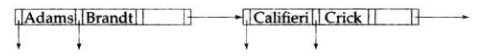

现在新分裂出的节点的开头是`Califieri`，按照$B^{+}$树的插入规则需要将这个搜索码值插入到其父节点中，由于其父节点只有两个值因此可以直接插入，插入位置是`Einstein`前，结果如下图：

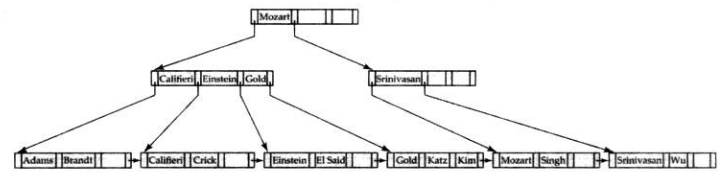

* 第二种情况：叶节点分裂，父节点也分裂

例如现在插入一个搜索码`Lamport`，根据$B^{+}$树的查找规则，这个搜索码应该插入到从左数第四个叶子中。但是这个叶子已经处于“满”的状态，插入`Lamport`必然导致超过容量，则需要节点分裂。按照排序`Lamport`应该插入到节点的末尾，则节点从`Kim`的位置分裂，分裂出的新节点的开头是`Kim`，则需要将`Kim`上移至父节点。可是此时父节点也处于“满”状态，因此新插入`Kim`时也需要分裂节点。分裂父节点时分裂的点位于`Gold`，此时`Gold`前面的指针不能被带走，`Gold`只能带走其后的那个指针，然后与`Kim`组合成一个新的节点，`Kim`后的指针指向新分裂的叶子节点，`Gold`后的指针指向原来的叶子。此时由于`Gold`前面没有指针，且父节点分裂后需要有指针从根节点指向它，因此`Gold`上移，根据大小关系插入到`Mozart`前面，最终的结果如下图所示：

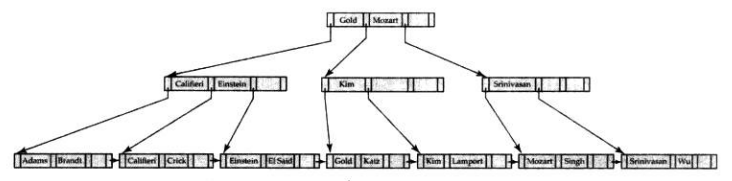

#### $B^{+}$树的删除

* 第一种情况：删除叶子节点的搜索码值后并入其左边的叶子节点

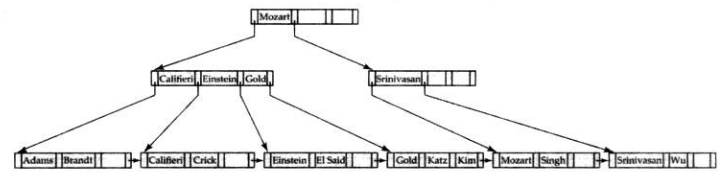

从上图中删除搜索码`Srinivasan`，由于删除之后节点的容量低于最小值，因此这个节点要和旁边的节点融合。现在来看删除的过程：首先从最右边的叶子中删除掉`Srinivasan`搜索码，则最右边的叶子已经不存在了，因此其父节点的`Srinivasan`搜索码连同右边指向该叶子的指针也要一并删掉。将叶子节点的`Srinivasan`并入其左边的叶子节点。此时指向这个叶子节点的只有一个指针而没有相应的搜索码，那么这个搜索码应该从其父节点中“借”，也就是根节点中的`Mozart`。借到`Mozart`后此时的根节点中没有搜索码，此时的`Mozart`有两个选择，一个是并入其左边的节点，另一个是分裂左边的节点。很明显，左边的兄弟节点已满，无法再融入一个新的搜索码，因此从左边的兄弟节点分离出`Gold`和它右边的指针与`Mozart`组合成一个新的节点。由于`Gold`没有带来其左边的指针，因此这个搜索码上升到根节点，成为根节点的搜索码。结果如下图所示：

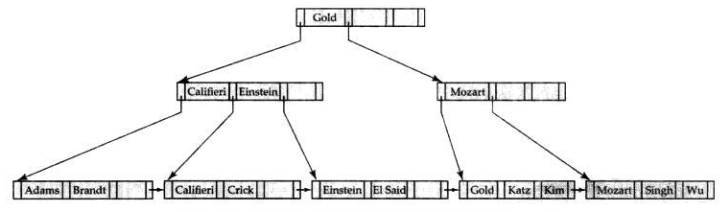

* 第二种情况：删除搜索码值之后无法并入其右边叶子节点

针对上图的$B^{+}$树，现在设法删除其右边叶子中的`Singh`和`Wu`两个搜索码值。删除第一个的时候很容易并不需要调整$B^{+}$树。但是删除第二个的时候最右边的节点就太“空”了，剩下的`Mozart`要么并入左边的兄弟节点，要么分裂左边的兄弟节点组成一个新的节点。显然无法并入，那么就采用分裂的手法：先将`Mozart`并入左边的兄弟节点（此时指向原最右边叶子的指针和搜索码需要一并删除），然后再将节点分裂，新的节点以`Kim`开头，将`Kim`向上移动到父节点的位子：

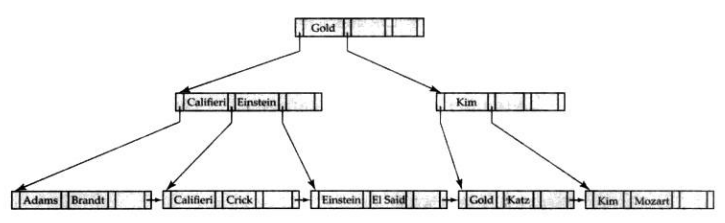

### $B$树

$B$树也是一种查找树，$B+$树是$B$的升级版，与传统的$B$树相比，$B^{+}$树有以下三点不同：

* $B^{+}$树的非叶子节点有k个子树意味着在节点中有k个关键字。

* $B^{+}$树的非叶子节点只起到索引作用，真正存储信息的节点仅仅是叶子节点，而$B$树则是所有节点都存储信息。

* $B^{+}$树的所有叶子通过链表串起来，这样的特性允许顺序访问所有的索引项。

对于一个包含$N$个关键字的$M$阶$B$树来说，其平均搜索长度为：

$$ASL=log_{\lceil m/2 \rceil}(\frac{N+1}{2}) + 1$$

#### $B$树的插入

$B$树的插入和$B^{+}$树有所不同，因为$B$树的所有节点都具有存储信息的功能，因此在节点分裂时，新分裂出的节点的第一个搜索码要上浮到父节点并且从新的节点中删去，但是$B^{+}$树中搜索码并不从新节点中删去。由于$B$树的新节点插入十分简单，就仅仅用图来说明：

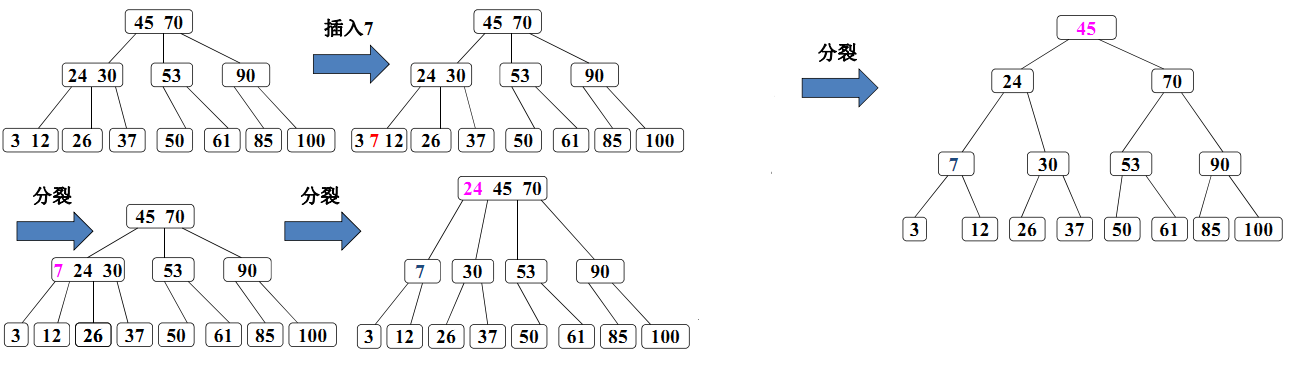

#### $B$树的删除

$B$树的删除也十分有特点，因为$B$树的所有节点都有携带信息的能力，因此删除节点也不都全在叶子节点上（这一点是和$B^{+}$树的重要区别）。在删除节点时首先要找到该节点，若该节点不在叶子节点上则删除该搜索码值之后将其右子树上最小的搜索码值填补到删除的空缺上，由于这个最小的搜索码值必定位于叶子节点上，因此$B$树的删除最终还是归结到叶子节点的删除：

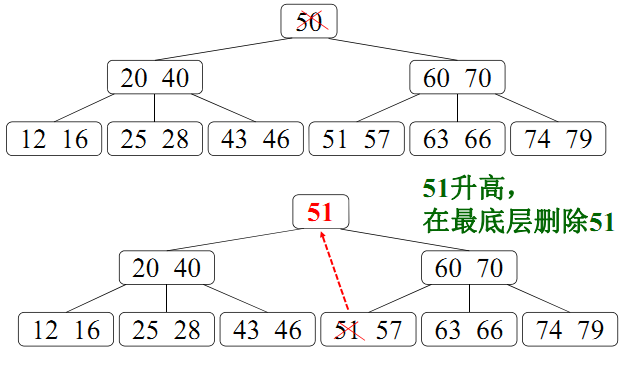

由于$B$树的删除也十分简单，因此就用图示来说明：

* 删除叶子节点，并且从左兄弟“借”搜索码：

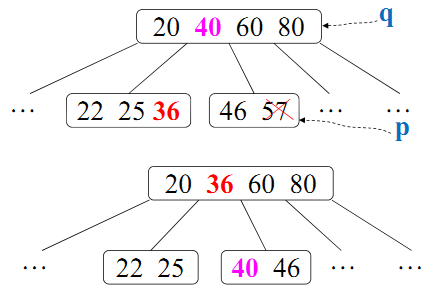

* 删除叶子节点，并且从右兄弟“借”搜索码：

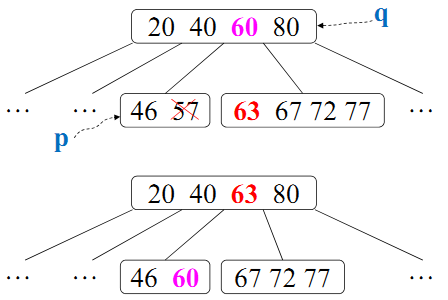

* 删除叶子节点，并且向左合并叶子节点：

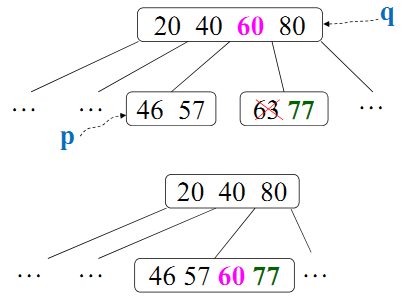

* 删除叶子节点，并且向右合并叶子节点：

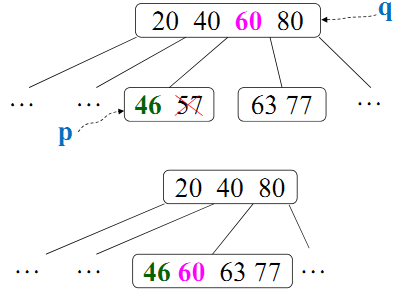

最后看一个比较完整的节点删除的例子：

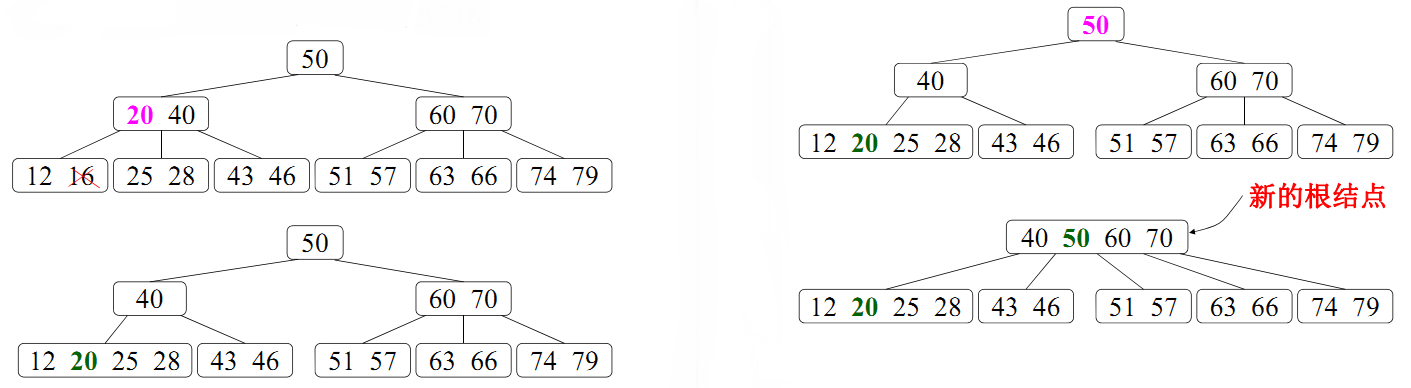

## 散列索引

散列索引又称为哈希索引，它和顺序索引不同，他并不是通过顺序查找索引文件获取到块地址，而是通过散列函数直接计算出磁盘块的地址。从总体上说这类索引分为**静态散列**和**动态散列**。静态散列相较于动态散列不那么灵活，在面对数据库大小较大变化时显得苍白一些。

### 静态散列

这种散列方式非常简单，就是根据搜索码的值计算出散列结果，然后根据散列结果映射出目标的磁盘块地址。这种散列方式需要注意的一个问题就是哈希碰撞的问题，也就是存在于两个不同磁盘块上的记录散列函数却给出了相同的磁盘地址。这种情况通常采用链地址法解决（磁盘块溢出，也就是磁盘块满了无法在存放更多的记录，但是散列函数依然把记录映射到这个磁盘块上，这时候就需要使用新的磁盘块来存储这些记录，但这个新的磁盘块的地址明显与哈希函数计算出的不一样，这种情况下也使用如下的链地址法解决。当然这和哈希碰撞本质上是一个问题）：

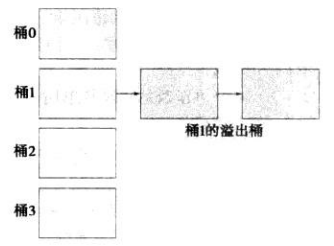

除了这种被动的方式，还可以采取一些措施来预防，例如预先设置一个合适的磁盘块数目，通常磁盘块数目的选择由以下公式决定：

$$n_{B}=\frac{n_{r}}{f_{r}} \times (1+d)$$

* $n_{B}$：磁盘块数目

* $n_{r}$：将要存储的记录总数

* $f_{r}$：一个磁盘块（桶）中能存放的记录总数

* $d$：避让因子，通常为0.2

### 动态散列

动态散列允许散列函数动态改变，以适应数据库增大或者缩小的情况。这种技术的核心思想是利用搜索码计算出一个很大的散列值，例如计算出一个32位的无符号数。当数据库很小的时候我们并不将这32位全部使用，而是只使用第一位，第一位有`0`或`1`两种状态，因此就对应两个桶，搜索码计算出的哈希值的第一位是什么就放入对应的桶中。一旦桶满了就要将前缀加一。例如在使用一位的情况下`1`对应的桶满了，那么就分裂`1`对应的桶，让前缀变为`2`，这样`1`对应的通就有`10`和`11`两种标识，分别对应两个桶。但是需要注意的是：此时`0`对应的桶和前缀并不发生改变：

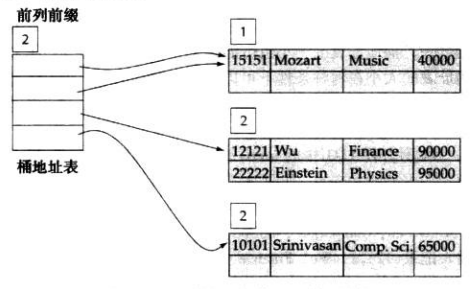

从上图可以看出，桶1的散列前缀只有1，因此有两个哈希值指向它，桶2和桶3的散列前缀为2因此只有一个哈希值指向它。需要特别注意的是：只有仅有一个哈希值指向的桶发生溢出时才需要加大散列前缀。如果是某个桶满但是有超出一个的哈希值指向它，那么只用扩大桶的散列地址就行了：

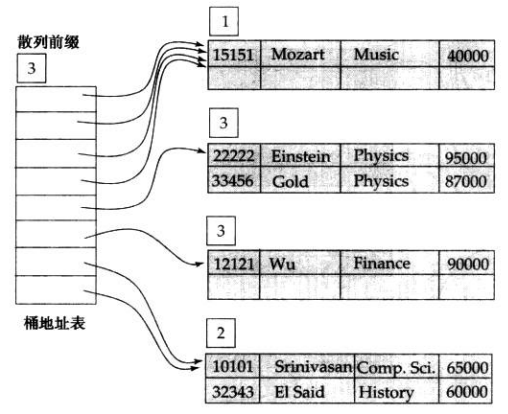

如果要想上图的最后一个桶中增加一个记录，那么不同扩大总的散列前缀，只用将最后一个桶的散列前缀加1就好了：

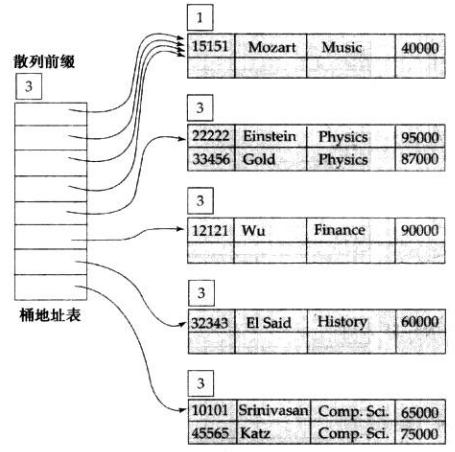

最后，如果是某一个桶中全部是相同的搜索码，而此时又发生了桶溢出，此时不能够通过增加散列前缀的办法，而是要通过链地址法解决溢出，可以看出：上图的最后一个桶就处于桶满且桶中的记录全部是同一个搜索码，此时我们再插入一条`Comp.Sci.`的记录：

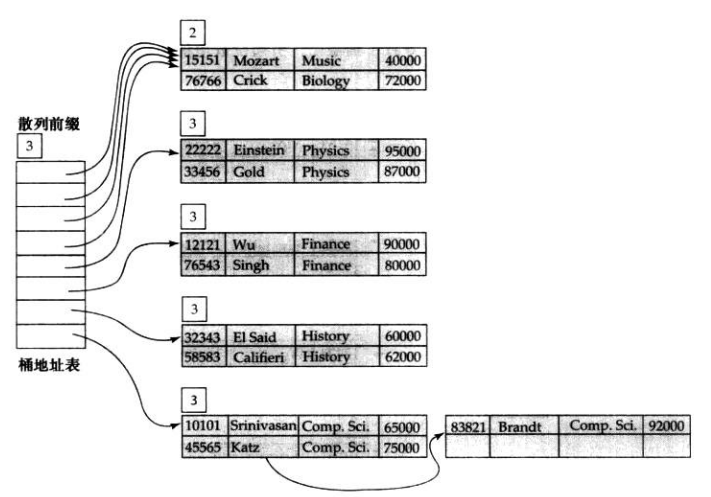

当然，动态散列的一个坏处就是每次当散列前缀发生改变或者桶分裂时就会发生记录的重Hash，这是一个非常大的代价，伴随着记录存放磁盘块的改变。